In [20]:
import json
import torch
import pandas as pd
from tqdm.auto import tqdm
from torch.utils.data import Dataset, DataLoader
from transformers import GPT2Tokenizer, GPT2LMHeadModel, AdamW, get_linear_schedule_with_warmup
from transformers import Trainer, TrainingArguments
from transformers import TrainerCallback
import matplotlib.pyplot as plt

In [21]:
class LossRecorder(TrainerCallback):
    def __init__(self, loss_list):
        self.loss_list = loss_list

    def on_log(self, args, state, control, logs=None, **kwargs):
        if 'loss' in logs:
            self.loss_list.append(logs['loss'])

tokenizer = GPT2Tokenizer.from_pretrained('gpt2-medium')
tokenizer.pad_token = tokenizer.eos_token

class QADataset(Dataset):
    def __init__(self, csv_file, tokenizer, max_length):
        self.tokenizer = tokenizer
        self.max_length = max_length
        self.data = pd.read_csv(csv_file, encoding='utf-8')

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        full_text = row[1]
        question = full_text.split('[INST]')[1].split('[/INST]')[0].strip().lower()
        answer = full_text.split('[/INST]')[1].strip()
        input_text = question + tokenizer.eos_token + answer
        encoding = self.tokenizer.encode_plus(
            input_text,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_attention_mask=True
        )
        input_ids = torch.tensor(encoding['input_ids'])
        attention_mask = torch.tensor(encoding['attention_mask'])
        labels = input_ids.clone()
        labels[labels == self.tokenizer.pad_token_id] = -100
        return {'input_ids': input_ids, 'attention_mask': attention_mask, 'labels': labels}

train_path = 'C:/Users/shengjie zhao/Desktop/UI1/csv/train.csv'
max_length = 512
dataset = QADataset(csv_file=train_path, tokenizer=tokenizer, max_length=max_length)

In [22]:
num_train_epochs = 15
batch_size = 8 
training_args = TrainingArguments(
    output_dir='./results',             
    num_train_epochs=num_train_epochs, 
    per_device_train_batch_size=batch_size, 
    fp16=True,  
    save_strategy="epoch",              
    logging_dir='./logs',       
    logging_steps=10,    
)

model = GPT2LMHeadModel.from_pretrained('gpt2-medium')
model.resize_token_embeddings(len(tokenizer))

loss_values = []
loss_recorder = LossRecorder(loss_values) 

trainer = Trainer(
    model=model, 
    args=training_args,   
    train_dataset=dataset,
    callbacks=[loss_recorder]              
)

#trainer.train(resume_from_checkpoint='C:/Users/shengjie zhao/Desktop/UI1/model/results/checkpoint-50102')

trainer.train()

  0%|          | 10/52035 [00:04<4:42:40,  3.07it/s]

{'loss': 3.4694, 'learning_rate': 4.9992312866339964e-05, 'epoch': 0.0}


  0%|          | 20/52035 [00:07<4:26:38,  3.25it/s]

{'loss': 3.216, 'learning_rate': 4.998270394926492e-05, 'epoch': 0.01}


  0%|          | 30/52035 [00:10<4:27:15,  3.24it/s]

{'loss': 3.1375, 'learning_rate': 4.997309503218988e-05, 'epoch': 0.01}


  0%|          | 40/52035 [00:13<4:26:46,  3.25it/s]

{'loss': 3.1145, 'learning_rate': 4.9963486115114825e-05, 'epoch': 0.01}


  0%|          | 50/52035 [00:16<4:24:05,  3.28it/s]

{'loss': 3.1096, 'learning_rate': 4.9953877198039786e-05, 'epoch': 0.01}


  0%|          | 60/52035 [00:19<4:24:49,  3.27it/s]

{'loss': 3.1156, 'learning_rate': 4.994426828096474e-05, 'epoch': 0.02}


  0%|          | 70/52035 [00:22<4:26:21,  3.25it/s]

{'loss': 3.067, 'learning_rate': 4.9934659363889694e-05, 'epoch': 0.02}


  0%|          | 80/52035 [00:25<4:24:39,  3.27it/s]

{'loss': 2.995, 'learning_rate': 4.992505044681465e-05, 'epoch': 0.02}


  0%|          | 90/52035 [00:29<4:27:04,  3.24it/s]

{'loss': 3.0186, 'learning_rate': 4.99154415297396e-05, 'epoch': 0.03}


  0%|          | 100/52035 [00:32<4:23:51,  3.28it/s]

{'loss': 2.9242, 'learning_rate': 4.9905832612664555e-05, 'epoch': 0.03}


  0%|          | 110/52035 [00:35<4:22:07,  3.30it/s]

{'loss': 2.8917, 'learning_rate': 4.989622369558951e-05, 'epoch': 0.03}


  0%|          | 120/52035 [00:38<4:25:40,  3.26it/s]

{'loss': 2.9716, 'learning_rate': 4.988661477851446e-05, 'epoch': 0.03}


  0%|          | 130/52035 [00:41<4:24:52,  3.27it/s]

{'loss': 2.8868, 'learning_rate': 4.9877005861439416e-05, 'epoch': 0.04}


  0%|          | 140/52035 [00:44<4:35:58,  3.13it/s]

{'loss': 2.9207, 'learning_rate': 4.986739694436438e-05, 'epoch': 0.04}


  0%|          | 150/52035 [00:47<4:34:52,  3.15it/s]

{'loss': 3.0048, 'learning_rate': 4.9857788027289324e-05, 'epoch': 0.04}


  0%|          | 160/52035 [00:50<4:37:09,  3.12it/s]

{'loss': 2.9097, 'learning_rate': 4.9848179110214285e-05, 'epoch': 0.05}


  0%|          | 170/52035 [00:54<4:35:09,  3.14it/s]

{'loss': 2.8897, 'learning_rate': 4.983857019313923e-05, 'epoch': 0.05}


  0%|          | 180/52035 [00:57<4:37:57,  3.11it/s]

{'loss': 2.8092, 'learning_rate': 4.982896127606419e-05, 'epoch': 0.05}


  0%|          | 190/52035 [01:00<4:35:25,  3.14it/s]

{'loss': 2.9167, 'learning_rate': 4.9819352358989146e-05, 'epoch': 0.05}


  0%|          | 200/52035 [01:03<4:32:56,  3.17it/s]

{'loss': 2.8457, 'learning_rate': 4.98097434419141e-05, 'epoch': 0.06}


  0%|          | 210/52035 [01:06<4:37:31,  3.11it/s]

{'loss': 2.9241, 'learning_rate': 4.9800134524839054e-05, 'epoch': 0.06}


  0%|          | 220/52035 [01:09<4:33:50,  3.15it/s]

{'loss': 2.8387, 'learning_rate': 4.979052560776401e-05, 'epoch': 0.06}


  0%|          | 230/52035 [01:13<4:36:33,  3.12it/s]

{'loss': 2.9762, 'learning_rate': 4.978091669068896e-05, 'epoch': 0.07}


  0%|          | 240/52035 [01:16<4:37:04,  3.12it/s]

{'loss': 2.9129, 'learning_rate': 4.9771307773613915e-05, 'epoch': 0.07}


  0%|          | 250/52035 [01:19<4:32:26,  3.17it/s]

{'loss': 2.8033, 'learning_rate': 4.976169885653887e-05, 'epoch': 0.07}


  0%|          | 260/52035 [01:22<4:31:38,  3.18it/s]

{'loss': 2.8161, 'learning_rate': 4.975208993946382e-05, 'epoch': 0.07}


  1%|          | 270/52035 [01:25<4:32:53,  3.16it/s]

{'loss': 2.7847, 'learning_rate': 4.974248102238878e-05, 'epoch': 0.08}


  1%|          | 280/52035 [01:29<4:31:50,  3.17it/s]

{'loss': 2.8571, 'learning_rate': 4.973287210531373e-05, 'epoch': 0.08}


  1%|          | 290/52035 [01:32<4:33:15,  3.16it/s]

{'loss': 2.808, 'learning_rate': 4.972326318823869e-05, 'epoch': 0.08}


  1%|          | 300/52035 [01:35<4:34:56,  3.14it/s]

{'loss': 2.7944, 'learning_rate': 4.971365427116364e-05, 'epoch': 0.09}


  1%|          | 310/52035 [01:38<4:35:21,  3.13it/s]

{'loss': 2.7683, 'learning_rate': 4.97040453540886e-05, 'epoch': 0.09}


  1%|          | 320/52035 [01:41<4:33:33,  3.15it/s]

{'loss': 2.8443, 'learning_rate': 4.969443643701355e-05, 'epoch': 0.09}


  1%|          | 330/52035 [01:44<4:35:42,  3.13it/s]

{'loss': 2.8668, 'learning_rate': 4.9684827519938506e-05, 'epoch': 0.1}


  1%|          | 340/52035 [01:48<4:31:29,  3.17it/s]

{'loss': 2.8346, 'learning_rate': 4.967521860286346e-05, 'epoch': 0.1}


  1%|          | 350/52035 [01:51<4:33:40,  3.15it/s]

{'loss': 2.7011, 'learning_rate': 4.9665609685788414e-05, 'epoch': 0.1}


  1%|          | 360/52035 [01:54<4:35:33,  3.13it/s]

{'loss': 2.8452, 'learning_rate': 4.965600076871337e-05, 'epoch': 0.1}


  1%|          | 370/52035 [01:57<4:32:41,  3.16it/s]

{'loss': 2.6695, 'learning_rate': 4.964639185163832e-05, 'epoch': 0.11}


  1%|          | 380/52035 [02:00<4:33:40,  3.15it/s]

{'loss': 2.8838, 'learning_rate': 4.9636782934563275e-05, 'epoch': 0.11}


  1%|          | 390/52035 [02:03<4:35:01,  3.13it/s]

{'loss': 2.8133, 'learning_rate': 4.962717401748823e-05, 'epoch': 0.11}


  1%|          | 400/52035 [02:07<4:35:03,  3.13it/s]

{'loss': 2.8012, 'learning_rate': 4.961756510041319e-05, 'epoch': 0.12}


  1%|          | 410/52035 [02:10<4:33:19,  3.15it/s]

{'loss': 2.8677, 'learning_rate': 4.9607956183338136e-05, 'epoch': 0.12}


  1%|          | 420/52035 [02:13<4:34:29,  3.13it/s]

{'loss': 2.7992, 'learning_rate': 4.95983472662631e-05, 'epoch': 0.12}


  1%|          | 430/52035 [02:16<4:31:07,  3.17it/s]

{'loss': 2.7665, 'learning_rate': 4.9588738349188044e-05, 'epoch': 0.12}


  1%|          | 440/52035 [02:19<4:32:49,  3.15it/s]

{'loss': 2.7181, 'learning_rate': 4.9579129432113005e-05, 'epoch': 0.13}


  1%|          | 450/52035 [02:23<4:34:19,  3.13it/s]

{'loss': 2.7106, 'learning_rate': 4.956952051503796e-05, 'epoch': 0.13}


  1%|          | 460/52035 [02:26<4:35:37,  3.12it/s]

{'loss': 2.6702, 'learning_rate': 4.955991159796291e-05, 'epoch': 0.13}


  1%|          | 470/52035 [02:29<4:32:54,  3.15it/s]

{'loss': 2.8153, 'learning_rate': 4.9550302680887866e-05, 'epoch': 0.14}


  1%|          | 480/52035 [02:32<4:39:05,  3.08it/s]

{'loss': 2.8709, 'learning_rate': 4.9540693763812827e-05, 'epoch': 0.14}


  1%|          | 490/52035 [02:35<4:31:29,  3.16it/s]

{'loss': 2.571, 'learning_rate': 4.9531084846737774e-05, 'epoch': 0.14}


  1%|          | 500/52035 [02:39<4:29:26,  3.19it/s]

{'loss': 2.8652, 'learning_rate': 4.952147592966273e-05, 'epoch': 0.14}


  1%|          | 510/52035 [02:42<4:36:41,  3.10it/s]

{'loss': 2.755, 'learning_rate': 4.951186701258768e-05, 'epoch': 0.15}


  1%|          | 520/52035 [02:45<4:35:20,  3.12it/s]

{'loss': 3.0182, 'learning_rate': 4.9502258095512635e-05, 'epoch': 0.15}


  1%|          | 530/52035 [02:48<4:33:12,  3.14it/s]

{'loss': 2.7107, 'learning_rate': 4.9492649178437596e-05, 'epoch': 0.15}


  1%|          | 540/52035 [02:51<4:37:44,  3.09it/s]

{'loss': 2.7694, 'learning_rate': 4.948304026136254e-05, 'epoch': 0.16}


  1%|          | 550/52035 [02:55<4:32:40,  3.15it/s]

{'loss': 2.7358, 'learning_rate': 4.94734313442875e-05, 'epoch': 0.16}


  1%|          | 560/52035 [02:58<4:39:16,  3.07it/s]

{'loss': 2.7877, 'learning_rate': 4.946382242721245e-05, 'epoch': 0.16}


  1%|          | 570/52035 [03:01<4:31:56,  3.15it/s]

{'loss': 2.7218, 'learning_rate': 4.945421351013741e-05, 'epoch': 0.16}


  1%|          | 580/52035 [03:04<4:33:09,  3.14it/s]

{'loss': 2.8285, 'learning_rate': 4.9444604593062365e-05, 'epoch': 0.17}


  1%|          | 590/52035 [03:07<4:30:45,  3.17it/s]

{'loss': 2.7785, 'learning_rate': 4.943499567598732e-05, 'epoch': 0.17}


  1%|          | 600/52035 [03:11<4:34:40,  3.12it/s]

{'loss': 2.7087, 'learning_rate': 4.942538675891227e-05, 'epoch': 0.17}


  1%|          | 610/52035 [03:14<4:30:01,  3.17it/s]

{'loss': 2.7563, 'learning_rate': 4.941577784183723e-05, 'epoch': 0.18}


  1%|          | 620/52035 [03:17<4:33:01,  3.14it/s]

{'loss': 2.7886, 'learning_rate': 4.940616892476218e-05, 'epoch': 0.18}


  1%|          | 630/52035 [03:20<4:33:17,  3.14it/s]

{'loss': 2.851, 'learning_rate': 4.939656000768714e-05, 'epoch': 0.18}


  1%|          | 640/52035 [03:23<4:30:03,  3.17it/s]

{'loss': 2.9037, 'learning_rate': 4.938695109061209e-05, 'epoch': 0.18}


  1%|          | 650/52035 [03:26<4:31:31,  3.15it/s]

{'loss': 2.7526, 'learning_rate': 4.937734217353704e-05, 'epoch': 0.19}


  1%|▏         | 660/52035 [03:30<4:28:22,  3.19it/s]

{'loss': 2.7782, 'learning_rate': 4.9368694148169506e-05, 'epoch': 0.19}


  1%|▏         | 670/52035 [03:33<4:29:39,  3.17it/s]

{'loss': 2.7476, 'learning_rate': 4.935908523109446e-05, 'epoch': 0.19}


  1%|▏         | 680/52035 [03:36<4:33:08,  3.13it/s]

{'loss': 2.8003, 'learning_rate': 4.934947631401941e-05, 'epoch': 0.2}


  1%|▏         | 690/52035 [03:39<4:34:29,  3.12it/s]

{'loss': 2.5555, 'learning_rate': 4.933986739694437e-05, 'epoch': 0.2}


  1%|▏         | 700/52035 [03:42<4:36:18,  3.10it/s]

{'loss': 2.8534, 'learning_rate': 4.933025847986932e-05, 'epoch': 0.2}


  1%|▏         | 710/52035 [03:46<4:37:01,  3.09it/s]

{'loss': 2.6796, 'learning_rate': 4.9320649562794275e-05, 'epoch': 0.2}


  1%|▏         | 720/52035 [03:49<4:34:33,  3.11it/s]

{'loss': 2.7431, 'learning_rate': 4.931104064571923e-05, 'epoch': 0.21}


  1%|▏         | 730/52035 [03:52<4:42:23,  3.03it/s]

{'loss': 2.5955, 'learning_rate': 4.930143172864418e-05, 'epoch': 0.21}


  1%|▏         | 740/52035 [03:55<4:36:14,  3.09it/s]

{'loss': 2.8376, 'learning_rate': 4.9291822811569136e-05, 'epoch': 0.21}


  1%|▏         | 750/52035 [03:59<4:34:13,  3.12it/s]

{'loss': 2.885, 'learning_rate': 4.92822138944941e-05, 'epoch': 0.22}


  1%|▏         | 760/52035 [04:02<4:36:14,  3.09it/s]

{'loss': 2.6064, 'learning_rate': 4.9272604977419044e-05, 'epoch': 0.22}


  1%|▏         | 770/52035 [04:05<4:33:08,  3.13it/s]

{'loss': 2.633, 'learning_rate': 4.9262996060344004e-05, 'epoch': 0.22}


  1%|▏         | 780/52035 [04:08<4:29:33,  3.17it/s]

{'loss': 2.6958, 'learning_rate': 4.925338714326896e-05, 'epoch': 0.22}


  2%|▏         | 790/52035 [04:11<4:32:26,  3.13it/s]

{'loss': 2.6074, 'learning_rate': 4.924377822619391e-05, 'epoch': 0.23}


  2%|▏         | 800/52035 [04:15<4:29:12,  3.17it/s]

{'loss': 2.6669, 'learning_rate': 4.9234169309118866e-05, 'epoch': 0.23}


  2%|▏         | 810/52035 [04:18<4:43:42,  3.01it/s]

{'loss': 2.7601, 'learning_rate': 4.922456039204382e-05, 'epoch': 0.23}


  2%|▏         | 820/52035 [04:21<4:32:17,  3.13it/s]

{'loss': 2.7271, 'learning_rate': 4.921495147496877e-05, 'epoch': 0.24}


  2%|▏         | 830/52035 [04:24<4:29:57,  3.16it/s]

{'loss': 2.643, 'learning_rate': 4.920534255789373e-05, 'epoch': 0.24}


  2%|▏         | 840/52035 [04:27<4:31:36,  3.14it/s]

{'loss': 2.6553, 'learning_rate': 4.919573364081868e-05, 'epoch': 0.24}


  2%|▏         | 850/52035 [04:31<4:35:08,  3.10it/s]

{'loss': 2.5802, 'learning_rate': 4.9186124723743635e-05, 'epoch': 0.25}


  2%|▏         | 860/52035 [04:34<4:30:08,  3.16it/s]

{'loss': 2.5644, 'learning_rate': 4.917651580666859e-05, 'epoch': 0.25}


  2%|▏         | 870/52035 [04:37<4:32:02,  3.13it/s]

{'loss': 2.7324, 'learning_rate': 4.916690688959354e-05, 'epoch': 0.25}


  2%|▏         | 880/52035 [04:40<4:31:37,  3.14it/s]

{'loss': 2.5785, 'learning_rate': 4.91572979725185e-05, 'epoch': 0.25}


  2%|▏         | 890/52035 [04:43<4:34:28,  3.11it/s]

{'loss': 2.6934, 'learning_rate': 4.914768905544345e-05, 'epoch': 0.26}


  2%|▏         | 900/52035 [04:47<4:32:05,  3.13it/s]

{'loss': 2.7283, 'learning_rate': 4.913808013836841e-05, 'epoch': 0.26}


  2%|▏         | 910/52035 [04:50<4:49:51,  2.94it/s]

{'loss': 2.6499, 'learning_rate': 4.9128471221293364e-05, 'epoch': 0.26}


  2%|▏         | 920/52035 [04:53<4:42:48,  3.01it/s]

{'loss': 2.7028, 'learning_rate': 4.911886230421832e-05, 'epoch': 0.27}


  2%|▏         | 930/52035 [04:57<4:37:21,  3.07it/s]

{'loss': 2.8105, 'learning_rate': 4.910925338714327e-05, 'epoch': 0.27}


  2%|▏         | 940/52035 [05:00<4:31:43,  3.13it/s]

{'loss': 2.6249, 'learning_rate': 4.9099644470068226e-05, 'epoch': 0.27}


  2%|▏         | 950/52035 [05:03<4:36:21,  3.08it/s]

{'loss': 2.6147, 'learning_rate': 4.909003555299318e-05, 'epoch': 0.27}


  2%|▏         | 960/52035 [05:06<4:31:55,  3.13it/s]

{'loss': 2.7588, 'learning_rate': 4.908042663591813e-05, 'epoch': 0.28}


  2%|▏         | 970/52035 [05:09<4:34:51,  3.10it/s]

{'loss': 2.6378, 'learning_rate': 4.907081771884309e-05, 'epoch': 0.28}


  2%|▏         | 980/52035 [05:13<4:33:27,  3.11it/s]

{'loss': 2.5872, 'learning_rate': 4.906120880176804e-05, 'epoch': 0.28}


  2%|▏         | 990/52035 [05:16<4:35:28,  3.09it/s]

{'loss': 2.782, 'learning_rate': 4.9051599884692995e-05, 'epoch': 0.29}


  2%|▏         | 1000/52035 [05:19<4:31:41,  3.13it/s]

{'loss': 2.6433, 'learning_rate': 4.904199096761795e-05, 'epoch': 0.29}


  2%|▏         | 1010/52035 [05:22<4:29:21,  3.16it/s]

{'loss': 2.6266, 'learning_rate': 4.903238205054291e-05, 'epoch': 0.29}


  2%|▏         | 1020/52035 [05:26<4:42:42,  3.01it/s]

{'loss': 2.6761, 'learning_rate': 4.9022773133467856e-05, 'epoch': 0.29}


  2%|▏         | 1030/52035 [05:29<4:36:19,  3.08it/s]

{'loss': 2.4972, 'learning_rate': 4.901316421639282e-05, 'epoch': 0.3}


  2%|▏         | 1040/52035 [05:32<4:30:20,  3.14it/s]

{'loss': 2.4903, 'learning_rate': 4.900355529931777e-05, 'epoch': 0.3}


  2%|▏         | 1050/52035 [05:35<4:30:08,  3.15it/s]

{'loss': 2.5892, 'learning_rate': 4.8993946382242724e-05, 'epoch': 0.3}


  2%|▏         | 1060/52035 [05:38<4:36:52,  3.07it/s]

{'loss': 2.5696, 'learning_rate': 4.898433746516768e-05, 'epoch': 0.31}


  2%|▏         | 1070/52035 [05:42<4:29:27,  3.15it/s]

{'loss': 2.6156, 'learning_rate': 4.897472854809263e-05, 'epoch': 0.31}


  2%|▏         | 1080/52035 [05:45<4:32:46,  3.11it/s]

{'loss': 2.6314, 'learning_rate': 4.8965119631017586e-05, 'epoch': 0.31}


  2%|▏         | 1090/52035 [05:48<4:31:40,  3.13it/s]

{'loss': 2.6784, 'learning_rate': 4.895551071394254e-05, 'epoch': 0.31}


  2%|▏         | 1100/52035 [05:51<4:32:00,  3.12it/s]

{'loss': 2.6413, 'learning_rate': 4.894590179686749e-05, 'epoch': 0.32}


  2%|▏         | 1110/52035 [05:54<4:31:22,  3.13it/s]

{'loss': 2.5768, 'learning_rate': 4.893629287979245e-05, 'epoch': 0.32}


  2%|▏         | 1120/52035 [05:58<4:30:39,  3.14it/s]

{'loss': 2.4994, 'learning_rate': 4.892668396271741e-05, 'epoch': 0.32}


  2%|▏         | 1130/52035 [06:01<4:31:34,  3.12it/s]

{'loss': 2.6098, 'learning_rate': 4.8917075045642355e-05, 'epoch': 0.33}


  2%|▏         | 1140/52035 [06:04<4:27:13,  3.17it/s]

{'loss': 2.53, 'learning_rate': 4.8907466128567315e-05, 'epoch': 0.33}


  2%|▏         | 1150/52035 [06:07<4:25:50,  3.19it/s]

{'loss': 2.5095, 'learning_rate': 4.889785721149226e-05, 'epoch': 0.33}


  2%|▏         | 1160/52035 [06:10<4:32:51,  3.11it/s]

{'loss': 2.6298, 'learning_rate': 4.888824829441722e-05, 'epoch': 0.33}


  2%|▏         | 1170/52035 [06:14<4:28:33,  3.16it/s]

{'loss': 2.5211, 'learning_rate': 4.887863937734218e-05, 'epoch': 0.34}


  2%|▏         | 1180/52035 [06:17<4:26:25,  3.18it/s]

{'loss': 2.558, 'learning_rate': 4.886903046026713e-05, 'epoch': 0.34}


  2%|▏         | 1190/52035 [06:20<4:28:22,  3.16it/s]

{'loss': 2.469, 'learning_rate': 4.8859421543192084e-05, 'epoch': 0.34}


  2%|▏         | 1200/52035 [06:23<4:27:59,  3.16it/s]

{'loss': 2.5254, 'learning_rate': 4.884981262611704e-05, 'epoch': 0.35}


  2%|▏         | 1210/52035 [06:26<4:28:26,  3.16it/s]

{'loss': 2.5256, 'learning_rate': 4.884020370904199e-05, 'epoch': 0.35}


  2%|▏         | 1220/52035 [06:29<4:27:27,  3.17it/s]

{'loss': 2.4076, 'learning_rate': 4.883059479196695e-05, 'epoch': 0.35}


  2%|▏         | 1230/52035 [06:33<4:33:32,  3.10it/s]

{'loss': 2.7265, 'learning_rate': 4.88209858748919e-05, 'epoch': 0.35}


  2%|▏         | 1240/52035 [06:36<4:29:27,  3.14it/s]

{'loss': 2.5786, 'learning_rate': 4.881137695781686e-05, 'epoch': 0.36}


  2%|▏         | 1250/52035 [06:39<4:31:13,  3.12it/s]

{'loss': 2.6186, 'learning_rate': 4.8801768040741814e-05, 'epoch': 0.36}


  2%|▏         | 1260/52035 [06:42<4:28:46,  3.15it/s]

{'loss': 2.5537, 'learning_rate': 4.879215912366676e-05, 'epoch': 0.36}


  2%|▏         | 1270/52035 [06:45<4:31:33,  3.12it/s]

{'loss': 2.4781, 'learning_rate': 4.878255020659172e-05, 'epoch': 0.37}


  2%|▏         | 1280/52035 [06:49<4:42:44,  2.99it/s]

{'loss': 2.5292, 'learning_rate': 4.877294128951667e-05, 'epoch': 0.37}


  2%|▏         | 1290/52035 [06:52<4:37:42,  3.05it/s]

{'loss': 2.577, 'learning_rate': 4.876333237244163e-05, 'epoch': 0.37}


  2%|▏         | 1300/52035 [06:55<4:32:06,  3.11it/s]

{'loss': 2.6209, 'learning_rate': 4.875372345536658e-05, 'epoch': 0.37}


  3%|▎         | 1310/52035 [06:58<4:33:55,  3.09it/s]

{'loss': 2.5184, 'learning_rate': 4.874411453829154e-05, 'epoch': 0.38}


  3%|▎         | 1320/52035 [07:02<4:29:41,  3.13it/s]

{'loss': 2.4397, 'learning_rate': 4.873450562121649e-05, 'epoch': 0.38}


  3%|▎         | 1330/52035 [07:05<4:28:54,  3.14it/s]

{'loss': 2.4905, 'learning_rate': 4.872489670414145e-05, 'epoch': 0.38}


  3%|▎         | 1340/52035 [07:08<4:37:32,  3.04it/s]

{'loss': 2.766, 'learning_rate': 4.87152877870664e-05, 'epoch': 0.39}


  3%|▎         | 1350/52035 [07:11<4:28:19,  3.15it/s]

{'loss': 2.5632, 'learning_rate': 4.870567886999136e-05, 'epoch': 0.39}


  3%|▎         | 1360/52035 [07:14<4:27:57,  3.15it/s]

{'loss': 2.5488, 'learning_rate': 4.8696069952916306e-05, 'epoch': 0.39}


  3%|▎         | 1370/52035 [07:18<4:26:21,  3.17it/s]

{'loss': 2.5128, 'learning_rate': 4.8686461035841266e-05, 'epoch': 0.39}


  3%|▎         | 1380/52035 [07:21<4:27:45,  3.15it/s]

{'loss': 2.5958, 'learning_rate': 4.867685211876622e-05, 'epoch': 0.4}


  3%|▎         | 1390/52035 [07:24<4:29:10,  3.14it/s]

{'loss': 2.575, 'learning_rate': 4.8667243201691174e-05, 'epoch': 0.4}


  3%|▎         | 1400/52035 [07:27<4:25:28,  3.18it/s]

{'loss': 2.5659, 'learning_rate': 4.865763428461613e-05, 'epoch': 0.4}


  3%|▎         | 1410/52035 [07:30<4:27:44,  3.15it/s]

{'loss': 2.4154, 'learning_rate': 4.8648025367541075e-05, 'epoch': 0.41}


  3%|▎         | 1420/52035 [07:33<4:31:36,  3.11it/s]

{'loss': 2.4436, 'learning_rate': 4.8638416450466035e-05, 'epoch': 0.41}


  3%|▎         | 1430/52035 [07:37<4:27:47,  3.15it/s]

{'loss': 2.6334, 'learning_rate': 4.862880753339099e-05, 'epoch': 0.41}


  3%|▎         | 1440/52035 [07:40<4:25:26,  3.18it/s]

{'loss': 2.4851, 'learning_rate': 4.861919861631594e-05, 'epoch': 0.42}


  3%|▎         | 1450/52035 [07:43<4:26:36,  3.16it/s]

{'loss': 2.4539, 'learning_rate': 4.8609589699240897e-05, 'epoch': 0.42}


  3%|▎         | 1460/52035 [07:46<4:28:06,  3.14it/s]

{'loss': 2.5569, 'learning_rate': 4.859998078216586e-05, 'epoch': 0.42}


  3%|▎         | 1470/52035 [07:49<4:32:19,  3.09it/s]

{'loss': 2.6113, 'learning_rate': 4.8590371865090804e-05, 'epoch': 0.42}


  3%|▎         | 1480/52035 [07:53<4:28:18,  3.14it/s]

{'loss': 2.5557, 'learning_rate': 4.8580762948015765e-05, 'epoch': 0.43}


  3%|▎         | 1490/52035 [07:56<4:28:14,  3.14it/s]

{'loss': 2.5838, 'learning_rate': 4.857115403094071e-05, 'epoch': 0.43}


  3%|▎         | 1500/52035 [07:59<4:26:41,  3.16it/s]

{'loss': 2.6268, 'learning_rate': 4.856154511386567e-05, 'epoch': 0.43}


  3%|▎         | 1510/52035 [08:02<4:29:06,  3.13it/s]

{'loss': 2.5557, 'learning_rate': 4.8551936196790626e-05, 'epoch': 0.44}


  3%|▎         | 1520/52035 [08:05<4:27:57,  3.14it/s]

{'loss': 2.6564, 'learning_rate': 4.854232727971558e-05, 'epoch': 0.44}


  3%|▎         | 1530/52035 [08:08<4:26:49,  3.15it/s]

{'loss': 2.6778, 'learning_rate': 4.8532718362640534e-05, 'epoch': 0.44}


  3%|▎         | 1540/52035 [08:12<4:24:53,  3.18it/s]

{'loss': 2.4776, 'learning_rate': 4.852310944556549e-05, 'epoch': 0.44}


  3%|▎         | 1550/52035 [08:15<4:26:06,  3.16it/s]

{'loss': 2.5576, 'learning_rate': 4.851350052849044e-05, 'epoch': 0.45}


  3%|▎         | 1560/52035 [08:18<4:25:11,  3.17it/s]

{'loss': 2.5655, 'learning_rate': 4.8503891611415395e-05, 'epoch': 0.45}


  3%|▎         | 1570/52035 [08:21<4:26:14,  3.16it/s]

{'loss': 2.449, 'learning_rate': 4.849428269434035e-05, 'epoch': 0.45}


  3%|▎         | 1580/52035 [08:24<4:25:13,  3.17it/s]

{'loss': 2.6561, 'learning_rate': 4.84846737772653e-05, 'epoch': 0.46}


  3%|▎         | 1590/52035 [08:27<4:26:10,  3.16it/s]

{'loss': 2.6327, 'learning_rate': 4.847506486019026e-05, 'epoch': 0.46}


  3%|▎         | 1600/52035 [08:31<4:25:43,  3.16it/s]

{'loss': 2.4652, 'learning_rate': 4.846545594311521e-05, 'epoch': 0.46}


  3%|▎         | 1610/52035 [08:34<4:27:51,  3.14it/s]

{'loss': 2.6661, 'learning_rate': 4.845584702604017e-05, 'epoch': 0.46}


  3%|▎         | 1620/52035 [08:37<4:26:32,  3.15it/s]

{'loss': 2.6916, 'learning_rate': 4.844623810896512e-05, 'epoch': 0.47}


  3%|▎         | 1630/52035 [08:40<4:27:07,  3.14it/s]

{'loss': 2.5217, 'learning_rate': 4.843662919189008e-05, 'epoch': 0.47}


  3%|▎         | 1640/52035 [08:43<4:28:14,  3.13it/s]

{'loss': 2.5457, 'learning_rate': 4.842702027481503e-05, 'epoch': 0.47}


  3%|▎         | 1650/52035 [08:47<4:26:12,  3.15it/s]

{'loss': 2.3695, 'learning_rate': 4.8417411357739986e-05, 'epoch': 0.48}


  3%|▎         | 1660/52035 [08:50<4:24:33,  3.17it/s]

{'loss': 2.4564, 'learning_rate': 4.840780244066494e-05, 'epoch': 0.48}


  3%|▎         | 1670/52035 [08:53<4:24:27,  3.17it/s]

{'loss': 2.6467, 'learning_rate': 4.8398193523589894e-05, 'epoch': 0.48}


  3%|▎         | 1680/52035 [08:56<4:25:05,  3.17it/s]

{'loss': 2.3973, 'learning_rate': 4.838858460651485e-05, 'epoch': 0.48}


  3%|▎         | 1690/52035 [08:59<4:26:41,  3.15it/s]

{'loss': 2.5516, 'learning_rate': 4.83789756894398e-05, 'epoch': 0.49}


  3%|▎         | 1700/52035 [09:03<4:23:18,  3.19it/s]

{'loss': 2.4724, 'learning_rate': 4.8369366772364755e-05, 'epoch': 0.49}


  3%|▎         | 1710/52035 [09:06<4:26:40,  3.15it/s]

{'loss': 2.7546, 'learning_rate': 4.835975785528971e-05, 'epoch': 0.49}


  3%|▎         | 1720/52035 [09:09<4:24:27,  3.17it/s]

{'loss': 2.6944, 'learning_rate': 4.835014893821467e-05, 'epoch': 0.5}


  3%|▎         | 1730/52035 [09:12<4:25:02,  3.16it/s]

{'loss': 2.57, 'learning_rate': 4.8340540021139617e-05, 'epoch': 0.5}


  3%|▎         | 1740/52035 [09:15<4:27:24,  3.13it/s]

{'loss': 2.5462, 'learning_rate': 4.833093110406458e-05, 'epoch': 0.5}


  3%|▎         | 1750/52035 [09:18<4:25:18,  3.16it/s]

{'loss': 2.6521, 'learning_rate': 4.8321322186989524e-05, 'epoch': 0.5}


  3%|▎         | 1760/52035 [09:22<4:27:16,  3.14it/s]

{'loss': 2.6226, 'learning_rate': 4.8311713269914485e-05, 'epoch': 0.51}


  3%|▎         | 1770/52035 [09:25<4:25:21,  3.16it/s]

{'loss': 2.5561, 'learning_rate': 4.830210435283944e-05, 'epoch': 0.51}


  3%|▎         | 1780/52035 [09:28<4:23:38,  3.18it/s]

{'loss': 2.4792, 'learning_rate': 4.829249543576439e-05, 'epoch': 0.51}


  3%|▎         | 1790/52035 [09:31<4:24:21,  3.17it/s]

{'loss': 2.5665, 'learning_rate': 4.8282886518689346e-05, 'epoch': 0.52}


  3%|▎         | 1800/52035 [09:34<4:30:52,  3.09it/s]

{'loss': 2.6234, 'learning_rate': 4.82732776016143e-05, 'epoch': 0.52}


  3%|▎         | 1810/52035 [09:38<4:24:02,  3.17it/s]

{'loss': 2.5457, 'learning_rate': 4.8263668684539254e-05, 'epoch': 0.52}


  3%|▎         | 1820/52035 [09:41<4:24:48,  3.16it/s]

{'loss': 2.6791, 'learning_rate': 4.825405976746421e-05, 'epoch': 0.52}


  4%|▎         | 1830/52035 [09:44<4:23:15,  3.18it/s]

{'loss': 2.439, 'learning_rate': 4.824445085038916e-05, 'epoch': 0.53}


  4%|▎         | 1840/52035 [09:47<4:26:32,  3.14it/s]

{'loss': 2.5809, 'learning_rate': 4.8234841933314115e-05, 'epoch': 0.53}


  4%|▎         | 1850/52035 [09:50<4:24:47,  3.16it/s]

{'loss': 2.4009, 'learning_rate': 4.8225233016239076e-05, 'epoch': 0.53}


  4%|▎         | 1860/52035 [09:53<4:23:48,  3.17it/s]

{'loss': 2.3704, 'learning_rate': 4.821562409916402e-05, 'epoch': 0.54}


  4%|▎         | 1870/52035 [09:57<4:25:36,  3.15it/s]

{'loss': 2.3921, 'learning_rate': 4.820601518208898e-05, 'epoch': 0.54}


  4%|▎         | 1880/52035 [10:00<4:24:26,  3.16it/s]

{'loss': 2.4653, 'learning_rate': 4.819640626501393e-05, 'epoch': 0.54}


  4%|▎         | 1890/52035 [10:03<4:24:50,  3.16it/s]

{'loss': 2.4867, 'learning_rate': 4.818679734793889e-05, 'epoch': 0.54}


  4%|▎         | 1900/52035 [10:06<4:23:30,  3.17it/s]

{'loss': 2.5584, 'learning_rate': 4.8177188430863845e-05, 'epoch': 0.55}


  4%|▎         | 1910/52035 [10:09<4:24:14,  3.16it/s]

{'loss': 2.469, 'learning_rate': 4.81675795137888e-05, 'epoch': 0.55}


  4%|▎         | 1920/52035 [10:12<4:24:40,  3.16it/s]

{'loss': 2.486, 'learning_rate': 4.815797059671375e-05, 'epoch': 0.55}


  4%|▎         | 1930/52035 [10:16<4:25:34,  3.14it/s]

{'loss': 2.5228, 'learning_rate': 4.8148361679638706e-05, 'epoch': 0.56}


  4%|▎         | 1940/52035 [10:19<4:24:02,  3.16it/s]

{'loss': 2.533, 'learning_rate': 4.813875276256366e-05, 'epoch': 0.56}


  4%|▎         | 1950/52035 [10:22<5:09:08,  2.70it/s]

{'loss': 2.5215, 'learning_rate': 4.8129143845488614e-05, 'epoch': 0.56}


  4%|▍         | 1960/52035 [10:25<4:26:01,  3.14it/s]

{'loss': 2.4609, 'learning_rate': 4.811953492841357e-05, 'epoch': 0.57}


  4%|▍         | 1970/52035 [10:28<4:25:09,  3.15it/s]

{'loss': 2.5076, 'learning_rate': 4.810992601133852e-05, 'epoch': 0.57}


  4%|▍         | 1980/52035 [10:32<4:27:18,  3.12it/s]

{'loss': 2.5599, 'learning_rate': 4.810031709426348e-05, 'epoch': 0.57}


  4%|▍         | 1990/52035 [10:35<4:24:37,  3.15it/s]

{'loss': 2.6099, 'learning_rate': 4.809070817718843e-05, 'epoch': 0.57}


  4%|▍         | 2000/52035 [10:38<4:24:59,  3.15it/s]

{'loss': 2.5705, 'learning_rate': 4.808109926011339e-05, 'epoch': 0.58}


  4%|▍         | 2010/52035 [10:41<4:23:35,  3.16it/s]

{'loss': 2.212, 'learning_rate': 4.807149034303834e-05, 'epoch': 0.58}


  4%|▍         | 2020/52035 [10:44<4:29:32,  3.09it/s]

{'loss': 2.5925, 'learning_rate': 4.80618814259633e-05, 'epoch': 0.58}


  4%|▍         | 2030/52035 [10:48<4:24:38,  3.15it/s]

{'loss': 2.5869, 'learning_rate': 4.805227250888825e-05, 'epoch': 0.59}


  4%|▍         | 2040/52035 [10:51<4:23:44,  3.16it/s]

{'loss': 2.531, 'learning_rate': 4.8042663591813205e-05, 'epoch': 0.59}


  4%|▍         | 2050/52035 [10:54<4:22:42,  3.17it/s]

{'loss': 2.3737, 'learning_rate': 4.803305467473816e-05, 'epoch': 0.59}


  4%|▍         | 2060/52035 [10:57<4:24:23,  3.15it/s]

{'loss': 2.5465, 'learning_rate': 4.802344575766312e-05, 'epoch': 0.59}


  4%|▍         | 2070/52035 [11:00<4:24:29,  3.15it/s]

{'loss': 2.6977, 'learning_rate': 4.8013836840588066e-05, 'epoch': 0.6}


  4%|▍         | 2080/52035 [11:03<4:27:51,  3.11it/s]

{'loss': 2.3467, 'learning_rate': 4.800422792351302e-05, 'epoch': 0.6}


  4%|▍         | 2090/52035 [11:07<4:25:53,  3.13it/s]

{'loss': 2.3996, 'learning_rate': 4.7994619006437974e-05, 'epoch': 0.6}


  4%|▍         | 2100/52035 [11:10<4:22:03,  3.18it/s]

{'loss': 2.5729, 'learning_rate': 4.798501008936293e-05, 'epoch': 0.61}


  4%|▍         | 2110/52035 [11:13<4:22:08,  3.17it/s]

{'loss': 2.4707, 'learning_rate': 4.797540117228789e-05, 'epoch': 0.61}


  4%|▍         | 2120/52035 [11:16<4:25:16,  3.14it/s]

{'loss': 2.4933, 'learning_rate': 4.7965792255212835e-05, 'epoch': 0.61}


  4%|▍         | 2130/52035 [11:19<4:21:58,  3.17it/s]

{'loss': 2.6445, 'learning_rate': 4.7956183338137796e-05, 'epoch': 0.61}


  4%|▍         | 2140/52035 [11:22<4:23:13,  3.16it/s]

{'loss': 2.2865, 'learning_rate': 4.794657442106275e-05, 'epoch': 0.62}


  4%|▍         | 2150/52035 [11:26<4:23:23,  3.16it/s]

{'loss': 2.4954, 'learning_rate': 4.79369655039877e-05, 'epoch': 0.62}


  4%|▍         | 2160/52035 [11:29<4:23:45,  3.15it/s]

{'loss': 2.4097, 'learning_rate': 4.792735658691266e-05, 'epoch': 0.62}


  4%|▍         | 2170/52035 [11:32<4:21:02,  3.18it/s]

{'loss': 2.4809, 'learning_rate': 4.791774766983761e-05, 'epoch': 0.63}


  4%|▍         | 2180/52035 [11:35<4:18:10,  3.22it/s]

{'loss': 2.3242, 'learning_rate': 4.7908138752762565e-05, 'epoch': 0.63}


  4%|▍         | 2190/52035 [11:38<4:13:48,  3.27it/s]

{'loss': 2.4028, 'learning_rate': 4.7898529835687525e-05, 'epoch': 0.63}


  4%|▍         | 2200/52035 [11:41<4:15:05,  3.26it/s]

{'loss': 2.3586, 'learning_rate': 4.788892091861247e-05, 'epoch': 0.63}


  4%|▍         | 2210/52035 [11:44<4:15:22,  3.25it/s]

{'loss': 2.4528, 'learning_rate': 4.787931200153743e-05, 'epoch': 0.64}


  4%|▍         | 2220/52035 [11:47<4:14:52,  3.26it/s]

{'loss': 2.433, 'learning_rate': 4.786970308446238e-05, 'epoch': 0.64}


  4%|▍         | 2230/52035 [11:50<4:14:24,  3.26it/s]

{'loss': 2.5582, 'learning_rate': 4.786009416738734e-05, 'epoch': 0.64}


  4%|▍         | 2240/52035 [11:54<4:14:46,  3.26it/s]

{'loss': 2.5154, 'learning_rate': 4.7850485250312294e-05, 'epoch': 0.65}


  4%|▍         | 2250/52035 [11:57<4:20:34,  3.18it/s]

{'loss': 2.5028, 'learning_rate': 4.784087633323724e-05, 'epoch': 0.65}


  4%|▍         | 2260/52035 [12:00<4:22:51,  3.16it/s]

{'loss': 2.3628, 'learning_rate': 4.78312674161622e-05, 'epoch': 0.65}


  4%|▍         | 2270/52035 [12:03<4:23:28,  3.15it/s]

{'loss': 2.6299, 'learning_rate': 4.7821658499087156e-05, 'epoch': 0.65}


  4%|▍         | 2280/52035 [12:06<4:21:15,  3.17it/s]

{'loss': 2.3725, 'learning_rate': 4.781204958201211e-05, 'epoch': 0.66}


  4%|▍         | 2290/52035 [12:09<4:22:15,  3.16it/s]

{'loss': 2.3536, 'learning_rate': 4.780244066493706e-05, 'epoch': 0.66}


  4%|▍         | 2300/52035 [12:12<4:21:49,  3.17it/s]

{'loss': 2.5967, 'learning_rate': 4.779283174786202e-05, 'epoch': 0.66}


  4%|▍         | 2310/52035 [12:16<4:34:00,  3.02it/s]

{'loss': 2.3906, 'learning_rate': 4.778322283078697e-05, 'epoch': 0.67}


  4%|▍         | 2320/52035 [12:19<4:24:12,  3.14it/s]

{'loss': 2.4667, 'learning_rate': 4.777361391371193e-05, 'epoch': 0.67}


  4%|▍         | 2330/52035 [12:22<4:22:05,  3.16it/s]

{'loss': 2.3968, 'learning_rate': 4.776400499663688e-05, 'epoch': 0.67}


  4%|▍         | 2340/52035 [12:25<4:20:22,  3.18it/s]

{'loss': 2.4729, 'learning_rate': 4.775439607956184e-05, 'epoch': 0.67}


  5%|▍         | 2350/52035 [12:28<4:22:35,  3.15it/s]

{'loss': 2.4727, 'learning_rate': 4.774478716248679e-05, 'epoch': 0.68}


  5%|▍         | 2360/52035 [12:32<4:21:55,  3.16it/s]

{'loss': 2.493, 'learning_rate': 4.773517824541175e-05, 'epoch': 0.68}


  5%|▍         | 2370/52035 [12:35<4:22:40,  3.15it/s]

{'loss': 2.3634, 'learning_rate': 4.77255693283367e-05, 'epoch': 0.68}


  5%|▍         | 2380/52035 [12:38<4:23:26,  3.14it/s]

{'loss': 2.5132, 'learning_rate': 4.7715960411261654e-05, 'epoch': 0.69}


  5%|▍         | 2390/52035 [12:41<4:27:15,  3.10it/s]

{'loss': 2.4177, 'learning_rate': 4.770635149418661e-05, 'epoch': 0.69}


  5%|▍         | 2400/52035 [12:44<4:21:32,  3.16it/s]

{'loss': 2.4083, 'learning_rate': 4.769674257711156e-05, 'epoch': 0.69}


  5%|▍         | 2410/52035 [12:47<4:20:34,  3.17it/s]

{'loss': 2.4737, 'learning_rate': 4.7687133660036516e-05, 'epoch': 0.69}


  5%|▍         | 2420/52035 [12:51<4:21:08,  3.17it/s]

{'loss': 2.5775, 'learning_rate': 4.767752474296147e-05, 'epoch': 0.7}


  5%|▍         | 2430/52035 [12:54<4:22:56,  3.14it/s]

{'loss': 2.5139, 'learning_rate': 4.766791582588642e-05, 'epoch': 0.7}


  5%|▍         | 2440/52035 [12:57<4:21:16,  3.16it/s]

{'loss': 2.4326, 'learning_rate': 4.765830690881138e-05, 'epoch': 0.7}


  5%|▍         | 2450/52035 [13:00<4:20:24,  3.17it/s]

{'loss': 2.4544, 'learning_rate': 4.764869799173634e-05, 'epoch': 0.71}


  5%|▍         | 2460/52035 [13:03<4:21:15,  3.16it/s]

{'loss': 2.5625, 'learning_rate': 4.7639089074661285e-05, 'epoch': 0.71}


  5%|▍         | 2470/52035 [13:06<4:24:13,  3.13it/s]

{'loss': 2.3133, 'learning_rate': 4.7629480157586245e-05, 'epoch': 0.71}


  5%|▍         | 2480/52035 [13:10<4:21:12,  3.16it/s]

{'loss': 2.5085, 'learning_rate': 4.76198712405112e-05, 'epoch': 0.71}


  5%|▍         | 2490/52035 [13:13<4:22:09,  3.15it/s]

{'loss': 2.2955, 'learning_rate': 4.761026232343615e-05, 'epoch': 0.72}


  5%|▍         | 2500/52035 [13:16<4:23:49,  3.13it/s]

{'loss': 2.4334, 'learning_rate': 4.760065340636111e-05, 'epoch': 0.72}


  5%|▍         | 2510/52035 [13:19<4:20:59,  3.16it/s]

{'loss': 2.2625, 'learning_rate': 4.759104448928606e-05, 'epoch': 0.72}


  5%|▍         | 2520/52035 [13:22<4:19:04,  3.19it/s]

{'loss': 2.4989, 'learning_rate': 4.7581435572211014e-05, 'epoch': 0.73}


  5%|▍         | 2530/52035 [13:25<4:20:28,  3.17it/s]

{'loss': 2.3759, 'learning_rate': 4.757182665513597e-05, 'epoch': 0.73}


  5%|▍         | 2540/52035 [13:29<4:19:45,  3.18it/s]

{'loss': 2.2645, 'learning_rate': 4.756221773806092e-05, 'epoch': 0.73}


  5%|▍         | 2550/52035 [13:32<4:20:21,  3.17it/s]

{'loss': 2.429, 'learning_rate': 4.7552608820985876e-05, 'epoch': 0.74}


  5%|▍         | 2560/52035 [13:35<4:21:55,  3.15it/s]

{'loss': 2.4872, 'learning_rate': 4.7542999903910836e-05, 'epoch': 0.74}


  5%|▍         | 2570/52035 [13:38<4:19:59,  3.17it/s]

{'loss': 2.5987, 'learning_rate': 4.753339098683578e-05, 'epoch': 0.74}


  5%|▍         | 2580/52035 [13:41<4:21:35,  3.15it/s]

{'loss': 2.3844, 'learning_rate': 4.7523782069760744e-05, 'epoch': 0.74}


  5%|▍         | 2590/52035 [13:44<4:20:55,  3.16it/s]

{'loss': 2.4192, 'learning_rate': 4.751417315268569e-05, 'epoch': 0.75}


  5%|▍         | 2600/52035 [13:48<4:20:36,  3.16it/s]

{'loss': 2.5123, 'learning_rate': 4.750456423561065e-05, 'epoch': 0.75}


  5%|▌         | 2610/52035 [13:51<4:22:18,  3.14it/s]

{'loss': 2.2072, 'learning_rate': 4.7494955318535605e-05, 'epoch': 0.75}


  5%|▌         | 2620/52035 [13:54<4:19:27,  3.17it/s]

{'loss': 2.3502, 'learning_rate': 4.748534640146056e-05, 'epoch': 0.76}


  5%|▌         | 2630/52035 [13:57<4:19:21,  3.17it/s]

{'loss': 2.4221, 'learning_rate': 4.747573748438551e-05, 'epoch': 0.76}


  5%|▌         | 2640/52035 [14:00<4:20:10,  3.16it/s]

{'loss': 2.5332, 'learning_rate': 4.746612856731047e-05, 'epoch': 0.76}


  5%|▌         | 2650/52035 [14:03<4:20:00,  3.17it/s]

{'loss': 2.2444, 'learning_rate': 4.745651965023542e-05, 'epoch': 0.76}


  5%|▌         | 2660/52035 [14:07<4:19:23,  3.17it/s]

{'loss': 2.5181, 'learning_rate': 4.7446910733160374e-05, 'epoch': 0.77}


  5%|▌         | 2670/52035 [14:10<4:17:42,  3.19it/s]

{'loss': 2.4788, 'learning_rate': 4.743730181608533e-05, 'epoch': 0.77}


  5%|▌         | 2680/52035 [14:13<4:20:10,  3.16it/s]

{'loss': 2.2809, 'learning_rate': 4.742769289901028e-05, 'epoch': 0.77}


  5%|▌         | 2690/52035 [14:16<4:19:18,  3.17it/s]

{'loss': 2.6239, 'learning_rate': 4.741808398193524e-05, 'epoch': 0.78}


  5%|▌         | 2700/52035 [14:19<4:20:20,  3.16it/s]

{'loss': 2.09, 'learning_rate': 4.740847506486019e-05, 'epoch': 0.78}


  5%|▌         | 2710/52035 [14:22<4:18:27,  3.18it/s]

{'loss': 2.3066, 'learning_rate': 4.739886614778515e-05, 'epoch': 0.78}


  5%|▌         | 2720/52035 [14:26<4:19:53,  3.16it/s]

{'loss': 2.3452, 'learning_rate': 4.73892572307101e-05, 'epoch': 0.78}


  5%|▌         | 2730/52035 [14:29<4:19:41,  3.16it/s]

{'loss': 2.1602, 'learning_rate': 4.737964831363506e-05, 'epoch': 0.79}


  5%|▌         | 2740/52035 [14:32<4:19:43,  3.16it/s]

{'loss': 2.4715, 'learning_rate': 4.737003939656001e-05, 'epoch': 0.79}


  5%|▌         | 2750/52035 [14:35<4:20:12,  3.16it/s]

{'loss': 2.2218, 'learning_rate': 4.7360430479484965e-05, 'epoch': 0.79}


  5%|▌         | 2760/52035 [14:38<4:19:37,  3.16it/s]

{'loss': 2.3172, 'learning_rate': 4.735082156240992e-05, 'epoch': 0.8}


  5%|▌         | 2770/52035 [14:41<4:12:14,  3.26it/s]

{'loss': 2.4469, 'learning_rate': 4.734121264533487e-05, 'epoch': 0.8}


  5%|▌         | 2780/52035 [14:44<4:11:46,  3.26it/s]

{'loss': 2.4072, 'learning_rate': 4.7331603728259827e-05, 'epoch': 0.8}


  5%|▌         | 2790/52035 [14:48<4:10:44,  3.27it/s]

{'loss': 2.1587, 'learning_rate': 4.732199481118478e-05, 'epoch': 0.8}


  5%|▌         | 2800/52035 [14:51<4:11:35,  3.26it/s]

{'loss': 2.2995, 'learning_rate': 4.7312385894109734e-05, 'epoch': 0.81}


  5%|▌         | 2810/52035 [14:54<4:11:07,  3.27it/s]

{'loss': 2.5134, 'learning_rate': 4.730277697703469e-05, 'epoch': 0.81}


  5%|▌         | 2820/52035 [14:57<4:11:03,  3.27it/s]

{'loss': 2.3468, 'learning_rate': 4.729316805995965e-05, 'epoch': 0.81}


  5%|▌         | 2830/52035 [15:00<4:11:54,  3.26it/s]

{'loss': 2.6029, 'learning_rate': 4.7283559142884596e-05, 'epoch': 0.82}


  5%|▌         | 2840/52035 [15:03<4:14:25,  3.22it/s]

{'loss': 2.3195, 'learning_rate': 4.7273950225809556e-05, 'epoch': 0.82}


  5%|▌         | 2850/52035 [15:06<4:18:46,  3.17it/s]

{'loss': 2.3976, 'learning_rate': 4.72643413087345e-05, 'epoch': 0.82}


  5%|▌         | 2860/52035 [15:09<4:19:08,  3.16it/s]

{'loss': 2.1956, 'learning_rate': 4.7254732391659464e-05, 'epoch': 0.82}


  6%|▌         | 2870/52035 [15:12<4:21:54,  3.13it/s]

{'loss': 2.5102, 'learning_rate': 4.724512347458442e-05, 'epoch': 0.83}


  6%|▌         | 2880/52035 [15:16<4:22:23,  3.12it/s]

{'loss': 2.5016, 'learning_rate': 4.723551455750937e-05, 'epoch': 0.83}


  6%|▌         | 2890/52035 [15:19<4:19:54,  3.15it/s]

{'loss': 2.3974, 'learning_rate': 4.7225905640434325e-05, 'epoch': 0.83}


  6%|▌         | 2900/52035 [15:22<4:20:17,  3.15it/s]

{'loss': 2.3136, 'learning_rate': 4.721629672335928e-05, 'epoch': 0.84}


  6%|▌         | 2910/52035 [15:25<4:18:09,  3.17it/s]

{'loss': 2.3974, 'learning_rate': 4.720668780628423e-05, 'epoch': 0.84}


  6%|▌         | 2920/52035 [15:28<4:18:41,  3.16it/s]

{'loss': 2.276, 'learning_rate': 4.7197078889209187e-05, 'epoch': 0.84}


  6%|▌         | 2930/52035 [15:31<4:19:07,  3.16it/s]

{'loss': 2.5318, 'learning_rate': 4.718746997213414e-05, 'epoch': 0.84}


  6%|▌         | 2940/52035 [15:35<4:18:34,  3.16it/s]

{'loss': 2.3467, 'learning_rate': 4.7177861055059094e-05, 'epoch': 0.85}


  6%|▌         | 2950/52035 [15:38<4:18:23,  3.17it/s]

{'loss': 2.2566, 'learning_rate': 4.7168252137984055e-05, 'epoch': 0.85}


  6%|▌         | 2960/52035 [15:41<4:16:56,  3.18it/s]

{'loss': 2.2895, 'learning_rate': 4.7158643220909e-05, 'epoch': 0.85}


  6%|▌         | 2970/52035 [15:44<4:17:01,  3.18it/s]

{'loss': 2.4814, 'learning_rate': 4.714903430383396e-05, 'epoch': 0.86}


  6%|▌         | 2980/52035 [15:47<4:18:13,  3.17it/s]

{'loss': 2.2545, 'learning_rate': 4.713942538675891e-05, 'epoch': 0.86}


  6%|▌         | 2990/52035 [15:50<4:18:23,  3.16it/s]

{'loss': 2.5083, 'learning_rate': 4.712981646968387e-05, 'epoch': 0.86}


  6%|▌         | 3000/52035 [15:54<4:18:41,  3.16it/s]

{'loss': 2.5393, 'learning_rate': 4.7120207552608824e-05, 'epoch': 0.86}


  6%|▌         | 3010/52035 [15:57<4:20:55,  3.13it/s]

{'loss': 2.0057, 'learning_rate': 4.711059863553378e-05, 'epoch': 0.87}


  6%|▌         | 3020/52035 [16:00<4:17:17,  3.18it/s]

{'loss': 2.2491, 'learning_rate': 4.710098971845873e-05, 'epoch': 0.87}


  6%|▌         | 3030/52035 [16:03<4:19:20,  3.15it/s]

{'loss': 2.4407, 'learning_rate': 4.709138080138369e-05, 'epoch': 0.87}


  6%|▌         | 3040/52035 [16:06<4:19:02,  3.15it/s]

{'loss': 2.389, 'learning_rate': 4.708177188430864e-05, 'epoch': 0.88}


  6%|▌         | 3050/52035 [16:09<4:20:56,  3.13it/s]

{'loss': 2.2059, 'learning_rate': 4.70721629672336e-05, 'epoch': 0.88}


  6%|▌         | 3060/52035 [16:13<4:18:17,  3.16it/s]

{'loss': 2.295, 'learning_rate': 4.7062554050158547e-05, 'epoch': 0.88}


  6%|▌         | 3070/52035 [16:16<4:17:27,  3.17it/s]

{'loss': 2.5273, 'learning_rate': 4.70529451330835e-05, 'epoch': 0.88}


  6%|▌         | 3080/52035 [16:19<4:18:07,  3.16it/s]

{'loss': 2.313, 'learning_rate': 4.704333621600846e-05, 'epoch': 0.89}


  6%|▌         | 3090/52035 [16:22<4:17:02,  3.17it/s]

{'loss': 2.3411, 'learning_rate': 4.703372729893341e-05, 'epoch': 0.89}


  6%|▌         | 3100/52035 [16:25<4:17:31,  3.17it/s]

{'loss': 2.4014, 'learning_rate': 4.702411838185837e-05, 'epoch': 0.89}


  6%|▌         | 3110/52035 [16:28<4:15:46,  3.19it/s]

{'loss': 2.4497, 'learning_rate': 4.7014509464783316e-05, 'epoch': 0.9}


  6%|▌         | 3120/52035 [16:32<4:19:31,  3.14it/s]

{'loss': 2.2436, 'learning_rate': 4.7004900547708276e-05, 'epoch': 0.9}


  6%|▌         | 3130/52035 [16:35<4:16:35,  3.18it/s]

{'loss': 2.5544, 'learning_rate': 4.699529163063323e-05, 'epoch': 0.9}


  6%|▌         | 3140/52035 [16:38<4:19:12,  3.14it/s]

{'loss': 2.3721, 'learning_rate': 4.6985682713558184e-05, 'epoch': 0.91}


  6%|▌         | 3150/52035 [16:41<4:15:24,  3.19it/s]

{'loss': 2.2582, 'learning_rate': 4.697607379648314e-05, 'epoch': 0.91}


  6%|▌         | 3160/52035 [16:44<4:16:36,  3.17it/s]

{'loss': 2.3422, 'learning_rate': 4.69664648794081e-05, 'epoch': 0.91}


  6%|▌         | 3170/52035 [16:47<4:16:21,  3.18it/s]

{'loss': 2.2773, 'learning_rate': 4.6956855962333045e-05, 'epoch': 0.91}


  6%|▌         | 3180/52035 [16:51<4:16:01,  3.18it/s]

{'loss': 2.2679, 'learning_rate': 4.6947247045258006e-05, 'epoch': 0.92}


  6%|▌         | 3190/52035 [16:54<4:17:38,  3.16it/s]

{'loss': 2.2229, 'learning_rate': 4.693763812818295e-05, 'epoch': 0.92}


  6%|▌         | 3200/52035 [16:57<4:18:20,  3.15it/s]

{'loss': 2.4062, 'learning_rate': 4.692802921110791e-05, 'epoch': 0.92}


  6%|▌         | 3210/52035 [17:00<4:17:35,  3.16it/s]

{'loss': 2.2833, 'learning_rate': 4.691842029403287e-05, 'epoch': 0.93}


  6%|▌         | 3220/52035 [17:03<4:16:20,  3.17it/s]

{'loss': 2.2792, 'learning_rate': 4.6908811376957814e-05, 'epoch': 0.93}


  6%|▌         | 3230/52035 [17:06<4:18:33,  3.15it/s]

{'loss': 2.3754, 'learning_rate': 4.6899202459882775e-05, 'epoch': 0.93}


  6%|▌         | 3240/52035 [17:10<4:16:49,  3.17it/s]

{'loss': 2.3973, 'learning_rate': 4.688959354280773e-05, 'epoch': 0.93}


  6%|▌         | 3250/52035 [17:13<4:18:54,  3.14it/s]

{'loss': 2.3017, 'learning_rate': 4.687998462573268e-05, 'epoch': 0.94}


  6%|▋         | 3260/52035 [17:16<4:18:13,  3.15it/s]

{'loss': 2.4989, 'learning_rate': 4.6870375708657636e-05, 'epoch': 0.94}


  6%|▋         | 3270/52035 [17:19<4:15:58,  3.18it/s]

{'loss': 2.3857, 'learning_rate': 4.686076679158259e-05, 'epoch': 0.94}


  6%|▋         | 3280/52035 [17:22<4:16:07,  3.17it/s]

{'loss': 2.3277, 'learning_rate': 4.6851157874507544e-05, 'epoch': 0.95}


  6%|▋         | 3290/52035 [17:25<4:16:42,  3.16it/s]

{'loss': 2.3501, 'learning_rate': 4.6841548957432504e-05, 'epoch': 0.95}


  6%|▋         | 3300/52035 [17:29<4:18:31,  3.14it/s]

{'loss': 2.2922, 'learning_rate': 4.683194004035745e-05, 'epoch': 0.95}


  6%|▋         | 3310/52035 [17:32<4:14:54,  3.19it/s]

{'loss': 2.2419, 'learning_rate': 4.682233112328241e-05, 'epoch': 0.95}


  6%|▋         | 3320/52035 [17:35<4:15:23,  3.18it/s]

{'loss': 2.3675, 'learning_rate': 4.681272220620736e-05, 'epoch': 0.96}


  6%|▋         | 3330/52035 [17:38<4:17:48,  3.15it/s]

{'loss': 2.2519, 'learning_rate': 4.680311328913232e-05, 'epoch': 0.96}


  6%|▋         | 3340/52035 [17:41<4:18:38,  3.14it/s]

{'loss': 2.4844, 'learning_rate': 4.679350437205727e-05, 'epoch': 0.96}


  6%|▋         | 3350/52035 [17:44<4:17:13,  3.15it/s]

{'loss': 2.572, 'learning_rate': 4.678389545498223e-05, 'epoch': 0.97}


  6%|▋         | 3360/52035 [17:48<4:19:17,  3.13it/s]

{'loss': 2.3098, 'learning_rate': 4.677428653790718e-05, 'epoch': 0.97}


  6%|▋         | 3370/52035 [17:51<4:16:13,  3.17it/s]

{'loss': 2.3387, 'learning_rate': 4.6764677620832135e-05, 'epoch': 0.97}


  6%|▋         | 3380/52035 [17:54<4:17:56,  3.14it/s]

{'loss': 2.5179, 'learning_rate': 4.675506870375709e-05, 'epoch': 0.97}


  7%|▋         | 3390/52035 [17:57<4:17:17,  3.15it/s]

{'loss': 2.5318, 'learning_rate': 4.674545978668204e-05, 'epoch': 0.98}


  7%|▋         | 3400/52035 [18:00<4:18:39,  3.13it/s]

{'loss': 2.4154, 'learning_rate': 4.6735850869606996e-05, 'epoch': 0.98}


  7%|▋         | 3410/52035 [18:03<4:14:02,  3.19it/s]

{'loss': 2.1888, 'learning_rate': 4.672624195253195e-05, 'epoch': 0.98}


  7%|▋         | 3420/52035 [18:07<4:15:21,  3.17it/s]

{'loss': 2.4641, 'learning_rate': 4.671663303545691e-05, 'epoch': 0.99}


  7%|▋         | 3430/52035 [18:10<4:18:04,  3.14it/s]

{'loss': 2.3851, 'learning_rate': 4.670702411838186e-05, 'epoch': 0.99}


  7%|▋         | 3440/52035 [18:13<4:17:11,  3.15it/s]

{'loss': 2.3188, 'learning_rate': 4.669741520130682e-05, 'epoch': 0.99}


  7%|▋         | 3450/52035 [18:16<4:15:56,  3.16it/s]

{'loss': 2.3247, 'learning_rate': 4.668780628423177e-05, 'epoch': 0.99}


  7%|▋         | 3460/52035 [18:19<4:17:50,  3.14it/s]

{'loss': 2.1948, 'learning_rate': 4.6678197367156726e-05, 'epoch': 1.0}


  7%|▋         | 3470/52035 [18:28<25:26:21,  1.89s/it]

{'loss': 2.3921, 'learning_rate': 4.666858845008168e-05, 'epoch': 1.0}


  7%|▋         | 3480/52035 [18:31<4:43:38,  2.85it/s] 

{'loss': 2.0623, 'learning_rate': 4.665897953300663e-05, 'epoch': 1.0}


  7%|▋         | 3490/52035 [18:34<4:08:40,  3.25it/s]

{'loss': 2.0564, 'learning_rate': 4.664937061593159e-05, 'epoch': 1.01}


  7%|▋         | 3500/52035 [18:37<4:06:13,  3.29it/s]

{'loss': 1.9902, 'learning_rate': 4.663976169885654e-05, 'epoch': 1.01}


  7%|▋         | 3510/52035 [18:40<4:06:49,  3.28it/s]

{'loss': 2.0645, 'learning_rate': 4.6630152781781495e-05, 'epoch': 1.01}


  7%|▋         | 3520/52035 [18:43<4:07:37,  3.27it/s]

{'loss': 2.4, 'learning_rate': 4.662054386470645e-05, 'epoch': 1.01}


  7%|▋         | 3530/52035 [18:46<4:07:31,  3.27it/s]

{'loss': 2.1735, 'learning_rate': 4.66109349476314e-05, 'epoch': 1.02}


  7%|▋         | 3540/52035 [18:49<4:06:02,  3.29it/s]

{'loss': 2.3273, 'learning_rate': 4.6601326030556356e-05, 'epoch': 1.02}


  7%|▋         | 3550/52035 [18:52<4:05:45,  3.29it/s]

{'loss': 1.9695, 'learning_rate': 4.659171711348132e-05, 'epoch': 1.02}


  7%|▋         | 3560/52035 [18:55<4:05:36,  3.29it/s]

{'loss': 2.156, 'learning_rate': 4.6582108196406264e-05, 'epoch': 1.03}


  7%|▋         | 3570/52035 [18:58<4:06:11,  3.28it/s]

{'loss': 2.0069, 'learning_rate': 4.6572499279331224e-05, 'epoch': 1.03}


  7%|▋         | 3580/52035 [19:01<4:07:45,  3.26it/s]

{'loss': 2.1043, 'learning_rate': 4.656289036225618e-05, 'epoch': 1.03}


  7%|▋         | 3590/52035 [19:04<4:07:54,  3.26it/s]

{'loss': 2.029, 'learning_rate': 4.6554242336888636e-05, 'epoch': 1.03}


  7%|▋         | 3600/52035 [19:07<4:07:43,  3.26it/s]

{'loss': 2.1177, 'learning_rate': 4.654463341981359e-05, 'epoch': 1.04}


  7%|▋         | 3610/52035 [19:11<4:06:25,  3.28it/s]

{'loss': 2.2298, 'learning_rate': 4.6535024502738543e-05, 'epoch': 1.04}


  7%|▋         | 3620/52035 [19:14<4:07:01,  3.27it/s]

{'loss': 1.9043, 'learning_rate': 4.65254155856635e-05, 'epoch': 1.04}


  7%|▋         | 3630/52035 [19:17<4:07:24,  3.26it/s]

{'loss': 2.0229, 'learning_rate': 4.651580666858845e-05, 'epoch': 1.05}


  7%|▋         | 3640/52035 [19:20<4:07:26,  3.26it/s]

{'loss': 1.9089, 'learning_rate': 4.650619775151341e-05, 'epoch': 1.05}


  7%|▋         | 3650/52035 [19:23<4:05:57,  3.28it/s]

{'loss': 2.1854, 'learning_rate': 4.649658883443836e-05, 'epoch': 1.05}


  7%|▋         | 3660/52035 [19:26<4:05:34,  3.28it/s]

{'loss': 2.2152, 'learning_rate': 4.648697991736331e-05, 'epoch': 1.06}


  7%|▋         | 3670/52035 [19:29<4:06:43,  3.27it/s]

{'loss': 1.9818, 'learning_rate': 4.647737100028827e-05, 'epoch': 1.06}


  7%|▋         | 3680/52035 [19:32<4:05:09,  3.29it/s]

{'loss': 2.1987, 'learning_rate': 4.646776208321322e-05, 'epoch': 1.06}


  7%|▋         | 3690/52035 [19:35<4:06:30,  3.27it/s]

{'loss': 2.107, 'learning_rate': 4.645815316613818e-05, 'epoch': 1.06}


  7%|▋         | 3700/52035 [19:38<4:08:19,  3.24it/s]

{'loss': 1.945, 'learning_rate': 4.644854424906313e-05, 'epoch': 1.07}


  7%|▋         | 3710/52035 [19:41<4:05:41,  3.28it/s]

{'loss': 2.1002, 'learning_rate': 4.643893533198809e-05, 'epoch': 1.07}


  7%|▋         | 3720/52035 [19:44<4:06:36,  3.27it/s]

{'loss': 2.0602, 'learning_rate': 4.642932641491304e-05, 'epoch': 1.07}


  7%|▋         | 3730/52035 [19:47<4:06:28,  3.27it/s]

{'loss': 2.0383, 'learning_rate': 4.6419717497837996e-05, 'epoch': 1.08}


  7%|▋         | 3740/52035 [19:50<4:05:10,  3.28it/s]

{'loss': 2.0234, 'learning_rate': 4.641010858076295e-05, 'epoch': 1.08}


  7%|▋         | 3750/52035 [19:53<4:06:25,  3.27it/s]

{'loss': 2.2088, 'learning_rate': 4.6400499663687903e-05, 'epoch': 1.08}


  7%|▋         | 3760/52035 [19:56<4:06:08,  3.27it/s]

{'loss': 2.1269, 'learning_rate': 4.639089074661286e-05, 'epoch': 1.08}


  7%|▋         | 3770/52035 [19:59<4:06:06,  3.27it/s]

{'loss': 2.0529, 'learning_rate': 4.638128182953782e-05, 'epoch': 1.09}


  7%|▋         | 3780/52035 [20:03<4:06:17,  3.27it/s]

{'loss': 2.084, 'learning_rate': 4.6371672912462765e-05, 'epoch': 1.09}


  7%|▋         | 3790/52035 [20:06<4:04:38,  3.29it/s]

{'loss': 1.9164, 'learning_rate': 4.6362063995387725e-05, 'epoch': 1.09}


  7%|▋         | 3800/52035 [20:09<4:06:52,  3.26it/s]

{'loss': 2.1963, 'learning_rate': 4.635245507831268e-05, 'epoch': 1.1}


  7%|▋         | 3810/52035 [20:12<4:06:34,  3.26it/s]

{'loss': 2.0859, 'learning_rate': 4.634284616123763e-05, 'epoch': 1.1}


  7%|▋         | 3820/52035 [20:15<4:05:42,  3.27it/s]

{'loss': 2.0516, 'learning_rate': 4.633323724416259e-05, 'epoch': 1.1}


  7%|▋         | 3830/52035 [20:18<4:05:56,  3.27it/s]

{'loss': 2.2987, 'learning_rate': 4.6323628327087534e-05, 'epoch': 1.1}


  7%|▋         | 3840/52035 [20:21<4:05:28,  3.27it/s]

{'loss': 2.1765, 'learning_rate': 4.6314019410012494e-05, 'epoch': 1.11}


  7%|▋         | 3850/52035 [20:24<4:06:49,  3.25it/s]

{'loss': 1.9998, 'learning_rate': 4.630441049293745e-05, 'epoch': 1.11}


  7%|▋         | 3860/52035 [20:27<4:05:54,  3.27it/s]

{'loss': 2.1807, 'learning_rate': 4.62948015758624e-05, 'epoch': 1.11}


  7%|▋         | 3870/52035 [20:30<4:05:26,  3.27it/s]

{'loss': 1.8272, 'learning_rate': 4.6285192658787356e-05, 'epoch': 1.12}


  7%|▋         | 3880/52035 [20:33<4:05:51,  3.26it/s]

{'loss': 2.1412, 'learning_rate': 4.6275583741712316e-05, 'epoch': 1.12}


  7%|▋         | 3890/52035 [20:36<4:06:12,  3.26it/s]

{'loss': 2.1809, 'learning_rate': 4.6265974824637263e-05, 'epoch': 1.12}


  7%|▋         | 3900/52035 [20:39<4:06:07,  3.26it/s]

{'loss': 2.0185, 'learning_rate': 4.6256365907562224e-05, 'epoch': 1.12}


  8%|▊         | 3910/52035 [20:42<4:05:42,  3.26it/s]

{'loss': 1.968, 'learning_rate': 4.624675699048717e-05, 'epoch': 1.13}


  8%|▊         | 3920/52035 [20:45<4:05:15,  3.27it/s]

{'loss': 2.1166, 'learning_rate': 4.623714807341213e-05, 'epoch': 1.13}


  8%|▊         | 3930/52035 [20:48<4:05:21,  3.27it/s]

{'loss': 2.0832, 'learning_rate': 4.6227539156337085e-05, 'epoch': 1.13}


  8%|▊         | 3940/52035 [20:52<4:04:20,  3.28it/s]

{'loss': 2.1019, 'learning_rate': 4.621793023926204e-05, 'epoch': 1.14}


  8%|▊         | 3950/52035 [20:55<4:04:18,  3.28it/s]

{'loss': 2.0349, 'learning_rate': 4.620832132218699e-05, 'epoch': 1.14}


  8%|▊         | 3960/52035 [20:58<4:05:24,  3.26it/s]

{'loss': 2.2203, 'learning_rate': 4.619871240511195e-05, 'epoch': 1.14}


  8%|▊         | 3970/52035 [21:01<4:05:26,  3.26it/s]

{'loss': 2.1254, 'learning_rate': 4.61891034880369e-05, 'epoch': 1.14}


  8%|▊         | 3980/52035 [21:04<4:04:25,  3.28it/s]

{'loss': 2.1239, 'learning_rate': 4.6179494570961854e-05, 'epoch': 1.15}


  8%|▊         | 3990/52035 [21:07<4:04:02,  3.28it/s]

{'loss': 2.2027, 'learning_rate': 4.616988565388681e-05, 'epoch': 1.15}


  8%|▊         | 4000/52035 [21:10<4:05:22,  3.26it/s]

{'loss': 2.1267, 'learning_rate': 4.616027673681176e-05, 'epoch': 1.15}


  8%|▊         | 4010/52035 [21:13<4:08:23,  3.22it/s]

{'loss': 1.9987, 'learning_rate': 4.615066781973672e-05, 'epoch': 1.16}


  8%|▊         | 4020/52035 [21:16<4:03:54,  3.28it/s]

{'loss': 2.2194, 'learning_rate': 4.614105890266167e-05, 'epoch': 1.16}


  8%|▊         | 4030/52035 [21:19<4:05:10,  3.26it/s]

{'loss': 2.0362, 'learning_rate': 4.613144998558663e-05, 'epoch': 1.16}


  8%|▊         | 4040/52035 [21:22<4:04:49,  3.27it/s]

{'loss': 2.0832, 'learning_rate': 4.612184106851158e-05, 'epoch': 1.16}


  8%|▊         | 4050/52035 [21:25<4:04:45,  3.27it/s]

{'loss': 2.1286, 'learning_rate': 4.611223215143654e-05, 'epoch': 1.17}


  8%|▊         | 4060/52035 [21:28<4:05:16,  3.26it/s]

{'loss': 2.1982, 'learning_rate': 4.610262323436149e-05, 'epoch': 1.17}


  8%|▊         | 4070/52035 [21:31<4:04:57,  3.26it/s]

{'loss': 2.1044, 'learning_rate': 4.6093014317286445e-05, 'epoch': 1.17}


  8%|▊         | 4080/52035 [21:34<4:04:36,  3.27it/s]

{'loss': 1.9083, 'learning_rate': 4.60834054002114e-05, 'epoch': 1.18}


  8%|▊         | 4090/52035 [21:38<4:05:28,  3.26it/s]

{'loss': 1.9363, 'learning_rate': 4.607379648313635e-05, 'epoch': 1.18}


  8%|▊         | 4100/52035 [21:41<4:04:54,  3.26it/s]

{'loss': 2.0839, 'learning_rate': 4.606418756606131e-05, 'epoch': 1.18}


  8%|▊         | 4110/52035 [21:44<4:02:40,  3.29it/s]

{'loss': 2.05, 'learning_rate': 4.605457864898626e-05, 'epoch': 1.18}


  8%|▊         | 4120/52035 [21:47<4:04:20,  3.27it/s]

{'loss': 2.1035, 'learning_rate': 4.6044969731911214e-05, 'epoch': 1.19}


  8%|▊         | 4130/52035 [21:50<4:05:04,  3.26it/s]

{'loss': 1.8352, 'learning_rate': 4.603536081483617e-05, 'epoch': 1.19}


  8%|▊         | 4140/52035 [21:53<4:04:11,  3.27it/s]

{'loss': 1.9571, 'learning_rate': 4.602575189776113e-05, 'epoch': 1.19}


  8%|▊         | 4150/52035 [21:56<4:03:36,  3.28it/s]

{'loss': 2.1914, 'learning_rate': 4.6016142980686076e-05, 'epoch': 1.2}


  8%|▊         | 4160/52035 [21:59<4:03:48,  3.27it/s]

{'loss': 2.1239, 'learning_rate': 4.6006534063611036e-05, 'epoch': 1.2}


  8%|▊         | 4170/52035 [22:02<4:03:11,  3.28it/s]

{'loss': 2.0475, 'learning_rate': 4.599692514653598e-05, 'epoch': 1.2}


  8%|▊         | 4180/52035 [22:05<4:03:26,  3.28it/s]

{'loss': 2.2706, 'learning_rate': 4.5987316229460944e-05, 'epoch': 1.2}


  8%|▊         | 4190/52035 [22:08<4:03:57,  3.27it/s]

{'loss': 1.8574, 'learning_rate': 4.59777073123859e-05, 'epoch': 1.21}


  8%|▊         | 4200/52035 [22:11<4:03:00,  3.28it/s]

{'loss': 2.2183, 'learning_rate': 4.596809839531085e-05, 'epoch': 1.21}


  8%|▊         | 4210/52035 [22:14<4:03:26,  3.27it/s]

{'loss': 2.0375, 'learning_rate': 4.5958489478235805e-05, 'epoch': 1.21}


  8%|▊         | 4220/52035 [22:17<4:03:13,  3.28it/s]

{'loss': 2.0785, 'learning_rate': 4.594888056116076e-05, 'epoch': 1.22}


  8%|▊         | 4230/52035 [22:20<4:03:09,  3.28it/s]

{'loss': 2.0997, 'learning_rate': 4.593927164408571e-05, 'epoch': 1.22}


  8%|▊         | 4240/52035 [22:23<4:04:33,  3.26it/s]

{'loss': 1.9994, 'learning_rate': 4.592966272701067e-05, 'epoch': 1.22}


  8%|▊         | 4250/52035 [22:27<4:03:58,  3.26it/s]

{'loss': 1.9824, 'learning_rate': 4.592005380993562e-05, 'epoch': 1.23}


  8%|▊         | 4260/52035 [22:30<4:03:58,  3.26it/s]

{'loss': 2.0084, 'learning_rate': 4.5910444892860574e-05, 'epoch': 1.23}


  8%|▊         | 4270/52035 [22:33<4:04:08,  3.26it/s]

{'loss': 2.017, 'learning_rate': 4.5900835975785535e-05, 'epoch': 1.23}


  8%|▊         | 4280/52035 [22:36<4:03:35,  3.27it/s]

{'loss': 2.1035, 'learning_rate': 4.589122705871048e-05, 'epoch': 1.23}


  8%|▊         | 4290/52035 [22:39<4:03:16,  3.27it/s]

{'loss': 2.189, 'learning_rate': 4.588161814163544e-05, 'epoch': 1.24}


  8%|▊         | 4300/52035 [22:42<4:03:25,  3.27it/s]

{'loss': 2.1669, 'learning_rate': 4.587200922456039e-05, 'epoch': 1.24}


  8%|▊         | 4310/52035 [22:45<4:04:08,  3.26it/s]

{'loss': 1.9191, 'learning_rate': 4.586240030748535e-05, 'epoch': 1.24}


  8%|▊         | 4320/52035 [22:48<4:03:21,  3.27it/s]

{'loss': 2.0883, 'learning_rate': 4.5852791390410304e-05, 'epoch': 1.25}


  8%|▊         | 4330/52035 [22:51<4:04:50,  3.25it/s]

{'loss': 2.1992, 'learning_rate': 4.584318247333526e-05, 'epoch': 1.25}


  8%|▊         | 4340/52035 [22:54<4:03:21,  3.27it/s]

{'loss': 2.1606, 'learning_rate': 4.583357355626021e-05, 'epoch': 1.25}


  8%|▊         | 4350/52035 [22:57<4:02:44,  3.27it/s]

{'loss': 2.0881, 'learning_rate': 4.5823964639185165e-05, 'epoch': 1.25}


  8%|▊         | 4360/52035 [23:00<4:03:35,  3.26it/s]

{'loss': 2.157, 'learning_rate': 4.581435572211012e-05, 'epoch': 1.26}


  8%|▊         | 4370/52035 [23:03<4:02:51,  3.27it/s]

{'loss': 2.134, 'learning_rate': 4.580474680503507e-05, 'epoch': 1.26}


  8%|▊         | 4380/52035 [23:06<4:03:19,  3.26it/s]

{'loss': 2.1976, 'learning_rate': 4.579513788796003e-05, 'epoch': 1.26}


  8%|▊         | 4390/52035 [23:09<4:03:33,  3.26it/s]

{'loss': 2.0069, 'learning_rate': 4.578552897088498e-05, 'epoch': 1.27}


  8%|▊         | 4400/52035 [23:12<4:03:24,  3.26it/s]

{'loss': 1.8964, 'learning_rate': 4.577592005380994e-05, 'epoch': 1.27}


  8%|▊         | 4410/52035 [23:16<4:01:01,  3.29it/s]

{'loss': 2.1037, 'learning_rate': 4.576631113673489e-05, 'epoch': 1.27}


  8%|▊         | 4420/52035 [23:19<4:03:00,  3.27it/s]

{'loss': 1.984, 'learning_rate': 4.575670221965985e-05, 'epoch': 1.27}


  9%|▊         | 4430/52035 [23:22<4:02:12,  3.28it/s]

{'loss': 1.8669, 'learning_rate': 4.57470933025848e-05, 'epoch': 1.28}


  9%|▊         | 4440/52035 [23:25<4:02:29,  3.27it/s]

{'loss': 2.1192, 'learning_rate': 4.5737484385509756e-05, 'epoch': 1.28}


  9%|▊         | 4450/52035 [23:28<4:03:10,  3.26it/s]

{'loss': 2.2277, 'learning_rate': 4.572787546843471e-05, 'epoch': 1.28}


  9%|▊         | 4460/52035 [23:31<4:02:45,  3.27it/s]

{'loss': 2.0033, 'learning_rate': 4.5718266551359664e-05, 'epoch': 1.29}


  9%|▊         | 4470/52035 [23:34<4:02:04,  3.27it/s]

{'loss': 2.1027, 'learning_rate': 4.570865763428462e-05, 'epoch': 1.29}


  9%|▊         | 4480/52035 [23:37<4:02:40,  3.27it/s]

{'loss': 2.0477, 'learning_rate': 4.569904871720958e-05, 'epoch': 1.29}


  9%|▊         | 4490/52035 [23:40<4:02:40,  3.27it/s]

{'loss': 1.9472, 'learning_rate': 4.5689439800134525e-05, 'epoch': 1.29}


  9%|▊         | 4500/52035 [23:43<4:02:47,  3.26it/s]

{'loss': 2.0687, 'learning_rate': 4.567983088305948e-05, 'epoch': 1.3}


  9%|▊         | 4510/52035 [23:46<4:02:36,  3.26it/s]

{'loss': 2.1931, 'learning_rate': 4.567022196598443e-05, 'epoch': 1.3}


  9%|▊         | 4520/52035 [23:49<4:02:21,  3.27it/s]

{'loss': 2.1375, 'learning_rate': 4.566061304890939e-05, 'epoch': 1.3}


  9%|▊         | 4530/52035 [23:52<4:02:23,  3.27it/s]

{'loss': 2.1714, 'learning_rate': 4.565100413183435e-05, 'epoch': 1.31}


  9%|▊         | 4540/52035 [23:55<4:00:43,  3.29it/s]

{'loss': 2.0408, 'learning_rate': 4.5641395214759294e-05, 'epoch': 1.31}


  9%|▊         | 4550/52035 [23:58<4:02:15,  3.27it/s]

{'loss': 1.9477, 'learning_rate': 4.5631786297684255e-05, 'epoch': 1.31}


  9%|▉         | 4560/52035 [24:01<4:02:49,  3.26it/s]

{'loss': 2.1241, 'learning_rate': 4.562217738060921e-05, 'epoch': 1.31}


  9%|▉         | 4570/52035 [24:04<4:02:03,  3.27it/s]

{'loss': 2.0408, 'learning_rate': 4.561256846353416e-05, 'epoch': 1.32}


  9%|▉         | 4580/52035 [24:08<4:02:19,  3.26it/s]

{'loss': 2.1005, 'learning_rate': 4.5602959546459116e-05, 'epoch': 1.32}


  9%|▉         | 4590/52035 [24:11<4:02:27,  3.26it/s]

{'loss': 1.9905, 'learning_rate': 4.559335062938407e-05, 'epoch': 1.32}


  9%|▉         | 4600/52035 [24:14<4:01:51,  3.27it/s]

{'loss': 2.0526, 'learning_rate': 4.5583741712309024e-05, 'epoch': 1.33}


  9%|▉         | 4610/52035 [24:17<4:00:29,  3.29it/s]

{'loss': 2.1309, 'learning_rate': 4.5574132795233984e-05, 'epoch': 1.33}


  9%|▉         | 4620/52035 [24:20<4:00:29,  3.29it/s]

{'loss': 2.2908, 'learning_rate': 4.556452387815893e-05, 'epoch': 1.33}


  9%|▉         | 4630/52035 [24:23<4:02:10,  3.26it/s]

{'loss': 2.0335, 'learning_rate': 4.555491496108389e-05, 'epoch': 1.33}


  9%|▉         | 4640/52035 [24:26<4:01:25,  3.27it/s]

{'loss': 2.1067, 'learning_rate': 4.554530604400884e-05, 'epoch': 1.34}


  9%|▉         | 4650/52035 [24:29<4:02:04,  3.26it/s]

{'loss': 2.0473, 'learning_rate': 4.553569712693379e-05, 'epoch': 1.34}


  9%|▉         | 4660/52035 [24:32<4:00:23,  3.28it/s]

{'loss': 2.0539, 'learning_rate': 4.5526088209858753e-05, 'epoch': 1.34}


  9%|▉         | 4670/52035 [24:35<4:02:19,  3.26it/s]

{'loss': 1.9814, 'learning_rate': 4.55164792927837e-05, 'epoch': 1.35}


  9%|▉         | 4680/52035 [24:38<4:01:42,  3.27it/s]

{'loss': 2.0859, 'learning_rate': 4.550687037570866e-05, 'epoch': 1.35}


  9%|▉         | 4690/52035 [24:41<4:01:18,  3.27it/s]

{'loss': 2.015, 'learning_rate': 4.5497261458633615e-05, 'epoch': 1.35}


  9%|▉         | 4700/52035 [24:44<4:01:40,  3.26it/s]

{'loss': 2.0931, 'learning_rate': 4.548765254155857e-05, 'epoch': 1.35}


  9%|▉         | 4710/52035 [24:47<4:01:36,  3.26it/s]

{'loss': 2.1175, 'learning_rate': 4.547804362448352e-05, 'epoch': 1.36}


  9%|▉         | 4720/52035 [24:50<4:01:46,  3.26it/s]

{'loss': 2.2647, 'learning_rate': 4.5468434707408476e-05, 'epoch': 1.36}


  9%|▉         | 4730/52035 [24:53<4:00:24,  3.28it/s]

{'loss': 2.2727, 'learning_rate': 4.545882579033343e-05, 'epoch': 1.36}


  9%|▉         | 4740/52035 [24:57<4:01:23,  3.27it/s]

{'loss': 2.061, 'learning_rate': 4.544921687325839e-05, 'epoch': 1.37}


  9%|▉         | 4750/52035 [25:00<4:00:54,  3.27it/s]

{'loss': 1.9849, 'learning_rate': 4.543960795618334e-05, 'epoch': 1.37}


  9%|▉         | 4760/52035 [25:03<4:00:44,  3.27it/s]

{'loss': 2.0532, 'learning_rate': 4.54299990391083e-05, 'epoch': 1.37}


  9%|▉         | 4770/52035 [25:06<4:00:39,  3.27it/s]

{'loss': 2.0058, 'learning_rate': 4.542039012203325e-05, 'epoch': 1.38}


  9%|▉         | 4780/52035 [25:09<4:00:47,  3.27it/s]

{'loss': 1.9685, 'learning_rate': 4.5410781204958206e-05, 'epoch': 1.38}


  9%|▉         | 4790/52035 [25:12<4:00:59,  3.27it/s]

{'loss': 2.2616, 'learning_rate': 4.540117228788316e-05, 'epoch': 1.38}


  9%|▉         | 4800/52035 [25:15<4:01:16,  3.26it/s]

{'loss': 2.0676, 'learning_rate': 4.5391563370808113e-05, 'epoch': 1.38}


  9%|▉         | 4810/52035 [25:18<4:01:18,  3.26it/s]

{'loss': 2.1306, 'learning_rate': 4.538195445373307e-05, 'epoch': 1.39}


  9%|▉         | 4820/52035 [25:21<4:00:17,  3.27it/s]

{'loss': 1.9787, 'learning_rate': 4.537234553665802e-05, 'epoch': 1.39}


  9%|▉         | 4830/52035 [25:24<4:01:13,  3.26it/s]

{'loss': 2.08, 'learning_rate': 4.5362736619582975e-05, 'epoch': 1.39}


  9%|▉         | 4840/52035 [25:27<4:01:12,  3.26it/s]

{'loss': 2.1088, 'learning_rate': 4.535312770250793e-05, 'epoch': 1.4}


  9%|▉         | 4850/52035 [25:30<4:00:50,  3.27it/s]

{'loss': 2.0672, 'learning_rate': 4.534351878543288e-05, 'epoch': 1.4}


  9%|▉         | 4860/52035 [25:33<4:00:34,  3.27it/s]

{'loss': 2.097, 'learning_rate': 4.5333909868357836e-05, 'epoch': 1.4}


  9%|▉         | 4870/52035 [25:36<4:00:31,  3.27it/s]

{'loss': 2.0238, 'learning_rate': 4.53243009512828e-05, 'epoch': 1.4}


  9%|▉         | 4880/52035 [25:39<4:00:27,  3.27it/s]

{'loss': 2.0149, 'learning_rate': 4.5314692034207744e-05, 'epoch': 1.41}


  9%|▉         | 4890/52035 [25:42<4:00:46,  3.26it/s]

{'loss': 2.2238, 'learning_rate': 4.5305083117132704e-05, 'epoch': 1.41}


  9%|▉         | 4900/52035 [25:46<4:00:27,  3.27it/s]

{'loss': 2.0312, 'learning_rate': 4.529547420005766e-05, 'epoch': 1.41}


  9%|▉         | 4910/52035 [25:49<4:07:59,  3.17it/s]

{'loss': 2.1148, 'learning_rate': 4.528586528298261e-05, 'epoch': 1.42}


  9%|▉         | 4920/52035 [25:52<4:08:04,  3.17it/s]

{'loss': 2.0673, 'learning_rate': 4.5276256365907566e-05, 'epoch': 1.42}


  9%|▉         | 4930/52035 [25:55<4:08:40,  3.16it/s]

{'loss': 2.1754, 'learning_rate': 4.526664744883252e-05, 'epoch': 1.42}


  9%|▉         | 4940/52035 [25:58<4:07:26,  3.17it/s]

{'loss': 2.1276, 'learning_rate': 4.5257038531757473e-05, 'epoch': 1.42}


 10%|▉         | 4950/52035 [26:01<4:08:40,  3.16it/s]

{'loss': 2.0946, 'learning_rate': 4.524742961468243e-05, 'epoch': 1.43}


 10%|▉         | 4960/52035 [26:04<4:07:35,  3.17it/s]

{'loss': 2.0843, 'learning_rate': 4.523782069760738e-05, 'epoch': 1.43}


 10%|▉         | 4970/52035 [26:08<4:06:43,  3.18it/s]

{'loss': 2.0606, 'learning_rate': 4.5228211780532335e-05, 'epoch': 1.43}


 10%|▉         | 4980/52035 [26:11<4:06:13,  3.19it/s]

{'loss': 1.9306, 'learning_rate': 4.521860286345729e-05, 'epoch': 1.44}


 10%|▉         | 4990/52035 [26:14<4:05:25,  3.19it/s]

{'loss': 2.0207, 'learning_rate': 4.520899394638224e-05, 'epoch': 1.44}


 10%|▉         | 5000/52035 [26:17<4:08:53,  3.15it/s]

{'loss': 1.9555, 'learning_rate': 4.51993850293072e-05, 'epoch': 1.44}


 10%|▉         | 5010/52035 [26:20<4:08:27,  3.15it/s]

{'loss': 1.9922, 'learning_rate': 4.518977611223215e-05, 'epoch': 1.44}


 10%|▉         | 5020/52035 [26:23<4:07:13,  3.17it/s]

{'loss': 2.1635, 'learning_rate': 4.518016719515711e-05, 'epoch': 1.45}


 10%|▉         | 5030/52035 [26:27<4:07:54,  3.16it/s]

{'loss': 2.0601, 'learning_rate': 4.5170558278082064e-05, 'epoch': 1.45}


 10%|▉         | 5040/52035 [26:30<4:06:24,  3.18it/s]

{'loss': 2.1481, 'learning_rate': 4.516094936100702e-05, 'epoch': 1.45}


 10%|▉         | 5050/52035 [26:33<4:07:33,  3.16it/s]

{'loss': 2.0379, 'learning_rate': 4.515134044393197e-05, 'epoch': 1.46}


 10%|▉         | 5060/52035 [26:36<4:06:26,  3.18it/s]

{'loss': 2.2718, 'learning_rate': 4.5141731526856926e-05, 'epoch': 1.46}


 10%|▉         | 5070/52035 [26:39<4:07:36,  3.16it/s]

{'loss': 2.0941, 'learning_rate': 4.513212260978188e-05, 'epoch': 1.46}


 10%|▉         | 5080/52035 [26:42<4:08:34,  3.15it/s]

{'loss': 2.0638, 'learning_rate': 4.5122513692706833e-05, 'epoch': 1.46}


 10%|▉         | 5090/52035 [26:46<4:07:08,  3.17it/s]

{'loss': 1.8144, 'learning_rate': 4.511290477563179e-05, 'epoch': 1.47}


 10%|▉         | 5100/52035 [26:49<4:09:20,  3.14it/s]

{'loss': 2.0216, 'learning_rate': 4.510329585855674e-05, 'epoch': 1.47}


 10%|▉         | 5110/52035 [26:52<4:07:56,  3.15it/s]

{'loss': 2.0058, 'learning_rate': 4.50936869414817e-05, 'epoch': 1.47}


 10%|▉         | 5120/52035 [26:55<4:07:26,  3.16it/s]

{'loss': 1.983, 'learning_rate': 4.508407802440665e-05, 'epoch': 1.48}


 10%|▉         | 5130/52035 [26:58<4:06:39,  3.17it/s]

{'loss': 1.9069, 'learning_rate': 4.507446910733161e-05, 'epoch': 1.48}


 10%|▉         | 5140/52035 [27:02<4:06:26,  3.17it/s]

{'loss': 1.9739, 'learning_rate': 4.5064860190256556e-05, 'epoch': 1.48}


 10%|▉         | 5150/52035 [27:05<4:04:57,  3.19it/s]

{'loss': 1.9313, 'learning_rate': 4.505525127318152e-05, 'epoch': 1.48}


 10%|▉         | 5160/52035 [27:08<4:06:01,  3.18it/s]

{'loss': 1.9717, 'learning_rate': 4.504564235610647e-05, 'epoch': 1.49}


 10%|▉         | 5170/52035 [27:11<4:06:40,  3.17it/s]

{'loss': 2.0128, 'learning_rate': 4.5036033439031424e-05, 'epoch': 1.49}


 10%|▉         | 5180/52035 [27:14<4:08:11,  3.15it/s]

{'loss': 2.1878, 'learning_rate': 4.502642452195638e-05, 'epoch': 1.49}


 10%|▉         | 5190/52035 [27:17<4:05:54,  3.17it/s]

{'loss': 2.1259, 'learning_rate': 4.501681560488133e-05, 'epoch': 1.5}


 10%|▉         | 5200/52035 [27:20<4:06:06,  3.17it/s]

{'loss': 2.0728, 'learning_rate': 4.5007206687806286e-05, 'epoch': 1.5}


 10%|█         | 5210/52035 [27:24<4:06:33,  3.17it/s]

{'loss': 2.1537, 'learning_rate': 4.499759777073124e-05, 'epoch': 1.5}


 10%|█         | 5220/52035 [27:27<4:07:00,  3.16it/s]

{'loss': 2.085, 'learning_rate': 4.4987988853656193e-05, 'epoch': 1.5}


 10%|█         | 5230/52035 [27:30<4:06:54,  3.16it/s]

{'loss': 2.0104, 'learning_rate': 4.497837993658115e-05, 'epoch': 1.51}


 10%|█         | 5240/52035 [27:33<4:06:22,  3.17it/s]

{'loss': 1.9342, 'learning_rate': 4.496877101950611e-05, 'epoch': 1.51}


 10%|█         | 5250/52035 [27:36<4:06:01,  3.17it/s]

{'loss': 2.0221, 'learning_rate': 4.4959162102431055e-05, 'epoch': 1.51}


 10%|█         | 5260/52035 [27:39<4:06:16,  3.17it/s]

{'loss': 2.0865, 'learning_rate': 4.4949553185356015e-05, 'epoch': 1.52}


 10%|█         | 5270/52035 [27:43<4:05:25,  3.18it/s]

{'loss': 1.963, 'learning_rate': 4.493994426828096e-05, 'epoch': 1.52}


 10%|█         | 5280/52035 [27:46<4:10:01,  3.12it/s]

{'loss': 1.973, 'learning_rate': 4.493033535120592e-05, 'epoch': 1.52}


 10%|█         | 5290/52035 [27:49<4:07:22,  3.15it/s]

{'loss': 2.2032, 'learning_rate': 4.492072643413088e-05, 'epoch': 1.52}


 10%|█         | 5300/52035 [27:52<4:07:22,  3.15it/s]

{'loss': 1.9222, 'learning_rate': 4.491111751705583e-05, 'epoch': 1.53}


 10%|█         | 5310/52035 [27:55<4:04:56,  3.18it/s]

{'loss': 1.7695, 'learning_rate': 4.4901508599980784e-05, 'epoch': 1.53}


 10%|█         | 5320/52035 [27:58<4:05:39,  3.17it/s]

{'loss': 1.856, 'learning_rate': 4.489189968290574e-05, 'epoch': 1.53}


 10%|█         | 5330/52035 [28:02<4:09:01,  3.13it/s]

{'loss': 1.9676, 'learning_rate': 4.488229076583069e-05, 'epoch': 1.54}


 10%|█         | 5340/52035 [28:05<4:05:43,  3.17it/s]

{'loss': 1.6999, 'learning_rate': 4.4872681848755646e-05, 'epoch': 1.54}


 10%|█         | 5350/52035 [28:08<4:06:25,  3.16it/s]

{'loss': 1.8517, 'learning_rate': 4.48630729316806e-05, 'epoch': 1.54}


 10%|█         | 5360/52035 [28:11<4:08:13,  3.13it/s]

{'loss': 1.7298, 'learning_rate': 4.485346401460555e-05, 'epoch': 1.55}


 10%|█         | 5370/52035 [28:14<4:07:35,  3.14it/s]

{'loss': 2.0551, 'learning_rate': 4.4843855097530514e-05, 'epoch': 1.55}


 10%|█         | 5380/52035 [28:17<4:05:39,  3.17it/s]

{'loss': 2.0917, 'learning_rate': 4.483424618045546e-05, 'epoch': 1.55}


 10%|█         | 5390/52035 [28:21<4:06:30,  3.15it/s]

{'loss': 2.1174, 'learning_rate': 4.482463726338042e-05, 'epoch': 1.55}


 10%|█         | 5400/52035 [28:24<4:04:19,  3.18it/s]

{'loss': 1.9708, 'learning_rate': 4.481502834630537e-05, 'epoch': 1.56}


 10%|█         | 5410/52035 [28:27<4:06:25,  3.15it/s]

{'loss': 1.9751, 'learning_rate': 4.480541942923033e-05, 'epoch': 1.56}


 10%|█         | 5420/52035 [28:30<4:06:19,  3.15it/s]

{'loss': 2.0004, 'learning_rate': 4.479581051215528e-05, 'epoch': 1.56}


 10%|█         | 5430/52035 [28:33<4:04:51,  3.17it/s]

{'loss': 1.9178, 'learning_rate': 4.478620159508024e-05, 'epoch': 1.57}


 10%|█         | 5440/52035 [28:36<4:04:06,  3.18it/s]

{'loss': 2.1533, 'learning_rate': 4.477659267800519e-05, 'epoch': 1.57}


 10%|█         | 5450/52035 [28:40<4:08:48,  3.12it/s]

{'loss': 1.9756, 'learning_rate': 4.476698376093015e-05, 'epoch': 1.57}


 10%|█         | 5460/52035 [28:43<4:06:29,  3.15it/s]

{'loss': 2.0397, 'learning_rate': 4.47573748438551e-05, 'epoch': 1.57}


 11%|█         | 5470/52035 [28:46<4:04:15,  3.18it/s]

{'loss': 2.0323, 'learning_rate': 4.474776592678005e-05, 'epoch': 1.58}


 11%|█         | 5480/52035 [28:49<4:04:47,  3.17it/s]

{'loss': 2.1273, 'learning_rate': 4.4738157009705006e-05, 'epoch': 1.58}


 11%|█         | 5490/52035 [28:52<4:03:56,  3.18it/s]

{'loss': 2.0106, 'learning_rate': 4.472854809262996e-05, 'epoch': 1.58}


 11%|█         | 5500/52035 [28:55<4:04:38,  3.17it/s]

{'loss': 2.0154, 'learning_rate': 4.471893917555492e-05, 'epoch': 1.59}


 11%|█         | 5510/52035 [28:59<4:02:43,  3.19it/s]

{'loss': 2.1908, 'learning_rate': 4.470933025847987e-05, 'epoch': 1.59}


 11%|█         | 5520/52035 [29:02<4:06:42,  3.14it/s]

{'loss': 2.1018, 'learning_rate': 4.469972134140483e-05, 'epoch': 1.59}


 11%|█         | 5530/52035 [29:05<4:03:22,  3.18it/s]

{'loss': 2.0144, 'learning_rate': 4.4690112424329775e-05, 'epoch': 1.59}


 11%|█         | 5540/52035 [29:08<4:05:13,  3.16it/s]

{'loss': 1.9287, 'learning_rate': 4.4680503507254735e-05, 'epoch': 1.6}


 11%|█         | 5550/52035 [29:11<4:05:49,  3.15it/s]

{'loss': 1.9071, 'learning_rate': 4.467089459017969e-05, 'epoch': 1.6}


 11%|█         | 5560/52035 [29:14<4:04:55,  3.16it/s]

{'loss': 1.9293, 'learning_rate': 4.466128567310464e-05, 'epoch': 1.6}


 11%|█         | 5570/52035 [29:18<4:05:44,  3.15it/s]

{'loss': 2.1205, 'learning_rate': 4.46516767560296e-05, 'epoch': 1.61}


 11%|█         | 5580/52035 [29:21<4:02:36,  3.19it/s]

{'loss': 2.1361, 'learning_rate': 4.464206783895456e-05, 'epoch': 1.61}


 11%|█         | 5590/52035 [29:24<4:03:25,  3.18it/s]

{'loss': 2.1595, 'learning_rate': 4.4632458921879504e-05, 'epoch': 1.61}


 11%|█         | 5600/52035 [29:27<4:06:09,  3.14it/s]

{'loss': 2.263, 'learning_rate': 4.4622850004804465e-05, 'epoch': 1.61}


 11%|█         | 5610/52035 [29:30<4:05:48,  3.15it/s]

{'loss': 1.9345, 'learning_rate': 4.461324108772941e-05, 'epoch': 1.62}


 11%|█         | 5620/52035 [29:33<4:05:44,  3.15it/s]

{'loss': 1.8595, 'learning_rate': 4.460363217065437e-05, 'epoch': 1.62}


 11%|█         | 5630/52035 [29:37<4:02:08,  3.19it/s]

{'loss': 2.0579, 'learning_rate': 4.4594023253579326e-05, 'epoch': 1.62}


 11%|█         | 5640/52035 [29:40<4:03:48,  3.17it/s]

{'loss': 2.0775, 'learning_rate': 4.458441433650427e-05, 'epoch': 1.63}


 11%|█         | 5650/52035 [29:43<4:03:14,  3.18it/s]

{'loss': 2.1033, 'learning_rate': 4.4574805419429234e-05, 'epoch': 1.63}


 11%|█         | 5660/52035 [29:46<4:04:50,  3.16it/s]

{'loss': 2.1822, 'learning_rate': 4.456519650235419e-05, 'epoch': 1.63}


 11%|█         | 5670/52035 [29:49<4:05:10,  3.15it/s]

{'loss': 2.1058, 'learning_rate': 4.455558758527914e-05, 'epoch': 1.63}


 11%|█         | 5680/52035 [29:52<4:03:32,  3.17it/s]

{'loss': 2.1428, 'learning_rate': 4.4545978668204095e-05, 'epoch': 1.64}


 11%|█         | 5690/52035 [29:56<4:05:47,  3.14it/s]

{'loss': 2.2547, 'learning_rate': 4.453636975112905e-05, 'epoch': 1.64}


 11%|█         | 5700/52035 [29:59<4:02:15,  3.19it/s]

{'loss': 2.1456, 'learning_rate': 4.4526760834054e-05, 'epoch': 1.64}


 11%|█         | 5710/52035 [30:02<4:03:31,  3.17it/s]

{'loss': 1.9174, 'learning_rate': 4.4517151916978963e-05, 'epoch': 1.65}


 11%|█         | 5720/52035 [30:05<4:05:39,  3.14it/s]

{'loss': 2.1659, 'learning_rate': 4.450754299990391e-05, 'epoch': 1.65}


 11%|█         | 5730/52035 [30:08<4:00:34,  3.21it/s]

{'loss': 2.0809, 'learning_rate': 4.449793408282887e-05, 'epoch': 1.65}


 11%|█         | 5740/52035 [30:11<4:03:48,  3.16it/s]

{'loss': 1.8581, 'learning_rate': 4.448832516575382e-05, 'epoch': 1.65}


 11%|█         | 5750/52035 [30:15<4:04:06,  3.16it/s]

{'loss': 1.9202, 'learning_rate': 4.447871624867878e-05, 'epoch': 1.66}


 11%|█         | 5760/52035 [30:18<4:04:45,  3.15it/s]

{'loss': 2.1401, 'learning_rate': 4.446910733160373e-05, 'epoch': 1.66}


 11%|█         | 5770/52035 [30:21<4:02:59,  3.17it/s]

{'loss': 2.2233, 'learning_rate': 4.4459498414528686e-05, 'epoch': 1.66}


 11%|█         | 5780/52035 [30:24<4:03:35,  3.16it/s]

{'loss': 2.1028, 'learning_rate': 4.444988949745364e-05, 'epoch': 1.67}


 11%|█         | 5790/52035 [30:27<4:05:08,  3.14it/s]

{'loss': 1.9925, 'learning_rate': 4.4440280580378594e-05, 'epoch': 1.67}


 11%|█         | 5800/52035 [30:30<4:02:33,  3.18it/s]

{'loss': 1.9462, 'learning_rate': 4.443067166330355e-05, 'epoch': 1.67}


 11%|█         | 5810/52035 [30:34<4:02:36,  3.18it/s]

{'loss': 1.9653, 'learning_rate': 4.44210627462285e-05, 'epoch': 1.67}


 11%|█         | 5820/52035 [30:37<4:02:43,  3.17it/s]

{'loss': 2.0226, 'learning_rate': 4.4411453829153455e-05, 'epoch': 1.68}


 11%|█         | 5830/52035 [30:40<4:02:22,  3.18it/s]

{'loss': 2.1331, 'learning_rate': 4.440184491207841e-05, 'epoch': 1.68}


 11%|█         | 5840/52035 [30:43<4:04:49,  3.14it/s]

{'loss': 2.1187, 'learning_rate': 4.439223599500337e-05, 'epoch': 1.68}


 11%|█         | 5850/52035 [30:46<4:03:13,  3.16it/s]

{'loss': 2.1308, 'learning_rate': 4.438262707792832e-05, 'epoch': 1.69}


 11%|█▏        | 5860/52035 [30:49<4:00:35,  3.20it/s]

{'loss': 2.0522, 'learning_rate': 4.437301816085328e-05, 'epoch': 1.69}


 11%|█▏        | 5870/52035 [30:53<4:07:13,  3.11it/s]

{'loss': 1.7659, 'learning_rate': 4.4363409243778224e-05, 'epoch': 1.69}


 11%|█▏        | 5880/52035 [30:56<4:02:32,  3.17it/s]

{'loss': 2.0143, 'learning_rate': 4.4353800326703185e-05, 'epoch': 1.7}


 11%|█▏        | 5890/52035 [30:59<4:03:16,  3.16it/s]

{'loss': 2.2287, 'learning_rate': 4.434419140962814e-05, 'epoch': 1.7}


 11%|█▏        | 5900/52035 [31:02<4:02:28,  3.17it/s]

{'loss': 1.7944, 'learning_rate': 4.433458249255309e-05, 'epoch': 1.7}


 11%|█▏        | 5910/52035 [31:05<4:03:28,  3.16it/s]

{'loss': 2.1393, 'learning_rate': 4.4324973575478046e-05, 'epoch': 1.7}


 11%|█▏        | 5920/52035 [31:08<4:00:58,  3.19it/s]

{'loss': 1.9797, 'learning_rate': 4.4315364658403e-05, 'epoch': 1.71}


 11%|█▏        | 5930/52035 [31:11<4:01:01,  3.19it/s]

{'loss': 1.9857, 'learning_rate': 4.4305755741327954e-05, 'epoch': 1.71}


 11%|█▏        | 5940/52035 [31:15<4:00:13,  3.20it/s]

{'loss': 1.9541, 'learning_rate': 4.429614682425291e-05, 'epoch': 1.71}


 11%|█▏        | 5950/52035 [31:18<4:02:56,  3.16it/s]

{'loss': 2.0025, 'learning_rate': 4.428653790717786e-05, 'epoch': 1.72}


 11%|█▏        | 5960/52035 [31:21<4:02:41,  3.16it/s]

{'loss': 1.9546, 'learning_rate': 4.4276928990102815e-05, 'epoch': 1.72}


 11%|█▏        | 5970/52035 [31:24<3:59:50,  3.20it/s]

{'loss': 2.0611, 'learning_rate': 4.4267320073027776e-05, 'epoch': 1.72}


 11%|█▏        | 5980/52035 [31:27<4:03:37,  3.15it/s]

{'loss': 1.8563, 'learning_rate': 4.425771115595272e-05, 'epoch': 1.72}


 12%|█▏        | 5990/52035 [31:30<4:03:06,  3.16it/s]

{'loss': 1.9718, 'learning_rate': 4.4248102238877683e-05, 'epoch': 1.73}


 12%|█▏        | 6000/52035 [31:34<4:02:22,  3.17it/s]

{'loss': 2.0682, 'learning_rate': 4.423849332180264e-05, 'epoch': 1.73}


 12%|█▏        | 6010/52035 [31:37<4:01:02,  3.18it/s]

{'loss': 1.9734, 'learning_rate': 4.422888440472759e-05, 'epoch': 1.73}


 12%|█▏        | 6020/52035 [31:40<4:02:52,  3.16it/s]

{'loss': 2.1034, 'learning_rate': 4.4219275487652545e-05, 'epoch': 1.74}


 12%|█▏        | 6030/52035 [31:43<4:01:18,  3.18it/s]

{'loss': 1.8385, 'learning_rate': 4.42096665705775e-05, 'epoch': 1.74}


 12%|█▏        | 6040/52035 [31:46<4:01:08,  3.18it/s]

{'loss': 2.0623, 'learning_rate': 4.420005765350245e-05, 'epoch': 1.74}


 12%|█▏        | 6050/52035 [31:49<4:02:55,  3.15it/s]

{'loss': 1.9421, 'learning_rate': 4.4190448736427406e-05, 'epoch': 1.74}


 12%|█▏        | 6060/52035 [31:53<4:02:30,  3.16it/s]

{'loss': 1.9406, 'learning_rate': 4.418083981935236e-05, 'epoch': 1.75}


 12%|█▏        | 6070/52035 [31:56<4:02:40,  3.16it/s]

{'loss': 2.041, 'learning_rate': 4.4171230902277314e-05, 'epoch': 1.75}


 12%|█▏        | 6080/52035 [31:59<4:01:14,  3.17it/s]

{'loss': 1.8627, 'learning_rate': 4.416162198520227e-05, 'epoch': 1.75}


 12%|█▏        | 6090/52035 [32:02<4:03:28,  3.15it/s]

{'loss': 2.0504, 'learning_rate': 4.415201306812722e-05, 'epoch': 1.76}


 12%|█▏        | 6100/52035 [32:05<4:01:55,  3.16it/s]

{'loss': 2.1883, 'learning_rate': 4.414240415105218e-05, 'epoch': 1.76}


 12%|█▏        | 6110/52035 [32:09<4:01:48,  3.17it/s]

{'loss': 2.0985, 'learning_rate': 4.413279523397713e-05, 'epoch': 1.76}


 12%|█▏        | 6120/52035 [32:12<4:00:39,  3.18it/s]

{'loss': 2.0013, 'learning_rate': 4.412318631690209e-05, 'epoch': 1.76}


 12%|█▏        | 6130/52035 [32:15<4:03:59,  3.14it/s]

{'loss': 2.1235, 'learning_rate': 4.4113577399827043e-05, 'epoch': 1.77}


 12%|█▏        | 6140/52035 [32:18<4:03:10,  3.15it/s]

{'loss': 2.1147, 'learning_rate': 4.4103968482752e-05, 'epoch': 1.77}


 12%|█▏        | 6150/52035 [32:21<4:02:13,  3.16it/s]

{'loss': 1.9337, 'learning_rate': 4.409435956567695e-05, 'epoch': 1.77}


 12%|█▏        | 6160/52035 [32:24<4:02:31,  3.15it/s]

{'loss': 2.0358, 'learning_rate': 4.4084750648601905e-05, 'epoch': 1.78}


 12%|█▏        | 6170/52035 [32:28<4:01:57,  3.16it/s]

{'loss': 1.8681, 'learning_rate': 4.407514173152686e-05, 'epoch': 1.78}


 12%|█▏        | 6180/52035 [32:31<4:00:07,  3.18it/s]

{'loss': 1.9294, 'learning_rate': 4.406553281445181e-05, 'epoch': 1.78}


 12%|█▏        | 6190/52035 [32:34<3:59:31,  3.19it/s]

{'loss': 1.9506, 'learning_rate': 4.4055923897376766e-05, 'epoch': 1.78}


 12%|█▏        | 6200/52035 [32:37<4:00:35,  3.18it/s]

{'loss': 1.9418, 'learning_rate': 4.404631498030172e-05, 'epoch': 1.79}


 12%|█▏        | 6210/52035 [32:40<4:00:52,  3.17it/s]

{'loss': 1.9834, 'learning_rate': 4.4036706063226674e-05, 'epoch': 1.79}


 12%|█▏        | 6220/52035 [32:43<3:59:51,  3.18it/s]

{'loss': 2.0105, 'learning_rate': 4.402709714615163e-05, 'epoch': 1.79}


 12%|█▏        | 6230/52035 [32:47<4:02:53,  3.14it/s]

{'loss': 2.1051, 'learning_rate': 4.401748822907659e-05, 'epoch': 1.8}


 12%|█▏        | 6240/52035 [32:50<3:58:36,  3.20it/s]

{'loss': 2.0091, 'learning_rate': 4.4007879312001535e-05, 'epoch': 1.8}


 12%|█▏        | 6250/52035 [32:53<4:03:47,  3.13it/s]

{'loss': 2.0528, 'learning_rate': 4.3998270394926496e-05, 'epoch': 1.8}


 12%|█▏        | 6260/52035 [32:56<4:01:39,  3.16it/s]

{'loss': 1.9231, 'learning_rate': 4.398866147785145e-05, 'epoch': 1.8}


 12%|█▏        | 6270/52035 [32:59<4:00:16,  3.17it/s]

{'loss': 2.0496, 'learning_rate': 4.3979052560776403e-05, 'epoch': 1.81}


 12%|█▏        | 6280/52035 [33:02<4:00:14,  3.17it/s]

{'loss': 2.2126, 'learning_rate': 4.396944364370136e-05, 'epoch': 1.81}


 12%|█▏        | 6290/52035 [33:06<4:00:40,  3.17it/s]

{'loss': 2.0491, 'learning_rate': 4.395983472662631e-05, 'epoch': 1.81}


 12%|█▏        | 6300/52035 [33:09<4:00:36,  3.17it/s]

{'loss': 2.0171, 'learning_rate': 4.3950225809551265e-05, 'epoch': 1.82}


 12%|█▏        | 6310/52035 [33:12<4:02:20,  3.14it/s]

{'loss': 1.8458, 'learning_rate': 4.394061689247622e-05, 'epoch': 1.82}


 12%|█▏        | 6320/52035 [33:15<4:02:20,  3.14it/s]

{'loss': 2.195, 'learning_rate': 4.393100797540117e-05, 'epoch': 1.82}


 12%|█▏        | 6330/52035 [33:18<4:02:24,  3.14it/s]

{'loss': 1.8561, 'learning_rate': 4.3921399058326126e-05, 'epoch': 1.82}


 12%|█▏        | 6340/52035 [33:21<4:00:11,  3.17it/s]

{'loss': 2.2568, 'learning_rate': 4.391179014125109e-05, 'epoch': 1.83}


 12%|█▏        | 6350/52035 [33:25<4:00:13,  3.17it/s]

{'loss': 2.0244, 'learning_rate': 4.3902181224176034e-05, 'epoch': 1.83}


 12%|█▏        | 6360/52035 [33:28<4:00:21,  3.17it/s]

{'loss': 2.0701, 'learning_rate': 4.3892572307100994e-05, 'epoch': 1.83}


 12%|█▏        | 6370/52035 [33:31<4:01:11,  3.16it/s]

{'loss': 1.9315, 'learning_rate': 4.388296339002594e-05, 'epoch': 1.84}


 12%|█▏        | 6380/52035 [33:34<4:01:08,  3.16it/s]

{'loss': 1.9273, 'learning_rate': 4.38733544729509e-05, 'epoch': 1.84}


 12%|█▏        | 6390/52035 [33:37<4:01:34,  3.15it/s]

{'loss': 1.8026, 'learning_rate': 4.3863745555875856e-05, 'epoch': 1.84}


 12%|█▏        | 6400/52035 [33:40<3:58:57,  3.18it/s]

{'loss': 1.8938, 'learning_rate': 4.385413663880081e-05, 'epoch': 1.84}


 12%|█▏        | 6410/52035 [33:44<4:03:38,  3.12it/s]

{'loss': 1.8611, 'learning_rate': 4.3844527721725763e-05, 'epoch': 1.85}


 12%|█▏        | 6420/52035 [33:47<4:00:27,  3.16it/s]

{'loss': 1.9226, 'learning_rate': 4.383491880465072e-05, 'epoch': 1.85}


 12%|█▏        | 6430/52035 [33:50<3:59:32,  3.17it/s]

{'loss': 1.9828, 'learning_rate': 4.382530988757567e-05, 'epoch': 1.85}


 12%|█▏        | 6440/52035 [33:53<3:59:20,  3.18it/s]

{'loss': 1.7811, 'learning_rate': 4.381570097050063e-05, 'epoch': 1.86}


 12%|█▏        | 6450/52035 [33:56<4:00:04,  3.16it/s]

{'loss': 1.8063, 'learning_rate': 4.380609205342558e-05, 'epoch': 1.86}


 12%|█▏        | 6460/52035 [33:59<3:58:38,  3.18it/s]

{'loss': 1.9, 'learning_rate': 4.379648313635053e-05, 'epoch': 1.86}


 12%|█▏        | 6470/52035 [34:03<4:00:15,  3.16it/s]

{'loss': 1.7691, 'learning_rate': 4.378687421927549e-05, 'epoch': 1.87}


 12%|█▏        | 6480/52035 [34:06<4:04:24,  3.11it/s]

{'loss': 2.0724, 'learning_rate': 4.377726530220044e-05, 'epoch': 1.87}


 12%|█▏        | 6490/52035 [34:09<3:59:01,  3.18it/s]

{'loss': 1.772, 'learning_rate': 4.37676563851254e-05, 'epoch': 1.87}


 12%|█▏        | 6500/52035 [34:12<4:02:26,  3.13it/s]

{'loss': 2.217, 'learning_rate': 4.375804746805035e-05, 'epoch': 1.87}


 13%|█▎        | 6510/52035 [34:15<3:59:34,  3.17it/s]

{'loss': 1.8386, 'learning_rate': 4.374843855097531e-05, 'epoch': 1.88}


 13%|█▎        | 6520/52035 [34:18<3:59:36,  3.17it/s]

{'loss': 2.147, 'learning_rate': 4.373882963390026e-05, 'epoch': 1.88}


 13%|█▎        | 6530/52035 [34:22<4:00:30,  3.15it/s]

{'loss': 2.0681, 'learning_rate': 4.3729220716825216e-05, 'epoch': 1.88}


 13%|█▎        | 6540/52035 [34:25<3:59:42,  3.16it/s]

{'loss': 1.8548, 'learning_rate': 4.371961179975017e-05, 'epoch': 1.89}


 13%|█▎        | 6550/52035 [34:28<3:59:45,  3.16it/s]

{'loss': 2.0843, 'learning_rate': 4.371000288267513e-05, 'epoch': 1.89}


 13%|█▎        | 6560/52035 [34:31<4:01:26,  3.14it/s]

{'loss': 1.9923, 'learning_rate': 4.370039396560008e-05, 'epoch': 1.89}


 13%|█▎        | 6570/52035 [34:34<3:58:59,  3.17it/s]

{'loss': 2.1412, 'learning_rate': 4.369078504852504e-05, 'epoch': 1.89}


 13%|█▎        | 6580/52035 [34:37<3:59:42,  3.16it/s]

{'loss': 1.994, 'learning_rate': 4.3681176131449985e-05, 'epoch': 1.9}


 13%|█▎        | 6590/52035 [34:41<4:02:39,  3.12it/s]

{'loss': 1.9149, 'learning_rate': 4.3671567214374945e-05, 'epoch': 1.9}


 13%|█▎        | 6600/52035 [34:44<3:57:30,  3.19it/s]

{'loss': 1.9982, 'learning_rate': 4.36619582972999e-05, 'epoch': 1.9}


 13%|█▎        | 6610/52035 [34:47<4:01:42,  3.13it/s]

{'loss': 2.0528, 'learning_rate': 4.3652349380224846e-05, 'epoch': 1.91}


 13%|█▎        | 6620/52035 [34:50<3:57:13,  3.19it/s]

{'loss': 1.9945, 'learning_rate': 4.364274046314981e-05, 'epoch': 1.91}


 13%|█▎        | 6630/52035 [34:53<3:58:07,  3.18it/s]

{'loss': 1.9107, 'learning_rate': 4.3633131546074754e-05, 'epoch': 1.91}


 13%|█▎        | 6640/52035 [34:56<4:02:11,  3.12it/s]

{'loss': 1.8387, 'learning_rate': 4.3623522628999714e-05, 'epoch': 1.91}


 13%|█▎        | 6650/52035 [35:00<3:58:36,  3.17it/s]

{'loss': 1.9197, 'learning_rate': 4.361391371192467e-05, 'epoch': 1.92}


 13%|█▎        | 6660/52035 [35:03<3:59:13,  3.16it/s]

{'loss': 2.0304, 'learning_rate': 4.360430479484962e-05, 'epoch': 1.92}


 13%|█▎        | 6670/52035 [35:06<3:59:39,  3.15it/s]

{'loss': 2.0736, 'learning_rate': 4.3594695877774576e-05, 'epoch': 1.92}


 13%|█▎        | 6680/52035 [35:09<3:59:05,  3.16it/s]

{'loss': 2.1396, 'learning_rate': 4.3585086960699536e-05, 'epoch': 1.93}


 13%|█▎        | 6690/52035 [35:12<3:58:30,  3.17it/s]

{'loss': 2.0259, 'learning_rate': 4.357547804362448e-05, 'epoch': 1.93}


 13%|█▎        | 6700/52035 [35:15<3:59:03,  3.16it/s]

{'loss': 2.0242, 'learning_rate': 4.3565869126549444e-05, 'epoch': 1.93}


 13%|█▎        | 6710/52035 [35:19<3:58:35,  3.17it/s]

{'loss': 1.9483, 'learning_rate': 4.355626020947439e-05, 'epoch': 1.93}


 13%|█▎        | 6720/52035 [35:22<3:58:34,  3.17it/s]

{'loss': 1.9872, 'learning_rate': 4.354665129239935e-05, 'epoch': 1.94}


 13%|█▎        | 6730/52035 [35:25<3:59:30,  3.15it/s]

{'loss': 2.0425, 'learning_rate': 4.3537042375324305e-05, 'epoch': 1.94}


 13%|█▎        | 6740/52035 [35:28<3:56:56,  3.19it/s]

{'loss': 2.1767, 'learning_rate': 4.352743345824926e-05, 'epoch': 1.94}


 13%|█▎        | 6750/52035 [35:31<3:58:24,  3.17it/s]

{'loss': 2.0367, 'learning_rate': 4.351782454117421e-05, 'epoch': 1.95}


 13%|█▎        | 6760/52035 [35:34<4:00:38,  3.14it/s]

{'loss': 1.8891, 'learning_rate': 4.350821562409917e-05, 'epoch': 1.95}


 13%|█▎        | 6770/52035 [35:38<3:58:42,  3.16it/s]

{'loss': 1.8166, 'learning_rate': 4.349860670702412e-05, 'epoch': 1.95}


 13%|█▎        | 6780/52035 [35:41<3:57:41,  3.17it/s]

{'loss': 1.798, 'learning_rate': 4.3488997789949074e-05, 'epoch': 1.95}


 13%|█▎        | 6790/52035 [35:44<3:59:02,  3.15it/s]

{'loss': 2.1014, 'learning_rate': 4.347938887287403e-05, 'epoch': 1.96}


 13%|█▎        | 6800/52035 [35:47<3:59:57,  3.14it/s]

{'loss': 2.1924, 'learning_rate': 4.346977995579898e-05, 'epoch': 1.96}


 13%|█▎        | 6810/52035 [35:50<3:57:30,  3.17it/s]

{'loss': 2.1181, 'learning_rate': 4.346017103872394e-05, 'epoch': 1.96}


 13%|█▎        | 6820/52035 [35:53<3:57:43,  3.17it/s]

{'loss': 2.1595, 'learning_rate': 4.345056212164889e-05, 'epoch': 1.97}


 13%|█▎        | 6830/52035 [35:56<3:56:29,  3.19it/s]

{'loss': 2.117, 'learning_rate': 4.344095320457385e-05, 'epoch': 1.97}


 13%|█▎        | 6840/52035 [36:00<3:56:55,  3.18it/s]

{'loss': 1.8751, 'learning_rate': 4.34313442874988e-05, 'epoch': 1.97}


 13%|█▎        | 6850/52035 [36:03<3:58:16,  3.16it/s]

{'loss': 1.8877, 'learning_rate': 4.342173537042376e-05, 'epoch': 1.97}


 13%|█▎        | 6860/52035 [36:06<3:58:24,  3.16it/s]

{'loss': 1.931, 'learning_rate': 4.341212645334871e-05, 'epoch': 1.98}


 13%|█▎        | 6870/52035 [36:09<3:59:10,  3.15it/s]

{'loss': 1.8242, 'learning_rate': 4.3402517536273665e-05, 'epoch': 1.98}


 13%|█▎        | 6880/52035 [36:12<3:59:00,  3.15it/s]

{'loss': 2.0829, 'learning_rate': 4.339290861919862e-05, 'epoch': 1.98}


 13%|█▎        | 6890/52035 [36:16<3:57:08,  3.17it/s]

{'loss': 1.874, 'learning_rate': 4.338329970212357e-05, 'epoch': 1.99}


 13%|█▎        | 6900/52035 [36:19<4:00:46,  3.12it/s]

{'loss': 2.0722, 'learning_rate': 4.337369078504853e-05, 'epoch': 1.99}


 13%|█▎        | 6910/52035 [36:22<3:57:52,  3.16it/s]

{'loss': 2.036, 'learning_rate': 4.336408186797348e-05, 'epoch': 1.99}


 13%|█▎        | 6920/52035 [36:25<3:57:07,  3.17it/s]

{'loss': 1.7404, 'learning_rate': 4.3354472950898434e-05, 'epoch': 1.99}


 13%|█▎        | 6930/52035 [36:28<4:02:21,  3.10it/s]

{'loss': 2.0444, 'learning_rate': 4.334486403382339e-05, 'epoch': 2.0}


 13%|█▎        | 6940/52035 [36:37<18:05:35,  1.44s/it]

{'loss': 1.9304, 'learning_rate': 4.333525511674835e-05, 'epoch': 2.0}


 13%|█▎        | 6950/52035 [36:40<4:20:24,  2.89it/s] 

{'loss': 1.7685, 'learning_rate': 4.3325646199673296e-05, 'epoch': 2.0}


 13%|█▎        | 6960/52035 [36:43<3:58:01,  3.16it/s]

{'loss': 1.8361, 'learning_rate': 4.3316037282598256e-05, 'epoch': 2.01}


 13%|█▎        | 6970/52035 [36:46<3:55:41,  3.19it/s]

{'loss': 1.6468, 'learning_rate': 4.33064283655232e-05, 'epoch': 2.01}


 13%|█▎        | 6980/52035 [36:49<3:56:39,  3.17it/s]

{'loss': 1.5933, 'learning_rate': 4.3296819448448164e-05, 'epoch': 2.01}


 13%|█▎        | 6990/52035 [36:52<3:56:22,  3.18it/s]

{'loss': 1.7095, 'learning_rate': 4.328721053137312e-05, 'epoch': 2.01}


 13%|█▎        | 7000/52035 [36:56<3:56:32,  3.17it/s]

{'loss': 1.7883, 'learning_rate': 4.327760161429807e-05, 'epoch': 2.02}


 13%|█▎        | 7010/52035 [36:59<3:59:43,  3.13it/s]

{'loss': 1.6501, 'learning_rate': 4.3267992697223025e-05, 'epoch': 2.02}


 13%|█▎        | 7020/52035 [37:02<3:57:12,  3.16it/s]

{'loss': 1.6638, 'learning_rate': 4.325838378014798e-05, 'epoch': 2.02}


 14%|█▎        | 7030/52035 [37:05<3:56:03,  3.18it/s]

{'loss': 1.7536, 'learning_rate': 4.324877486307293e-05, 'epoch': 2.03}


 14%|█▎        | 7040/52035 [37:08<3:58:23,  3.15it/s]

{'loss': 1.7554, 'learning_rate': 4.323916594599789e-05, 'epoch': 2.03}


 14%|█▎        | 7050/52035 [37:11<3:57:32,  3.16it/s]

{'loss': 1.7744, 'learning_rate': 4.322955702892284e-05, 'epoch': 2.03}


 14%|█▎        | 7060/52035 [37:15<3:57:01,  3.16it/s]

{'loss': 1.7424, 'learning_rate': 4.3219948111847794e-05, 'epoch': 2.04}


 14%|█▎        | 7070/52035 [37:18<3:54:10,  3.20it/s]

{'loss': 1.8643, 'learning_rate': 4.3210339194772755e-05, 'epoch': 2.04}


 14%|█▎        | 7080/52035 [37:21<3:59:05,  3.13it/s]

{'loss': 1.8893, 'learning_rate': 4.32007302776977e-05, 'epoch': 2.04}


 14%|█▎        | 7090/52035 [37:24<3:57:06,  3.16it/s]

{'loss': 1.7845, 'learning_rate': 4.319112136062266e-05, 'epoch': 2.04}


 14%|█▎        | 7100/52035 [37:27<3:59:07,  3.13it/s]

{'loss': 1.5718, 'learning_rate': 4.318151244354761e-05, 'epoch': 2.05}


 14%|█▎        | 7110/52035 [37:30<3:55:53,  3.17it/s]

{'loss': 1.4425, 'learning_rate': 4.317190352647257e-05, 'epoch': 2.05}


 14%|█▎        | 7120/52035 [37:34<3:58:19,  3.14it/s]

{'loss': 1.8772, 'learning_rate': 4.3162294609397524e-05, 'epoch': 2.05}


 14%|█▎        | 7130/52035 [37:37<3:54:57,  3.19it/s]

{'loss': 1.6878, 'learning_rate': 4.315268569232248e-05, 'epoch': 2.06}


 14%|█▎        | 7140/52035 [37:40<3:55:17,  3.18it/s]

{'loss': 1.7314, 'learning_rate': 4.314307677524743e-05, 'epoch': 2.06}


 14%|█▎        | 7150/52035 [37:43<3:54:51,  3.19it/s]

{'loss': 1.6769, 'learning_rate': 4.3133467858172385e-05, 'epoch': 2.06}


 14%|█▍        | 7160/52035 [37:46<3:55:56,  3.17it/s]

{'loss': 1.7166, 'learning_rate': 4.312385894109734e-05, 'epoch': 2.06}


 14%|█▍        | 7170/52035 [37:49<3:56:16,  3.16it/s]

{'loss': 1.6816, 'learning_rate': 4.311425002402229e-05, 'epoch': 2.07}


 14%|█▍        | 7180/52035 [37:53<3:55:51,  3.17it/s]

{'loss': 1.9601, 'learning_rate': 4.310464110694725e-05, 'epoch': 2.07}


 14%|█▍        | 7190/52035 [37:56<3:54:42,  3.18it/s]

{'loss': 1.7395, 'learning_rate': 4.30950321898722e-05, 'epoch': 2.07}


 14%|█▍        | 7200/52035 [37:59<3:58:57,  3.13it/s]

{'loss': 1.8585, 'learning_rate': 4.308542327279716e-05, 'epoch': 2.08}


 14%|█▍        | 7210/52035 [38:02<3:55:41,  3.17it/s]

{'loss': 1.6687, 'learning_rate': 4.307581435572211e-05, 'epoch': 2.08}


 14%|█▍        | 7220/52035 [38:05<3:56:39,  3.16it/s]

{'loss': 1.8441, 'learning_rate': 4.306620543864707e-05, 'epoch': 2.08}


 14%|█▍        | 7230/52035 [38:08<3:53:47,  3.19it/s]

{'loss': 1.6849, 'learning_rate': 4.305659652157202e-05, 'epoch': 2.08}


 14%|█▍        | 7240/52035 [38:12<3:58:06,  3.14it/s]

{'loss': 1.4063, 'learning_rate': 4.3046987604496976e-05, 'epoch': 2.09}


 14%|█▍        | 7250/52035 [38:15<3:56:22,  3.16it/s]

{'loss': 1.6452, 'learning_rate': 4.303737868742193e-05, 'epoch': 2.09}


 14%|█▍        | 7260/52035 [38:18<3:54:11,  3.19it/s]

{'loss': 1.7501, 'learning_rate': 4.3027769770346884e-05, 'epoch': 2.09}


 14%|█▍        | 7270/52035 [38:21<3:54:55,  3.18it/s]

{'loss': 1.8847, 'learning_rate': 4.301816085327184e-05, 'epoch': 2.1}


 14%|█▍        | 7280/52035 [38:24<3:55:40,  3.17it/s]

{'loss': 1.699, 'learning_rate': 4.300855193619679e-05, 'epoch': 2.1}


 14%|█▍        | 7290/52035 [38:27<3:54:24,  3.18it/s]

{'loss': 1.4429, 'learning_rate': 4.2999903910829256e-05, 'epoch': 2.1}


 14%|█▍        | 7300/52035 [38:31<3:54:40,  3.18it/s]

{'loss': 1.8363, 'learning_rate': 4.29902949937542e-05, 'epoch': 2.1}


 14%|█▍        | 7310/52035 [38:34<3:54:58,  3.17it/s]

{'loss': 1.944, 'learning_rate': 4.2980686076679164e-05, 'epoch': 2.11}


 14%|█▍        | 7320/52035 [38:37<3:55:16,  3.17it/s]

{'loss': 1.4918, 'learning_rate': 4.297107715960412e-05, 'epoch': 2.11}


 14%|█▍        | 7330/52035 [38:40<3:57:24,  3.14it/s]

{'loss': 1.8624, 'learning_rate': 4.296146824252907e-05, 'epoch': 2.11}


 14%|█▍        | 7340/52035 [38:43<3:56:14,  3.15it/s]

{'loss': 1.6598, 'learning_rate': 4.2951859325454025e-05, 'epoch': 2.12}


 14%|█▍        | 7350/52035 [38:46<3:53:00,  3.20it/s]

{'loss': 1.7817, 'learning_rate': 4.294225040837898e-05, 'epoch': 2.12}


 14%|█▍        | 7360/52035 [38:50<3:56:16,  3.15it/s]

{'loss': 1.7504, 'learning_rate': 4.293264149130393e-05, 'epoch': 2.12}


 14%|█▍        | 7370/52035 [38:53<3:54:53,  3.17it/s]

{'loss': 1.7757, 'learning_rate': 4.2923032574228886e-05, 'epoch': 2.12}


 14%|█▍        | 7380/52035 [38:56<3:54:42,  3.17it/s]

{'loss': 1.8594, 'learning_rate': 4.291342365715384e-05, 'epoch': 2.13}


 14%|█▍        | 7390/52035 [38:59<3:54:14,  3.18it/s]

{'loss': 1.5652, 'learning_rate': 4.2903814740078794e-05, 'epoch': 2.13}


 14%|█▍        | 7400/52035 [39:02<3:52:29,  3.20it/s]

{'loss': 1.8191, 'learning_rate': 4.289420582300375e-05, 'epoch': 2.13}


 14%|█▍        | 7410/52035 [39:05<3:57:29,  3.13it/s]

{'loss': 1.8211, 'learning_rate': 4.28845969059287e-05, 'epoch': 2.14}


 14%|█▍        | 7420/52035 [39:09<3:54:23,  3.17it/s]

{'loss': 1.8218, 'learning_rate': 4.287498798885366e-05, 'epoch': 2.14}


 14%|█▍        | 7430/52035 [39:12<3:54:52,  3.17it/s]

{'loss': 1.7293, 'learning_rate': 4.286537907177861e-05, 'epoch': 2.14}


 14%|█▍        | 7440/52035 [39:15<3:51:40,  3.21it/s]

{'loss': 1.8935, 'learning_rate': 4.285577015470357e-05, 'epoch': 2.14}


 14%|█▍        | 7450/52035 [39:18<3:52:56,  3.19it/s]

{'loss': 1.6504, 'learning_rate': 4.2846161237628524e-05, 'epoch': 2.15}


 14%|█▍        | 7460/52035 [39:21<3:53:34,  3.18it/s]

{'loss': 1.8387, 'learning_rate': 4.283655232055348e-05, 'epoch': 2.15}


 14%|█▍        | 7470/52035 [39:24<3:53:34,  3.18it/s]

{'loss': 1.7334, 'learning_rate': 4.282694340347843e-05, 'epoch': 2.15}


 14%|█▍        | 7480/52035 [39:27<3:53:17,  3.18it/s]

{'loss': 1.5837, 'learning_rate': 4.2817334486403385e-05, 'epoch': 2.16}


 14%|█▍        | 7490/52035 [39:31<3:53:24,  3.18it/s]

{'loss': 1.7457, 'learning_rate': 4.280772556932834e-05, 'epoch': 2.16}


 14%|█▍        | 7500/52035 [39:34<3:56:34,  3.14it/s]

{'loss': 1.7908, 'learning_rate': 4.279811665225329e-05, 'epoch': 2.16}


 14%|█▍        | 7510/52035 [39:37<3:54:36,  3.16it/s]

{'loss': 1.8298, 'learning_rate': 4.2788507735178246e-05, 'epoch': 2.16}


 14%|█▍        | 7520/52035 [39:40<3:53:01,  3.18it/s]

{'loss': 1.7751, 'learning_rate': 4.27788988181032e-05, 'epoch': 2.17}


 14%|█▍        | 7530/52035 [39:43<3:55:03,  3.16it/s]

{'loss': 1.904, 'learning_rate': 4.276928990102816e-05, 'epoch': 2.17}


 14%|█▍        | 7540/52035 [39:46<3:55:24,  3.15it/s]

{'loss': 1.6418, 'learning_rate': 4.275968098395311e-05, 'epoch': 2.17}


 15%|█▍        | 7550/52035 [39:50<3:55:30,  3.15it/s]

{'loss': 1.7922, 'learning_rate': 4.275007206687807e-05, 'epoch': 2.18}


 15%|█▍        | 7560/52035 [39:53<3:53:39,  3.17it/s]

{'loss': 1.7711, 'learning_rate': 4.2740463149803015e-05, 'epoch': 2.18}


 15%|█▍        | 7570/52035 [39:56<3:53:45,  3.17it/s]

{'loss': 1.8097, 'learning_rate': 4.2730854232727976e-05, 'epoch': 2.18}


 15%|█▍        | 7580/52035 [39:59<3:54:03,  3.17it/s]

{'loss': 1.6693, 'learning_rate': 4.272124531565293e-05, 'epoch': 2.19}


 15%|█▍        | 7590/52035 [40:02<3:54:53,  3.15it/s]

{'loss': 1.8998, 'learning_rate': 4.2711636398577884e-05, 'epoch': 2.19}


 15%|█▍        | 7600/52035 [40:05<3:53:53,  3.17it/s]

{'loss': 1.8019, 'learning_rate': 4.270202748150284e-05, 'epoch': 2.19}


 15%|█▍        | 7610/52035 [40:09<3:55:12,  3.15it/s]

{'loss': 1.7669, 'learning_rate': 4.269241856442779e-05, 'epoch': 2.19}


 15%|█▍        | 7620/52035 [40:12<3:54:56,  3.15it/s]

{'loss': 1.6959, 'learning_rate': 4.2682809647352745e-05, 'epoch': 2.2}


 15%|█▍        | 7630/52035 [40:15<3:53:47,  3.17it/s]

{'loss': 2.0262, 'learning_rate': 4.26732007302777e-05, 'epoch': 2.2}


 15%|█▍        | 7640/52035 [40:18<3:53:40,  3.17it/s]

{'loss': 1.617, 'learning_rate': 4.266359181320265e-05, 'epoch': 2.2}


 15%|█▍        | 7650/52035 [40:21<3:53:21,  3.17it/s]

{'loss': 1.7488, 'learning_rate': 4.2653982896127606e-05, 'epoch': 2.21}


 15%|█▍        | 7660/52035 [40:24<3:53:50,  3.16it/s]

{'loss': 1.8891, 'learning_rate': 4.264437397905257e-05, 'epoch': 2.21}


 15%|█▍        | 7670/52035 [40:28<3:52:33,  3.18it/s]

{'loss': 1.7641, 'learning_rate': 4.2634765061977514e-05, 'epoch': 2.21}


 15%|█▍        | 7680/52035 [40:31<3:51:44,  3.19it/s]

{'loss': 1.8027, 'learning_rate': 4.2625156144902475e-05, 'epoch': 2.21}


 15%|█▍        | 7690/52035 [40:34<3:52:22,  3.18it/s]

{'loss': 1.9413, 'learning_rate': 4.261554722782742e-05, 'epoch': 2.22}


 15%|█▍        | 7700/52035 [40:37<3:52:08,  3.18it/s]

{'loss': 1.7045, 'learning_rate': 4.260593831075238e-05, 'epoch': 2.22}


 15%|█▍        | 7710/52035 [40:40<3:51:41,  3.19it/s]

{'loss': 1.6907, 'learning_rate': 4.2596329393677336e-05, 'epoch': 2.22}


 15%|█▍        | 7720/52035 [40:43<3:52:43,  3.17it/s]

{'loss': 1.7175, 'learning_rate': 4.258672047660229e-05, 'epoch': 2.23}


 15%|█▍        | 7730/52035 [40:46<3:52:28,  3.18it/s]

{'loss': 1.8488, 'learning_rate': 4.2577111559527244e-05, 'epoch': 2.23}


 15%|█▍        | 7740/52035 [40:50<3:51:52,  3.18it/s]

{'loss': 1.802, 'learning_rate': 4.25675026424522e-05, 'epoch': 2.23}


 15%|█▍        | 7750/52035 [40:53<3:53:23,  3.16it/s]

{'loss': 1.7885, 'learning_rate': 4.255789372537715e-05, 'epoch': 2.23}


 15%|█▍        | 7760/52035 [40:56<3:52:17,  3.18it/s]

{'loss': 1.8375, 'learning_rate': 4.2548284808302105e-05, 'epoch': 2.24}


 15%|█▍        | 7770/52035 [40:59<3:52:39,  3.17it/s]

{'loss': 1.8444, 'learning_rate': 4.253867589122706e-05, 'epoch': 2.24}


 15%|█▍        | 7780/52035 [41:02<3:52:15,  3.18it/s]

{'loss': 1.5544, 'learning_rate': 4.252906697415201e-05, 'epoch': 2.24}


 15%|█▍        | 7790/52035 [41:05<3:52:03,  3.18it/s]

{'loss': 1.8259, 'learning_rate': 4.251945805707697e-05, 'epoch': 2.25}


 15%|█▍        | 7800/52035 [41:09<3:53:37,  3.16it/s]

{'loss': 1.7427, 'learning_rate': 4.250984914000192e-05, 'epoch': 2.25}


 15%|█▌        | 7810/52035 [41:12<3:52:45,  3.17it/s]

{'loss': 1.5691, 'learning_rate': 4.250024022292688e-05, 'epoch': 2.25}


 15%|█▌        | 7820/52035 [41:15<3:52:56,  3.16it/s]

{'loss': 1.8376, 'learning_rate': 4.249063130585183e-05, 'epoch': 2.25}


 15%|█▌        | 7830/52035 [41:18<3:55:05,  3.13it/s]

{'loss': 1.9184, 'learning_rate': 4.248102238877679e-05, 'epoch': 2.26}


 15%|█▌        | 7840/52035 [41:21<3:51:03,  3.19it/s]

{'loss': 1.7575, 'learning_rate': 4.247141347170174e-05, 'epoch': 2.26}


 15%|█▌        | 7850/52035 [41:24<3:53:08,  3.16it/s]

{'loss': 1.6536, 'learning_rate': 4.2461804554626696e-05, 'epoch': 2.26}


 15%|█▌        | 7860/52035 [41:28<3:52:42,  3.16it/s]

{'loss': 1.8283, 'learning_rate': 4.245219563755165e-05, 'epoch': 2.27}


 15%|█▌        | 7870/52035 [41:31<3:51:11,  3.18it/s]

{'loss': 1.8561, 'learning_rate': 4.244258672047661e-05, 'epoch': 2.27}


 15%|█▌        | 7880/52035 [41:34<3:52:38,  3.16it/s]

{'loss': 1.8658, 'learning_rate': 4.243297780340156e-05, 'epoch': 2.27}


 15%|█▌        | 7890/52035 [41:37<3:50:36,  3.19it/s]

{'loss': 1.783, 'learning_rate': 4.242336888632651e-05, 'epoch': 2.27}


 15%|█▌        | 7900/52035 [41:40<3:50:44,  3.19it/s]

{'loss': 1.8387, 'learning_rate': 4.2413759969251465e-05, 'epoch': 2.28}


 15%|█▌        | 7910/52035 [41:43<3:49:38,  3.20it/s]

{'loss': 1.6867, 'learning_rate': 4.240415105217642e-05, 'epoch': 2.28}


 15%|█▌        | 7920/52035 [41:47<3:52:48,  3.16it/s]

{'loss': 1.5869, 'learning_rate': 4.239454213510138e-05, 'epoch': 2.28}


 15%|█▌        | 7930/52035 [41:50<3:52:38,  3.16it/s]

{'loss': 1.799, 'learning_rate': 4.2384933218026326e-05, 'epoch': 2.29}


 15%|█▌        | 7940/52035 [41:53<3:52:00,  3.17it/s]

{'loss': 1.8609, 'learning_rate': 4.237532430095129e-05, 'epoch': 2.29}


 15%|█▌        | 7950/52035 [41:56<3:51:27,  3.17it/s]

{'loss': 1.7062, 'learning_rate': 4.2365715383876234e-05, 'epoch': 2.29}


 15%|█▌        | 7960/52035 [41:59<3:53:07,  3.15it/s]

{'loss': 1.8657, 'learning_rate': 4.2356106466801195e-05, 'epoch': 2.29}


 15%|█▌        | 7970/52035 [42:02<3:52:22,  3.16it/s]

{'loss': 1.9336, 'learning_rate': 4.234649754972615e-05, 'epoch': 2.3}


 15%|█▌        | 7980/52035 [42:06<3:50:56,  3.18it/s]

{'loss': 1.6712, 'learning_rate': 4.23368886326511e-05, 'epoch': 2.3}


 15%|█▌        | 7990/52035 [42:09<3:50:18,  3.19it/s]

{'loss': 1.7418, 'learning_rate': 4.2327279715576056e-05, 'epoch': 2.3}


 15%|█▌        | 8000/52035 [42:12<3:51:31,  3.17it/s]

{'loss': 1.7394, 'learning_rate': 4.2317670798501016e-05, 'epoch': 2.31}


 15%|█▌        | 8010/52035 [42:15<3:51:09,  3.17it/s]

{'loss': 1.8856, 'learning_rate': 4.2308061881425964e-05, 'epoch': 2.31}


 15%|█▌        | 8020/52035 [42:18<3:51:28,  3.17it/s]

{'loss': 1.8667, 'learning_rate': 4.2298452964350924e-05, 'epoch': 2.31}


 15%|█▌        | 8030/52035 [42:21<3:49:24,  3.20it/s]

{'loss': 1.7652, 'learning_rate': 4.228884404727587e-05, 'epoch': 2.31}


 15%|█▌        | 8040/52035 [42:24<3:51:12,  3.17it/s]

{'loss': 1.8012, 'learning_rate': 4.2279235130200825e-05, 'epoch': 2.32}


 15%|█▌        | 8050/52035 [42:28<3:51:28,  3.17it/s]

{'loss': 1.6167, 'learning_rate': 4.2269626213125785e-05, 'epoch': 2.32}


 15%|█▌        | 8060/52035 [42:31<3:51:11,  3.17it/s]

{'loss': 1.8392, 'learning_rate': 4.226001729605073e-05, 'epoch': 2.32}


 16%|█▌        | 8070/52035 [42:34<3:51:53,  3.16it/s]

{'loss': 1.8352, 'learning_rate': 4.225040837897569e-05, 'epoch': 2.33}


 16%|█▌        | 8080/52035 [42:37<3:51:24,  3.17it/s]

{'loss': 1.8525, 'learning_rate': 4.224079946190064e-05, 'epoch': 2.33}


 16%|█▌        | 8090/52035 [42:40<3:51:30,  3.16it/s]

{'loss': 1.7777, 'learning_rate': 4.22311905448256e-05, 'epoch': 2.33}


 16%|█▌        | 8100/52035 [42:43<3:50:22,  3.18it/s]

{'loss': 1.8123, 'learning_rate': 4.2221581627750554e-05, 'epoch': 2.33}


 16%|█▌        | 8110/52035 [42:47<3:51:11,  3.17it/s]

{'loss': 1.6024, 'learning_rate': 4.221197271067551e-05, 'epoch': 2.34}


 16%|█▌        | 8120/52035 [42:50<3:51:37,  3.16it/s]

{'loss': 1.6209, 'learning_rate': 4.220236379360046e-05, 'epoch': 2.34}


 16%|█▌        | 8130/52035 [42:53<3:50:05,  3.18it/s]

{'loss': 1.9336, 'learning_rate': 4.219275487652542e-05, 'epoch': 2.34}


 16%|█▌        | 8140/52035 [42:56<3:50:08,  3.18it/s]

{'loss': 1.8409, 'learning_rate': 4.218314595945037e-05, 'epoch': 2.35}


 16%|█▌        | 8150/52035 [42:59<3:49:46,  3.18it/s]

{'loss': 1.9282, 'learning_rate': 4.217353704237533e-05, 'epoch': 2.35}


 16%|█▌        | 8160/52035 [43:03<3:51:53,  3.15it/s]

{'loss': 1.6554, 'learning_rate': 4.216392812530028e-05, 'epoch': 2.35}


 16%|█▌        | 8170/52035 [43:06<3:52:03,  3.15it/s]

{'loss': 1.7879, 'learning_rate': 4.215431920822524e-05, 'epoch': 2.36}


 16%|█▌        | 8180/52035 [43:09<3:51:13,  3.16it/s]

{'loss': 1.8736, 'learning_rate': 4.214471029115019e-05, 'epoch': 2.36}


 16%|█▌        | 8190/52035 [43:12<3:50:02,  3.18it/s]

{'loss': 1.7486, 'learning_rate': 4.2135101374075145e-05, 'epoch': 2.36}


 16%|█▌        | 8200/52035 [43:15<3:51:02,  3.16it/s]

{'loss': 1.8685, 'learning_rate': 4.21254924570001e-05, 'epoch': 2.36}


 16%|█▌        | 8210/52035 [43:18<3:48:34,  3.20it/s]

{'loss': 1.6555, 'learning_rate': 4.211588353992505e-05, 'epoch': 2.37}


 16%|█▌        | 8220/52035 [43:22<3:51:28,  3.15it/s]

{'loss': 1.6216, 'learning_rate': 4.210627462285001e-05, 'epoch': 2.37}


 16%|█▌        | 8230/52035 [43:25<3:48:55,  3.19it/s]

{'loss': 1.8735, 'learning_rate': 4.209666570577496e-05, 'epoch': 2.37}


 16%|█▌        | 8240/52035 [43:28<3:48:40,  3.19it/s]

{'loss': 1.5767, 'learning_rate': 4.2087056788699914e-05, 'epoch': 2.38}


 16%|█▌        | 8250/52035 [43:31<3:49:10,  3.18it/s]

{'loss': 1.6559, 'learning_rate': 4.207744787162487e-05, 'epoch': 2.38}


 16%|█▌        | 8260/52035 [43:34<3:50:04,  3.17it/s]

{'loss': 1.6219, 'learning_rate': 4.206783895454983e-05, 'epoch': 2.38}


 16%|█▌        | 8270/52035 [43:37<3:50:27,  3.17it/s]

{'loss': 1.6389, 'learning_rate': 4.2058230037474776e-05, 'epoch': 2.38}


 16%|█▌        | 8280/52035 [43:41<3:50:06,  3.17it/s]

{'loss': 1.6888, 'learning_rate': 4.2048621120399736e-05, 'epoch': 2.39}


 16%|█▌        | 8290/52035 [43:44<3:50:09,  3.17it/s]

{'loss': 1.719, 'learning_rate': 4.2039012203324683e-05, 'epoch': 2.39}


 16%|█▌        | 8300/52035 [43:47<3:50:57,  3.16it/s]

{'loss': 1.6197, 'learning_rate': 4.2029403286249644e-05, 'epoch': 2.39}


 16%|█▌        | 8310/52035 [43:50<3:49:31,  3.17it/s]

{'loss': 1.6138, 'learning_rate': 4.20197943691746e-05, 'epoch': 2.4}


 16%|█▌        | 8320/52035 [43:53<3:48:21,  3.19it/s]

{'loss': 1.7832, 'learning_rate': 4.201018545209955e-05, 'epoch': 2.4}


 16%|█▌        | 8330/52035 [43:56<3:51:03,  3.15it/s]

{'loss': 1.8308, 'learning_rate': 4.2000576535024505e-05, 'epoch': 2.4}


 16%|█▌        | 8340/52035 [43:59<3:49:04,  3.18it/s]

{'loss': 1.7313, 'learning_rate': 4.199096761794946e-05, 'epoch': 2.4}


 16%|█▌        | 8350/52035 [44:03<3:48:28,  3.19it/s]

{'loss': 1.7708, 'learning_rate': 4.198135870087441e-05, 'epoch': 2.41}


 16%|█▌        | 8360/52035 [44:06<3:51:00,  3.15it/s]

{'loss': 1.937, 'learning_rate': 4.197174978379937e-05, 'epoch': 2.41}


 16%|█▌        | 8370/52035 [44:09<3:48:53,  3.18it/s]

{'loss': 1.6876, 'learning_rate': 4.196214086672432e-05, 'epoch': 2.41}


 16%|█▌        | 8380/52035 [44:12<3:47:39,  3.20it/s]

{'loss': 1.7253, 'learning_rate': 4.1952531949649274e-05, 'epoch': 2.42}


 16%|█▌        | 8390/52035 [44:15<3:50:21,  3.16it/s]

{'loss': 1.7827, 'learning_rate': 4.1942923032574235e-05, 'epoch': 2.42}


 16%|█▌        | 8400/52035 [44:18<3:50:12,  3.16it/s]

{'loss': 1.6894, 'learning_rate': 4.193331411549918e-05, 'epoch': 2.42}


 16%|█▌        | 8410/52035 [44:22<3:47:10,  3.20it/s]

{'loss': 1.8417, 'learning_rate': 4.192370519842414e-05, 'epoch': 2.42}


 16%|█▌        | 8420/52035 [44:25<3:50:06,  3.16it/s]

{'loss': 1.7492, 'learning_rate': 4.1914096281349096e-05, 'epoch': 2.43}


 16%|█▌        | 8430/52035 [44:28<3:49:20,  3.17it/s]

{'loss': 1.7238, 'learning_rate': 4.190448736427405e-05, 'epoch': 2.43}


 16%|█▌        | 8440/52035 [44:31<3:50:32,  3.15it/s]

{'loss': 1.7279, 'learning_rate': 4.1894878447199004e-05, 'epoch': 2.43}


 16%|█▌        | 8450/52035 [44:34<3:49:34,  3.16it/s]

{'loss': 1.9879, 'learning_rate': 4.188526953012396e-05, 'epoch': 2.44}


 16%|█▋        | 8460/52035 [44:37<3:50:13,  3.15it/s]

{'loss': 1.8164, 'learning_rate': 4.187566061304891e-05, 'epoch': 2.44}


 16%|█▋        | 8470/52035 [44:41<3:47:24,  3.19it/s]

{'loss': 1.6991, 'learning_rate': 4.1866051695973865e-05, 'epoch': 2.44}


 16%|█▋        | 8480/52035 [44:44<3:55:46,  3.08it/s]

{'loss': 1.4607, 'learning_rate': 4.185644277889882e-05, 'epoch': 2.44}


 16%|█▋        | 8490/52035 [44:47<3:52:17,  3.12it/s]

{'loss': 1.7731, 'learning_rate': 4.184683386182377e-05, 'epoch': 2.45}


 16%|█▋        | 8500/52035 [44:50<3:50:07,  3.15it/s]

{'loss': 1.8284, 'learning_rate': 4.183722494474873e-05, 'epoch': 2.45}


 16%|█▋        | 8510/52035 [44:53<3:47:39,  3.19it/s]

{'loss': 1.9847, 'learning_rate': 4.182761602767368e-05, 'epoch': 2.45}


 16%|█▋        | 8520/52035 [44:56<3:48:27,  3.17it/s]

{'loss': 1.9046, 'learning_rate': 4.181800711059864e-05, 'epoch': 2.46}


 16%|█▋        | 8530/52035 [45:00<3:46:26,  3.20it/s]

{'loss': 1.6177, 'learning_rate': 4.180839819352359e-05, 'epoch': 2.46}


 16%|█▋        | 8540/52035 [45:03<3:48:33,  3.17it/s]

{'loss': 1.7177, 'learning_rate': 4.179878927644855e-05, 'epoch': 2.46}


 16%|█▋        | 8550/52035 [45:06<3:50:14,  3.15it/s]

{'loss': 1.4867, 'learning_rate': 4.17891803593735e-05, 'epoch': 2.46}


 16%|█▋        | 8560/52035 [45:09<3:47:07,  3.19it/s]

{'loss': 1.6597, 'learning_rate': 4.1779571442298456e-05, 'epoch': 2.47}


 16%|█▋        | 8570/52035 [45:12<3:48:58,  3.16it/s]

{'loss': 1.6088, 'learning_rate': 4.176996252522341e-05, 'epoch': 2.47}


 16%|█▋        | 8580/52035 [45:15<3:47:22,  3.19it/s]

{'loss': 1.5834, 'learning_rate': 4.1760353608148364e-05, 'epoch': 2.47}


 17%|█▋        | 8590/52035 [45:18<3:49:27,  3.16it/s]

{'loss': 1.6951, 'learning_rate': 4.175074469107332e-05, 'epoch': 2.48}


 17%|█▋        | 8600/52035 [45:22<3:47:37,  3.18it/s]

{'loss': 1.7466, 'learning_rate': 4.174113577399827e-05, 'epoch': 2.48}


 17%|█▋        | 8610/52035 [45:25<3:46:40,  3.19it/s]

{'loss': 1.8084, 'learning_rate': 4.1731526856923225e-05, 'epoch': 2.48}


 17%|█▋        | 8620/52035 [45:28<3:45:07,  3.21it/s]

{'loss': 1.8511, 'learning_rate': 4.172191793984818e-05, 'epoch': 2.48}


 17%|█▋        | 8630/52035 [45:31<3:48:19,  3.17it/s]

{'loss': 1.7504, 'learning_rate': 4.171230902277313e-05, 'epoch': 2.49}


 17%|█▋        | 8640/52035 [45:34<3:49:05,  3.16it/s]

{'loss': 1.7437, 'learning_rate': 4.170270010569809e-05, 'epoch': 2.49}


 17%|█▋        | 8650/52035 [45:37<3:50:59,  3.13it/s]

{'loss': 1.7469, 'learning_rate': 4.169309118862305e-05, 'epoch': 2.49}


 17%|█▋        | 8660/52035 [45:41<3:47:31,  3.18it/s]

{'loss': 1.8895, 'learning_rate': 4.1683482271547994e-05, 'epoch': 2.5}


 17%|█▋        | 8670/52035 [45:44<3:48:41,  3.16it/s]

{'loss': 1.6645, 'learning_rate': 4.1673873354472955e-05, 'epoch': 2.5}


 17%|█▋        | 8680/52035 [45:47<3:46:22,  3.19it/s]

{'loss': 1.8893, 'learning_rate': 4.166426443739791e-05, 'epoch': 2.5}


 17%|█▋        | 8690/52035 [45:50<3:48:49,  3.16it/s]

{'loss': 1.6774, 'learning_rate': 4.165465552032286e-05, 'epoch': 2.51}


 17%|█▋        | 8700/52035 [45:53<3:47:39,  3.17it/s]

{'loss': 1.6052, 'learning_rate': 4.1645046603247816e-05, 'epoch': 2.51}


 17%|█▋        | 8710/52035 [45:56<3:48:39,  3.16it/s]

{'loss': 1.7375, 'learning_rate': 4.163543768617277e-05, 'epoch': 2.51}


 17%|█▋        | 8720/52035 [46:00<3:45:31,  3.20it/s]

{'loss': 1.6701, 'learning_rate': 4.1625828769097724e-05, 'epoch': 2.51}


 17%|█▋        | 8730/52035 [46:03<3:49:06,  3.15it/s]

{'loss': 1.6865, 'learning_rate': 4.161621985202268e-05, 'epoch': 2.52}


 17%|█▋        | 8740/52035 [46:06<3:47:19,  3.17it/s]

{'loss': 1.4293, 'learning_rate': 4.160661093494763e-05, 'epoch': 2.52}


 17%|█▋        | 8750/52035 [46:09<3:46:39,  3.18it/s]

{'loss': 1.7085, 'learning_rate': 4.1597002017872585e-05, 'epoch': 2.52}


 17%|█▋        | 8760/52035 [46:12<3:47:22,  3.17it/s]

{'loss': 1.8221, 'learning_rate': 4.1587393100797546e-05, 'epoch': 2.53}


 17%|█▋        | 8770/52035 [46:15<3:46:54,  3.18it/s]

{'loss': 1.7919, 'learning_rate': 4.157778418372249e-05, 'epoch': 2.53}


 17%|█▋        | 8780/52035 [46:18<3:48:53,  3.15it/s]

{'loss': 1.5502, 'learning_rate': 4.1568175266647454e-05, 'epoch': 2.53}


 17%|█▋        | 8790/52035 [46:22<3:48:51,  3.15it/s]

{'loss': 1.8442, 'learning_rate': 4.15585663495724e-05, 'epoch': 2.53}


 17%|█▋        | 8800/52035 [46:25<3:47:01,  3.17it/s]

{'loss': 1.8865, 'learning_rate': 4.154895743249736e-05, 'epoch': 2.54}


 17%|█▋        | 8810/52035 [46:28<3:45:58,  3.19it/s]

{'loss': 1.6159, 'learning_rate': 4.1539348515422315e-05, 'epoch': 2.54}


 17%|█▋        | 8820/52035 [46:31<3:46:10,  3.18it/s]

{'loss': 1.6323, 'learning_rate': 4.152973959834727e-05, 'epoch': 2.54}


 17%|█▋        | 8830/52035 [46:34<3:46:47,  3.18it/s]

{'loss': 1.6592, 'learning_rate': 4.152013068127222e-05, 'epoch': 2.55}


 17%|█▋        | 8840/52035 [46:37<3:49:29,  3.14it/s]

{'loss': 1.6755, 'learning_rate': 4.1510521764197176e-05, 'epoch': 2.55}


 17%|█▋        | 8850/52035 [46:41<3:46:57,  3.17it/s]

{'loss': 1.7045, 'learning_rate': 4.150091284712213e-05, 'epoch': 2.55}


 17%|█▋        | 8860/52035 [46:44<3:47:14,  3.17it/s]

{'loss': 1.9725, 'learning_rate': 4.1491303930047084e-05, 'epoch': 2.55}


 17%|█▋        | 8870/52035 [46:47<3:47:14,  3.17it/s]

{'loss': 1.9231, 'learning_rate': 4.148169501297204e-05, 'epoch': 2.56}


 17%|█▋        | 8880/52035 [46:50<3:47:25,  3.16it/s]

{'loss': 1.852, 'learning_rate': 4.147208609589699e-05, 'epoch': 2.56}


 17%|█▋        | 8890/52035 [46:53<3:46:57,  3.17it/s]

{'loss': 1.6841, 'learning_rate': 4.146247717882195e-05, 'epoch': 2.56}


 17%|█▋        | 8900/52035 [46:56<3:47:52,  3.15it/s]

{'loss': 2.0418, 'learning_rate': 4.14528682617469e-05, 'epoch': 2.57}


 17%|█▋        | 8910/52035 [47:00<3:48:46,  3.14it/s]

{'loss': 1.6483, 'learning_rate': 4.144325934467186e-05, 'epoch': 2.57}


 17%|█▋        | 8920/52035 [47:03<3:47:23,  3.16it/s]

{'loss': 1.7206, 'learning_rate': 4.143365042759681e-05, 'epoch': 2.57}


 17%|█▋        | 8930/52035 [47:06<3:45:18,  3.19it/s]

{'loss': 1.8021, 'learning_rate': 4.142404151052177e-05, 'epoch': 2.57}


 17%|█▋        | 8940/52035 [47:09<3:47:29,  3.16it/s]

{'loss': 1.8514, 'learning_rate': 4.141443259344672e-05, 'epoch': 2.58}


 17%|█▋        | 8950/52035 [47:12<3:45:39,  3.18it/s]

{'loss': 1.9656, 'learning_rate': 4.1404823676371675e-05, 'epoch': 2.58}


 17%|█▋        | 8960/52035 [47:15<3:49:16,  3.13it/s]

{'loss': 1.6084, 'learning_rate': 4.139521475929663e-05, 'epoch': 2.58}


 17%|█▋        | 8970/52035 [47:19<3:47:00,  3.16it/s]

{'loss': 1.7585, 'learning_rate': 4.138560584222158e-05, 'epoch': 2.59}


 17%|█▋        | 8980/52035 [47:22<3:48:46,  3.14it/s]

{'loss': 1.702, 'learning_rate': 4.1375996925146536e-05, 'epoch': 2.59}


 17%|█▋        | 8990/52035 [47:25<3:46:47,  3.16it/s]

{'loss': 1.7448, 'learning_rate': 4.13663880080715e-05, 'epoch': 2.59}


 17%|█▋        | 9000/52035 [47:28<3:45:56,  3.17it/s]

{'loss': 1.5527, 'learning_rate': 4.1356779090996444e-05, 'epoch': 2.59}


 17%|█▋        | 9010/52035 [47:31<3:47:12,  3.16it/s]

{'loss': 1.7555, 'learning_rate': 4.1347170173921405e-05, 'epoch': 2.6}


 17%|█▋        | 9020/52035 [47:35<3:46:01,  3.17it/s]

{'loss': 1.8957, 'learning_rate': 4.133756125684636e-05, 'epoch': 2.6}


 17%|█▋        | 9030/52035 [47:38<3:46:22,  3.17it/s]

{'loss': 1.7323, 'learning_rate': 4.1327952339771305e-05, 'epoch': 2.6}


 17%|█▋        | 9040/52035 [47:41<3:46:05,  3.17it/s]

{'loss': 1.9093, 'learning_rate': 4.1318343422696266e-05, 'epoch': 2.61}


 17%|█▋        | 9050/52035 [47:44<3:45:04,  3.18it/s]

{'loss': 1.6069, 'learning_rate': 4.130873450562121e-05, 'epoch': 2.61}


 17%|█▋        | 9060/52035 [47:47<3:45:30,  3.18it/s]

{'loss': 1.7549, 'learning_rate': 4.1299125588546174e-05, 'epoch': 2.61}


 17%|█▋        | 9070/52035 [47:50<3:45:25,  3.18it/s]

{'loss': 1.8359, 'learning_rate': 4.128951667147113e-05, 'epoch': 2.61}


 17%|█▋        | 9080/52035 [47:53<3:48:44,  3.13it/s]

{'loss': 1.7348, 'learning_rate': 4.127990775439608e-05, 'epoch': 2.62}


 17%|█▋        | 9090/52035 [47:57<3:46:31,  3.16it/s]

{'loss': 1.9292, 'learning_rate': 4.1270298837321035e-05, 'epoch': 2.62}


 17%|█▋        | 9100/52035 [48:00<3:45:11,  3.18it/s]

{'loss': 1.8184, 'learning_rate': 4.1260689920245996e-05, 'epoch': 2.62}


 18%|█▊        | 9110/52035 [48:03<3:45:59,  3.17it/s]

{'loss': 1.593, 'learning_rate': 4.125108100317094e-05, 'epoch': 2.63}


 18%|█▊        | 9120/52035 [48:06<3:44:24,  3.19it/s]

{'loss': 1.9109, 'learning_rate': 4.12414720860959e-05, 'epoch': 2.63}


 18%|█▊        | 9130/52035 [48:09<3:45:36,  3.17it/s]

{'loss': 1.7503, 'learning_rate': 4.123186316902085e-05, 'epoch': 2.63}


 18%|█▊        | 9140/52035 [48:12<3:45:59,  3.16it/s]

{'loss': 1.7087, 'learning_rate': 4.122225425194581e-05, 'epoch': 2.63}


 18%|█▊        | 9150/52035 [48:16<3:47:02,  3.15it/s]

{'loss': 1.9213, 'learning_rate': 4.1212645334870765e-05, 'epoch': 2.64}


 18%|█▊        | 9160/52035 [48:19<3:45:54,  3.16it/s]

{'loss': 1.6699, 'learning_rate': 4.120303641779572e-05, 'epoch': 2.64}


 18%|█▊        | 9170/52035 [48:22<3:45:53,  3.16it/s]

{'loss': 1.7344, 'learning_rate': 4.119342750072067e-05, 'epoch': 2.64}


 18%|█▊        | 9180/52035 [48:25<3:46:50,  3.15it/s]

{'loss': 1.702, 'learning_rate': 4.118381858364562e-05, 'epoch': 2.65}


 18%|█▊        | 9190/52035 [48:28<3:46:02,  3.16it/s]

{'loss': 1.7702, 'learning_rate': 4.117420966657058e-05, 'epoch': 2.65}


 18%|█▊        | 9200/52035 [48:31<3:43:47,  3.19it/s]

{'loss': 1.6555, 'learning_rate': 4.1164600749495534e-05, 'epoch': 2.65}


 18%|█▊        | 9210/52035 [48:35<3:42:37,  3.21it/s]

{'loss': 1.7143, 'learning_rate': 4.115499183242049e-05, 'epoch': 2.65}


 18%|█▊        | 9220/52035 [48:38<3:46:21,  3.15it/s]

{'loss': 1.7985, 'learning_rate': 4.114538291534544e-05, 'epoch': 2.66}


 18%|█▊        | 9230/52035 [48:41<3:45:29,  3.16it/s]

{'loss': 1.7966, 'learning_rate': 4.11357739982704e-05, 'epoch': 2.66}


 18%|█▊        | 9240/52035 [48:44<3:45:01,  3.17it/s]

{'loss': 2.0245, 'learning_rate': 4.112616508119535e-05, 'epoch': 2.66}


 18%|█▊        | 9250/52035 [48:47<3:44:35,  3.18it/s]

{'loss': 1.5802, 'learning_rate': 4.111655616412031e-05, 'epoch': 2.67}


 18%|█▊        | 9260/52035 [48:50<3:43:59,  3.18it/s]

{'loss': 1.7788, 'learning_rate': 4.1106947247045256e-05, 'epoch': 2.67}


 18%|█▊        | 9270/52035 [48:54<3:43:47,  3.18it/s]

{'loss': 1.7149, 'learning_rate': 4.109733832997022e-05, 'epoch': 2.67}


 18%|█▊        | 9280/52035 [48:57<3:44:57,  3.17it/s]

{'loss': 1.7451, 'learning_rate': 4.108772941289517e-05, 'epoch': 2.68}


 18%|█▊        | 9290/52035 [49:00<3:43:25,  3.19it/s]

{'loss': 1.7691, 'learning_rate': 4.1078120495820125e-05, 'epoch': 2.68}


 18%|█▊        | 9300/52035 [49:03<3:44:35,  3.17it/s]

{'loss': 1.7513, 'learning_rate': 4.106851157874508e-05, 'epoch': 2.68}


 18%|█▊        | 9310/52035 [49:06<3:46:07,  3.15it/s]

{'loss': 1.6694, 'learning_rate': 4.105890266167003e-05, 'epoch': 2.68}


 18%|█▊        | 9320/52035 [49:09<3:45:22,  3.16it/s]

{'loss': 1.5989, 'learning_rate': 4.1049293744594986e-05, 'epoch': 2.69}


 18%|█▊        | 9330/52035 [49:13<3:44:52,  3.16it/s]

{'loss': 1.654, 'learning_rate': 4.103968482751994e-05, 'epoch': 2.69}


 18%|█▊        | 9340/52035 [49:16<3:44:03,  3.18it/s]

{'loss': 1.7807, 'learning_rate': 4.1030075910444894e-05, 'epoch': 2.69}


 18%|█▊        | 9350/52035 [49:19<3:45:27,  3.16it/s]

{'loss': 1.7309, 'learning_rate': 4.102046699336985e-05, 'epoch': 2.7}


 18%|█▊        | 9360/52035 [49:22<3:44:35,  3.17it/s]

{'loss': 1.6325, 'learning_rate': 4.101085807629481e-05, 'epoch': 2.7}


 18%|█▊        | 9370/52035 [49:25<3:46:31,  3.14it/s]

{'loss': 1.847, 'learning_rate': 4.1001249159219755e-05, 'epoch': 2.7}


 18%|█▊        | 9380/52035 [49:28<3:44:17,  3.17it/s]

{'loss': 1.6441, 'learning_rate': 4.0991640242144715e-05, 'epoch': 2.7}


 18%|█▊        | 9390/52035 [49:31<3:43:46,  3.18it/s]

{'loss': 1.7764, 'learning_rate': 4.098203132506966e-05, 'epoch': 2.71}


 18%|█▊        | 9400/52035 [49:35<3:44:45,  3.16it/s]

{'loss': 1.768, 'learning_rate': 4.097242240799462e-05, 'epoch': 2.71}


 18%|█▊        | 9410/52035 [49:38<3:45:34,  3.15it/s]

{'loss': 1.9049, 'learning_rate': 4.096281349091958e-05, 'epoch': 2.71}


 18%|█▊        | 9420/52035 [49:41<3:45:40,  3.15it/s]

{'loss': 1.9974, 'learning_rate': 4.095320457384453e-05, 'epoch': 2.72}


 18%|█▊        | 9430/52035 [49:44<3:44:21,  3.17it/s]

{'loss': 1.7468, 'learning_rate': 4.0943595656769485e-05, 'epoch': 2.72}


 18%|█▊        | 9440/52035 [49:47<3:45:35,  3.15it/s]

{'loss': 1.8057, 'learning_rate': 4.093398673969444e-05, 'epoch': 2.72}


 18%|█▊        | 9450/52035 [49:51<3:49:04,  3.10it/s]

{'loss': 1.6736, 'learning_rate': 4.092437782261939e-05, 'epoch': 2.72}


 18%|█▊        | 9460/52035 [49:54<3:45:08,  3.15it/s]

{'loss': 1.7756, 'learning_rate': 4.0914768905544346e-05, 'epoch': 2.73}


 18%|█▊        | 9470/52035 [49:57<3:47:09,  3.12it/s]

{'loss': 1.801, 'learning_rate': 4.09051599884693e-05, 'epoch': 2.73}


 18%|█▊        | 9480/52035 [50:00<3:48:44,  3.10it/s]

{'loss': 1.698, 'learning_rate': 4.0895551071394254e-05, 'epoch': 2.73}


 18%|█▊        | 9490/52035 [50:03<3:44:16,  3.16it/s]

{'loss': 1.736, 'learning_rate': 4.0885942154319214e-05, 'epoch': 2.74}


 18%|█▊        | 9500/52035 [50:07<3:45:18,  3.15it/s]

{'loss': 1.8575, 'learning_rate': 4.087633323724416e-05, 'epoch': 2.74}


 18%|█▊        | 9510/52035 [50:10<3:45:09,  3.15it/s]

{'loss': 1.8186, 'learning_rate': 4.086672432016912e-05, 'epoch': 2.74}


 18%|█▊        | 9520/52035 [50:13<3:44:44,  3.15it/s]

{'loss': 1.8092, 'learning_rate': 4.085711540309407e-05, 'epoch': 2.74}


 18%|█▊        | 9530/52035 [50:16<3:46:04,  3.13it/s]

{'loss': 1.6296, 'learning_rate': 4.084750648601903e-05, 'epoch': 2.75}


 18%|█▊        | 9540/52035 [50:19<3:43:29,  3.17it/s]

{'loss': 1.9212, 'learning_rate': 4.083789756894398e-05, 'epoch': 2.75}


 18%|█▊        | 9550/52035 [50:22<3:42:46,  3.18it/s]

{'loss': 1.9284, 'learning_rate': 4.082828865186894e-05, 'epoch': 2.75}


 18%|█▊        | 9560/52035 [50:26<3:44:57,  3.15it/s]

{'loss': 1.8196, 'learning_rate': 4.081867973479389e-05, 'epoch': 2.76}


 18%|█▊        | 9570/52035 [50:29<3:43:40,  3.16it/s]

{'loss': 1.6372, 'learning_rate': 4.0809070817718844e-05, 'epoch': 2.76}


 18%|█▊        | 9580/52035 [50:32<3:44:31,  3.15it/s]

{'loss': 1.6892, 'learning_rate': 4.07994619006438e-05, 'epoch': 2.76}


 18%|█▊        | 9590/52035 [50:35<3:44:24,  3.15it/s]

{'loss': 1.6741, 'learning_rate': 4.078985298356875e-05, 'epoch': 2.76}


 18%|█▊        | 9600/52035 [50:38<3:43:33,  3.16it/s]

{'loss': 1.8139, 'learning_rate': 4.0780244066493706e-05, 'epoch': 2.77}


 18%|█▊        | 9610/52035 [50:41<3:42:19,  3.18it/s]

{'loss': 1.5601, 'learning_rate': 4.077063514941866e-05, 'epoch': 2.77}


 18%|█▊        | 9620/52035 [50:45<3:46:20,  3.12it/s]

{'loss': 1.6021, 'learning_rate': 4.076102623234362e-05, 'epoch': 2.77}


 19%|█▊        | 9630/52035 [50:48<3:41:07,  3.20it/s]

{'loss': 1.8849, 'learning_rate': 4.075141731526857e-05, 'epoch': 2.78}


 19%|█▊        | 9640/52035 [50:51<3:43:49,  3.16it/s]

{'loss': 1.6613, 'learning_rate': 4.074180839819353e-05, 'epoch': 2.78}


 19%|█▊        | 9650/52035 [50:54<3:43:37,  3.16it/s]

{'loss': 1.7705, 'learning_rate': 4.073219948111848e-05, 'epoch': 2.78}


 19%|█▊        | 9660/52035 [50:57<3:44:24,  3.15it/s]

{'loss': 1.7108, 'learning_rate': 4.0722590564043435e-05, 'epoch': 2.78}


 19%|█▊        | 9670/52035 [51:01<3:46:35,  3.12it/s]

{'loss': 1.8049, 'learning_rate': 4.071298164696839e-05, 'epoch': 2.79}


 19%|█▊        | 9680/52035 [51:04<3:43:33,  3.16it/s]

{'loss': 1.7281, 'learning_rate': 4.070337272989334e-05, 'epoch': 2.79}


 19%|█▊        | 9690/52035 [51:07<3:42:03,  3.18it/s]

{'loss': 1.8153, 'learning_rate': 4.06937638128183e-05, 'epoch': 2.79}


 19%|█▊        | 9700/52035 [51:10<3:41:22,  3.19it/s]

{'loss': 1.4933, 'learning_rate': 4.068415489574325e-05, 'epoch': 2.8}


 19%|█▊        | 9710/52035 [51:13<3:41:59,  3.18it/s]

{'loss': 1.8147, 'learning_rate': 4.0674545978668204e-05, 'epoch': 2.8}


 19%|█▊        | 9720/52035 [51:16<3:41:15,  3.19it/s]

{'loss': 1.9177, 'learning_rate': 4.066493706159316e-05, 'epoch': 2.8}


 19%|█▊        | 9730/52035 [51:20<3:47:21,  3.10it/s]

{'loss': 1.69, 'learning_rate': 4.065532814451811e-05, 'epoch': 2.8}


 19%|█▊        | 9740/52035 [51:23<3:46:02,  3.12it/s]

{'loss': 1.9464, 'learning_rate': 4.0645719227443066e-05, 'epoch': 2.81}


 19%|█▊        | 9750/52035 [51:26<3:42:22,  3.17it/s]

{'loss': 1.722, 'learning_rate': 4.0636110310368026e-05, 'epoch': 2.81}


 19%|█▉        | 9760/52035 [51:29<3:43:12,  3.16it/s]

{'loss': 1.7219, 'learning_rate': 4.0626501393292973e-05, 'epoch': 2.81}


 19%|█▉        | 9770/52035 [51:32<3:43:31,  3.15it/s]

{'loss': 1.3762, 'learning_rate': 4.0616892476217934e-05, 'epoch': 2.82}


 19%|█▉        | 9780/52035 [51:35<3:41:58,  3.17it/s]

{'loss': 1.7655, 'learning_rate': 4.060728355914289e-05, 'epoch': 2.82}


 19%|█▉        | 9790/52035 [51:39<3:43:00,  3.16it/s]

{'loss': 1.6447, 'learning_rate': 4.059767464206784e-05, 'epoch': 2.82}


 19%|█▉        | 9800/52035 [51:42<3:42:34,  3.16it/s]

{'loss': 1.6731, 'learning_rate': 4.0588065724992795e-05, 'epoch': 2.83}


 19%|█▉        | 9810/52035 [51:45<3:41:43,  3.17it/s]

{'loss': 1.8815, 'learning_rate': 4.057845680791775e-05, 'epoch': 2.83}


 19%|█▉        | 9820/52035 [51:48<3:43:00,  3.16it/s]

{'loss': 1.7027, 'learning_rate': 4.05688478908427e-05, 'epoch': 2.83}


 19%|█▉        | 9830/52035 [51:51<3:41:33,  3.17it/s]

{'loss': 1.9317, 'learning_rate': 4.0559238973767664e-05, 'epoch': 2.83}


 19%|█▉        | 9840/52035 [51:54<3:43:10,  3.15it/s]

{'loss': 1.6229, 'learning_rate': 4.054963005669261e-05, 'epoch': 2.84}


 19%|█▉        | 9850/52035 [51:58<3:42:23,  3.16it/s]

{'loss': 1.8356, 'learning_rate': 4.0540021139617564e-05, 'epoch': 2.84}


 19%|█▉        | 9860/52035 [52:01<3:46:02,  3.11it/s]

{'loss': 1.6534, 'learning_rate': 4.053041222254252e-05, 'epoch': 2.84}


 19%|█▉        | 9870/52035 [52:04<3:46:52,  3.10it/s]

{'loss': 1.8901, 'learning_rate': 4.052080330546747e-05, 'epoch': 2.85}


 19%|█▉        | 9880/52035 [52:07<3:42:23,  3.16it/s]

{'loss': 1.8778, 'learning_rate': 4.051119438839243e-05, 'epoch': 2.85}


 19%|█▉        | 9890/52035 [52:10<3:42:57,  3.15it/s]

{'loss': 1.8756, 'learning_rate': 4.050158547131738e-05, 'epoch': 2.85}


 19%|█▉        | 9900/52035 [52:14<3:41:58,  3.16it/s]

{'loss': 1.6685, 'learning_rate': 4.049197655424234e-05, 'epoch': 2.85}


 19%|█▉        | 9910/52035 [52:17<3:42:30,  3.16it/s]

{'loss': 1.6915, 'learning_rate': 4.0482367637167294e-05, 'epoch': 2.86}


 19%|█▉        | 9920/52035 [52:20<3:43:00,  3.15it/s]

{'loss': 1.6116, 'learning_rate': 4.047275872009225e-05, 'epoch': 2.86}


 19%|█▉        | 9930/52035 [52:23<3:40:48,  3.18it/s]

{'loss': 1.6736, 'learning_rate': 4.04631498030172e-05, 'epoch': 2.86}


 19%|█▉        | 9940/52035 [52:26<3:41:04,  3.17it/s]

{'loss': 1.5121, 'learning_rate': 4.0453540885942155e-05, 'epoch': 2.87}


 19%|█▉        | 9950/52035 [52:29<3:41:18,  3.17it/s]

{'loss': 1.6917, 'learning_rate': 4.044393196886711e-05, 'epoch': 2.87}


 19%|█▉        | 9960/52035 [52:33<3:45:18,  3.11it/s]

{'loss': 1.5452, 'learning_rate': 4.043432305179207e-05, 'epoch': 2.87}


 19%|█▉        | 9970/52035 [52:36<3:43:58,  3.13it/s]

{'loss': 1.746, 'learning_rate': 4.042471413471702e-05, 'epoch': 2.87}


 19%|█▉        | 9980/52035 [52:39<3:46:25,  3.10it/s]

{'loss': 1.7031, 'learning_rate': 4.041510521764198e-05, 'epoch': 2.88}


 19%|█▉        | 9990/52035 [52:42<3:44:24,  3.12it/s]

{'loss': 2.0908, 'learning_rate': 4.040549630056693e-05, 'epoch': 2.88}


 19%|█▉        | 10000/52035 [52:45<3:41:46,  3.16it/s]

{'loss': 1.6008, 'learning_rate': 4.0395887383491885e-05, 'epoch': 2.88}


 19%|█▉        | 10010/52035 [52:49<3:41:27,  3.16it/s]

{'loss': 1.6025, 'learning_rate': 4.038627846641684e-05, 'epoch': 2.89}


 19%|█▉        | 10020/52035 [52:52<3:46:58,  3.09it/s]

{'loss': 1.5361, 'learning_rate': 4.0376669549341786e-05, 'epoch': 2.89}


 19%|█▉        | 10030/52035 [52:55<3:43:52,  3.13it/s]

{'loss': 1.877, 'learning_rate': 4.0367060632266746e-05, 'epoch': 2.89}


 19%|█▉        | 10040/52035 [52:58<3:44:50,  3.11it/s]

{'loss': 1.7479, 'learning_rate': 4.03574517151917e-05, 'epoch': 2.89}


 19%|█▉        | 10050/52035 [53:01<3:42:01,  3.15it/s]

{'loss': 1.6979, 'learning_rate': 4.0347842798116654e-05, 'epoch': 2.9}


 19%|█▉        | 10060/52035 [53:05<3:42:34,  3.14it/s]

{'loss': 1.6459, 'learning_rate': 4.033823388104161e-05, 'epoch': 2.9}


 19%|█▉        | 10070/52035 [53:08<3:46:06,  3.09it/s]

{'loss': 1.6285, 'learning_rate': 4.032862496396656e-05, 'epoch': 2.9}


 19%|█▉        | 10080/52035 [53:11<3:41:31,  3.16it/s]

{'loss': 1.6223, 'learning_rate': 4.0319016046891515e-05, 'epoch': 2.91}


 19%|█▉        | 10090/52035 [53:14<3:44:09,  3.12it/s]

{'loss': 1.6814, 'learning_rate': 4.0309407129816476e-05, 'epoch': 2.91}


 19%|█▉        | 10100/52035 [53:17<3:42:40,  3.14it/s]

{'loss': 1.4174, 'learning_rate': 4.029979821274142e-05, 'epoch': 2.91}


 19%|█▉        | 10110/52035 [53:20<3:42:28,  3.14it/s]

{'loss': 1.4752, 'learning_rate': 4.0290189295666384e-05, 'epoch': 2.91}


 19%|█▉        | 10120/52035 [53:24<3:41:57,  3.15it/s]

{'loss': 1.7939, 'learning_rate': 4.028058037859134e-05, 'epoch': 2.92}


 19%|█▉        | 10130/52035 [53:27<3:41:44,  3.15it/s]

{'loss': 1.729, 'learning_rate': 4.027097146151629e-05, 'epoch': 2.92}


 19%|█▉        | 10140/52035 [53:30<3:43:16,  3.13it/s]

{'loss': 1.5974, 'learning_rate': 4.0261362544441245e-05, 'epoch': 2.92}


 20%|█▉        | 10150/52035 [53:33<3:45:21,  3.10it/s]

{'loss': 1.7702, 'learning_rate': 4.02517536273662e-05, 'epoch': 2.93}


 20%|█▉        | 10160/52035 [53:36<3:42:33,  3.14it/s]

{'loss': 1.6166, 'learning_rate': 4.024214471029115e-05, 'epoch': 2.93}


 20%|█▉        | 10170/52035 [53:39<3:40:45,  3.16it/s]

{'loss': 1.9443, 'learning_rate': 4.0232535793216106e-05, 'epoch': 2.93}


 20%|█▉        | 10180/52035 [53:43<3:43:57,  3.11it/s]

{'loss': 1.6454, 'learning_rate': 4.022292687614106e-05, 'epoch': 2.93}


 20%|█▉        | 10190/52035 [53:46<3:59:53,  2.91it/s]

{'loss': 1.7826, 'learning_rate': 4.0213317959066014e-05, 'epoch': 2.94}


 20%|█▉        | 10200/52035 [53:49<3:41:35,  3.15it/s]

{'loss': 1.875, 'learning_rate': 4.020370904199097e-05, 'epoch': 2.94}


 20%|█▉        | 10210/52035 [53:52<3:42:11,  3.14it/s]

{'loss': 1.795, 'learning_rate': 4.019410012491592e-05, 'epoch': 2.94}


 20%|█▉        | 10220/52035 [53:56<3:41:08,  3.15it/s]

{'loss': 1.6638, 'learning_rate': 4.018449120784088e-05, 'epoch': 2.95}


 20%|█▉        | 10230/52035 [53:59<3:40:27,  3.16it/s]

{'loss': 1.6957, 'learning_rate': 4.017488229076583e-05, 'epoch': 2.95}


 20%|█▉        | 10240/52035 [54:02<3:42:42,  3.13it/s]

{'loss': 1.6299, 'learning_rate': 4.016527337369079e-05, 'epoch': 2.95}


 20%|█▉        | 10250/52035 [54:05<3:41:29,  3.14it/s]

{'loss': 1.8091, 'learning_rate': 4.0155664456615744e-05, 'epoch': 2.95}


 20%|█▉        | 10260/52035 [54:08<3:42:32,  3.13it/s]

{'loss': 1.712, 'learning_rate': 4.01460555395407e-05, 'epoch': 2.96}


 20%|█▉        | 10270/52035 [54:12<3:40:16,  3.16it/s]

{'loss': 1.7499, 'learning_rate': 4.013644662246565e-05, 'epoch': 2.96}


 20%|█▉        | 10280/52035 [54:15<3:38:58,  3.18it/s]

{'loss': 1.3608, 'learning_rate': 4.0126837705390605e-05, 'epoch': 2.96}


 20%|█▉        | 10290/52035 [54:18<3:43:30,  3.11it/s]

{'loss': 1.6772, 'learning_rate': 4.011722878831556e-05, 'epoch': 2.97}


 20%|█▉        | 10300/52035 [54:21<3:39:08,  3.17it/s]

{'loss': 1.7278, 'learning_rate': 4.010761987124051e-05, 'epoch': 2.97}


 20%|█▉        | 10310/52035 [54:24<3:43:25,  3.11it/s]

{'loss': 1.6295, 'learning_rate': 4.0098010954165466e-05, 'epoch': 2.97}


 20%|█▉        | 10320/52035 [54:27<3:38:46,  3.18it/s]

{'loss': 1.7116, 'learning_rate': 4.008840203709042e-05, 'epoch': 2.97}


 20%|█▉        | 10330/52035 [54:31<3:40:01,  3.16it/s]

{'loss': 1.7652, 'learning_rate': 4.007879312001538e-05, 'epoch': 2.98}


 20%|█▉        | 10340/52035 [54:34<3:43:00,  3.12it/s]

{'loss': 1.6753, 'learning_rate': 4.006918420294033e-05, 'epoch': 2.98}


 20%|█▉        | 10350/52035 [54:37<3:38:12,  3.18it/s]

{'loss': 1.8419, 'learning_rate': 4.005957528586529e-05, 'epoch': 2.98}


 20%|█▉        | 10360/52035 [54:40<3:41:36,  3.13it/s]

{'loss': 1.9262, 'learning_rate': 4.0049966368790235e-05, 'epoch': 2.99}


 20%|█▉        | 10370/52035 [54:43<3:39:52,  3.16it/s]

{'loss': 1.6231, 'learning_rate': 4.0040357451715196e-05, 'epoch': 2.99}


 20%|█▉        | 10380/52035 [54:46<3:39:00,  3.17it/s]

{'loss': 1.7345, 'learning_rate': 4.003074853464015e-05, 'epoch': 2.99}


 20%|█▉        | 10390/52035 [54:50<3:40:36,  3.15it/s]

{'loss': 1.5568, 'learning_rate': 4.0021139617565104e-05, 'epoch': 3.0}


 20%|█▉        | 10400/52035 [54:53<3:41:34,  3.13it/s]

{'loss': 1.8454, 'learning_rate': 4.001153070049006e-05, 'epoch': 3.0}


 20%|██        | 10410/52035 [54:59<9:30:37,  1.22it/s] 

{'loss': 1.5773, 'learning_rate': 4.000192178341501e-05, 'epoch': 3.0}


 20%|██        | 10420/52035 [55:02<3:42:10,  3.12it/s]

{'loss': 1.3472, 'learning_rate': 3.9992312866339965e-05, 'epoch': 3.0}


 20%|██        | 10430/52035 [55:06<3:32:56,  3.26it/s]

{'loss': 1.5512, 'learning_rate': 3.998270394926492e-05, 'epoch': 3.01}


 20%|██        | 10440/52035 [55:09<3:31:36,  3.28it/s]

{'loss': 1.4884, 'learning_rate': 3.997309503218987e-05, 'epoch': 3.01}


 20%|██        | 10450/52035 [55:12<3:30:20,  3.30it/s]

{'loss': 1.4188, 'learning_rate': 3.9963486115114826e-05, 'epoch': 3.01}


 20%|██        | 10460/52035 [55:15<3:32:10,  3.27it/s]

{'loss': 1.3306, 'learning_rate': 3.995387719803979e-05, 'epoch': 3.02}


 20%|██        | 10470/52035 [55:18<3:33:01,  3.25it/s]

{'loss': 1.4944, 'learning_rate': 3.9944268280964734e-05, 'epoch': 3.02}


 20%|██        | 10480/52035 [55:21<3:32:07,  3.26it/s]

{'loss': 1.537, 'learning_rate': 3.9934659363889695e-05, 'epoch': 3.02}


 20%|██        | 10490/52035 [55:24<3:31:15,  3.28it/s]

{'loss': 1.6186, 'learning_rate': 3.992505044681464e-05, 'epoch': 3.02}


 20%|██        | 10500/52035 [55:27<3:31:31,  3.27it/s]

{'loss': 1.4275, 'learning_rate': 3.99154415297396e-05, 'epoch': 3.03}


 20%|██        | 10510/52035 [55:30<3:31:38,  3.27it/s]

{'loss': 1.4093, 'learning_rate': 3.9905832612664556e-05, 'epoch': 3.03}


 20%|██        | 10520/52035 [55:33<3:31:53,  3.27it/s]

{'loss': 1.4562, 'learning_rate': 3.989622369558951e-05, 'epoch': 3.03}


 20%|██        | 10530/52035 [55:36<3:31:45,  3.27it/s]

{'loss': 1.5417, 'learning_rate': 3.9886614778514464e-05, 'epoch': 3.04}


 20%|██        | 10540/52035 [55:39<3:31:49,  3.26it/s]

{'loss': 1.6443, 'learning_rate': 3.987700586143942e-05, 'epoch': 3.04}


 20%|██        | 10550/52035 [55:42<3:31:55,  3.26it/s]

{'loss': 1.3953, 'learning_rate': 3.986739694436437e-05, 'epoch': 3.04}


 20%|██        | 10560/52035 [55:45<3:31:03,  3.28it/s]

{'loss': 1.5714, 'learning_rate': 3.9857788027289325e-05, 'epoch': 3.04}


 20%|██        | 10570/52035 [55:48<3:31:09,  3.27it/s]

{'loss': 1.3523, 'learning_rate': 3.984817911021428e-05, 'epoch': 3.05}


 20%|██        | 10580/52035 [55:51<3:30:25,  3.28it/s]

{'loss': 1.5484, 'learning_rate': 3.983857019313923e-05, 'epoch': 3.05}


 20%|██        | 10590/52035 [55:54<3:31:03,  3.27it/s]

{'loss': 1.5033, 'learning_rate': 3.982896127606419e-05, 'epoch': 3.05}


 20%|██        | 10600/52035 [55:58<3:30:33,  3.28it/s]

{'loss': 1.4871, 'learning_rate': 3.981935235898914e-05, 'epoch': 3.06}


 20%|██        | 10610/52035 [56:01<3:30:40,  3.28it/s]

{'loss': 1.6183, 'learning_rate': 3.98097434419141e-05, 'epoch': 3.06}


 20%|██        | 10620/52035 [56:04<3:31:38,  3.26it/s]

{'loss': 1.498, 'learning_rate': 3.980013452483905e-05, 'epoch': 3.06}


 20%|██        | 10630/52035 [56:07<3:30:40,  3.28it/s]

{'loss': 1.4889, 'learning_rate': 3.979052560776401e-05, 'epoch': 3.06}


 20%|██        | 10640/52035 [56:10<3:30:57,  3.27it/s]

{'loss': 1.4554, 'learning_rate': 3.978091669068896e-05, 'epoch': 3.07}


 20%|██        | 10650/52035 [56:13<3:31:08,  3.27it/s]

{'loss': 1.4205, 'learning_rate': 3.9771307773613916e-05, 'epoch': 3.07}


 20%|██        | 10660/52035 [56:16<3:31:29,  3.26it/s]

{'loss': 1.4387, 'learning_rate': 3.976169885653887e-05, 'epoch': 3.07}


 21%|██        | 10670/52035 [56:19<3:30:59,  3.27it/s]

{'loss': 1.752, 'learning_rate': 3.9752089939463824e-05, 'epoch': 3.08}


 21%|██        | 10680/52035 [56:22<3:31:11,  3.26it/s]

{'loss': 1.574, 'learning_rate': 3.974248102238878e-05, 'epoch': 3.08}


 21%|██        | 10690/52035 [56:25<3:30:49,  3.27it/s]

{'loss': 1.526, 'learning_rate': 3.973287210531373e-05, 'epoch': 3.08}


 21%|██        | 10700/52035 [56:28<3:30:42,  3.27it/s]

{'loss': 1.4338, 'learning_rate': 3.9723263188238685e-05, 'epoch': 3.08}


 21%|██        | 10710/52035 [56:31<3:30:46,  3.27it/s]

{'loss': 1.5859, 'learning_rate': 3.971365427116364e-05, 'epoch': 3.09}


 21%|██        | 10720/52035 [56:34<3:30:38,  3.27it/s]

{'loss': 1.4322, 'learning_rate': 3.97040453540886e-05, 'epoch': 3.09}


 21%|██        | 10730/52035 [56:37<3:30:43,  3.27it/s]

{'loss': 1.404, 'learning_rate': 3.9694436437013546e-05, 'epoch': 3.09}


 21%|██        | 10740/52035 [56:40<3:30:44,  3.27it/s]

{'loss': 1.4652, 'learning_rate': 3.968482751993851e-05, 'epoch': 3.1}


 21%|██        | 10750/52035 [56:43<3:31:09,  3.26it/s]

{'loss': 1.6014, 'learning_rate': 3.9675218602863454e-05, 'epoch': 3.1}


 21%|██        | 10760/52035 [56:46<3:30:43,  3.26it/s]

{'loss': 1.41, 'learning_rate': 3.9665609685788415e-05, 'epoch': 3.1}


 21%|██        | 10770/52035 [56:50<3:29:47,  3.28it/s]

{'loss': 1.4647, 'learning_rate': 3.965600076871337e-05, 'epoch': 3.1}


 21%|██        | 10780/52035 [56:53<3:30:33,  3.27it/s]

{'loss': 1.3734, 'learning_rate': 3.964639185163832e-05, 'epoch': 3.11}


 21%|██        | 10790/52035 [56:56<3:29:16,  3.28it/s]

{'loss': 1.4366, 'learning_rate': 3.9636782934563276e-05, 'epoch': 3.11}


 21%|██        | 10800/52035 [56:59<3:29:23,  3.28it/s]

{'loss': 1.5854, 'learning_rate': 3.9627174017488236e-05, 'epoch': 3.11}


 21%|██        | 10810/52035 [57:02<3:29:47,  3.28it/s]

{'loss': 1.547, 'learning_rate': 3.9617565100413184e-05, 'epoch': 3.12}


 21%|██        | 10820/52035 [57:05<3:30:41,  3.26it/s]

{'loss': 1.3668, 'learning_rate': 3.9607956183338144e-05, 'epoch': 3.12}


 21%|██        | 10830/52035 [57:08<3:30:29,  3.26it/s]

{'loss': 1.6183, 'learning_rate': 3.959834726626309e-05, 'epoch': 3.12}


 21%|██        | 10840/52035 [57:11<3:30:02,  3.27it/s]

{'loss': 1.6159, 'learning_rate': 3.9588738349188045e-05, 'epoch': 3.12}


 21%|██        | 10850/52035 [57:14<3:30:22,  3.26it/s]

{'loss': 1.4252, 'learning_rate': 3.9579129432113005e-05, 'epoch': 3.13}


 21%|██        | 10860/52035 [57:17<3:29:47,  3.27it/s]

{'loss': 1.6628, 'learning_rate': 3.956952051503795e-05, 'epoch': 3.13}


 21%|██        | 10870/52035 [57:20<3:30:24,  3.26it/s]

{'loss': 1.4683, 'learning_rate': 3.955991159796291e-05, 'epoch': 3.13}


 21%|██        | 10880/52035 [57:23<3:29:56,  3.27it/s]

{'loss': 1.4423, 'learning_rate': 3.955030268088787e-05, 'epoch': 3.14}


 21%|██        | 10890/52035 [57:26<3:29:01,  3.28it/s]

{'loss': 1.5098, 'learning_rate': 3.954069376381282e-05, 'epoch': 3.14}


 21%|██        | 10900/52035 [57:29<3:29:13,  3.28it/s]

{'loss': 1.576, 'learning_rate': 3.9531084846737774e-05, 'epoch': 3.14}


 21%|██        | 10910/52035 [57:32<3:30:26,  3.26it/s]

{'loss': 1.4818, 'learning_rate': 3.952147592966273e-05, 'epoch': 3.14}


 21%|██        | 10920/52035 [57:35<3:30:00,  3.26it/s]

{'loss': 1.3512, 'learning_rate': 3.951186701258768e-05, 'epoch': 3.15}


 21%|██        | 10930/52035 [57:39<3:29:59,  3.26it/s]

{'loss': 1.681, 'learning_rate': 3.950225809551264e-05, 'epoch': 3.15}


 21%|██        | 10940/52035 [57:42<3:29:26,  3.27it/s]

{'loss': 1.5293, 'learning_rate': 3.949264917843759e-05, 'epoch': 3.15}


 21%|██        | 10950/52035 [57:45<3:30:06,  3.26it/s]

{'loss': 1.5188, 'learning_rate': 3.948304026136255e-05, 'epoch': 3.16}


 21%|██        | 10960/52035 [57:48<3:29:57,  3.26it/s]

{'loss': 1.4978, 'learning_rate': 3.94734313442875e-05, 'epoch': 3.16}


 21%|██        | 10970/52035 [57:51<3:29:50,  3.26it/s]

{'loss': 1.5315, 'learning_rate': 3.946382242721246e-05, 'epoch': 3.16}


 21%|██        | 10980/52035 [57:54<3:29:32,  3.27it/s]

{'loss': 1.5562, 'learning_rate': 3.945421351013741e-05, 'epoch': 3.17}


 21%|██        | 10990/52035 [57:57<3:28:30,  3.28it/s]

{'loss': 1.6646, 'learning_rate': 3.944460459306236e-05, 'epoch': 3.17}


 21%|██        | 11000/52035 [58:00<3:28:16,  3.28it/s]

{'loss': 1.4243, 'learning_rate': 3.943499567598732e-05, 'epoch': 3.17}


 21%|██        | 11010/52035 [58:03<3:29:13,  3.27it/s]

{'loss': 1.4255, 'learning_rate': 3.942538675891227e-05, 'epoch': 3.17}


 21%|██        | 11020/52035 [58:06<3:29:13,  3.27it/s]

{'loss': 1.34, 'learning_rate': 3.941577784183723e-05, 'epoch': 3.18}


 21%|██        | 11030/52035 [58:09<3:28:58,  3.27it/s]

{'loss': 1.3973, 'learning_rate': 3.940616892476218e-05, 'epoch': 3.18}


 21%|██        | 11040/52035 [58:12<3:29:21,  3.26it/s]

{'loss': 1.608, 'learning_rate': 3.9396560007687134e-05, 'epoch': 3.18}


 21%|██        | 11050/52035 [58:15<3:29:08,  3.27it/s]

{'loss': 1.4874, 'learning_rate': 3.938695109061209e-05, 'epoch': 3.19}


 21%|██▏       | 11060/52035 [58:18<3:27:59,  3.28it/s]

{'loss': 1.389, 'learning_rate': 3.937734217353705e-05, 'epoch': 3.19}


 21%|██▏       | 11070/52035 [58:21<3:29:09,  3.26it/s]

{'loss': 1.4288, 'learning_rate': 3.9367733256461996e-05, 'epoch': 3.19}


 21%|██▏       | 11080/52035 [58:24<3:29:26,  3.26it/s]

{'loss': 1.6993, 'learning_rate': 3.9358124339386956e-05, 'epoch': 3.19}


 21%|██▏       | 11090/52035 [58:28<3:28:14,  3.28it/s]

{'loss': 1.6459, 'learning_rate': 3.9348515422311903e-05, 'epoch': 3.2}


 21%|██▏       | 11100/52035 [58:31<3:28:10,  3.28it/s]

{'loss': 1.4856, 'learning_rate': 3.9338906505236864e-05, 'epoch': 3.2}


 21%|██▏       | 11110/52035 [58:34<3:29:35,  3.25it/s]

{'loss': 1.6212, 'learning_rate': 3.932929758816182e-05, 'epoch': 3.2}


 21%|██▏       | 11120/52035 [58:37<3:28:39,  3.27it/s]

{'loss': 1.543, 'learning_rate': 3.931968867108677e-05, 'epoch': 3.21}


 21%|██▏       | 11130/52035 [58:40<3:28:53,  3.26it/s]

{'loss': 1.5122, 'learning_rate': 3.9310079754011725e-05, 'epoch': 3.21}


 21%|██▏       | 11140/52035 [58:43<3:28:30,  3.27it/s]

{'loss': 1.5694, 'learning_rate': 3.930047083693668e-05, 'epoch': 3.21}


 21%|██▏       | 11150/52035 [58:46<3:27:25,  3.29it/s]

{'loss': 1.6405, 'learning_rate': 3.929086191986163e-05, 'epoch': 3.21}


 21%|██▏       | 11160/52035 [58:49<3:28:51,  3.26it/s]

{'loss': 1.464, 'learning_rate': 3.928125300278659e-05, 'epoch': 3.22}


 21%|██▏       | 11170/52035 [58:52<3:28:15,  3.27it/s]

{'loss': 1.3641, 'learning_rate': 3.927164408571154e-05, 'epoch': 3.22}


 21%|██▏       | 11180/52035 [58:55<3:27:37,  3.28it/s]

{'loss': 1.638, 'learning_rate': 3.9262035168636494e-05, 'epoch': 3.22}


 22%|██▏       | 11190/52035 [58:58<3:28:48,  3.26it/s]

{'loss': 1.6412, 'learning_rate': 3.9252426251561455e-05, 'epoch': 3.23}


 22%|██▏       | 11200/52035 [59:01<3:28:41,  3.26it/s]

{'loss': 1.6553, 'learning_rate': 3.92428173344864e-05, 'epoch': 3.23}


 22%|██▏       | 11210/52035 [59:04<3:28:04,  3.27it/s]

{'loss': 1.4879, 'learning_rate': 3.923320841741136e-05, 'epoch': 3.23}


 22%|██▏       | 11220/52035 [59:07<3:28:35,  3.26it/s]

{'loss': 1.543, 'learning_rate': 3.9223599500336316e-05, 'epoch': 3.23}


 22%|██▏       | 11230/52035 [59:10<3:27:51,  3.27it/s]

{'loss': 1.4225, 'learning_rate': 3.921399058326127e-05, 'epoch': 3.24}


 22%|██▏       | 11240/52035 [59:13<3:27:39,  3.27it/s]

{'loss': 1.3925, 'learning_rate': 3.9204381666186224e-05, 'epoch': 3.24}


 22%|██▏       | 11250/52035 [59:17<3:27:07,  3.28it/s]

{'loss': 1.4579, 'learning_rate': 3.919477274911118e-05, 'epoch': 3.24}


 22%|██▏       | 11260/52035 [59:20<3:27:12,  3.28it/s]

{'loss': 1.5821, 'learning_rate': 3.918516383203613e-05, 'epoch': 3.25}


 22%|██▏       | 11270/52035 [59:23<3:28:15,  3.26it/s]

{'loss': 1.4459, 'learning_rate': 3.9175554914961085e-05, 'epoch': 3.25}


 22%|██▏       | 11280/52035 [59:26<3:25:03,  3.31it/s]

{'loss': 1.6209, 'learning_rate': 3.916690688959354e-05, 'epoch': 3.25}


 22%|██▏       | 11290/52035 [59:29<3:27:53,  3.27it/s]

{'loss': 1.481, 'learning_rate': 3.91572979725185e-05, 'epoch': 3.25}


 22%|██▏       | 11300/52035 [59:32<3:26:24,  3.29it/s]

{'loss': 1.5167, 'learning_rate': 3.914768905544345e-05, 'epoch': 3.26}


 22%|██▏       | 11310/52035 [59:35<3:27:11,  3.28it/s]

{'loss': 1.3575, 'learning_rate': 3.913808013836841e-05, 'epoch': 3.26}


 22%|██▏       | 11320/52035 [59:38<3:27:51,  3.26it/s]

{'loss': 1.4537, 'learning_rate': 3.912847122129336e-05, 'epoch': 3.26}


 22%|██▏       | 11330/52035 [59:41<3:26:20,  3.29it/s]

{'loss': 1.5346, 'learning_rate': 3.911886230421832e-05, 'epoch': 3.27}


 22%|██▏       | 11340/52035 [59:44<3:28:21,  3.26it/s]

{'loss': 1.6526, 'learning_rate': 3.9109253387143266e-05, 'epoch': 3.27}


 22%|██▏       | 11350/52035 [59:47<3:27:55,  3.26it/s]

{'loss': 1.4346, 'learning_rate': 3.9099644470068227e-05, 'epoch': 3.27}


 22%|██▏       | 11360/52035 [59:50<3:27:33,  3.27it/s]

{'loss': 1.4749, 'learning_rate': 3.909003555299318e-05, 'epoch': 3.27}


 22%|██▏       | 11370/52035 [59:53<3:27:14,  3.27it/s]

{'loss': 1.5419, 'learning_rate': 3.9080426635918134e-05, 'epoch': 3.28}


 22%|██▏       | 11380/52035 [59:56<3:27:40,  3.26it/s]

{'loss': 1.5168, 'learning_rate': 3.907081771884309e-05, 'epoch': 3.28}


 22%|██▏       | 11390/52035 [59:59<3:25:53,  3.29it/s]

{'loss': 1.3898, 'learning_rate': 3.906120880176804e-05, 'epoch': 3.28}


 22%|██▏       | 11400/52035 [1:00:02<3:26:20,  3.28it/s]

{'loss': 1.5402, 'learning_rate': 3.9051599884692996e-05, 'epoch': 3.29}


 22%|██▏       | 11410/52035 [1:00:05<3:27:06,  3.27it/s]

{'loss': 1.582, 'learning_rate': 3.9041990967617956e-05, 'epoch': 3.29}


 22%|██▏       | 11420/52035 [1:00:09<3:27:21,  3.26it/s]

{'loss': 1.4356, 'learning_rate': 3.90323820505429e-05, 'epoch': 3.29}


 22%|██▏       | 11430/52035 [1:00:12<3:27:39,  3.26it/s]

{'loss': 1.5381, 'learning_rate': 3.902277313346786e-05, 'epoch': 3.29}


 22%|██▏       | 11440/52035 [1:00:15<3:26:36,  3.27it/s]

{'loss': 1.5815, 'learning_rate': 3.901316421639282e-05, 'epoch': 3.3}


 22%|██▏       | 11450/52035 [1:00:18<3:26:55,  3.27it/s]

{'loss': 1.4275, 'learning_rate': 3.9003555299317765e-05, 'epoch': 3.3}


 22%|██▏       | 11460/52035 [1:00:21<3:27:28,  3.26it/s]

{'loss': 1.5877, 'learning_rate': 3.8993946382242725e-05, 'epoch': 3.3}


 22%|██▏       | 11470/52035 [1:00:24<3:26:39,  3.27it/s]

{'loss': 1.6006, 'learning_rate': 3.898433746516767e-05, 'epoch': 3.31}


 22%|██▏       | 11480/52035 [1:00:27<3:26:23,  3.27it/s]

{'loss': 1.6172, 'learning_rate': 3.897472854809263e-05, 'epoch': 3.31}


 22%|██▏       | 11490/52035 [1:00:30<3:26:12,  3.28it/s]

{'loss': 1.4248, 'learning_rate': 3.8965119631017587e-05, 'epoch': 3.31}


 22%|██▏       | 11500/52035 [1:00:33<3:26:58,  3.26it/s]

{'loss': 1.5457, 'learning_rate': 3.895551071394254e-05, 'epoch': 3.32}


 22%|██▏       | 11510/52035 [1:00:36<3:27:13,  3.26it/s]

{'loss': 1.4668, 'learning_rate': 3.8945901796867494e-05, 'epoch': 3.32}


 22%|██▏       | 11520/52035 [1:00:39<3:26:11,  3.27it/s]

{'loss': 1.5881, 'learning_rate': 3.8936292879792455e-05, 'epoch': 3.32}


 22%|██▏       | 11530/52035 [1:00:42<3:24:59,  3.29it/s]

{'loss': 1.5644, 'learning_rate': 3.89266839627174e-05, 'epoch': 3.32}


 22%|██▏       | 11540/52035 [1:00:45<3:26:32,  3.27it/s]

{'loss': 1.5815, 'learning_rate': 3.891707504564236e-05, 'epoch': 3.33}


 22%|██▏       | 11550/52035 [1:00:48<3:26:37,  3.27it/s]

{'loss': 1.5374, 'learning_rate': 3.890746612856731e-05, 'epoch': 3.33}


 22%|██▏       | 11560/52035 [1:00:51<3:27:07,  3.26it/s]

{'loss': 1.5125, 'learning_rate': 3.889785721149227e-05, 'epoch': 3.33}


 22%|██▏       | 11570/52035 [1:00:54<3:26:34,  3.26it/s]

{'loss': 1.5884, 'learning_rate': 3.8888248294417224e-05, 'epoch': 3.34}


 22%|██▏       | 11580/52035 [1:00:58<3:26:09,  3.27it/s]

{'loss': 1.5885, 'learning_rate': 3.887863937734218e-05, 'epoch': 3.34}


 22%|██▏       | 11590/52035 [1:01:01<3:26:14,  3.27it/s]

{'loss': 1.5552, 'learning_rate': 3.886903046026713e-05, 'epoch': 3.34}


 22%|██▏       | 11600/52035 [1:01:04<3:26:07,  3.27it/s]

{'loss': 1.5977, 'learning_rate': 3.885942154319208e-05, 'epoch': 3.34}


 22%|██▏       | 11610/52035 [1:01:07<3:25:46,  3.27it/s]

{'loss': 1.4022, 'learning_rate': 3.884981262611704e-05, 'epoch': 3.35}


 22%|██▏       | 11620/52035 [1:01:10<3:25:58,  3.27it/s]

{'loss': 1.4986, 'learning_rate': 3.884020370904199e-05, 'epoch': 3.35}


 22%|██▏       | 11630/52035 [1:01:13<3:26:12,  3.27it/s]

{'loss': 1.5107, 'learning_rate': 3.8830594791966947e-05, 'epoch': 3.35}


 22%|██▏       | 11640/52035 [1:01:16<3:25:34,  3.27it/s]

{'loss': 1.564, 'learning_rate': 3.88209858748919e-05, 'epoch': 3.36}


 22%|██▏       | 11650/52035 [1:01:19<3:25:01,  3.28it/s]

{'loss': 1.44, 'learning_rate': 3.881137695781686e-05, 'epoch': 3.36}


 22%|██▏       | 11660/52035 [1:01:22<3:25:29,  3.27it/s]

{'loss': 1.5234, 'learning_rate': 3.880176804074181e-05, 'epoch': 3.36}


 22%|██▏       | 11670/52035 [1:01:25<3:25:49,  3.27it/s]

{'loss': 1.4267, 'learning_rate': 3.879215912366677e-05, 'epoch': 3.36}


 22%|██▏       | 11680/52035 [1:01:28<3:26:16,  3.26it/s]

{'loss': 1.4895, 'learning_rate': 3.8782550206591716e-05, 'epoch': 3.37}


 22%|██▏       | 11690/52035 [1:01:31<3:25:50,  3.27it/s]

{'loss': 1.5914, 'learning_rate': 3.8772941289516676e-05, 'epoch': 3.37}


 22%|██▏       | 11700/52035 [1:01:34<3:25:34,  3.27it/s]

{'loss': 1.622, 'learning_rate': 3.876333237244163e-05, 'epoch': 3.37}


 23%|██▎       | 11710/52035 [1:01:37<3:25:44,  3.27it/s]

{'loss': 1.4986, 'learning_rate': 3.8753723455366584e-05, 'epoch': 3.38}


 23%|██▎       | 11720/52035 [1:01:40<3:25:00,  3.28it/s]

{'loss': 1.5176, 'learning_rate': 3.874411453829154e-05, 'epoch': 3.38}


 23%|██▎       | 11730/52035 [1:01:43<3:25:22,  3.27it/s]

{'loss': 1.466, 'learning_rate': 3.873450562121649e-05, 'epoch': 3.38}


 23%|██▎       | 11740/52035 [1:01:46<3:25:02,  3.28it/s]

{'loss': 1.3713, 'learning_rate': 3.8724896704141445e-05, 'epoch': 3.38}


 23%|██▎       | 11750/52035 [1:01:50<3:25:08,  3.27it/s]

{'loss': 1.4221, 'learning_rate': 3.87152877870664e-05, 'epoch': 3.39}


 23%|██▎       | 11760/52035 [1:01:53<3:24:45,  3.28it/s]

{'loss': 1.4488, 'learning_rate': 3.870567886999135e-05, 'epoch': 3.39}


 23%|██▎       | 11770/52035 [1:01:56<3:25:09,  3.27it/s]

{'loss': 1.4658, 'learning_rate': 3.8696069952916307e-05, 'epoch': 3.39}


 23%|██▎       | 11780/52035 [1:01:59<3:25:18,  3.27it/s]

{'loss': 1.4596, 'learning_rate': 3.868646103584127e-05, 'epoch': 3.4}


 23%|██▎       | 11790/52035 [1:02:02<3:25:35,  3.26it/s]

{'loss': 1.362, 'learning_rate': 3.8676852118766214e-05, 'epoch': 3.4}


 23%|██▎       | 11800/52035 [1:02:05<3:25:13,  3.27it/s]

{'loss': 1.5159, 'learning_rate': 3.8667243201691175e-05, 'epoch': 3.4}


 23%|██▎       | 11810/52035 [1:02:08<3:25:35,  3.26it/s]

{'loss': 1.4647, 'learning_rate': 3.865763428461612e-05, 'epoch': 3.4}


 23%|██▎       | 11820/52035 [1:02:11<3:25:24,  3.26it/s]

{'loss': 1.6914, 'learning_rate': 3.864802536754108e-05, 'epoch': 3.41}


 23%|██▎       | 11830/52035 [1:02:14<3:25:22,  3.26it/s]

{'loss': 1.4257, 'learning_rate': 3.8638416450466036e-05, 'epoch': 3.41}


 23%|██▎       | 11840/52035 [1:02:17<3:25:08,  3.27it/s]

{'loss': 1.5982, 'learning_rate': 3.862880753339099e-05, 'epoch': 3.41}


 23%|██▎       | 11850/52035 [1:02:20<3:25:31,  3.26it/s]

{'loss': 1.6425, 'learning_rate': 3.8619198616315944e-05, 'epoch': 3.42}


 23%|██▎       | 11860/52035 [1:02:23<3:25:07,  3.26it/s]

{'loss': 1.4074, 'learning_rate': 3.86095896992409e-05, 'epoch': 3.42}


 23%|██▎       | 11870/52035 [1:02:26<3:24:39,  3.27it/s]

{'loss': 1.4626, 'learning_rate': 3.859998078216585e-05, 'epoch': 3.42}


 23%|██▎       | 11880/52035 [1:02:29<3:24:53,  3.27it/s]

{'loss': 1.3261, 'learning_rate': 3.8590371865090805e-05, 'epoch': 3.42}


 23%|██▎       | 11890/52035 [1:02:32<3:25:12,  3.26it/s]

{'loss': 1.5177, 'learning_rate': 3.858076294801576e-05, 'epoch': 3.43}


 23%|██▎       | 11900/52035 [1:02:35<3:24:43,  3.27it/s]

{'loss': 1.5132, 'learning_rate': 3.857115403094071e-05, 'epoch': 3.43}


 23%|██▎       | 11910/52035 [1:02:39<3:25:09,  3.26it/s]

{'loss': 1.4991, 'learning_rate': 3.856154511386567e-05, 'epoch': 3.43}


 23%|██▎       | 11920/52035 [1:02:42<3:24:55,  3.26it/s]

{'loss': 1.4941, 'learning_rate': 3.855193619679062e-05, 'epoch': 3.44}


 23%|██▎       | 11930/52035 [1:02:45<3:24:45,  3.26it/s]

{'loss': 1.4573, 'learning_rate': 3.854232727971558e-05, 'epoch': 3.44}


 23%|██▎       | 11940/52035 [1:02:48<3:24:17,  3.27it/s]

{'loss': 1.4507, 'learning_rate': 3.853271836264053e-05, 'epoch': 3.44}


 23%|██▎       | 11950/52035 [1:02:51<3:23:56,  3.28it/s]

{'loss': 1.4245, 'learning_rate': 3.852310944556549e-05, 'epoch': 3.44}


 23%|██▎       | 11960/52035 [1:02:54<3:24:55,  3.26it/s]

{'loss': 1.5703, 'learning_rate': 3.851350052849044e-05, 'epoch': 3.45}


 23%|██▎       | 11970/52035 [1:02:57<3:24:53,  3.26it/s]

{'loss': 1.57, 'learning_rate': 3.8503891611415396e-05, 'epoch': 3.45}


 23%|██▎       | 11980/52035 [1:03:00<3:24:27,  3.27it/s]

{'loss': 1.5645, 'learning_rate': 3.849428269434035e-05, 'epoch': 3.45}


 23%|██▎       | 11990/52035 [1:03:03<3:23:58,  3.27it/s]

{'loss': 1.5906, 'learning_rate': 3.8484673777265304e-05, 'epoch': 3.46}


 23%|██▎       | 12000/52035 [1:03:06<3:24:42,  3.26it/s]

{'loss': 1.7629, 'learning_rate': 3.847506486019026e-05, 'epoch': 3.46}


 23%|██▎       | 12010/52035 [1:03:09<3:24:32,  3.26it/s]

{'loss': 1.4374, 'learning_rate': 3.846545594311521e-05, 'epoch': 3.46}


 23%|██▎       | 12020/52035 [1:03:12<3:23:52,  3.27it/s]

{'loss': 1.5801, 'learning_rate': 3.8455847026040165e-05, 'epoch': 3.46}


 23%|██▎       | 12030/52035 [1:03:15<3:23:06,  3.28it/s]

{'loss': 1.2658, 'learning_rate': 3.844623810896512e-05, 'epoch': 3.47}


 23%|██▎       | 12040/52035 [1:03:18<3:24:11,  3.26it/s]

{'loss': 1.3974, 'learning_rate': 3.843662919189008e-05, 'epoch': 3.47}


 23%|██▎       | 12050/52035 [1:03:21<3:24:07,  3.26it/s]

{'loss': 1.5439, 'learning_rate': 3.8427020274815026e-05, 'epoch': 3.47}


 23%|██▎       | 12060/52035 [1:03:24<3:22:51,  3.28it/s]

{'loss': 1.5552, 'learning_rate': 3.841741135773999e-05, 'epoch': 3.48}


 23%|██▎       | 12070/52035 [1:03:27<3:24:17,  3.26it/s]

{'loss': 1.5907, 'learning_rate': 3.8407802440664934e-05, 'epoch': 3.48}


 23%|██▎       | 12080/52035 [1:03:31<3:23:54,  3.27it/s]

{'loss': 1.4736, 'learning_rate': 3.8398193523589895e-05, 'epoch': 3.48}


 23%|██▎       | 12090/52035 [1:03:34<3:23:18,  3.27it/s]

{'loss': 1.4678, 'learning_rate': 3.838858460651485e-05, 'epoch': 3.49}


 23%|██▎       | 12100/52035 [1:03:37<3:23:10,  3.28it/s]

{'loss': 1.3577, 'learning_rate': 3.83789756894398e-05, 'epoch': 3.49}


 23%|██▎       | 12110/52035 [1:03:40<3:24:05,  3.26it/s]

{'loss': 1.4894, 'learning_rate': 3.8369366772364756e-05, 'epoch': 3.49}


 23%|██▎       | 12120/52035 [1:03:43<3:23:49,  3.26it/s]

{'loss': 1.5623, 'learning_rate': 3.835975785528971e-05, 'epoch': 3.49}


 23%|██▎       | 12130/52035 [1:03:46<3:22:27,  3.29it/s]

{'loss': 1.4696, 'learning_rate': 3.8350148938214664e-05, 'epoch': 3.5}


 23%|██▎       | 12140/52035 [1:03:49<3:22:43,  3.28it/s]

{'loss': 1.4524, 'learning_rate': 3.834054002113962e-05, 'epoch': 3.5}


 23%|██▎       | 12150/52035 [1:03:52<3:23:50,  3.26it/s]

{'loss': 1.653, 'learning_rate': 3.833093110406457e-05, 'epoch': 3.5}


 23%|██▎       | 12160/52035 [1:03:55<3:22:49,  3.28it/s]

{'loss': 1.5596, 'learning_rate': 3.8321322186989525e-05, 'epoch': 3.51}


 23%|██▎       | 12170/52035 [1:03:58<3:23:10,  3.27it/s]

{'loss': 1.4573, 'learning_rate': 3.8311713269914486e-05, 'epoch': 3.51}


 23%|██▎       | 12180/52035 [1:04:01<3:22:43,  3.28it/s]

{'loss': 1.4816, 'learning_rate': 3.830210435283943e-05, 'epoch': 3.51}


 23%|██▎       | 12190/52035 [1:04:04<3:23:36,  3.26it/s]

{'loss': 1.5041, 'learning_rate': 3.829249543576439e-05, 'epoch': 3.51}


 23%|██▎       | 12200/52035 [1:04:07<3:23:22,  3.26it/s]

{'loss': 1.479, 'learning_rate': 3.828288651868935e-05, 'epoch': 3.52}


 23%|██▎       | 12210/52035 [1:04:10<3:26:43,  3.21it/s]

{'loss': 1.5196, 'learning_rate': 3.82732776016143e-05, 'epoch': 3.52}


 23%|██▎       | 12220/52035 [1:04:14<3:24:01,  3.25it/s]

{'loss': 1.4725, 'learning_rate': 3.8263668684539255e-05, 'epoch': 3.52}


 24%|██▎       | 12230/52035 [1:04:17<3:23:02,  3.27it/s]

{'loss': 1.7018, 'learning_rate': 3.825405976746421e-05, 'epoch': 3.53}


 24%|██▎       | 12240/52035 [1:04:20<3:22:57,  3.27it/s]

{'loss': 1.428, 'learning_rate': 3.824445085038916e-05, 'epoch': 3.53}


 24%|██▎       | 12250/52035 [1:04:23<3:22:36,  3.27it/s]

{'loss': 1.4769, 'learning_rate': 3.823484193331412e-05, 'epoch': 3.53}


 24%|██▎       | 12260/52035 [1:04:26<3:22:44,  3.27it/s]

{'loss': 1.4934, 'learning_rate': 3.822523301623907e-05, 'epoch': 3.53}


 24%|██▎       | 12270/52035 [1:04:29<3:22:47,  3.27it/s]

{'loss': 1.3692, 'learning_rate': 3.8215624099164024e-05, 'epoch': 3.54}


 24%|██▎       | 12280/52035 [1:04:32<3:22:48,  3.27it/s]

{'loss': 1.459, 'learning_rate': 3.820601518208898e-05, 'epoch': 3.54}


 24%|██▎       | 12290/52035 [1:04:35<3:23:12,  3.26it/s]

{'loss': 1.6294, 'learning_rate': 3.819640626501393e-05, 'epoch': 3.54}


 24%|██▎       | 12300/52035 [1:04:38<3:22:39,  3.27it/s]

{'loss': 1.5606, 'learning_rate': 3.818679734793889e-05, 'epoch': 3.55}


 24%|██▎       | 12310/52035 [1:04:41<3:22:21,  3.27it/s]

{'loss': 1.5021, 'learning_rate': 3.817718843086384e-05, 'epoch': 3.55}


 24%|██▎       | 12320/52035 [1:04:44<3:22:28,  3.27it/s]

{'loss': 1.6667, 'learning_rate': 3.81675795137888e-05, 'epoch': 3.55}


 24%|██▎       | 12330/52035 [1:04:47<3:23:08,  3.26it/s]

{'loss': 1.6823, 'learning_rate': 3.815797059671375e-05, 'epoch': 3.55}


 24%|██▎       | 12340/52035 [1:04:50<3:21:51,  3.28it/s]

{'loss': 1.4996, 'learning_rate': 3.814836167963871e-05, 'epoch': 3.56}


 24%|██▎       | 12350/52035 [1:04:53<3:22:43,  3.26it/s]

{'loss': 1.5829, 'learning_rate': 3.813875276256366e-05, 'epoch': 3.56}


 24%|██▍       | 12360/52035 [1:04:56<3:22:00,  3.27it/s]

{'loss': 1.3692, 'learning_rate': 3.8129143845488615e-05, 'epoch': 3.56}


 24%|██▍       | 12370/52035 [1:04:59<3:22:07,  3.27it/s]

{'loss': 1.611, 'learning_rate': 3.811953492841357e-05, 'epoch': 3.57}


 24%|██▍       | 12380/52035 [1:05:02<3:21:14,  3.28it/s]

{'loss': 1.4743, 'learning_rate': 3.810992601133853e-05, 'epoch': 3.57}


 24%|██▍       | 12390/52035 [1:05:06<3:21:48,  3.27it/s]

{'loss': 1.5917, 'learning_rate': 3.8100317094263476e-05, 'epoch': 3.57}


 24%|██▍       | 12400/52035 [1:05:09<3:21:57,  3.27it/s]

{'loss': 1.5259, 'learning_rate': 3.8090708177188437e-05, 'epoch': 3.57}


 24%|██▍       | 12410/52035 [1:05:12<3:22:21,  3.26it/s]

{'loss': 1.4389, 'learning_rate': 3.808109926011339e-05, 'epoch': 3.58}


 24%|██▍       | 12420/52035 [1:05:15<3:21:47,  3.27it/s]

{'loss': 1.478, 'learning_rate': 3.807149034303834e-05, 'epoch': 3.58}


 24%|██▍       | 12430/52035 [1:05:18<3:21:38,  3.27it/s]

{'loss': 1.5838, 'learning_rate': 3.80618814259633e-05, 'epoch': 3.58}


 24%|██▍       | 12440/52035 [1:05:21<3:22:24,  3.26it/s]

{'loss': 1.5143, 'learning_rate': 3.8052272508888245e-05, 'epoch': 3.59}


 24%|██▍       | 12450/52035 [1:05:24<3:21:22,  3.28it/s]

{'loss': 1.4994, 'learning_rate': 3.8042663591813206e-05, 'epoch': 3.59}


 24%|██▍       | 12460/52035 [1:05:27<3:21:00,  3.28it/s]

{'loss': 1.4291, 'learning_rate': 3.803305467473816e-05, 'epoch': 3.59}


 24%|██▍       | 12470/52035 [1:05:30<3:21:34,  3.27it/s]

{'loss': 1.477, 'learning_rate': 3.802344575766311e-05, 'epoch': 3.59}


 24%|██▍       | 12480/52035 [1:05:33<3:20:35,  3.29it/s]

{'loss': 1.4961, 'learning_rate': 3.801383684058807e-05, 'epoch': 3.6}


 24%|██▍       | 12490/52035 [1:05:36<3:22:17,  3.26it/s]

{'loss': 1.5252, 'learning_rate': 3.800422792351302e-05, 'epoch': 3.6}


 24%|██▍       | 12500/52035 [1:05:39<3:22:00,  3.26it/s]

{'loss': 1.6175, 'learning_rate': 3.7994619006437975e-05, 'epoch': 3.6}


 24%|██▍       | 12510/52035 [1:05:42<3:21:58,  3.26it/s]

{'loss': 1.4625, 'learning_rate': 3.7985010089362935e-05, 'epoch': 3.61}


 24%|██▍       | 12520/52035 [1:05:45<3:21:41,  3.27it/s]

{'loss': 1.4559, 'learning_rate': 3.797540117228788e-05, 'epoch': 3.61}


 24%|██▍       | 12530/52035 [1:05:48<3:21:47,  3.26it/s]

{'loss': 1.5159, 'learning_rate': 3.796579225521284e-05, 'epoch': 3.61}


 24%|██▍       | 12540/52035 [1:05:51<3:21:23,  3.27it/s]

{'loss': 1.5467, 'learning_rate': 3.7956183338137797e-05, 'epoch': 3.61}


 24%|██▍       | 12550/52035 [1:05:55<3:21:48,  3.26it/s]

{'loss': 1.4139, 'learning_rate': 3.794657442106275e-05, 'epoch': 3.62}


 24%|██▍       | 12560/52035 [1:05:58<3:21:56,  3.26it/s]

{'loss': 1.5964, 'learning_rate': 3.7936965503987704e-05, 'epoch': 3.62}


 24%|██▍       | 12570/52035 [1:06:01<3:21:44,  3.26it/s]

{'loss': 1.5128, 'learning_rate': 3.792735658691266e-05, 'epoch': 3.62}


 24%|██▍       | 12580/52035 [1:06:04<3:21:12,  3.27it/s]

{'loss': 1.4354, 'learning_rate': 3.791774766983761e-05, 'epoch': 3.63}


 24%|██▍       | 12590/52035 [1:06:07<3:21:16,  3.27it/s]

{'loss': 1.562, 'learning_rate': 3.7908138752762566e-05, 'epoch': 3.63}


 24%|██▍       | 12600/52035 [1:06:10<3:21:23,  3.26it/s]

{'loss': 1.6396, 'learning_rate': 3.789852983568752e-05, 'epoch': 3.63}


 24%|██▍       | 12610/52035 [1:06:13<3:20:57,  3.27it/s]

{'loss': 1.4224, 'learning_rate': 3.788892091861247e-05, 'epoch': 3.64}


 24%|██▍       | 12620/52035 [1:06:16<3:21:43,  3.26it/s]

{'loss': 1.6778, 'learning_rate': 3.787931200153743e-05, 'epoch': 3.64}


 24%|██▍       | 12630/52035 [1:06:19<3:20:43,  3.27it/s]

{'loss': 1.4625, 'learning_rate': 3.786970308446238e-05, 'epoch': 3.64}


 24%|██▍       | 12640/52035 [1:06:22<3:21:26,  3.26it/s]

{'loss': 1.5182, 'learning_rate': 3.786009416738734e-05, 'epoch': 3.64}


 24%|██▍       | 12650/52035 [1:06:25<3:20:02,  3.28it/s]

{'loss': 1.3777, 'learning_rate': 3.785048525031229e-05, 'epoch': 3.65}


 24%|██▍       | 12660/52035 [1:06:28<3:21:16,  3.26it/s]

{'loss': 1.5665, 'learning_rate': 3.784087633323725e-05, 'epoch': 3.65}


 24%|██▍       | 12670/52035 [1:06:31<3:21:11,  3.26it/s]

{'loss': 1.4769, 'learning_rate': 3.78312674161622e-05, 'epoch': 3.65}


 24%|██▍       | 12680/52035 [1:06:34<3:21:17,  3.26it/s]

{'loss': 1.5562, 'learning_rate': 3.7821658499087157e-05, 'epoch': 3.66}


 24%|██▍       | 12690/52035 [1:06:37<3:19:36,  3.29it/s]

{'loss': 1.4609, 'learning_rate': 3.781204958201211e-05, 'epoch': 3.66}


 24%|██▍       | 12700/52035 [1:06:40<3:20:23,  3.27it/s]

{'loss': 1.5894, 'learning_rate': 3.7802440664937064e-05, 'epoch': 3.66}


 24%|██▍       | 12710/52035 [1:06:43<3:20:01,  3.28it/s]

{'loss': 1.6346, 'learning_rate': 3.779283174786202e-05, 'epoch': 3.66}


 24%|██▍       | 12720/52035 [1:06:47<3:20:16,  3.27it/s]

{'loss': 1.3679, 'learning_rate': 3.778322283078697e-05, 'epoch': 3.67}


 24%|██▍       | 12730/52035 [1:06:50<3:20:33,  3.27it/s]

{'loss': 1.6054, 'learning_rate': 3.7773613913711926e-05, 'epoch': 3.67}


 24%|██▍       | 12740/52035 [1:06:53<3:20:23,  3.27it/s]

{'loss': 1.6127, 'learning_rate': 3.776400499663688e-05, 'epoch': 3.67}


 25%|██▍       | 12750/52035 [1:06:56<3:19:43,  3.28it/s]

{'loss': 1.4998, 'learning_rate': 3.775439607956184e-05, 'epoch': 3.68}


 25%|██▍       | 12760/52035 [1:06:59<3:21:17,  3.25it/s]

{'loss': 1.5476, 'learning_rate': 3.774478716248679e-05, 'epoch': 3.68}


 25%|██▍       | 12770/52035 [1:07:02<3:20:34,  3.26it/s]

{'loss': 1.6322, 'learning_rate': 3.773517824541175e-05, 'epoch': 3.68}


 25%|██▍       | 12780/52035 [1:07:05<3:20:18,  3.27it/s]

{'loss': 1.5824, 'learning_rate': 3.7725569328336695e-05, 'epoch': 3.68}


 25%|██▍       | 12790/52035 [1:07:08<3:20:20,  3.26it/s]

{'loss': 1.5189, 'learning_rate': 3.7715960411261655e-05, 'epoch': 3.69}


 25%|██▍       | 12800/52035 [1:07:11<3:20:30,  3.26it/s]

{'loss': 1.4308, 'learning_rate': 3.770635149418661e-05, 'epoch': 3.69}


 25%|██▍       | 12810/52035 [1:07:14<3:18:19,  3.30it/s]

{'loss': 1.5785, 'learning_rate': 3.769674257711156e-05, 'epoch': 3.69}


 25%|██▍       | 12820/52035 [1:07:17<3:20:39,  3.26it/s]

{'loss': 1.5075, 'learning_rate': 3.7687133660036517e-05, 'epoch': 3.7}


 25%|██▍       | 12830/52035 [1:07:20<3:19:43,  3.27it/s]

{'loss': 1.5358, 'learning_rate': 3.767752474296147e-05, 'epoch': 3.7}


 25%|██▍       | 12840/52035 [1:07:23<3:21:03,  3.25it/s]

{'loss': 1.5462, 'learning_rate': 3.7667915825886424e-05, 'epoch': 3.7}


 25%|██▍       | 12850/52035 [1:07:26<3:20:25,  3.26it/s]

{'loss': 1.5027, 'learning_rate': 3.765830690881138e-05, 'epoch': 3.7}


 25%|██▍       | 12860/52035 [1:07:29<3:18:09,  3.29it/s]

{'loss': 1.5289, 'learning_rate': 3.764869799173633e-05, 'epoch': 3.71}


 25%|██▍       | 12870/52035 [1:07:32<3:18:35,  3.29it/s]

{'loss': 1.5349, 'learning_rate': 3.7639089074661286e-05, 'epoch': 3.71}


 25%|██▍       | 12880/52035 [1:07:36<3:19:51,  3.27it/s]

{'loss': 1.5708, 'learning_rate': 3.7629480157586246e-05, 'epoch': 3.71}


 25%|██▍       | 12890/52035 [1:07:39<3:19:54,  3.26it/s]

{'loss': 1.4108, 'learning_rate': 3.761987124051119e-05, 'epoch': 3.72}


 25%|██▍       | 12900/52035 [1:07:42<3:19:12,  3.27it/s]

{'loss': 1.6305, 'learning_rate': 3.7610262323436154e-05, 'epoch': 3.72}


 25%|██▍       | 12910/52035 [1:07:45<3:19:37,  3.27it/s]

{'loss': 1.5606, 'learning_rate': 3.76006534063611e-05, 'epoch': 3.72}


 25%|██▍       | 12920/52035 [1:07:48<3:18:56,  3.28it/s]

{'loss': 1.5139, 'learning_rate': 3.759104448928606e-05, 'epoch': 3.72}


 25%|██▍       | 12930/52035 [1:07:51<3:19:13,  3.27it/s]

{'loss': 1.35, 'learning_rate': 3.7581435572211015e-05, 'epoch': 3.73}


 25%|██▍       | 12940/52035 [1:07:54<3:19:18,  3.27it/s]

{'loss': 1.7514, 'learning_rate': 3.757182665513597e-05, 'epoch': 3.73}


 25%|██▍       | 12950/52035 [1:07:57<3:18:29,  3.28it/s]

{'loss': 1.5662, 'learning_rate': 3.756221773806092e-05, 'epoch': 3.73}


 25%|██▍       | 12960/52035 [1:08:00<3:18:56,  3.27it/s]

{'loss': 1.4169, 'learning_rate': 3.7552608820985877e-05, 'epoch': 3.74}


 25%|██▍       | 12970/52035 [1:08:03<3:19:20,  3.27it/s]

{'loss': 1.3015, 'learning_rate': 3.754299990391083e-05, 'epoch': 3.74}


 25%|██▍       | 12980/52035 [1:08:06<3:19:00,  3.27it/s]

{'loss': 1.3998, 'learning_rate': 3.7533390986835784e-05, 'epoch': 3.74}


 25%|██▍       | 12990/52035 [1:08:09<3:18:50,  3.27it/s]

{'loss': 1.5437, 'learning_rate': 3.752378206976074e-05, 'epoch': 3.74}


 25%|██▍       | 13000/52035 [1:08:12<3:19:23,  3.26it/s]

{'loss': 1.5058, 'learning_rate': 3.751417315268569e-05, 'epoch': 3.75}


 25%|██▌       | 13010/52035 [1:08:15<3:19:08,  3.27it/s]

{'loss': 1.5202, 'learning_rate': 3.750456423561065e-05, 'epoch': 3.75}


 25%|██▌       | 13020/52035 [1:08:18<3:18:19,  3.28it/s]

{'loss': 1.6219, 'learning_rate': 3.74949553185356e-05, 'epoch': 3.75}


 25%|██▌       | 13030/52035 [1:08:21<3:19:07,  3.26it/s]

{'loss': 1.4833, 'learning_rate': 3.748534640146056e-05, 'epoch': 3.76}


 25%|██▌       | 13040/52035 [1:08:24<3:18:57,  3.27it/s]

{'loss': 1.625, 'learning_rate': 3.747573748438551e-05, 'epoch': 3.76}


 25%|██▌       | 13050/52035 [1:08:28<3:19:09,  3.26it/s]

{'loss': 1.5958, 'learning_rate': 3.746612856731047e-05, 'epoch': 3.76}


 25%|██▌       | 13060/52035 [1:08:31<3:18:24,  3.27it/s]

{'loss': 1.398, 'learning_rate': 3.745651965023542e-05, 'epoch': 3.76}


 25%|██▌       | 13070/52035 [1:08:34<3:17:28,  3.29it/s]

{'loss': 1.4066, 'learning_rate': 3.7446910733160375e-05, 'epoch': 3.77}


 25%|██▌       | 13080/52035 [1:08:37<3:18:02,  3.28it/s]

{'loss': 1.601, 'learning_rate': 3.743730181608533e-05, 'epoch': 3.77}


 25%|██▌       | 13090/52035 [1:08:40<3:17:58,  3.28it/s]

{'loss': 1.621, 'learning_rate': 3.742769289901028e-05, 'epoch': 3.77}


 25%|██▌       | 13100/52035 [1:08:43<3:18:47,  3.26it/s]

{'loss': 1.4427, 'learning_rate': 3.7418083981935237e-05, 'epoch': 3.78}


 25%|██▌       | 13110/52035 [1:08:46<3:18:27,  3.27it/s]

{'loss': 1.6292, 'learning_rate': 3.740847506486019e-05, 'epoch': 3.78}


 25%|██▌       | 13120/52035 [1:08:49<3:18:30,  3.27it/s]

{'loss': 1.4148, 'learning_rate': 3.7398866147785144e-05, 'epoch': 3.78}


 25%|██▌       | 13130/52035 [1:08:52<3:18:42,  3.26it/s]

{'loss': 1.5104, 'learning_rate': 3.73892572307101e-05, 'epoch': 3.78}


 25%|██▌       | 13140/52035 [1:08:55<3:18:31,  3.27it/s]

{'loss': 1.3336, 'learning_rate': 3.737964831363506e-05, 'epoch': 3.79}


 25%|██▌       | 13150/52035 [1:08:58<3:18:09,  3.27it/s]

{'loss': 1.6521, 'learning_rate': 3.7370039396560006e-05, 'epoch': 3.79}


 25%|██▌       | 13160/52035 [1:09:01<3:18:14,  3.27it/s]

{'loss': 1.5307, 'learning_rate': 3.7360430479484966e-05, 'epoch': 3.79}


 25%|██▌       | 13170/52035 [1:09:04<3:17:57,  3.27it/s]

{'loss': 1.5951, 'learning_rate': 3.735082156240991e-05, 'epoch': 3.8}


 25%|██▌       | 13180/52035 [1:09:07<3:17:51,  3.27it/s]

{'loss': 1.716, 'learning_rate': 3.7341212645334874e-05, 'epoch': 3.8}


 25%|██▌       | 13190/52035 [1:09:10<3:17:12,  3.28it/s]

{'loss': 1.4077, 'learning_rate': 3.733160372825983e-05, 'epoch': 3.8}


 25%|██▌       | 13200/52035 [1:09:13<3:18:02,  3.27it/s]

{'loss': 1.5864, 'learning_rate': 3.732199481118478e-05, 'epoch': 3.81}


 25%|██▌       | 13210/52035 [1:09:17<3:18:15,  3.26it/s]

{'loss': 1.4655, 'learning_rate': 3.7312385894109735e-05, 'epoch': 3.81}


 25%|██▌       | 13220/52035 [1:09:20<3:18:12,  3.26it/s]

{'loss': 1.5073, 'learning_rate': 3.7302776977034696e-05, 'epoch': 3.81}


 25%|██▌       | 13230/52035 [1:09:23<3:17:51,  3.27it/s]

{'loss': 1.5033, 'learning_rate': 3.729316805995964e-05, 'epoch': 3.81}


 25%|██▌       | 13240/52035 [1:09:26<3:17:46,  3.27it/s]

{'loss': 1.6233, 'learning_rate': 3.7283559142884596e-05, 'epoch': 3.82}


 25%|██▌       | 13250/52035 [1:09:29<3:18:06,  3.26it/s]

{'loss': 1.5493, 'learning_rate': 3.727395022580955e-05, 'epoch': 3.82}


 25%|██▌       | 13260/52035 [1:09:32<3:17:56,  3.26it/s]

{'loss': 1.6284, 'learning_rate': 3.7264341308734504e-05, 'epoch': 3.82}


 26%|██▌       | 13270/52035 [1:09:35<3:17:39,  3.27it/s]

{'loss': 1.5388, 'learning_rate': 3.7254732391659465e-05, 'epoch': 3.83}


 26%|██▌       | 13280/52035 [1:09:38<3:18:08,  3.26it/s]

{'loss': 1.3771, 'learning_rate': 3.724512347458441e-05, 'epoch': 3.83}


 26%|██▌       | 13290/52035 [1:09:41<3:18:17,  3.26it/s]

{'loss': 1.6455, 'learning_rate': 3.723551455750937e-05, 'epoch': 3.83}


 26%|██▌       | 13300/52035 [1:09:44<3:17:42,  3.27it/s]

{'loss': 1.5137, 'learning_rate': 3.7225905640434326e-05, 'epoch': 3.83}


 26%|██▌       | 13310/52035 [1:09:47<3:17:39,  3.27it/s]

{'loss': 1.4006, 'learning_rate': 3.721629672335928e-05, 'epoch': 3.84}


 26%|██▌       | 13320/52035 [1:09:50<3:17:52,  3.26it/s]

{'loss': 1.4086, 'learning_rate': 3.7206687806284234e-05, 'epoch': 3.84}


 26%|██▌       | 13330/52035 [1:09:53<3:16:58,  3.27it/s]

{'loss': 1.4366, 'learning_rate': 3.719707888920919e-05, 'epoch': 3.84}


 26%|██▌       | 13340/52035 [1:09:56<3:17:53,  3.26it/s]

{'loss': 1.2823, 'learning_rate': 3.718746997213414e-05, 'epoch': 3.85}


 26%|██▌       | 13350/52035 [1:09:59<3:16:37,  3.28it/s]

{'loss': 1.6718, 'learning_rate': 3.71778610550591e-05, 'epoch': 3.85}


 26%|██▌       | 13360/52035 [1:10:02<3:16:19,  3.28it/s]

{'loss': 1.716, 'learning_rate': 3.716825213798405e-05, 'epoch': 3.85}


 26%|██▌       | 13370/52035 [1:10:05<3:17:40,  3.26it/s]

{'loss': 1.6838, 'learning_rate': 3.715864322090901e-05, 'epoch': 3.85}


 26%|██▌       | 13380/52035 [1:10:09<3:16:57,  3.27it/s]

{'loss': 1.5123, 'learning_rate': 3.7149034303833956e-05, 'epoch': 3.86}


 26%|██▌       | 13390/52035 [1:10:12<3:17:46,  3.26it/s]

{'loss': 1.5305, 'learning_rate': 3.713942538675892e-05, 'epoch': 3.86}


 26%|██▌       | 13400/52035 [1:10:15<3:17:02,  3.27it/s]

{'loss': 1.5876, 'learning_rate': 3.712981646968387e-05, 'epoch': 3.86}


 26%|██▌       | 13410/52035 [1:10:18<3:16:27,  3.28it/s]

{'loss': 1.6279, 'learning_rate': 3.712020755260882e-05, 'epoch': 3.87}


 26%|██▌       | 13420/52035 [1:10:21<3:17:28,  3.26it/s]

{'loss': 1.6176, 'learning_rate': 3.711059863553378e-05, 'epoch': 3.87}


 26%|██▌       | 13430/52035 [1:10:24<3:17:09,  3.26it/s]

{'loss': 1.4841, 'learning_rate': 3.710098971845873e-05, 'epoch': 3.87}


 26%|██▌       | 13440/52035 [1:10:27<3:16:19,  3.28it/s]

{'loss': 1.5791, 'learning_rate': 3.7091380801383686e-05, 'epoch': 3.87}


 26%|██▌       | 13450/52035 [1:10:30<3:16:42,  3.27it/s]

{'loss': 1.5378, 'learning_rate': 3.708177188430864e-05, 'epoch': 3.88}


 26%|██▌       | 13460/52035 [1:10:33<3:17:15,  3.26it/s]

{'loss': 1.5861, 'learning_rate': 3.7072162967233594e-05, 'epoch': 3.88}


 26%|██▌       | 13470/52035 [1:10:36<3:16:17,  3.27it/s]

{'loss': 1.66, 'learning_rate': 3.706255405015855e-05, 'epoch': 3.88}


 26%|██▌       | 13480/52035 [1:10:39<3:17:08,  3.26it/s]

{'loss': 1.6243, 'learning_rate': 3.705294513308351e-05, 'epoch': 3.89}


 26%|██▌       | 13490/52035 [1:10:42<3:16:49,  3.26it/s]

{'loss': 1.4561, 'learning_rate': 3.7043336216008455e-05, 'epoch': 3.89}


 26%|██▌       | 13500/52035 [1:10:45<3:16:44,  3.26it/s]

{'loss': 1.688, 'learning_rate': 3.7033727298933416e-05, 'epoch': 3.89}


 26%|██▌       | 13510/52035 [1:10:48<3:16:57,  3.26it/s]

{'loss': 1.4176, 'learning_rate': 3.702411838185836e-05, 'epoch': 3.89}


 26%|██▌       | 13520/52035 [1:10:51<3:14:52,  3.29it/s]

{'loss': 1.4868, 'learning_rate': 3.701450946478332e-05, 'epoch': 3.9}


 26%|██▌       | 13530/52035 [1:10:54<3:16:47,  3.26it/s]

{'loss': 1.5065, 'learning_rate': 3.700490054770828e-05, 'epoch': 3.9}


 26%|██▌       | 13540/52035 [1:10:58<3:16:17,  3.27it/s]

{'loss': 1.4841, 'learning_rate': 3.699529163063323e-05, 'epoch': 3.9}


 26%|██▌       | 13550/52035 [1:11:01<3:16:46,  3.26it/s]

{'loss': 1.4587, 'learning_rate': 3.6985682713558185e-05, 'epoch': 3.91}


 26%|██▌       | 13560/52035 [1:11:04<3:15:52,  3.27it/s]

{'loss': 1.6246, 'learning_rate': 3.697607379648314e-05, 'epoch': 3.91}


 26%|██▌       | 13570/52035 [1:11:07<3:16:39,  3.26it/s]

{'loss': 1.7558, 'learning_rate': 3.696646487940809e-05, 'epoch': 3.91}


 26%|██▌       | 13580/52035 [1:11:10<3:15:37,  3.28it/s]

{'loss': 1.5023, 'learning_rate': 3.6956855962333046e-05, 'epoch': 3.91}


 26%|██▌       | 13590/52035 [1:11:13<3:16:10,  3.27it/s]

{'loss': 1.4235, 'learning_rate': 3.6947247045258e-05, 'epoch': 3.92}


 26%|██▌       | 13600/52035 [1:11:16<3:16:23,  3.26it/s]

{'loss': 1.5404, 'learning_rate': 3.6937638128182954e-05, 'epoch': 3.92}


 26%|██▌       | 13610/52035 [1:11:19<3:15:44,  3.27it/s]

{'loss': 1.441, 'learning_rate': 3.6928029211107914e-05, 'epoch': 3.92}


 26%|██▌       | 13620/52035 [1:11:22<3:16:35,  3.26it/s]

{'loss': 1.4231, 'learning_rate': 3.691842029403286e-05, 'epoch': 3.93}


 26%|██▌       | 13630/52035 [1:11:25<3:15:27,  3.27it/s]

{'loss': 1.4499, 'learning_rate': 3.690881137695782e-05, 'epoch': 3.93}


 26%|██▌       | 13640/52035 [1:11:28<3:15:46,  3.27it/s]

{'loss': 1.4256, 'learning_rate': 3.6899202459882776e-05, 'epoch': 3.93}


 26%|██▌       | 13650/52035 [1:11:31<3:15:42,  3.27it/s]

{'loss': 1.4931, 'learning_rate': 3.688959354280773e-05, 'epoch': 3.93}


 26%|██▋       | 13660/52035 [1:11:34<3:15:51,  3.27it/s]

{'loss': 1.4925, 'learning_rate': 3.687998462573268e-05, 'epoch': 3.94}


 26%|██▋       | 13670/52035 [1:11:37<3:16:10,  3.26it/s]

{'loss': 1.4798, 'learning_rate': 3.687037570865764e-05, 'epoch': 3.94}


 26%|██▋       | 13680/52035 [1:11:40<3:15:51,  3.26it/s]

{'loss': 1.4981, 'learning_rate': 3.686076679158259e-05, 'epoch': 3.94}


 26%|██▋       | 13690/52035 [1:11:43<3:15:45,  3.26it/s]

{'loss': 1.6259, 'learning_rate': 3.6851157874507545e-05, 'epoch': 3.95}


 26%|██▋       | 13700/52035 [1:11:47<3:14:41,  3.28it/s]

{'loss': 1.4378, 'learning_rate': 3.68415489574325e-05, 'epoch': 3.95}


 26%|██▋       | 13710/52035 [1:11:50<3:15:44,  3.26it/s]

{'loss': 1.5457, 'learning_rate': 3.683194004035745e-05, 'epoch': 3.95}


 26%|██▋       | 13720/52035 [1:11:53<3:14:18,  3.29it/s]

{'loss': 1.5224, 'learning_rate': 3.6822331123282406e-05, 'epoch': 3.96}


 26%|██▋       | 13730/52035 [1:11:56<3:15:08,  3.27it/s]

{'loss': 1.561, 'learning_rate': 3.681272220620736e-05, 'epoch': 3.96}


 26%|██▋       | 13740/52035 [1:11:59<3:14:02,  3.29it/s]

{'loss': 1.4431, 'learning_rate': 3.680311328913232e-05, 'epoch': 3.96}


 26%|██▋       | 13750/52035 [1:12:02<3:14:09,  3.29it/s]

{'loss': 1.3137, 'learning_rate': 3.679350437205727e-05, 'epoch': 3.96}


 26%|██▋       | 13760/52035 [1:12:05<3:15:15,  3.27it/s]

{'loss': 1.4484, 'learning_rate': 3.678389545498223e-05, 'epoch': 3.97}


 26%|██▋       | 13770/52035 [1:12:08<3:13:43,  3.29it/s]

{'loss': 1.5736, 'learning_rate': 3.677428653790718e-05, 'epoch': 3.97}


 26%|██▋       | 13780/52035 [1:12:11<3:15:21,  3.26it/s]

{'loss': 1.6063, 'learning_rate': 3.6764677620832136e-05, 'epoch': 3.97}


 27%|██▋       | 13790/52035 [1:12:14<3:14:13,  3.28it/s]

{'loss': 1.7775, 'learning_rate': 3.675506870375709e-05, 'epoch': 3.98}


 27%|██▋       | 13800/52035 [1:12:17<3:14:41,  3.27it/s]

{'loss': 1.48, 'learning_rate': 3.674545978668204e-05, 'epoch': 3.98}


 27%|██▋       | 13810/52035 [1:12:20<3:15:04,  3.27it/s]

{'loss': 1.6127, 'learning_rate': 3.6735850869607e-05, 'epoch': 3.98}


 27%|██▋       | 13820/52035 [1:12:23<3:15:35,  3.26it/s]

{'loss': 1.5853, 'learning_rate': 3.672624195253195e-05, 'epoch': 3.98}


 27%|██▋       | 13830/52035 [1:12:26<3:14:40,  3.27it/s]

{'loss': 1.5422, 'learning_rate': 3.6716633035456905e-05, 'epoch': 3.99}


 27%|██▋       | 13840/52035 [1:12:29<3:14:35,  3.27it/s]

{'loss': 1.5741, 'learning_rate': 3.670702411838186e-05, 'epoch': 3.99}


 27%|██▋       | 13850/52035 [1:12:32<3:15:07,  3.26it/s]

{'loss': 1.4642, 'learning_rate': 3.669741520130681e-05, 'epoch': 3.99}


 27%|██▋       | 13860/52035 [1:12:35<3:13:30,  3.29it/s]

{'loss': 1.5503, 'learning_rate': 3.6687806284231766e-05, 'epoch': 4.0}


 27%|██▋       | 13870/52035 [1:12:39<3:14:40,  3.27it/s]

{'loss': 1.4618, 'learning_rate': 3.6678197367156727e-05, 'epoch': 4.0}


 27%|██▋       | 13880/52035 [1:12:45<7:12:57,  1.47it/s] 

{'loss': 1.4232, 'learning_rate': 3.6668588450081674e-05, 'epoch': 4.0}


 27%|██▋       | 13890/52035 [1:12:48<3:20:32,  3.17it/s]

{'loss': 1.2301, 'learning_rate': 3.6658979533006634e-05, 'epoch': 4.0}


 27%|██▋       | 13900/52035 [1:12:51<3:13:40,  3.28it/s]

{'loss': 1.4138, 'learning_rate': 3.664937061593159e-05, 'epoch': 4.01}


 27%|██▋       | 13910/52035 [1:12:54<3:15:03,  3.26it/s]

{'loss': 1.2694, 'learning_rate': 3.663976169885654e-05, 'epoch': 4.01}


 27%|██▋       | 13920/52035 [1:12:57<3:14:28,  3.27it/s]

{'loss': 1.2985, 'learning_rate': 3.6630152781781496e-05, 'epoch': 4.01}


 27%|██▋       | 13930/52035 [1:13:00<3:14:42,  3.26it/s]

{'loss': 1.389, 'learning_rate': 3.662054386470645e-05, 'epoch': 4.02}


 27%|██▋       | 13940/52035 [1:13:04<3:12:53,  3.29it/s]

{'loss': 1.2681, 'learning_rate': 3.66109349476314e-05, 'epoch': 4.02}


 27%|██▋       | 13950/52035 [1:13:07<3:14:43,  3.26it/s]

{'loss': 1.1671, 'learning_rate': 3.660132603055636e-05, 'epoch': 4.02}


 27%|██▋       | 13960/52035 [1:13:10<3:14:32,  3.26it/s]

{'loss': 1.3327, 'learning_rate': 3.659171711348131e-05, 'epoch': 4.02}


 27%|██▋       | 13970/52035 [1:13:13<3:14:34,  3.26it/s]

{'loss': 1.2515, 'learning_rate': 3.6582108196406265e-05, 'epoch': 4.03}


 27%|██▋       | 13980/52035 [1:13:16<3:13:37,  3.28it/s]

{'loss': 1.2814, 'learning_rate': 3.6572499279331225e-05, 'epoch': 4.03}


 27%|██▋       | 13990/52035 [1:13:19<3:14:15,  3.26it/s]

{'loss': 1.319, 'learning_rate': 3.656289036225617e-05, 'epoch': 4.03}


 27%|██▋       | 14000/52035 [1:13:22<3:13:14,  3.28it/s]

{'loss': 1.516, 'learning_rate': 3.655328144518113e-05, 'epoch': 4.04}


 27%|██▋       | 14010/52035 [1:13:25<3:13:07,  3.28it/s]

{'loss': 1.343, 'learning_rate': 3.654367252810608e-05, 'epoch': 4.04}


 27%|██▋       | 14020/52035 [1:13:28<3:13:58,  3.27it/s]

{'loss': 1.3672, 'learning_rate': 3.653406361103104e-05, 'epoch': 4.04}


 27%|██▋       | 14030/52035 [1:13:31<3:13:20,  3.28it/s]

{'loss': 1.2831, 'learning_rate': 3.6524454693955994e-05, 'epoch': 4.04}


 27%|██▋       | 14040/52035 [1:13:34<3:13:33,  3.27it/s]

{'loss': 1.413, 'learning_rate': 3.651484577688095e-05, 'epoch': 4.05}


 27%|██▋       | 14050/52035 [1:13:37<3:14:26,  3.26it/s]

{'loss': 1.2815, 'learning_rate': 3.65052368598059e-05, 'epoch': 4.05}


 27%|██▋       | 14060/52035 [1:13:40<3:14:17,  3.26it/s]

{'loss': 1.5024, 'learning_rate': 3.6495627942730856e-05, 'epoch': 4.05}


 27%|██▋       | 14070/52035 [1:13:43<3:13:44,  3.27it/s]

{'loss': 1.3191, 'learning_rate': 3.648601902565581e-05, 'epoch': 4.06}


 27%|██▋       | 14080/52035 [1:13:46<3:13:21,  3.27it/s]

{'loss': 1.3078, 'learning_rate': 3.647641010858076e-05, 'epoch': 4.06}


 27%|██▋       | 14090/52035 [1:13:49<3:13:51,  3.26it/s]

{'loss': 1.2496, 'learning_rate': 3.646680119150572e-05, 'epoch': 4.06}


 27%|██▋       | 14100/52035 [1:13:53<3:13:04,  3.27it/s]

{'loss': 1.2885, 'learning_rate': 3.645719227443067e-05, 'epoch': 4.06}


 27%|██▋       | 14110/52035 [1:13:56<3:13:19,  3.27it/s]

{'loss': 1.2436, 'learning_rate': 3.644758335735563e-05, 'epoch': 4.07}


 27%|██▋       | 14120/52035 [1:13:59<3:12:51,  3.28it/s]

{'loss': 1.361, 'learning_rate': 3.643797444028058e-05, 'epoch': 4.07}


 27%|██▋       | 14130/52035 [1:14:02<3:12:45,  3.28it/s]

{'loss': 1.4229, 'learning_rate': 3.642836552320554e-05, 'epoch': 4.07}


 27%|██▋       | 14140/52035 [1:14:05<3:12:41,  3.28it/s]

{'loss': 1.2967, 'learning_rate': 3.6418756606130486e-05, 'epoch': 4.08}


 27%|██▋       | 14150/52035 [1:14:08<3:13:50,  3.26it/s]

{'loss': 1.3973, 'learning_rate': 3.6409147689055447e-05, 'epoch': 4.08}


 27%|██▋       | 14160/52035 [1:14:11<3:13:21,  3.26it/s]

{'loss': 1.3761, 'learning_rate': 3.63995387719804e-05, 'epoch': 4.08}


 27%|██▋       | 14170/52035 [1:14:14<3:13:10,  3.27it/s]

{'loss': 1.2188, 'learning_rate': 3.6389929854905354e-05, 'epoch': 4.08}


 27%|██▋       | 14180/52035 [1:14:17<3:13:15,  3.26it/s]

{'loss': 1.455, 'learning_rate': 3.638032093783031e-05, 'epoch': 4.09}


 27%|██▋       | 14190/52035 [1:14:20<3:13:20,  3.26it/s]

{'loss': 1.3428, 'learning_rate': 3.637071202075526e-05, 'epoch': 4.09}


 27%|██▋       | 14200/52035 [1:14:23<3:13:02,  3.27it/s]

{'loss': 1.3458, 'learning_rate': 3.6361103103680216e-05, 'epoch': 4.09}


 27%|██▋       | 14210/52035 [1:14:26<3:33:08,  2.96it/s]

{'loss': 1.3502, 'learning_rate': 3.6351494186605176e-05, 'epoch': 4.1}


 27%|██▋       | 14220/52035 [1:14:29<3:13:11,  3.26it/s]

{'loss': 1.3166, 'learning_rate': 3.634188526953012e-05, 'epoch': 4.1}


 27%|██▋       | 14230/52035 [1:14:32<3:12:54,  3.27it/s]

{'loss': 1.3191, 'learning_rate': 3.633227635245508e-05, 'epoch': 4.1}


 27%|██▋       | 14240/52035 [1:14:36<3:12:14,  3.28it/s]

{'loss': 1.1143, 'learning_rate': 3.632266743538004e-05, 'epoch': 4.1}


 27%|██▋       | 14250/52035 [1:14:39<3:12:05,  3.28it/s]

{'loss': 1.4194, 'learning_rate': 3.6313058518304985e-05, 'epoch': 4.11}


 27%|██▋       | 14260/52035 [1:14:42<3:12:57,  3.26it/s]

{'loss': 1.2751, 'learning_rate': 3.6303449601229945e-05, 'epoch': 4.11}


 27%|██▋       | 14270/52035 [1:14:45<3:12:42,  3.27it/s]

{'loss': 1.3624, 'learning_rate': 3.629384068415489e-05, 'epoch': 4.11}


 27%|██▋       | 14280/52035 [1:14:48<3:13:01,  3.26it/s]

{'loss': 1.3058, 'learning_rate': 3.628423176707985e-05, 'epoch': 4.12}


 27%|██▋       | 14290/52035 [1:14:51<3:12:36,  3.27it/s]

{'loss': 1.327, 'learning_rate': 3.6274622850004807e-05, 'epoch': 4.12}


 27%|██▋       | 14300/52035 [1:14:54<3:12:40,  3.26it/s]

{'loss': 1.2984, 'learning_rate': 3.626501393292976e-05, 'epoch': 4.12}


 28%|██▊       | 14310/52035 [1:14:57<3:12:03,  3.27it/s]

{'loss': 1.2916, 'learning_rate': 3.6255405015854714e-05, 'epoch': 4.13}


 28%|██▊       | 14320/52035 [1:15:00<3:12:30,  3.27it/s]

{'loss': 1.2704, 'learning_rate': 3.6245796098779675e-05, 'epoch': 4.13}


 28%|██▊       | 14330/52035 [1:15:03<3:11:35,  3.28it/s]

{'loss': 1.3147, 'learning_rate': 3.623618718170462e-05, 'epoch': 4.13}


 28%|██▊       | 14340/52035 [1:15:06<3:11:53,  3.27it/s]

{'loss': 1.2759, 'learning_rate': 3.622657826462958e-05, 'epoch': 4.13}


 28%|██▊       | 14350/52035 [1:15:09<3:11:23,  3.28it/s]

{'loss': 1.4599, 'learning_rate': 3.621696934755453e-05, 'epoch': 4.14}


 28%|██▊       | 14360/52035 [1:15:12<3:11:45,  3.27it/s]

{'loss': 1.228, 'learning_rate': 3.620736043047949e-05, 'epoch': 4.14}


 28%|██▊       | 14370/52035 [1:15:15<3:11:46,  3.27it/s]

{'loss': 1.1142, 'learning_rate': 3.6197751513404444e-05, 'epoch': 4.14}


 28%|██▊       | 14380/52035 [1:15:18<3:11:43,  3.27it/s]

{'loss': 1.4049, 'learning_rate': 3.618814259632939e-05, 'epoch': 4.15}


 28%|██▊       | 14390/52035 [1:15:21<3:12:32,  3.26it/s]

{'loss': 1.4411, 'learning_rate': 3.617853367925435e-05, 'epoch': 4.15}


 28%|██▊       | 14400/52035 [1:15:24<3:11:59,  3.27it/s]

{'loss': 1.2875, 'learning_rate': 3.61689247621793e-05, 'epoch': 4.15}


 28%|██▊       | 14410/52035 [1:15:28<3:11:28,  3.28it/s]

{'loss': 1.2326, 'learning_rate': 3.615931584510426e-05, 'epoch': 4.15}


 28%|██▊       | 14420/52035 [1:15:31<3:11:40,  3.27it/s]

{'loss': 1.2539, 'learning_rate': 3.614970692802921e-05, 'epoch': 4.16}


 28%|██▊       | 14430/52035 [1:15:34<3:12:27,  3.26it/s]

{'loss': 1.575, 'learning_rate': 3.6140098010954167e-05, 'epoch': 4.16}


 28%|██▊       | 14440/52035 [1:15:37<3:11:54,  3.27it/s]

{'loss': 1.1608, 'learning_rate': 3.613048909387912e-05, 'epoch': 4.16}


 28%|██▊       | 14450/52035 [1:15:40<3:10:47,  3.28it/s]

{'loss': 1.44, 'learning_rate': 3.612088017680408e-05, 'epoch': 4.17}


 28%|██▊       | 14460/52035 [1:15:43<3:10:56,  3.28it/s]

{'loss': 1.4169, 'learning_rate': 3.611127125972903e-05, 'epoch': 4.17}


 28%|██▊       | 14470/52035 [1:15:46<3:11:51,  3.26it/s]

{'loss': 1.3104, 'learning_rate': 3.610166234265399e-05, 'epoch': 4.17}


 28%|██▊       | 14480/52035 [1:15:49<3:12:18,  3.25it/s]

{'loss': 1.2188, 'learning_rate': 3.6092053425578936e-05, 'epoch': 4.17}


 28%|██▊       | 14490/52035 [1:15:52<3:12:09,  3.26it/s]

{'loss': 1.2465, 'learning_rate': 3.6082444508503896e-05, 'epoch': 4.18}


 28%|██▊       | 14500/52035 [1:15:55<3:10:20,  3.29it/s]

{'loss': 1.2754, 'learning_rate': 3.607283559142885e-05, 'epoch': 4.18}


 28%|██▊       | 14510/52035 [1:15:58<3:10:36,  3.28it/s]

{'loss': 1.359, 'learning_rate': 3.6063226674353804e-05, 'epoch': 4.18}


 28%|██▊       | 14520/52035 [1:16:01<3:10:48,  3.28it/s]

{'loss': 1.3221, 'learning_rate': 3.605361775727876e-05, 'epoch': 4.19}


 28%|██▊       | 14530/52035 [1:16:04<3:11:38,  3.26it/s]

{'loss': 1.2813, 'learning_rate': 3.604400884020371e-05, 'epoch': 4.19}


 28%|██▊       | 14540/52035 [1:16:07<3:10:41,  3.28it/s]

{'loss': 1.2163, 'learning_rate': 3.6034399923128665e-05, 'epoch': 4.19}


 28%|██▊       | 14550/52035 [1:16:10<3:11:38,  3.26it/s]

{'loss': 1.3005, 'learning_rate': 3.602479100605362e-05, 'epoch': 4.19}


 28%|██▊       | 14560/52035 [1:16:13<3:10:26,  3.28it/s]

{'loss': 1.468, 'learning_rate': 3.601518208897857e-05, 'epoch': 4.2}


 28%|██▊       | 14570/52035 [1:16:17<3:10:30,  3.28it/s]

{'loss': 1.2443, 'learning_rate': 3.6005573171903526e-05, 'epoch': 4.2}


 28%|██▊       | 14580/52035 [1:16:20<3:11:18,  3.26it/s]

{'loss': 1.3296, 'learning_rate': 3.599596425482849e-05, 'epoch': 4.2}


 28%|██▊       | 14590/52035 [1:16:23<3:11:04,  3.27it/s]

{'loss': 1.4799, 'learning_rate': 3.5986355337753434e-05, 'epoch': 4.21}


 28%|██▊       | 14600/52035 [1:16:26<3:09:57,  3.28it/s]

{'loss': 1.3876, 'learning_rate': 3.5976746420678395e-05, 'epoch': 4.21}


 28%|██▊       | 14610/52035 [1:16:29<3:10:14,  3.28it/s]

{'loss': 1.1967, 'learning_rate': 3.596713750360334e-05, 'epoch': 4.21}


 28%|██▊       | 14620/52035 [1:16:32<3:10:59,  3.26it/s]

{'loss': 1.258, 'learning_rate': 3.59575285865283e-05, 'epoch': 4.21}


 28%|██▊       | 14630/52035 [1:16:35<3:11:20,  3.26it/s]

{'loss': 1.4399, 'learning_rate': 3.5947919669453256e-05, 'epoch': 4.22}


 28%|██▊       | 14640/52035 [1:16:38<3:10:55,  3.26it/s]

{'loss': 1.1888, 'learning_rate': 3.593831075237821e-05, 'epoch': 4.22}


 28%|██▊       | 14650/52035 [1:16:41<3:11:01,  3.26it/s]

{'loss': 1.4116, 'learning_rate': 3.5928701835303164e-05, 'epoch': 4.22}


 28%|██▊       | 14660/52035 [1:16:44<3:09:44,  3.28it/s]

{'loss': 1.2495, 'learning_rate': 3.591909291822812e-05, 'epoch': 4.23}


 28%|██▊       | 14670/52035 [1:16:47<3:10:27,  3.27it/s]

{'loss': 1.3824, 'learning_rate': 3.590948400115307e-05, 'epoch': 4.23}


 28%|██▊       | 14680/52035 [1:16:50<3:10:07,  3.27it/s]

{'loss': 1.3763, 'learning_rate': 3.5899875084078025e-05, 'epoch': 4.23}


 28%|██▊       | 14690/52035 [1:16:53<3:11:08,  3.26it/s]

{'loss': 1.5342, 'learning_rate': 3.589026616700298e-05, 'epoch': 4.23}


 28%|██▊       | 14700/52035 [1:16:56<3:10:12,  3.27it/s]

{'loss': 1.4734, 'learning_rate': 3.588065724992793e-05, 'epoch': 4.24}


 28%|██▊       | 14710/52035 [1:16:59<3:10:40,  3.26it/s]

{'loss': 1.0796, 'learning_rate': 3.587104833285289e-05, 'epoch': 4.24}


 28%|██▊       | 14720/52035 [1:17:02<3:10:10,  3.27it/s]

{'loss': 1.2764, 'learning_rate': 3.586143941577784e-05, 'epoch': 4.24}


 28%|██▊       | 14730/52035 [1:17:06<3:09:24,  3.28it/s]

{'loss': 1.4156, 'learning_rate': 3.58518304987028e-05, 'epoch': 4.25}


 28%|██▊       | 14740/52035 [1:17:09<3:10:35,  3.26it/s]

{'loss': 1.3342, 'learning_rate': 3.584222158162775e-05, 'epoch': 4.25}


 28%|██▊       | 14750/52035 [1:17:12<3:10:04,  3.27it/s]

{'loss': 1.3398, 'learning_rate': 3.583261266455271e-05, 'epoch': 4.25}


 28%|██▊       | 14760/52035 [1:17:15<3:09:00,  3.29it/s]

{'loss': 1.1493, 'learning_rate': 3.582300374747766e-05, 'epoch': 4.25}


 28%|██▊       | 14770/52035 [1:17:18<3:09:12,  3.28it/s]

{'loss': 1.102, 'learning_rate': 3.5813394830402616e-05, 'epoch': 4.26}


 28%|██▊       | 14780/52035 [1:17:21<3:09:54,  3.27it/s]

{'loss': 1.4574, 'learning_rate': 3.580378591332757e-05, 'epoch': 4.26}


 28%|██▊       | 14790/52035 [1:17:24<3:09:06,  3.28it/s]

{'loss': 1.2903, 'learning_rate': 3.5794176996252524e-05, 'epoch': 4.26}


 28%|██▊       | 14800/52035 [1:17:27<3:09:36,  3.27it/s]

{'loss': 1.4207, 'learning_rate': 3.578456807917748e-05, 'epoch': 4.27}


 28%|██▊       | 14810/52035 [1:17:30<3:08:50,  3.29it/s]

{'loss': 1.3098, 'learning_rate': 3.577495916210243e-05, 'epoch': 4.27}


 28%|██▊       | 14820/52035 [1:17:33<3:09:53,  3.27it/s]

{'loss': 1.325, 'learning_rate': 3.5765350245027385e-05, 'epoch': 4.27}


 29%|██▊       | 14830/52035 [1:17:36<3:09:54,  3.27it/s]

{'loss': 1.3331, 'learning_rate': 3.575574132795234e-05, 'epoch': 4.28}


 29%|██▊       | 14840/52035 [1:17:39<3:09:47,  3.27it/s]

{'loss': 1.3511, 'learning_rate': 3.57461324108773e-05, 'epoch': 4.28}


 29%|██▊       | 14850/52035 [1:17:42<3:09:49,  3.26it/s]

{'loss': 1.4499, 'learning_rate': 3.5736523493802246e-05, 'epoch': 4.28}


 29%|██▊       | 14860/52035 [1:17:45<3:09:45,  3.27it/s]

{'loss': 1.2988, 'learning_rate': 3.572691457672721e-05, 'epoch': 4.28}


 29%|██▊       | 14870/52035 [1:17:48<3:09:55,  3.26it/s]

{'loss': 1.1865, 'learning_rate': 3.571730565965216e-05, 'epoch': 4.29}


 29%|██▊       | 14880/52035 [1:17:51<3:08:41,  3.28it/s]

{'loss': 1.4243, 'learning_rate': 3.5707696742577115e-05, 'epoch': 4.29}


 29%|██▊       | 14890/52035 [1:17:55<3:09:01,  3.28it/s]

{'loss': 1.2617, 'learning_rate': 3.569808782550207e-05, 'epoch': 4.29}


 29%|██▊       | 14900/52035 [1:17:58<3:08:22,  3.29it/s]

{'loss': 1.2263, 'learning_rate': 3.568847890842702e-05, 'epoch': 4.3}


 29%|██▊       | 14910/52035 [1:18:01<3:09:37,  3.26it/s]

{'loss': 1.3889, 'learning_rate': 3.5678869991351976e-05, 'epoch': 4.3}


 29%|██▊       | 14920/52035 [1:18:04<3:09:24,  3.27it/s]

{'loss': 1.2429, 'learning_rate': 3.566926107427693e-05, 'epoch': 4.3}


 29%|██▊       | 14930/52035 [1:18:07<3:09:47,  3.26it/s]

{'loss': 1.3166, 'learning_rate': 3.5659652157201884e-05, 'epoch': 4.3}


 29%|██▊       | 14940/52035 [1:18:10<3:08:45,  3.28it/s]

{'loss': 1.4373, 'learning_rate': 3.565004324012684e-05, 'epoch': 4.31}


 29%|██▊       | 14950/52035 [1:18:13<3:09:25,  3.26it/s]

{'loss': 1.262, 'learning_rate': 3.564043432305179e-05, 'epoch': 4.31}


 29%|██▊       | 14960/52035 [1:18:16<3:09:32,  3.26it/s]

{'loss': 1.369, 'learning_rate': 3.5630825405976745e-05, 'epoch': 4.31}


 29%|██▉       | 14970/52035 [1:18:19<3:09:08,  3.27it/s]

{'loss': 1.2595, 'learning_rate': 3.5621216488901706e-05, 'epoch': 4.32}


 29%|██▉       | 14980/52035 [1:18:22<3:08:51,  3.27it/s]

{'loss': 1.3807, 'learning_rate': 3.561160757182665e-05, 'epoch': 4.32}


 29%|██▉       | 14990/52035 [1:18:25<3:08:07,  3.28it/s]

{'loss': 1.348, 'learning_rate': 3.560199865475161e-05, 'epoch': 4.32}


 29%|██▉       | 15000/52035 [1:18:28<3:08:03,  3.28it/s]

{'loss': 1.183, 'learning_rate': 3.559238973767657e-05, 'epoch': 4.32}


 29%|██▉       | 15010/52035 [1:18:31<3:08:27,  3.27it/s]

{'loss': 1.0872, 'learning_rate': 3.558278082060152e-05, 'epoch': 4.33}


 29%|██▉       | 15020/52035 [1:18:34<3:08:36,  3.27it/s]

{'loss': 1.3997, 'learning_rate': 3.5573171903526475e-05, 'epoch': 4.33}


 29%|██▉       | 15030/52035 [1:18:37<3:08:52,  3.27it/s]

{'loss': 1.1969, 'learning_rate': 3.556356298645143e-05, 'epoch': 4.33}


 29%|██▉       | 15040/52035 [1:18:40<3:08:50,  3.27it/s]

{'loss': 1.3948, 'learning_rate': 3.555395406937638e-05, 'epoch': 4.34}


 29%|██▉       | 15050/52035 [1:18:43<3:09:05,  3.26it/s]

{'loss': 1.3662, 'learning_rate': 3.5544345152301336e-05, 'epoch': 4.34}


 29%|██▉       | 15060/52035 [1:18:47<3:07:50,  3.28it/s]

{'loss': 1.3191, 'learning_rate': 3.553473623522629e-05, 'epoch': 4.34}


 29%|██▉       | 15070/52035 [1:18:50<3:07:36,  3.28it/s]

{'loss': 1.2373, 'learning_rate': 3.5525127318151244e-05, 'epoch': 4.34}


 29%|██▉       | 15080/52035 [1:18:53<3:08:54,  3.26it/s]

{'loss': 1.4505, 'learning_rate': 3.55155184010762e-05, 'epoch': 4.35}


 29%|██▉       | 15090/52035 [1:18:56<3:07:13,  3.29it/s]

{'loss': 1.2885, 'learning_rate': 3.550590948400115e-05, 'epoch': 4.35}


 29%|██▉       | 15100/52035 [1:18:59<3:08:32,  3.26it/s]

{'loss': 1.2708, 'learning_rate': 3.549630056692611e-05, 'epoch': 4.35}


 29%|██▉       | 15110/52035 [1:19:02<3:07:46,  3.28it/s]

{'loss': 1.3574, 'learning_rate': 3.548669164985106e-05, 'epoch': 4.36}


 29%|██▉       | 15120/52035 [1:19:05<3:08:01,  3.27it/s]

{'loss': 1.3275, 'learning_rate': 3.547708273277602e-05, 'epoch': 4.36}


 29%|██▉       | 15130/52035 [1:19:08<3:08:37,  3.26it/s]

{'loss': 1.2495, 'learning_rate': 3.546747381570097e-05, 'epoch': 4.36}


 29%|██▉       | 15140/52035 [1:19:11<3:08:38,  3.26it/s]

{'loss': 1.4929, 'learning_rate': 3.545786489862593e-05, 'epoch': 4.36}


 29%|██▉       | 15150/52035 [1:19:14<3:08:01,  3.27it/s]

{'loss': 1.2855, 'learning_rate': 3.544825598155088e-05, 'epoch': 4.37}


 29%|██▉       | 15160/52035 [1:19:17<3:07:42,  3.27it/s]

{'loss': 1.2806, 'learning_rate': 3.5438647064475835e-05, 'epoch': 4.37}


 29%|██▉       | 15170/52035 [1:19:20<3:07:28,  3.28it/s]

{'loss': 1.4253, 'learning_rate': 3.542903814740079e-05, 'epoch': 4.37}


 29%|██▉       | 15180/52035 [1:19:23<3:06:41,  3.29it/s]

{'loss': 1.4171, 'learning_rate': 3.541942923032575e-05, 'epoch': 4.38}


 29%|██▉       | 15190/52035 [1:19:26<3:08:34,  3.26it/s]

{'loss': 1.4218, 'learning_rate': 3.5409820313250696e-05, 'epoch': 4.38}


 29%|██▉       | 15200/52035 [1:19:29<3:07:34,  3.27it/s]

{'loss': 1.3557, 'learning_rate': 3.540021139617565e-05, 'epoch': 4.38}


 29%|██▉       | 15210/52035 [1:19:32<3:06:26,  3.29it/s]

{'loss': 1.4368, 'learning_rate': 3.539060247910061e-05, 'epoch': 4.38}


 29%|██▉       | 15220/52035 [1:19:36<3:07:08,  3.28it/s]

{'loss': 1.2966, 'learning_rate': 3.538099356202556e-05, 'epoch': 4.39}


 29%|██▉       | 15230/52035 [1:19:39<3:07:43,  3.27it/s]

{'loss': 1.2528, 'learning_rate': 3.537138464495052e-05, 'epoch': 4.39}


 29%|██▉       | 15240/52035 [1:19:42<3:07:56,  3.26it/s]

{'loss': 1.2666, 'learning_rate': 3.5361775727875465e-05, 'epoch': 4.39}


 29%|██▉       | 15250/52035 [1:19:45<3:07:55,  3.26it/s]

{'loss': 1.3909, 'learning_rate': 3.5352166810800426e-05, 'epoch': 4.4}


 29%|██▉       | 15260/52035 [1:19:48<3:06:40,  3.28it/s]

{'loss': 1.2845, 'learning_rate': 3.534255789372538e-05, 'epoch': 4.4}


 29%|██▉       | 15270/52035 [1:19:51<3:06:57,  3.28it/s]

{'loss': 1.4185, 'learning_rate': 3.533294897665033e-05, 'epoch': 4.4}


 29%|██▉       | 15280/52035 [1:19:54<3:07:25,  3.27it/s]

{'loss': 1.479, 'learning_rate': 3.532334005957529e-05, 'epoch': 4.4}


 29%|██▉       | 15290/52035 [1:19:57<3:05:55,  3.29it/s]

{'loss': 1.4577, 'learning_rate': 3.531373114250024e-05, 'epoch': 4.41}


 29%|██▉       | 15300/52035 [1:20:00<3:08:04,  3.26it/s]

{'loss': 1.2781, 'learning_rate': 3.5304122225425195e-05, 'epoch': 4.41}


 29%|██▉       | 15310/52035 [1:20:03<3:07:35,  3.26it/s]

{'loss': 1.3289, 'learning_rate': 3.5294513308350155e-05, 'epoch': 4.41}


 29%|██▉       | 15320/52035 [1:20:06<3:07:21,  3.27it/s]

{'loss': 1.5008, 'learning_rate': 3.52849043912751e-05, 'epoch': 4.42}


 29%|██▉       | 15330/52035 [1:20:09<3:06:37,  3.28it/s]

{'loss': 1.5279, 'learning_rate': 3.527529547420006e-05, 'epoch': 4.42}


 29%|██▉       | 15340/52035 [1:20:12<3:07:08,  3.27it/s]

{'loss': 1.1691, 'learning_rate': 3.5265686557125017e-05, 'epoch': 4.42}


 29%|██▉       | 15350/52035 [1:20:15<3:06:41,  3.27it/s]

{'loss': 1.2564, 'learning_rate': 3.525607764004997e-05, 'epoch': 4.42}


 30%|██▉       | 15360/52035 [1:20:18<3:06:44,  3.27it/s]

{'loss': 1.358, 'learning_rate': 3.5246468722974924e-05, 'epoch': 4.43}


 30%|██▉       | 15370/52035 [1:20:21<3:07:19,  3.26it/s]

{'loss': 1.3626, 'learning_rate': 3.523685980589987e-05, 'epoch': 4.43}


 30%|██▉       | 15380/52035 [1:20:24<3:06:37,  3.27it/s]

{'loss': 1.3338, 'learning_rate': 3.522725088882483e-05, 'epoch': 4.43}


 30%|██▉       | 15390/52035 [1:20:28<3:06:23,  3.28it/s]

{'loss': 1.2673, 'learning_rate': 3.5217641971749786e-05, 'epoch': 4.44}


 30%|██▉       | 15400/52035 [1:20:31<3:06:24,  3.28it/s]

{'loss': 1.1028, 'learning_rate': 3.520803305467474e-05, 'epoch': 4.44}


 30%|██▉       | 15410/52035 [1:20:34<3:06:46,  3.27it/s]

{'loss': 1.1728, 'learning_rate': 3.519842413759969e-05, 'epoch': 4.44}


 30%|██▉       | 15420/52035 [1:20:37<3:06:42,  3.27it/s]

{'loss': 1.2254, 'learning_rate': 3.5188815220524654e-05, 'epoch': 4.45}


 30%|██▉       | 15430/52035 [1:20:40<3:05:32,  3.29it/s]

{'loss': 1.3907, 'learning_rate': 3.51792063034496e-05, 'epoch': 4.45}


 30%|██▉       | 15440/52035 [1:20:43<3:05:36,  3.29it/s]

{'loss': 1.2403, 'learning_rate': 3.516959738637456e-05, 'epoch': 4.45}


 30%|██▉       | 15450/52035 [1:20:46<3:06:44,  3.27it/s]

{'loss': 1.3704, 'learning_rate': 3.515998846929951e-05, 'epoch': 4.45}


 30%|██▉       | 15460/52035 [1:20:49<3:06:30,  3.27it/s]

{'loss': 1.2982, 'learning_rate': 3.515037955222447e-05, 'epoch': 4.46}


 30%|██▉       | 15470/52035 [1:20:52<3:06:46,  3.26it/s]

{'loss': 1.4223, 'learning_rate': 3.514077063514942e-05, 'epoch': 4.46}


 30%|██▉       | 15480/52035 [1:20:55<3:06:21,  3.27it/s]

{'loss': 1.4639, 'learning_rate': 3.5131161718074377e-05, 'epoch': 4.46}


 30%|██▉       | 15490/52035 [1:20:58<3:06:26,  3.27it/s]

{'loss': 1.2587, 'learning_rate': 3.512155280099933e-05, 'epoch': 4.47}


 30%|██▉       | 15500/52035 [1:21:01<3:06:34,  3.26it/s]

{'loss': 1.2455, 'learning_rate': 3.5111943883924284e-05, 'epoch': 4.47}


 30%|██▉       | 15510/52035 [1:21:04<3:06:30,  3.26it/s]

{'loss': 1.5439, 'learning_rate': 3.510233496684924e-05, 'epoch': 4.47}


 30%|██▉       | 15520/52035 [1:21:07<3:06:23,  3.27it/s]

{'loss': 1.2279, 'learning_rate': 3.509272604977419e-05, 'epoch': 4.47}


 30%|██▉       | 15530/52035 [1:21:10<3:06:19,  3.27it/s]

{'loss': 1.2475, 'learning_rate': 3.5083117132699146e-05, 'epoch': 4.48}


 30%|██▉       | 15540/52035 [1:21:13<3:06:17,  3.27it/s]

{'loss': 1.3893, 'learning_rate': 3.50735082156241e-05, 'epoch': 4.48}


 30%|██▉       | 15550/52035 [1:21:16<3:05:22,  3.28it/s]

{'loss': 1.2024, 'learning_rate': 3.506389929854906e-05, 'epoch': 4.48}


 30%|██▉       | 15560/52035 [1:21:20<3:05:19,  3.28it/s]

{'loss': 1.3621, 'learning_rate': 3.505429038147401e-05, 'epoch': 4.49}


 30%|██▉       | 15570/52035 [1:21:23<3:05:13,  3.28it/s]

{'loss': 1.2408, 'learning_rate': 3.504468146439897e-05, 'epoch': 4.49}


 30%|██▉       | 15580/52035 [1:21:26<3:05:22,  3.28it/s]

{'loss': 1.2476, 'learning_rate': 3.5035072547323915e-05, 'epoch': 4.49}


 30%|██▉       | 15590/52035 [1:21:29<3:06:18,  3.26it/s]

{'loss': 1.4738, 'learning_rate': 3.5025463630248875e-05, 'epoch': 4.49}


 30%|██▉       | 15600/52035 [1:21:32<3:06:22,  3.26it/s]

{'loss': 1.2947, 'learning_rate': 3.501585471317383e-05, 'epoch': 4.5}


 30%|██▉       | 15610/52035 [1:21:35<3:06:04,  3.26it/s]

{'loss': 1.4585, 'learning_rate': 3.500624579609878e-05, 'epoch': 4.5}


 30%|███       | 15620/52035 [1:21:38<3:05:05,  3.28it/s]

{'loss': 1.2394, 'learning_rate': 3.4996636879023737e-05, 'epoch': 4.5}


 30%|███       | 15630/52035 [1:21:41<3:04:50,  3.28it/s]

{'loss': 1.2548, 'learning_rate': 3.498702796194869e-05, 'epoch': 4.51}


 30%|███       | 15640/52035 [1:21:44<3:05:38,  3.27it/s]

{'loss': 1.4937, 'learning_rate': 3.4977419044873644e-05, 'epoch': 4.51}


 30%|███       | 15650/52035 [1:21:47<3:05:38,  3.27it/s]

{'loss': 1.3577, 'learning_rate': 3.49678101277986e-05, 'epoch': 4.51}


 30%|███       | 15660/52035 [1:21:50<3:05:02,  3.28it/s]

{'loss': 1.5215, 'learning_rate': 3.495820121072355e-05, 'epoch': 4.51}


 30%|███       | 15670/52035 [1:21:53<3:04:55,  3.28it/s]

{'loss': 1.4499, 'learning_rate': 3.4948592293648506e-05, 'epoch': 4.52}


 30%|███       | 15680/52035 [1:21:56<3:05:49,  3.26it/s]

{'loss': 1.2754, 'learning_rate': 3.4938983376573466e-05, 'epoch': 4.52}


 30%|███       | 15690/52035 [1:21:59<3:04:09,  3.29it/s]

{'loss': 1.3486, 'learning_rate': 3.492937445949841e-05, 'epoch': 4.52}


 30%|███       | 15700/52035 [1:22:02<3:05:43,  3.26it/s]

{'loss': 1.3946, 'learning_rate': 3.4919765542423374e-05, 'epoch': 4.53}


 30%|███       | 15710/52035 [1:22:05<3:05:29,  3.26it/s]

{'loss': 1.2347, 'learning_rate': 3.491015662534832e-05, 'epoch': 4.53}


 30%|███       | 15720/52035 [1:22:09<3:05:09,  3.27it/s]

{'loss': 1.4755, 'learning_rate': 3.490054770827328e-05, 'epoch': 4.53}


 30%|███       | 15730/52035 [1:22:12<3:05:22,  3.26it/s]

{'loss': 1.3755, 'learning_rate': 3.4890938791198235e-05, 'epoch': 4.53}


 30%|███       | 15740/52035 [1:22:15<3:05:39,  3.26it/s]

{'loss': 1.5315, 'learning_rate': 3.488132987412319e-05, 'epoch': 4.54}


 30%|███       | 15750/52035 [1:22:18<3:04:50,  3.27it/s]

{'loss': 1.4321, 'learning_rate': 3.487172095704814e-05, 'epoch': 4.54}


 30%|███       | 15760/52035 [1:22:21<3:04:59,  3.27it/s]

{'loss': 1.3741, 'learning_rate': 3.4862112039973097e-05, 'epoch': 4.54}


 30%|███       | 15770/52035 [1:22:24<3:04:57,  3.27it/s]

{'loss': 1.4415, 'learning_rate': 3.485250312289805e-05, 'epoch': 4.55}


 30%|███       | 15780/52035 [1:22:27<3:04:30,  3.28it/s]

{'loss': 1.4621, 'learning_rate': 3.4842894205823004e-05, 'epoch': 4.55}


 30%|███       | 15790/52035 [1:22:30<3:04:56,  3.27it/s]

{'loss': 1.4326, 'learning_rate': 3.483328528874796e-05, 'epoch': 4.55}


 30%|███       | 15800/52035 [1:22:33<3:03:54,  3.28it/s]

{'loss': 1.3218, 'learning_rate': 3.482367637167291e-05, 'epoch': 4.55}


 30%|███       | 15810/52035 [1:22:36<3:04:49,  3.27it/s]

{'loss': 1.2549, 'learning_rate': 3.481406745459787e-05, 'epoch': 4.56}


 30%|███       | 15820/52035 [1:22:39<3:04:47,  3.27it/s]

{'loss': 1.3333, 'learning_rate': 3.480445853752282e-05, 'epoch': 4.56}


 30%|███       | 15830/52035 [1:22:42<3:05:18,  3.26it/s]

{'loss': 1.45, 'learning_rate': 3.479484962044778e-05, 'epoch': 4.56}


 30%|███       | 15840/52035 [1:22:45<3:04:36,  3.27it/s]

{'loss': 1.3723, 'learning_rate': 3.478524070337273e-05, 'epoch': 4.57}


 30%|███       | 15850/52035 [1:22:48<3:05:08,  3.26it/s]

{'loss': 1.339, 'learning_rate': 3.477563178629769e-05, 'epoch': 4.57}


 30%|███       | 15860/52035 [1:22:51<3:04:07,  3.27it/s]

{'loss': 1.4187, 'learning_rate': 3.476602286922264e-05, 'epoch': 4.57}


 30%|███       | 15870/52035 [1:22:54<3:05:01,  3.26it/s]

{'loss': 1.4567, 'learning_rate': 3.4756413952147595e-05, 'epoch': 4.57}


 31%|███       | 15880/52035 [1:22:58<3:04:21,  3.27it/s]

{'loss': 1.2842, 'learning_rate': 3.474680503507255e-05, 'epoch': 4.58}


 31%|███       | 15890/52035 [1:23:01<3:04:33,  3.26it/s]

{'loss': 1.2394, 'learning_rate': 3.47371961179975e-05, 'epoch': 4.58}


 31%|███       | 15900/52035 [1:23:04<3:03:22,  3.28it/s]

{'loss': 1.3814, 'learning_rate': 3.4727587200922456e-05, 'epoch': 4.58}


 31%|███       | 15910/52035 [1:23:07<3:03:38,  3.28it/s]

{'loss': 1.203, 'learning_rate': 3.471797828384741e-05, 'epoch': 4.59}


 31%|███       | 15920/52035 [1:23:10<3:04:03,  3.27it/s]

{'loss': 1.1283, 'learning_rate': 3.4708369366772364e-05, 'epoch': 4.59}


 31%|███       | 15930/52035 [1:23:13<3:03:31,  3.28it/s]

{'loss': 1.3235, 'learning_rate': 3.469876044969732e-05, 'epoch': 4.59}


 31%|███       | 15940/52035 [1:23:16<3:04:26,  3.26it/s]

{'loss': 1.3484, 'learning_rate': 3.468915153262228e-05, 'epoch': 4.59}


 31%|███       | 15950/52035 [1:23:19<3:03:53,  3.27it/s]

{'loss': 1.3398, 'learning_rate': 3.4679542615547225e-05, 'epoch': 4.6}


 31%|███       | 15960/52035 [1:23:22<3:04:02,  3.27it/s]

{'loss': 1.4041, 'learning_rate': 3.4669933698472186e-05, 'epoch': 4.6}


 31%|███       | 15970/52035 [1:23:25<3:03:51,  3.27it/s]

{'loss': 1.2078, 'learning_rate': 3.466032478139713e-05, 'epoch': 4.6}


 31%|███       | 15980/52035 [1:23:28<3:03:49,  3.27it/s]

{'loss': 1.1308, 'learning_rate': 3.4650715864322094e-05, 'epoch': 4.61}


 31%|███       | 15990/52035 [1:23:31<3:03:43,  3.27it/s]

{'loss': 1.5026, 'learning_rate': 3.464110694724705e-05, 'epoch': 4.61}


 31%|███       | 16000/52035 [1:23:34<3:03:19,  3.28it/s]

{'loss': 1.4012, 'learning_rate': 3.4631498030172e-05, 'epoch': 4.61}


 31%|███       | 16010/52035 [1:23:37<3:02:58,  3.28it/s]

{'loss': 1.3785, 'learning_rate': 3.4621889113096955e-05, 'epoch': 4.62}


 31%|███       | 16020/52035 [1:23:40<3:03:44,  3.27it/s]

{'loss': 1.4638, 'learning_rate': 3.4612280196021916e-05, 'epoch': 4.62}


 31%|███       | 16030/52035 [1:23:43<3:03:21,  3.27it/s]

{'loss': 1.4768, 'learning_rate': 3.460267127894686e-05, 'epoch': 4.62}


 31%|███       | 16040/52035 [1:23:47<3:03:06,  3.28it/s]

{'loss': 1.5423, 'learning_rate': 3.4593062361871816e-05, 'epoch': 4.62}


 31%|███       | 16050/52035 [1:23:50<3:03:23,  3.27it/s]

{'loss': 1.3084, 'learning_rate': 3.458345344479677e-05, 'epoch': 4.63}


 31%|███       | 16060/52035 [1:23:53<3:03:51,  3.26it/s]

{'loss': 1.438, 'learning_rate': 3.4573844527721724e-05, 'epoch': 4.63}


 31%|███       | 16070/52035 [1:23:56<3:03:19,  3.27it/s]

{'loss': 1.4125, 'learning_rate': 3.4564235610646685e-05, 'epoch': 4.63}


 31%|███       | 16080/52035 [1:23:59<3:03:38,  3.26it/s]

{'loss': 1.333, 'learning_rate': 3.455462669357163e-05, 'epoch': 4.64}


 31%|███       | 16090/52035 [1:24:02<3:02:48,  3.28it/s]

{'loss': 1.4899, 'learning_rate': 3.454501777649659e-05, 'epoch': 4.64}


 31%|███       | 16100/52035 [1:24:05<3:02:56,  3.27it/s]

{'loss': 1.2938, 'learning_rate': 3.4535408859421546e-05, 'epoch': 4.64}


 31%|███       | 16110/52035 [1:24:08<3:03:28,  3.26it/s]

{'loss': 1.3709, 'learning_rate': 3.45257999423465e-05, 'epoch': 4.64}


 31%|███       | 16120/52035 [1:24:11<3:03:09,  3.27it/s]

{'loss': 1.3913, 'learning_rate': 3.4516191025271454e-05, 'epoch': 4.65}


 31%|███       | 16130/52035 [1:24:14<3:03:06,  3.27it/s]

{'loss': 1.2463, 'learning_rate': 3.450658210819641e-05, 'epoch': 4.65}


 31%|███       | 16140/52035 [1:24:17<3:03:31,  3.26it/s]

{'loss': 1.4034, 'learning_rate': 3.449697319112136e-05, 'epoch': 4.65}


 31%|███       | 16150/52035 [1:24:20<3:03:27,  3.26it/s]

{'loss': 1.4017, 'learning_rate': 3.448736427404632e-05, 'epoch': 4.66}


 31%|███       | 16160/52035 [1:24:23<3:03:08,  3.26it/s]

{'loss': 1.286, 'learning_rate': 3.447775535697127e-05, 'epoch': 4.66}


 31%|███       | 16170/52035 [1:24:26<3:02:37,  3.27it/s]

{'loss': 1.3508, 'learning_rate': 3.446814643989623e-05, 'epoch': 4.66}


 31%|███       | 16180/52035 [1:24:29<3:01:42,  3.29it/s]

{'loss': 1.1919, 'learning_rate': 3.4458537522821176e-05, 'epoch': 4.66}


 31%|███       | 16190/52035 [1:24:32<3:02:16,  3.28it/s]

{'loss': 1.3648, 'learning_rate': 3.444892860574613e-05, 'epoch': 4.67}


 31%|███       | 16200/52035 [1:24:35<3:02:47,  3.27it/s]

{'loss': 1.298, 'learning_rate': 3.443931968867109e-05, 'epoch': 4.67}


 31%|███       | 16210/52035 [1:24:39<3:02:47,  3.27it/s]

{'loss': 1.2267, 'learning_rate': 3.442971077159604e-05, 'epoch': 4.67}


 31%|███       | 16220/52035 [1:24:42<3:03:18,  3.26it/s]

{'loss': 1.2771, 'learning_rate': 3.4420101854521e-05, 'epoch': 4.68}


 31%|███       | 16230/52035 [1:24:45<3:02:27,  3.27it/s]

{'loss': 1.5081, 'learning_rate': 3.441049293744595e-05, 'epoch': 4.68}


 31%|███       | 16240/52035 [1:24:48<3:03:01,  3.26it/s]

{'loss': 1.1543, 'learning_rate': 3.4400884020370906e-05, 'epoch': 4.68}


 31%|███       | 16250/52035 [1:24:51<3:02:41,  3.26it/s]

{'loss': 1.4473, 'learning_rate': 3.439127510329586e-05, 'epoch': 4.68}


 31%|███       | 16260/52035 [1:24:54<3:02:42,  3.26it/s]

{'loss': 1.0373, 'learning_rate': 3.4381666186220814e-05, 'epoch': 4.69}


 31%|███▏      | 16270/52035 [1:24:57<3:01:54,  3.28it/s]

{'loss': 1.3941, 'learning_rate': 3.437205726914577e-05, 'epoch': 4.69}


 31%|███▏      | 16280/52035 [1:25:00<3:02:37,  3.26it/s]

{'loss': 1.3101, 'learning_rate': 3.436244835207073e-05, 'epoch': 4.69}


 31%|███▏      | 16290/52035 [1:25:03<3:08:27,  3.16it/s]

{'loss': 1.2655, 'learning_rate': 3.4352839434995675e-05, 'epoch': 4.7}


 31%|███▏      | 16300/52035 [1:25:06<3:02:40,  3.26it/s]

{'loss': 1.352, 'learning_rate': 3.4343230517920636e-05, 'epoch': 4.7}


 31%|███▏      | 16310/52035 [1:25:09<3:01:14,  3.29it/s]

{'loss': 1.3388, 'learning_rate': 3.433362160084559e-05, 'epoch': 4.7}


 31%|███▏      | 16320/52035 [1:25:12<3:02:21,  3.26it/s]

{'loss': 1.3037, 'learning_rate': 3.432401268377054e-05, 'epoch': 4.7}


 31%|███▏      | 16330/52035 [1:25:15<3:01:48,  3.27it/s]

{'loss': 1.3741, 'learning_rate': 3.43144037666955e-05, 'epoch': 4.71}


 31%|███▏      | 16340/52035 [1:25:18<3:02:02,  3.27it/s]

{'loss': 1.2672, 'learning_rate': 3.430479484962045e-05, 'epoch': 4.71}


 31%|███▏      | 16350/52035 [1:25:21<3:01:26,  3.28it/s]

{'loss': 1.4216, 'learning_rate': 3.4295185932545405e-05, 'epoch': 4.71}


 31%|███▏      | 16360/52035 [1:25:25<3:02:21,  3.26it/s]

{'loss': 1.2166, 'learning_rate': 3.428557701547036e-05, 'epoch': 4.72}


 31%|███▏      | 16370/52035 [1:25:28<3:01:51,  3.27it/s]

{'loss': 1.4911, 'learning_rate': 3.427596809839531e-05, 'epoch': 4.72}


 31%|███▏      | 16380/52035 [1:25:31<3:02:09,  3.26it/s]

{'loss': 1.3593, 'learning_rate': 3.4266359181320266e-05, 'epoch': 4.72}


 31%|███▏      | 16390/52035 [1:25:34<3:01:00,  3.28it/s]

{'loss': 1.3773, 'learning_rate': 3.425675026424522e-05, 'epoch': 4.72}


 32%|███▏      | 16400/52035 [1:25:37<3:01:12,  3.28it/s]

{'loss': 1.3719, 'learning_rate': 3.4247141347170174e-05, 'epoch': 4.73}


 32%|███▏      | 16410/52035 [1:25:40<3:02:08,  3.26it/s]

{'loss': 1.3759, 'learning_rate': 3.4237532430095134e-05, 'epoch': 4.73}


 32%|███▏      | 16420/52035 [1:25:43<3:01:06,  3.28it/s]

{'loss': 1.2506, 'learning_rate': 3.422792351302008e-05, 'epoch': 4.73}


 32%|███▏      | 16430/52035 [1:25:46<2:59:56,  3.30it/s]

{'loss': 1.2505, 'learning_rate': 3.421927548765254e-05, 'epoch': 4.74}


 32%|███▏      | 16440/52035 [1:25:49<3:00:29,  3.29it/s]

{'loss': 1.3658, 'learning_rate': 3.42096665705775e-05, 'epoch': 4.74}


 32%|███▏      | 16450/52035 [1:25:52<3:01:23,  3.27it/s]

{'loss': 1.227, 'learning_rate': 3.420005765350245e-05, 'epoch': 4.74}


 32%|███▏      | 16460/52035 [1:25:55<3:00:50,  3.28it/s]

{'loss': 1.376, 'learning_rate': 3.419044873642741e-05, 'epoch': 4.74}


 32%|███▏      | 16470/52035 [1:25:58<3:01:24,  3.27it/s]

{'loss': 1.2888, 'learning_rate': 3.418083981935236e-05, 'epoch': 4.75}


 32%|███▏      | 16480/52035 [1:26:01<3:01:03,  3.27it/s]

{'loss': 1.3276, 'learning_rate': 3.4171230902277315e-05, 'epoch': 4.75}


 32%|███▏      | 16490/52035 [1:26:04<3:01:32,  3.26it/s]

{'loss': 1.3373, 'learning_rate': 3.416162198520227e-05, 'epoch': 4.75}


 32%|███▏      | 16500/52035 [1:26:07<3:01:00,  3.27it/s]

{'loss': 1.2163, 'learning_rate': 3.415201306812722e-05, 'epoch': 4.76}


 32%|███▏      | 16510/52035 [1:26:10<3:01:11,  3.27it/s]

{'loss': 1.4756, 'learning_rate': 3.4142404151052176e-05, 'epoch': 4.76}


 32%|███▏      | 16520/52035 [1:26:13<3:01:16,  3.27it/s]

{'loss': 1.4521, 'learning_rate': 3.413279523397713e-05, 'epoch': 4.76}


 32%|███▏      | 16530/52035 [1:26:17<3:01:25,  3.26it/s]

{'loss': 1.6246, 'learning_rate': 3.412318631690209e-05, 'epoch': 4.77}


 32%|███▏      | 16540/52035 [1:26:20<3:01:21,  3.26it/s]

{'loss': 1.2736, 'learning_rate': 3.411357739982704e-05, 'epoch': 4.77}


 32%|███▏      | 16550/52035 [1:26:23<3:01:00,  3.27it/s]

{'loss': 1.4811, 'learning_rate': 3.4103968482752e-05, 'epoch': 4.77}


 32%|███▏      | 16560/52035 [1:26:26<3:01:14,  3.26it/s]

{'loss': 1.378, 'learning_rate': 3.4094359565676945e-05, 'epoch': 4.77}


 32%|███▏      | 16570/52035 [1:26:29<3:01:01,  3.27it/s]

{'loss': 1.4225, 'learning_rate': 3.4084750648601906e-05, 'epoch': 4.78}


 32%|███▏      | 16580/52035 [1:26:32<3:00:54,  3.27it/s]

{'loss': 1.3277, 'learning_rate': 3.407514173152686e-05, 'epoch': 4.78}


 32%|███▏      | 16590/52035 [1:26:35<3:00:22,  3.28it/s]

{'loss': 1.3069, 'learning_rate': 3.406553281445181e-05, 'epoch': 4.78}


 32%|███▏      | 16600/52035 [1:26:38<3:00:58,  3.26it/s]

{'loss': 1.3526, 'learning_rate': 3.405592389737677e-05, 'epoch': 4.79}


 32%|███▏      | 16610/52035 [1:26:41<2:59:49,  3.28it/s]

{'loss': 1.2889, 'learning_rate': 3.404631498030172e-05, 'epoch': 4.79}


 32%|███▏      | 16620/52035 [1:26:44<3:00:59,  3.26it/s]

{'loss': 1.2218, 'learning_rate': 3.4036706063226675e-05, 'epoch': 4.79}


 32%|███▏      | 16630/52035 [1:26:47<3:01:03,  3.26it/s]

{'loss': 1.3609, 'learning_rate': 3.402709714615163e-05, 'epoch': 4.79}


 32%|███▏      | 16640/52035 [1:26:50<3:00:14,  3.27it/s]

{'loss': 1.3339, 'learning_rate': 3.401748822907658e-05, 'epoch': 4.8}


 32%|███▏      | 16650/52035 [1:26:53<2:59:48,  3.28it/s]

{'loss': 1.4137, 'learning_rate': 3.4007879312001536e-05, 'epoch': 4.8}


 32%|███▏      | 16660/52035 [1:26:56<2:59:44,  3.28it/s]

{'loss': 1.4959, 'learning_rate': 3.39982703949265e-05, 'epoch': 4.8}


 32%|███▏      | 16670/52035 [1:26:59<3:00:49,  3.26it/s]

{'loss': 1.4043, 'learning_rate': 3.3988661477851444e-05, 'epoch': 4.81}


 32%|███▏      | 16680/52035 [1:27:02<3:00:17,  3.27it/s]

{'loss': 1.4017, 'learning_rate': 3.3979052560776404e-05, 'epoch': 4.81}


 32%|███▏      | 16690/52035 [1:27:06<3:00:19,  3.27it/s]

{'loss': 1.4377, 'learning_rate': 3.396944364370135e-05, 'epoch': 4.81}


 32%|███▏      | 16700/52035 [1:27:09<3:00:18,  3.27it/s]

{'loss': 1.3562, 'learning_rate': 3.395983472662631e-05, 'epoch': 4.81}


 32%|███▏      | 16710/52035 [1:27:12<2:59:35,  3.28it/s]

{'loss': 1.1525, 'learning_rate': 3.3950225809551266e-05, 'epoch': 4.82}


 32%|███▏      | 16720/52035 [1:27:15<3:00:12,  3.27it/s]

{'loss': 1.4063, 'learning_rate': 3.394061689247622e-05, 'epoch': 4.82}


 32%|███▏      | 16730/52035 [1:27:18<2:59:12,  3.28it/s]

{'loss': 1.5157, 'learning_rate': 3.393100797540117e-05, 'epoch': 4.82}


 32%|███▏      | 16740/52035 [1:27:21<2:59:13,  3.28it/s]

{'loss': 1.2978, 'learning_rate': 3.3921399058326134e-05, 'epoch': 4.83}


 32%|███▏      | 16750/52035 [1:27:24<2:58:54,  3.29it/s]

{'loss': 1.2493, 'learning_rate': 3.391179014125108e-05, 'epoch': 4.83}


 32%|███▏      | 16760/52035 [1:27:27<2:59:08,  3.28it/s]

{'loss': 1.3233, 'learning_rate': 3.390218122417604e-05, 'epoch': 4.83}


 32%|███▏      | 16770/52035 [1:27:30<2:59:47,  3.27it/s]

{'loss': 1.0975, 'learning_rate': 3.389257230710099e-05, 'epoch': 4.83}


 32%|███▏      | 16780/52035 [1:27:33<3:00:09,  3.26it/s]

{'loss': 1.5453, 'learning_rate': 3.388296339002595e-05, 'epoch': 4.84}


 32%|███▏      | 16790/52035 [1:27:36<2:58:41,  3.29it/s]

{'loss': 1.3458, 'learning_rate': 3.38733544729509e-05, 'epoch': 4.84}


 32%|███▏      | 16800/52035 [1:27:39<2:59:46,  3.27it/s]

{'loss': 1.441, 'learning_rate': 3.386374555587585e-05, 'epoch': 4.84}


 32%|███▏      | 16810/52035 [1:27:42<3:00:06,  3.26it/s]

{'loss': 1.3513, 'learning_rate': 3.385413663880081e-05, 'epoch': 4.85}


 32%|███▏      | 16820/52035 [1:27:45<2:59:44,  3.27it/s]

{'loss': 1.4773, 'learning_rate': 3.384452772172576e-05, 'epoch': 4.85}


 32%|███▏      | 16830/52035 [1:27:48<2:59:27,  3.27it/s]

{'loss': 1.293, 'learning_rate': 3.383491880465072e-05, 'epoch': 4.85}


 32%|███▏      | 16840/52035 [1:27:51<2:59:13,  3.27it/s]

{'loss': 1.1687, 'learning_rate': 3.382530988757567e-05, 'epoch': 4.85}


 32%|███▏      | 16850/52035 [1:27:54<2:59:25,  3.27it/s]

{'loss': 1.3671, 'learning_rate': 3.3815700970500626e-05, 'epoch': 4.86}


 32%|███▏      | 16860/52035 [1:27:58<2:59:42,  3.26it/s]

{'loss': 1.3646, 'learning_rate': 3.380609205342558e-05, 'epoch': 4.86}


 32%|███▏      | 16870/52035 [1:28:01<2:59:12,  3.27it/s]

{'loss': 1.2273, 'learning_rate': 3.379648313635054e-05, 'epoch': 4.86}


 32%|███▏      | 16880/52035 [1:28:04<2:59:09,  3.27it/s]

{'loss': 1.3702, 'learning_rate': 3.378687421927549e-05, 'epoch': 4.87}


 32%|███▏      | 16890/52035 [1:28:07<2:59:09,  3.27it/s]

{'loss': 1.3516, 'learning_rate': 3.377726530220045e-05, 'epoch': 4.87}


 32%|███▏      | 16900/52035 [1:28:10<2:59:42,  3.26it/s]

{'loss': 1.1948, 'learning_rate': 3.3767656385125395e-05, 'epoch': 4.87}


 32%|███▏      | 16910/52035 [1:28:13<2:59:38,  3.26it/s]

{'loss': 1.3713, 'learning_rate': 3.3758047468050355e-05, 'epoch': 4.87}


 33%|███▎      | 16920/52035 [1:28:16<2:58:00,  3.29it/s]

{'loss': 1.448, 'learning_rate': 3.374843855097531e-05, 'epoch': 4.88}


 33%|███▎      | 16930/52035 [1:28:19<2:59:50,  3.25it/s]

{'loss': 1.4253, 'learning_rate': 3.373882963390026e-05, 'epoch': 4.88}


 33%|███▎      | 16940/52035 [1:28:22<2:59:44,  3.25it/s]

{'loss': 1.4083, 'learning_rate': 3.372922071682522e-05, 'epoch': 4.88}


 33%|███▎      | 16950/52035 [1:28:25<2:58:21,  3.28it/s]

{'loss': 1.3943, 'learning_rate': 3.3719611799750164e-05, 'epoch': 4.89}


 33%|███▎      | 16960/52035 [1:28:28<2:58:33,  3.27it/s]

{'loss': 1.3502, 'learning_rate': 3.3710002882675124e-05, 'epoch': 4.89}


 33%|███▎      | 16970/52035 [1:28:31<2:59:21,  3.26it/s]

{'loss': 1.3144, 'learning_rate': 3.370039396560008e-05, 'epoch': 4.89}


 33%|███▎      | 16980/52035 [1:28:34<2:58:57,  3.26it/s]

{'loss': 1.347, 'learning_rate': 3.369078504852503e-05, 'epoch': 4.89}


 33%|███▎      | 16990/52035 [1:28:37<2:58:44,  3.27it/s]

{'loss': 1.2867, 'learning_rate': 3.3681176131449986e-05, 'epoch': 4.9}


 33%|███▎      | 17000/52035 [1:28:40<2:58:39,  3.27it/s]

{'loss': 1.5071, 'learning_rate': 3.3671567214374946e-05, 'epoch': 4.9}


 33%|███▎      | 17010/52035 [1:28:43<2:57:45,  3.28it/s]

{'loss': 1.3708, 'learning_rate': 3.366195829729989e-05, 'epoch': 4.9}


 33%|███▎      | 17020/52035 [1:28:47<2:57:35,  3.29it/s]

{'loss': 1.3293, 'learning_rate': 3.3652349380224854e-05, 'epoch': 4.91}


 33%|███▎      | 17030/52035 [1:28:50<2:59:04,  3.26it/s]

{'loss': 1.2958, 'learning_rate': 3.36427404631498e-05, 'epoch': 4.91}


 33%|███▎      | 17040/52035 [1:28:53<2:58:26,  3.27it/s]

{'loss': 1.3939, 'learning_rate': 3.363313154607476e-05, 'epoch': 4.91}


 33%|███▎      | 17050/52035 [1:28:56<2:58:35,  3.26it/s]

{'loss': 1.27, 'learning_rate': 3.3623522628999715e-05, 'epoch': 4.91}


 33%|███▎      | 17060/52035 [1:28:59<2:58:30,  3.27it/s]

{'loss': 1.4984, 'learning_rate': 3.361391371192467e-05, 'epoch': 4.92}


 33%|███▎      | 17070/52035 [1:29:02<2:58:28,  3.27it/s]

{'loss': 1.3168, 'learning_rate': 3.360430479484962e-05, 'epoch': 4.92}


 33%|███▎      | 17080/52035 [1:29:05<2:58:17,  3.27it/s]

{'loss': 1.3296, 'learning_rate': 3.359469587777458e-05, 'epoch': 4.92}


 33%|███▎      | 17090/52035 [1:29:08<2:57:20,  3.28it/s]

{'loss': 1.0376, 'learning_rate': 3.358508696069953e-05, 'epoch': 4.93}


 33%|███▎      | 17100/52035 [1:29:11<2:58:25,  3.26it/s]

{'loss': 1.5434, 'learning_rate': 3.3575478043624484e-05, 'epoch': 4.93}


 33%|███▎      | 17110/52035 [1:29:14<2:58:42,  3.26it/s]

{'loss': 1.4388, 'learning_rate': 3.356586912654944e-05, 'epoch': 4.93}


 33%|███▎      | 17120/52035 [1:29:17<2:57:30,  3.28it/s]

{'loss': 1.288, 'learning_rate': 3.355626020947439e-05, 'epoch': 4.94}


 33%|███▎      | 17130/52035 [1:29:20<2:57:23,  3.28it/s]

{'loss': 1.4004, 'learning_rate': 3.354665129239935e-05, 'epoch': 4.94}


 33%|███▎      | 17140/52035 [1:29:23<2:58:35,  3.26it/s]

{'loss': 1.3729, 'learning_rate': 3.35370423753243e-05, 'epoch': 4.94}


 33%|███▎      | 17150/52035 [1:29:26<2:58:05,  3.26it/s]

{'loss': 1.2422, 'learning_rate': 3.352743345824926e-05, 'epoch': 4.94}


 33%|███▎      | 17160/52035 [1:29:29<2:57:58,  3.27it/s]

{'loss': 1.2039, 'learning_rate': 3.351782454117421e-05, 'epoch': 4.95}


 33%|███▎      | 17170/52035 [1:29:32<2:57:50,  3.27it/s]

{'loss': 1.4812, 'learning_rate': 3.350821562409917e-05, 'epoch': 4.95}


 33%|███▎      | 17180/52035 [1:29:36<2:57:53,  3.27it/s]

{'loss': 1.4433, 'learning_rate': 3.349860670702412e-05, 'epoch': 4.95}


 33%|███▎      | 17190/52035 [1:29:39<2:57:54,  3.26it/s]

{'loss': 1.279, 'learning_rate': 3.3488997789949075e-05, 'epoch': 4.96}


 33%|███▎      | 17200/52035 [1:29:42<2:57:51,  3.26it/s]

{'loss': 1.3816, 'learning_rate': 3.347938887287403e-05, 'epoch': 4.96}


 33%|███▎      | 17210/52035 [1:29:45<2:57:25,  3.27it/s]

{'loss': 1.5739, 'learning_rate': 3.346977995579898e-05, 'epoch': 4.96}


 33%|███▎      | 17220/52035 [1:29:48<2:57:29,  3.27it/s]

{'loss': 1.2526, 'learning_rate': 3.346017103872394e-05, 'epoch': 4.96}


 33%|███▎      | 17230/52035 [1:29:51<2:57:33,  3.27it/s]

{'loss': 1.4559, 'learning_rate': 3.345056212164889e-05, 'epoch': 4.97}


 33%|███▎      | 17240/52035 [1:29:54<2:57:31,  3.27it/s]

{'loss': 1.4819, 'learning_rate': 3.3440953204573844e-05, 'epoch': 4.97}


 33%|███▎      | 17250/52035 [1:29:57<2:56:46,  3.28it/s]

{'loss': 1.1518, 'learning_rate': 3.34313442874988e-05, 'epoch': 4.97}


 33%|███▎      | 17260/52035 [1:30:00<2:57:07,  3.27it/s]

{'loss': 1.4171, 'learning_rate': 3.342173537042376e-05, 'epoch': 4.98}


 33%|███▎      | 17270/52035 [1:30:03<2:56:08,  3.29it/s]

{'loss': 1.3606, 'learning_rate': 3.3412126453348706e-05, 'epoch': 4.98}


 33%|███▎      | 17280/52035 [1:30:06<2:57:32,  3.26it/s]

{'loss': 1.3858, 'learning_rate': 3.3402517536273666e-05, 'epoch': 4.98}


 33%|███▎      | 17290/52035 [1:30:09<2:56:39,  3.28it/s]

{'loss': 1.2417, 'learning_rate': 3.339290861919862e-05, 'epoch': 4.98}


 33%|███▎      | 17300/52035 [1:30:12<2:57:32,  3.26it/s]

{'loss': 1.3729, 'learning_rate': 3.3383299702123574e-05, 'epoch': 4.99}


 33%|███▎      | 17310/52035 [1:30:15<2:57:08,  3.27it/s]

{'loss': 1.2948, 'learning_rate': 3.337369078504853e-05, 'epoch': 4.99}


 33%|███▎      | 17320/52035 [1:30:18<2:56:45,  3.27it/s]

{'loss': 1.4037, 'learning_rate': 3.336408186797348e-05, 'epoch': 4.99}


 33%|███▎      | 17330/52035 [1:30:21<2:56:28,  3.28it/s]

{'loss': 1.1588, 'learning_rate': 3.3354472950898435e-05, 'epoch': 5.0}


 33%|███▎      | 17340/52035 [1:30:25<2:56:18,  3.28it/s]

{'loss': 1.4886, 'learning_rate': 3.334486403382339e-05, 'epoch': 5.0}


 33%|███▎      | 17350/52035 [1:30:31<5:12:11,  1.85it/s] 

{'loss': 1.2291, 'learning_rate': 3.333525511674834e-05, 'epoch': 5.0}


 33%|███▎      | 17360/52035 [1:30:34<3:00:49,  3.20it/s]

{'loss': 1.1575, 'learning_rate': 3.33256461996733e-05, 'epoch': 5.0}


 33%|███▎      | 17370/52035 [1:30:37<2:57:22,  3.26it/s]

{'loss': 1.11, 'learning_rate': 3.331603728259825e-05, 'epoch': 5.01}


 33%|███▎      | 17380/52035 [1:30:40<2:56:59,  3.26it/s]

{'loss': 1.2226, 'learning_rate': 3.3306428365523204e-05, 'epoch': 5.01}


 33%|███▎      | 17390/52035 [1:30:43<2:56:50,  3.27it/s]

{'loss': 1.1539, 'learning_rate': 3.3296819448448165e-05, 'epoch': 5.01}


 33%|███▎      | 17400/52035 [1:30:46<2:56:25,  3.27it/s]

{'loss': 1.0732, 'learning_rate': 3.328721053137311e-05, 'epoch': 5.02}


 33%|███▎      | 17410/52035 [1:30:49<2:56:00,  3.28it/s]

{'loss': 1.1398, 'learning_rate': 3.327760161429807e-05, 'epoch': 5.02}


 33%|███▎      | 17420/52035 [1:30:52<2:56:39,  3.27it/s]

{'loss': 1.279, 'learning_rate': 3.3267992697223026e-05, 'epoch': 5.02}


 33%|███▎      | 17430/52035 [1:30:55<2:56:10,  3.27it/s]

{'loss': 1.1987, 'learning_rate': 3.325838378014798e-05, 'epoch': 5.02}


 34%|███▎      | 17440/52035 [1:30:58<2:56:36,  3.26it/s]

{'loss': 1.1489, 'learning_rate': 3.3248774863072934e-05, 'epoch': 5.03}


 34%|███▎      | 17450/52035 [1:31:01<2:55:46,  3.28it/s]

{'loss': 1.1155, 'learning_rate': 3.323916594599789e-05, 'epoch': 5.03}


 34%|███▎      | 17460/52035 [1:31:04<2:55:53,  3.28it/s]

{'loss': 1.1542, 'learning_rate': 3.322955702892284e-05, 'epoch': 5.03}


 34%|███▎      | 17470/52035 [1:31:07<2:56:33,  3.26it/s]

{'loss': 0.9341, 'learning_rate': 3.3219948111847795e-05, 'epoch': 5.04}


 34%|███▎      | 17480/52035 [1:31:11<2:55:53,  3.27it/s]

{'loss': 1.2386, 'learning_rate': 3.321033919477275e-05, 'epoch': 5.04}


 34%|███▎      | 17490/52035 [1:31:14<2:55:39,  3.28it/s]

{'loss': 1.0904, 'learning_rate': 3.32007302776977e-05, 'epoch': 5.04}


 34%|███▎      | 17500/52035 [1:31:17<2:55:42,  3.28it/s]

{'loss': 1.3203, 'learning_rate': 3.3191121360622657e-05, 'epoch': 5.04}


 34%|███▎      | 17510/52035 [1:31:20<2:56:31,  3.26it/s]

{'loss': 1.2964, 'learning_rate': 3.318151244354761e-05, 'epoch': 5.05}


 34%|███▎      | 17520/52035 [1:31:23<2:55:52,  3.27it/s]

{'loss': 1.2657, 'learning_rate': 3.317190352647257e-05, 'epoch': 5.05}


 34%|███▎      | 17530/52035 [1:31:26<2:56:16,  3.26it/s]

{'loss': 1.2413, 'learning_rate': 3.316229460939752e-05, 'epoch': 5.05}


 34%|███▎      | 17540/52035 [1:31:29<2:55:14,  3.28it/s]

{'loss': 1.1668, 'learning_rate': 3.315268569232248e-05, 'epoch': 5.06}


 34%|███▎      | 17550/52035 [1:31:32<2:55:19,  3.28it/s]

{'loss': 1.0917, 'learning_rate': 3.314307677524743e-05, 'epoch': 5.06}


 34%|███▎      | 17560/52035 [1:31:35<2:55:33,  3.27it/s]

{'loss': 1.0327, 'learning_rate': 3.3133467858172386e-05, 'epoch': 5.06}


 34%|███▍      | 17570/52035 [1:31:38<2:55:58,  3.26it/s]

{'loss': 0.9966, 'learning_rate': 3.312385894109734e-05, 'epoch': 5.06}


 34%|███▍      | 17580/52035 [1:31:41<2:56:10,  3.26it/s]

{'loss': 1.22, 'learning_rate': 3.3114250024022294e-05, 'epoch': 5.07}


 34%|███▍      | 17590/52035 [1:31:44<2:54:58,  3.28it/s]

{'loss': 1.2093, 'learning_rate': 3.310464110694725e-05, 'epoch': 5.07}


 34%|███▍      | 17600/52035 [1:31:47<2:54:56,  3.28it/s]

{'loss': 1.3255, 'learning_rate': 3.309503218987221e-05, 'epoch': 5.07}


 34%|███▍      | 17610/52035 [1:31:50<2:55:39,  3.27it/s]

{'loss': 1.2525, 'learning_rate': 3.3085423272797155e-05, 'epoch': 5.08}


 34%|███▍      | 17620/52035 [1:31:53<2:55:34,  3.27it/s]

{'loss': 1.1618, 'learning_rate': 3.307581435572211e-05, 'epoch': 5.08}


 34%|███▍      | 17630/52035 [1:31:56<2:55:50,  3.26it/s]

{'loss': 1.22, 'learning_rate': 3.306620543864707e-05, 'epoch': 5.08}


 34%|███▍      | 17640/52035 [1:32:00<2:55:36,  3.26it/s]

{'loss': 1.2008, 'learning_rate': 3.3056596521572017e-05, 'epoch': 5.09}


 34%|███▍      | 17650/52035 [1:32:03<2:55:23,  3.27it/s]

{'loss': 1.2742, 'learning_rate': 3.304698760449698e-05, 'epoch': 5.09}


 34%|███▍      | 17660/52035 [1:32:06<2:55:42,  3.26it/s]

{'loss': 1.1282, 'learning_rate': 3.3037378687421924e-05, 'epoch': 5.09}


 34%|███▍      | 17670/52035 [1:32:09<2:54:22,  3.28it/s]

{'loss': 1.2815, 'learning_rate': 3.302873066205439e-05, 'epoch': 5.09}


 34%|███▍      | 17680/52035 [1:32:12<2:55:02,  3.27it/s]

{'loss': 1.1556, 'learning_rate': 3.301912174497934e-05, 'epoch': 5.1}


 34%|███▍      | 17690/52035 [1:32:15<2:55:36,  3.26it/s]

{'loss': 1.1996, 'learning_rate': 3.3009512827904296e-05, 'epoch': 5.1}


 34%|███▍      | 17700/52035 [1:32:18<2:55:19,  3.26it/s]

{'loss': 1.1073, 'learning_rate': 3.299990391082925e-05, 'epoch': 5.1}


 34%|███▍      | 17710/52035 [1:32:21<2:55:15,  3.26it/s]

{'loss': 1.1648, 'learning_rate': 3.2990294993754204e-05, 'epoch': 5.11}


 34%|███▍      | 17720/52035 [1:32:24<2:54:05,  3.28it/s]

{'loss': 1.1688, 'learning_rate': 3.2980686076679164e-05, 'epoch': 5.11}


 34%|███▍      | 17730/52035 [1:32:27<2:54:18,  3.28it/s]

{'loss': 1.1484, 'learning_rate': 3.297107715960411e-05, 'epoch': 5.11}


 34%|███▍      | 17740/52035 [1:32:30<2:55:17,  3.26it/s]

{'loss': 1.2045, 'learning_rate': 3.296146824252907e-05, 'epoch': 5.11}


 34%|███▍      | 17750/52035 [1:32:33<2:55:12,  3.26it/s]

{'loss': 1.1129, 'learning_rate': 3.295185932545402e-05, 'epoch': 5.12}


 34%|███▍      | 17760/52035 [1:32:36<2:54:52,  3.27it/s]

{'loss': 1.2361, 'learning_rate': 3.294225040837898e-05, 'epoch': 5.12}


 34%|███▍      | 17770/52035 [1:32:39<2:54:40,  3.27it/s]

{'loss': 1.2089, 'learning_rate': 3.2932641491303933e-05, 'epoch': 5.12}


 34%|███▍      | 17780/52035 [1:32:42<2:54:01,  3.28it/s]

{'loss': 1.1144, 'learning_rate': 3.292303257422889e-05, 'epoch': 5.13}


 34%|███▍      | 17790/52035 [1:32:45<2:55:08,  3.26it/s]

{'loss': 1.0836, 'learning_rate': 3.291342365715384e-05, 'epoch': 5.13}


 34%|███▍      | 17800/52035 [1:32:48<2:54:28,  3.27it/s]

{'loss': 1.3009, 'learning_rate': 3.2903814740078795e-05, 'epoch': 5.13}


 34%|███▍      | 17810/52035 [1:32:51<2:53:59,  3.28it/s]

{'loss': 1.1796, 'learning_rate': 3.289420582300375e-05, 'epoch': 5.13}


 34%|███▍      | 17820/52035 [1:32:55<2:54:10,  3.27it/s]

{'loss': 1.1853, 'learning_rate': 3.28845969059287e-05, 'epoch': 5.14}


 34%|███▍      | 17830/52035 [1:32:58<2:55:07,  3.26it/s]

{'loss': 1.1551, 'learning_rate': 3.2874987988853656e-05, 'epoch': 5.14}


 34%|███▍      | 17840/52035 [1:33:01<2:54:24,  3.27it/s]

{'loss': 1.0966, 'learning_rate': 3.286537907177861e-05, 'epoch': 5.14}


 34%|███▍      | 17850/52035 [1:33:04<2:54:49,  3.26it/s]

{'loss': 1.1803, 'learning_rate': 3.285577015470357e-05, 'epoch': 5.15}


 34%|███▍      | 17860/52035 [1:33:07<2:54:28,  3.26it/s]

{'loss': 1.3807, 'learning_rate': 3.284616123762852e-05, 'epoch': 5.15}


 34%|███▍      | 17870/52035 [1:33:10<2:54:15,  3.27it/s]

{'loss': 1.2342, 'learning_rate': 3.283655232055348e-05, 'epoch': 5.15}


 34%|███▍      | 17880/52035 [1:33:13<2:54:34,  3.26it/s]

{'loss': 1.119, 'learning_rate': 3.2826943403478425e-05, 'epoch': 5.15}


 34%|███▍      | 17890/52035 [1:33:16<2:54:35,  3.26it/s]

{'loss': 1.1689, 'learning_rate': 3.2817334486403386e-05, 'epoch': 5.16}


 34%|███▍      | 17900/52035 [1:33:19<2:54:09,  3.27it/s]

{'loss': 1.1589, 'learning_rate': 3.280772556932834e-05, 'epoch': 5.16}


 34%|███▍      | 17910/52035 [1:33:22<2:54:17,  3.26it/s]

{'loss': 1.177, 'learning_rate': 3.2798116652253293e-05, 'epoch': 5.16}


 34%|███▍      | 17920/52035 [1:33:25<2:53:16,  3.28it/s]

{'loss': 1.154, 'learning_rate': 3.278850773517825e-05, 'epoch': 5.17}


 34%|███▍      | 17930/52035 [1:33:28<2:54:13,  3.26it/s]

{'loss': 1.106, 'learning_rate': 3.27788988181032e-05, 'epoch': 5.17}


 34%|███▍      | 17940/52035 [1:33:31<2:53:58,  3.27it/s]

{'loss': 1.2414, 'learning_rate': 3.2769289901028155e-05, 'epoch': 5.17}


 34%|███▍      | 17950/52035 [1:33:34<2:54:20,  3.26it/s]

{'loss': 1.1754, 'learning_rate': 3.275968098395311e-05, 'epoch': 5.17}


 35%|███▍      | 17960/52035 [1:33:37<2:53:51,  3.27it/s]

{'loss': 1.1548, 'learning_rate': 3.275007206687806e-05, 'epoch': 5.18}


 35%|███▍      | 17970/52035 [1:33:40<2:53:46,  3.27it/s]

{'loss': 1.1268, 'learning_rate': 3.2740463149803016e-05, 'epoch': 5.18}


 35%|███▍      | 17980/52035 [1:33:44<2:54:07,  3.26it/s]

{'loss': 1.1939, 'learning_rate': 3.273085423272798e-05, 'epoch': 5.18}


 35%|███▍      | 17990/52035 [1:33:47<2:53:36,  3.27it/s]

{'loss': 1.1654, 'learning_rate': 3.2721245315652924e-05, 'epoch': 5.19}


 35%|███▍      | 18000/52035 [1:33:50<2:53:51,  3.26it/s]

{'loss': 1.1395, 'learning_rate': 3.2711636398577884e-05, 'epoch': 5.19}


 35%|███▍      | 18010/52035 [1:33:53<2:53:33,  3.27it/s]

{'loss': 1.2761, 'learning_rate': 3.270202748150283e-05, 'epoch': 5.19}


 35%|███▍      | 18020/52035 [1:33:56<2:53:37,  3.27it/s]

{'loss': 1.0761, 'learning_rate': 3.269241856442779e-05, 'epoch': 5.19}


 35%|███▍      | 18030/52035 [1:33:59<2:52:27,  3.29it/s]

{'loss': 1.1602, 'learning_rate': 3.2682809647352746e-05, 'epoch': 5.2}


 35%|███▍      | 18040/52035 [1:34:02<2:53:31,  3.27it/s]

{'loss': 1.0611, 'learning_rate': 3.26732007302777e-05, 'epoch': 5.2}


 35%|███▍      | 18050/52035 [1:34:05<2:53:10,  3.27it/s]

{'loss': 1.0367, 'learning_rate': 3.2663591813202653e-05, 'epoch': 5.2}


 35%|███▍      | 18060/52035 [1:34:08<2:51:54,  3.29it/s]

{'loss': 1.1322, 'learning_rate': 3.265398289612761e-05, 'epoch': 5.21}


 35%|███▍      | 18070/52035 [1:34:11<2:53:21,  3.27it/s]

{'loss': 1.1263, 'learning_rate': 3.264437397905256e-05, 'epoch': 5.21}


 35%|███▍      | 18080/52035 [1:34:14<2:52:57,  3.27it/s]

{'loss': 1.2337, 'learning_rate': 3.2634765061977515e-05, 'epoch': 5.21}


 35%|███▍      | 18090/52035 [1:34:17<2:53:24,  3.26it/s]

{'loss': 1.242, 'learning_rate': 3.262515614490247e-05, 'epoch': 5.21}


 35%|███▍      | 18100/52035 [1:34:20<2:52:38,  3.28it/s]

{'loss': 1.2394, 'learning_rate': 3.261554722782742e-05, 'epoch': 5.22}


 35%|███▍      | 18110/52035 [1:34:23<2:52:28,  3.28it/s]

{'loss': 1.0701, 'learning_rate': 3.260593831075238e-05, 'epoch': 5.22}


 35%|███▍      | 18120/52035 [1:34:26<2:53:25,  3.26it/s]

{'loss': 1.3514, 'learning_rate': 3.259632939367733e-05, 'epoch': 5.22}


 35%|███▍      | 18130/52035 [1:34:29<2:53:20,  3.26it/s]

{'loss': 1.1671, 'learning_rate': 3.258672047660229e-05, 'epoch': 5.23}


 35%|███▍      | 18140/52035 [1:34:33<2:53:13,  3.26it/s]

{'loss': 1.1001, 'learning_rate': 3.257711155952724e-05, 'epoch': 5.23}


 35%|███▍      | 18150/52035 [1:34:36<2:51:42,  3.29it/s]

{'loss': 1.0043, 'learning_rate': 3.25675026424522e-05, 'epoch': 5.23}


 35%|███▍      | 18160/52035 [1:34:39<2:53:08,  3.26it/s]

{'loss': 1.2042, 'learning_rate': 3.255789372537715e-05, 'epoch': 5.23}


 35%|███▍      | 18170/52035 [1:34:42<2:52:51,  3.27it/s]

{'loss': 1.2569, 'learning_rate': 3.2548284808302106e-05, 'epoch': 5.24}


 35%|███▍      | 18180/52035 [1:34:45<2:52:07,  3.28it/s]

{'loss': 1.2101, 'learning_rate': 3.253867589122706e-05, 'epoch': 5.24}


 35%|███▍      | 18190/52035 [1:34:48<2:52:21,  3.27it/s]

{'loss': 1.1371, 'learning_rate': 3.252906697415202e-05, 'epoch': 5.24}


 35%|███▍      | 18200/52035 [1:34:51<2:52:25,  3.27it/s]

{'loss': 1.2674, 'learning_rate': 3.251945805707697e-05, 'epoch': 5.25}


 35%|███▍      | 18210/52035 [1:34:54<2:52:05,  3.28it/s]

{'loss': 1.2281, 'learning_rate': 3.250984914000193e-05, 'epoch': 5.25}


 35%|███▌      | 18220/52035 [1:34:57<2:52:20,  3.27it/s]

{'loss': 0.9608, 'learning_rate': 3.2500240222926875e-05, 'epoch': 5.25}


 35%|███▌      | 18230/52035 [1:35:00<2:52:15,  3.27it/s]

{'loss': 1.091, 'learning_rate': 3.249063130585183e-05, 'epoch': 5.26}


 35%|███▌      | 18240/52035 [1:35:03<2:52:22,  3.27it/s]

{'loss': 1.1605, 'learning_rate': 3.248102238877679e-05, 'epoch': 5.26}


 35%|███▌      | 18250/52035 [1:35:06<2:52:39,  3.26it/s]

{'loss': 1.2131, 'learning_rate': 3.2471413471701736e-05, 'epoch': 5.26}


 35%|███▌      | 18260/52035 [1:35:09<2:52:28,  3.26it/s]

{'loss': 1.2214, 'learning_rate': 3.24618045546267e-05, 'epoch': 5.26}


 35%|███▌      | 18270/52035 [1:35:12<2:52:23,  3.26it/s]

{'loss': 0.9866, 'learning_rate': 3.2452195637551644e-05, 'epoch': 5.27}


 35%|███▌      | 18280/52035 [1:35:15<3:09:26,  2.97it/s]

{'loss': 1.2962, 'learning_rate': 3.2442586720476604e-05, 'epoch': 5.27}


 35%|███▌      | 18290/52035 [1:35:19<2:52:58,  3.25it/s]

{'loss': 1.2593, 'learning_rate': 3.243297780340156e-05, 'epoch': 5.27}


 35%|███▌      | 18300/52035 [1:35:22<2:52:19,  3.26it/s]

{'loss': 1.2016, 'learning_rate': 3.242336888632651e-05, 'epoch': 5.28}


 35%|███▌      | 18310/52035 [1:35:25<2:51:57,  3.27it/s]

{'loss': 1.2643, 'learning_rate': 3.2413759969251466e-05, 'epoch': 5.28}


 35%|███▌      | 18320/52035 [1:35:28<2:52:14,  3.26it/s]

{'loss': 1.1675, 'learning_rate': 3.2404151052176426e-05, 'epoch': 5.28}


 35%|███▌      | 18330/52035 [1:35:31<2:51:53,  3.27it/s]

{'loss': 1.1813, 'learning_rate': 3.2394542135101373e-05, 'epoch': 5.28}


 35%|███▌      | 18340/52035 [1:35:34<2:51:50,  3.27it/s]

{'loss': 1.3192, 'learning_rate': 3.2384933218026334e-05, 'epoch': 5.29}


 35%|███▌      | 18350/52035 [1:35:37<2:51:43,  3.27it/s]

{'loss': 1.2092, 'learning_rate': 3.237532430095128e-05, 'epoch': 5.29}


 35%|███▌      | 18360/52035 [1:35:40<2:51:36,  3.27it/s]

{'loss': 1.1804, 'learning_rate': 3.236571538387624e-05, 'epoch': 5.29}


 35%|███▌      | 18370/52035 [1:35:43<2:51:13,  3.28it/s]

{'loss': 1.421, 'learning_rate': 3.2356106466801195e-05, 'epoch': 5.3}


 35%|███▌      | 18380/52035 [1:35:46<2:50:54,  3.28it/s]

{'loss': 1.2736, 'learning_rate': 3.234649754972614e-05, 'epoch': 5.3}


 35%|███▌      | 18390/52035 [1:35:49<2:51:10,  3.28it/s]

{'loss': 1.1651, 'learning_rate': 3.23368886326511e-05, 'epoch': 5.3}


 35%|███▌      | 18400/52035 [1:35:52<2:50:42,  3.28it/s]

{'loss': 1.1669, 'learning_rate': 3.232727971557606e-05, 'epoch': 5.3}


 35%|███▌      | 18410/52035 [1:35:55<2:50:59,  3.28it/s]

{'loss': 1.1206, 'learning_rate': 3.231767079850101e-05, 'epoch': 5.31}


 35%|███▌      | 18420/52035 [1:35:58<2:51:25,  3.27it/s]

{'loss': 1.2305, 'learning_rate': 3.2308061881425964e-05, 'epoch': 5.31}


 35%|███▌      | 18430/52035 [1:36:01<2:51:19,  3.27it/s]

{'loss': 1.1586, 'learning_rate': 3.229845296435092e-05, 'epoch': 5.31}


 35%|███▌      | 18440/52035 [1:36:04<2:51:34,  3.26it/s]

{'loss': 1.1406, 'learning_rate': 3.228884404727587e-05, 'epoch': 5.32}


 35%|███▌      | 18450/52035 [1:36:07<2:51:26,  3.27it/s]

{'loss': 1.0948, 'learning_rate': 3.227923513020083e-05, 'epoch': 5.32}


 35%|███▌      | 18460/52035 [1:36:11<2:50:58,  3.27it/s]

{'loss': 1.1962, 'learning_rate': 3.226962621312578e-05, 'epoch': 5.32}


 35%|███▌      | 18470/52035 [1:36:14<2:50:54,  3.27it/s]

{'loss': 1.1932, 'learning_rate': 3.226001729605074e-05, 'epoch': 5.32}


 36%|███▌      | 18480/52035 [1:36:17<2:50:36,  3.28it/s]

{'loss': 1.2382, 'learning_rate': 3.225040837897569e-05, 'epoch': 5.33}


 36%|███▌      | 18490/52035 [1:36:20<2:49:59,  3.29it/s]

{'loss': 1.2687, 'learning_rate': 3.224079946190065e-05, 'epoch': 5.33}


 36%|███▌      | 18500/52035 [1:36:23<2:51:12,  3.26it/s]

{'loss': 1.0613, 'learning_rate': 3.22311905448256e-05, 'epoch': 5.33}


 36%|███▌      | 18510/52035 [1:36:26<2:51:01,  3.27it/s]

{'loss': 1.2197, 'learning_rate': 3.2221581627750555e-05, 'epoch': 5.34}


 36%|███▌      | 18520/52035 [1:36:29<2:50:14,  3.28it/s]

{'loss': 1.2535, 'learning_rate': 3.221197271067551e-05, 'epoch': 5.34}


 36%|███▌      | 18530/52035 [1:36:32<2:51:11,  3.26it/s]

{'loss': 1.2121, 'learning_rate': 3.220236379360046e-05, 'epoch': 5.34}


 36%|███▌      | 18540/52035 [1:36:35<2:49:44,  3.29it/s]

{'loss': 1.2319, 'learning_rate': 3.219275487652542e-05, 'epoch': 5.34}


 36%|███▌      | 18550/52035 [1:36:38<2:50:53,  3.27it/s]

{'loss': 1.3326, 'learning_rate': 3.218314595945037e-05, 'epoch': 5.35}


 36%|███▌      | 18560/52035 [1:36:41<2:50:42,  3.27it/s]

{'loss': 1.4765, 'learning_rate': 3.2173537042375324e-05, 'epoch': 5.35}


 36%|███▌      | 18570/52035 [1:36:44<2:50:53,  3.26it/s]

{'loss': 1.0691, 'learning_rate': 3.216392812530028e-05, 'epoch': 5.35}


 36%|███▌      | 18580/52035 [1:36:47<2:50:58,  3.26it/s]

{'loss': 1.2459, 'learning_rate': 3.215431920822524e-05, 'epoch': 5.36}


 36%|███▌      | 18590/52035 [1:36:50<2:50:22,  3.27it/s]

{'loss': 1.3493, 'learning_rate': 3.2144710291150186e-05, 'epoch': 5.36}


 36%|███▌      | 18600/52035 [1:36:53<2:50:39,  3.27it/s]

{'loss': 1.0618, 'learning_rate': 3.2135101374075146e-05, 'epoch': 5.36}


 36%|███▌      | 18610/52035 [1:36:56<2:50:16,  3.27it/s]

{'loss': 1.2047, 'learning_rate': 3.21254924570001e-05, 'epoch': 5.36}


 36%|███▌      | 18620/52035 [1:37:00<2:50:41,  3.26it/s]

{'loss': 1.1319, 'learning_rate': 3.2115883539925054e-05, 'epoch': 5.37}


 36%|███▌      | 18630/52035 [1:37:03<2:50:15,  3.27it/s]

{'loss': 1.1022, 'learning_rate': 3.210627462285001e-05, 'epoch': 5.37}


 36%|███▌      | 18640/52035 [1:37:06<2:49:42,  3.28it/s]

{'loss': 0.9123, 'learning_rate': 3.209666570577496e-05, 'epoch': 5.37}


 36%|███▌      | 18650/52035 [1:37:09<2:49:35,  3.28it/s]

{'loss': 1.0298, 'learning_rate': 3.2087056788699915e-05, 'epoch': 5.38}


 36%|███▌      | 18660/52035 [1:37:12<2:49:41,  3.28it/s]

{'loss': 1.2416, 'learning_rate': 3.207744787162487e-05, 'epoch': 5.38}


 36%|███▌      | 18670/52035 [1:37:15<2:50:17,  3.27it/s]

{'loss': 1.2325, 'learning_rate': 3.206783895454982e-05, 'epoch': 5.38}


 36%|███▌      | 18680/52035 [1:37:18<2:50:25,  3.26it/s]

{'loss': 1.2586, 'learning_rate': 3.205823003747478e-05, 'epoch': 5.38}


 36%|███▌      | 18690/52035 [1:37:21<2:50:12,  3.27it/s]

{'loss': 1.2071, 'learning_rate': 3.204862112039973e-05, 'epoch': 5.39}


 36%|███▌      | 18700/52035 [1:37:24<2:50:15,  3.26it/s]

{'loss': 1.1966, 'learning_rate': 3.2039012203324684e-05, 'epoch': 5.39}


 36%|███▌      | 18710/52035 [1:37:27<2:50:04,  3.27it/s]

{'loss': 1.2109, 'learning_rate': 3.2029403286249645e-05, 'epoch': 5.39}


 36%|███▌      | 18720/52035 [1:37:30<2:49:55,  3.27it/s]

{'loss': 1.2137, 'learning_rate': 3.201979436917459e-05, 'epoch': 5.4}


 36%|███▌      | 18730/52035 [1:37:33<2:50:21,  3.26it/s]

{'loss': 1.2635, 'learning_rate': 3.201018545209955e-05, 'epoch': 5.4}


 36%|███▌      | 18740/52035 [1:37:36<2:48:41,  3.29it/s]

{'loss': 1.1422, 'learning_rate': 3.2000576535024506e-05, 'epoch': 5.4}


 36%|███▌      | 18750/52035 [1:37:39<2:49:38,  3.27it/s]

{'loss': 1.1281, 'learning_rate': 3.199096761794946e-05, 'epoch': 5.41}


 36%|███▌      | 18760/52035 [1:37:42<2:49:13,  3.28it/s]

{'loss': 1.3842, 'learning_rate': 3.1981358700874414e-05, 'epoch': 5.41}


 36%|███▌      | 18770/52035 [1:37:45<2:49:21,  3.27it/s]

{'loss': 1.295, 'learning_rate': 3.197174978379937e-05, 'epoch': 5.41}


 36%|███▌      | 18780/52035 [1:37:48<2:49:57,  3.26it/s]

{'loss': 1.2354, 'learning_rate': 3.196214086672432e-05, 'epoch': 5.41}


 36%|███▌      | 18790/52035 [1:37:52<2:49:38,  3.27it/s]

{'loss': 0.9925, 'learning_rate': 3.1952531949649275e-05, 'epoch': 5.42}


 36%|███▌      | 18800/52035 [1:37:55<2:49:15,  3.27it/s]

{'loss': 1.2533, 'learning_rate': 3.194292303257423e-05, 'epoch': 5.42}


 36%|███▌      | 18810/52035 [1:37:58<2:48:43,  3.28it/s]

{'loss': 1.1422, 'learning_rate': 3.193331411549918e-05, 'epoch': 5.42}


 36%|███▌      | 18820/52035 [1:38:01<2:48:21,  3.29it/s]

{'loss': 1.1895, 'learning_rate': 3.192370519842414e-05, 'epoch': 5.43}


 36%|███▌      | 18830/52035 [1:38:04<2:48:58,  3.28it/s]

{'loss': 1.14, 'learning_rate': 3.191409628134909e-05, 'epoch': 5.43}


 36%|███▌      | 18840/52035 [1:38:07<2:48:58,  3.27it/s]

{'loss': 1.2207, 'learning_rate': 3.190448736427405e-05, 'epoch': 5.43}


 36%|███▌      | 18850/52035 [1:38:10<2:48:40,  3.28it/s]

{'loss': 1.2272, 'learning_rate': 3.1894878447199e-05, 'epoch': 5.43}


 36%|███▌      | 18860/52035 [1:38:13<2:49:03,  3.27it/s]

{'loss': 1.1259, 'learning_rate': 3.188526953012396e-05, 'epoch': 5.44}


 36%|███▋      | 18870/52035 [1:38:16<2:49:19,  3.26it/s]

{'loss': 1.1425, 'learning_rate': 3.187566061304891e-05, 'epoch': 5.44}


 36%|███▋      | 18880/52035 [1:38:19<2:49:03,  3.27it/s]

{'loss': 1.2578, 'learning_rate': 3.1866051695973866e-05, 'epoch': 5.44}


 36%|███▋      | 18890/52035 [1:38:22<2:48:50,  3.27it/s]

{'loss': 1.1103, 'learning_rate': 3.185644277889882e-05, 'epoch': 5.45}


 36%|███▋      | 18900/52035 [1:38:25<2:49:16,  3.26it/s]

{'loss': 1.2077, 'learning_rate': 3.1846833861823774e-05, 'epoch': 5.45}


 36%|███▋      | 18910/52035 [1:38:28<2:49:06,  3.26it/s]

{'loss': 1.121, 'learning_rate': 3.183722494474873e-05, 'epoch': 5.45}


 36%|███▋      | 18920/52035 [1:38:31<2:48:38,  3.27it/s]

{'loss': 1.3564, 'learning_rate': 3.182761602767368e-05, 'epoch': 5.45}


 36%|███▋      | 18930/52035 [1:38:34<2:48:58,  3.27it/s]

{'loss': 1.354, 'learning_rate': 3.1818007110598635e-05, 'epoch': 5.46}


 36%|███▋      | 18940/52035 [1:38:37<2:48:45,  3.27it/s]

{'loss': 1.2445, 'learning_rate': 3.180839819352359e-05, 'epoch': 5.46}


 36%|███▋      | 18950/52035 [1:38:40<2:48:41,  3.27it/s]

{'loss': 1.2464, 'learning_rate': 3.179878927644855e-05, 'epoch': 5.46}


 36%|███▋      | 18960/52035 [1:38:44<2:48:37,  3.27it/s]

{'loss': 1.1408, 'learning_rate': 3.17891803593735e-05, 'epoch': 5.47}


 36%|███▋      | 18970/52035 [1:38:47<2:49:12,  3.26it/s]

{'loss': 1.2286, 'learning_rate': 3.177957144229846e-05, 'epoch': 5.47}


 36%|███▋      | 18980/52035 [1:38:50<2:47:07,  3.30it/s]

{'loss': 1.1612, 'learning_rate': 3.1769962525223404e-05, 'epoch': 5.47}


 36%|███▋      | 18990/52035 [1:38:53<2:48:44,  3.26it/s]

{'loss': 1.1576, 'learning_rate': 3.1760353608148365e-05, 'epoch': 5.47}


 37%|███▋      | 19000/52035 [1:38:56<2:49:07,  3.26it/s]

{'loss': 1.3421, 'learning_rate': 3.175074469107332e-05, 'epoch': 5.48}


 37%|███▋      | 19010/52035 [1:38:59<2:48:03,  3.28it/s]

{'loss': 1.1537, 'learning_rate': 3.174113577399827e-05, 'epoch': 5.48}


 37%|███▋      | 19020/52035 [1:39:02<2:48:30,  3.27it/s]

{'loss': 1.1123, 'learning_rate': 3.1731526856923226e-05, 'epoch': 5.48}


 37%|███▋      | 19030/52035 [1:39:05<2:46:52,  3.30it/s]

{'loss': 1.3067, 'learning_rate': 3.172191793984818e-05, 'epoch': 5.49}


 37%|███▋      | 19040/52035 [1:39:08<2:48:33,  3.26it/s]

{'loss': 1.168, 'learning_rate': 3.1712309022773134e-05, 'epoch': 5.49}


 37%|███▋      | 19050/52035 [1:39:11<2:48:33,  3.26it/s]

{'loss': 1.2255, 'learning_rate': 3.170270010569809e-05, 'epoch': 5.49}


 37%|███▋      | 19060/52035 [1:39:14<2:48:10,  3.27it/s]

{'loss': 1.1259, 'learning_rate': 3.169309118862304e-05, 'epoch': 5.49}


 37%|███▋      | 19070/52035 [1:39:17<2:47:41,  3.28it/s]

{'loss': 1.2558, 'learning_rate': 3.1683482271547995e-05, 'epoch': 5.5}


 37%|███▋      | 19080/52035 [1:39:20<2:48:05,  3.27it/s]

{'loss': 1.2504, 'learning_rate': 3.1673873354472956e-05, 'epoch': 5.5}


 37%|███▋      | 19090/52035 [1:39:23<2:47:39,  3.28it/s]

{'loss': 1.0372, 'learning_rate': 3.16642644373979e-05, 'epoch': 5.5}


 37%|███▋      | 19100/52035 [1:39:26<2:47:41,  3.27it/s]

{'loss': 1.1492, 'learning_rate': 3.1654655520322863e-05, 'epoch': 5.51}


 37%|███▋      | 19110/52035 [1:39:29<2:47:22,  3.28it/s]

{'loss': 1.2445, 'learning_rate': 3.164504660324781e-05, 'epoch': 5.51}


 37%|███▋      | 19120/52035 [1:39:33<2:47:39,  3.27it/s]

{'loss': 1.137, 'learning_rate': 3.163543768617277e-05, 'epoch': 5.51}


 37%|███▋      | 19130/52035 [1:39:36<2:48:10,  3.26it/s]

{'loss': 1.0098, 'learning_rate': 3.1625828769097725e-05, 'epoch': 5.51}


 37%|███▋      | 19140/52035 [1:39:39<2:46:42,  3.29it/s]

{'loss': 1.2569, 'learning_rate': 3.161621985202268e-05, 'epoch': 5.52}


 37%|███▋      | 19150/52035 [1:39:42<2:48:20,  3.26it/s]

{'loss': 1.2621, 'learning_rate': 3.160661093494763e-05, 'epoch': 5.52}


 37%|███▋      | 19160/52035 [1:39:45<2:48:08,  3.26it/s]

{'loss': 1.2826, 'learning_rate': 3.1597002017872586e-05, 'epoch': 5.52}


 37%|███▋      | 19170/52035 [1:39:48<2:47:44,  3.27it/s]

{'loss': 1.1574, 'learning_rate': 3.158739310079754e-05, 'epoch': 5.53}


 37%|███▋      | 19180/52035 [1:39:51<2:47:49,  3.26it/s]

{'loss': 1.2467, 'learning_rate': 3.15777841837225e-05, 'epoch': 5.53}


 37%|███▋      | 19190/52035 [1:39:54<2:47:41,  3.26it/s]

{'loss': 1.2476, 'learning_rate': 3.156817526664745e-05, 'epoch': 5.53}


 37%|███▋      | 19200/52035 [1:39:57<2:47:38,  3.26it/s]

{'loss': 1.138, 'learning_rate': 3.15585663495724e-05, 'epoch': 5.53}


 37%|███▋      | 19210/52035 [1:40:00<2:47:43,  3.26it/s]

{'loss': 1.4216, 'learning_rate': 3.154895743249736e-05, 'epoch': 5.54}


 37%|███▋      | 19220/52035 [1:40:03<2:47:19,  3.27it/s]

{'loss': 1.2509, 'learning_rate': 3.153934851542231e-05, 'epoch': 5.54}


 37%|███▋      | 19230/52035 [1:40:06<2:47:04,  3.27it/s]

{'loss': 1.2214, 'learning_rate': 3.152973959834727e-05, 'epoch': 5.54}


 37%|███▋      | 19240/52035 [1:40:09<2:47:30,  3.26it/s]

{'loss': 1.0169, 'learning_rate': 3.152013068127222e-05, 'epoch': 5.55}


 37%|███▋      | 19250/52035 [1:40:12<2:47:09,  3.27it/s]

{'loss': 1.2131, 'learning_rate': 3.151052176419718e-05, 'epoch': 5.55}


 37%|███▋      | 19260/52035 [1:40:15<2:47:57,  3.25it/s]

{'loss': 1.2656, 'learning_rate': 3.150091284712213e-05, 'epoch': 5.55}


 37%|███▋      | 19270/52035 [1:40:18<2:46:49,  3.27it/s]

{'loss': 1.2075, 'learning_rate': 3.1491303930047085e-05, 'epoch': 5.55}


 37%|███▋      | 19280/52035 [1:40:21<2:47:11,  3.27it/s]

{'loss': 1.2511, 'learning_rate': 3.148169501297204e-05, 'epoch': 5.56}


 37%|███▋      | 19290/52035 [1:40:25<2:46:09,  3.28it/s]

{'loss': 1.1456, 'learning_rate': 3.1472086095897e-05, 'epoch': 5.56}


 37%|███▋      | 19300/52035 [1:40:28<2:47:02,  3.27it/s]

{'loss': 1.1892, 'learning_rate': 3.1462477178821946e-05, 'epoch': 5.56}


 37%|███▋      | 19310/52035 [1:40:31<2:46:55,  3.27it/s]

{'loss': 1.1913, 'learning_rate': 3.145286826174691e-05, 'epoch': 5.57}


 37%|███▋      | 19320/52035 [1:40:34<2:46:12,  3.28it/s]

{'loss': 1.2193, 'learning_rate': 3.1443259344671854e-05, 'epoch': 5.57}


 37%|███▋      | 19330/52035 [1:40:37<2:47:31,  3.25it/s]

{'loss': 1.2213, 'learning_rate': 3.1433650427596814e-05, 'epoch': 5.57}


 37%|███▋      | 19340/52035 [1:40:40<2:46:44,  3.27it/s]

{'loss': 1.337, 'learning_rate': 3.142404151052177e-05, 'epoch': 5.58}


 37%|███▋      | 19350/52035 [1:40:43<2:46:24,  3.27it/s]

{'loss': 1.1046, 'learning_rate': 3.141443259344672e-05, 'epoch': 5.58}


 37%|███▋      | 19360/52035 [1:40:46<2:46:51,  3.26it/s]

{'loss': 1.2017, 'learning_rate': 3.1404823676371676e-05, 'epoch': 5.58}


 37%|███▋      | 19370/52035 [1:40:49<2:46:53,  3.26it/s]

{'loss': 1.0556, 'learning_rate': 3.139521475929662e-05, 'epoch': 5.58}


 37%|███▋      | 19380/52035 [1:40:52<2:46:32,  3.27it/s]

{'loss': 1.2176, 'learning_rate': 3.1385605842221583e-05, 'epoch': 5.59}


 37%|███▋      | 19390/52035 [1:40:55<2:45:44,  3.28it/s]

{'loss': 1.0786, 'learning_rate': 3.137599692514654e-05, 'epoch': 5.59}


 37%|███▋      | 19400/52035 [1:40:58<2:46:46,  3.26it/s]

{'loss': 1.2797, 'learning_rate': 3.136638800807149e-05, 'epoch': 5.59}


 37%|███▋      | 19410/52035 [1:41:01<2:46:33,  3.26it/s]

{'loss': 1.1537, 'learning_rate': 3.1356779090996445e-05, 'epoch': 5.6}


 37%|███▋      | 19420/52035 [1:41:04<2:46:20,  3.27it/s]

{'loss': 1.1923, 'learning_rate': 3.1347170173921405e-05, 'epoch': 5.6}


 37%|███▋      | 19430/52035 [1:41:07<2:46:29,  3.26it/s]

{'loss': 1.0997, 'learning_rate': 3.133756125684635e-05, 'epoch': 5.6}


 37%|███▋      | 19440/52035 [1:41:10<2:46:10,  3.27it/s]

{'loss': 1.2613, 'learning_rate': 3.132795233977131e-05, 'epoch': 5.6}


 37%|███▋      | 19450/52035 [1:41:14<2:45:44,  3.28it/s]

{'loss': 1.1472, 'learning_rate': 3.131834342269626e-05, 'epoch': 5.61}


 37%|███▋      | 19460/52035 [1:41:17<2:45:48,  3.27it/s]

{'loss': 1.1828, 'learning_rate': 3.130873450562122e-05, 'epoch': 5.61}


 37%|███▋      | 19470/52035 [1:41:20<2:45:11,  3.29it/s]

{'loss': 1.0813, 'learning_rate': 3.1299125588546174e-05, 'epoch': 5.61}


 37%|███▋      | 19480/52035 [1:41:23<2:45:51,  3.27it/s]

{'loss': 1.1552, 'learning_rate': 3.128951667147113e-05, 'epoch': 5.62}


 37%|███▋      | 19490/52035 [1:41:26<2:45:33,  3.28it/s]

{'loss': 1.0563, 'learning_rate': 3.127990775439608e-05, 'epoch': 5.62}


 37%|███▋      | 19500/52035 [1:41:29<2:45:42,  3.27it/s]

{'loss': 1.1515, 'learning_rate': 3.1270298837321036e-05, 'epoch': 5.62}


 37%|███▋      | 19510/52035 [1:41:32<2:46:01,  3.27it/s]

{'loss': 1.1617, 'learning_rate': 3.126068992024599e-05, 'epoch': 5.62}


 38%|███▊      | 19520/52035 [1:41:35<2:45:53,  3.27it/s]

{'loss': 1.2452, 'learning_rate': 3.1251081003170943e-05, 'epoch': 5.63}


 38%|███▊      | 19530/52035 [1:41:38<2:45:48,  3.27it/s]

{'loss': 1.1295, 'learning_rate': 3.12414720860959e-05, 'epoch': 5.63}


 38%|███▊      | 19540/52035 [1:41:41<2:45:18,  3.28it/s]

{'loss': 1.1728, 'learning_rate': 3.123186316902085e-05, 'epoch': 5.63}


 38%|███▊      | 19550/52035 [1:41:44<2:45:44,  3.27it/s]

{'loss': 1.1545, 'learning_rate': 3.122225425194581e-05, 'epoch': 5.64}


 38%|███▊      | 19560/52035 [1:41:47<2:45:16,  3.27it/s]

{'loss': 1.1165, 'learning_rate': 3.121264533487076e-05, 'epoch': 5.64}


 38%|███▊      | 19570/52035 [1:41:50<2:45:48,  3.26it/s]

{'loss': 1.1388, 'learning_rate': 3.120303641779572e-05, 'epoch': 5.64}


 38%|███▊      | 19580/52035 [1:41:53<2:45:08,  3.28it/s]

{'loss': 1.3008, 'learning_rate': 3.1193427500720666e-05, 'epoch': 5.64}


 38%|███▊      | 19590/52035 [1:41:56<2:45:50,  3.26it/s]

{'loss': 1.1626, 'learning_rate': 3.118381858364563e-05, 'epoch': 5.65}


 38%|███▊      | 19600/52035 [1:41:59<2:45:21,  3.27it/s]

{'loss': 1.2498, 'learning_rate': 3.117420966657058e-05, 'epoch': 5.65}


 38%|███▊      | 19610/52035 [1:42:02<2:44:10,  3.29it/s]

{'loss': 1.1931, 'learning_rate': 3.1164600749495534e-05, 'epoch': 5.65}


 38%|███▊      | 19620/52035 [1:42:06<2:45:45,  3.26it/s]

{'loss': 1.167, 'learning_rate': 3.115499183242049e-05, 'epoch': 5.66}


 38%|███▊      | 19630/52035 [1:42:09<2:43:58,  3.29it/s]

{'loss': 1.2985, 'learning_rate': 3.114538291534544e-05, 'epoch': 5.66}


 38%|███▊      | 19640/52035 [1:42:12<2:45:31,  3.26it/s]

{'loss': 1.1508, 'learning_rate': 3.1135773998270396e-05, 'epoch': 5.66}


 38%|███▊      | 19650/52035 [1:42:15<2:44:00,  3.29it/s]

{'loss': 1.1614, 'learning_rate': 3.112616508119535e-05, 'epoch': 5.66}


 38%|███▊      | 19660/52035 [1:42:18<2:45:34,  3.26it/s]

{'loss': 1.2898, 'learning_rate': 3.1116556164120303e-05, 'epoch': 5.67}


 38%|███▊      | 19670/52035 [1:42:21<2:45:16,  3.26it/s]

{'loss': 1.2805, 'learning_rate': 3.110694724704526e-05, 'epoch': 5.67}


 38%|███▊      | 19680/52035 [1:42:24<2:44:48,  3.27it/s]

{'loss': 1.1777, 'learning_rate': 3.109733832997022e-05, 'epoch': 5.67}


 38%|███▊      | 19690/52035 [1:42:27<2:45:13,  3.26it/s]

{'loss': 1.267, 'learning_rate': 3.1087729412895165e-05, 'epoch': 5.68}


 38%|███▊      | 19700/52035 [1:42:30<2:45:15,  3.26it/s]

{'loss': 1.3034, 'learning_rate': 3.1078120495820125e-05, 'epoch': 5.68}


 38%|███▊      | 19710/52035 [1:42:33<2:45:03,  3.26it/s]

{'loss': 1.176, 'learning_rate': 3.106851157874507e-05, 'epoch': 5.68}


 38%|███▊      | 19720/52035 [1:42:36<2:45:02,  3.26it/s]

{'loss': 1.2861, 'learning_rate': 3.105890266167003e-05, 'epoch': 5.68}


 38%|███▊      | 19730/52035 [1:42:39<2:43:49,  3.29it/s]

{'loss': 1.2441, 'learning_rate': 3.104929374459499e-05, 'epoch': 5.69}


 38%|███▊      | 19740/52035 [1:42:42<2:44:28,  3.27it/s]

{'loss': 1.2915, 'learning_rate': 3.103968482751994e-05, 'epoch': 5.69}


 38%|███▊      | 19750/52035 [1:42:45<2:44:00,  3.28it/s]

{'loss': 1.2588, 'learning_rate': 3.1030075910444894e-05, 'epoch': 5.69}


 38%|███▊      | 19760/52035 [1:42:48<2:44:31,  3.27it/s]

{'loss': 1.2022, 'learning_rate': 3.102046699336985e-05, 'epoch': 5.7}


 38%|███▊      | 19770/52035 [1:42:51<2:44:06,  3.28it/s]

{'loss': 1.1873, 'learning_rate': 3.10108580762948e-05, 'epoch': 5.7}


 38%|███▊      | 19780/52035 [1:42:55<2:44:38,  3.27it/s]

{'loss': 1.2732, 'learning_rate': 3.1001249159219756e-05, 'epoch': 5.7}


 38%|███▊      | 19790/52035 [1:42:58<2:44:50,  3.26it/s]

{'loss': 1.421, 'learning_rate': 3.099164024214471e-05, 'epoch': 5.7}


 38%|███▊      | 19800/52035 [1:43:01<2:44:30,  3.27it/s]

{'loss': 1.2931, 'learning_rate': 3.0982031325069663e-05, 'epoch': 5.71}


 38%|███▊      | 19810/52035 [1:43:04<2:43:23,  3.29it/s]

{'loss': 1.2515, 'learning_rate': 3.0972422407994624e-05, 'epoch': 5.71}


 38%|███▊      | 19820/52035 [1:43:07<2:44:42,  3.26it/s]

{'loss': 1.1691, 'learning_rate': 3.096281349091957e-05, 'epoch': 5.71}


 38%|███▊      | 19830/52035 [1:43:10<2:44:05,  3.27it/s]

{'loss': 1.2397, 'learning_rate': 3.095320457384453e-05, 'epoch': 5.72}


 38%|███▊      | 19840/52035 [1:43:13<2:44:04,  3.27it/s]

{'loss': 1.225, 'learning_rate': 3.0943595656769485e-05, 'epoch': 5.72}


 38%|███▊      | 19850/52035 [1:43:16<2:44:01,  3.27it/s]

{'loss': 1.2873, 'learning_rate': 3.093398673969444e-05, 'epoch': 5.72}


 38%|███▊      | 19860/52035 [1:43:19<2:44:37,  3.26it/s]

{'loss': 1.0717, 'learning_rate': 3.092437782261939e-05, 'epoch': 5.72}


 38%|███▊      | 19870/52035 [1:43:22<2:44:18,  3.26it/s]

{'loss': 0.9238, 'learning_rate': 3.091476890554435e-05, 'epoch': 5.73}


 38%|███▊      | 19880/52035 [1:43:25<2:44:05,  3.27it/s]

{'loss': 1.0559, 'learning_rate': 3.09051599884693e-05, 'epoch': 5.73}


 38%|███▊      | 19890/52035 [1:43:28<2:43:59,  3.27it/s]

{'loss': 1.0689, 'learning_rate': 3.0895551071394254e-05, 'epoch': 5.73}


 38%|███▊      | 19900/52035 [1:43:31<2:43:35,  3.27it/s]

{'loss': 1.1418, 'learning_rate': 3.088594215431921e-05, 'epoch': 5.74}


 38%|███▊      | 19910/52035 [1:43:34<2:43:43,  3.27it/s]

{'loss': 1.3896, 'learning_rate': 3.087633323724416e-05, 'epoch': 5.74}


 38%|███▊      | 19920/52035 [1:43:37<2:43:51,  3.27it/s]

{'loss': 0.9955, 'learning_rate': 3.0866724320169116e-05, 'epoch': 5.74}


 38%|███▊      | 19930/52035 [1:43:40<2:44:03,  3.26it/s]

{'loss': 0.988, 'learning_rate': 3.085711540309407e-05, 'epoch': 5.75}


 38%|███▊      | 19940/52035 [1:43:43<2:43:35,  3.27it/s]

{'loss': 1.2437, 'learning_rate': 3.084750648601903e-05, 'epoch': 5.75}


 38%|███▊      | 19950/52035 [1:43:47<2:43:30,  3.27it/s]

{'loss': 1.1868, 'learning_rate': 3.083789756894398e-05, 'epoch': 5.75}


 38%|███▊      | 19960/52035 [1:43:50<2:43:42,  3.27it/s]

{'loss': 1.1651, 'learning_rate': 3.082828865186894e-05, 'epoch': 5.75}


 38%|███▊      | 19970/52035 [1:43:53<2:43:39,  3.27it/s]

{'loss': 1.1093, 'learning_rate': 3.081867973479389e-05, 'epoch': 5.76}


 38%|███▊      | 19980/52035 [1:43:56<2:43:53,  3.26it/s]

{'loss': 1.2837, 'learning_rate': 3.0809070817718845e-05, 'epoch': 5.76}


 38%|███▊      | 19990/52035 [1:43:59<2:43:37,  3.26it/s]

{'loss': 1.3269, 'learning_rate': 3.07994619006438e-05, 'epoch': 5.76}


 38%|███▊      | 20000/52035 [1:44:02<2:43:38,  3.26it/s]

{'loss': 1.3063, 'learning_rate': 3.078985298356875e-05, 'epoch': 5.77}


 38%|███▊      | 20010/52035 [1:44:05<2:43:17,  3.27it/s]

{'loss': 1.167, 'learning_rate': 3.078024406649371e-05, 'epoch': 5.77}


 38%|███▊      | 20020/52035 [1:44:08<2:43:19,  3.27it/s]

{'loss': 1.1016, 'learning_rate': 3.077063514941867e-05, 'epoch': 5.77}


 38%|███▊      | 20030/52035 [1:44:11<2:43:23,  3.26it/s]

{'loss': 1.169, 'learning_rate': 3.0761026232343614e-05, 'epoch': 5.77}


 39%|███▊      | 20040/52035 [1:44:14<2:43:53,  3.25it/s]

{'loss': 1.3521, 'learning_rate': 3.075141731526857e-05, 'epoch': 5.78}


 39%|███▊      | 20050/52035 [1:44:17<2:43:22,  3.26it/s]

{'loss': 1.136, 'learning_rate': 3.074180839819352e-05, 'epoch': 5.78}


 39%|███▊      | 20060/52035 [1:44:20<2:43:18,  3.26it/s]

{'loss': 1.281, 'learning_rate': 3.0732199481118476e-05, 'epoch': 5.78}


 39%|███▊      | 20070/52035 [1:44:23<2:42:58,  3.27it/s]

{'loss': 1.2274, 'learning_rate': 3.0722590564043436e-05, 'epoch': 5.79}


 39%|███▊      | 20080/52035 [1:44:26<2:43:03,  3.27it/s]

{'loss': 1.1862, 'learning_rate': 3.071298164696838e-05, 'epoch': 5.79}


 39%|███▊      | 20090/52035 [1:44:29<2:43:07,  3.26it/s]

{'loss': 1.2732, 'learning_rate': 3.0703372729893344e-05, 'epoch': 5.79}


 39%|███▊      | 20100/52035 [1:44:32<2:41:57,  3.29it/s]

{'loss': 1.2607, 'learning_rate': 3.06937638128183e-05, 'epoch': 5.79}


 39%|███▊      | 20110/52035 [1:44:36<2:43:06,  3.26it/s]

{'loss': 1.2057, 'learning_rate': 3.068415489574325e-05, 'epoch': 5.8}


 39%|███▊      | 20120/52035 [1:44:39<2:42:58,  3.26it/s]

{'loss': 1.194, 'learning_rate': 3.0674545978668205e-05, 'epoch': 5.8}


 39%|███▊      | 20130/52035 [1:44:42<2:43:25,  3.25it/s]

{'loss': 1.1854, 'learning_rate': 3.066493706159316e-05, 'epoch': 5.8}


 39%|███▊      | 20140/52035 [1:44:45<2:42:30,  3.27it/s]

{'loss': 1.1767, 'learning_rate': 3.065532814451811e-05, 'epoch': 5.81}


 39%|███▊      | 20150/52035 [1:44:48<2:42:48,  3.26it/s]

{'loss': 1.1014, 'learning_rate': 3.0645719227443074e-05, 'epoch': 5.81}


 39%|███▊      | 20160/52035 [1:44:51<2:42:03,  3.28it/s]

{'loss': 1.126, 'learning_rate': 3.063611031036802e-05, 'epoch': 5.81}


 39%|███▉      | 20170/52035 [1:44:54<2:41:47,  3.28it/s]

{'loss': 1.3743, 'learning_rate': 3.062650139329298e-05, 'epoch': 5.81}


 39%|███▉      | 20180/52035 [1:44:57<2:41:46,  3.28it/s]

{'loss': 1.3446, 'learning_rate': 3.0616892476217935e-05, 'epoch': 5.82}


 39%|███▉      | 20190/52035 [1:45:00<2:41:51,  3.28it/s]

{'loss': 1.2531, 'learning_rate': 3.060728355914288e-05, 'epoch': 5.82}


 39%|███▉      | 20200/52035 [1:45:03<2:42:19,  3.27it/s]

{'loss': 1.1212, 'learning_rate': 3.059767464206784e-05, 'epoch': 5.82}


 39%|███▉      | 20210/52035 [1:45:06<2:42:02,  3.27it/s]

{'loss': 1.2035, 'learning_rate': 3.058806572499279e-05, 'epoch': 5.83}


 39%|███▉      | 20220/52035 [1:45:09<2:42:28,  3.26it/s]

{'loss': 1.2397, 'learning_rate': 3.057845680791775e-05, 'epoch': 5.83}


 39%|███▉      | 20230/52035 [1:45:12<2:42:16,  3.27it/s]

{'loss': 1.0619, 'learning_rate': 3.0568847890842704e-05, 'epoch': 5.83}


 39%|███▉      | 20240/52035 [1:45:15<2:42:17,  3.27it/s]

{'loss': 0.9739, 'learning_rate': 3.055923897376766e-05, 'epoch': 5.83}


 39%|███▉      | 20250/52035 [1:45:18<2:42:16,  3.26it/s]

{'loss': 1.0496, 'learning_rate': 3.054963005669261e-05, 'epoch': 5.84}


 39%|███▉      | 20260/52035 [1:45:21<2:41:34,  3.28it/s]

{'loss': 1.2592, 'learning_rate': 3.0540021139617565e-05, 'epoch': 5.84}


 39%|███▉      | 20270/52035 [1:45:24<2:42:30,  3.26it/s]

{'loss': 1.2083, 'learning_rate': 3.053041222254252e-05, 'epoch': 5.84}


 39%|███▉      | 20280/52035 [1:45:28<2:42:08,  3.26it/s]

{'loss': 1.2943, 'learning_rate': 3.052080330546748e-05, 'epoch': 5.85}


 39%|███▉      | 20290/52035 [1:45:31<2:42:14,  3.26it/s]

{'loss': 1.1582, 'learning_rate': 3.0511194388392427e-05, 'epoch': 5.85}


 39%|███▉      | 20300/52035 [1:45:34<2:41:30,  3.27it/s]

{'loss': 1.331, 'learning_rate': 3.0501585471317384e-05, 'epoch': 5.85}


 39%|███▉      | 20310/52035 [1:45:37<2:41:57,  3.26it/s]

{'loss': 1.2531, 'learning_rate': 3.049197655424234e-05, 'epoch': 5.85}


 39%|███▉      | 20320/52035 [1:45:40<2:41:44,  3.27it/s]

{'loss': 1.1212, 'learning_rate': 3.048236763716729e-05, 'epoch': 5.86}


 39%|███▉      | 20330/52035 [1:45:43<2:42:20,  3.26it/s]

{'loss': 1.0854, 'learning_rate': 3.047275872009225e-05, 'epoch': 5.86}


 39%|███▉      | 20340/52035 [1:45:46<2:42:00,  3.26it/s]

{'loss': 1.1369, 'learning_rate': 3.04631498030172e-05, 'epoch': 5.86}


 39%|███▉      | 20350/52035 [1:45:49<2:41:03,  3.28it/s]

{'loss': 1.2167, 'learning_rate': 3.0453540885942156e-05, 'epoch': 5.87}


 39%|███▉      | 20360/52035 [1:45:52<2:47:05,  3.16it/s]

{'loss': 0.9946, 'learning_rate': 3.0443931968867113e-05, 'epoch': 5.87}


 39%|███▉      | 20370/52035 [1:45:55<2:40:35,  3.29it/s]

{'loss': 1.1793, 'learning_rate': 3.0434323051792064e-05, 'epoch': 5.87}


 39%|███▉      | 20380/52035 [1:45:58<2:41:58,  3.26it/s]

{'loss': 1.0912, 'learning_rate': 3.042471413471702e-05, 'epoch': 5.87}


 39%|███▉      | 20390/52035 [1:46:01<2:40:34,  3.28it/s]

{'loss': 1.1549, 'learning_rate': 3.0415105217641975e-05, 'epoch': 5.88}


 39%|███▉      | 20400/52035 [1:46:04<2:41:24,  3.27it/s]

{'loss': 1.2328, 'learning_rate': 3.0405496300566925e-05, 'epoch': 5.88}


 39%|███▉      | 20410/52035 [1:46:07<2:41:22,  3.27it/s]

{'loss': 1.3099, 'learning_rate': 3.0395887383491882e-05, 'epoch': 5.88}


 39%|███▉      | 20420/52035 [1:46:10<2:41:16,  3.27it/s]

{'loss': 1.1976, 'learning_rate': 3.0386278466416833e-05, 'epoch': 5.89}


 39%|███▉      | 20430/52035 [1:46:14<2:41:37,  3.26it/s]

{'loss': 1.285, 'learning_rate': 3.037666954934179e-05, 'epoch': 5.89}


 39%|███▉      | 20440/52035 [1:46:17<2:41:13,  3.27it/s]

{'loss': 1.1212, 'learning_rate': 3.0367060632266747e-05, 'epoch': 5.89}


 39%|███▉      | 20450/52035 [1:46:20<2:41:15,  3.26it/s]

{'loss': 1.3029, 'learning_rate': 3.0357451715191698e-05, 'epoch': 5.9}


 39%|███▉      | 20460/52035 [1:46:23<2:40:37,  3.28it/s]

{'loss': 1.1523, 'learning_rate': 3.0347842798116655e-05, 'epoch': 5.9}


 39%|███▉      | 20470/52035 [1:46:26<2:40:09,  3.28it/s]

{'loss': 1.0627, 'learning_rate': 3.0338233881041605e-05, 'epoch': 5.9}


 39%|███▉      | 20480/52035 [1:46:29<2:40:31,  3.28it/s]

{'loss': 1.1362, 'learning_rate': 3.0328624963966562e-05, 'epoch': 5.9}


 39%|███▉      | 20490/52035 [1:46:32<2:41:24,  3.26it/s]

{'loss': 1.0793, 'learning_rate': 3.031901604689152e-05, 'epoch': 5.91}


 39%|███▉      | 20500/52035 [1:46:35<2:40:46,  3.27it/s]

{'loss': 1.253, 'learning_rate': 3.030940712981647e-05, 'epoch': 5.91}


 39%|███▉      | 20510/52035 [1:46:38<2:40:47,  3.27it/s]

{'loss': 1.2284, 'learning_rate': 3.0299798212741427e-05, 'epoch': 5.91}


 39%|███▉      | 20520/52035 [1:46:41<2:40:52,  3.26it/s]

{'loss': 1.1858, 'learning_rate': 3.029018929566638e-05, 'epoch': 5.92}


 39%|███▉      | 20530/52035 [1:46:44<2:40:50,  3.26it/s]

{'loss': 1.0988, 'learning_rate': 3.0280580378591335e-05, 'epoch': 5.92}


 39%|███▉      | 20540/52035 [1:46:47<2:40:45,  3.27it/s]

{'loss': 1.2194, 'learning_rate': 3.027097146151629e-05, 'epoch': 5.92}


 39%|███▉      | 20550/52035 [1:46:50<2:40:08,  3.28it/s]

{'loss': 1.1571, 'learning_rate': 3.026136254444124e-05, 'epoch': 5.92}


 40%|███▉      | 20560/52035 [1:46:53<2:40:28,  3.27it/s]

{'loss': 1.0906, 'learning_rate': 3.0251753627366196e-05, 'epoch': 5.93}


 40%|███▉      | 20570/52035 [1:46:56<2:40:38,  3.26it/s]

{'loss': 1.1577, 'learning_rate': 3.0242144710291153e-05, 'epoch': 5.93}


 40%|███▉      | 20580/52035 [1:46:59<2:40:36,  3.26it/s]

{'loss': 1.2912, 'learning_rate': 3.0232535793216104e-05, 'epoch': 5.93}


 40%|███▉      | 20590/52035 [1:47:03<2:40:10,  3.27it/s]

{'loss': 1.2077, 'learning_rate': 3.022292687614106e-05, 'epoch': 5.94}


 40%|███▉      | 20600/52035 [1:47:06<2:41:01,  3.25it/s]

{'loss': 1.0539, 'learning_rate': 3.021331795906601e-05, 'epoch': 5.94}


 40%|███▉      | 20610/52035 [1:47:09<2:39:58,  3.27it/s]

{'loss': 1.2876, 'learning_rate': 3.020370904199097e-05, 'epoch': 5.94}


 40%|███▉      | 20620/52035 [1:47:12<2:39:32,  3.28it/s]

{'loss': 1.0638, 'learning_rate': 3.0194100124915926e-05, 'epoch': 5.94}


 40%|███▉      | 20630/52035 [1:47:15<2:40:25,  3.26it/s]

{'loss': 1.3343, 'learning_rate': 3.0184491207840876e-05, 'epoch': 5.95}


 40%|███▉      | 20640/52035 [1:47:18<2:39:24,  3.28it/s]

{'loss': 1.3246, 'learning_rate': 3.0174882290765833e-05, 'epoch': 5.95}


 40%|███▉      | 20650/52035 [1:47:21<2:40:23,  3.26it/s]

{'loss': 1.184, 'learning_rate': 3.0165273373690787e-05, 'epoch': 5.95}


 40%|███▉      | 20660/52035 [1:47:24<2:39:00,  3.29it/s]

{'loss': 1.3293, 'learning_rate': 3.015566445661574e-05, 'epoch': 5.96}


 40%|███▉      | 20670/52035 [1:47:27<2:39:42,  3.27it/s]

{'loss': 1.1522, 'learning_rate': 3.0146055539540695e-05, 'epoch': 5.96}


 40%|███▉      | 20680/52035 [1:47:30<2:39:59,  3.27it/s]

{'loss': 1.001, 'learning_rate': 3.013644662246565e-05, 'epoch': 5.96}


 40%|███▉      | 20690/52035 [1:47:33<2:38:38,  3.29it/s]

{'loss': 1.262, 'learning_rate': 3.0126837705390602e-05, 'epoch': 5.96}


 40%|███▉      | 20700/52035 [1:47:36<2:39:20,  3.28it/s]

{'loss': 1.3979, 'learning_rate': 3.011722878831556e-05, 'epoch': 5.97}


 40%|███▉      | 20710/52035 [1:47:39<2:39:02,  3.28it/s]

{'loss': 1.1965, 'learning_rate': 3.010761987124051e-05, 'epoch': 5.97}


 40%|███▉      | 20720/52035 [1:47:42<2:39:34,  3.27it/s]

{'loss': 1.1396, 'learning_rate': 3.0098010954165467e-05, 'epoch': 5.97}


 40%|███▉      | 20730/52035 [1:47:45<2:38:59,  3.28it/s]

{'loss': 1.0297, 'learning_rate': 3.0088402037090424e-05, 'epoch': 5.98}


 40%|███▉      | 20740/52035 [1:47:48<2:38:55,  3.28it/s]

{'loss': 1.2985, 'learning_rate': 3.0078793120015375e-05, 'epoch': 5.98}


 40%|███▉      | 20750/52035 [1:47:51<2:39:47,  3.26it/s]

{'loss': 1.1993, 'learning_rate': 3.0069184202940332e-05, 'epoch': 5.98}


 40%|███▉      | 20760/52035 [1:47:55<2:39:29,  3.27it/s]

{'loss': 1.1741, 'learning_rate': 3.0059575285865282e-05, 'epoch': 5.98}


 40%|███▉      | 20770/52035 [1:47:58<2:40:02,  3.26it/s]

{'loss': 1.2403, 'learning_rate': 3.004996636879024e-05, 'epoch': 5.99}


 40%|███▉      | 20780/52035 [1:48:01<2:38:11,  3.29it/s]

{'loss': 1.2072, 'learning_rate': 3.0040357451715197e-05, 'epoch': 5.99}


 40%|███▉      | 20790/52035 [1:48:04<2:39:07,  3.27it/s]

{'loss': 1.1511, 'learning_rate': 3.0030748534640147e-05, 'epoch': 5.99}


 40%|███▉      | 20800/52035 [1:48:07<2:39:28,  3.26it/s]

{'loss': 1.0242, 'learning_rate': 3.00211396175651e-05, 'epoch': 6.0}


 40%|███▉      | 20810/52035 [1:48:10<2:39:18,  3.27it/s]

{'loss': 1.1036, 'learning_rate': 3.0011530700490055e-05, 'epoch': 6.0}


 40%|████      | 20820/52035 [1:48:16<4:03:25,  2.14it/s] 

{'loss': 0.9781, 'learning_rate': 3.000192178341501e-05, 'epoch': 6.0}


 40%|████      | 20830/52035 [1:48:19<2:40:35,  3.24it/s]

{'loss': 0.9834, 'learning_rate': 2.9992312866339966e-05, 'epoch': 6.0}


 40%|████      | 20840/52035 [1:48:22<2:38:50,  3.27it/s]

{'loss': 0.9557, 'learning_rate': 2.9982703949264916e-05, 'epoch': 6.01}


 40%|████      | 20850/52035 [1:48:25<2:39:36,  3.26it/s]

{'loss': 0.9564, 'learning_rate': 2.9973095032189873e-05, 'epoch': 6.01}


 40%|████      | 20860/52035 [1:48:28<2:38:47,  3.27it/s]

{'loss': 1.0989, 'learning_rate': 2.996348611511483e-05, 'epoch': 6.01}


 40%|████      | 20870/52035 [1:48:31<2:38:48,  3.27it/s]

{'loss': 0.9514, 'learning_rate': 2.995387719803978e-05, 'epoch': 6.02}


 40%|████      | 20880/52035 [1:48:34<2:38:55,  3.27it/s]

{'loss': 1.0942, 'learning_rate': 2.9944268280964738e-05, 'epoch': 6.02}


 40%|████      | 20890/52035 [1:48:37<2:38:55,  3.27it/s]

{'loss': 0.9867, 'learning_rate': 2.993465936388969e-05, 'epoch': 6.02}


 40%|████      | 20900/52035 [1:48:41<2:37:55,  3.29it/s]

{'loss': 0.9281, 'learning_rate': 2.9925050446814646e-05, 'epoch': 6.02}


 40%|████      | 20910/52035 [1:48:44<2:38:30,  3.27it/s]

{'loss': 0.9924, 'learning_rate': 2.9915441529739603e-05, 'epoch': 6.03}


 40%|████      | 20920/52035 [1:48:47<2:37:59,  3.28it/s]

{'loss': 1.1652, 'learning_rate': 2.9905832612664553e-05, 'epoch': 6.03}


 40%|████      | 20930/52035 [1:48:50<2:38:23,  3.27it/s]

{'loss': 1.1521, 'learning_rate': 2.989622369558951e-05, 'epoch': 6.03}


 40%|████      | 20940/52035 [1:48:53<2:38:21,  3.27it/s]

{'loss': 1.0169, 'learning_rate': 2.988661477851446e-05, 'epoch': 6.04}


 40%|████      | 20950/52035 [1:48:56<2:38:18,  3.27it/s]

{'loss': 0.9422, 'learning_rate': 2.9877005861439418e-05, 'epoch': 6.04}


 40%|████      | 20960/52035 [1:48:59<2:38:55,  3.26it/s]

{'loss': 1.2129, 'learning_rate': 2.9867396944364372e-05, 'epoch': 6.04}


 40%|████      | 20970/52035 [1:49:02<2:38:48,  3.26it/s]

{'loss': 1.0751, 'learning_rate': 2.9857788027289322e-05, 'epoch': 6.04}


 40%|████      | 20980/52035 [1:49:05<2:38:02,  3.28it/s]

{'loss': 1.1219, 'learning_rate': 2.984817911021428e-05, 'epoch': 6.05}


 40%|████      | 20990/52035 [1:49:08<2:37:48,  3.28it/s]

{'loss': 1.1062, 'learning_rate': 2.9838570193139237e-05, 'epoch': 6.05}


 40%|████      | 21000/52035 [1:49:11<2:38:00,  3.27it/s]

{'loss': 1.1329, 'learning_rate': 2.9828961276064187e-05, 'epoch': 6.05}


 40%|████      | 21010/52035 [1:49:14<2:37:34,  3.28it/s]

{'loss': 1.0177, 'learning_rate': 2.9819352358989144e-05, 'epoch': 6.06}


 40%|████      | 21020/52035 [1:49:17<2:38:44,  3.26it/s]

{'loss': 1.0506, 'learning_rate': 2.9809743441914095e-05, 'epoch': 6.06}


 40%|████      | 21030/52035 [1:49:20<2:38:24,  3.26it/s]

{'loss': 1.0957, 'learning_rate': 2.9800134524839052e-05, 'epoch': 6.06}


 40%|████      | 21040/52035 [1:49:23<2:38:19,  3.26it/s]

{'loss': 0.8414, 'learning_rate': 2.979052560776401e-05, 'epoch': 6.07}


 40%|████      | 21050/52035 [1:49:26<2:37:53,  3.27it/s]

{'loss': 1.1724, 'learning_rate': 2.978091669068896e-05, 'epoch': 6.07}


 40%|████      | 21060/52035 [1:49:29<2:38:05,  3.27it/s]

{'loss': 0.9259, 'learning_rate': 2.9771307773613917e-05, 'epoch': 6.07}


 40%|████      | 21070/52035 [1:49:33<2:37:47,  3.27it/s]

{'loss': 1.0596, 'learning_rate': 2.976169885653887e-05, 'epoch': 6.07}


 41%|████      | 21080/52035 [1:49:36<2:37:51,  3.27it/s]

{'loss': 1.0422, 'learning_rate': 2.9752089939463824e-05, 'epoch': 6.08}


 41%|████      | 21090/52035 [1:49:39<2:37:00,  3.28it/s]

{'loss': 0.935, 'learning_rate': 2.9742481022388778e-05, 'epoch': 6.08}


 41%|████      | 21100/52035 [1:49:42<2:37:33,  3.27it/s]

{'loss': 0.9706, 'learning_rate': 2.9732872105313732e-05, 'epoch': 6.08}


 41%|████      | 21110/52035 [1:49:45<2:37:30,  3.27it/s]

{'loss': 1.0036, 'learning_rate': 2.9723263188238686e-05, 'epoch': 6.09}


 41%|████      | 21120/52035 [1:49:48<2:37:55,  3.26it/s]

{'loss': 0.9688, 'learning_rate': 2.9713654271163643e-05, 'epoch': 6.09}


 41%|████      | 21130/52035 [1:49:51<2:37:16,  3.28it/s]

{'loss': 1.0688, 'learning_rate': 2.9704045354088593e-05, 'epoch': 6.09}


 41%|████      | 21140/52035 [1:49:54<2:36:58,  3.28it/s]

{'loss': 1.0617, 'learning_rate': 2.969443643701355e-05, 'epoch': 6.09}


 41%|████      | 21150/52035 [1:49:57<2:38:28,  3.25it/s]

{'loss': 0.9928, 'learning_rate': 2.96848275199385e-05, 'epoch': 6.1}


 41%|████      | 21160/52035 [1:50:00<2:37:23,  3.27it/s]

{'loss': 1.2377, 'learning_rate': 2.9675218602863458e-05, 'epoch': 6.1}


 41%|████      | 21170/52035 [1:50:03<2:36:42,  3.28it/s]

{'loss': 1.0856, 'learning_rate': 2.9665609685788415e-05, 'epoch': 6.1}


 41%|████      | 21180/52035 [1:50:06<2:36:51,  3.28it/s]

{'loss': 1.0039, 'learning_rate': 2.9656000768713366e-05, 'epoch': 6.11}


 41%|████      | 21190/52035 [1:50:09<2:37:05,  3.27it/s]

{'loss': 0.9738, 'learning_rate': 2.9646391851638323e-05, 'epoch': 6.11}


 41%|████      | 21200/52035 [1:50:12<2:37:29,  3.26it/s]

{'loss': 1.0672, 'learning_rate': 2.963678293456328e-05, 'epoch': 6.11}


 41%|████      | 21210/52035 [1:50:15<2:37:27,  3.26it/s]

{'loss': 0.9626, 'learning_rate': 2.962717401748823e-05, 'epoch': 6.11}


 41%|████      | 21220/52035 [1:50:18<2:37:46,  3.26it/s]

{'loss': 1.0678, 'learning_rate': 2.9617565100413184e-05, 'epoch': 6.12}


 41%|████      | 21230/52035 [1:50:22<2:37:12,  3.27it/s]

{'loss': 0.9612, 'learning_rate': 2.9607956183338138e-05, 'epoch': 6.12}


 41%|████      | 21240/52035 [1:50:25<2:37:13,  3.26it/s]

{'loss': 1.1199, 'learning_rate': 2.9598347266263092e-05, 'epoch': 6.12}


 41%|████      | 21250/52035 [1:50:28<2:36:24,  3.28it/s]

{'loss': 0.9338, 'learning_rate': 2.958873834918805e-05, 'epoch': 6.13}


 41%|████      | 21260/52035 [1:50:31<2:36:21,  3.28it/s]

{'loss': 1.0591, 'learning_rate': 2.9579129432113e-05, 'epoch': 6.13}


 41%|████      | 21270/52035 [1:50:34<2:37:09,  3.26it/s]

{'loss': 0.9266, 'learning_rate': 2.9569520515037957e-05, 'epoch': 6.13}


 41%|████      | 21280/52035 [1:50:37<2:36:10,  3.28it/s]

{'loss': 1.1353, 'learning_rate': 2.9559911597962914e-05, 'epoch': 6.13}


 41%|████      | 21290/52035 [1:50:40<2:36:17,  3.28it/s]

{'loss': 0.9071, 'learning_rate': 2.9550302680887864e-05, 'epoch': 6.14}


 41%|████      | 21300/52035 [1:50:43<2:36:12,  3.28it/s]

{'loss': 1.019, 'learning_rate': 2.954069376381282e-05, 'epoch': 6.14}


 41%|████      | 21310/52035 [1:50:46<2:36:03,  3.28it/s]

{'loss': 0.9417, 'learning_rate': 2.9531084846737772e-05, 'epoch': 6.14}


 41%|████      | 21320/52035 [1:50:49<2:37:01,  3.26it/s]

{'loss': 1.005, 'learning_rate': 2.952147592966273e-05, 'epoch': 6.15}


 41%|████      | 21330/52035 [1:50:52<2:36:56,  3.26it/s]

{'loss': 1.0187, 'learning_rate': 2.9511867012587686e-05, 'epoch': 6.15}


 41%|████      | 21340/52035 [1:50:55<2:36:35,  3.27it/s]

{'loss': 1.0419, 'learning_rate': 2.9502258095512637e-05, 'epoch': 6.15}


 41%|████      | 21350/52035 [1:50:58<2:36:44,  3.26it/s]

{'loss': 1.0526, 'learning_rate': 2.9492649178437594e-05, 'epoch': 6.15}


 41%|████      | 21360/52035 [1:51:01<2:36:23,  3.27it/s]

{'loss': 1.0388, 'learning_rate': 2.9483040261362544e-05, 'epoch': 6.16}


 41%|████      | 21370/52035 [1:51:04<2:36:00,  3.28it/s]

{'loss': 1.0736, 'learning_rate': 2.94734313442875e-05, 'epoch': 6.16}


 41%|████      | 21380/52035 [1:51:07<2:35:41,  3.28it/s]

{'loss': 1.0756, 'learning_rate': 2.9463822427212455e-05, 'epoch': 6.16}


 41%|████      | 21390/52035 [1:51:11<2:35:27,  3.29it/s]

{'loss': 0.9658, 'learning_rate': 2.9454213510137406e-05, 'epoch': 6.17}


 41%|████      | 21400/52035 [1:51:14<2:36:56,  3.25it/s]

{'loss': 1.1836, 'learning_rate': 2.9444604593062363e-05, 'epoch': 6.17}


 41%|████      | 21410/52035 [1:51:17<2:36:04,  3.27it/s]

{'loss': 1.1646, 'learning_rate': 2.943499567598732e-05, 'epoch': 6.17}


 41%|████      | 21420/52035 [1:51:20<2:35:15,  3.29it/s]

{'loss': 1.0329, 'learning_rate': 2.942538675891227e-05, 'epoch': 6.17}


 41%|████      | 21430/52035 [1:51:23<2:35:23,  3.28it/s]

{'loss': 1.0262, 'learning_rate': 2.9415777841837228e-05, 'epoch': 6.18}


 41%|████      | 21440/52035 [1:51:26<2:36:09,  3.27it/s]

{'loss': 1.1873, 'learning_rate': 2.9406168924762178e-05, 'epoch': 6.18}


 41%|████      | 21450/52035 [1:51:29<2:36:03,  3.27it/s]

{'loss': 1.1141, 'learning_rate': 2.9396560007687135e-05, 'epoch': 6.18}


 41%|████      | 21460/52035 [1:51:32<2:36:21,  3.26it/s]

{'loss': 0.9459, 'learning_rate': 2.9386951090612093e-05, 'epoch': 6.19}


 41%|████▏     | 21470/52035 [1:51:35<2:35:28,  3.28it/s]

{'loss': 1.0887, 'learning_rate': 2.9377342173537043e-05, 'epoch': 6.19}


 41%|████▏     | 21480/52035 [1:51:38<2:36:02,  3.26it/s]

{'loss': 1.0525, 'learning_rate': 2.9367733256462e-05, 'epoch': 6.19}


 41%|████▏     | 21490/52035 [1:51:41<2:36:04,  3.26it/s]

{'loss': 1.2303, 'learning_rate': 2.935812433938695e-05, 'epoch': 6.19}


 41%|████▏     | 21500/52035 [1:51:44<2:36:10,  3.26it/s]

{'loss': 0.9872, 'learning_rate': 2.9348515422311908e-05, 'epoch': 6.2}


 41%|████▏     | 21510/52035 [1:51:47<2:36:02,  3.26it/s]

{'loss': 1.0924, 'learning_rate': 2.933890650523686e-05, 'epoch': 6.2}


 41%|████▏     | 21520/52035 [1:51:50<2:36:15,  3.25it/s]

{'loss': 1.0312, 'learning_rate': 2.9329297588161815e-05, 'epoch': 6.2}


 41%|████▏     | 21530/52035 [1:51:53<2:34:21,  3.29it/s]

{'loss': 1.0418, 'learning_rate': 2.931968867108677e-05, 'epoch': 6.21}


 41%|████▏     | 21540/52035 [1:51:56<2:35:27,  3.27it/s]

{'loss': 0.914, 'learning_rate': 2.9310079754011726e-05, 'epoch': 6.21}


 41%|████▏     | 21550/52035 [1:52:00<2:35:56,  3.26it/s]

{'loss': 1.1437, 'learning_rate': 2.9300470836936677e-05, 'epoch': 6.21}


 41%|████▏     | 21560/52035 [1:52:03<2:35:13,  3.27it/s]

{'loss': 1.0922, 'learning_rate': 2.9290861919861634e-05, 'epoch': 6.22}


 41%|████▏     | 21570/52035 [1:52:06<2:35:18,  3.27it/s]

{'loss': 0.9367, 'learning_rate': 2.9281253002786584e-05, 'epoch': 6.22}


 41%|████▏     | 21580/52035 [1:52:09<2:35:42,  3.26it/s]

{'loss': 1.0027, 'learning_rate': 2.927164408571154e-05, 'epoch': 6.22}


 41%|████▏     | 21590/52035 [1:52:12<2:34:27,  3.29it/s]

{'loss': 1.0547, 'learning_rate': 2.92620351686365e-05, 'epoch': 6.22}


 42%|████▏     | 21600/52035 [1:52:15<2:35:38,  3.26it/s]

{'loss': 0.9403, 'learning_rate': 2.925242625156145e-05, 'epoch': 6.23}


 42%|████▏     | 21610/52035 [1:52:18<2:34:21,  3.28it/s]

{'loss': 1.1481, 'learning_rate': 2.9242817334486406e-05, 'epoch': 6.23}


 42%|████▏     | 21620/52035 [1:52:21<2:35:17,  3.26it/s]

{'loss': 0.9953, 'learning_rate': 2.9233208417411364e-05, 'epoch': 6.23}


 42%|████▏     | 21630/52035 [1:52:24<2:35:01,  3.27it/s]

{'loss': 1.0793, 'learning_rate': 2.9223599500336314e-05, 'epoch': 6.24}


 42%|████▏     | 21640/52035 [1:52:27<2:35:16,  3.26it/s]

{'loss': 0.9024, 'learning_rate': 2.9213990583261268e-05, 'epoch': 6.24}


 42%|████▏     | 21650/52035 [1:52:30<2:34:49,  3.27it/s]

{'loss': 1.0304, 'learning_rate': 2.920438166618622e-05, 'epoch': 6.24}


 42%|████▏     | 21660/52035 [1:52:33<2:34:55,  3.27it/s]

{'loss': 1.0248, 'learning_rate': 2.9194772749111175e-05, 'epoch': 6.24}


 42%|████▏     | 21670/52035 [1:52:36<2:34:50,  3.27it/s]

{'loss': 0.9427, 'learning_rate': 2.9185163832036133e-05, 'epoch': 6.25}


 42%|████▏     | 21680/52035 [1:52:39<2:34:39,  3.27it/s]

{'loss': 1.0375, 'learning_rate': 2.9175554914961083e-05, 'epoch': 6.25}


 42%|████▏     | 21690/52035 [1:52:42<2:34:11,  3.28it/s]

{'loss': 1.1656, 'learning_rate': 2.916594599788604e-05, 'epoch': 6.25}


 42%|████▏     | 21700/52035 [1:52:45<2:34:45,  3.27it/s]

{'loss': 1.2092, 'learning_rate': 2.915633708081099e-05, 'epoch': 6.26}


 42%|████▏     | 21710/52035 [1:52:48<2:34:42,  3.27it/s]

{'loss': 0.9527, 'learning_rate': 2.9146728163735948e-05, 'epoch': 6.26}


 42%|████▏     | 21720/52035 [1:52:52<2:34:41,  3.27it/s]

{'loss': 1.2191, 'learning_rate': 2.9137119246660905e-05, 'epoch': 6.26}


 42%|████▏     | 21730/52035 [1:52:55<2:34:47,  3.26it/s]

{'loss': 1.0212, 'learning_rate': 2.9127510329585855e-05, 'epoch': 6.26}


 42%|████▏     | 21740/52035 [1:52:58<2:34:58,  3.26it/s]

{'loss': 0.9722, 'learning_rate': 2.9117901412510812e-05, 'epoch': 6.27}


 42%|████▏     | 21750/52035 [1:53:01<2:34:46,  3.26it/s]

{'loss': 1.0211, 'learning_rate': 2.910829249543577e-05, 'epoch': 6.27}


 42%|████▏     | 21760/52035 [1:53:04<2:34:38,  3.26it/s]

{'loss': 1.1322, 'learning_rate': 2.909868357836072e-05, 'epoch': 6.27}


 42%|████▏     | 21770/52035 [1:53:07<2:33:23,  3.29it/s]

{'loss': 1.1349, 'learning_rate': 2.9089074661285677e-05, 'epoch': 6.28}


 42%|████▏     | 21780/52035 [1:53:10<2:34:23,  3.27it/s]

{'loss': 0.9558, 'learning_rate': 2.9079465744210628e-05, 'epoch': 6.28}


 42%|████▏     | 21790/52035 [1:53:13<2:34:20,  3.27it/s]

{'loss': 1.0885, 'learning_rate': 2.906985682713558e-05, 'epoch': 6.28}


 42%|████▏     | 21800/52035 [1:53:16<2:33:58,  3.27it/s]

{'loss': 0.9619, 'learning_rate': 2.906024791006054e-05, 'epoch': 6.28}


 42%|████▏     | 21810/52035 [1:53:19<2:33:47,  3.28it/s]

{'loss': 1.2358, 'learning_rate': 2.905063899298549e-05, 'epoch': 6.29}


 42%|████▏     | 21820/52035 [1:53:22<2:33:12,  3.29it/s]

{'loss': 0.9881, 'learning_rate': 2.9041030075910446e-05, 'epoch': 6.29}


 42%|████▏     | 21830/52035 [1:53:25<2:33:59,  3.27it/s]

{'loss': 1.0405, 'learning_rate': 2.9031421158835397e-05, 'epoch': 6.29}


 42%|████▏     | 21840/52035 [1:53:28<2:33:18,  3.28it/s]

{'loss': 1.0376, 'learning_rate': 2.9021812241760354e-05, 'epoch': 6.3}


 42%|████▏     | 21850/52035 [1:53:31<2:34:18,  3.26it/s]

{'loss': 1.0431, 'learning_rate': 2.901220332468531e-05, 'epoch': 6.3}


 42%|████▏     | 21860/52035 [1:53:34<2:33:54,  3.27it/s]

{'loss': 1.1271, 'learning_rate': 2.900259440761026e-05, 'epoch': 6.3}


 42%|████▏     | 21870/52035 [1:53:37<2:32:49,  3.29it/s]

{'loss': 1.0419, 'learning_rate': 2.899298549053522e-05, 'epoch': 6.3}


 42%|████▏     | 21880/52035 [1:53:41<2:34:10,  3.26it/s]

{'loss': 1.0853, 'learning_rate': 2.8983376573460176e-05, 'epoch': 6.31}


 42%|████▏     | 21890/52035 [1:53:44<2:34:07,  3.26it/s]

{'loss': 1.0864, 'learning_rate': 2.8973767656385126e-05, 'epoch': 6.31}


 42%|████▏     | 21900/52035 [1:53:47<2:33:37,  3.27it/s]

{'loss': 1.0063, 'learning_rate': 2.8964158739310083e-05, 'epoch': 6.31}


 42%|████▏     | 21910/52035 [1:53:50<2:33:49,  3.26it/s]

{'loss': 1.0629, 'learning_rate': 2.8954549822235034e-05, 'epoch': 6.32}


 42%|████▏     | 21920/52035 [1:53:53<2:32:34,  3.29it/s]

{'loss': 1.0888, 'learning_rate': 2.894494090515999e-05, 'epoch': 6.32}


 42%|████▏     | 21930/52035 [1:53:56<2:33:47,  3.26it/s]

{'loss': 0.8687, 'learning_rate': 2.8935331988084945e-05, 'epoch': 6.32}


 42%|████▏     | 21940/52035 [1:53:59<2:33:16,  3.27it/s]

{'loss': 1.1244, 'learning_rate': 2.89257230710099e-05, 'epoch': 6.32}


 42%|████▏     | 21950/52035 [1:54:02<2:33:34,  3.26it/s]

{'loss': 1.1058, 'learning_rate': 2.8916114153934852e-05, 'epoch': 6.33}


 42%|████▏     | 21960/52035 [1:54:05<2:33:20,  3.27it/s]

{'loss': 1.1664, 'learning_rate': 2.890650523685981e-05, 'epoch': 6.33}


 42%|████▏     | 21970/52035 [1:54:08<2:33:18,  3.27it/s]

{'loss': 1.1453, 'learning_rate': 2.889689631978476e-05, 'epoch': 6.33}


 42%|████▏     | 21980/52035 [1:54:11<2:32:56,  3.28it/s]

{'loss': 0.9849, 'learning_rate': 2.8887287402709717e-05, 'epoch': 6.34}


 42%|████▏     | 21990/52035 [1:54:14<2:32:41,  3.28it/s]

{'loss': 1.2648, 'learning_rate': 2.8877678485634668e-05, 'epoch': 6.34}


 42%|████▏     | 22000/52035 [1:54:17<2:32:59,  3.27it/s]

{'loss': 1.0344, 'learning_rate': 2.8868069568559625e-05, 'epoch': 6.34}


 42%|████▏     | 22010/52035 [1:54:20<2:32:23,  3.28it/s]

{'loss': 1.0252, 'learning_rate': 2.8858460651484582e-05, 'epoch': 6.34}


 42%|████▏     | 22020/52035 [1:54:23<2:33:26,  3.26it/s]

{'loss': 1.0632, 'learning_rate': 2.8848851734409532e-05, 'epoch': 6.35}


 42%|████▏     | 22030/52035 [1:54:26<2:33:18,  3.26it/s]

{'loss': 1.0277, 'learning_rate': 2.883924281733449e-05, 'epoch': 6.35}


 42%|████▏     | 22040/52035 [1:54:29<2:33:29,  3.26it/s]

{'loss': 0.9667, 'learning_rate': 2.882963390025944e-05, 'epoch': 6.35}


 42%|████▏     | 22050/52035 [1:54:33<2:32:10,  3.28it/s]

{'loss': 0.9933, 'learning_rate': 2.8820024983184397e-05, 'epoch': 6.36}


 42%|████▏     | 22060/52035 [1:54:36<2:33:15,  3.26it/s]

{'loss': 1.3122, 'learning_rate': 2.881041606610935e-05, 'epoch': 6.36}


 42%|████▏     | 22070/52035 [1:54:39<2:33:01,  3.26it/s]

{'loss': 1.156, 'learning_rate': 2.8800807149034305e-05, 'epoch': 6.36}


 42%|████▏     | 22080/52035 [1:54:42<2:33:08,  3.26it/s]

{'loss': 0.9864, 'learning_rate': 2.879119823195926e-05, 'epoch': 6.36}


 42%|████▏     | 22090/52035 [1:54:45<2:32:33,  3.27it/s]

{'loss': 1.0741, 'learning_rate': 2.8781589314884216e-05, 'epoch': 6.37}


 42%|████▏     | 22100/52035 [1:54:48<2:32:09,  3.28it/s]

{'loss': 1.0884, 'learning_rate': 2.8771980397809166e-05, 'epoch': 6.37}


 42%|████▏     | 22110/52035 [1:54:51<2:32:02,  3.28it/s]

{'loss': 0.9731, 'learning_rate': 2.8762371480734123e-05, 'epoch': 6.37}


 43%|████▎     | 22120/52035 [1:54:54<2:32:18,  3.27it/s]

{'loss': 1.1474, 'learning_rate': 2.8752762563659074e-05, 'epoch': 6.38}


 43%|████▎     | 22130/52035 [1:54:57<2:32:09,  3.28it/s]

{'loss': 0.9086, 'learning_rate': 2.874315364658403e-05, 'epoch': 6.38}


 43%|████▎     | 22140/52035 [1:55:00<2:31:39,  3.29it/s]

{'loss': 1.0586, 'learning_rate': 2.8733544729508988e-05, 'epoch': 6.38}


 43%|████▎     | 22150/52035 [1:55:03<2:31:40,  3.28it/s]

{'loss': 1.1404, 'learning_rate': 2.872393581243394e-05, 'epoch': 6.39}


 43%|████▎     | 22160/52035 [1:55:06<2:32:55,  3.26it/s]

{'loss': 1.1094, 'learning_rate': 2.8714326895358896e-05, 'epoch': 6.39}


 43%|████▎     | 22170/52035 [1:55:09<2:32:30,  3.26it/s]

{'loss': 1.0647, 'learning_rate': 2.8704717978283846e-05, 'epoch': 6.39}


 43%|████▎     | 22180/52035 [1:55:12<2:32:16,  3.27it/s]

{'loss': 1.0512, 'learning_rate': 2.8695109061208803e-05, 'epoch': 6.39}


 43%|████▎     | 22190/52035 [1:55:15<2:31:14,  3.29it/s]

{'loss': 0.9335, 'learning_rate': 2.868550014413376e-05, 'epoch': 6.4}


 43%|████▎     | 22200/52035 [1:55:18<2:31:42,  3.28it/s]

{'loss': 1.1453, 'learning_rate': 2.867589122705871e-05, 'epoch': 6.4}


 43%|████▎     | 22210/52035 [1:55:22<2:32:37,  3.26it/s]

{'loss': 0.9782, 'learning_rate': 2.8666282309983665e-05, 'epoch': 6.4}


 43%|████▎     | 22220/52035 [1:55:25<2:32:01,  3.27it/s]

{'loss': 1.0772, 'learning_rate': 2.8656673392908622e-05, 'epoch': 6.41}


 43%|████▎     | 22230/52035 [1:55:28<2:31:35,  3.28it/s]

{'loss': 1.0661, 'learning_rate': 2.8647064475833572e-05, 'epoch': 6.41}


 43%|████▎     | 22240/52035 [1:55:31<2:31:56,  3.27it/s]

{'loss': 1.1734, 'learning_rate': 2.863745555875853e-05, 'epoch': 6.41}


 43%|████▎     | 22250/52035 [1:55:34<2:32:25,  3.26it/s]

{'loss': 0.9899, 'learning_rate': 2.862784664168348e-05, 'epoch': 6.41}


 43%|████▎     | 22260/52035 [1:55:37<2:31:49,  3.27it/s]

{'loss': 1.0255, 'learning_rate': 2.8618237724608437e-05, 'epoch': 6.42}


 43%|████▎     | 22270/52035 [1:55:40<2:31:41,  3.27it/s]

{'loss': 1.0842, 'learning_rate': 2.8608628807533394e-05, 'epoch': 6.42}


 43%|████▎     | 22280/52035 [1:55:43<2:31:53,  3.26it/s]

{'loss': 1.0475, 'learning_rate': 2.8599019890458345e-05, 'epoch': 6.42}


 43%|████▎     | 22290/52035 [1:55:46<2:31:35,  3.27it/s]

{'loss': 1.1437, 'learning_rate': 2.8589410973383302e-05, 'epoch': 6.43}


 43%|████▎     | 22300/52035 [1:55:49<2:31:42,  3.27it/s]

{'loss': 1.0808, 'learning_rate': 2.857980205630826e-05, 'epoch': 6.43}


 43%|████▎     | 22310/52035 [1:55:52<2:31:38,  3.27it/s]

{'loss': 0.8838, 'learning_rate': 2.857019313923321e-05, 'epoch': 6.43}


 43%|████▎     | 22320/52035 [1:55:55<2:31:30,  3.27it/s]

{'loss': 1.0173, 'learning_rate': 2.8560584222158167e-05, 'epoch': 6.43}


 43%|████▎     | 22330/52035 [1:55:58<2:31:52,  3.26it/s]

{'loss': 1.1509, 'learning_rate': 2.8550975305083117e-05, 'epoch': 6.44}


 43%|████▎     | 22340/52035 [1:56:01<2:30:52,  3.28it/s]

{'loss': 1.2169, 'learning_rate': 2.8541366388008074e-05, 'epoch': 6.44}


 43%|████▎     | 22350/52035 [1:56:04<2:31:45,  3.26it/s]

{'loss': 1.2275, 'learning_rate': 2.8531757470933028e-05, 'epoch': 6.44}


 43%|████▎     | 22360/52035 [1:56:07<2:31:14,  3.27it/s]

{'loss': 1.1651, 'learning_rate': 2.852214855385798e-05, 'epoch': 6.45}


 43%|████▎     | 22370/52035 [1:56:11<2:31:24,  3.27it/s]

{'loss': 1.1866, 'learning_rate': 2.8512539636782936e-05, 'epoch': 6.45}


 43%|████▎     | 22380/52035 [1:56:14<2:31:36,  3.26it/s]

{'loss': 0.9311, 'learning_rate': 2.8502930719707886e-05, 'epoch': 6.45}


 43%|████▎     | 22390/52035 [1:56:17<2:31:27,  3.26it/s]

{'loss': 1.1915, 'learning_rate': 2.8493321802632843e-05, 'epoch': 6.45}


 43%|████▎     | 22400/52035 [1:56:20<2:31:16,  3.26it/s]

{'loss': 1.1514, 'learning_rate': 2.84837128855578e-05, 'epoch': 6.46}


 43%|████▎     | 22410/52035 [1:56:23<2:31:33,  3.26it/s]

{'loss': 0.8698, 'learning_rate': 2.847410396848275e-05, 'epoch': 6.46}


 43%|████▎     | 22420/52035 [1:56:26<2:31:08,  3.27it/s]

{'loss': 1.1351, 'learning_rate': 2.8464495051407708e-05, 'epoch': 6.46}


 43%|████▎     | 22430/52035 [1:56:29<2:30:20,  3.28it/s]

{'loss': 0.9658, 'learning_rate': 2.8454886134332665e-05, 'epoch': 6.47}


 43%|████▎     | 22440/52035 [1:56:32<2:32:14,  3.24it/s]

{'loss': 0.9382, 'learning_rate': 2.8445277217257616e-05, 'epoch': 6.47}


 43%|████▎     | 22450/52035 [1:56:35<2:30:27,  3.28it/s]

{'loss': 1.1882, 'learning_rate': 2.8435668300182573e-05, 'epoch': 6.47}


 43%|████▎     | 22460/52035 [1:56:38<2:30:54,  3.27it/s]

{'loss': 0.8937, 'learning_rate': 2.8426059383107523e-05, 'epoch': 6.47}


 43%|████▎     | 22470/52035 [1:56:41<2:30:53,  3.27it/s]

{'loss': 1.1483, 'learning_rate': 2.841645046603248e-05, 'epoch': 6.48}


 43%|████▎     | 22480/52035 [1:56:44<2:30:50,  3.27it/s]

{'loss': 1.1256, 'learning_rate': 2.8406841548957434e-05, 'epoch': 6.48}


 43%|████▎     | 22490/52035 [1:56:47<2:30:13,  3.28it/s]

{'loss': 1.2169, 'learning_rate': 2.8397232631882388e-05, 'epoch': 6.48}


 43%|████▎     | 22500/52035 [1:56:50<2:30:00,  3.28it/s]

{'loss': 1.0286, 'learning_rate': 2.8387623714807342e-05, 'epoch': 6.49}


 43%|████▎     | 22510/52035 [1:56:53<2:30:23,  3.27it/s]

{'loss': 0.9589, 'learning_rate': 2.83780147977323e-05, 'epoch': 6.49}


 43%|████▎     | 22520/52035 [1:56:57<2:30:17,  3.27it/s]

{'loss': 1.1274, 'learning_rate': 2.836840588065725e-05, 'epoch': 6.49}


 43%|████▎     | 22530/52035 [1:57:00<2:30:31,  3.27it/s]

{'loss': 1.0152, 'learning_rate': 2.8358796963582207e-05, 'epoch': 6.49}


 43%|████▎     | 22540/52035 [1:57:03<2:29:54,  3.28it/s]

{'loss': 1.1074, 'learning_rate': 2.8349188046507157e-05, 'epoch': 6.5}


 43%|████▎     | 22550/52035 [1:57:06<2:30:23,  3.27it/s]

{'loss': 1.0489, 'learning_rate': 2.8339579129432114e-05, 'epoch': 6.5}


 43%|████▎     | 22560/52035 [1:57:09<2:30:16,  3.27it/s]

{'loss': 1.076, 'learning_rate': 2.832997021235707e-05, 'epoch': 6.5}


 43%|████▎     | 22570/52035 [1:57:12<2:29:38,  3.28it/s]

{'loss': 1.1788, 'learning_rate': 2.8320361295282022e-05, 'epoch': 6.51}


 43%|████▎     | 22580/52035 [1:57:15<2:30:38,  3.26it/s]

{'loss': 1.0423, 'learning_rate': 2.831075237820698e-05, 'epoch': 6.51}


 43%|████▎     | 22590/52035 [1:57:18<2:30:43,  3.26it/s]

{'loss': 1.1518, 'learning_rate': 2.830114346113193e-05, 'epoch': 6.51}


 43%|████▎     | 22600/52035 [1:57:21<2:30:19,  3.26it/s]

{'loss': 1.2099, 'learning_rate': 2.8291534544056887e-05, 'epoch': 6.51}


 43%|████▎     | 22610/52035 [1:57:24<2:29:25,  3.28it/s]

{'loss': 0.9471, 'learning_rate': 2.828192562698184e-05, 'epoch': 6.52}


 43%|████▎     | 22620/52035 [1:57:27<2:30:10,  3.26it/s]

{'loss': 0.9683, 'learning_rate': 2.8272316709906794e-05, 'epoch': 6.52}


 43%|████▎     | 22630/52035 [1:57:30<2:30:19,  3.26it/s]

{'loss': 0.9576, 'learning_rate': 2.8262707792831748e-05, 'epoch': 6.52}


 44%|████▎     | 22640/52035 [1:57:33<2:30:01,  3.27it/s]

{'loss': 1.0974, 'learning_rate': 2.8253098875756705e-05, 'epoch': 6.53}


 44%|████▎     | 22650/52035 [1:57:36<2:30:18,  3.26it/s]

{'loss': 1.0057, 'learning_rate': 2.8243489958681656e-05, 'epoch': 6.53}


 44%|████▎     | 22660/52035 [1:57:39<2:29:56,  3.27it/s]

{'loss': 1.1256, 'learning_rate': 2.8233881041606613e-05, 'epoch': 6.53}


 44%|████▎     | 22670/52035 [1:57:42<2:29:37,  3.27it/s]

{'loss': 1.1981, 'learning_rate': 2.8224272124531563e-05, 'epoch': 6.54}


 44%|████▎     | 22680/52035 [1:57:46<2:29:13,  3.28it/s]

{'loss': 1.1494, 'learning_rate': 2.821466320745652e-05, 'epoch': 6.54}


 44%|████▎     | 22690/52035 [1:57:49<2:29:13,  3.28it/s]

{'loss': 1.1136, 'learning_rate': 2.8205054290381478e-05, 'epoch': 6.54}


 44%|████▎     | 22700/52035 [1:57:52<2:29:54,  3.26it/s]

{'loss': 1.0919, 'learning_rate': 2.8195445373306428e-05, 'epoch': 6.54}


 44%|████▎     | 22710/52035 [1:57:55<2:29:34,  3.27it/s]

{'loss': 1.1251, 'learning_rate': 2.8185836456231385e-05, 'epoch': 6.55}


 44%|████▎     | 22720/52035 [1:57:58<2:29:19,  3.27it/s]

{'loss': 0.9984, 'learning_rate': 2.8176227539156336e-05, 'epoch': 6.55}


 44%|████▎     | 22730/52035 [1:58:01<2:29:31,  3.27it/s]

{'loss': 1.0756, 'learning_rate': 2.8166618622081293e-05, 'epoch': 6.55}


 44%|████▎     | 22740/52035 [1:58:04<2:29:29,  3.27it/s]

{'loss': 1.0051, 'learning_rate': 2.815700970500625e-05, 'epoch': 6.56}


 44%|████▎     | 22750/52035 [1:58:07<2:28:59,  3.28it/s]

{'loss': 1.0569, 'learning_rate': 2.81474007879312e-05, 'epoch': 6.56}


 44%|████▎     | 22760/52035 [1:58:10<2:29:19,  3.27it/s]

{'loss': 1.0458, 'learning_rate': 2.8137791870856158e-05, 'epoch': 6.56}


 44%|████▍     | 22770/52035 [1:58:13<2:29:02,  3.27it/s]

{'loss': 1.205, 'learning_rate': 2.812818295378111e-05, 'epoch': 6.56}


 44%|████▍     | 22780/52035 [1:58:16<2:29:12,  3.27it/s]

{'loss': 1.1508, 'learning_rate': 2.8118574036706062e-05, 'epoch': 6.57}


 44%|████▍     | 22790/52035 [1:58:19<2:29:30,  3.26it/s]

{'loss': 1.0118, 'learning_rate': 2.810896511963102e-05, 'epoch': 6.57}


 44%|████▍     | 22800/52035 [1:58:22<2:29:27,  3.26it/s]

{'loss': 0.9273, 'learning_rate': 2.809935620255597e-05, 'epoch': 6.57}


 44%|████▍     | 22810/52035 [1:58:25<2:29:46,  3.25it/s]

{'loss': 1.1753, 'learning_rate': 2.8089747285480927e-05, 'epoch': 6.58}


 44%|████▍     | 22820/52035 [1:58:28<2:29:18,  3.26it/s]

{'loss': 1.2403, 'learning_rate': 2.8080138368405884e-05, 'epoch': 6.58}


 44%|████▍     | 22830/52035 [1:58:31<2:28:56,  3.27it/s]

{'loss': 1.112, 'learning_rate': 2.8070529451330834e-05, 'epoch': 6.58}


 44%|████▍     | 22840/52035 [1:58:34<2:28:25,  3.28it/s]

{'loss': 1.0551, 'learning_rate': 2.806092053425579e-05, 'epoch': 6.58}


 44%|████▍     | 22850/52035 [1:58:38<2:29:04,  3.26it/s]

{'loss': 1.1062, 'learning_rate': 2.805131161718075e-05, 'epoch': 6.59}


 44%|████▍     | 22860/52035 [1:58:41<2:28:56,  3.26it/s]

{'loss': 1.0916, 'learning_rate': 2.80417027001057e-05, 'epoch': 6.59}


 44%|████▍     | 22870/52035 [1:58:44<2:28:32,  3.27it/s]

{'loss': 0.9615, 'learning_rate': 2.8032093783030656e-05, 'epoch': 6.59}


 44%|████▍     | 22880/52035 [1:58:47<2:28:41,  3.27it/s]

{'loss': 1.1985, 'learning_rate': 2.8022484865955607e-05, 'epoch': 6.6}


 44%|████▍     | 22890/52035 [1:58:50<2:28:35,  3.27it/s]

{'loss': 0.9322, 'learning_rate': 2.8012875948880564e-05, 'epoch': 6.6}


 44%|████▍     | 22900/52035 [1:58:53<2:28:46,  3.26it/s]

{'loss': 1.0575, 'learning_rate': 2.8003267031805518e-05, 'epoch': 6.6}


 44%|████▍     | 22910/52035 [1:58:56<2:28:37,  3.27it/s]

{'loss': 1.142, 'learning_rate': 2.799365811473047e-05, 'epoch': 6.6}


 44%|████▍     | 22920/52035 [1:58:59<2:28:00,  3.28it/s]

{'loss': 1.0392, 'learning_rate': 2.7984049197655425e-05, 'epoch': 6.61}


 44%|████▍     | 22930/52035 [1:59:02<2:27:56,  3.28it/s]

{'loss': 1.1139, 'learning_rate': 2.7974440280580376e-05, 'epoch': 6.61}


 44%|████▍     | 22940/52035 [1:59:05<2:28:34,  3.26it/s]

{'loss': 1.0882, 'learning_rate': 2.7964831363505333e-05, 'epoch': 6.61}


 44%|████▍     | 22950/52035 [1:59:08<2:28:46,  3.26it/s]

{'loss': 1.1785, 'learning_rate': 2.795522244643029e-05, 'epoch': 6.62}


 44%|████▍     | 22960/52035 [1:59:11<2:28:31,  3.26it/s]

{'loss': 1.2257, 'learning_rate': 2.794561352935524e-05, 'epoch': 6.62}


 44%|████▍     | 22970/52035 [1:59:14<2:27:35,  3.28it/s]

{'loss': 0.9994, 'learning_rate': 2.7936004612280198e-05, 'epoch': 6.62}


 44%|████▍     | 22980/52035 [1:59:17<2:27:46,  3.28it/s]

{'loss': 1.0752, 'learning_rate': 2.7926395695205155e-05, 'epoch': 6.62}


 44%|████▍     | 22990/52035 [1:59:20<2:28:22,  3.26it/s]

{'loss': 1.1714, 'learning_rate': 2.7916786778130105e-05, 'epoch': 6.63}


 44%|████▍     | 23000/52035 [1:59:23<2:28:11,  3.27it/s]

{'loss': 1.1186, 'learning_rate': 2.7907177861055063e-05, 'epoch': 6.63}


 44%|████▍     | 23010/52035 [1:59:27<2:27:41,  3.28it/s]

{'loss': 1.2188, 'learning_rate': 2.7897568943980013e-05, 'epoch': 6.63}


 44%|████▍     | 23020/52035 [1:59:30<2:28:01,  3.27it/s]

{'loss': 1.0009, 'learning_rate': 2.788796002690497e-05, 'epoch': 6.64}


 44%|████▍     | 23030/52035 [1:59:33<2:27:26,  3.28it/s]

{'loss': 1.0529, 'learning_rate': 2.7878351109829924e-05, 'epoch': 6.64}


 44%|████▍     | 23040/52035 [1:59:36<2:28:04,  3.26it/s]

{'loss': 1.0776, 'learning_rate': 2.7868742192754878e-05, 'epoch': 6.64}


 44%|████▍     | 23050/52035 [1:59:39<2:27:58,  3.26it/s]

{'loss': 1.0278, 'learning_rate': 2.785913327567983e-05, 'epoch': 6.64}


 44%|████▍     | 23060/52035 [1:59:42<2:27:53,  3.27it/s]

{'loss': 0.9937, 'learning_rate': 2.7849524358604785e-05, 'epoch': 6.65}


 44%|████▍     | 23070/52035 [1:59:45<2:26:38,  3.29it/s]

{'loss': 1.0296, 'learning_rate': 2.783991544152974e-05, 'epoch': 6.65}


 44%|████▍     | 23080/52035 [1:59:48<2:27:57,  3.26it/s]

{'loss': 1.0171, 'learning_rate': 2.7830306524454696e-05, 'epoch': 6.65}


 44%|████▍     | 23090/52035 [1:59:51<2:26:31,  3.29it/s]

{'loss': 0.9795, 'learning_rate': 2.7820697607379647e-05, 'epoch': 6.66}


 44%|████▍     | 23100/52035 [1:59:54<2:26:49,  3.28it/s]

{'loss': 0.9709, 'learning_rate': 2.7811088690304604e-05, 'epoch': 6.66}


 44%|████▍     | 23110/52035 [1:59:57<2:26:45,  3.29it/s]

{'loss': 1.0793, 'learning_rate': 2.780147977322956e-05, 'epoch': 6.66}


 44%|████▍     | 23120/52035 [2:00:00<2:27:56,  3.26it/s]

{'loss': 1.0266, 'learning_rate': 2.779187085615451e-05, 'epoch': 6.66}


 44%|████▍     | 23130/52035 [2:00:03<2:27:31,  3.27it/s]

{'loss': 1.0351, 'learning_rate': 2.778226193907947e-05, 'epoch': 6.67}


 44%|████▍     | 23140/52035 [2:00:06<2:26:40,  3.28it/s]

{'loss': 0.9211, 'learning_rate': 2.7773613913711926e-05, 'epoch': 6.67}


 44%|████▍     | 23150/52035 [2:00:09<2:27:21,  3.27it/s]

{'loss': 1.1259, 'learning_rate': 2.7764004996636877e-05, 'epoch': 6.67}


 45%|████▍     | 23160/52035 [2:00:12<2:27:11,  3.27it/s]

{'loss': 1.1137, 'learning_rate': 2.7754396079561834e-05, 'epoch': 6.68}


 45%|████▍     | 23170/52035 [2:00:15<2:27:21,  3.26it/s]

{'loss': 0.8637, 'learning_rate': 2.774478716248679e-05, 'epoch': 6.68}


 45%|████▍     | 23180/52035 [2:00:19<2:27:00,  3.27it/s]

{'loss': 1.0789, 'learning_rate': 2.773517824541174e-05, 'epoch': 6.68}


 45%|████▍     | 23190/52035 [2:00:22<2:27:12,  3.27it/s]

{'loss': 1.1461, 'learning_rate': 2.77255693283367e-05, 'epoch': 6.68}


 45%|████▍     | 23200/52035 [2:00:25<2:27:14,  3.26it/s]

{'loss': 0.8683, 'learning_rate': 2.7715960411261656e-05, 'epoch': 6.69}


 45%|████▍     | 23210/52035 [2:00:28<2:27:17,  3.26it/s]

{'loss': 1.0529, 'learning_rate': 2.7706351494186606e-05, 'epoch': 6.69}


 45%|████▍     | 23220/52035 [2:00:31<2:26:21,  3.28it/s]

{'loss': 0.9147, 'learning_rate': 2.769674257711156e-05, 'epoch': 6.69}


 45%|████▍     | 23230/52035 [2:00:34<2:26:56,  3.27it/s]

{'loss': 1.0687, 'learning_rate': 2.7687133660036514e-05, 'epoch': 6.7}


 45%|████▍     | 23240/52035 [2:00:37<2:26:40,  3.27it/s]

{'loss': 1.0627, 'learning_rate': 2.7677524742961468e-05, 'epoch': 6.7}


 45%|████▍     | 23250/52035 [2:00:40<2:26:46,  3.27it/s]

{'loss': 1.0951, 'learning_rate': 2.7667915825886425e-05, 'epoch': 6.7}


 45%|████▍     | 23260/52035 [2:00:43<2:26:14,  3.28it/s]

{'loss': 1.127, 'learning_rate': 2.7658306908811375e-05, 'epoch': 6.71}


 45%|████▍     | 23270/52035 [2:00:46<2:26:47,  3.27it/s]

{'loss': 0.945, 'learning_rate': 2.7648697991736333e-05, 'epoch': 6.71}


 45%|████▍     | 23280/52035 [2:00:49<2:26:42,  3.27it/s]

{'loss': 1.1418, 'learning_rate': 2.763908907466129e-05, 'epoch': 6.71}


 45%|████▍     | 23290/52035 [2:00:52<2:26:26,  3.27it/s]

{'loss': 1.1316, 'learning_rate': 2.762948015758624e-05, 'epoch': 6.71}


 45%|████▍     | 23300/52035 [2:00:55<2:26:48,  3.26it/s]

{'loss': 0.9887, 'learning_rate': 2.7619871240511197e-05, 'epoch': 6.72}


 45%|████▍     | 23310/52035 [2:00:58<2:26:43,  3.26it/s]

{'loss': 1.1235, 'learning_rate': 2.7610262323436148e-05, 'epoch': 6.72}


 45%|████▍     | 23320/52035 [2:01:01<2:26:05,  3.28it/s]

{'loss': 1.2789, 'learning_rate': 2.7600653406361105e-05, 'epoch': 6.72}


 45%|████▍     | 23330/52035 [2:01:04<2:26:30,  3.27it/s]

{'loss': 1.1111, 'learning_rate': 2.7591044489286062e-05, 'epoch': 6.73}


 45%|████▍     | 23340/52035 [2:01:07<2:25:24,  3.29it/s]

{'loss': 0.9948, 'learning_rate': 2.7581435572211013e-05, 'epoch': 6.73}


 45%|████▍     | 23350/52035 [2:01:11<2:25:56,  3.28it/s]

{'loss': 1.1254, 'learning_rate': 2.757182665513597e-05, 'epoch': 6.73}


 45%|████▍     | 23360/52035 [2:01:14<2:25:35,  3.28it/s]

{'loss': 0.9987, 'learning_rate': 2.756221773806092e-05, 'epoch': 6.73}


 45%|████▍     | 23370/52035 [2:01:17<2:25:41,  3.28it/s]

{'loss': 1.1814, 'learning_rate': 2.7552608820985877e-05, 'epoch': 6.74}


 45%|████▍     | 23380/52035 [2:01:20<2:25:47,  3.28it/s]

{'loss': 0.9724, 'learning_rate': 2.754299990391083e-05, 'epoch': 6.74}


 45%|████▍     | 23390/52035 [2:01:23<2:26:00,  3.27it/s]

{'loss': 1.12, 'learning_rate': 2.753339098683578e-05, 'epoch': 6.74}


 45%|████▍     | 23400/52035 [2:01:26<2:26:19,  3.26it/s]

{'loss': 1.0233, 'learning_rate': 2.752378206976074e-05, 'epoch': 6.75}


 45%|████▍     | 23410/52035 [2:01:29<2:25:27,  3.28it/s]

{'loss': 1.1093, 'learning_rate': 2.7514173152685696e-05, 'epoch': 6.75}


 45%|████▌     | 23420/52035 [2:01:32<2:26:15,  3.26it/s]

{'loss': 1.1033, 'learning_rate': 2.7504564235610646e-05, 'epoch': 6.75}


 45%|████▌     | 23430/52035 [2:01:35<2:25:25,  3.28it/s]

{'loss': 1.1051, 'learning_rate': 2.7494955318535604e-05, 'epoch': 6.75}


 45%|████▌     | 23440/52035 [2:01:38<2:25:47,  3.27it/s]

{'loss': 1.062, 'learning_rate': 2.7485346401460554e-05, 'epoch': 6.76}


 45%|████▌     | 23450/52035 [2:01:41<2:26:14,  3.26it/s]

{'loss': 1.0104, 'learning_rate': 2.747573748438551e-05, 'epoch': 6.76}


 45%|████▌     | 23460/52035 [2:01:44<2:25:13,  3.28it/s]

{'loss': 1.1696, 'learning_rate': 2.746612856731047e-05, 'epoch': 6.76}


 45%|████▌     | 23470/52035 [2:01:47<2:25:25,  3.27it/s]

{'loss': 0.9537, 'learning_rate': 2.745651965023542e-05, 'epoch': 6.77}


 45%|████▌     | 23480/52035 [2:01:50<2:24:57,  3.28it/s]

{'loss': 1.1755, 'learning_rate': 2.7446910733160376e-05, 'epoch': 6.77}


 45%|████▌     | 23490/52035 [2:01:53<2:25:44,  3.26it/s]

{'loss': 1.2117, 'learning_rate': 2.743730181608533e-05, 'epoch': 6.77}


 45%|████▌     | 23500/52035 [2:01:56<2:25:45,  3.26it/s]

{'loss': 1.0863, 'learning_rate': 2.7427692899010284e-05, 'epoch': 6.77}


 45%|████▌     | 23510/52035 [2:01:59<2:24:04,  3.30it/s]

{'loss': 1.0402, 'learning_rate': 2.741904487364274e-05, 'epoch': 6.78}


 45%|████▌     | 23520/52035 [2:02:03<2:25:45,  3.26it/s]

{'loss': 1.1227, 'learning_rate': 2.74094359565677e-05, 'epoch': 6.78}


 45%|████▌     | 23530/52035 [2:02:06<2:25:28,  3.27it/s]

{'loss': 1.1533, 'learning_rate': 2.739982703949265e-05, 'epoch': 6.78}


 45%|████▌     | 23540/52035 [2:02:09<2:25:38,  3.26it/s]

{'loss': 1.1083, 'learning_rate': 2.7390218122417606e-05, 'epoch': 6.79}


 45%|████▌     | 23550/52035 [2:02:12<2:24:48,  3.28it/s]

{'loss': 1.3121, 'learning_rate': 2.738060920534256e-05, 'epoch': 6.79}


 45%|████▌     | 23560/52035 [2:02:15<2:25:18,  3.27it/s]

{'loss': 1.1676, 'learning_rate': 2.7371000288267514e-05, 'epoch': 6.79}


 45%|████▌     | 23570/52035 [2:02:18<2:24:43,  3.28it/s]

{'loss': 1.1386, 'learning_rate': 2.7361391371192468e-05, 'epoch': 6.79}


 45%|████▌     | 23580/52035 [2:02:21<2:25:29,  3.26it/s]

{'loss': 1.0921, 'learning_rate': 2.7351782454117425e-05, 'epoch': 6.8}


 45%|████▌     | 23590/52035 [2:02:24<2:24:44,  3.28it/s]

{'loss': 1.1072, 'learning_rate': 2.7342173537042375e-05, 'epoch': 6.8}


 45%|████▌     | 23600/52035 [2:02:27<2:24:39,  3.28it/s]

{'loss': 1.1157, 'learning_rate': 2.7332564619967332e-05, 'epoch': 6.8}


 45%|████▌     | 23610/52035 [2:02:30<2:25:03,  3.27it/s]

{'loss': 1.0033, 'learning_rate': 2.7322955702892283e-05, 'epoch': 6.81}


 45%|████▌     | 23620/52035 [2:02:33<2:25:06,  3.26it/s]

{'loss': 1.1519, 'learning_rate': 2.731334678581724e-05, 'epoch': 6.81}


 45%|████▌     | 23630/52035 [2:02:36<2:24:30,  3.28it/s]

{'loss': 1.0793, 'learning_rate': 2.7303737868742197e-05, 'epoch': 6.81}


 45%|████▌     | 23640/52035 [2:02:39<2:24:34,  3.27it/s]

{'loss': 1.025, 'learning_rate': 2.7294128951667148e-05, 'epoch': 6.81}


 45%|████▌     | 23650/52035 [2:02:42<2:24:11,  3.28it/s]

{'loss': 1.1465, 'learning_rate': 2.7284520034592105e-05, 'epoch': 6.82}


 45%|████▌     | 23660/52035 [2:02:45<2:24:18,  3.28it/s]

{'loss': 1.0947, 'learning_rate': 2.7274911117517055e-05, 'epoch': 6.82}


 45%|████▌     | 23670/52035 [2:02:48<2:24:49,  3.26it/s]

{'loss': 1.0879, 'learning_rate': 2.7265302200442012e-05, 'epoch': 6.82}


 46%|████▌     | 23680/52035 [2:02:51<2:24:43,  3.27it/s]

{'loss': 1.0407, 'learning_rate': 2.7255693283366966e-05, 'epoch': 6.83}


 46%|████▌     | 23690/52035 [2:02:55<2:24:18,  3.27it/s]

{'loss': 1.0674, 'learning_rate': 2.724608436629192e-05, 'epoch': 6.83}


 46%|████▌     | 23700/52035 [2:02:58<2:24:42,  3.26it/s]

{'loss': 0.9906, 'learning_rate': 2.7236475449216874e-05, 'epoch': 6.83}


 46%|████▌     | 23710/52035 [2:03:01<2:24:22,  3.27it/s]

{'loss': 1.1428, 'learning_rate': 2.722686653214183e-05, 'epoch': 6.83}


 46%|████▌     | 23720/52035 [2:03:04<2:23:57,  3.28it/s]

{'loss': 1.0523, 'learning_rate': 2.721725761506678e-05, 'epoch': 6.84}


 46%|████▌     | 23730/52035 [2:03:07<2:24:00,  3.28it/s]

{'loss': 0.917, 'learning_rate': 2.720764869799174e-05, 'epoch': 6.84}


 46%|████▌     | 23740/52035 [2:03:10<2:23:55,  3.28it/s]

{'loss': 1.0121, 'learning_rate': 2.719803978091669e-05, 'epoch': 6.84}


 46%|████▌     | 23750/52035 [2:03:13<2:24:35,  3.26it/s]

{'loss': 1.0225, 'learning_rate': 2.7188430863841646e-05, 'epoch': 6.85}


 46%|████▌     | 23760/52035 [2:03:16<2:23:40,  3.28it/s]

{'loss': 0.8622, 'learning_rate': 2.7178821946766603e-05, 'epoch': 6.85}


 46%|████▌     | 23770/52035 [2:03:19<2:24:16,  3.27it/s]

{'loss': 0.9573, 'learning_rate': 2.7169213029691554e-05, 'epoch': 6.85}


 46%|████▌     | 23780/52035 [2:03:22<2:23:38,  3.28it/s]

{'loss': 0.9264, 'learning_rate': 2.715960411261651e-05, 'epoch': 6.86}


 46%|████▌     | 23790/52035 [2:03:25<2:23:42,  3.28it/s]

{'loss': 1.1832, 'learning_rate': 2.714999519554146e-05, 'epoch': 6.86}


 46%|████▌     | 23800/52035 [2:03:28<2:24:04,  3.27it/s]

{'loss': 1.0785, 'learning_rate': 2.714038627846642e-05, 'epoch': 6.86}


 46%|████▌     | 23810/52035 [2:03:31<2:24:06,  3.26it/s]

{'loss': 1.2551, 'learning_rate': 2.7130777361391376e-05, 'epoch': 6.86}


 46%|████▌     | 23820/52035 [2:03:34<2:24:12,  3.26it/s]

{'loss': 0.9397, 'learning_rate': 2.7121168444316326e-05, 'epoch': 6.87}


 46%|████▌     | 23830/52035 [2:03:37<2:24:29,  3.25it/s]

{'loss': 1.0858, 'learning_rate': 2.711155952724128e-05, 'epoch': 6.87}


 46%|████▌     | 23840/52035 [2:03:40<2:23:16,  3.28it/s]

{'loss': 1.0963, 'learning_rate': 2.7101950610166237e-05, 'epoch': 6.87}


 46%|████▌     | 23850/52035 [2:03:44<2:23:10,  3.28it/s]

{'loss': 1.0435, 'learning_rate': 2.7092341693091187e-05, 'epoch': 6.88}


 46%|████▌     | 23860/52035 [2:03:47<2:22:53,  3.29it/s]

{'loss': 0.9942, 'learning_rate': 2.7082732776016145e-05, 'epoch': 6.88}


 46%|████▌     | 23870/52035 [2:03:50<2:23:47,  3.26it/s]

{'loss': 1.1233, 'learning_rate': 2.7073123858941095e-05, 'epoch': 6.88}


 46%|████▌     | 23880/52035 [2:03:53<2:23:30,  3.27it/s]

{'loss': 1.0155, 'learning_rate': 2.7063514941866052e-05, 'epoch': 6.88}


 46%|████▌     | 23890/52035 [2:03:56<2:23:41,  3.26it/s]

{'loss': 1.1916, 'learning_rate': 2.705390602479101e-05, 'epoch': 6.89}


 46%|████▌     | 23900/52035 [2:03:59<2:23:33,  3.27it/s]

{'loss': 1.2078, 'learning_rate': 2.704429710771596e-05, 'epoch': 6.89}


 46%|████▌     | 23910/52035 [2:04:02<2:23:10,  3.27it/s]

{'loss': 1.2139, 'learning_rate': 2.7034688190640917e-05, 'epoch': 6.89}


 46%|████▌     | 23920/52035 [2:04:05<2:23:35,  3.26it/s]

{'loss': 1.1092, 'learning_rate': 2.7025079273565874e-05, 'epoch': 6.9}


 46%|████▌     | 23930/52035 [2:04:08<2:23:26,  3.27it/s]

{'loss': 1.138, 'learning_rate': 2.7015470356490825e-05, 'epoch': 6.9}


 46%|████▌     | 23940/52035 [2:04:11<2:23:39,  3.26it/s]

{'loss': 0.9835, 'learning_rate': 2.7005861439415782e-05, 'epoch': 6.9}


 46%|████▌     | 23950/52035 [2:04:14<2:22:50,  3.28it/s]

{'loss': 1.1553, 'learning_rate': 2.6996252522340732e-05, 'epoch': 6.9}


 46%|████▌     | 23960/52035 [2:04:17<2:23:21,  3.26it/s]

{'loss': 0.8681, 'learning_rate': 2.698664360526569e-05, 'epoch': 6.91}


 46%|████▌     | 23970/52035 [2:04:20<2:23:09,  3.27it/s]

{'loss': 1.14, 'learning_rate': 2.6977034688190643e-05, 'epoch': 6.91}


 46%|████▌     | 23980/52035 [2:04:23<2:23:15,  3.26it/s]

{'loss': 0.9846, 'learning_rate': 2.6967425771115594e-05, 'epoch': 6.91}


 46%|████▌     | 23990/52035 [2:04:26<2:23:05,  3.27it/s]

{'loss': 1.1505, 'learning_rate': 2.695781685404055e-05, 'epoch': 6.92}


 46%|████▌     | 24000/52035 [2:04:29<2:23:14,  3.26it/s]

{'loss': 0.9662, 'learning_rate': 2.69482079369655e-05, 'epoch': 6.92}


 46%|████▌     | 24010/52035 [2:04:33<2:23:03,  3.27it/s]

{'loss': 1.1936, 'learning_rate': 2.693859901989046e-05, 'epoch': 6.92}


 46%|████▌     | 24020/52035 [2:04:36<2:22:32,  3.28it/s]

{'loss': 1.1466, 'learning_rate': 2.6928990102815416e-05, 'epoch': 6.92}


 46%|████▌     | 24030/52035 [2:04:39<2:23:00,  3.26it/s]

{'loss': 1.1777, 'learning_rate': 2.6919381185740366e-05, 'epoch': 6.93}


 46%|████▌     | 24040/52035 [2:04:42<2:22:38,  3.27it/s]

{'loss': 1.1561, 'learning_rate': 2.6909772268665323e-05, 'epoch': 6.93}


 46%|████▌     | 24050/52035 [2:04:45<2:22:13,  3.28it/s]

{'loss': 1.0107, 'learning_rate': 2.690016335159028e-05, 'epoch': 6.93}


 46%|████▌     | 24060/52035 [2:04:48<2:22:40,  3.27it/s]

{'loss': 1.0232, 'learning_rate': 2.689055443451523e-05, 'epoch': 6.94}


 46%|████▋     | 24070/52035 [2:04:51<2:22:34,  3.27it/s]

{'loss': 1.0046, 'learning_rate': 2.6880945517440188e-05, 'epoch': 6.94}


 46%|████▋     | 24080/52035 [2:04:54<2:22:47,  3.26it/s]

{'loss': 1.1045, 'learning_rate': 2.687133660036514e-05, 'epoch': 6.94}


 46%|████▋     | 24090/52035 [2:04:57<2:21:35,  3.29it/s]

{'loss': 1.0895, 'learning_rate': 2.6861727683290096e-05, 'epoch': 6.94}


 46%|████▋     | 24100/52035 [2:05:00<2:21:54,  3.28it/s]

{'loss': 1.188, 'learning_rate': 2.685211876621505e-05, 'epoch': 6.95}


 46%|████▋     | 24110/52035 [2:05:03<2:21:39,  3.29it/s]

{'loss': 1.068, 'learning_rate': 2.6842509849140003e-05, 'epoch': 6.95}


 46%|████▋     | 24120/52035 [2:05:06<2:21:34,  3.29it/s]

{'loss': 1.1482, 'learning_rate': 2.6832900932064957e-05, 'epoch': 6.95}


 46%|████▋     | 24130/52035 [2:05:09<2:21:56,  3.28it/s]

{'loss': 0.9459, 'learning_rate': 2.682329201498991e-05, 'epoch': 6.96}


 46%|████▋     | 24140/52035 [2:05:12<2:21:51,  3.28it/s]

{'loss': 1.0527, 'learning_rate': 2.6813683097914865e-05, 'epoch': 6.96}


 46%|████▋     | 24150/52035 [2:05:15<2:22:25,  3.26it/s]

{'loss': 1.0042, 'learning_rate': 2.6804074180839822e-05, 'epoch': 6.96}


 46%|████▋     | 24160/52035 [2:05:18<2:21:52,  3.27it/s]

{'loss': 1.1428, 'learning_rate': 2.6794465263764772e-05, 'epoch': 6.96}


 46%|████▋     | 24170/52035 [2:05:21<2:21:59,  3.27it/s]

{'loss': 1.1319, 'learning_rate': 2.678485634668973e-05, 'epoch': 6.97}


 46%|████▋     | 24180/52035 [2:05:25<2:21:38,  3.28it/s]

{'loss': 1.0722, 'learning_rate': 2.6775247429614687e-05, 'epoch': 6.97}


 46%|████▋     | 24190/52035 [2:05:28<2:21:39,  3.28it/s]

{'loss': 0.8615, 'learning_rate': 2.6765638512539637e-05, 'epoch': 6.97}


 47%|████▋     | 24200/52035 [2:05:31<2:22:28,  3.26it/s]

{'loss': 1.0231, 'learning_rate': 2.6756029595464594e-05, 'epoch': 6.98}


 47%|████▋     | 24210/52035 [2:05:34<2:21:56,  3.27it/s]

{'loss': 1.072, 'learning_rate': 2.6746420678389545e-05, 'epoch': 6.98}


 47%|████▋     | 24220/52035 [2:05:37<2:22:12,  3.26it/s]

{'loss': 1.1679, 'learning_rate': 2.6736811761314502e-05, 'epoch': 6.98}


 47%|████▋     | 24230/52035 [2:05:40<2:21:22,  3.28it/s]

{'loss': 1.0549, 'learning_rate': 2.6727202844239456e-05, 'epoch': 6.98}


 47%|████▋     | 24240/52035 [2:05:43<2:22:03,  3.26it/s]

{'loss': 0.9948, 'learning_rate': 2.671759392716441e-05, 'epoch': 6.99}


 47%|████▋     | 24250/52035 [2:05:46<2:21:44,  3.27it/s]

{'loss': 1.0904, 'learning_rate': 2.6707985010089363e-05, 'epoch': 6.99}


 47%|████▋     | 24260/52035 [2:05:49<2:21:49,  3.26it/s]

{'loss': 1.0955, 'learning_rate': 2.669837609301432e-05, 'epoch': 6.99}


 47%|████▋     | 24270/52035 [2:05:52<2:21:31,  3.27it/s]

{'loss': 1.0731, 'learning_rate': 2.668876717593927e-05, 'epoch': 7.0}


 47%|████▋     | 24280/52035 [2:05:55<2:20:34,  3.29it/s]

{'loss': 1.0843, 'learning_rate': 2.6679158258864228e-05, 'epoch': 7.0}


 47%|████▋     | 24290/52035 [2:06:01<3:15:48,  2.36it/s] 

{'loss': 0.8733, 'learning_rate': 2.666954934178918e-05, 'epoch': 7.0}


 47%|████▋     | 24300/52035 [2:06:05<2:23:26,  3.22it/s]

{'loss': 0.8962, 'learning_rate': 2.6659940424714136e-05, 'epoch': 7.0}


 47%|████▋     | 24310/52035 [2:06:08<2:21:29,  3.27it/s]

{'loss': 0.8929, 'learning_rate': 2.6650331507639093e-05, 'epoch': 7.01}


 47%|████▋     | 24320/52035 [2:06:11<2:21:09,  3.27it/s]

{'loss': 0.9396, 'learning_rate': 2.6640722590564043e-05, 'epoch': 7.01}


 47%|████▋     | 24330/52035 [2:06:14<2:21:47,  3.26it/s]

{'loss': 0.9169, 'learning_rate': 2.6631113673489e-05, 'epoch': 7.01}


 47%|████▋     | 24340/52035 [2:06:17<2:21:14,  3.27it/s]

{'loss': 0.9112, 'learning_rate': 2.662150475641395e-05, 'epoch': 7.02}


 47%|████▋     | 24350/52035 [2:06:20<2:20:38,  3.28it/s]

{'loss': 0.7969, 'learning_rate': 2.6611895839338908e-05, 'epoch': 7.02}


 47%|████▋     | 24360/52035 [2:06:23<2:21:28,  3.26it/s]

{'loss': 0.9588, 'learning_rate': 2.6602286922263865e-05, 'epoch': 7.02}


 47%|████▋     | 24370/52035 [2:06:26<2:21:06,  3.27it/s]

{'loss': 0.9628, 'learning_rate': 2.6592678005188816e-05, 'epoch': 7.03}


 47%|████▋     | 24380/52035 [2:06:29<2:21:10,  3.26it/s]

{'loss': 0.966, 'learning_rate': 2.6583069088113773e-05, 'epoch': 7.03}


 47%|████▋     | 24390/52035 [2:06:32<2:21:18,  3.26it/s]

{'loss': 0.9608, 'learning_rate': 2.6573460171038727e-05, 'epoch': 7.03}


 47%|████▋     | 24400/52035 [2:06:35<2:20:27,  3.28it/s]

{'loss': 0.9399, 'learning_rate': 2.6563851253963677e-05, 'epoch': 7.03}


 47%|████▋     | 24410/52035 [2:06:38<2:20:51,  3.27it/s]

{'loss': 0.8668, 'learning_rate': 2.6554242336888634e-05, 'epoch': 7.04}


 47%|████▋     | 24420/52035 [2:06:41<2:20:34,  3.27it/s]

{'loss': 0.9206, 'learning_rate': 2.6544633419813585e-05, 'epoch': 7.04}


 47%|████▋     | 24430/52035 [2:06:44<2:23:09,  3.21it/s]

{'loss': 1.0145, 'learning_rate': 2.6535024502738542e-05, 'epoch': 7.04}


 47%|████▋     | 24440/52035 [2:06:47<2:20:13,  3.28it/s]

{'loss': 0.8677, 'learning_rate': 2.65254155856635e-05, 'epoch': 7.05}


 47%|████▋     | 24450/52035 [2:06:51<2:20:59,  3.26it/s]

{'loss': 1.0682, 'learning_rate': 2.651580666858845e-05, 'epoch': 7.05}


 47%|████▋     | 24460/52035 [2:06:54<2:20:15,  3.28it/s]

{'loss': 0.7897, 'learning_rate': 2.6506197751513407e-05, 'epoch': 7.05}


 47%|████▋     | 24470/52035 [2:06:57<2:20:10,  3.28it/s]

{'loss': 0.833, 'learning_rate': 2.6496588834438364e-05, 'epoch': 7.05}


 47%|████▋     | 24480/52035 [2:07:00<2:20:34,  3.27it/s]

{'loss': 0.8097, 'learning_rate': 2.6486979917363314e-05, 'epoch': 7.06}


 47%|████▋     | 24490/52035 [2:07:03<2:20:15,  3.27it/s]

{'loss': 0.9549, 'learning_rate': 2.647737100028827e-05, 'epoch': 7.06}


 47%|████▋     | 24500/52035 [2:07:06<2:19:37,  3.29it/s]

{'loss': 0.9958, 'learning_rate': 2.6467762083213222e-05, 'epoch': 7.06}


 47%|████▋     | 24510/52035 [2:07:09<2:20:41,  3.26it/s]

{'loss': 0.8954, 'learning_rate': 2.645815316613818e-05, 'epoch': 7.07}


 47%|████▋     | 24520/52035 [2:07:12<2:20:06,  3.27it/s]

{'loss': 1.0204, 'learning_rate': 2.6448544249063133e-05, 'epoch': 7.07}


 47%|████▋     | 24530/52035 [2:07:15<2:20:09,  3.27it/s]

{'loss': 0.8941, 'learning_rate': 2.6438935331988087e-05, 'epoch': 7.07}


 47%|████▋     | 24540/52035 [2:07:18<2:20:19,  3.27it/s]

{'loss': 0.9572, 'learning_rate': 2.642932641491304e-05, 'epoch': 7.07}


 47%|████▋     | 24550/52035 [2:07:21<2:20:27,  3.26it/s]

{'loss': 0.8765, 'learning_rate': 2.641971749783799e-05, 'epoch': 7.08}


 47%|████▋     | 24560/52035 [2:07:24<2:20:11,  3.27it/s]

{'loss': 0.9644, 'learning_rate': 2.6410108580762948e-05, 'epoch': 7.08}


 47%|████▋     | 24570/52035 [2:07:27<2:19:42,  3.28it/s]

{'loss': 1.0817, 'learning_rate': 2.6400499663687905e-05, 'epoch': 7.08}


 47%|████▋     | 24580/52035 [2:07:30<2:19:31,  3.28it/s]

{'loss': 0.8753, 'learning_rate': 2.6390890746612856e-05, 'epoch': 7.09}


 47%|████▋     | 24590/52035 [2:07:33<2:20:02,  3.27it/s]

{'loss': 1.0757, 'learning_rate': 2.6381281829537813e-05, 'epoch': 7.09}


 47%|████▋     | 24600/52035 [2:07:36<2:20:16,  3.26it/s]

{'loss': 0.8208, 'learning_rate': 2.637167291246277e-05, 'epoch': 7.09}


 47%|████▋     | 24610/52035 [2:07:40<2:20:03,  3.26it/s]

{'loss': 1.0125, 'learning_rate': 2.636206399538772e-05, 'epoch': 7.09}


 47%|████▋     | 24620/52035 [2:07:43<2:20:02,  3.26it/s]

{'loss': 0.9532, 'learning_rate': 2.6352455078312678e-05, 'epoch': 7.1}


 47%|████▋     | 24630/52035 [2:07:46<2:19:28,  3.27it/s]

{'loss': 1.0983, 'learning_rate': 2.6342846161237628e-05, 'epoch': 7.1}


 47%|████▋     | 24640/52035 [2:07:49<2:19:07,  3.28it/s]

{'loss': 1.0165, 'learning_rate': 2.6333237244162585e-05, 'epoch': 7.1}


 47%|████▋     | 24650/52035 [2:07:52<2:19:49,  3.26it/s]

{'loss': 0.8412, 'learning_rate': 2.632362832708754e-05, 'epoch': 7.11}


 47%|████▋     | 24660/52035 [2:07:55<2:19:37,  3.27it/s]

{'loss': 0.9566, 'learning_rate': 2.6314019410012493e-05, 'epoch': 7.11}


 47%|████▋     | 24670/52035 [2:07:58<2:19:24,  3.27it/s]

{'loss': 0.9546, 'learning_rate': 2.6304410492937447e-05, 'epoch': 7.11}


 47%|████▋     | 24680/52035 [2:08:01<2:19:39,  3.26it/s]

{'loss': 0.8864, 'learning_rate': 2.62948015758624e-05, 'epoch': 7.11}


 47%|████▋     | 24690/52035 [2:08:04<2:19:35,  3.26it/s]

{'loss': 0.9973, 'learning_rate': 2.6285192658787354e-05, 'epoch': 7.12}


 47%|████▋     | 24700/52035 [2:08:07<2:19:16,  3.27it/s]

{'loss': 1.0202, 'learning_rate': 2.627558374171231e-05, 'epoch': 7.12}


 47%|████▋     | 24710/52035 [2:08:10<2:19:11,  3.27it/s]

{'loss': 0.9788, 'learning_rate': 2.6265974824637262e-05, 'epoch': 7.12}


 48%|████▊     | 24720/52035 [2:08:13<2:19:12,  3.27it/s]

{'loss': 0.8878, 'learning_rate': 2.625636590756222e-05, 'epoch': 7.13}


 48%|████▊     | 24730/52035 [2:08:16<2:18:34,  3.28it/s]

{'loss': 0.9263, 'learning_rate': 2.6246756990487176e-05, 'epoch': 7.13}


 48%|████▊     | 24740/52035 [2:08:19<2:18:30,  3.28it/s]

{'loss': 0.9491, 'learning_rate': 2.6237148073412127e-05, 'epoch': 7.13}


 48%|████▊     | 24750/52035 [2:08:22<2:18:33,  3.28it/s]

{'loss': 0.8968, 'learning_rate': 2.6227539156337084e-05, 'epoch': 7.13}


 48%|████▊     | 24760/52035 [2:08:25<2:19:07,  3.27it/s]

{'loss': 0.8886, 'learning_rate': 2.6217930239262034e-05, 'epoch': 7.14}


 48%|████▊     | 24770/52035 [2:08:28<2:18:56,  3.27it/s]

{'loss': 0.9193, 'learning_rate': 2.620832132218699e-05, 'epoch': 7.14}


 48%|████▊     | 24780/52035 [2:08:32<2:19:03,  3.27it/s]

{'loss': 0.8823, 'learning_rate': 2.619871240511195e-05, 'epoch': 7.14}


 48%|████▊     | 24790/52035 [2:08:35<2:18:51,  3.27it/s]

{'loss': 0.8521, 'learning_rate': 2.61891034880369e-05, 'epoch': 7.15}


 48%|████▊     | 24800/52035 [2:08:38<2:18:52,  3.27it/s]

{'loss': 0.9416, 'learning_rate': 2.6179494570961853e-05, 'epoch': 7.15}


 48%|████▊     | 24810/52035 [2:08:41<2:17:59,  3.29it/s]

{'loss': 1.0254, 'learning_rate': 2.616988565388681e-05, 'epoch': 7.15}


 48%|████▊     | 24820/52035 [2:08:44<2:18:24,  3.28it/s]

{'loss': 0.9734, 'learning_rate': 2.616027673681176e-05, 'epoch': 7.15}


 48%|████▊     | 24830/52035 [2:08:47<2:18:30,  3.27it/s]

{'loss': 0.9509, 'learning_rate': 2.6150667819736718e-05, 'epoch': 7.16}


 48%|████▊     | 24840/52035 [2:08:50<2:18:32,  3.27it/s]

{'loss': 1.0633, 'learning_rate': 2.6141058902661668e-05, 'epoch': 7.16}


 48%|████▊     | 24850/52035 [2:08:53<2:18:37,  3.27it/s]

{'loss': 0.8922, 'learning_rate': 2.6131449985586625e-05, 'epoch': 7.16}


 48%|████▊     | 24860/52035 [2:08:56<2:18:58,  3.26it/s]

{'loss': 1.0238, 'learning_rate': 2.6121841068511582e-05, 'epoch': 7.17}


 48%|████▊     | 24870/52035 [2:08:59<2:18:47,  3.26it/s]

{'loss': 0.952, 'learning_rate': 2.6112232151436533e-05, 'epoch': 7.17}


 48%|████▊     | 24880/52035 [2:09:02<2:17:32,  3.29it/s]

{'loss': 0.8056, 'learning_rate': 2.610262323436149e-05, 'epoch': 7.17}


 48%|████▊     | 24890/52035 [2:09:05<2:18:13,  3.27it/s]

{'loss': 0.9191, 'learning_rate': 2.609301431728644e-05, 'epoch': 7.17}


 48%|████▊     | 24900/52035 [2:09:08<2:17:37,  3.29it/s]

{'loss': 0.9992, 'learning_rate': 2.6083405400211398e-05, 'epoch': 7.18}


 48%|████▊     | 24910/52035 [2:09:11<2:18:25,  3.27it/s]

{'loss': 0.9511, 'learning_rate': 2.6073796483136355e-05, 'epoch': 7.18}


 48%|████▊     | 24920/52035 [2:09:14<2:18:35,  3.26it/s]

{'loss': 0.9621, 'learning_rate': 2.6064187566061305e-05, 'epoch': 7.18}


 48%|████▊     | 24930/52035 [2:09:17<2:17:54,  3.28it/s]

{'loss': 0.9114, 'learning_rate': 2.6054578648986262e-05, 'epoch': 7.19}


 48%|████▊     | 24940/52035 [2:09:20<2:18:17,  3.27it/s]

{'loss': 0.9576, 'learning_rate': 2.6044969731911216e-05, 'epoch': 7.19}


 48%|████▊     | 24950/52035 [2:09:24<2:18:10,  3.27it/s]

{'loss': 0.9135, 'learning_rate': 2.603536081483617e-05, 'epoch': 7.19}


 48%|████▊     | 24960/52035 [2:09:27<2:18:05,  3.27it/s]

{'loss': 1.0944, 'learning_rate': 2.6025751897761124e-05, 'epoch': 7.2}


 48%|████▊     | 24970/52035 [2:09:30<2:17:29,  3.28it/s]

{'loss': 1.0708, 'learning_rate': 2.6016142980686074e-05, 'epoch': 7.2}


 48%|████▊     | 24980/52035 [2:09:33<2:17:39,  3.28it/s]

{'loss': 0.9607, 'learning_rate': 2.600653406361103e-05, 'epoch': 7.2}


 48%|████▊     | 24990/52035 [2:09:36<2:17:38,  3.27it/s]

{'loss': 0.8183, 'learning_rate': 2.599692514653599e-05, 'epoch': 7.2}


 48%|████▊     | 25000/52035 [2:09:39<2:17:22,  3.28it/s]

{'loss': 0.879, 'learning_rate': 2.598731622946094e-05, 'epoch': 7.21}


 48%|████▊     | 25010/52035 [2:09:42<2:18:06,  3.26it/s]

{'loss': 0.8945, 'learning_rate': 2.5977707312385896e-05, 'epoch': 7.21}


 48%|████▊     | 25020/52035 [2:09:45<2:17:53,  3.27it/s]

{'loss': 0.9522, 'learning_rate': 2.5968098395310847e-05, 'epoch': 7.21}


 48%|████▊     | 25030/52035 [2:09:48<2:17:50,  3.27it/s]

{'loss': 0.9888, 'learning_rate': 2.5958489478235804e-05, 'epoch': 7.22}


 48%|████▊     | 25040/52035 [2:09:51<2:17:39,  3.27it/s]

{'loss': 0.8387, 'learning_rate': 2.594888056116076e-05, 'epoch': 7.22}


 48%|████▊     | 25050/52035 [2:09:54<2:17:44,  3.26it/s]

{'loss': 0.9293, 'learning_rate': 2.593927164408571e-05, 'epoch': 7.22}


 48%|████▊     | 25060/52035 [2:09:57<2:17:57,  3.26it/s]

{'loss': 1.0448, 'learning_rate': 2.592966272701067e-05, 'epoch': 7.22}


 48%|████▊     | 25070/52035 [2:10:00<2:17:19,  3.27it/s]

{'loss': 0.9042, 'learning_rate': 2.5920053809935622e-05, 'epoch': 7.23}


 48%|████▊     | 25080/52035 [2:10:03<2:17:05,  3.28it/s]

{'loss': 1.0061, 'learning_rate': 2.5910444892860576e-05, 'epoch': 7.23}


 48%|████▊     | 25090/52035 [2:10:06<2:16:33,  3.29it/s]

{'loss': 0.9765, 'learning_rate': 2.590083597578553e-05, 'epoch': 7.23}


 48%|████▊     | 25100/52035 [2:10:09<2:17:53,  3.26it/s]

{'loss': 0.9156, 'learning_rate': 2.5891227058710484e-05, 'epoch': 7.24}


 48%|████▊     | 25110/52035 [2:10:13<2:17:44,  3.26it/s]

{'loss': 1.0735, 'learning_rate': 2.5881618141635437e-05, 'epoch': 7.24}


 48%|████▊     | 25120/52035 [2:10:16<2:17:22,  3.27it/s]

{'loss': 0.8154, 'learning_rate': 2.5872009224560395e-05, 'epoch': 7.24}


 48%|████▊     | 25130/52035 [2:10:19<2:17:18,  3.27it/s]

{'loss': 1.0428, 'learning_rate': 2.5862400307485345e-05, 'epoch': 7.24}


 48%|████▊     | 25140/52035 [2:10:22<2:17:11,  3.27it/s]

{'loss': 0.9859, 'learning_rate': 2.5852791390410302e-05, 'epoch': 7.25}


 48%|████▊     | 25150/52035 [2:10:25<2:17:31,  3.26it/s]

{'loss': 0.907, 'learning_rate': 2.584318247333526e-05, 'epoch': 7.25}


 48%|████▊     | 25160/52035 [2:10:28<2:17:14,  3.26it/s]

{'loss': 0.8631, 'learning_rate': 2.583357355626021e-05, 'epoch': 7.25}


 48%|████▊     | 25170/52035 [2:10:31<2:16:51,  3.27it/s]

{'loss': 1.0001, 'learning_rate': 2.5823964639185167e-05, 'epoch': 7.26}


 48%|████▊     | 25180/52035 [2:10:34<2:16:40,  3.27it/s]

{'loss': 0.9143, 'learning_rate': 2.5814355722110117e-05, 'epoch': 7.26}


 48%|████▊     | 25190/52035 [2:10:37<2:16:23,  3.28it/s]

{'loss': 1.0432, 'learning_rate': 2.5804746805035075e-05, 'epoch': 7.26}


 48%|████▊     | 25200/52035 [2:10:40<2:17:00,  3.26it/s]

{'loss': 0.9119, 'learning_rate': 2.5795137887960032e-05, 'epoch': 7.26}


 48%|████▊     | 25210/52035 [2:10:43<2:17:08,  3.26it/s]

{'loss': 0.9174, 'learning_rate': 2.5785528970884982e-05, 'epoch': 7.27}


 48%|████▊     | 25220/52035 [2:10:46<2:16:02,  3.29it/s]

{'loss': 1.0791, 'learning_rate': 2.5775920053809936e-05, 'epoch': 7.27}


 48%|████▊     | 25230/52035 [2:10:49<2:16:53,  3.26it/s]

{'loss': 0.933, 'learning_rate': 2.576631113673489e-05, 'epoch': 7.27}


 49%|████▊     | 25240/52035 [2:10:52<2:17:07,  3.26it/s]

{'loss': 0.9642, 'learning_rate': 2.5756702219659844e-05, 'epoch': 7.28}


 49%|████▊     | 25250/52035 [2:10:55<2:15:26,  3.30it/s]

{'loss': 0.8963, 'learning_rate': 2.57470933025848e-05, 'epoch': 7.28}


 49%|████▊     | 25260/52035 [2:10:58<2:16:42,  3.26it/s]

{'loss': 0.8425, 'learning_rate': 2.573748438550975e-05, 'epoch': 7.28}


 49%|████▊     | 25270/52035 [2:11:02<2:16:13,  3.27it/s]

{'loss': 1.0136, 'learning_rate': 2.572787546843471e-05, 'epoch': 7.28}


 49%|████▊     | 25280/52035 [2:11:05<2:16:48,  3.26it/s]

{'loss': 1.0958, 'learning_rate': 2.5718266551359666e-05, 'epoch': 7.29}


 49%|████▊     | 25290/52035 [2:11:08<2:15:55,  3.28it/s]

{'loss': 0.9181, 'learning_rate': 2.5708657634284616e-05, 'epoch': 7.29}


 49%|████▊     | 25300/52035 [2:11:11<2:15:50,  3.28it/s]

{'loss': 0.8269, 'learning_rate': 2.5699048717209573e-05, 'epoch': 7.29}


 49%|████▊     | 25310/52035 [2:11:14<2:16:04,  3.27it/s]

{'loss': 0.8661, 'learning_rate': 2.5689439800134524e-05, 'epoch': 7.3}


 49%|████▊     | 25320/52035 [2:11:17<2:15:40,  3.28it/s]

{'loss': 0.9399, 'learning_rate': 2.567983088305948e-05, 'epoch': 7.3}


 49%|████▊     | 25330/52035 [2:11:20<2:16:32,  3.26it/s]

{'loss': 1.0196, 'learning_rate': 2.5670221965984438e-05, 'epoch': 7.3}


 49%|████▊     | 25340/52035 [2:11:23<2:16:10,  3.27it/s]

{'loss': 1.019, 'learning_rate': 2.566061304890939e-05, 'epoch': 7.3}


 49%|████▊     | 25350/52035 [2:11:26<2:16:15,  3.26it/s]

{'loss': 0.9089, 'learning_rate': 2.5651004131834346e-05, 'epoch': 7.31}


 49%|████▊     | 25360/52035 [2:11:29<2:15:58,  3.27it/s]

{'loss': 0.9968, 'learning_rate': 2.56413952147593e-05, 'epoch': 7.31}


 49%|████▉     | 25370/52035 [2:11:32<2:16:16,  3.26it/s]

{'loss': 0.9369, 'learning_rate': 2.5631786297684253e-05, 'epoch': 7.31}


 49%|████▉     | 25380/52035 [2:11:35<2:16:10,  3.26it/s]

{'loss': 0.9975, 'learning_rate': 2.5622177380609207e-05, 'epoch': 7.32}


 49%|████▉     | 25390/52035 [2:11:38<2:15:05,  3.29it/s]

{'loss': 0.8075, 'learning_rate': 2.5612568463534157e-05, 'epoch': 7.32}


 49%|████▉     | 25400/52035 [2:11:41<2:15:28,  3.28it/s]

{'loss': 0.9617, 'learning_rate': 2.5602959546459115e-05, 'epoch': 7.32}


 49%|████▉     | 25410/52035 [2:11:44<2:16:06,  3.26it/s]

{'loss': 0.9353, 'learning_rate': 2.5593350629384072e-05, 'epoch': 7.32}


 49%|████▉     | 25420/52035 [2:11:47<2:15:22,  3.28it/s]

{'loss': 1.059, 'learning_rate': 2.5583741712309022e-05, 'epoch': 7.33}


 49%|████▉     | 25430/52035 [2:11:50<2:15:28,  3.27it/s]

{'loss': 0.9608, 'learning_rate': 2.557413279523398e-05, 'epoch': 7.33}


 49%|████▉     | 25440/52035 [2:11:54<2:14:58,  3.28it/s]

{'loss': 0.8648, 'learning_rate': 2.556452387815893e-05, 'epoch': 7.33}


 49%|████▉     | 25450/52035 [2:11:57<2:15:47,  3.26it/s]

{'loss': 0.8405, 'learning_rate': 2.5554914961083887e-05, 'epoch': 7.34}


 49%|████▉     | 25460/52035 [2:12:00<2:15:41,  3.26it/s]

{'loss': 1.0832, 'learning_rate': 2.5545306044008844e-05, 'epoch': 7.34}


 49%|████▉     | 25470/52035 [2:12:03<2:15:39,  3.26it/s]

{'loss': 0.8549, 'learning_rate': 2.5535697126933795e-05, 'epoch': 7.34}


 49%|████▉     | 25480/52035 [2:12:06<2:15:22,  3.27it/s]

{'loss': 0.9005, 'learning_rate': 2.5526088209858752e-05, 'epoch': 7.35}


 49%|████▉     | 25490/52035 [2:12:09<2:14:44,  3.28it/s]

{'loss': 1.0024, 'learning_rate': 2.5516479292783706e-05, 'epoch': 7.35}


 49%|████▉     | 25500/52035 [2:12:12<2:15:21,  3.27it/s]

{'loss': 0.782, 'learning_rate': 2.550687037570866e-05, 'epoch': 7.35}


 49%|████▉     | 25510/52035 [2:12:15<2:15:10,  3.27it/s]

{'loss': 0.9481, 'learning_rate': 2.5497261458633613e-05, 'epoch': 7.35}


 49%|████▉     | 25520/52035 [2:12:18<2:14:53,  3.28it/s]

{'loss': 0.8864, 'learning_rate': 2.5487652541558567e-05, 'epoch': 7.36}


 49%|████▉     | 25530/52035 [2:12:21<2:14:30,  3.28it/s]

{'loss': 1.004, 'learning_rate': 2.547804362448352e-05, 'epoch': 7.36}


 49%|████▉     | 25540/52035 [2:12:24<2:15:10,  3.27it/s]

{'loss': 1.0302, 'learning_rate': 2.5468434707408478e-05, 'epoch': 7.36}


 49%|████▉     | 25550/52035 [2:12:27<2:14:50,  3.27it/s]

{'loss': 0.9153, 'learning_rate': 2.545882579033343e-05, 'epoch': 7.37}


 49%|████▉     | 25560/52035 [2:12:30<2:15:27,  3.26it/s]

{'loss': 1.1382, 'learning_rate': 2.5449216873258386e-05, 'epoch': 7.37}


 49%|████▉     | 25570/52035 [2:12:33<2:15:20,  3.26it/s]

{'loss': 0.9406, 'learning_rate': 2.5439607956183336e-05, 'epoch': 7.37}


 49%|████▉     | 25580/52035 [2:12:36<2:14:27,  3.28it/s]

{'loss': 1.1366, 'learning_rate': 2.5429999039108293e-05, 'epoch': 7.37}


 49%|████▉     | 25590/52035 [2:12:39<2:14:34,  3.27it/s]

{'loss': 0.8531, 'learning_rate': 2.542039012203325e-05, 'epoch': 7.38}


 49%|████▉     | 25600/52035 [2:12:42<2:14:52,  3.27it/s]

{'loss': 0.9789, 'learning_rate': 2.54107812049582e-05, 'epoch': 7.38}


 49%|████▉     | 25610/52035 [2:12:46<2:14:47,  3.27it/s]

{'loss': 0.8893, 'learning_rate': 2.5401172287883158e-05, 'epoch': 7.38}


 49%|████▉     | 25620/52035 [2:12:49<2:15:04,  3.26it/s]

{'loss': 0.9421, 'learning_rate': 2.5391563370808115e-05, 'epoch': 7.39}


 49%|████▉     | 25630/52035 [2:12:52<2:14:20,  3.28it/s]

{'loss': 0.9323, 'learning_rate': 2.5381954453733066e-05, 'epoch': 7.39}


 49%|████▉     | 25640/52035 [2:12:55<2:14:03,  3.28it/s]

{'loss': 0.924, 'learning_rate': 2.537234553665802e-05, 'epoch': 7.39}


 49%|████▉     | 25650/52035 [2:12:58<2:14:39,  3.27it/s]

{'loss': 0.8767, 'learning_rate': 2.5362736619582973e-05, 'epoch': 7.39}


 49%|████▉     | 25660/52035 [2:13:01<2:14:35,  3.27it/s]

{'loss': 1.0174, 'learning_rate': 2.5353127702507927e-05, 'epoch': 7.4}


 49%|████▉     | 25670/52035 [2:13:04<2:13:40,  3.29it/s]

{'loss': 0.9188, 'learning_rate': 2.5343518785432884e-05, 'epoch': 7.4}


 49%|████▉     | 25680/52035 [2:13:07<2:14:50,  3.26it/s]

{'loss': 1.1087, 'learning_rate': 2.5333909868357835e-05, 'epoch': 7.4}


 49%|████▉     | 25690/52035 [2:13:10<2:09:28,  3.39it/s]

{'loss': 1.0324, 'learning_rate': 2.5325261842990296e-05, 'epoch': 7.41}


 49%|████▉     | 25700/52035 [2:13:13<2:13:39,  3.28it/s]

{'loss': 0.9306, 'learning_rate': 2.531565292591525e-05, 'epoch': 7.41}


 49%|████▉     | 25710/52035 [2:13:16<2:14:13,  3.27it/s]

{'loss': 0.9588, 'learning_rate': 2.5306044008840207e-05, 'epoch': 7.41}


 49%|████▉     | 25720/52035 [2:13:19<2:13:58,  3.27it/s]

{'loss': 0.8647, 'learning_rate': 2.5296435091765157e-05, 'epoch': 7.41}


 49%|████▉     | 25730/52035 [2:13:22<2:14:14,  3.27it/s]

{'loss': 1.035, 'learning_rate': 2.5286826174690114e-05, 'epoch': 7.42}


 49%|████▉     | 25740/52035 [2:13:25<2:14:02,  3.27it/s]

{'loss': 0.9748, 'learning_rate': 2.5277217257615065e-05, 'epoch': 7.42}


 49%|████▉     | 25750/52035 [2:13:28<2:13:36,  3.28it/s]

{'loss': 0.9158, 'learning_rate': 2.5267608340540022e-05, 'epoch': 7.42}


 50%|████▉     | 25760/52035 [2:13:31<2:14:10,  3.26it/s]

{'loss': 1.0034, 'learning_rate': 2.525799942346498e-05, 'epoch': 7.43}


 50%|████▉     | 25770/52035 [2:13:34<2:14:02,  3.27it/s]

{'loss': 0.8536, 'learning_rate': 2.524839050638993e-05, 'epoch': 7.43}


 50%|████▉     | 25780/52035 [2:13:38<2:13:37,  3.27it/s]

{'loss': 0.9548, 'learning_rate': 2.5238781589314887e-05, 'epoch': 7.43}


 50%|████▉     | 25790/52035 [2:13:41<2:13:48,  3.27it/s]

{'loss': 0.8367, 'learning_rate': 2.5229172672239844e-05, 'epoch': 7.43}


 50%|████▉     | 25800/52035 [2:13:44<2:13:45,  3.27it/s]

{'loss': 1.0141, 'learning_rate': 2.5219563755164794e-05, 'epoch': 7.44}


 50%|████▉     | 25810/52035 [2:13:47<2:13:48,  3.27it/s]

{'loss': 0.9465, 'learning_rate': 2.520995483808975e-05, 'epoch': 7.44}


 50%|████▉     | 25820/52035 [2:13:50<2:13:44,  3.27it/s]

{'loss': 0.9831, 'learning_rate': 2.5200345921014702e-05, 'epoch': 7.44}


 50%|████▉     | 25830/52035 [2:13:53<2:13:44,  3.27it/s]

{'loss': 1.115, 'learning_rate': 2.5190737003939656e-05, 'epoch': 7.45}


 50%|████▉     | 25840/52035 [2:13:56<2:13:32,  3.27it/s]

{'loss': 1.0119, 'learning_rate': 2.5181128086864613e-05, 'epoch': 7.45}


 50%|████▉     | 25850/52035 [2:13:59<2:13:47,  3.26it/s]

{'loss': 1.0196, 'learning_rate': 2.5171519169789563e-05, 'epoch': 7.45}


 50%|████▉     | 25860/52035 [2:14:02<2:13:47,  3.26it/s]

{'loss': 0.8683, 'learning_rate': 2.516191025271452e-05, 'epoch': 7.45}


 50%|████▉     | 25870/52035 [2:14:05<2:13:27,  3.27it/s]

{'loss': 1.0421, 'learning_rate': 2.515230133563947e-05, 'epoch': 7.46}


 50%|████▉     | 25880/52035 [2:14:08<2:12:32,  3.29it/s]

{'loss': 0.8029, 'learning_rate': 2.5142692418564428e-05, 'epoch': 7.46}


 50%|████▉     | 25890/52035 [2:14:11<2:13:45,  3.26it/s]

{'loss': 1.1288, 'learning_rate': 2.5133083501489385e-05, 'epoch': 7.46}


 50%|████▉     | 25900/52035 [2:14:14<2:12:18,  3.29it/s]

{'loss': 1.0391, 'learning_rate': 2.5123474584414336e-05, 'epoch': 7.47}


 50%|████▉     | 25910/52035 [2:14:17<2:12:35,  3.28it/s]

{'loss': 0.9381, 'learning_rate': 2.5113865667339293e-05, 'epoch': 7.47}


 50%|████▉     | 25920/52035 [2:14:20<2:13:18,  3.27it/s]

{'loss': 1.0171, 'learning_rate': 2.510425675026425e-05, 'epoch': 7.47}


 50%|████▉     | 25930/52035 [2:14:23<2:13:17,  3.26it/s]

{'loss': 0.9611, 'learning_rate': 2.50946478331892e-05, 'epoch': 7.47}


 50%|████▉     | 25940/52035 [2:14:26<2:13:12,  3.27it/s]

{'loss': 0.9023, 'learning_rate': 2.5085038916114158e-05, 'epoch': 7.48}


 50%|████▉     | 25950/52035 [2:14:30<2:12:51,  3.27it/s]

{'loss': 0.9452, 'learning_rate': 2.5075429999039108e-05, 'epoch': 7.48}


 50%|████▉     | 25960/52035 [2:14:33<2:12:04,  3.29it/s]

{'loss': 1.0899, 'learning_rate': 2.5065821081964065e-05, 'epoch': 7.48}


 50%|████▉     | 25970/52035 [2:14:36<2:12:37,  3.28it/s]

{'loss': 0.9806, 'learning_rate': 2.505621216488902e-05, 'epoch': 7.49}


 50%|████▉     | 25980/52035 [2:14:39<2:12:16,  3.28it/s]

{'loss': 1.0, 'learning_rate': 2.504660324781397e-05, 'epoch': 7.49}


 50%|████▉     | 25990/52035 [2:14:42<2:13:00,  3.26it/s]

{'loss': 1.0485, 'learning_rate': 2.5036994330738927e-05, 'epoch': 7.49}


 50%|████▉     | 26000/52035 [2:14:45<2:13:03,  3.26it/s]

{'loss': 0.8167, 'learning_rate': 2.5027385413663877e-05, 'epoch': 7.49}


 50%|████▉     | 26010/52035 [2:14:48<2:12:00,  3.29it/s]

{'loss': 0.9667, 'learning_rate': 2.5017776496588834e-05, 'epoch': 7.5}


 50%|█████     | 26020/52035 [2:14:51<2:12:14,  3.28it/s]

{'loss': 0.9767, 'learning_rate': 2.500816757951379e-05, 'epoch': 7.5}


 50%|█████     | 26030/52035 [2:14:54<2:11:50,  3.29it/s]

{'loss': 0.9611, 'learning_rate': 2.4998558662438745e-05, 'epoch': 7.5}


 50%|█████     | 26040/52035 [2:14:57<2:12:24,  3.27it/s]

{'loss': 0.9975, 'learning_rate': 2.49889497453637e-05, 'epoch': 7.51}


 50%|█████     | 26050/52035 [2:15:00<2:12:30,  3.27it/s]

{'loss': 0.9894, 'learning_rate': 2.4979340828288653e-05, 'epoch': 7.51}


 50%|█████     | 26060/52035 [2:15:03<2:11:51,  3.28it/s]

{'loss': 0.9281, 'learning_rate': 2.4969731911213607e-05, 'epoch': 7.51}


 50%|█████     | 26070/52035 [2:15:06<2:12:44,  3.26it/s]

{'loss': 0.9687, 'learning_rate': 2.4960122994138564e-05, 'epoch': 7.52}


 50%|█████     | 26080/52035 [2:15:09<2:12:29,  3.27it/s]

{'loss': 1.0012, 'learning_rate': 2.4950514077063518e-05, 'epoch': 7.52}


 50%|█████     | 26090/52035 [2:15:12<2:12:05,  3.27it/s]

{'loss': 0.9669, 'learning_rate': 2.494090515998847e-05, 'epoch': 7.52}


 50%|█████     | 26100/52035 [2:15:15<2:12:07,  3.27it/s]

{'loss': 0.8607, 'learning_rate': 2.4931296242913425e-05, 'epoch': 7.52}


 50%|█████     | 26110/52035 [2:15:19<2:11:51,  3.28it/s]

{'loss': 0.9403, 'learning_rate': 2.492168732583838e-05, 'epoch': 7.53}


 50%|█████     | 26120/52035 [2:15:22<2:12:39,  3.26it/s]

{'loss': 0.8939, 'learning_rate': 2.4912078408763333e-05, 'epoch': 7.53}


 50%|█████     | 26130/52035 [2:15:25<2:12:07,  3.27it/s]

{'loss': 0.9852, 'learning_rate': 2.4902469491688287e-05, 'epoch': 7.53}


 50%|█████     | 26140/52035 [2:15:28<2:11:22,  3.28it/s]

{'loss': 0.9138, 'learning_rate': 2.489286057461324e-05, 'epoch': 7.54}


 50%|█████     | 26150/52035 [2:15:31<2:12:09,  3.26it/s]

{'loss': 1.0369, 'learning_rate': 2.4883251657538198e-05, 'epoch': 7.54}


 50%|█████     | 26160/52035 [2:15:34<2:12:05,  3.26it/s]

{'loss': 0.8813, 'learning_rate': 2.487364274046315e-05, 'epoch': 7.54}


 50%|█████     | 26170/52035 [2:15:37<2:12:14,  3.26it/s]

{'loss': 0.9952, 'learning_rate': 2.4864033823388105e-05, 'epoch': 7.54}


 50%|█████     | 26180/52035 [2:15:40<2:12:17,  3.26it/s]

{'loss': 0.9339, 'learning_rate': 2.485442490631306e-05, 'epoch': 7.55}


 50%|█████     | 26190/52035 [2:15:43<2:12:05,  3.26it/s]

{'loss': 0.9752, 'learning_rate': 2.4844815989238013e-05, 'epoch': 7.55}


 50%|█████     | 26200/52035 [2:15:46<2:11:48,  3.27it/s]

{'loss': 0.9634, 'learning_rate': 2.483520707216297e-05, 'epoch': 7.55}


 50%|█████     | 26210/52035 [2:15:49<2:11:47,  3.27it/s]

{'loss': 0.8961, 'learning_rate': 2.4825598155087924e-05, 'epoch': 7.56}


 50%|█████     | 26220/52035 [2:15:52<2:11:19,  3.28it/s]

{'loss': 0.9326, 'learning_rate': 2.4815989238012878e-05, 'epoch': 7.56}


 50%|█████     | 26230/52035 [2:15:55<2:11:35,  3.27it/s]

{'loss': 1.0263, 'learning_rate': 2.480638032093783e-05, 'epoch': 7.56}


 50%|█████     | 26240/52035 [2:15:58<2:11:39,  3.27it/s]

{'loss': 0.9871, 'learning_rate': 2.4796771403862785e-05, 'epoch': 7.56}


 50%|█████     | 26250/52035 [2:16:01<2:10:37,  3.29it/s]

{'loss': 1.0086, 'learning_rate': 2.478716248678774e-05, 'epoch': 7.57}


 50%|█████     | 26260/52035 [2:16:04<2:11:32,  3.27it/s]

{'loss': 0.8827, 'learning_rate': 2.4777553569712693e-05, 'epoch': 7.57}


 50%|█████     | 26270/52035 [2:16:07<2:11:04,  3.28it/s]

{'loss': 0.9936, 'learning_rate': 2.4767944652637647e-05, 'epoch': 7.57}


 51%|█████     | 26280/52035 [2:16:11<2:11:06,  3.27it/s]

{'loss': 0.9471, 'learning_rate': 2.4758335735562604e-05, 'epoch': 7.58}


 51%|█████     | 26290/52035 [2:16:14<2:11:10,  3.27it/s]

{'loss': 0.9994, 'learning_rate': 2.4748726818487558e-05, 'epoch': 7.58}


 51%|█████     | 26300/52035 [2:16:17<2:11:16,  3.27it/s]

{'loss': 0.9186, 'learning_rate': 2.473911790141251e-05, 'epoch': 7.58}


 51%|█████     | 26310/52035 [2:16:20<2:11:11,  3.27it/s]

{'loss': 0.9134, 'learning_rate': 2.4729508984337465e-05, 'epoch': 7.58}


 51%|█████     | 26320/52035 [2:16:23<2:11:11,  3.27it/s]

{'loss': 0.9556, 'learning_rate': 2.4719900067262422e-05, 'epoch': 7.59}


 51%|█████     | 26330/52035 [2:16:26<2:11:12,  3.27it/s]

{'loss': 0.9852, 'learning_rate': 2.4710291150187376e-05, 'epoch': 7.59}


 51%|█████     | 26340/52035 [2:16:29<2:10:58,  3.27it/s]

{'loss': 0.9674, 'learning_rate': 2.470068223311233e-05, 'epoch': 7.59}


 51%|█████     | 26350/52035 [2:16:32<2:10:59,  3.27it/s]

{'loss': 1.0382, 'learning_rate': 2.4691073316037284e-05, 'epoch': 7.6}


 51%|█████     | 26360/52035 [2:16:35<2:10:42,  3.27it/s]

{'loss': 0.8462, 'learning_rate': 2.4681464398962238e-05, 'epoch': 7.6}


 51%|█████     | 26370/52035 [2:16:38<2:10:41,  3.27it/s]

{'loss': 0.9387, 'learning_rate': 2.4671855481887195e-05, 'epoch': 7.6}


 51%|█████     | 26380/52035 [2:16:41<2:10:29,  3.28it/s]

{'loss': 0.8724, 'learning_rate': 2.466224656481215e-05, 'epoch': 7.6}


 51%|█████     | 26390/52035 [2:16:44<2:09:57,  3.29it/s]

{'loss': 0.9971, 'learning_rate': 2.46526376477371e-05, 'epoch': 7.61}


 51%|█████     | 26400/52035 [2:16:47<2:10:01,  3.29it/s]

{'loss': 0.9137, 'learning_rate': 2.4643028730662053e-05, 'epoch': 7.61}


 51%|█████     | 26410/52035 [2:16:50<2:10:54,  3.26it/s]

{'loss': 1.0174, 'learning_rate': 2.463341981358701e-05, 'epoch': 7.61}


 51%|█████     | 26420/52035 [2:16:53<2:10:50,  3.26it/s]

{'loss': 1.0429, 'learning_rate': 2.4623810896511964e-05, 'epoch': 7.62}


 51%|█████     | 26430/52035 [2:16:56<2:10:11,  3.28it/s]

{'loss': 0.9207, 'learning_rate': 2.4614201979436918e-05, 'epoch': 7.62}


 51%|█████     | 26440/52035 [2:17:00<2:10:27,  3.27it/s]

{'loss': 0.8778, 'learning_rate': 2.460459306236187e-05, 'epoch': 7.62}


 51%|█████     | 26450/52035 [2:17:03<2:10:42,  3.26it/s]

{'loss': 0.9932, 'learning_rate': 2.459498414528683e-05, 'epoch': 7.62}


 51%|█████     | 26460/52035 [2:17:06<2:10:01,  3.28it/s]

{'loss': 0.9499, 'learning_rate': 2.4585375228211782e-05, 'epoch': 7.63}


 51%|█████     | 26470/52035 [2:17:09<2:10:43,  3.26it/s]

{'loss': 1.0672, 'learning_rate': 2.4575766311136736e-05, 'epoch': 7.63}


 51%|█████     | 26480/52035 [2:17:12<2:09:31,  3.29it/s]

{'loss': 0.986, 'learning_rate': 2.456615739406169e-05, 'epoch': 7.63}


 51%|█████     | 26490/52035 [2:17:15<2:10:33,  3.26it/s]

{'loss': 0.9546, 'learning_rate': 2.4556548476986647e-05, 'epoch': 7.64}


 51%|█████     | 26500/52035 [2:17:18<2:10:17,  3.27it/s]

{'loss': 0.9898, 'learning_rate': 2.45469395599116e-05, 'epoch': 7.64}


 51%|█████     | 26510/52035 [2:17:21<2:10:17,  3.26it/s]

{'loss': 0.9344, 'learning_rate': 2.4537330642836555e-05, 'epoch': 7.64}


 51%|█████     | 26520/52035 [2:17:24<2:10:17,  3.26it/s]

{'loss': 1.0366, 'learning_rate': 2.452772172576151e-05, 'epoch': 7.64}


 51%|█████     | 26530/52035 [2:17:27<2:09:54,  3.27it/s]

{'loss': 1.1251, 'learning_rate': 2.4518112808686462e-05, 'epoch': 7.65}


 51%|█████     | 26540/52035 [2:17:30<2:10:09,  3.26it/s]

{'loss': 0.9476, 'learning_rate': 2.4508503891611416e-05, 'epoch': 7.65}


 51%|█████     | 26550/52035 [2:17:33<2:10:06,  3.26it/s]

{'loss': 0.891, 'learning_rate': 2.449889497453637e-05, 'epoch': 7.65}


 51%|█████     | 26560/52035 [2:17:36<2:09:44,  3.27it/s]

{'loss': 0.9413, 'learning_rate': 2.4489286057461324e-05, 'epoch': 7.66}


 51%|█████     | 26570/52035 [2:17:39<2:09:04,  3.29it/s]

{'loss': 0.8868, 'learning_rate': 2.4479677140386278e-05, 'epoch': 7.66}


 51%|█████     | 26580/52035 [2:17:42<2:09:49,  3.27it/s]

{'loss': 0.9157, 'learning_rate': 2.4470068223311235e-05, 'epoch': 7.66}


 51%|█████     | 26590/52035 [2:17:46<2:09:54,  3.26it/s]

{'loss': 0.911, 'learning_rate': 2.446045930623619e-05, 'epoch': 7.67}


 51%|█████     | 26600/52035 [2:17:49<2:09:55,  3.26it/s]

{'loss': 0.9858, 'learning_rate': 2.4450850389161142e-05, 'epoch': 7.67}


 51%|█████     | 26610/52035 [2:17:52<2:09:34,  3.27it/s]

{'loss': 1.041, 'learning_rate': 2.4441241472086096e-05, 'epoch': 7.67}


 51%|█████     | 26620/52035 [2:17:55<2:08:40,  3.29it/s]

{'loss': 0.9899, 'learning_rate': 2.4431632555011053e-05, 'epoch': 7.67}


 51%|█████     | 26630/52035 [2:17:58<2:09:34,  3.27it/s]

{'loss': 0.9369, 'learning_rate': 2.4422023637936007e-05, 'epoch': 7.68}


 51%|█████     | 26640/52035 [2:18:01<2:08:57,  3.28it/s]

{'loss': 0.8873, 'learning_rate': 2.441241472086096e-05, 'epoch': 7.68}


 51%|█████     | 26650/52035 [2:18:04<2:09:41,  3.26it/s]

{'loss': 1.0868, 'learning_rate': 2.4402805803785915e-05, 'epoch': 7.68}


 51%|█████     | 26660/52035 [2:18:07<2:09:38,  3.26it/s]

{'loss': 1.0065, 'learning_rate': 2.439319688671087e-05, 'epoch': 7.69}


 51%|█████▏    | 26670/52035 [2:18:10<2:09:30,  3.26it/s]

{'loss': 0.9648, 'learning_rate': 2.4383587969635822e-05, 'epoch': 7.69}


 51%|█████▏    | 26680/52035 [2:18:13<2:09:12,  3.27it/s]

{'loss': 0.8741, 'learning_rate': 2.4373979052560776e-05, 'epoch': 7.69}


 51%|█████▏    | 26690/52035 [2:18:16<2:09:09,  3.27it/s]

{'loss': 0.967, 'learning_rate': 2.436437013548573e-05, 'epoch': 7.69}


 51%|█████▏    | 26700/52035 [2:18:19<2:08:52,  3.28it/s]

{'loss': 0.9854, 'learning_rate': 2.4354761218410684e-05, 'epoch': 7.7}


 51%|█████▏    | 26710/52035 [2:18:22<2:09:00,  3.27it/s]

{'loss': 0.9341, 'learning_rate': 2.434515230133564e-05, 'epoch': 7.7}


 51%|█████▏    | 26720/52035 [2:18:25<2:09:15,  3.26it/s]

{'loss': 0.8508, 'learning_rate': 2.4335543384260595e-05, 'epoch': 7.7}


 51%|█████▏    | 26730/52035 [2:18:28<2:08:58,  3.27it/s]

{'loss': 0.9367, 'learning_rate': 2.432593446718555e-05, 'epoch': 7.71}


 51%|█████▏    | 26740/52035 [2:18:31<2:09:31,  3.26it/s]

{'loss': 0.872, 'learning_rate': 2.4316325550110502e-05, 'epoch': 7.71}


 51%|█████▏    | 26750/52035 [2:18:34<2:08:46,  3.27it/s]

{'loss': 0.9875, 'learning_rate': 2.430671663303546e-05, 'epoch': 7.71}


 51%|█████▏    | 26760/52035 [2:18:38<2:08:53,  3.27it/s]

{'loss': 1.0695, 'learning_rate': 2.4297107715960413e-05, 'epoch': 7.71}


 51%|█████▏    | 26770/52035 [2:18:41<2:08:52,  3.27it/s]

{'loss': 0.9876, 'learning_rate': 2.4287498798885367e-05, 'epoch': 7.72}


 51%|█████▏    | 26780/52035 [2:18:44<2:09:04,  3.26it/s]

{'loss': 1.0747, 'learning_rate': 2.427788988181032e-05, 'epoch': 7.72}


 51%|█████▏    | 26790/52035 [2:18:47<2:08:48,  3.27it/s]

{'loss': 0.8665, 'learning_rate': 2.4268280964735278e-05, 'epoch': 7.72}


 52%|█████▏    | 26800/52035 [2:18:50<2:08:34,  3.27it/s]

{'loss': 1.0752, 'learning_rate': 2.425867204766023e-05, 'epoch': 7.73}


 52%|█████▏    | 26810/52035 [2:18:53<2:07:44,  3.29it/s]

{'loss': 0.9082, 'learning_rate': 2.4249063130585182e-05, 'epoch': 7.73}


 52%|█████▏    | 26820/52035 [2:18:56<2:08:02,  3.28it/s]

{'loss': 1.0596, 'learning_rate': 2.4239454213510136e-05, 'epoch': 7.73}


 52%|█████▏    | 26830/52035 [2:18:59<2:07:58,  3.28it/s]

{'loss': 0.9277, 'learning_rate': 2.4229845296435093e-05, 'epoch': 7.73}


 52%|█████▏    | 26840/52035 [2:19:02<2:07:54,  3.28it/s]

{'loss': 0.9701, 'learning_rate': 2.4220236379360047e-05, 'epoch': 7.74}


 52%|█████▏    | 26850/52035 [2:19:05<2:08:17,  3.27it/s]

{'loss': 0.9671, 'learning_rate': 2.4210627462285e-05, 'epoch': 7.74}


 52%|█████▏    | 26860/52035 [2:19:08<2:08:02,  3.28it/s]

{'loss': 1.0159, 'learning_rate': 2.4201018545209955e-05, 'epoch': 7.74}


 52%|█████▏    | 26870/52035 [2:19:11<2:08:17,  3.27it/s]

{'loss': 0.9788, 'learning_rate': 2.4191409628134912e-05, 'epoch': 7.75}


 52%|█████▏    | 26880/52035 [2:19:14<2:08:01,  3.27it/s]

{'loss': 1.0163, 'learning_rate': 2.4181800711059866e-05, 'epoch': 7.75}


 52%|█████▏    | 26890/52035 [2:19:17<2:08:17,  3.27it/s]

{'loss': 0.8916, 'learning_rate': 2.417219179398482e-05, 'epoch': 7.75}


 52%|█████▏    | 26900/52035 [2:19:20<2:07:16,  3.29it/s]

{'loss': 1.0931, 'learning_rate': 2.4162582876909773e-05, 'epoch': 7.75}


 52%|█████▏    | 26910/52035 [2:19:23<2:07:33,  3.28it/s]

{'loss': 1.0728, 'learning_rate': 2.4152973959834727e-05, 'epoch': 7.76}


 52%|█████▏    | 26920/52035 [2:19:26<2:08:16,  3.26it/s]

{'loss': 0.992, 'learning_rate': 2.4143365042759684e-05, 'epoch': 7.76}


 52%|█████▏    | 26930/52035 [2:19:30<2:08:21,  3.26it/s]

{'loss': 0.9095, 'learning_rate': 2.4133756125684638e-05, 'epoch': 7.76}


 52%|█████▏    | 26940/52035 [2:19:33<2:08:10,  3.26it/s]

{'loss': 0.8463, 'learning_rate': 2.4124147208609592e-05, 'epoch': 7.77}


 52%|█████▏    | 26950/52035 [2:19:36<2:07:34,  3.28it/s]

{'loss': 1.0359, 'learning_rate': 2.4114538291534546e-05, 'epoch': 7.77}


 52%|█████▏    | 26960/52035 [2:19:39<2:07:47,  3.27it/s]

{'loss': 1.0128, 'learning_rate': 2.41049293744595e-05, 'epoch': 7.77}


 52%|█████▏    | 26970/52035 [2:19:42<2:07:49,  3.27it/s]

{'loss': 0.9845, 'learning_rate': 2.4095320457384453e-05, 'epoch': 7.77}


 52%|█████▏    | 26980/52035 [2:19:45<2:08:06,  3.26it/s]

{'loss': 1.0227, 'learning_rate': 2.4085711540309407e-05, 'epoch': 7.78}


 52%|█████▏    | 26990/52035 [2:19:48<2:07:13,  3.28it/s]

{'loss': 0.8598, 'learning_rate': 2.407610262323436e-05, 'epoch': 7.78}


 52%|█████▏    | 27000/52035 [2:19:51<2:08:00,  3.26it/s]

{'loss': 1.001, 'learning_rate': 2.4066493706159318e-05, 'epoch': 7.78}


 52%|█████▏    | 27010/52035 [2:19:54<2:07:46,  3.26it/s]

{'loss': 0.9237, 'learning_rate': 2.4056884789084272e-05, 'epoch': 7.79}


 52%|█████▏    | 27020/52035 [2:19:57<2:07:38,  3.27it/s]

{'loss': 1.1409, 'learning_rate': 2.4047275872009226e-05, 'epoch': 7.79}


 52%|█████▏    | 27030/52035 [2:20:00<2:07:47,  3.26it/s]

{'loss': 1.0093, 'learning_rate': 2.403766695493418e-05, 'epoch': 7.79}


 52%|█████▏    | 27040/52035 [2:20:03<2:06:37,  3.29it/s]

{'loss': 0.9493, 'learning_rate': 2.4028058037859137e-05, 'epoch': 7.79}


 52%|█████▏    | 27050/52035 [2:20:06<2:07:41,  3.26it/s]

{'loss': 0.7351, 'learning_rate': 2.401844912078409e-05, 'epoch': 7.8}


 52%|█████▏    | 27060/52035 [2:20:09<2:07:22,  3.27it/s]

{'loss': 0.8251, 'learning_rate': 2.4008840203709044e-05, 'epoch': 7.8}


 52%|█████▏    | 27070/52035 [2:20:12<2:07:26,  3.27it/s]

{'loss': 0.9751, 'learning_rate': 2.3999231286633998e-05, 'epoch': 7.8}


 52%|█████▏    | 27080/52035 [2:20:15<2:07:20,  3.27it/s]

{'loss': 0.8795, 'learning_rate': 2.3989622369558952e-05, 'epoch': 7.81}


 52%|█████▏    | 27090/52035 [2:20:19<2:07:03,  3.27it/s]

{'loss': 1.0362, 'learning_rate': 2.3980013452483906e-05, 'epoch': 7.81}


 52%|█████▏    | 27100/52035 [2:20:22<2:07:17,  3.26it/s]

{'loss': 1.0597, 'learning_rate': 2.397040453540886e-05, 'epoch': 7.81}


 52%|█████▏    | 27110/52035 [2:20:25<2:07:19,  3.26it/s]

{'loss': 0.8655, 'learning_rate': 2.3960795618333813e-05, 'epoch': 7.81}


 52%|█████▏    | 27120/52035 [2:20:28<2:06:45,  3.28it/s]

{'loss': 1.0142, 'learning_rate': 2.3951186701258767e-05, 'epoch': 7.82}


 52%|█████▏    | 27130/52035 [2:20:31<2:07:06,  3.27it/s]

{'loss': 0.9036, 'learning_rate': 2.3941577784183724e-05, 'epoch': 7.82}


 52%|█████▏    | 27140/52035 [2:20:34<2:07:04,  3.27it/s]

{'loss': 1.0507, 'learning_rate': 2.3931968867108678e-05, 'epoch': 7.82}


 52%|█████▏    | 27150/52035 [2:20:37<2:06:03,  3.29it/s]

{'loss': 0.9975, 'learning_rate': 2.3922359950033632e-05, 'epoch': 7.83}


 52%|█████▏    | 27160/52035 [2:20:40<2:06:44,  3.27it/s]

{'loss': 1.0299, 'learning_rate': 2.3912751032958586e-05, 'epoch': 7.83}


 52%|█████▏    | 27170/52035 [2:20:43<2:06:46,  3.27it/s]

{'loss': 0.9296, 'learning_rate': 2.3903142115883543e-05, 'epoch': 7.83}


 52%|█████▏    | 27180/52035 [2:20:46<2:06:42,  3.27it/s]

{'loss': 1.0327, 'learning_rate': 2.3893533198808497e-05, 'epoch': 7.84}


 52%|█████▏    | 27190/52035 [2:20:49<2:06:44,  3.27it/s]

{'loss': 1.0082, 'learning_rate': 2.388392428173345e-05, 'epoch': 7.84}


 52%|█████▏    | 27200/52035 [2:20:52<2:06:31,  3.27it/s]

{'loss': 1.0109, 'learning_rate': 2.3874315364658404e-05, 'epoch': 7.84}


 52%|█████▏    | 27210/52035 [2:20:55<2:06:32,  3.27it/s]

{'loss': 0.8574, 'learning_rate': 2.386470644758336e-05, 'epoch': 7.84}


 52%|█████▏    | 27220/52035 [2:20:58<2:06:29,  3.27it/s]

{'loss': 0.8627, 'learning_rate': 2.3855097530508312e-05, 'epoch': 7.85}


 52%|█████▏    | 27230/52035 [2:21:01<2:06:32,  3.27it/s]

{'loss': 0.8487, 'learning_rate': 2.3845488613433266e-05, 'epoch': 7.85}


 52%|█████▏    | 27240/52035 [2:21:04<2:06:28,  3.27it/s]

{'loss': 0.8356, 'learning_rate': 2.383587969635822e-05, 'epoch': 7.85}


 52%|█████▏    | 27250/52035 [2:21:07<2:06:21,  3.27it/s]

{'loss': 0.9224, 'learning_rate': 2.3826270779283173e-05, 'epoch': 7.86}


 52%|█████▏    | 27260/52035 [2:21:11<2:06:37,  3.26it/s]

{'loss': 0.932, 'learning_rate': 2.381666186220813e-05, 'epoch': 7.86}


 52%|█████▏    | 27270/52035 [2:21:14<2:06:16,  3.27it/s]

{'loss': 0.9736, 'learning_rate': 2.3807052945133084e-05, 'epoch': 7.86}


 52%|█████▏    | 27280/52035 [2:21:17<2:06:23,  3.26it/s]

{'loss': 1.0659, 'learning_rate': 2.3797444028058038e-05, 'epoch': 7.86}


 52%|█████▏    | 27290/52035 [2:21:20<2:06:39,  3.26it/s]

{'loss': 0.8994, 'learning_rate': 2.3787835110982992e-05, 'epoch': 7.87}


 52%|█████▏    | 27300/52035 [2:21:23<2:06:15,  3.27it/s]

{'loss': 0.9982, 'learning_rate': 2.377822619390795e-05, 'epoch': 7.87}


 52%|█████▏    | 27310/52035 [2:21:26<2:06:13,  3.26it/s]

{'loss': 0.9958, 'learning_rate': 2.3768617276832903e-05, 'epoch': 7.87}


 53%|█████▎    | 27320/52035 [2:21:29<2:06:02,  3.27it/s]

{'loss': 0.9867, 'learning_rate': 2.3759008359757857e-05, 'epoch': 7.88}


 53%|█████▎    | 27330/52035 [2:21:32<2:06:10,  3.26it/s]

{'loss': 1.0465, 'learning_rate': 2.374939944268281e-05, 'epoch': 7.88}


 53%|█████▎    | 27340/52035 [2:21:35<2:06:07,  3.26it/s]

{'loss': 1.0032, 'learning_rate': 2.3739790525607768e-05, 'epoch': 7.88}


 53%|█████▎    | 27350/52035 [2:21:38<2:06:17,  3.26it/s]

{'loss': 0.9903, 'learning_rate': 2.373018160853272e-05, 'epoch': 7.88}


 53%|█████▎    | 27360/52035 [2:21:41<2:05:56,  3.27it/s]

{'loss': 1.0017, 'learning_rate': 2.3720572691457675e-05, 'epoch': 7.89}


 53%|█████▎    | 27370/52035 [2:21:44<2:05:01,  3.29it/s]

{'loss': 0.9448, 'learning_rate': 2.371096377438263e-05, 'epoch': 7.89}


 53%|█████▎    | 27380/52035 [2:21:47<2:05:08,  3.28it/s]

{'loss': 0.8974, 'learning_rate': 2.3701354857307583e-05, 'epoch': 7.89}


 53%|█████▎    | 27390/52035 [2:21:50<2:05:46,  3.27it/s]

{'loss': 1.0762, 'learning_rate': 2.3691745940232537e-05, 'epoch': 7.9}


 53%|█████▎    | 27400/52035 [2:21:53<2:05:40,  3.27it/s]

{'loss': 1.1898, 'learning_rate': 2.368213702315749e-05, 'epoch': 7.9}


 53%|█████▎    | 27410/52035 [2:21:56<2:05:07,  3.28it/s]

{'loss': 1.0232, 'learning_rate': 2.3672528106082444e-05, 'epoch': 7.9}


 53%|█████▎    | 27420/52035 [2:22:00<2:05:50,  3.26it/s]

{'loss': 0.9726, 'learning_rate': 2.3662919189007398e-05, 'epoch': 7.9}


 53%|█████▎    | 27430/52035 [2:22:03<2:05:50,  3.26it/s]

{'loss': 0.9021, 'learning_rate': 2.3653310271932355e-05, 'epoch': 7.91}


 53%|█████▎    | 27440/52035 [2:22:06<2:05:25,  3.27it/s]

{'loss': 0.9367, 'learning_rate': 2.364370135485731e-05, 'epoch': 7.91}


 53%|█████▎    | 27450/52035 [2:22:09<2:05:19,  3.27it/s]

{'loss': 0.9962, 'learning_rate': 2.3634092437782263e-05, 'epoch': 7.91}


 53%|█████▎    | 27460/52035 [2:22:12<2:05:17,  3.27it/s]

{'loss': 0.953, 'learning_rate': 2.3624483520707217e-05, 'epoch': 7.92}


 53%|█████▎    | 27470/52035 [2:22:15<2:05:14,  3.27it/s]

{'loss': 1.0137, 'learning_rate': 2.3614874603632174e-05, 'epoch': 7.92}


 53%|█████▎    | 27480/52035 [2:22:18<2:05:28,  3.26it/s]

{'loss': 1.0181, 'learning_rate': 2.3605265686557128e-05, 'epoch': 7.92}


 53%|█████▎    | 27490/52035 [2:22:21<2:05:02,  3.27it/s]

{'loss': 1.1195, 'learning_rate': 2.359565676948208e-05, 'epoch': 7.92}


 53%|█████▎    | 27500/52035 [2:22:24<2:05:33,  3.26it/s]

{'loss': 1.0291, 'learning_rate': 2.3586047852407035e-05, 'epoch': 7.93}


 53%|█████▎    | 27510/52035 [2:22:27<2:04:14,  3.29it/s]

{'loss': 0.9744, 'learning_rate': 2.357643893533199e-05, 'epoch': 7.93}


 53%|█████▎    | 27520/52035 [2:22:30<2:04:50,  3.27it/s]

{'loss': 1.0117, 'learning_rate': 2.3566830018256943e-05, 'epoch': 7.93}


 53%|█████▎    | 27530/52035 [2:22:33<2:04:58,  3.27it/s]

{'loss': 0.9262, 'learning_rate': 2.3557221101181897e-05, 'epoch': 7.94}


 53%|█████▎    | 27540/52035 [2:22:36<2:04:45,  3.27it/s]

{'loss': 0.8801, 'learning_rate': 2.354761218410685e-05, 'epoch': 7.94}


 53%|█████▎    | 27550/52035 [2:22:39<2:05:10,  3.26it/s]

{'loss': 0.9781, 'learning_rate': 2.3538003267031808e-05, 'epoch': 7.94}


 53%|█████▎    | 27560/52035 [2:22:42<2:05:13,  3.26it/s]

{'loss': 0.9706, 'learning_rate': 2.352839434995676e-05, 'epoch': 7.94}


 53%|█████▎    | 27570/52035 [2:22:45<2:04:54,  3.26it/s]

{'loss': 0.9958, 'learning_rate': 2.3518785432881715e-05, 'epoch': 7.95}


 53%|█████▎    | 27580/52035 [2:22:49<2:04:13,  3.28it/s]

{'loss': 1.046, 'learning_rate': 2.350917651580667e-05, 'epoch': 7.95}


 53%|█████▎    | 27590/52035 [2:22:52<2:04:24,  3.27it/s]

{'loss': 0.9432, 'learning_rate': 2.3499567598731623e-05, 'epoch': 7.95}


 53%|█████▎    | 27600/52035 [2:22:55<2:05:12,  3.25it/s]

{'loss': 1.0336, 'learning_rate': 2.348995868165658e-05, 'epoch': 7.96}


 53%|█████▎    | 27610/52035 [2:22:58<2:04:45,  3.26it/s]

{'loss': 1.0393, 'learning_rate': 2.3480349764581534e-05, 'epoch': 7.96}


 53%|█████▎    | 27620/52035 [2:23:01<2:04:06,  3.28it/s]

{'loss': 1.0751, 'learning_rate': 2.3470740847506488e-05, 'epoch': 7.96}


 53%|█████▎    | 27630/52035 [2:23:04<2:04:29,  3.27it/s]

{'loss': 1.001, 'learning_rate': 2.346113193043144e-05, 'epoch': 7.96}


 53%|█████▎    | 27640/52035 [2:23:07<2:04:06,  3.28it/s]

{'loss': 1.0047, 'learning_rate': 2.3451523013356395e-05, 'epoch': 7.97}


 53%|█████▎    | 27650/52035 [2:23:10<2:04:43,  3.26it/s]

{'loss': 1.141, 'learning_rate': 2.344191409628135e-05, 'epoch': 7.97}


 53%|█████▎    | 27660/52035 [2:23:13<2:03:20,  3.29it/s]

{'loss': 1.0113, 'learning_rate': 2.3432305179206303e-05, 'epoch': 7.97}


 53%|█████▎    | 27670/52035 [2:23:16<2:04:04,  3.27it/s]

{'loss': 1.0046, 'learning_rate': 2.3422696262131257e-05, 'epoch': 7.98}


 53%|█████▎    | 27680/52035 [2:23:19<2:04:03,  3.27it/s]

{'loss': 0.8891, 'learning_rate': 2.3413087345056214e-05, 'epoch': 7.98}


 53%|█████▎    | 27690/52035 [2:23:22<2:04:17,  3.26it/s]

{'loss': 0.9704, 'learning_rate': 2.3403478427981168e-05, 'epoch': 7.98}


 53%|█████▎    | 27700/52035 [2:23:25<2:03:30,  3.28it/s]

{'loss': 0.9882, 'learning_rate': 2.339386951090612e-05, 'epoch': 7.99}


 53%|█████▎    | 27710/52035 [2:23:28<2:04:02,  3.27it/s]

{'loss': 1.0644, 'learning_rate': 2.3384260593831075e-05, 'epoch': 7.99}


 53%|█████▎    | 27720/52035 [2:23:31<2:04:25,  3.26it/s]

{'loss': 0.9151, 'learning_rate': 2.3374651676756032e-05, 'epoch': 7.99}


 53%|█████▎    | 27730/52035 [2:23:34<2:04:07,  3.26it/s]

{'loss': 0.9765, 'learning_rate': 2.3365042759680986e-05, 'epoch': 7.99}


 53%|█████▎    | 27740/52035 [2:23:37<2:03:58,  3.27it/s]

{'loss': 0.9241, 'learning_rate': 2.335543384260594e-05, 'epoch': 8.0}


 53%|█████▎    | 27750/52035 [2:23:41<2:04:07,  3.26it/s]

{'loss': 1.0829, 'learning_rate': 2.3345824925530894e-05, 'epoch': 8.0}


 53%|█████▎    | 27760/52035 [2:23:47<2:35:53,  2.60it/s]

{'loss': 0.9316, 'learning_rate': 2.3336216008455848e-05, 'epoch': 8.0}


 53%|█████▎    | 27770/52035 [2:23:50<2:04:40,  3.24it/s]

{'loss': 0.6726, 'learning_rate': 2.3326607091380805e-05, 'epoch': 8.01}


 53%|█████▎    | 27780/52035 [2:23:53<2:03:47,  3.27it/s]

{'loss': 0.8097, 'learning_rate': 2.331699817430576e-05, 'epoch': 8.01}


 53%|█████▎    | 27790/52035 [2:23:56<2:03:59,  3.26it/s]

{'loss': 0.8195, 'learning_rate': 2.330738925723071e-05, 'epoch': 8.01}


 53%|█████▎    | 27800/52035 [2:23:59<2:03:37,  3.27it/s]

{'loss': 0.8396, 'learning_rate': 2.3297780340155663e-05, 'epoch': 8.01}


 53%|█████▎    | 27810/52035 [2:24:02<2:02:55,  3.28it/s]

{'loss': 0.8712, 'learning_rate': 2.328817142308062e-05, 'epoch': 8.02}


 53%|█████▎    | 27820/52035 [2:24:05<2:03:13,  3.28it/s]

{'loss': 0.9695, 'learning_rate': 2.3278562506005574e-05, 'epoch': 8.02}


 53%|█████▎    | 27830/52035 [2:24:08<2:03:18,  3.27it/s]

{'loss': 0.9727, 'learning_rate': 2.3268953588930528e-05, 'epoch': 8.02}


 54%|█████▎    | 27840/52035 [2:24:11<2:02:43,  3.29it/s]

{'loss': 0.827, 'learning_rate': 2.325934467185548e-05, 'epoch': 8.03}


 54%|█████▎    | 27850/52035 [2:24:14<2:03:34,  3.26it/s]

{'loss': 0.7655, 'learning_rate': 2.324973575478044e-05, 'epoch': 8.03}


 54%|█████▎    | 27860/52035 [2:24:17<2:02:58,  3.28it/s]

{'loss': 0.8697, 'learning_rate': 2.3240126837705392e-05, 'epoch': 8.03}


 54%|█████▎    | 27870/52035 [2:24:20<2:03:21,  3.26it/s]

{'loss': 0.6571, 'learning_rate': 2.3230517920630346e-05, 'epoch': 8.03}


 54%|█████▎    | 27880/52035 [2:24:23<2:03:06,  3.27it/s]

{'loss': 0.9136, 'learning_rate': 2.32209090035553e-05, 'epoch': 8.04}


 54%|█████▎    | 27890/52035 [2:24:27<2:03:01,  3.27it/s]

{'loss': 0.8908, 'learning_rate': 2.3211300086480257e-05, 'epoch': 8.04}


 54%|█████▎    | 27900/52035 [2:24:30<2:02:40,  3.28it/s]

{'loss': 1.0106, 'learning_rate': 2.320169116940521e-05, 'epoch': 8.04}


 54%|█████▎    | 27910/52035 [2:24:33<2:02:59,  3.27it/s]

{'loss': 0.9393, 'learning_rate': 2.3192082252330165e-05, 'epoch': 8.05}


 54%|█████▎    | 27920/52035 [2:24:36<2:02:35,  3.28it/s]

{'loss': 0.886, 'learning_rate': 2.318247333525512e-05, 'epoch': 8.05}


 54%|█████▎    | 27930/52035 [2:24:39<2:02:56,  3.27it/s]

{'loss': 0.9294, 'learning_rate': 2.3172864418180072e-05, 'epoch': 8.05}


 54%|█████▎    | 27940/52035 [2:24:42<2:02:16,  3.28it/s]

{'loss': 0.8995, 'learning_rate': 2.3163255501105026e-05, 'epoch': 8.05}


 54%|█████▎    | 27950/52035 [2:24:45<2:02:31,  3.28it/s]

{'loss': 0.888, 'learning_rate': 2.315364658402998e-05, 'epoch': 8.06}


 54%|█████▎    | 27960/52035 [2:24:48<2:02:06,  3.29it/s]

{'loss': 0.8438, 'learning_rate': 2.3144037666954934e-05, 'epoch': 8.06}


 54%|█████▍    | 27970/52035 [2:24:51<2:02:21,  3.28it/s]

{'loss': 0.8156, 'learning_rate': 2.3134428749879888e-05, 'epoch': 8.06}


 54%|█████▍    | 27980/52035 [2:24:54<2:02:35,  3.27it/s]

{'loss': 0.8069, 'learning_rate': 2.3124819832804845e-05, 'epoch': 8.07}


 54%|█████▍    | 27990/52035 [2:24:57<2:02:44,  3.26it/s]

{'loss': 0.6805, 'learning_rate': 2.31152109157298e-05, 'epoch': 8.07}


 54%|█████▍    | 28000/52035 [2:25:00<2:03:13,  3.25it/s]

{'loss': 0.9548, 'learning_rate': 2.3105601998654752e-05, 'epoch': 8.07}


 54%|█████▍    | 28010/52035 [2:25:03<2:02:16,  3.27it/s]

{'loss': 0.9037, 'learning_rate': 2.3095993081579706e-05, 'epoch': 8.07}


 54%|█████▍    | 28020/52035 [2:25:06<2:01:57,  3.28it/s]

{'loss': 0.9369, 'learning_rate': 2.3086384164504663e-05, 'epoch': 8.08}


 54%|█████▍    | 28030/52035 [2:25:09<2:02:12,  3.27it/s]

{'loss': 0.9987, 'learning_rate': 2.3076775247429617e-05, 'epoch': 8.08}


 54%|█████▍    | 28040/52035 [2:25:12<2:02:21,  3.27it/s]

{'loss': 0.8832, 'learning_rate': 2.306716633035457e-05, 'epoch': 8.08}


 54%|█████▍    | 28050/52035 [2:25:15<2:02:33,  3.26it/s]

{'loss': 0.8266, 'learning_rate': 2.3057557413279525e-05, 'epoch': 8.09}


 54%|█████▍    | 28060/52035 [2:25:19<2:02:30,  3.26it/s]

{'loss': 0.9098, 'learning_rate': 2.304794849620448e-05, 'epoch': 8.09}


 54%|█████▍    | 28070/52035 [2:25:22<2:02:07,  3.27it/s]

{'loss': 0.9048, 'learning_rate': 2.3038339579129432e-05, 'epoch': 8.09}


 54%|█████▍    | 28080/52035 [2:25:25<2:01:45,  3.28it/s]

{'loss': 0.9713, 'learning_rate': 2.3028730662054386e-05, 'epoch': 8.09}


 54%|█████▍    | 28090/52035 [2:25:28<2:02:04,  3.27it/s]

{'loss': 0.8274, 'learning_rate': 2.301912174497934e-05, 'epoch': 8.1}


 54%|█████▍    | 28100/52035 [2:25:31<2:02:33,  3.25it/s]

{'loss': 0.8108, 'learning_rate': 2.3009512827904297e-05, 'epoch': 8.1}


 54%|█████▍    | 28110/52035 [2:25:34<2:01:37,  3.28it/s]

{'loss': 0.7744, 'learning_rate': 2.299990391082925e-05, 'epoch': 8.1}


 54%|█████▍    | 28120/52035 [2:25:37<2:01:38,  3.28it/s]

{'loss': 0.6891, 'learning_rate': 2.2990294993754205e-05, 'epoch': 8.11}


 54%|█████▍    | 28130/52035 [2:25:40<2:02:07,  3.26it/s]

{'loss': 0.8949, 'learning_rate': 2.298068607667916e-05, 'epoch': 8.11}


 54%|█████▍    | 28140/52035 [2:25:43<2:01:47,  3.27it/s]

{'loss': 0.8422, 'learning_rate': 2.2971077159604112e-05, 'epoch': 8.11}


 54%|█████▍    | 28150/52035 [2:25:46<2:01:24,  3.28it/s]

{'loss': 0.9432, 'learning_rate': 2.296146824252907e-05, 'epoch': 8.11}


 54%|█████▍    | 28160/52035 [2:25:49<2:01:38,  3.27it/s]

{'loss': 0.7956, 'learning_rate': 2.2951859325454023e-05, 'epoch': 8.12}


 54%|█████▍    | 28170/52035 [2:25:52<2:01:41,  3.27it/s]

{'loss': 0.887, 'learning_rate': 2.2942250408378977e-05, 'epoch': 8.12}


 54%|█████▍    | 28180/52035 [2:25:55<2:01:33,  3.27it/s]

{'loss': 0.8756, 'learning_rate': 2.293264149130393e-05, 'epoch': 8.12}


 54%|█████▍    | 28190/52035 [2:25:58<2:01:34,  3.27it/s]

{'loss': 0.8284, 'learning_rate': 2.2923032574228888e-05, 'epoch': 8.13}


 54%|█████▍    | 28200/52035 [2:26:01<2:01:19,  3.27it/s]

{'loss': 0.9538, 'learning_rate': 2.291342365715384e-05, 'epoch': 8.13}


 54%|█████▍    | 28210/52035 [2:26:04<2:01:32,  3.27it/s]

{'loss': 0.8986, 'learning_rate': 2.2903814740078792e-05, 'epoch': 8.13}


 54%|█████▍    | 28220/52035 [2:26:07<2:01:34,  3.26it/s]

{'loss': 0.8408, 'learning_rate': 2.2894205823003746e-05, 'epoch': 8.13}


 54%|█████▍    | 28230/52035 [2:26:11<2:01:26,  3.27it/s]

{'loss': 0.9199, 'learning_rate': 2.2884596905928703e-05, 'epoch': 8.14}


 54%|█████▍    | 28240/52035 [2:26:14<2:01:28,  3.26it/s]

{'loss': 0.9422, 'learning_rate': 2.2874987988853657e-05, 'epoch': 8.14}


 54%|█████▍    | 28250/52035 [2:26:17<2:01:45,  3.26it/s]

{'loss': 0.7796, 'learning_rate': 2.286537907177861e-05, 'epoch': 8.14}


 54%|█████▍    | 28260/52035 [2:26:20<2:00:41,  3.28it/s]

{'loss': 0.9316, 'learning_rate': 2.2855770154703565e-05, 'epoch': 8.15}


 54%|█████▍    | 28270/52035 [2:26:23<2:01:40,  3.26it/s]

{'loss': 0.7766, 'learning_rate': 2.2846161237628522e-05, 'epoch': 8.15}


 54%|█████▍    | 28280/52035 [2:26:26<2:01:20,  3.26it/s]

{'loss': 0.907, 'learning_rate': 2.2836552320553476e-05, 'epoch': 8.15}


 54%|█████▍    | 28290/52035 [2:26:29<2:00:57,  3.27it/s]

{'loss': 0.8502, 'learning_rate': 2.282694340347843e-05, 'epoch': 8.16}


 54%|█████▍    | 28300/52035 [2:26:32<2:01:08,  3.27it/s]

{'loss': 0.9666, 'learning_rate': 2.2817334486403383e-05, 'epoch': 8.16}


 54%|█████▍    | 28310/52035 [2:26:35<2:00:38,  3.28it/s]

{'loss': 0.8373, 'learning_rate': 2.2807725569328337e-05, 'epoch': 8.16}


 54%|█████▍    | 28320/52035 [2:26:38<2:00:36,  3.28it/s]

{'loss': 0.9061, 'learning_rate': 2.2798116652253294e-05, 'epoch': 8.16}


 54%|█████▍    | 28330/52035 [2:26:41<2:00:59,  3.27it/s]

{'loss': 0.938, 'learning_rate': 2.2788507735178248e-05, 'epoch': 8.17}


 54%|█████▍    | 28340/52035 [2:26:44<2:00:59,  3.26it/s]

{'loss': 0.9441, 'learning_rate': 2.2778898818103202e-05, 'epoch': 8.17}


 54%|█████▍    | 28350/52035 [2:26:47<2:00:08,  3.29it/s]

{'loss': 0.9659, 'learning_rate': 2.2769289901028156e-05, 'epoch': 8.17}


 55%|█████▍    | 28360/52035 [2:26:50<2:00:55,  3.26it/s]

{'loss': 0.8365, 'learning_rate': 2.275968098395311e-05, 'epoch': 8.18}


 55%|█████▍    | 28370/52035 [2:26:53<1:59:55,  3.29it/s]

{'loss': 0.8964, 'learning_rate': 2.2750072066878063e-05, 'epoch': 8.18}


 55%|█████▍    | 28380/52035 [2:26:56<2:00:44,  3.27it/s]

{'loss': 0.798, 'learning_rate': 2.2740463149803017e-05, 'epoch': 8.18}


 55%|█████▍    | 28390/52035 [2:27:00<2:00:41,  3.27it/s]

{'loss': 0.9372, 'learning_rate': 2.273085423272797e-05, 'epoch': 8.18}


 55%|█████▍    | 28400/52035 [2:27:03<2:00:10,  3.28it/s]

{'loss': 0.8963, 'learning_rate': 2.2721245315652928e-05, 'epoch': 8.19}


 55%|█████▍    | 28410/52035 [2:27:06<2:00:08,  3.28it/s]

{'loss': 0.7504, 'learning_rate': 2.2711636398577882e-05, 'epoch': 8.19}


 55%|█████▍    | 28420/52035 [2:27:09<2:00:14,  3.27it/s]

{'loss': 0.7977, 'learning_rate': 2.2702027481502836e-05, 'epoch': 8.19}


 55%|█████▍    | 28430/52035 [2:27:12<2:00:20,  3.27it/s]

{'loss': 0.7308, 'learning_rate': 2.269241856442779e-05, 'epoch': 8.2}


 55%|█████▍    | 28440/52035 [2:27:15<2:00:12,  3.27it/s]

{'loss': 0.8061, 'learning_rate': 2.2682809647352747e-05, 'epoch': 8.2}


 55%|█████▍    | 28450/52035 [2:27:18<2:00:21,  3.27it/s]

{'loss': 0.86, 'learning_rate': 2.26732007302777e-05, 'epoch': 8.2}


 55%|█████▍    | 28460/52035 [2:27:21<2:00:03,  3.27it/s]

{'loss': 0.9072, 'learning_rate': 2.2663591813202654e-05, 'epoch': 8.2}


 55%|█████▍    | 28470/52035 [2:27:24<1:59:59,  3.27it/s]

{'loss': 0.8191, 'learning_rate': 2.2653982896127608e-05, 'epoch': 8.21}


 55%|█████▍    | 28480/52035 [2:27:27<2:00:08,  3.27it/s]

{'loss': 0.8259, 'learning_rate': 2.2644373979052562e-05, 'epoch': 8.21}


 55%|█████▍    | 28490/52035 [2:27:30<2:00:12,  3.26it/s]

{'loss': 0.9414, 'learning_rate': 2.2634765061977516e-05, 'epoch': 8.21}


 55%|█████▍    | 28500/52035 [2:27:33<2:00:43,  3.25it/s]

{'loss': 0.8834, 'learning_rate': 2.262515614490247e-05, 'epoch': 8.22}


 55%|█████▍    | 28510/52035 [2:27:36<2:00:06,  3.26it/s]

{'loss': 0.7227, 'learning_rate': 2.2615547227827423e-05, 'epoch': 8.22}


 55%|█████▍    | 28520/52035 [2:27:39<2:00:10,  3.26it/s]

{'loss': 0.7843, 'learning_rate': 2.2605938310752377e-05, 'epoch': 8.22}


 55%|█████▍    | 28530/52035 [2:27:42<1:59:48,  3.27it/s]

{'loss': 0.7427, 'learning_rate': 2.2596329393677334e-05, 'epoch': 8.22}


 55%|█████▍    | 28540/52035 [2:27:46<1:59:56,  3.26it/s]

{'loss': 0.8042, 'learning_rate': 2.2586720476602288e-05, 'epoch': 8.23}


 55%|█████▍    | 28550/52035 [2:27:49<1:59:15,  3.28it/s]

{'loss': 1.0098, 'learning_rate': 2.2577111559527242e-05, 'epoch': 8.23}


 55%|█████▍    | 28560/52035 [2:27:52<1:59:21,  3.28it/s]

{'loss': 0.8087, 'learning_rate': 2.2567502642452196e-05, 'epoch': 8.23}


 55%|█████▍    | 28570/52035 [2:27:55<1:59:49,  3.26it/s]

{'loss': 0.8997, 'learning_rate': 2.2557893725377153e-05, 'epoch': 8.24}


 55%|█████▍    | 28580/52035 [2:27:58<2:00:02,  3.26it/s]

{'loss': 0.9574, 'learning_rate': 2.2548284808302107e-05, 'epoch': 8.24}


 55%|█████▍    | 28590/52035 [2:28:01<1:59:12,  3.28it/s]

{'loss': 0.8396, 'learning_rate': 2.253867589122706e-05, 'epoch': 8.24}


 55%|█████▍    | 28600/52035 [2:28:04<1:59:39,  3.26it/s]

{'loss': 0.8755, 'learning_rate': 2.2529066974152014e-05, 'epoch': 8.24}


 55%|█████▍    | 28610/52035 [2:28:07<1:59:47,  3.26it/s]

{'loss': 0.8743, 'learning_rate': 2.2519458057076968e-05, 'epoch': 8.25}


 55%|█████▌    | 28620/52035 [2:28:10<1:58:51,  3.28it/s]

{'loss': 0.7837, 'learning_rate': 2.2509849140001922e-05, 'epoch': 8.25}


 55%|█████▌    | 28630/52035 [2:28:13<1:58:53,  3.28it/s]

{'loss': 0.896, 'learning_rate': 2.2500240222926876e-05, 'epoch': 8.25}


 55%|█████▌    | 28640/52035 [2:28:16<1:59:34,  3.26it/s]

{'loss': 0.8443, 'learning_rate': 2.249063130585183e-05, 'epoch': 8.26}


 55%|█████▌    | 28650/52035 [2:28:19<1:59:29,  3.26it/s]

{'loss': 0.8635, 'learning_rate': 2.2481022388776783e-05, 'epoch': 8.26}


 55%|█████▌    | 28660/52035 [2:28:22<1:59:20,  3.26it/s]

{'loss': 0.8464, 'learning_rate': 2.247141347170174e-05, 'epoch': 8.26}


 55%|█████▌    | 28670/52035 [2:28:25<1:59:15,  3.27it/s]

{'loss': 0.8258, 'learning_rate': 2.2461804554626694e-05, 'epoch': 8.26}


 55%|█████▌    | 28680/52035 [2:28:28<1:58:31,  3.28it/s]

{'loss': 0.8501, 'learning_rate': 2.2452195637551648e-05, 'epoch': 8.27}


 55%|█████▌    | 28690/52035 [2:28:31<1:58:50,  3.27it/s]

{'loss': 0.8711, 'learning_rate': 2.2442586720476602e-05, 'epoch': 8.27}


 55%|█████▌    | 28700/52035 [2:28:34<1:58:52,  3.27it/s]

{'loss': 0.846, 'learning_rate': 2.243297780340156e-05, 'epoch': 8.27}


 55%|█████▌    | 28710/52035 [2:28:38<1:58:29,  3.28it/s]

{'loss': 0.979, 'learning_rate': 2.2423368886326513e-05, 'epoch': 8.28}


 55%|█████▌    | 28720/52035 [2:28:41<1:58:31,  3.28it/s]

{'loss': 0.8813, 'learning_rate': 2.2413759969251467e-05, 'epoch': 8.28}


 55%|█████▌    | 28730/52035 [2:28:44<1:58:19,  3.28it/s]

{'loss': 0.8695, 'learning_rate': 2.240415105217642e-05, 'epoch': 8.28}


 55%|█████▌    | 28740/52035 [2:28:47<1:59:11,  3.26it/s]

{'loss': 0.7487, 'learning_rate': 2.2394542135101378e-05, 'epoch': 8.28}


 55%|█████▌    | 28750/52035 [2:28:50<1:58:38,  3.27it/s]

{'loss': 0.7363, 'learning_rate': 2.238493321802633e-05, 'epoch': 8.29}


 55%|█████▌    | 28760/52035 [2:28:53<1:58:41,  3.27it/s]

{'loss': 0.9433, 'learning_rate': 2.2375324300951285e-05, 'epoch': 8.29}


 55%|█████▌    | 28770/52035 [2:28:56<1:58:41,  3.27it/s]

{'loss': 0.8572, 'learning_rate': 2.2365715383876236e-05, 'epoch': 8.29}


 55%|█████▌    | 28780/52035 [2:28:59<1:58:54,  3.26it/s]

{'loss': 0.8711, 'learning_rate': 2.2356106466801193e-05, 'epoch': 8.3}


 55%|█████▌    | 28790/52035 [2:29:02<1:58:22,  3.27it/s]

{'loss': 0.9125, 'learning_rate': 2.2346497549726147e-05, 'epoch': 8.3}


 55%|█████▌    | 28800/52035 [2:29:05<1:58:45,  3.26it/s]

{'loss': 0.8315, 'learning_rate': 2.23368886326511e-05, 'epoch': 8.3}


 55%|█████▌    | 28810/52035 [2:29:08<1:58:21,  3.27it/s]

{'loss': 0.8104, 'learning_rate': 2.2327279715576054e-05, 'epoch': 8.3}


 55%|█████▌    | 28820/52035 [2:29:11<1:57:55,  3.28it/s]

{'loss': 0.8394, 'learning_rate': 2.231767079850101e-05, 'epoch': 8.31}


 55%|█████▌    | 28830/52035 [2:29:14<1:58:18,  3.27it/s]

{'loss': 0.8901, 'learning_rate': 2.2308061881425965e-05, 'epoch': 8.31}


 55%|█████▌    | 28840/52035 [2:29:17<1:58:29,  3.26it/s]

{'loss': 0.8604, 'learning_rate': 2.229845296435092e-05, 'epoch': 8.31}


 55%|█████▌    | 28850/52035 [2:29:20<1:58:05,  3.27it/s]

{'loss': 0.922, 'learning_rate': 2.2288844047275873e-05, 'epoch': 8.32}


 55%|█████▌    | 28860/52035 [2:29:23<1:58:10,  3.27it/s]

{'loss': 0.9319, 'learning_rate': 2.2279235130200827e-05, 'epoch': 8.32}


 55%|█████▌    | 28870/52035 [2:29:27<1:57:28,  3.29it/s]

{'loss': 0.9254, 'learning_rate': 2.2269626213125784e-05, 'epoch': 8.32}


 56%|█████▌    | 28880/52035 [2:29:30<1:57:33,  3.28it/s]

{'loss': 0.8558, 'learning_rate': 2.2260017296050738e-05, 'epoch': 8.33}


 56%|█████▌    | 28890/52035 [2:29:33<1:58:20,  3.26it/s]

{'loss': 0.8364, 'learning_rate': 2.225040837897569e-05, 'epoch': 8.33}


 56%|█████▌    | 28900/52035 [2:29:36<1:58:03,  3.27it/s]

{'loss': 0.9909, 'learning_rate': 2.2240799461900645e-05, 'epoch': 8.33}


 56%|█████▌    | 28910/52035 [2:29:39<1:57:48,  3.27it/s]

{'loss': 0.9111, 'learning_rate': 2.22311905448256e-05, 'epoch': 8.33}


 56%|█████▌    | 28920/52035 [2:29:42<1:58:01,  3.26it/s]

{'loss': 0.8503, 'learning_rate': 2.2221581627750553e-05, 'epoch': 8.34}


 56%|█████▌    | 28930/52035 [2:29:45<1:57:44,  3.27it/s]

{'loss': 1.0095, 'learning_rate': 2.2211972710675507e-05, 'epoch': 8.34}


 56%|█████▌    | 28940/52035 [2:29:48<1:58:02,  3.26it/s]

{'loss': 0.8844, 'learning_rate': 2.220236379360046e-05, 'epoch': 8.34}


 56%|█████▌    | 28950/52035 [2:29:51<1:57:44,  3.27it/s]

{'loss': 0.7334, 'learning_rate': 2.2192754876525418e-05, 'epoch': 8.35}


 56%|█████▌    | 28960/52035 [2:29:54<1:57:42,  3.27it/s]

{'loss': 0.8142, 'learning_rate': 2.218314595945037e-05, 'epoch': 8.35}


 56%|█████▌    | 28970/52035 [2:29:57<1:57:03,  3.28it/s]

{'loss': 0.9034, 'learning_rate': 2.2173537042375325e-05, 'epoch': 8.35}


 56%|█████▌    | 28980/52035 [2:30:00<1:57:25,  3.27it/s]

{'loss': 0.75, 'learning_rate': 2.216392812530028e-05, 'epoch': 8.35}


 56%|█████▌    | 28990/52035 [2:30:03<1:57:11,  3.28it/s]

{'loss': 0.894, 'learning_rate': 2.2154319208225236e-05, 'epoch': 8.36}


 56%|█████▌    | 29000/52035 [2:30:06<1:57:18,  3.27it/s]

{'loss': 0.8537, 'learning_rate': 2.214471029115019e-05, 'epoch': 8.36}


 56%|█████▌    | 29010/52035 [2:30:09<1:57:14,  3.27it/s]

{'loss': 0.8676, 'learning_rate': 2.2135101374075144e-05, 'epoch': 8.36}


 56%|█████▌    | 29020/52035 [2:30:12<1:57:12,  3.27it/s]

{'loss': 0.9751, 'learning_rate': 2.2125492457000098e-05, 'epoch': 8.37}


 56%|█████▌    | 29030/52035 [2:30:15<1:57:32,  3.26it/s]

{'loss': 0.9107, 'learning_rate': 2.211588353992505e-05, 'epoch': 8.37}


 56%|█████▌    | 29040/52035 [2:30:19<1:57:00,  3.28it/s]

{'loss': 0.9952, 'learning_rate': 2.2106274622850005e-05, 'epoch': 8.37}


 56%|█████▌    | 29050/52035 [2:30:22<1:57:10,  3.27it/s]

{'loss': 0.9444, 'learning_rate': 2.209666570577496e-05, 'epoch': 8.37}


 56%|█████▌    | 29060/52035 [2:30:25<1:56:37,  3.28it/s]

{'loss': 0.7566, 'learning_rate': 2.2087056788699913e-05, 'epoch': 8.38}


 56%|█████▌    | 29070/52035 [2:30:28<1:57:18,  3.26it/s]

{'loss': 0.8688, 'learning_rate': 2.2077447871624867e-05, 'epoch': 8.38}


 56%|█████▌    | 29080/52035 [2:30:31<1:56:21,  3.29it/s]

{'loss': 0.8043, 'learning_rate': 2.2067838954549824e-05, 'epoch': 8.38}


 56%|█████▌    | 29090/52035 [2:30:34<1:56:56,  3.27it/s]

{'loss': 0.9368, 'learning_rate': 2.2058230037474778e-05, 'epoch': 8.39}


 56%|█████▌    | 29100/52035 [2:30:37<1:56:40,  3.28it/s]

{'loss': 0.8628, 'learning_rate': 2.204862112039973e-05, 'epoch': 8.39}


 56%|█████▌    | 29110/52035 [2:30:40<1:57:06,  3.26it/s]

{'loss': 0.7698, 'learning_rate': 2.2039012203324685e-05, 'epoch': 8.39}


 56%|█████▌    | 29120/52035 [2:30:43<1:56:41,  3.27it/s]

{'loss': 0.8295, 'learning_rate': 2.2029403286249642e-05, 'epoch': 8.39}


 56%|█████▌    | 29130/52035 [2:30:46<1:56:16,  3.28it/s]

{'loss': 0.7647, 'learning_rate': 2.2019794369174596e-05, 'epoch': 8.4}


 56%|█████▌    | 29140/52035 [2:30:49<1:56:22,  3.28it/s]

{'loss': 0.8347, 'learning_rate': 2.201018545209955e-05, 'epoch': 8.4}


 56%|█████▌    | 29150/52035 [2:30:52<1:56:35,  3.27it/s]

{'loss': 0.8795, 'learning_rate': 2.2000576535024504e-05, 'epoch': 8.4}


 56%|█████▌    | 29160/52035 [2:30:55<1:56:41,  3.27it/s]

{'loss': 0.8668, 'learning_rate': 2.199096761794946e-05, 'epoch': 8.41}


 56%|█████▌    | 29170/52035 [2:30:58<1:56:17,  3.28it/s]

{'loss': 0.9674, 'learning_rate': 2.1981358700874415e-05, 'epoch': 8.41}


 56%|█████▌    | 29180/52035 [2:31:01<1:56:38,  3.27it/s]

{'loss': 0.8878, 'learning_rate': 2.1971749783799365e-05, 'epoch': 8.41}


 56%|█████▌    | 29190/52035 [2:31:04<1:56:13,  3.28it/s]

{'loss': 0.8665, 'learning_rate': 2.196214086672432e-05, 'epoch': 8.41}


 56%|█████▌    | 29200/52035 [2:31:07<1:56:28,  3.27it/s]

{'loss': 0.839, 'learning_rate': 2.1952531949649273e-05, 'epoch': 8.42}


 56%|█████▌    | 29210/52035 [2:31:11<1:55:41,  3.29it/s]

{'loss': 0.9382, 'learning_rate': 2.194292303257423e-05, 'epoch': 8.42}


 56%|█████▌    | 29220/52035 [2:31:14<1:56:20,  3.27it/s]

{'loss': 0.8616, 'learning_rate': 2.1933314115499184e-05, 'epoch': 8.42}


 56%|█████▌    | 29230/52035 [2:31:17<1:55:41,  3.29it/s]

{'loss': 0.7773, 'learning_rate': 2.1923705198424138e-05, 'epoch': 8.43}


 56%|█████▌    | 29240/52035 [2:31:20<1:56:19,  3.27it/s]

{'loss': 1.0126, 'learning_rate': 2.191409628134909e-05, 'epoch': 8.43}


 56%|█████▌    | 29250/52035 [2:31:23<1:56:25,  3.26it/s]

{'loss': 1.0351, 'learning_rate': 2.190448736427405e-05, 'epoch': 8.43}


 56%|█████▌    | 29260/52035 [2:31:26<1:55:50,  3.28it/s]

{'loss': 0.8795, 'learning_rate': 2.1894878447199002e-05, 'epoch': 8.43}


 56%|█████▋    | 29270/52035 [2:31:29<1:55:42,  3.28it/s]

{'loss': 0.956, 'learning_rate': 2.1885269530123956e-05, 'epoch': 8.44}


 56%|█████▋    | 29280/52035 [2:31:32<1:56:14,  3.26it/s]

{'loss': 0.8822, 'learning_rate': 2.187566061304891e-05, 'epoch': 8.44}


 56%|█████▋    | 29290/52035 [2:31:35<1:56:20,  3.26it/s]

{'loss': 0.9412, 'learning_rate': 2.1866051695973867e-05, 'epoch': 8.44}


 56%|█████▋    | 29300/52035 [2:31:38<1:55:46,  3.27it/s]

{'loss': 0.8848, 'learning_rate': 2.185644277889882e-05, 'epoch': 8.45}


 56%|█████▋    | 29310/52035 [2:31:41<1:56:02,  3.26it/s]

{'loss': 1.0169, 'learning_rate': 2.1846833861823775e-05, 'epoch': 8.45}


 56%|█████▋    | 29320/52035 [2:31:44<1:56:10,  3.26it/s]

{'loss': 0.9035, 'learning_rate': 2.183722494474873e-05, 'epoch': 8.45}


 56%|█████▋    | 29330/52035 [2:31:47<1:55:49,  3.27it/s]

{'loss': 0.953, 'learning_rate': 2.1827616027673682e-05, 'epoch': 8.45}


 56%|█████▋    | 29340/52035 [2:31:50<1:55:49,  3.27it/s]

{'loss': 0.7547, 'learning_rate': 2.1818007110598636e-05, 'epoch': 8.46}


 56%|█████▋    | 29350/52035 [2:31:53<1:55:31,  3.27it/s]

{'loss': 0.8213, 'learning_rate': 2.180839819352359e-05, 'epoch': 8.46}


 56%|█████▋    | 29360/52035 [2:31:56<1:55:43,  3.27it/s]

{'loss': 0.8023, 'learning_rate': 2.1798789276448544e-05, 'epoch': 8.46}


 56%|█████▋    | 29370/52035 [2:31:59<1:55:37,  3.27it/s]

{'loss': 0.8845, 'learning_rate': 2.1789180359373498e-05, 'epoch': 8.47}


 56%|█████▋    | 29380/52035 [2:32:03<1:54:49,  3.29it/s]

{'loss': 0.7115, 'learning_rate': 2.1779571442298455e-05, 'epoch': 8.47}


 56%|█████▋    | 29390/52035 [2:32:06<1:55:18,  3.27it/s]

{'loss': 0.7794, 'learning_rate': 2.176996252522341e-05, 'epoch': 8.47}


 57%|█████▋    | 29400/52035 [2:32:09<1:55:14,  3.27it/s]

{'loss': 0.8508, 'learning_rate': 2.1760353608148362e-05, 'epoch': 8.48}


 57%|█████▋    | 29410/52035 [2:32:12<1:55:23,  3.27it/s]

{'loss': 0.7573, 'learning_rate': 2.1750744691073316e-05, 'epoch': 8.48}


 57%|█████▋    | 29420/52035 [2:32:15<1:55:11,  3.27it/s]

{'loss': 0.819, 'learning_rate': 2.1741135773998273e-05, 'epoch': 8.48}


 57%|█████▋    | 29430/52035 [2:32:18<1:55:17,  3.27it/s]

{'loss': 0.8497, 'learning_rate': 2.1731526856923227e-05, 'epoch': 8.48}


 57%|█████▋    | 29440/52035 [2:32:21<1:55:10,  3.27it/s]

{'loss': 0.838, 'learning_rate': 2.172191793984818e-05, 'epoch': 8.49}


 57%|█████▋    | 29450/52035 [2:32:24<1:55:08,  3.27it/s]

{'loss': 0.8512, 'learning_rate': 2.1712309022773135e-05, 'epoch': 8.49}


 57%|█████▋    | 29460/52035 [2:32:27<1:55:08,  3.27it/s]

{'loss': 0.8542, 'learning_rate': 2.170270010569809e-05, 'epoch': 8.49}


 57%|█████▋    | 29470/52035 [2:32:30<1:54:57,  3.27it/s]

{'loss': 0.9248, 'learning_rate': 2.1693091188623042e-05, 'epoch': 8.5}


 57%|█████▋    | 29480/52035 [2:32:33<1:54:51,  3.27it/s]

{'loss': 0.9247, 'learning_rate': 2.1683482271547996e-05, 'epoch': 8.5}


 57%|█████▋    | 29490/52035 [2:32:36<1:54:41,  3.28it/s]

{'loss': 0.8606, 'learning_rate': 2.167387335447295e-05, 'epoch': 8.5}


 57%|█████▋    | 29500/52035 [2:32:39<1:54:11,  3.29it/s]

{'loss': 0.847, 'learning_rate': 2.1664264437397907e-05, 'epoch': 8.5}


 57%|█████▋    | 29510/52035 [2:32:42<1:55:02,  3.26it/s]

{'loss': 0.9564, 'learning_rate': 2.165465552032286e-05, 'epoch': 8.51}


 57%|█████▋    | 29520/52035 [2:32:45<1:54:34,  3.28it/s]

{'loss': 0.8102, 'learning_rate': 2.1645046603247815e-05, 'epoch': 8.51}


 57%|█████▋    | 29530/52035 [2:32:48<1:54:42,  3.27it/s]

{'loss': 0.8735, 'learning_rate': 2.163543768617277e-05, 'epoch': 8.51}


 57%|█████▋    | 29540/52035 [2:32:51<1:54:36,  3.27it/s]

{'loss': 0.8555, 'learning_rate': 2.1625828769097722e-05, 'epoch': 8.52}


 57%|█████▋    | 29550/52035 [2:32:55<1:54:12,  3.28it/s]

{'loss': 0.7429, 'learning_rate': 2.161621985202268e-05, 'epoch': 8.52}


 57%|█████▋    | 29560/52035 [2:32:58<1:54:43,  3.26it/s]

{'loss': 0.9305, 'learning_rate': 2.1606610934947633e-05, 'epoch': 8.52}


 57%|█████▋    | 29570/52035 [2:33:01<1:54:24,  3.27it/s]

{'loss': 0.8844, 'learning_rate': 2.1597002017872587e-05, 'epoch': 8.52}


 57%|█████▋    | 29580/52035 [2:33:04<1:54:28,  3.27it/s]

{'loss': 0.8644, 'learning_rate': 2.158739310079754e-05, 'epoch': 8.53}


 57%|█████▋    | 29590/52035 [2:33:07<1:54:38,  3.26it/s]

{'loss': 0.9303, 'learning_rate': 2.1577784183722495e-05, 'epoch': 8.53}


 57%|█████▋    | 29600/52035 [2:33:10<1:54:45,  3.26it/s]

{'loss': 0.9176, 'learning_rate': 2.156817526664745e-05, 'epoch': 8.53}


 57%|█████▋    | 29610/52035 [2:33:13<1:54:25,  3.27it/s]

{'loss': 0.8503, 'learning_rate': 2.1558566349572402e-05, 'epoch': 8.54}


 57%|█████▋    | 29620/52035 [2:33:16<1:54:34,  3.26it/s]

{'loss': 0.8469, 'learning_rate': 2.1548957432497356e-05, 'epoch': 8.54}


 57%|█████▋    | 29630/52035 [2:33:19<1:54:00,  3.28it/s]

{'loss': 0.882, 'learning_rate': 2.1539348515422313e-05, 'epoch': 8.54}


 57%|█████▋    | 29640/52035 [2:33:22<1:54:10,  3.27it/s]

{'loss': 0.7942, 'learning_rate': 2.1529739598347267e-05, 'epoch': 8.54}


 57%|█████▋    | 29650/52035 [2:33:25<1:54:32,  3.26it/s]

{'loss': 0.8415, 'learning_rate': 2.152013068127222e-05, 'epoch': 8.55}


 57%|█████▋    | 29660/52035 [2:33:28<1:54:12,  3.27it/s]

{'loss': 0.7898, 'learning_rate': 2.1510521764197175e-05, 'epoch': 8.55}


 57%|█████▋    | 29670/52035 [2:33:31<1:54:21,  3.26it/s]

{'loss': 0.885, 'learning_rate': 2.1500912847122132e-05, 'epoch': 8.55}


 57%|█████▋    | 29680/52035 [2:33:34<1:53:33,  3.28it/s]

{'loss': 0.8962, 'learning_rate': 2.1491303930047086e-05, 'epoch': 8.56}


 57%|█████▋    | 29690/52035 [2:33:37<1:54:19,  3.26it/s]

{'loss': 0.8854, 'learning_rate': 2.148169501297204e-05, 'epoch': 8.56}


 57%|█████▋    | 29700/52035 [2:33:40<1:53:57,  3.27it/s]

{'loss': 0.8593, 'learning_rate': 2.1472086095896993e-05, 'epoch': 8.56}


 57%|█████▋    | 29710/52035 [2:33:44<1:54:09,  3.26it/s]

{'loss': 0.8798, 'learning_rate': 2.1462477178821947e-05, 'epoch': 8.56}


 57%|█████▋    | 29720/52035 [2:33:47<1:53:49,  3.27it/s]

{'loss': 0.9656, 'learning_rate': 2.1452868261746904e-05, 'epoch': 8.57}


 57%|█████▋    | 29730/52035 [2:33:50<1:53:28,  3.28it/s]

{'loss': 0.9009, 'learning_rate': 2.1443259344671858e-05, 'epoch': 8.57}


 57%|█████▋    | 29740/52035 [2:33:53<1:54:04,  3.26it/s]

{'loss': 0.906, 'learning_rate': 2.1433650427596812e-05, 'epoch': 8.57}


 57%|█████▋    | 29750/52035 [2:33:56<1:54:01,  3.26it/s]

{'loss': 0.83, 'learning_rate': 2.1424041510521762e-05, 'epoch': 8.58}


 57%|█████▋    | 29760/52035 [2:33:59<1:53:20,  3.28it/s]

{'loss': 0.9683, 'learning_rate': 2.141443259344672e-05, 'epoch': 8.58}


 57%|█████▋    | 29770/52035 [2:34:02<1:53:04,  3.28it/s]

{'loss': 0.9486, 'learning_rate': 2.1404823676371673e-05, 'epoch': 8.58}


 57%|█████▋    | 29780/52035 [2:34:05<1:54:00,  3.25it/s]

{'loss': 0.919, 'learning_rate': 2.1395214759296627e-05, 'epoch': 8.58}


 57%|█████▋    | 29790/52035 [2:34:08<1:53:24,  3.27it/s]

{'loss': 0.875, 'learning_rate': 2.138560584222158e-05, 'epoch': 8.59}


 57%|█████▋    | 29800/52035 [2:34:11<1:53:05,  3.28it/s]

{'loss': 0.9019, 'learning_rate': 2.1375996925146538e-05, 'epoch': 8.59}


 57%|█████▋    | 29810/52035 [2:34:14<1:52:59,  3.28it/s]

{'loss': 0.8743, 'learning_rate': 2.1366388008071492e-05, 'epoch': 8.59}


 57%|█████▋    | 29820/52035 [2:34:17<1:52:55,  3.28it/s]

{'loss': 0.7601, 'learning_rate': 2.1356779090996446e-05, 'epoch': 8.6}


 57%|█████▋    | 29830/52035 [2:34:20<1:52:46,  3.28it/s]

{'loss': 0.891, 'learning_rate': 2.13471701739214e-05, 'epoch': 8.6}


 57%|█████▋    | 29840/52035 [2:34:23<1:53:19,  3.26it/s]

{'loss': 0.8423, 'learning_rate': 2.1337561256846357e-05, 'epoch': 8.6}


 57%|█████▋    | 29850/52035 [2:34:26<1:52:35,  3.28it/s]

{'loss': 0.8467, 'learning_rate': 2.132795233977131e-05, 'epoch': 8.6}


 57%|█████▋    | 29860/52035 [2:34:29<1:53:14,  3.26it/s]

{'loss': 0.9084, 'learning_rate': 2.1318343422696264e-05, 'epoch': 8.61}


 57%|█████▋    | 29870/52035 [2:34:33<1:53:17,  3.26it/s]

{'loss': 0.902, 'learning_rate': 2.1308734505621218e-05, 'epoch': 8.61}


 57%|█████▋    | 29880/52035 [2:34:36<1:52:42,  3.28it/s]

{'loss': 0.9053, 'learning_rate': 2.1299125588546172e-05, 'epoch': 8.61}


 57%|█████▋    | 29890/52035 [2:34:39<1:52:49,  3.27it/s]

{'loss': 0.8311, 'learning_rate': 2.1289516671471126e-05, 'epoch': 8.62}


 57%|█████▋    | 29900/52035 [2:34:42<1:52:30,  3.28it/s]

{'loss': 0.8594, 'learning_rate': 2.127990775439608e-05, 'epoch': 8.62}


 57%|█████▋    | 29910/52035 [2:34:45<1:53:01,  3.26it/s]

{'loss': 0.9286, 'learning_rate': 2.1270298837321033e-05, 'epoch': 8.62}


 57%|█████▋    | 29920/52035 [2:34:48<1:50:34,  3.33it/s]

{'loss': 0.8888, 'learning_rate': 2.1261650811953494e-05, 'epoch': 8.62}


 58%|█████▊    | 29930/52035 [2:34:51<1:53:01,  3.26it/s]

{'loss': 0.8947, 'learning_rate': 2.1252041894878448e-05, 'epoch': 8.63}


 58%|█████▊    | 29940/52035 [2:34:54<1:52:19,  3.28it/s]

{'loss': 0.8819, 'learning_rate': 2.1242432977803402e-05, 'epoch': 8.63}


 58%|█████▊    | 29950/52035 [2:34:57<1:53:01,  3.26it/s]

{'loss': 0.8175, 'learning_rate': 2.1232824060728356e-05, 'epoch': 8.63}


 58%|█████▊    | 29960/52035 [2:35:00<1:51:41,  3.29it/s]

{'loss': 0.8272, 'learning_rate': 2.122321514365331e-05, 'epoch': 8.64}


 58%|█████▊    | 29970/52035 [2:35:03<1:52:34,  3.27it/s]

{'loss': 0.9422, 'learning_rate': 2.1213606226578267e-05, 'epoch': 8.64}


 58%|█████▊    | 29980/52035 [2:35:06<1:52:37,  3.26it/s]

{'loss': 0.9756, 'learning_rate': 2.120399730950322e-05, 'epoch': 8.64}


 58%|█████▊    | 29990/52035 [2:35:09<1:52:22,  3.27it/s]

{'loss': 0.8916, 'learning_rate': 2.1194388392428174e-05, 'epoch': 8.65}


 58%|█████▊    | 30000/52035 [2:35:12<1:52:05,  3.28it/s]

{'loss': 0.8947, 'learning_rate': 2.1184779475353128e-05, 'epoch': 8.65}


 58%|█████▊    | 30010/52035 [2:35:15<1:52:32,  3.26it/s]

{'loss': 0.7357, 'learning_rate': 2.1175170558278082e-05, 'epoch': 8.65}


 58%|█████▊    | 30020/52035 [2:35:18<1:51:49,  3.28it/s]

{'loss': 0.8761, 'learning_rate': 2.116556164120304e-05, 'epoch': 8.65}


 58%|█████▊    | 30030/52035 [2:35:21<1:51:42,  3.28it/s]

{'loss': 0.845, 'learning_rate': 2.1155952724127993e-05, 'epoch': 8.66}


 58%|█████▊    | 30040/52035 [2:35:25<1:52:13,  3.27it/s]

{'loss': 0.9966, 'learning_rate': 2.1146343807052947e-05, 'epoch': 8.66}


 58%|█████▊    | 30050/52035 [2:35:28<1:52:06,  3.27it/s]

{'loss': 0.8384, 'learning_rate': 2.11367348899779e-05, 'epoch': 8.66}


 58%|█████▊    | 30060/52035 [2:35:31<1:51:56,  3.27it/s]

{'loss': 0.9606, 'learning_rate': 2.1127125972902854e-05, 'epoch': 8.67}


 58%|█████▊    | 30070/52035 [2:35:34<1:52:08,  3.26it/s]

{'loss': 0.8202, 'learning_rate': 2.1117517055827808e-05, 'epoch': 8.67}


 58%|█████▊    | 30080/52035 [2:35:37<1:52:10,  3.26it/s]

{'loss': 0.7259, 'learning_rate': 2.1107908138752762e-05, 'epoch': 8.67}


 58%|█████▊    | 30090/52035 [2:35:40<1:51:53,  3.27it/s]

{'loss': 1.0266, 'learning_rate': 2.1098299221677716e-05, 'epoch': 8.67}


 58%|█████▊    | 30100/52035 [2:35:43<1:51:58,  3.26it/s]

{'loss': 0.9082, 'learning_rate': 2.1088690304602673e-05, 'epoch': 8.68}


 58%|█████▊    | 30110/52035 [2:35:46<1:51:55,  3.27it/s]

{'loss': 0.8843, 'learning_rate': 2.1079081387527627e-05, 'epoch': 8.68}


 58%|█████▊    | 30120/52035 [2:35:49<1:51:49,  3.27it/s]

{'loss': 0.8466, 'learning_rate': 2.106947247045258e-05, 'epoch': 8.68}


 58%|█████▊    | 30130/52035 [2:35:52<1:51:11,  3.28it/s]

{'loss': 0.8724, 'learning_rate': 2.1059863553377534e-05, 'epoch': 8.69}


 58%|█████▊    | 30140/52035 [2:35:55<1:51:53,  3.26it/s]

{'loss': 0.8904, 'learning_rate': 2.105025463630249e-05, 'epoch': 8.69}


 58%|█████▊    | 30150/52035 [2:35:58<1:51:40,  3.27it/s]

{'loss': 0.968, 'learning_rate': 2.1040645719227445e-05, 'epoch': 8.69}


 58%|█████▊    | 30160/52035 [2:36:01<1:51:34,  3.27it/s]

{'loss': 0.8835, 'learning_rate': 2.10310368021524e-05, 'epoch': 8.69}


 58%|█████▊    | 30170/52035 [2:36:04<1:51:04,  3.28it/s]

{'loss': 0.9022, 'learning_rate': 2.1021427885077353e-05, 'epoch': 8.7}


 58%|█████▊    | 30180/52035 [2:36:07<1:50:53,  3.28it/s]

{'loss': 0.8894, 'learning_rate': 2.1011818968002307e-05, 'epoch': 8.7}


 58%|█████▊    | 30190/52035 [2:36:10<1:51:30,  3.26it/s]

{'loss': 0.9117, 'learning_rate': 2.1002210050927264e-05, 'epoch': 8.7}


 58%|█████▊    | 30200/52035 [2:36:14<1:51:22,  3.27it/s]

{'loss': 0.9608, 'learning_rate': 2.0992601133852214e-05, 'epoch': 8.71}


 58%|█████▊    | 30210/52035 [2:36:17<1:51:34,  3.26it/s]

{'loss': 0.8443, 'learning_rate': 2.0982992216777168e-05, 'epoch': 8.71}


 58%|█████▊    | 30220/52035 [2:36:20<1:51:23,  3.26it/s]

{'loss': 0.8316, 'learning_rate': 2.0973383299702122e-05, 'epoch': 8.71}


 58%|█████▊    | 30230/52035 [2:36:23<1:51:08,  3.27it/s]

{'loss': 0.8332, 'learning_rate': 2.096377438262708e-05, 'epoch': 8.71}


 58%|█████▊    | 30240/52035 [2:36:26<1:50:27,  3.29it/s]

{'loss': 0.9482, 'learning_rate': 2.0954165465552033e-05, 'epoch': 8.72}


 58%|█████▊    | 30250/52035 [2:36:29<1:51:12,  3.26it/s]

{'loss': 0.7868, 'learning_rate': 2.0944556548476987e-05, 'epoch': 8.72}


 58%|█████▊    | 30260/52035 [2:36:32<1:50:51,  3.27it/s]

{'loss': 0.8449, 'learning_rate': 2.093494763140194e-05, 'epoch': 8.72}


 58%|█████▊    | 30270/52035 [2:36:35<1:50:58,  3.27it/s]

{'loss': 0.9933, 'learning_rate': 2.0925338714326898e-05, 'epoch': 8.73}


 58%|█████▊    | 30280/52035 [2:36:38<1:51:00,  3.27it/s]

{'loss': 0.8749, 'learning_rate': 2.091572979725185e-05, 'epoch': 8.73}


 58%|█████▊    | 30290/52035 [2:36:41<1:51:05,  3.26it/s]

{'loss': 0.8453, 'learning_rate': 2.0906120880176805e-05, 'epoch': 8.73}


 58%|█████▊    | 30300/52035 [2:36:44<1:50:52,  3.27it/s]

{'loss': 0.9123, 'learning_rate': 2.089651196310176e-05, 'epoch': 8.73}


 58%|█████▊    | 30310/52035 [2:36:47<1:50:45,  3.27it/s]

{'loss': 0.905, 'learning_rate': 2.0886903046026716e-05, 'epoch': 8.74}


 58%|█████▊    | 30320/52035 [2:36:50<1:50:37,  3.27it/s]

{'loss': 0.8047, 'learning_rate': 2.087729412895167e-05, 'epoch': 8.74}


 58%|█████▊    | 30330/52035 [2:36:53<1:50:33,  3.27it/s]

{'loss': 0.8594, 'learning_rate': 2.0867685211876624e-05, 'epoch': 8.74}


 58%|█████▊    | 30340/52035 [2:36:56<1:50:30,  3.27it/s]

{'loss': 0.8371, 'learning_rate': 2.0858076294801578e-05, 'epoch': 8.75}


 58%|█████▊    | 30350/52035 [2:36:59<1:50:26,  3.27it/s]

{'loss': 0.8987, 'learning_rate': 2.084846737772653e-05, 'epoch': 8.75}


 58%|█████▊    | 30360/52035 [2:37:02<1:50:44,  3.26it/s]

{'loss': 0.955, 'learning_rate': 2.0838858460651485e-05, 'epoch': 8.75}


 58%|█████▊    | 30370/52035 [2:37:06<1:49:53,  3.29it/s]

{'loss': 0.8254, 'learning_rate': 2.082924954357644e-05, 'epoch': 8.75}


 58%|█████▊    | 30380/52035 [2:37:09<1:50:03,  3.28it/s]

{'loss': 0.8288, 'learning_rate': 2.0819640626501393e-05, 'epoch': 8.76}


 58%|█████▊    | 30390/52035 [2:37:12<1:50:11,  3.27it/s]

{'loss': 0.8219, 'learning_rate': 2.0810031709426347e-05, 'epoch': 8.76}


 58%|█████▊    | 30400/52035 [2:37:15<1:50:15,  3.27it/s]

{'loss': 0.8633, 'learning_rate': 2.0800422792351304e-05, 'epoch': 8.76}


 58%|█████▊    | 30410/52035 [2:37:18<1:50:33,  3.26it/s]

{'loss': 0.8675, 'learning_rate': 2.0790813875276258e-05, 'epoch': 8.77}


 58%|█████▊    | 30420/52035 [2:37:21<1:50:17,  3.27it/s]

{'loss': 0.9762, 'learning_rate': 2.078120495820121e-05, 'epoch': 8.77}


 58%|█████▊    | 30430/52035 [2:37:24<1:50:20,  3.26it/s]

{'loss': 0.8769, 'learning_rate': 2.0771596041126165e-05, 'epoch': 8.77}


 58%|█████▊    | 30440/52035 [2:37:27<1:49:55,  3.27it/s]

{'loss': 0.7605, 'learning_rate': 2.0761987124051123e-05, 'epoch': 8.77}


 59%|█████▊    | 30450/52035 [2:37:30<1:50:14,  3.26it/s]

{'loss': 0.9692, 'learning_rate': 2.0752378206976076e-05, 'epoch': 8.78}


 59%|█████▊    | 30460/52035 [2:37:33<1:49:24,  3.29it/s]

{'loss': 0.9129, 'learning_rate': 2.074276928990103e-05, 'epoch': 8.78}


 59%|█████▊    | 30470/52035 [2:37:36<1:49:21,  3.29it/s]

{'loss': 0.8662, 'learning_rate': 2.0733160372825984e-05, 'epoch': 8.78}


 59%|█████▊    | 30480/52035 [2:37:39<1:49:36,  3.28it/s]

{'loss': 0.7189, 'learning_rate': 2.0723551455750938e-05, 'epoch': 8.79}


 59%|█████▊    | 30490/52035 [2:37:42<1:49:34,  3.28it/s]

{'loss': 0.8337, 'learning_rate': 2.071394253867589e-05, 'epoch': 8.79}


 59%|█████▊    | 30500/52035 [2:37:45<1:49:45,  3.27it/s]

{'loss': 0.8327, 'learning_rate': 2.0704333621600845e-05, 'epoch': 8.79}


 59%|█████▊    | 30510/52035 [2:37:48<1:49:02,  3.29it/s]

{'loss': 0.9629, 'learning_rate': 2.06947247045258e-05, 'epoch': 8.8}


 59%|█████▊    | 30520/52035 [2:37:51<1:49:25,  3.28it/s]

{'loss': 0.8808, 'learning_rate': 2.0685115787450753e-05, 'epoch': 8.8}


 59%|█████▊    | 30530/52035 [2:37:55<1:49:58,  3.26it/s]

{'loss': 0.9225, 'learning_rate': 2.067550687037571e-05, 'epoch': 8.8}


 59%|█████▊    | 30540/52035 [2:37:58<1:50:11,  3.25it/s]

{'loss': 0.8928, 'learning_rate': 2.0665897953300664e-05, 'epoch': 8.8}


 59%|█████▊    | 30550/52035 [2:38:01<1:49:57,  3.26it/s]

{'loss': 0.8152, 'learning_rate': 2.0656289036225618e-05, 'epoch': 8.81}


 59%|█████▊    | 30560/52035 [2:38:04<1:49:36,  3.27it/s]

{'loss': 0.8717, 'learning_rate': 2.064668011915057e-05, 'epoch': 8.81}


 59%|█████▊    | 30570/52035 [2:38:07<2:00:35,  2.97it/s]

{'loss': 0.7996, 'learning_rate': 2.063707120207553e-05, 'epoch': 8.81}


 59%|█████▉    | 30580/52035 [2:38:10<1:49:44,  3.26it/s]

{'loss': 0.8995, 'learning_rate': 2.0627462285000483e-05, 'epoch': 8.82}


 59%|█████▉    | 30590/52035 [2:38:13<1:49:28,  3.26it/s]

{'loss': 0.9151, 'learning_rate': 2.0617853367925436e-05, 'epoch': 8.82}


 59%|█████▉    | 30600/52035 [2:38:16<1:49:19,  3.27it/s]

{'loss': 0.8447, 'learning_rate': 2.060824445085039e-05, 'epoch': 8.82}


 59%|█████▉    | 30610/52035 [2:38:19<1:49:31,  3.26it/s]

{'loss': 0.8787, 'learning_rate': 2.0598635533775344e-05, 'epoch': 8.82}


 59%|█████▉    | 30620/52035 [2:38:22<1:49:11,  3.27it/s]

{'loss': 0.871, 'learning_rate': 2.0589026616700298e-05, 'epoch': 8.83}


 59%|█████▉    | 30630/52035 [2:38:25<1:49:04,  3.27it/s]

{'loss': 0.8939, 'learning_rate': 2.057941769962525e-05, 'epoch': 8.83}


 59%|█████▉    | 30640/52035 [2:38:28<1:49:03,  3.27it/s]

{'loss': 0.7728, 'learning_rate': 2.0569808782550205e-05, 'epoch': 8.83}


 59%|█████▉    | 30650/52035 [2:38:31<1:48:51,  3.27it/s]

{'loss': 0.7873, 'learning_rate': 2.0560199865475163e-05, 'epoch': 8.84}


 59%|█████▉    | 30660/52035 [2:38:34<1:48:57,  3.27it/s]

{'loss': 0.976, 'learning_rate': 2.0550590948400116e-05, 'epoch': 8.84}


 59%|█████▉    | 30670/52035 [2:38:37<1:48:24,  3.28it/s]

{'loss': 0.8417, 'learning_rate': 2.054098203132507e-05, 'epoch': 8.84}


 59%|█████▉    | 30680/52035 [2:38:41<1:48:18,  3.29it/s]

{'loss': 0.8514, 'learning_rate': 2.0531373114250024e-05, 'epoch': 8.84}


 59%|█████▉    | 30690/52035 [2:38:44<1:48:32,  3.28it/s]

{'loss': 0.851, 'learning_rate': 2.0521764197174978e-05, 'epoch': 8.85}


 59%|█████▉    | 30700/52035 [2:38:47<1:48:54,  3.26it/s]

{'loss': 0.9671, 'learning_rate': 2.0512155280099935e-05, 'epoch': 8.85}


 59%|█████▉    | 30710/52035 [2:38:50<1:48:29,  3.28it/s]

{'loss': 0.9503, 'learning_rate': 2.050254636302489e-05, 'epoch': 8.85}


 59%|█████▉    | 30720/52035 [2:38:53<1:48:10,  3.28it/s]

{'loss': 0.9455, 'learning_rate': 2.0492937445949843e-05, 'epoch': 8.86}


 59%|█████▉    | 30730/52035 [2:38:56<1:48:08,  3.28it/s]

{'loss': 0.8161, 'learning_rate': 2.0483328528874796e-05, 'epoch': 8.86}


 59%|█████▉    | 30740/52035 [2:38:59<1:48:29,  3.27it/s]

{'loss': 1.1772, 'learning_rate': 2.0473719611799754e-05, 'epoch': 8.86}


 59%|█████▉    | 30750/52035 [2:39:02<1:48:41,  3.26it/s]

{'loss': 0.9242, 'learning_rate': 2.0464110694724707e-05, 'epoch': 8.86}


 59%|█████▉    | 30760/52035 [2:39:05<1:47:51,  3.29it/s]

{'loss': 0.8851, 'learning_rate': 2.045450177764966e-05, 'epoch': 8.87}


 59%|█████▉    | 30770/52035 [2:39:08<1:48:12,  3.28it/s]

{'loss': 0.8983, 'learning_rate': 2.044489286057461e-05, 'epoch': 8.87}


 59%|█████▉    | 30780/52035 [2:39:11<1:48:38,  3.26it/s]

{'loss': 0.8332, 'learning_rate': 2.043528394349957e-05, 'epoch': 8.87}


 59%|█████▉    | 30790/52035 [2:39:14<1:48:39,  3.26it/s]

{'loss': 0.8893, 'learning_rate': 2.0425675026424523e-05, 'epoch': 8.88}


 59%|█████▉    | 30800/52035 [2:39:17<1:48:20,  3.27it/s]

{'loss': 0.8826, 'learning_rate': 2.0416066109349476e-05, 'epoch': 8.88}


 59%|█████▉    | 30810/52035 [2:39:20<1:48:30,  3.26it/s]

{'loss': 0.9142, 'learning_rate': 2.040645719227443e-05, 'epoch': 8.88}


 59%|█████▉    | 30820/52035 [2:39:23<1:47:48,  3.28it/s]

{'loss': 0.9849, 'learning_rate': 2.0396848275199387e-05, 'epoch': 8.88}


 59%|█████▉    | 30830/52035 [2:39:26<1:48:22,  3.26it/s]

{'loss': 0.848, 'learning_rate': 2.038723935812434e-05, 'epoch': 8.89}


 59%|█████▉    | 30840/52035 [2:39:30<1:47:37,  3.28it/s]

{'loss': 0.9847, 'learning_rate': 2.0377630441049295e-05, 'epoch': 8.89}


 59%|█████▉    | 30850/52035 [2:39:33<1:48:08,  3.26it/s]

{'loss': 0.7543, 'learning_rate': 2.036802152397425e-05, 'epoch': 8.89}


 59%|█████▉    | 30860/52035 [2:39:36<1:47:30,  3.28it/s]

{'loss': 1.1085, 'learning_rate': 2.0358412606899206e-05, 'epoch': 8.9}


 59%|█████▉    | 30870/52035 [2:39:39<1:47:34,  3.28it/s]

{'loss': 0.7441, 'learning_rate': 2.034880368982416e-05, 'epoch': 8.9}


 59%|█████▉    | 30880/52035 [2:39:42<1:48:19,  3.26it/s]

{'loss': 1.0353, 'learning_rate': 2.0339194772749114e-05, 'epoch': 8.9}


 59%|█████▉    | 30890/52035 [2:39:45<1:47:44,  3.27it/s]

{'loss': 0.8485, 'learning_rate': 2.0329585855674067e-05, 'epoch': 8.9}


 59%|█████▉    | 30900/52035 [2:39:48<1:47:20,  3.28it/s]

{'loss': 1.0969, 'learning_rate': 2.031997693859902e-05, 'epoch': 8.91}


 59%|█████▉    | 30910/52035 [2:39:51<1:48:06,  3.26it/s]

{'loss': 0.8779, 'learning_rate': 2.0310368021523975e-05, 'epoch': 8.91}


 59%|█████▉    | 30920/52035 [2:39:54<1:47:44,  3.27it/s]

{'loss': 0.8388, 'learning_rate': 2.030075910444893e-05, 'epoch': 8.91}


 59%|█████▉    | 30930/52035 [2:39:57<1:47:39,  3.27it/s]

{'loss': 0.8638, 'learning_rate': 2.0291150187373883e-05, 'epoch': 8.92}


 59%|█████▉    | 30940/52035 [2:40:00<1:47:23,  3.27it/s]

{'loss': 0.9014, 'learning_rate': 2.0281541270298836e-05, 'epoch': 8.92}


 59%|█████▉    | 30950/52035 [2:40:03<1:46:58,  3.28it/s]

{'loss': 0.9826, 'learning_rate': 2.0271932353223793e-05, 'epoch': 8.92}


 59%|█████▉    | 30960/52035 [2:40:06<1:47:38,  3.26it/s]

{'loss': 0.8789, 'learning_rate': 2.0262323436148747e-05, 'epoch': 8.92}


 60%|█████▉    | 30970/52035 [2:40:09<1:47:46,  3.26it/s]

{'loss': 0.8507, 'learning_rate': 2.02527145190737e-05, 'epoch': 8.93}


 60%|█████▉    | 30980/52035 [2:40:12<1:47:32,  3.26it/s]

{'loss': 0.9348, 'learning_rate': 2.0243105601998655e-05, 'epoch': 8.93}


 60%|█████▉    | 30990/52035 [2:40:15<1:47:22,  3.27it/s]

{'loss': 0.8606, 'learning_rate': 2.0233496684923612e-05, 'epoch': 8.93}


 60%|█████▉    | 31000/52035 [2:40:19<1:47:21,  3.27it/s]

{'loss': 0.8552, 'learning_rate': 2.0223887767848566e-05, 'epoch': 8.94}


 60%|█████▉    | 31010/52035 [2:40:22<1:47:24,  3.26it/s]

{'loss': 0.8773, 'learning_rate': 2.021427885077352e-05, 'epoch': 8.94}


 60%|█████▉    | 31020/52035 [2:40:25<1:46:49,  3.28it/s]

{'loss': 0.8513, 'learning_rate': 2.0204669933698473e-05, 'epoch': 8.94}


 60%|█████▉    | 31030/52035 [2:40:28<1:46:59,  3.27it/s]

{'loss': 0.8541, 'learning_rate': 2.0195061016623427e-05, 'epoch': 8.94}


 60%|█████▉    | 31040/52035 [2:40:31<1:46:25,  3.29it/s]

{'loss': 0.8323, 'learning_rate': 2.018545209954838e-05, 'epoch': 8.95}


 60%|█████▉    | 31050/52035 [2:40:34<1:47:10,  3.26it/s]

{'loss': 0.7964, 'learning_rate': 2.0175843182473335e-05, 'epoch': 8.95}


 60%|█████▉    | 31060/52035 [2:40:37<1:46:57,  3.27it/s]

{'loss': 0.757, 'learning_rate': 2.016623426539829e-05, 'epoch': 8.95}


 60%|█████▉    | 31070/52035 [2:40:40<1:47:09,  3.26it/s]

{'loss': 0.8537, 'learning_rate': 2.0156625348323242e-05, 'epoch': 8.96}


 60%|█████▉    | 31080/52035 [2:40:43<1:47:05,  3.26it/s]

{'loss': 0.6771, 'learning_rate': 2.01470164312482e-05, 'epoch': 8.96}


 60%|█████▉    | 31090/52035 [2:40:46<1:46:58,  3.26it/s]

{'loss': 0.8757, 'learning_rate': 2.0137407514173153e-05, 'epoch': 8.96}


 60%|█████▉    | 31100/52035 [2:40:49<1:46:51,  3.27it/s]

{'loss': 0.8657, 'learning_rate': 2.0127798597098107e-05, 'epoch': 8.97}


 60%|█████▉    | 31110/52035 [2:40:52<1:46:52,  3.26it/s]

{'loss': 0.9005, 'learning_rate': 2.011818968002306e-05, 'epoch': 8.97}


 60%|█████▉    | 31120/52035 [2:40:55<1:46:39,  3.27it/s]

{'loss': 0.7567, 'learning_rate': 2.0108580762948018e-05, 'epoch': 8.97}


 60%|█████▉    | 31130/52035 [2:40:58<1:46:12,  3.28it/s]

{'loss': 0.8543, 'learning_rate': 2.0098971845872972e-05, 'epoch': 8.97}


 60%|█████▉    | 31140/52035 [2:41:01<1:46:18,  3.28it/s]

{'loss': 0.9017, 'learning_rate': 2.0089362928797926e-05, 'epoch': 8.98}


 60%|█████▉    | 31150/52035 [2:41:04<1:46:01,  3.28it/s]

{'loss': 0.9278, 'learning_rate': 2.007975401172288e-05, 'epoch': 8.98}


 60%|█████▉    | 31160/52035 [2:41:07<1:46:19,  3.27it/s]

{'loss': 0.9032, 'learning_rate': 2.0070145094647837e-05, 'epoch': 8.98}


 60%|█████▉    | 31170/52035 [2:41:11<1:46:28,  3.27it/s]

{'loss': 0.6685, 'learning_rate': 2.006053617757279e-05, 'epoch': 8.99}


 60%|█████▉    | 31180/52035 [2:41:14<1:46:01,  3.28it/s]

{'loss': 0.907, 'learning_rate': 2.005092726049774e-05, 'epoch': 8.99}


 60%|█████▉    | 31190/52035 [2:41:17<1:46:35,  3.26it/s]

{'loss': 0.9971, 'learning_rate': 2.0041318343422695e-05, 'epoch': 8.99}


 60%|█████▉    | 31200/52035 [2:41:20<1:46:12,  3.27it/s]

{'loss': 0.837, 'learning_rate': 2.0031709426347652e-05, 'epoch': 8.99}


 60%|█████▉    | 31210/52035 [2:41:23<1:46:21,  3.26it/s]

{'loss': 0.8999, 'learning_rate': 2.0022100509272606e-05, 'epoch': 9.0}


 60%|██████    | 31221/52035 [2:41:26<1:24:51,  4.09it/s]

{'loss': 0.9863, 'learning_rate': 2.001249159219756e-05, 'epoch': 9.0}


 60%|██████    | 31230/52035 [2:41:32<2:06:40,  2.74it/s]

{'loss': 0.8304, 'learning_rate': 2.0002882675122513e-05, 'epoch': 9.0}


 60%|██████    | 31240/52035 [2:41:35<1:46:44,  3.25it/s]

{'loss': 0.7885, 'learning_rate': 1.9993273758047467e-05, 'epoch': 9.01}


 60%|██████    | 31250/52035 [2:41:38<1:46:06,  3.26it/s]

{'loss': 0.6418, 'learning_rate': 1.9983664840972424e-05, 'epoch': 9.01}


 60%|██████    | 31260/52035 [2:41:41<1:45:50,  3.27it/s]

{'loss': 0.7599, 'learning_rate': 1.9974055923897378e-05, 'epoch': 9.01}


 60%|██████    | 31270/52035 [2:41:44<1:45:54,  3.27it/s]

{'loss': 0.7089, 'learning_rate': 1.9964447006822332e-05, 'epoch': 9.01}


 60%|██████    | 31280/52035 [2:41:48<1:45:33,  3.28it/s]

{'loss': 0.8315, 'learning_rate': 1.9954838089747286e-05, 'epoch': 9.02}


 60%|██████    | 31290/52035 [2:41:51<1:46:13,  3.25it/s]

{'loss': 0.8573, 'learning_rate': 1.9945229172672243e-05, 'epoch': 9.02}


 60%|██████    | 31300/52035 [2:41:54<1:45:51,  3.26it/s]

{'loss': 0.7967, 'learning_rate': 1.9935620255597197e-05, 'epoch': 9.02}


 60%|██████    | 31310/52035 [2:41:57<1:45:38,  3.27it/s]

{'loss': 0.7959, 'learning_rate': 1.992601133852215e-05, 'epoch': 9.03}


 60%|██████    | 31320/52035 [2:42:00<1:45:44,  3.27it/s]

{'loss': 0.6792, 'learning_rate': 1.9916402421447104e-05, 'epoch': 9.03}


 60%|██████    | 31330/52035 [2:42:03<1:46:08,  3.25it/s]

{'loss': 0.888, 'learning_rate': 1.9906793504372058e-05, 'epoch': 9.03}


 60%|██████    | 31340/52035 [2:42:06<1:45:41,  3.26it/s]

{'loss': 0.8263, 'learning_rate': 1.9897184587297012e-05, 'epoch': 9.03}


 60%|██████    | 31350/52035 [2:42:09<1:45:36,  3.26it/s]

{'loss': 0.7401, 'learning_rate': 1.9887575670221966e-05, 'epoch': 9.04}


 60%|██████    | 31360/52035 [2:42:12<1:45:26,  3.27it/s]

{'loss': 0.8889, 'learning_rate': 1.987796675314692e-05, 'epoch': 9.04}


 60%|██████    | 31370/52035 [2:42:15<1:45:39,  3.26it/s]

{'loss': 0.7505, 'learning_rate': 1.9868357836071877e-05, 'epoch': 9.04}


 60%|██████    | 31380/52035 [2:42:18<1:45:36,  3.26it/s]

{'loss': 0.6559, 'learning_rate': 1.985874891899683e-05, 'epoch': 9.05}


 60%|██████    | 31390/52035 [2:42:21<1:44:46,  3.28it/s]

{'loss': 0.7339, 'learning_rate': 1.9849140001921784e-05, 'epoch': 9.05}


 60%|██████    | 31400/52035 [2:42:24<1:45:05,  3.27it/s]

{'loss': 0.7344, 'learning_rate': 1.9839531084846738e-05, 'epoch': 9.05}


 60%|██████    | 31410/52035 [2:42:27<1:44:48,  3.28it/s]

{'loss': 0.7382, 'learning_rate': 1.9829922167771692e-05, 'epoch': 9.05}


 60%|██████    | 31420/52035 [2:42:30<1:44:55,  3.27it/s]

{'loss': 0.7683, 'learning_rate': 1.982031325069665e-05, 'epoch': 9.06}


 60%|██████    | 31430/52035 [2:42:33<1:44:30,  3.29it/s]

{'loss': 0.8894, 'learning_rate': 1.9810704333621603e-05, 'epoch': 9.06}


 60%|██████    | 31440/52035 [2:42:37<1:44:35,  3.28it/s]

{'loss': 0.7932, 'learning_rate': 1.9801095416546557e-05, 'epoch': 9.06}


 60%|██████    | 31450/52035 [2:42:40<1:44:46,  3.27it/s]

{'loss': 0.9011, 'learning_rate': 1.979148649947151e-05, 'epoch': 9.07}


 60%|██████    | 31460/52035 [2:42:43<1:45:07,  3.26it/s]

{'loss': 0.8447, 'learning_rate': 1.9781877582396464e-05, 'epoch': 9.07}


 60%|██████    | 31470/52035 [2:42:46<1:44:58,  3.27it/s]

{'loss': 0.809, 'learning_rate': 1.9772268665321418e-05, 'epoch': 9.07}


 60%|██████    | 31480/52035 [2:42:49<1:44:37,  3.27it/s]

{'loss': 0.7264, 'learning_rate': 1.9762659748246372e-05, 'epoch': 9.07}


 61%|██████    | 31490/52035 [2:42:52<1:45:00,  3.26it/s]

{'loss': 0.6946, 'learning_rate': 1.9753050831171326e-05, 'epoch': 9.08}


 61%|██████    | 31500/52035 [2:42:55<1:44:56,  3.26it/s]

{'loss': 0.7507, 'learning_rate': 1.9743441914096283e-05, 'epoch': 9.08}


 61%|██████    | 31510/52035 [2:42:58<1:44:48,  3.26it/s]

{'loss': 0.753, 'learning_rate': 1.9733832997021237e-05, 'epoch': 9.08}


 61%|██████    | 31520/52035 [2:43:01<1:44:47,  3.26it/s]

{'loss': 0.8456, 'learning_rate': 1.972422407994619e-05, 'epoch': 9.09}


 61%|██████    | 31530/52035 [2:43:04<1:44:21,  3.27it/s]

{'loss': 0.5908, 'learning_rate': 1.9714615162871144e-05, 'epoch': 9.09}


 61%|██████    | 31540/52035 [2:43:07<1:44:21,  3.27it/s]

{'loss': 0.7472, 'learning_rate': 1.97050062457961e-05, 'epoch': 9.09}


 61%|██████    | 31550/52035 [2:43:10<1:44:47,  3.26it/s]

{'loss': 0.768, 'learning_rate': 1.9695397328721055e-05, 'epoch': 9.09}


 61%|██████    | 31560/52035 [2:43:13<1:44:32,  3.26it/s]

{'loss': 0.9141, 'learning_rate': 1.968578841164601e-05, 'epoch': 9.1}


 61%|██████    | 31570/52035 [2:43:16<1:44:25,  3.27it/s]

{'loss': 0.811, 'learning_rate': 1.9676179494570963e-05, 'epoch': 9.1}


 61%|██████    | 31580/52035 [2:43:19<1:46:36,  3.20it/s]

{'loss': 0.8112, 'learning_rate': 1.9666570577495917e-05, 'epoch': 9.1}


 61%|██████    | 31590/52035 [2:43:23<1:47:37,  3.17it/s]

{'loss': 0.7436, 'learning_rate': 1.965696166042087e-05, 'epoch': 9.11}


 61%|██████    | 31600/52035 [2:43:26<1:47:49,  3.16it/s]

{'loss': 0.8904, 'learning_rate': 1.9647352743345824e-05, 'epoch': 9.11}


 61%|██████    | 31610/52035 [2:43:29<1:49:36,  3.11it/s]

{'loss': 0.7941, 'learning_rate': 1.9637743826270778e-05, 'epoch': 9.11}


 61%|██████    | 31620/52035 [2:43:32<1:48:52,  3.13it/s]

{'loss': 0.7129, 'learning_rate': 1.9628134909195732e-05, 'epoch': 9.12}


 61%|██████    | 31630/52035 [2:43:35<1:47:10,  3.17it/s]

{'loss': 1.0039, 'learning_rate': 1.961852599212069e-05, 'epoch': 9.12}


 61%|██████    | 31640/52035 [2:43:39<1:47:10,  3.17it/s]

{'loss': 0.7937, 'learning_rate': 1.9608917075045643e-05, 'epoch': 9.12}


 61%|██████    | 31650/52035 [2:43:42<1:47:32,  3.16it/s]

{'loss': 0.7217, 'learning_rate': 1.9599308157970597e-05, 'epoch': 9.12}


 61%|██████    | 31660/52035 [2:43:45<1:47:59,  3.14it/s]

{'loss': 0.8075, 'learning_rate': 1.958969924089555e-05, 'epoch': 9.13}


 61%|██████    | 31670/52035 [2:43:48<1:49:24,  3.10it/s]

{'loss': 0.864, 'learning_rate': 1.9580090323820508e-05, 'epoch': 9.13}


 61%|██████    | 31680/52035 [2:43:51<1:47:50,  3.15it/s]

{'loss': 0.8841, 'learning_rate': 1.957048140674546e-05, 'epoch': 9.13}


 61%|██████    | 31690/52035 [2:43:55<1:47:00,  3.17it/s]

{'loss': 0.832, 'learning_rate': 1.9560872489670415e-05, 'epoch': 9.14}


 61%|██████    | 31700/52035 [2:43:58<1:47:47,  3.14it/s]

{'loss': 0.771, 'learning_rate': 1.955126357259537e-05, 'epoch': 9.14}


 61%|██████    | 31710/52035 [2:44:01<1:47:04,  3.16it/s]

{'loss': 0.779, 'learning_rate': 1.9541654655520326e-05, 'epoch': 9.14}


 61%|██████    | 31720/52035 [2:44:04<1:47:23,  3.15it/s]

{'loss': 0.7115, 'learning_rate': 1.953204573844528e-05, 'epoch': 9.14}


 61%|██████    | 31730/52035 [2:44:07<1:47:15,  3.15it/s]

{'loss': 0.7807, 'learning_rate': 1.9522436821370234e-05, 'epoch': 9.15}


 61%|██████    | 31740/52035 [2:44:10<1:47:29,  3.15it/s]

{'loss': 0.7208, 'learning_rate': 1.9512827904295188e-05, 'epoch': 9.15}


 61%|██████    | 31750/52035 [2:44:14<1:46:36,  3.17it/s]

{'loss': 0.8464, 'learning_rate': 1.9503218987220138e-05, 'epoch': 9.15}


 61%|██████    | 31760/52035 [2:44:17<1:46:32,  3.17it/s]

{'loss': 0.8377, 'learning_rate': 1.9493610070145095e-05, 'epoch': 9.16}


 61%|██████    | 31770/52035 [2:44:20<1:46:35,  3.17it/s]

{'loss': 0.7712, 'learning_rate': 1.948400115307005e-05, 'epoch': 9.16}


 61%|██████    | 31780/52035 [2:44:23<1:47:27,  3.14it/s]

{'loss': 0.7484, 'learning_rate': 1.9474392235995003e-05, 'epoch': 9.16}


 61%|██████    | 31790/52035 [2:44:26<1:46:58,  3.15it/s]

{'loss': 0.7847, 'learning_rate': 1.9464783318919957e-05, 'epoch': 9.16}


 61%|██████    | 31800/52035 [2:44:29<1:47:32,  3.14it/s]

{'loss': 0.7026, 'learning_rate': 1.9455174401844914e-05, 'epoch': 9.17}


 61%|██████    | 31810/52035 [2:44:33<1:48:23,  3.11it/s]

{'loss': 0.7621, 'learning_rate': 1.9445565484769868e-05, 'epoch': 9.17}


 61%|██████    | 31820/52035 [2:44:36<1:46:53,  3.15it/s]

{'loss': 0.8178, 'learning_rate': 1.943595656769482e-05, 'epoch': 9.17}


 61%|██████    | 31830/52035 [2:44:39<1:46:04,  3.17it/s]

{'loss': 0.8997, 'learning_rate': 1.9426347650619775e-05, 'epoch': 9.18}


 61%|██████    | 31840/52035 [2:44:42<1:46:21,  3.16it/s]

{'loss': 0.7893, 'learning_rate': 1.9416738733544733e-05, 'epoch': 9.18}


 61%|██████    | 31850/52035 [2:44:45<1:46:10,  3.17it/s]

{'loss': 0.8068, 'learning_rate': 1.9407129816469686e-05, 'epoch': 9.18}


 61%|██████    | 31860/52035 [2:44:49<1:46:18,  3.16it/s]

{'loss': 0.812, 'learning_rate': 1.939752089939464e-05, 'epoch': 9.18}


 61%|██████    | 31870/52035 [2:44:52<1:46:29,  3.16it/s]

{'loss': 0.7483, 'learning_rate': 1.9387911982319594e-05, 'epoch': 9.19}


 61%|██████▏   | 31880/52035 [2:44:55<1:47:41,  3.12it/s]

{'loss': 0.6828, 'learning_rate': 1.9378303065244548e-05, 'epoch': 9.19}


 61%|██████▏   | 31890/52035 [2:44:58<1:46:55,  3.14it/s]

{'loss': 0.8548, 'learning_rate': 1.93686941481695e-05, 'epoch': 9.19}


 61%|██████▏   | 31900/52035 [2:45:01<1:45:40,  3.18it/s]

{'loss': 0.7929, 'learning_rate': 1.9359085231094455e-05, 'epoch': 9.2}


 61%|██████▏   | 31910/52035 [2:45:04<1:45:31,  3.18it/s]

{'loss': 0.8228, 'learning_rate': 1.934947631401941e-05, 'epoch': 9.2}


 61%|██████▏   | 31920/52035 [2:45:08<1:46:38,  3.14it/s]

{'loss': 0.7232, 'learning_rate': 1.9339867396944366e-05, 'epoch': 9.2}


 61%|██████▏   | 31930/52035 [2:45:11<1:46:50,  3.14it/s]

{'loss': 0.8223, 'learning_rate': 1.933025847986932e-05, 'epoch': 9.2}


 61%|██████▏   | 31940/52035 [2:45:14<1:47:12,  3.12it/s]

{'loss': 0.6858, 'learning_rate': 1.9320649562794274e-05, 'epoch': 9.21}


 61%|██████▏   | 31950/52035 [2:45:17<1:45:53,  3.16it/s]

{'loss': 0.786, 'learning_rate': 1.9311040645719228e-05, 'epoch': 9.21}


 61%|██████▏   | 31960/52035 [2:45:20<1:45:32,  3.17it/s]

{'loss': 0.7487, 'learning_rate': 1.930143172864418e-05, 'epoch': 9.21}


 61%|██████▏   | 31970/52035 [2:45:23<1:47:31,  3.11it/s]

{'loss': 0.7925, 'learning_rate': 1.929182281156914e-05, 'epoch': 9.22}


 61%|██████▏   | 31980/52035 [2:45:27<1:45:46,  3.16it/s]

{'loss': 0.7804, 'learning_rate': 1.9282213894494093e-05, 'epoch': 9.22}


 61%|██████▏   | 31990/52035 [2:45:30<1:45:46,  3.16it/s]

{'loss': 0.9273, 'learning_rate': 1.9272604977419046e-05, 'epoch': 9.22}


 61%|██████▏   | 32000/52035 [2:45:33<1:46:04,  3.15it/s]

{'loss': 0.8881, 'learning_rate': 1.9262996060344e-05, 'epoch': 9.22}


 62%|██████▏   | 32010/52035 [2:45:36<1:45:20,  3.17it/s]

{'loss': 0.7422, 'learning_rate': 1.9253387143268954e-05, 'epoch': 9.23}


 62%|██████▏   | 32020/52035 [2:45:39<1:46:24,  3.14it/s]

{'loss': 0.669, 'learning_rate': 1.9243778226193908e-05, 'epoch': 9.23}


 62%|██████▏   | 32030/52035 [2:45:43<1:45:30,  3.16it/s]

{'loss': 0.9588, 'learning_rate': 1.923416930911886e-05, 'epoch': 9.23}


 62%|██████▏   | 32040/52035 [2:45:46<1:46:23,  3.13it/s]

{'loss': 0.7796, 'learning_rate': 1.9224560392043815e-05, 'epoch': 9.24}


 62%|██████▏   | 32050/52035 [2:45:49<1:45:58,  3.14it/s]

{'loss': 0.9271, 'learning_rate': 1.9214951474968773e-05, 'epoch': 9.24}


 62%|██████▏   | 32060/52035 [2:45:52<1:44:57,  3.17it/s]

{'loss': 0.7681, 'learning_rate': 1.9205342557893726e-05, 'epoch': 9.24}


 62%|██████▏   | 32070/52035 [2:45:55<1:46:07,  3.14it/s]

{'loss': 0.7692, 'learning_rate': 1.919573364081868e-05, 'epoch': 9.24}


 62%|██████▏   | 32080/52035 [2:45:58<1:45:43,  3.15it/s]

{'loss': 0.6527, 'learning_rate': 1.9186124723743634e-05, 'epoch': 9.25}


 62%|██████▏   | 32090/52035 [2:46:02<1:45:44,  3.14it/s]

{'loss': 0.8383, 'learning_rate': 1.917651580666859e-05, 'epoch': 9.25}


 62%|██████▏   | 32100/52035 [2:46:05<1:44:20,  3.18it/s]

{'loss': 0.7698, 'learning_rate': 1.9166906889593545e-05, 'epoch': 9.25}


 62%|██████▏   | 32110/52035 [2:46:08<1:44:52,  3.17it/s]

{'loss': 0.8621, 'learning_rate': 1.91572979725185e-05, 'epoch': 9.26}


 62%|██████▏   | 32120/52035 [2:46:11<1:44:48,  3.17it/s]

{'loss': 0.955, 'learning_rate': 1.9147689055443453e-05, 'epoch': 9.26}


 62%|██████▏   | 32130/52035 [2:46:14<1:46:40,  3.11it/s]

{'loss': 0.6724, 'learning_rate': 1.9138080138368406e-05, 'epoch': 9.26}


 62%|██████▏   | 32140/52035 [2:46:18<1:44:51,  3.16it/s]

{'loss': 0.7425, 'learning_rate': 1.9128471221293364e-05, 'epoch': 9.26}


 62%|██████▏   | 32150/52035 [2:46:21<1:45:55,  3.13it/s]

{'loss': 0.7252, 'learning_rate': 1.9118862304218317e-05, 'epoch': 9.27}


 62%|██████▏   | 32160/52035 [2:46:24<1:44:48,  3.16it/s]

{'loss': 0.7932, 'learning_rate': 1.9109253387143268e-05, 'epoch': 9.27}


 62%|██████▏   | 32170/52035 [2:46:27<1:44:47,  3.16it/s]

{'loss': 0.6945, 'learning_rate': 1.909964447006822e-05, 'epoch': 9.27}


 62%|██████▏   | 32180/52035 [2:46:30<1:45:24,  3.14it/s]

{'loss': 0.7466, 'learning_rate': 1.909003555299318e-05, 'epoch': 9.28}


 62%|██████▏   | 32190/52035 [2:46:33<1:44:18,  3.17it/s]

{'loss': 0.8187, 'learning_rate': 1.9080426635918133e-05, 'epoch': 9.28}


 62%|██████▏   | 32200/52035 [2:46:37<1:45:43,  3.13it/s]

{'loss': 0.8013, 'learning_rate': 1.9070817718843086e-05, 'epoch': 9.28}


 62%|██████▏   | 32210/52035 [2:46:40<1:44:01,  3.18it/s]

{'loss': 0.6338, 'learning_rate': 1.906120880176804e-05, 'epoch': 9.29}


 62%|██████▏   | 32220/52035 [2:46:43<1:44:19,  3.17it/s]

{'loss': 0.7744, 'learning_rate': 1.9051599884692997e-05, 'epoch': 9.29}


 62%|██████▏   | 32230/52035 [2:46:46<1:44:21,  3.16it/s]

{'loss': 0.8357, 'learning_rate': 1.904199096761795e-05, 'epoch': 9.29}


 62%|██████▏   | 32240/52035 [2:46:49<1:44:31,  3.16it/s]

{'loss': 0.7118, 'learning_rate': 1.9032382050542905e-05, 'epoch': 9.29}


 62%|██████▏   | 32250/52035 [2:46:52<1:44:40,  3.15it/s]

{'loss': 0.7926, 'learning_rate': 1.902277313346786e-05, 'epoch': 9.3}


 62%|██████▏   | 32260/52035 [2:46:56<1:44:22,  3.16it/s]

{'loss': 0.7216, 'learning_rate': 1.9013164216392816e-05, 'epoch': 9.3}


 62%|██████▏   | 32270/52035 [2:46:59<1:44:13,  3.16it/s]

{'loss': 0.8, 'learning_rate': 1.900355529931777e-05, 'epoch': 9.3}


 62%|██████▏   | 32280/52035 [2:47:02<1:44:12,  3.16it/s]

{'loss': 0.7863, 'learning_rate': 1.8993946382242723e-05, 'epoch': 9.31}


 62%|██████▏   | 32290/52035 [2:47:05<1:44:10,  3.16it/s]

{'loss': 0.887, 'learning_rate': 1.8984337465167677e-05, 'epoch': 9.31}


 62%|██████▏   | 32300/52035 [2:47:08<1:43:16,  3.18it/s]

{'loss': 0.7237, 'learning_rate': 1.897472854809263e-05, 'epoch': 9.31}


 62%|██████▏   | 32310/52035 [2:47:12<1:43:33,  3.17it/s]

{'loss': 0.7958, 'learning_rate': 1.8965119631017585e-05, 'epoch': 9.31}


 62%|██████▏   | 32320/52035 [2:47:15<1:44:14,  3.15it/s]

{'loss': 0.7982, 'learning_rate': 1.895551071394254e-05, 'epoch': 9.32}


 62%|██████▏   | 32330/52035 [2:47:18<1:43:26,  3.18it/s]

{'loss': 0.7174, 'learning_rate': 1.8945901796867493e-05, 'epoch': 9.32}


 62%|██████▏   | 32340/52035 [2:47:21<1:44:12,  3.15it/s]

{'loss': 0.7631, 'learning_rate': 1.8936292879792446e-05, 'epoch': 9.32}


 62%|██████▏   | 32350/52035 [2:47:24<1:43:33,  3.17it/s]

{'loss': 0.7138, 'learning_rate': 1.8926683962717403e-05, 'epoch': 9.33}


 62%|██████▏   | 32360/52035 [2:47:27<1:43:04,  3.18it/s]

{'loss': 0.6813, 'learning_rate': 1.8917075045642357e-05, 'epoch': 9.33}


 62%|██████▏   | 32370/52035 [2:47:31<1:43:30,  3.17it/s]

{'loss': 0.7382, 'learning_rate': 1.890746612856731e-05, 'epoch': 9.33}


 62%|██████▏   | 32380/52035 [2:47:34<1:44:39,  3.13it/s]

{'loss': 0.7932, 'learning_rate': 1.8897857211492265e-05, 'epoch': 9.33}


 62%|██████▏   | 32390/52035 [2:47:37<1:43:51,  3.15it/s]

{'loss': 0.8824, 'learning_rate': 1.8888248294417222e-05, 'epoch': 9.34}


 62%|██████▏   | 32400/52035 [2:47:40<1:43:31,  3.16it/s]

{'loss': 0.7754, 'learning_rate': 1.8878639377342176e-05, 'epoch': 9.34}


 62%|██████▏   | 32410/52035 [2:47:43<1:44:11,  3.14it/s]

{'loss': 0.727, 'learning_rate': 1.886903046026713e-05, 'epoch': 9.34}


 62%|██████▏   | 32420/52035 [2:47:46<1:43:34,  3.16it/s]

{'loss': 0.7984, 'learning_rate': 1.8859421543192083e-05, 'epoch': 9.35}


 62%|██████▏   | 32430/52035 [2:47:50<1:42:34,  3.19it/s]

{'loss': 0.7656, 'learning_rate': 1.8849812626117037e-05, 'epoch': 9.35}


 62%|██████▏   | 32440/52035 [2:47:53<1:43:32,  3.15it/s]

{'loss': 0.7129, 'learning_rate': 1.884020370904199e-05, 'epoch': 9.35}


 62%|██████▏   | 32450/52035 [2:47:56<1:44:24,  3.13it/s]

{'loss': 0.8777, 'learning_rate': 1.8830594791966945e-05, 'epoch': 9.35}


 62%|██████▏   | 32460/52035 [2:47:59<1:43:07,  3.16it/s]

{'loss': 0.8292, 'learning_rate': 1.88209858748919e-05, 'epoch': 9.36}


 62%|██████▏   | 32470/52035 [2:48:02<1:39:42,  3.27it/s]

{'loss': 0.736, 'learning_rate': 1.8811376957816852e-05, 'epoch': 9.36}


 62%|██████▏   | 32480/52035 [2:48:05<1:39:29,  3.28it/s]

{'loss': 0.7341, 'learning_rate': 1.880176804074181e-05, 'epoch': 9.36}


 62%|██████▏   | 32490/52035 [2:48:08<1:39:17,  3.28it/s]

{'loss': 0.7058, 'learning_rate': 1.8792159123666763e-05, 'epoch': 9.37}


 62%|██████▏   | 32500/52035 [2:48:11<1:39:23,  3.28it/s]

{'loss': 0.8229, 'learning_rate': 1.8782550206591717e-05, 'epoch': 9.37}


 62%|██████▏   | 32510/52035 [2:48:14<1:39:18,  3.28it/s]

{'loss': 0.7698, 'learning_rate': 1.877294128951667e-05, 'epoch': 9.37}


 62%|██████▏   | 32520/52035 [2:48:18<1:39:13,  3.28it/s]

{'loss': 0.8143, 'learning_rate': 1.8763332372441628e-05, 'epoch': 9.37}


 63%|██████▎   | 32530/52035 [2:48:21<1:39:09,  3.28it/s]

{'loss': 0.752, 'learning_rate': 1.8753723455366582e-05, 'epoch': 9.38}


 63%|██████▎   | 32540/52035 [2:48:24<1:39:02,  3.28it/s]

{'loss': 0.8252, 'learning_rate': 1.8744114538291536e-05, 'epoch': 9.38}


 63%|██████▎   | 32550/52035 [2:48:27<1:38:50,  3.29it/s]

{'loss': 0.811, 'learning_rate': 1.873450562121649e-05, 'epoch': 9.38}


 63%|██████▎   | 32560/52035 [2:48:30<1:38:59,  3.28it/s]

{'loss': 0.7824, 'learning_rate': 1.8724896704141447e-05, 'epoch': 9.39}


 63%|██████▎   | 32570/52035 [2:48:33<1:39:01,  3.28it/s]

{'loss': 0.865, 'learning_rate': 1.8715287787066397e-05, 'epoch': 9.39}


 63%|██████▎   | 32580/52035 [2:48:36<1:39:27,  3.26it/s]

{'loss': 0.8539, 'learning_rate': 1.870567886999135e-05, 'epoch': 9.39}


 63%|██████▎   | 32590/52035 [2:48:39<1:38:52,  3.28it/s]

{'loss': 0.8189, 'learning_rate': 1.8696069952916305e-05, 'epoch': 9.39}


 63%|██████▎   | 32600/52035 [2:48:42<1:38:46,  3.28it/s]

{'loss': 0.8541, 'learning_rate': 1.8686461035841262e-05, 'epoch': 9.4}


 63%|██████▎   | 32610/52035 [2:48:45<1:38:43,  3.28it/s]

{'loss': 0.8005, 'learning_rate': 1.8676852118766216e-05, 'epoch': 9.4}


 63%|██████▎   | 32620/52035 [2:48:48<1:38:32,  3.28it/s]

{'loss': 0.8343, 'learning_rate': 1.866724320169117e-05, 'epoch': 9.4}


 63%|██████▎   | 32630/52035 [2:48:51<1:38:44,  3.28it/s]

{'loss': 0.8588, 'learning_rate': 1.8657634284616123e-05, 'epoch': 9.41}


 63%|██████▎   | 32640/52035 [2:48:54<1:38:28,  3.28it/s]

{'loss': 0.8768, 'learning_rate': 1.8648025367541077e-05, 'epoch': 9.41}


 63%|██████▎   | 32650/52035 [2:48:57<1:38:17,  3.29it/s]

{'loss': 0.6977, 'learning_rate': 1.8638416450466034e-05, 'epoch': 9.41}


 63%|██████▎   | 32660/52035 [2:49:00<1:38:16,  3.29it/s]

{'loss': 0.6674, 'learning_rate': 1.8628807533390988e-05, 'epoch': 9.41}


 63%|██████▎   | 32670/52035 [2:49:03<1:38:19,  3.28it/s]

{'loss': 0.8583, 'learning_rate': 1.8619198616315942e-05, 'epoch': 9.42}


 63%|██████▎   | 32680/52035 [2:49:06<1:38:25,  3.28it/s]

{'loss': 0.6038, 'learning_rate': 1.8609589699240896e-05, 'epoch': 9.42}


 63%|██████▎   | 32690/52035 [2:49:10<1:38:25,  3.28it/s]

{'loss': 0.8498, 'learning_rate': 1.8599980782165853e-05, 'epoch': 9.42}


 63%|██████▎   | 32700/52035 [2:49:13<1:38:20,  3.28it/s]

{'loss': 0.8343, 'learning_rate': 1.8590371865090807e-05, 'epoch': 9.43}


 63%|██████▎   | 32710/52035 [2:49:16<1:38:14,  3.28it/s]

{'loss': 0.7098, 'learning_rate': 1.858076294801576e-05, 'epoch': 9.43}


 63%|██████▎   | 32720/52035 [2:49:19<1:38:12,  3.28it/s]

{'loss': 0.9571, 'learning_rate': 1.8571154030940714e-05, 'epoch': 9.43}


 63%|██████▎   | 32730/52035 [2:49:22<1:38:17,  3.27it/s]

{'loss': 0.8349, 'learning_rate': 1.8561545113865668e-05, 'epoch': 9.43}


 63%|██████▎   | 32740/52035 [2:49:25<1:38:09,  3.28it/s]

{'loss': 0.819, 'learning_rate': 1.8551936196790622e-05, 'epoch': 9.44}


 63%|██████▎   | 32750/52035 [2:49:28<1:38:00,  3.28it/s]

{'loss': 0.8516, 'learning_rate': 1.8542327279715576e-05, 'epoch': 9.44}


 63%|██████▎   | 32760/52035 [2:49:31<1:37:56,  3.28it/s]

{'loss': 0.8275, 'learning_rate': 1.853271836264053e-05, 'epoch': 9.44}


 63%|██████▎   | 32770/52035 [2:49:34<1:37:53,  3.28it/s]

{'loss': 0.8858, 'learning_rate': 1.8523109445565487e-05, 'epoch': 9.45}


 63%|██████▎   | 32780/52035 [2:49:37<1:37:57,  3.28it/s]

{'loss': 0.8102, 'learning_rate': 1.851350052849044e-05, 'epoch': 9.45}


 63%|██████▎   | 32790/52035 [2:49:40<1:37:49,  3.28it/s]

{'loss': 0.8021, 'learning_rate': 1.8503891611415394e-05, 'epoch': 9.45}


 63%|██████▎   | 32800/52035 [2:49:43<1:37:47,  3.28it/s]

{'loss': 0.8412, 'learning_rate': 1.8494282694340348e-05, 'epoch': 9.46}


 63%|██████▎   | 32810/52035 [2:49:46<1:37:48,  3.28it/s]

{'loss': 0.7776, 'learning_rate': 1.8484673777265305e-05, 'epoch': 9.46}


 63%|██████▎   | 32820/52035 [2:49:49<1:37:54,  3.27it/s]

{'loss': 0.8073, 'learning_rate': 1.847506486019026e-05, 'epoch': 9.46}


 63%|██████▎   | 32830/52035 [2:49:52<1:37:45,  3.27it/s]

{'loss': 0.8766, 'learning_rate': 1.8465455943115213e-05, 'epoch': 9.46}


 63%|██████▎   | 32840/52035 [2:49:55<1:37:39,  3.28it/s]

{'loss': 0.8034, 'learning_rate': 1.8455847026040167e-05, 'epoch': 9.47}


 63%|██████▎   | 32850/52035 [2:49:58<1:37:29,  3.28it/s]

{'loss': 0.7853, 'learning_rate': 1.844623810896512e-05, 'epoch': 9.47}


 63%|██████▎   | 32860/52035 [2:50:01<1:37:29,  3.28it/s]

{'loss': 0.7406, 'learning_rate': 1.8436629191890074e-05, 'epoch': 9.47}


 63%|██████▎   | 32870/52035 [2:50:04<1:37:19,  3.28it/s]

{'loss': 0.8455, 'learning_rate': 1.8427020274815028e-05, 'epoch': 9.48}


 63%|██████▎   | 32880/52035 [2:50:08<1:37:16,  3.28it/s]

{'loss': 0.8204, 'learning_rate': 1.8417411357739982e-05, 'epoch': 9.48}


 63%|██████▎   | 32890/52035 [2:50:11<1:37:29,  3.27it/s]

{'loss': 0.8181, 'learning_rate': 1.8407802440664936e-05, 'epoch': 9.48}


 63%|██████▎   | 32900/52035 [2:50:14<1:37:19,  3.28it/s]

{'loss': 0.789, 'learning_rate': 1.8398193523589893e-05, 'epoch': 9.48}


 63%|██████▎   | 32910/52035 [2:50:17<1:37:23,  3.27it/s]

{'loss': 0.7655, 'learning_rate': 1.8388584606514847e-05, 'epoch': 9.49}


 63%|██████▎   | 32920/52035 [2:50:20<1:37:13,  3.28it/s]

{'loss': 0.8038, 'learning_rate': 1.83789756894398e-05, 'epoch': 9.49}


 63%|██████▎   | 32930/52035 [2:50:23<1:37:12,  3.28it/s]

{'loss': 0.7998, 'learning_rate': 1.8369366772364754e-05, 'epoch': 9.49}


 63%|██████▎   | 32940/52035 [2:50:26<1:36:10,  3.31it/s]

{'loss': 0.7772, 'learning_rate': 1.8360718746997212e-05, 'epoch': 9.5}


 63%|██████▎   | 32950/52035 [2:50:29<1:37:05,  3.28it/s]

{'loss': 0.7823, 'learning_rate': 1.835110982992217e-05, 'epoch': 9.5}


 63%|██████▎   | 32960/52035 [2:50:32<1:36:54,  3.28it/s]

{'loss': 0.7743, 'learning_rate': 1.8341500912847123e-05, 'epoch': 9.5}


 63%|██████▎   | 32970/52035 [2:50:35<1:36:53,  3.28it/s]

{'loss': 0.8304, 'learning_rate': 1.8331891995772077e-05, 'epoch': 9.5}


 63%|██████▎   | 32980/52035 [2:50:38<1:36:47,  3.28it/s]

{'loss': 0.7643, 'learning_rate': 1.832228307869703e-05, 'epoch': 9.51}


 63%|██████▎   | 32990/52035 [2:50:41<1:36:53,  3.28it/s]

{'loss': 0.8054, 'learning_rate': 1.8312674161621988e-05, 'epoch': 9.51}


 63%|██████▎   | 33000/52035 [2:50:44<1:36:49,  3.28it/s]

{'loss': 0.7869, 'learning_rate': 1.8303065244546942e-05, 'epoch': 9.51}


 63%|██████▎   | 33010/52035 [2:50:47<1:36:45,  3.28it/s]

{'loss': 0.7842, 'learning_rate': 1.8293456327471896e-05, 'epoch': 9.52}


 63%|██████▎   | 33020/52035 [2:50:50<1:36:39,  3.28it/s]

{'loss': 0.8417, 'learning_rate': 1.828384741039685e-05, 'epoch': 9.52}


 63%|██████▎   | 33030/52035 [2:50:53<1:36:39,  3.28it/s]

{'loss': 0.8326, 'learning_rate': 1.8274238493321803e-05, 'epoch': 9.52}


 63%|██████▎   | 33040/52035 [2:50:56<1:36:36,  3.28it/s]

{'loss': 0.7119, 'learning_rate': 1.8264629576246757e-05, 'epoch': 9.52}


 64%|██████▎   | 33050/52035 [2:50:59<1:36:29,  3.28it/s]

{'loss': 0.7423, 'learning_rate': 1.825502065917171e-05, 'epoch': 9.53}


 64%|██████▎   | 33060/52035 [2:51:02<1:36:25,  3.28it/s]

{'loss': 0.6528, 'learning_rate': 1.8245411742096665e-05, 'epoch': 9.53}


 64%|██████▎   | 33070/52035 [2:51:06<1:36:12,  3.29it/s]

{'loss': 0.794, 'learning_rate': 1.8235802825021622e-05, 'epoch': 9.53}


 64%|██████▎   | 33080/52035 [2:51:09<1:36:23,  3.28it/s]

{'loss': 0.9102, 'learning_rate': 1.8226193907946576e-05, 'epoch': 9.54}


 64%|██████▎   | 33090/52035 [2:51:12<1:36:12,  3.28it/s]

{'loss': 0.8737, 'learning_rate': 1.821658499087153e-05, 'epoch': 9.54}


 64%|██████▎   | 33100/52035 [2:51:15<1:36:12,  3.28it/s]

{'loss': 0.7459, 'learning_rate': 1.8206976073796483e-05, 'epoch': 9.54}


 64%|██████▎   | 33110/52035 [2:51:18<1:36:19,  3.27it/s]

{'loss': 0.7551, 'learning_rate': 1.8197367156721437e-05, 'epoch': 9.54}


 64%|██████▎   | 33120/52035 [2:51:21<1:36:15,  3.27it/s]

{'loss': 0.7375, 'learning_rate': 1.8187758239646394e-05, 'epoch': 9.55}


 64%|██████▎   | 33130/52035 [2:51:24<1:36:12,  3.28it/s]

{'loss': 0.8337, 'learning_rate': 1.8178149322571348e-05, 'epoch': 9.55}


 64%|██████▎   | 33140/52035 [2:51:27<1:35:59,  3.28it/s]

{'loss': 0.7017, 'learning_rate': 1.8168540405496302e-05, 'epoch': 9.55}


 64%|██████▎   | 33150/52035 [2:51:30<1:36:07,  3.27it/s]

{'loss': 0.8924, 'learning_rate': 1.8158931488421256e-05, 'epoch': 9.56}


 64%|██████▎   | 33160/52035 [2:51:33<1:36:02,  3.28it/s]

{'loss': 0.6801, 'learning_rate': 1.8149322571346213e-05, 'epoch': 9.56}


 64%|██████▎   | 33170/52035 [2:51:36<1:35:50,  3.28it/s]

{'loss': 0.7999, 'learning_rate': 1.8139713654271167e-05, 'epoch': 9.56}


 64%|██████▍   | 33180/52035 [2:51:39<1:35:49,  3.28it/s]

{'loss': 0.8597, 'learning_rate': 1.8130104737196117e-05, 'epoch': 9.56}


 64%|██████▍   | 33190/52035 [2:51:42<1:35:43,  3.28it/s]

{'loss': 0.8754, 'learning_rate': 1.812049582012107e-05, 'epoch': 9.57}


 64%|██████▍   | 33200/52035 [2:51:45<1:35:38,  3.28it/s]

{'loss': 0.7546, 'learning_rate': 1.8110886903046028e-05, 'epoch': 9.57}


 64%|██████▍   | 33210/52035 [2:51:48<1:35:46,  3.28it/s]

{'loss': 0.8757, 'learning_rate': 1.8101277985970982e-05, 'epoch': 9.57}


 64%|██████▍   | 33220/52035 [2:51:51<1:35:41,  3.28it/s]

{'loss': 0.8568, 'learning_rate': 1.8091669068895936e-05, 'epoch': 9.58}


 64%|██████▍   | 33230/52035 [2:51:54<1:35:39,  3.28it/s]

{'loss': 0.8575, 'learning_rate': 1.808206015182089e-05, 'epoch': 9.58}


 64%|██████▍   | 33240/52035 [2:51:57<1:35:37,  3.28it/s]

{'loss': 0.7909, 'learning_rate': 1.8072451234745846e-05, 'epoch': 9.58}


 64%|██████▍   | 33250/52035 [2:52:00<1:35:28,  3.28it/s]

{'loss': 0.8198, 'learning_rate': 1.80628423176708e-05, 'epoch': 9.58}


 64%|██████▍   | 33260/52035 [2:52:04<1:35:28,  3.28it/s]

{'loss': 0.7975, 'learning_rate': 1.8053233400595754e-05, 'epoch': 9.59}


 64%|██████▍   | 33270/52035 [2:52:07<1:35:18,  3.28it/s]

{'loss': 0.7101, 'learning_rate': 1.8043624483520708e-05, 'epoch': 9.59}


 64%|██████▍   | 33280/52035 [2:52:10<1:35:20,  3.28it/s]

{'loss': 0.7563, 'learning_rate': 1.8034015566445662e-05, 'epoch': 9.59}


 64%|██████▍   | 33290/52035 [2:52:13<1:35:44,  3.26it/s]

{'loss': 0.9105, 'learning_rate': 1.802440664937062e-05, 'epoch': 9.6}


 64%|██████▍   | 33300/52035 [2:52:16<1:36:25,  3.24it/s]

{'loss': 0.6923, 'learning_rate': 1.8014797732295573e-05, 'epoch': 9.6}


 64%|██████▍   | 33310/52035 [2:52:19<1:35:35,  3.27it/s]

{'loss': 0.7691, 'learning_rate': 1.8005188815220526e-05, 'epoch': 9.6}


 64%|██████▍   | 33320/52035 [2:52:22<1:35:13,  3.28it/s]

{'loss': 0.7082, 'learning_rate': 1.799557989814548e-05, 'epoch': 9.61}


 64%|██████▍   | 33330/52035 [2:52:25<1:35:10,  3.28it/s]

{'loss': 0.8037, 'learning_rate': 1.7985970981070434e-05, 'epoch': 9.61}


 64%|██████▍   | 33340/52035 [2:52:28<1:35:07,  3.28it/s]

{'loss': 0.7885, 'learning_rate': 1.7976362063995388e-05, 'epoch': 9.61}


 64%|██████▍   | 33350/52035 [2:52:31<1:34:47,  3.29it/s]

{'loss': 0.7735, 'learning_rate': 1.796675314692034e-05, 'epoch': 9.61}


 64%|██████▍   | 33360/52035 [2:52:34<1:34:44,  3.29it/s]

{'loss': 0.7212, 'learning_rate': 1.7957144229845295e-05, 'epoch': 9.62}


 64%|██████▍   | 33370/52035 [2:52:37<1:34:55,  3.28it/s]

{'loss': 0.754, 'learning_rate': 1.7947535312770253e-05, 'epoch': 9.62}


 64%|██████▍   | 33380/52035 [2:52:40<1:34:35,  3.29it/s]

{'loss': 0.833, 'learning_rate': 1.7937926395695206e-05, 'epoch': 9.62}


 64%|██████▍   | 33390/52035 [2:52:43<1:34:48,  3.28it/s]

{'loss': 0.699, 'learning_rate': 1.792831747862016e-05, 'epoch': 9.63}


 64%|██████▍   | 33400/52035 [2:52:46<1:34:38,  3.28it/s]

{'loss': 0.6973, 'learning_rate': 1.7918708561545114e-05, 'epoch': 9.63}


 64%|██████▍   | 33410/52035 [2:52:49<1:34:34,  3.28it/s]

{'loss': 0.6907, 'learning_rate': 1.790909964447007e-05, 'epoch': 9.63}


 64%|██████▍   | 33420/52035 [2:52:52<1:34:36,  3.28it/s]

{'loss': 0.9452, 'learning_rate': 1.7899490727395025e-05, 'epoch': 9.63}


 64%|██████▍   | 33430/52035 [2:52:56<1:34:31,  3.28it/s]

{'loss': 0.7913, 'learning_rate': 1.788988181031998e-05, 'epoch': 9.64}


 64%|██████▍   | 33440/52035 [2:52:59<1:34:29,  3.28it/s]

{'loss': 0.8463, 'learning_rate': 1.7880272893244933e-05, 'epoch': 9.64}


 64%|██████▍   | 33450/52035 [2:53:02<1:34:25,  3.28it/s]

{'loss': 0.7591, 'learning_rate': 1.7870663976169886e-05, 'epoch': 9.64}


 64%|██████▍   | 33460/52035 [2:53:05<1:34:29,  3.28it/s]

{'loss': 0.8235, 'learning_rate': 1.786105505909484e-05, 'epoch': 9.65}


 64%|██████▍   | 33470/52035 [2:53:08<1:34:21,  3.28it/s]

{'loss': 0.8761, 'learning_rate': 1.7851446142019794e-05, 'epoch': 9.65}


 64%|██████▍   | 33480/52035 [2:53:11<1:34:18,  3.28it/s]

{'loss': 0.7681, 'learning_rate': 1.7841837224944748e-05, 'epoch': 9.65}


 64%|██████▍   | 33490/52035 [2:53:14<1:34:08,  3.28it/s]

{'loss': 0.7901, 'learning_rate': 1.78322283078697e-05, 'epoch': 9.65}


 64%|██████▍   | 33500/52035 [2:53:17<1:34:22,  3.27it/s]

{'loss': 0.8303, 'learning_rate': 1.782261939079466e-05, 'epoch': 9.66}


 64%|██████▍   | 33510/52035 [2:53:20<1:34:14,  3.28it/s]

{'loss': 0.8051, 'learning_rate': 1.7813010473719613e-05, 'epoch': 9.66}


 64%|██████▍   | 33520/52035 [2:53:23<1:34:12,  3.28it/s]

{'loss': 0.8611, 'learning_rate': 1.7803401556644566e-05, 'epoch': 9.66}


 64%|██████▍   | 33530/52035 [2:53:26<1:33:55,  3.28it/s]

{'loss': 0.8077, 'learning_rate': 1.779379263956952e-05, 'epoch': 9.67}


 64%|██████▍   | 33540/52035 [2:53:29<1:34:02,  3.28it/s]

{'loss': 0.8286, 'learning_rate': 1.7784183722494477e-05, 'epoch': 9.67}


 64%|██████▍   | 33550/52035 [2:53:32<1:33:57,  3.28it/s]

{'loss': 0.7678, 'learning_rate': 1.777457480541943e-05, 'epoch': 9.67}


 64%|██████▍   | 33560/52035 [2:53:35<1:33:49,  3.28it/s]

{'loss': 0.7329, 'learning_rate': 1.7764965888344385e-05, 'epoch': 9.67}


 65%|██████▍   | 33570/52035 [2:53:38<1:33:47,  3.28it/s]

{'loss': 0.7872, 'learning_rate': 1.775535697126934e-05, 'epoch': 9.68}


 65%|██████▍   | 33580/52035 [2:53:41<1:33:47,  3.28it/s]

{'loss': 0.7045, 'learning_rate': 1.7745748054194296e-05, 'epoch': 9.68}


 65%|██████▍   | 33590/52035 [2:53:44<1:33:42,  3.28it/s]

{'loss': 0.9148, 'learning_rate': 1.7736139137119246e-05, 'epoch': 9.68}


 65%|██████▍   | 33600/52035 [2:53:47<1:33:38,  3.28it/s]

{'loss': 0.8816, 'learning_rate': 1.77265302200442e-05, 'epoch': 9.69}


 65%|██████▍   | 33610/52035 [2:53:50<1:33:39,  3.28it/s]

{'loss': 0.7659, 'learning_rate': 1.7716921302969154e-05, 'epoch': 9.69}


 65%|██████▍   | 33620/52035 [2:53:54<1:33:34,  3.28it/s]

{'loss': 0.7543, 'learning_rate': 1.7707312385894108e-05, 'epoch': 9.69}


 65%|██████▍   | 33630/52035 [2:53:57<1:33:38,  3.28it/s]

{'loss': 0.9415, 'learning_rate': 1.7697703468819065e-05, 'epoch': 9.69}


 65%|██████▍   | 33640/52035 [2:54:00<1:33:26,  3.28it/s]

{'loss': 0.8055, 'learning_rate': 1.768809455174402e-05, 'epoch': 9.7}


 65%|██████▍   | 33650/52035 [2:54:03<1:33:32,  3.28it/s]

{'loss': 0.7394, 'learning_rate': 1.7678485634668973e-05, 'epoch': 9.7}


 65%|██████▍   | 33660/52035 [2:54:06<1:33:24,  3.28it/s]

{'loss': 0.7453, 'learning_rate': 1.7668876717593926e-05, 'epoch': 9.7}


 65%|██████▍   | 33670/52035 [2:54:09<1:33:24,  3.28it/s]

{'loss': 0.7656, 'learning_rate': 1.7659267800518884e-05, 'epoch': 9.71}


 65%|██████▍   | 33680/52035 [2:54:12<1:33:28,  3.27it/s]

{'loss': 0.6835, 'learning_rate': 1.7649658883443837e-05, 'epoch': 9.71}


 65%|██████▍   | 33690/52035 [2:54:15<1:33:19,  3.28it/s]

{'loss': 0.7676, 'learning_rate': 1.764004996636879e-05, 'epoch': 9.71}


 65%|██████▍   | 33700/52035 [2:54:18<1:33:14,  3.28it/s]

{'loss': 0.8126, 'learning_rate': 1.7630441049293745e-05, 'epoch': 9.71}


 65%|██████▍   | 33710/52035 [2:54:21<1:33:04,  3.28it/s]

{'loss': 0.9177, 'learning_rate': 1.7620832132218702e-05, 'epoch': 9.72}


 65%|██████▍   | 33720/52035 [2:54:24<1:33:10,  3.28it/s]

{'loss': 0.8198, 'learning_rate': 1.7611223215143656e-05, 'epoch': 9.72}


 65%|██████▍   | 33730/52035 [2:54:27<1:33:03,  3.28it/s]

{'loss': 0.8826, 'learning_rate': 1.760161429806861e-05, 'epoch': 9.72}


 65%|██████▍   | 33740/52035 [2:54:30<1:32:49,  3.28it/s]

{'loss': 0.7584, 'learning_rate': 1.7592005380993564e-05, 'epoch': 9.73}


 65%|██████▍   | 33750/52035 [2:54:33<1:32:59,  3.28it/s]

{'loss': 0.9328, 'learning_rate': 1.7582396463918517e-05, 'epoch': 9.73}


 65%|██████▍   | 33760/52035 [2:54:36<1:32:53,  3.28it/s]

{'loss': 0.9437, 'learning_rate': 1.757278754684347e-05, 'epoch': 9.73}


 65%|██████▍   | 33770/52035 [2:54:39<1:32:47,  3.28it/s]

{'loss': 0.8755, 'learning_rate': 1.7563178629768425e-05, 'epoch': 9.73}


 65%|██████▍   | 33780/52035 [2:54:42<1:32:56,  3.27it/s]

{'loss': 0.928, 'learning_rate': 1.755356971269338e-05, 'epoch': 9.74}


 65%|██████▍   | 33790/52035 [2:54:45<1:32:52,  3.27it/s]

{'loss': 0.9469, 'learning_rate': 1.7543960795618333e-05, 'epoch': 9.74}


 65%|██████▍   | 33800/52035 [2:54:48<1:32:28,  3.29it/s]

{'loss': 0.7917, 'learning_rate': 1.753435187854329e-05, 'epoch': 9.74}


 65%|██████▍   | 33810/52035 [2:54:52<1:32:34,  3.28it/s]

{'loss': 0.6807, 'learning_rate': 1.7524742961468244e-05, 'epoch': 9.75}


 65%|██████▍   | 33820/52035 [2:54:55<1:32:33,  3.28it/s]

{'loss': 0.7504, 'learning_rate': 1.7515134044393197e-05, 'epoch': 9.75}


 65%|██████▌   | 33830/52035 [2:54:58<1:32:28,  3.28it/s]

{'loss': 0.7475, 'learning_rate': 1.750552512731815e-05, 'epoch': 9.75}


 65%|██████▌   | 33840/52035 [2:55:01<1:32:25,  3.28it/s]

{'loss': 0.8683, 'learning_rate': 1.749591621024311e-05, 'epoch': 9.75}


 65%|██████▌   | 33850/52035 [2:55:04<1:32:19,  3.28it/s]

{'loss': 0.7773, 'learning_rate': 1.7486307293168062e-05, 'epoch': 9.76}


 65%|██████▌   | 33860/52035 [2:55:07<1:32:21,  3.28it/s]

{'loss': 0.8234, 'learning_rate': 1.7476698376093016e-05, 'epoch': 9.76}


 65%|██████▌   | 33870/52035 [2:55:10<1:32:17,  3.28it/s]

{'loss': 0.8423, 'learning_rate': 1.746708945901797e-05, 'epoch': 9.76}


 65%|██████▌   | 33880/52035 [2:55:13<1:32:16,  3.28it/s]

{'loss': 0.8333, 'learning_rate': 1.7457480541942924e-05, 'epoch': 9.77}


 65%|██████▌   | 33890/52035 [2:55:16<1:32:19,  3.28it/s]

{'loss': 0.8119, 'learning_rate': 1.7447871624867877e-05, 'epoch': 9.77}


 65%|██████▌   | 33900/52035 [2:55:19<1:32:06,  3.28it/s]

{'loss': 0.7531, 'learning_rate': 1.743826270779283e-05, 'epoch': 9.77}


 65%|██████▌   | 33910/52035 [2:55:22<1:32:06,  3.28it/s]

{'loss': 0.9582, 'learning_rate': 1.7428653790717785e-05, 'epoch': 9.78}


 65%|██████▌   | 33920/52035 [2:55:25<1:32:05,  3.28it/s]

{'loss': 0.7253, 'learning_rate': 1.7419044873642742e-05, 'epoch': 9.78}


 65%|██████▌   | 33930/52035 [2:55:28<1:32:07,  3.28it/s]

{'loss': 0.797, 'learning_rate': 1.7409435956567696e-05, 'epoch': 9.78}


 65%|██████▌   | 33940/52035 [2:55:31<1:31:57,  3.28it/s]

{'loss': 0.8084, 'learning_rate': 1.739982703949265e-05, 'epoch': 9.78}


 65%|██████▌   | 33950/52035 [2:55:34<1:31:52,  3.28it/s]

{'loss': 0.7538, 'learning_rate': 1.7390218122417604e-05, 'epoch': 9.79}


 65%|██████▌   | 33960/52035 [2:55:37<1:31:53,  3.28it/s]

{'loss': 0.9399, 'learning_rate': 1.738060920534256e-05, 'epoch': 9.79}


 65%|██████▌   | 33970/52035 [2:55:40<1:31:48,  3.28it/s]

{'loss': 0.7929, 'learning_rate': 1.7371000288267515e-05, 'epoch': 9.79}


 65%|██████▌   | 33980/52035 [2:55:43<1:31:50,  3.28it/s]

{'loss': 0.7527, 'learning_rate': 1.736139137119247e-05, 'epoch': 9.8}


 65%|██████▌   | 33990/52035 [2:55:46<1:31:41,  3.28it/s]

{'loss': 0.9167, 'learning_rate': 1.7351782454117422e-05, 'epoch': 9.8}


 65%|██████▌   | 34000/52035 [2:55:50<1:31:40,  3.28it/s]

{'loss': 0.8507, 'learning_rate': 1.7342173537042376e-05, 'epoch': 9.8}


 65%|██████▌   | 34010/52035 [2:55:53<1:31:26,  3.29it/s]

{'loss': 0.8101, 'learning_rate': 1.733256461996733e-05, 'epoch': 9.8}


 65%|██████▌   | 34020/52035 [2:55:56<1:31:42,  3.27it/s]

{'loss': 0.7437, 'learning_rate': 1.7322955702892284e-05, 'epoch': 9.81}


 65%|██████▌   | 34030/52035 [2:55:59<1:31:30,  3.28it/s]

{'loss': 0.6949, 'learning_rate': 1.7313346785817237e-05, 'epoch': 9.81}


 65%|██████▌   | 34040/52035 [2:56:02<1:31:33,  3.28it/s]

{'loss': 0.8754, 'learning_rate': 1.730373786874219e-05, 'epoch': 9.81}


 65%|██████▌   | 34050/52035 [2:56:05<1:31:21,  3.28it/s]

{'loss': 0.8063, 'learning_rate': 1.729412895166715e-05, 'epoch': 9.82}


 65%|██████▌   | 34060/52035 [2:56:08<1:31:24,  3.28it/s]

{'loss': 0.8277, 'learning_rate': 1.7284520034592102e-05, 'epoch': 9.82}


 65%|██████▌   | 34070/52035 [2:56:11<1:31:09,  3.28it/s]

{'loss': 0.8529, 'learning_rate': 1.7274911117517056e-05, 'epoch': 9.82}


 65%|██████▌   | 34080/52035 [2:56:14<1:31:13,  3.28it/s]

{'loss': 0.7582, 'learning_rate': 1.726530220044201e-05, 'epoch': 9.82}


 66%|██████▌   | 34090/52035 [2:56:17<1:31:07,  3.28it/s]

{'loss': 0.7813, 'learning_rate': 1.7255693283366967e-05, 'epoch': 9.83}


 66%|██████▌   | 34100/52035 [2:56:20<1:31:07,  3.28it/s]

{'loss': 0.7884, 'learning_rate': 1.724608436629192e-05, 'epoch': 9.83}


 66%|██████▌   | 34110/52035 [2:56:23<1:31:04,  3.28it/s]

{'loss': 0.9475, 'learning_rate': 1.7236475449216875e-05, 'epoch': 9.83}


 66%|██████▌   | 34120/52035 [2:56:26<1:31:04,  3.28it/s]

{'loss': 0.8058, 'learning_rate': 1.722686653214183e-05, 'epoch': 9.84}


 66%|██████▌   | 34130/52035 [2:56:29<1:30:59,  3.28it/s]

{'loss': 0.8026, 'learning_rate': 1.7217257615066786e-05, 'epoch': 9.84}


 66%|██████▌   | 34140/52035 [2:56:32<1:30:54,  3.28it/s]

{'loss': 0.7655, 'learning_rate': 1.720764869799174e-05, 'epoch': 9.84}


 66%|██████▌   | 34150/52035 [2:56:35<1:30:50,  3.28it/s]

{'loss': 0.9711, 'learning_rate': 1.7198039780916693e-05, 'epoch': 9.84}


 66%|██████▌   | 34160/52035 [2:56:38<1:30:51,  3.28it/s]

{'loss': 0.813, 'learning_rate': 1.7188430863841644e-05, 'epoch': 9.85}


 66%|██████▌   | 34170/52035 [2:56:41<1:30:41,  3.28it/s]

{'loss': 0.6949, 'learning_rate': 1.7178821946766597e-05, 'epoch': 9.85}


 66%|██████▌   | 34180/52035 [2:56:44<1:30:50,  3.28it/s]

{'loss': 0.8096, 'learning_rate': 1.7169213029691555e-05, 'epoch': 9.85}


 66%|██████▌   | 34190/52035 [2:56:47<1:30:39,  3.28it/s]

{'loss': 0.8361, 'learning_rate': 1.715960411261651e-05, 'epoch': 9.86}


 66%|██████▌   | 34200/52035 [2:56:51<1:30:31,  3.28it/s]

{'loss': 0.7644, 'learning_rate': 1.7149995195541462e-05, 'epoch': 9.86}


 66%|██████▌   | 34210/52035 [2:56:54<1:30:28,  3.28it/s]

{'loss': 0.8721, 'learning_rate': 1.7140386278466416e-05, 'epoch': 9.86}


 66%|██████▌   | 34220/52035 [2:56:57<1:30:26,  3.28it/s]

{'loss': 0.599, 'learning_rate': 1.7130777361391373e-05, 'epoch': 9.86}


 66%|██████▌   | 34230/52035 [2:57:00<1:30:23,  3.28it/s]

{'loss': 0.8154, 'learning_rate': 1.7121168444316327e-05, 'epoch': 9.87}


 66%|██████▌   | 34240/52035 [2:57:03<1:30:18,  3.28it/s]

{'loss': 0.8161, 'learning_rate': 1.711155952724128e-05, 'epoch': 9.87}


 66%|██████▌   | 34250/52035 [2:57:06<1:30:17,  3.28it/s]

{'loss': 0.7621, 'learning_rate': 1.7101950610166235e-05, 'epoch': 9.87}


 66%|██████▌   | 34260/52035 [2:57:09<1:30:17,  3.28it/s]

{'loss': 0.8198, 'learning_rate': 1.7092341693091192e-05, 'epoch': 9.88}


 66%|██████▌   | 34270/52035 [2:57:12<1:30:21,  3.28it/s]

{'loss': 0.9199, 'learning_rate': 1.7082732776016146e-05, 'epoch': 9.88}


 66%|██████▌   | 34280/52035 [2:57:15<1:30:19,  3.28it/s]

{'loss': 0.8848, 'learning_rate': 1.70731238589411e-05, 'epoch': 9.88}


 66%|██████▌   | 34290/52035 [2:57:18<1:30:13,  3.28it/s]

{'loss': 0.752, 'learning_rate': 1.7063514941866053e-05, 'epoch': 9.88}


 66%|██████▌   | 34300/52035 [2:57:21<1:30:09,  3.28it/s]

{'loss': 0.8369, 'learning_rate': 1.7053906024791007e-05, 'epoch': 9.89}


 66%|██████▌   | 34310/52035 [2:57:24<1:30:01,  3.28it/s]

{'loss': 0.8319, 'learning_rate': 1.704429710771596e-05, 'epoch': 9.89}


 66%|██████▌   | 34320/52035 [2:57:27<1:30:02,  3.28it/s]

{'loss': 0.8701, 'learning_rate': 1.7034688190640915e-05, 'epoch': 9.89}


 66%|██████▌   | 34330/52035 [2:57:30<1:29:52,  3.28it/s]

{'loss': 0.6376, 'learning_rate': 1.702507927356587e-05, 'epoch': 9.9}


 66%|██████▌   | 34340/52035 [2:57:33<1:29:49,  3.28it/s]

{'loss': 0.8457, 'learning_rate': 1.7015470356490822e-05, 'epoch': 9.9}


 66%|██████▌   | 34350/52035 [2:57:36<1:29:54,  3.28it/s]

{'loss': 0.7146, 'learning_rate': 1.700586143941578e-05, 'epoch': 9.9}


 66%|██████▌   | 34360/52035 [2:57:39<1:29:50,  3.28it/s]

{'loss': 0.8734, 'learning_rate': 1.6996252522340733e-05, 'epoch': 9.9}


 66%|██████▌   | 34370/52035 [2:57:42<1:29:49,  3.28it/s]

{'loss': 0.9409, 'learning_rate': 1.6986643605265687e-05, 'epoch': 9.91}


 66%|██████▌   | 34380/52035 [2:57:45<1:29:43,  3.28it/s]

{'loss': 0.7625, 'learning_rate': 1.697703468819064e-05, 'epoch': 9.91}


 66%|██████▌   | 34390/52035 [2:57:48<1:29:35,  3.28it/s]

{'loss': 0.8443, 'learning_rate': 1.6967425771115598e-05, 'epoch': 9.91}


 66%|██████▌   | 34400/52035 [2:57:52<1:29:46,  3.27it/s]

{'loss': 0.8739, 'learning_rate': 1.6957816854040552e-05, 'epoch': 9.92}


 66%|██████▌   | 34410/52035 [2:57:55<1:29:33,  3.28it/s]

{'loss': 0.8303, 'learning_rate': 1.6948207936965506e-05, 'epoch': 9.92}


 66%|██████▌   | 34420/52035 [2:57:58<1:29:24,  3.28it/s]

{'loss': 0.8762, 'learning_rate': 1.693859901989046e-05, 'epoch': 9.92}


 66%|██████▌   | 34430/52035 [2:58:01<1:29:23,  3.28it/s]

{'loss': 0.8346, 'learning_rate': 1.6928990102815413e-05, 'epoch': 9.93}


 66%|██████▌   | 34440/52035 [2:58:04<1:29:30,  3.28it/s]

{'loss': 0.724, 'learning_rate': 1.6919381185740367e-05, 'epoch': 9.93}


 66%|██████▌   | 34450/52035 [2:58:07<1:29:26,  3.28it/s]

{'loss': 0.7247, 'learning_rate': 1.690977226866532e-05, 'epoch': 9.93}


 66%|██████▌   | 34460/52035 [2:58:10<1:29:16,  3.28it/s]

{'loss': 0.8414, 'learning_rate': 1.6900163351590275e-05, 'epoch': 9.93}


 66%|██████▌   | 34470/52035 [2:58:13<1:29:19,  3.28it/s]

{'loss': 0.7819, 'learning_rate': 1.6890554434515232e-05, 'epoch': 9.94}


 66%|██████▋   | 34480/52035 [2:58:16<1:29:08,  3.28it/s]

{'loss': 0.8286, 'learning_rate': 1.6880945517440186e-05, 'epoch': 9.94}


 66%|██████▋   | 34490/52035 [2:58:19<1:29:09,  3.28it/s]

{'loss': 0.8562, 'learning_rate': 1.687133660036514e-05, 'epoch': 9.94}


 66%|██████▋   | 34500/52035 [2:58:22<1:29:13,  3.28it/s]

{'loss': 0.8903, 'learning_rate': 1.6861727683290093e-05, 'epoch': 9.95}


 66%|██████▋   | 34510/52035 [2:58:25<1:29:03,  3.28it/s]

{'loss': 0.8074, 'learning_rate': 1.6852118766215047e-05, 'epoch': 9.95}


 66%|██████▋   | 34520/52035 [2:58:28<1:29:06,  3.28it/s]

{'loss': 0.6893, 'learning_rate': 1.6842509849140004e-05, 'epoch': 9.95}


 66%|██████▋   | 34530/52035 [2:58:31<1:28:51,  3.28it/s]

{'loss': 0.7215, 'learning_rate': 1.6832900932064958e-05, 'epoch': 9.95}


 66%|██████▋   | 34540/52035 [2:58:34<1:28:52,  3.28it/s]

{'loss': 0.7773, 'learning_rate': 1.6823292014989912e-05, 'epoch': 9.96}


 66%|██████▋   | 34550/52035 [2:58:37<1:28:51,  3.28it/s]

{'loss': 0.7707, 'learning_rate': 1.6813683097914866e-05, 'epoch': 9.96}


 66%|██████▋   | 34560/52035 [2:58:40<1:28:50,  3.28it/s]

{'loss': 0.9203, 'learning_rate': 1.6804074180839823e-05, 'epoch': 9.96}


 66%|██████▋   | 34570/52035 [2:58:43<1:28:42,  3.28it/s]

{'loss': 0.7055, 'learning_rate': 1.6794465263764773e-05, 'epoch': 9.97}


 66%|██████▋   | 34580/52035 [2:58:46<1:28:34,  3.28it/s]

{'loss': 0.7542, 'learning_rate': 1.6784856346689727e-05, 'epoch': 9.97}


 66%|██████▋   | 34590/52035 [2:58:50<1:28:37,  3.28it/s]

{'loss': 0.9311, 'learning_rate': 1.677524742961468e-05, 'epoch': 9.97}


 66%|██████▋   | 34600/52035 [2:58:53<1:28:32,  3.28it/s]

{'loss': 0.8221, 'learning_rate': 1.6765638512539638e-05, 'epoch': 9.97}


 67%|██████▋   | 34610/52035 [2:58:56<1:28:29,  3.28it/s]

{'loss': 0.7807, 'learning_rate': 1.6756029595464592e-05, 'epoch': 9.98}


 67%|██████▋   | 34620/52035 [2:58:59<1:28:15,  3.29it/s]

{'loss': 0.9327, 'learning_rate': 1.6746420678389546e-05, 'epoch': 9.98}


 67%|██████▋   | 34630/52035 [2:59:02<1:28:17,  3.29it/s]

{'loss': 0.7776, 'learning_rate': 1.67368117613145e-05, 'epoch': 9.98}


 67%|██████▋   | 34640/52035 [2:59:05<1:28:19,  3.28it/s]

{'loss': 0.9436, 'learning_rate': 1.6727202844239456e-05, 'epoch': 9.99}


 67%|██████▋   | 34650/52035 [2:59:08<1:36:44,  3.00it/s]

{'loss': 0.8263, 'learning_rate': 1.671759392716441e-05, 'epoch': 9.99}


 67%|██████▋   | 34660/52035 [2:59:11<1:28:28,  3.27it/s]

{'loss': 0.8744, 'learning_rate': 1.6707985010089364e-05, 'epoch': 9.99}


 67%|██████▋   | 34670/52035 [2:59:14<1:28:16,  3.28it/s]

{'loss': 0.9602, 'learning_rate': 1.6698376093014318e-05, 'epoch': 9.99}


 67%|██████▋   | 34680/52035 [2:59:17<1:28:47,  3.26it/s]

{'loss': 0.8143, 'learning_rate': 1.668876717593927e-05, 'epoch': 10.0}


 67%|██████▋   | 34690/52035 [2:59:20<1:10:57,  4.07it/s]

{'loss': 0.8096, 'learning_rate': 1.667915825886423e-05, 'epoch': 10.0}


 67%|██████▋   | 34700/52035 [2:59:26<1:39:15,  2.91it/s]

{'loss': 0.7752, 'learning_rate': 1.6669549341789183e-05, 'epoch': 10.0}


 67%|██████▋   | 34710/52035 [2:59:29<1:28:19,  3.27it/s]

{'loss': 0.719, 'learning_rate': 1.6659940424714136e-05, 'epoch': 10.01}


 67%|██████▋   | 34720/52035 [2:59:32<1:28:01,  3.28it/s]

{'loss': 0.6845, 'learning_rate': 1.665033150763909e-05, 'epoch': 10.01}


 67%|██████▋   | 34730/52035 [2:59:35<1:27:55,  3.28it/s]

{'loss': 0.8299, 'learning_rate': 1.6640722590564044e-05, 'epoch': 10.01}


 67%|██████▋   | 34740/52035 [2:59:38<1:27:47,  3.28it/s]

{'loss': 0.6306, 'learning_rate': 1.6631113673488998e-05, 'epoch': 10.01}


 67%|██████▋   | 34750/52035 [2:59:42<1:27:56,  3.28it/s]

{'loss': 0.8992, 'learning_rate': 1.662150475641395e-05, 'epoch': 10.02}


 67%|██████▋   | 34760/52035 [2:59:45<1:27:43,  3.28it/s]

{'loss': 0.6697, 'learning_rate': 1.6611895839338905e-05, 'epoch': 10.02}


 67%|██████▋   | 34770/52035 [2:59:48<1:27:49,  3.28it/s]

{'loss': 0.7049, 'learning_rate': 1.6602286922263863e-05, 'epoch': 10.02}


 67%|██████▋   | 34780/52035 [2:59:51<1:27:46,  3.28it/s]

{'loss': 0.7529, 'learning_rate': 1.6592678005188816e-05, 'epoch': 10.03}


 67%|██████▋   | 34790/52035 [2:59:54<1:27:42,  3.28it/s]

{'loss': 0.7217, 'learning_rate': 1.658306908811377e-05, 'epoch': 10.03}


 67%|██████▋   | 34800/52035 [2:59:57<1:27:38,  3.28it/s]

{'loss': 0.7961, 'learning_rate': 1.6573460171038724e-05, 'epoch': 10.03}


 67%|██████▋   | 34810/52035 [3:00:00<1:27:29,  3.28it/s]

{'loss': 0.7899, 'learning_rate': 1.656385125396368e-05, 'epoch': 10.03}


 67%|██████▋   | 34820/52035 [3:00:03<1:27:23,  3.28it/s]

{'loss': 0.6547, 'learning_rate': 1.6554242336888635e-05, 'epoch': 10.04}


 67%|██████▋   | 34830/52035 [3:00:06<1:27:26,  3.28it/s]

{'loss': 0.7773, 'learning_rate': 1.654463341981359e-05, 'epoch': 10.04}


 67%|██████▋   | 34840/52035 [3:00:09<1:27:19,  3.28it/s]

{'loss': 0.7515, 'learning_rate': 1.6535024502738543e-05, 'epoch': 10.04}


 67%|██████▋   | 34850/52035 [3:00:12<1:27:25,  3.28it/s]

{'loss': 0.7307, 'learning_rate': 1.6525415585663496e-05, 'epoch': 10.05}


 67%|██████▋   | 34860/52035 [3:00:15<1:27:11,  3.28it/s]

{'loss': 0.7804, 'learning_rate': 1.651580666858845e-05, 'epoch': 10.05}


 67%|██████▋   | 34870/52035 [3:00:18<1:27:13,  3.28it/s]

{'loss': 0.7629, 'learning_rate': 1.6506197751513404e-05, 'epoch': 10.05}


 67%|██████▋   | 34880/52035 [3:00:21<1:27:05,  3.28it/s]

{'loss': 0.8175, 'learning_rate': 1.6496588834438358e-05, 'epoch': 10.05}


 67%|██████▋   | 34890/52035 [3:00:24<1:27:04,  3.28it/s]

{'loss': 0.6737, 'learning_rate': 1.648697991736331e-05, 'epoch': 10.06}


 67%|██████▋   | 34900/52035 [3:00:27<1:26:59,  3.28it/s]

{'loss': 0.6022, 'learning_rate': 1.647737100028827e-05, 'epoch': 10.06}


 67%|██████▋   | 34910/52035 [3:00:30<1:26:57,  3.28it/s]

{'loss': 0.7403, 'learning_rate': 1.6467762083213223e-05, 'epoch': 10.06}


 67%|██████▋   | 34920/52035 [3:00:33<1:26:56,  3.28it/s]

{'loss': 0.7443, 'learning_rate': 1.6458153166138176e-05, 'epoch': 10.07}


 67%|██████▋   | 34930/52035 [3:00:36<1:26:53,  3.28it/s]

{'loss': 0.8715, 'learning_rate': 1.644854424906313e-05, 'epoch': 10.07}


 67%|██████▋   | 34940/52035 [3:00:40<1:26:53,  3.28it/s]

{'loss': 0.6903, 'learning_rate': 1.6438935331988087e-05, 'epoch': 10.07}


 67%|██████▋   | 34950/52035 [3:00:43<1:26:48,  3.28it/s]

{'loss': 0.6333, 'learning_rate': 1.642932641491304e-05, 'epoch': 10.07}


 67%|██████▋   | 34960/52035 [3:00:46<1:26:43,  3.28it/s]

{'loss': 0.811, 'learning_rate': 1.6419717497837995e-05, 'epoch': 10.08}


 67%|██████▋   | 34970/52035 [3:00:49<1:26:43,  3.28it/s]

{'loss': 0.7207, 'learning_rate': 1.641010858076295e-05, 'epoch': 10.08}


 67%|██████▋   | 34980/52035 [3:00:52<1:26:40,  3.28it/s]

{'loss': 0.7087, 'learning_rate': 1.6400499663687906e-05, 'epoch': 10.08}


 67%|██████▋   | 34990/52035 [3:00:55<1:26:42,  3.28it/s]

{'loss': 0.7066, 'learning_rate': 1.6390890746612856e-05, 'epoch': 10.09}


 67%|██████▋   | 35000/52035 [3:00:58<1:26:21,  3.29it/s]

{'loss': 0.6481, 'learning_rate': 1.638128182953781e-05, 'epoch': 10.09}


 67%|██████▋   | 35010/52035 [3:01:01<1:26:29,  3.28it/s]

{'loss': 0.7534, 'learning_rate': 1.6371672912462764e-05, 'epoch': 10.09}


 67%|██████▋   | 35020/52035 [3:01:04<1:26:36,  3.27it/s]

{'loss': 0.7657, 'learning_rate': 1.636206399538772e-05, 'epoch': 10.1}


 67%|██████▋   | 35030/52035 [3:01:07<1:26:25,  3.28it/s]

{'loss': 0.7232, 'learning_rate': 1.6352455078312675e-05, 'epoch': 10.1}


 67%|██████▋   | 35040/52035 [3:01:10<1:26:24,  3.28it/s]

{'loss': 0.8367, 'learning_rate': 1.634284616123763e-05, 'epoch': 10.1}


 67%|██████▋   | 35050/52035 [3:01:13<1:26:17,  3.28it/s]

{'loss': 0.6839, 'learning_rate': 1.6333237244162583e-05, 'epoch': 10.1}


 67%|██████▋   | 35060/52035 [3:01:16<1:26:25,  3.27it/s]

{'loss': 0.6511, 'learning_rate': 1.6323628327087536e-05, 'epoch': 10.11}


 67%|██████▋   | 35070/52035 [3:01:19<1:26:11,  3.28it/s]

{'loss': 0.8291, 'learning_rate': 1.6314019410012494e-05, 'epoch': 10.11}


 67%|██████▋   | 35080/52035 [3:01:22<1:26:13,  3.28it/s]

{'loss': 0.7266, 'learning_rate': 1.6304410492937447e-05, 'epoch': 10.11}


 67%|██████▋   | 35090/52035 [3:01:25<1:26:17,  3.27it/s]

{'loss': 0.839, 'learning_rate': 1.62948015758624e-05, 'epoch': 10.12}


 67%|██████▋   | 35100/52035 [3:01:28<1:26:05,  3.28it/s]

{'loss': 0.6656, 'learning_rate': 1.6285192658787355e-05, 'epoch': 10.12}


 67%|██████▋   | 35110/52035 [3:01:31<1:26:02,  3.28it/s]

{'loss': 0.6144, 'learning_rate': 1.6275583741712312e-05, 'epoch': 10.12}


 67%|██████▋   | 35120/52035 [3:01:34<1:26:04,  3.28it/s]

{'loss': 0.8817, 'learning_rate': 1.6265974824637266e-05, 'epoch': 10.12}


 68%|██████▊   | 35130/52035 [3:01:38<1:26:06,  3.27it/s]

{'loss': 0.7236, 'learning_rate': 1.625636590756222e-05, 'epoch': 10.13}


 68%|██████▊   | 35140/52035 [3:01:41<1:25:56,  3.28it/s]

{'loss': 0.7365, 'learning_rate': 1.6246756990487174e-05, 'epoch': 10.13}


 68%|██████▊   | 35150/52035 [3:01:44<1:25:44,  3.28it/s]

{'loss': 0.6943, 'learning_rate': 1.6237148073412127e-05, 'epoch': 10.13}


 68%|██████▊   | 35160/52035 [3:01:47<1:25:45,  3.28it/s]

{'loss': 0.7859, 'learning_rate': 1.622753915633708e-05, 'epoch': 10.14}


 68%|██████▊   | 35170/52035 [3:01:50<1:25:51,  3.27it/s]

{'loss': 0.723, 'learning_rate': 1.6217930239262035e-05, 'epoch': 10.14}


 68%|██████▊   | 35180/52035 [3:01:53<1:25:30,  3.29it/s]

{'loss': 0.7855, 'learning_rate': 1.620832132218699e-05, 'epoch': 10.14}


 68%|██████▊   | 35190/52035 [3:01:56<1:25:35,  3.28it/s]

{'loss': 0.6749, 'learning_rate': 1.6198712405111946e-05, 'epoch': 10.14}


 68%|██████▊   | 35200/52035 [3:01:59<1:25:39,  3.28it/s]

{'loss': 0.8076, 'learning_rate': 1.61891034880369e-05, 'epoch': 10.15}


 68%|██████▊   | 35210/52035 [3:02:02<1:25:31,  3.28it/s]

{'loss': 0.6563, 'learning_rate': 1.6179494570961854e-05, 'epoch': 10.15}


 68%|██████▊   | 35220/52035 [3:02:05<1:25:40,  3.27it/s]

{'loss': 0.7009, 'learning_rate': 1.6169885653886807e-05, 'epoch': 10.15}


 68%|██████▊   | 35230/52035 [3:02:08<1:25:23,  3.28it/s]

{'loss': 0.6434, 'learning_rate': 1.616027673681176e-05, 'epoch': 10.16}


 68%|██████▊   | 35240/52035 [3:02:11<1:25:40,  3.27it/s]

{'loss': 0.7416, 'learning_rate': 1.615066781973672e-05, 'epoch': 10.16}


 68%|██████▊   | 35250/52035 [3:02:14<1:25:19,  3.28it/s]

{'loss': 0.7416, 'learning_rate': 1.6141058902661672e-05, 'epoch': 10.16}


 68%|██████▊   | 35260/52035 [3:02:17<1:25:20,  3.28it/s]

{'loss': 0.7584, 'learning_rate': 1.6131449985586626e-05, 'epoch': 10.16}


 68%|██████▊   | 35270/52035 [3:02:20<1:25:11,  3.28it/s]

{'loss': 0.8621, 'learning_rate': 1.612184106851158e-05, 'epoch': 10.17}


 68%|██████▊   | 35280/52035 [3:02:23<1:25:09,  3.28it/s]

{'loss': 0.6988, 'learning_rate': 1.6112232151436534e-05, 'epoch': 10.17}


 68%|██████▊   | 35290/52035 [3:02:26<1:25:09,  3.28it/s]

{'loss': 0.7617, 'learning_rate': 1.6102623234361487e-05, 'epoch': 10.17}


 68%|██████▊   | 35300/52035 [3:02:29<1:25:06,  3.28it/s]

{'loss': 0.764, 'learning_rate': 1.609301431728644e-05, 'epoch': 10.18}


 68%|██████▊   | 35310/52035 [3:02:32<1:25:10,  3.27it/s]

{'loss': 0.7495, 'learning_rate': 1.6083405400211395e-05, 'epoch': 10.18}


 68%|██████▊   | 35320/52035 [3:02:36<1:24:50,  3.28it/s]

{'loss': 0.7736, 'learning_rate': 1.6073796483136352e-05, 'epoch': 10.18}


 68%|██████▊   | 35330/52035 [3:02:39<1:24:54,  3.28it/s]

{'loss': 0.7672, 'learning_rate': 1.6064187566061306e-05, 'epoch': 10.18}


 68%|██████▊   | 35340/52035 [3:02:42<1:24:52,  3.28it/s]

{'loss': 0.6767, 'learning_rate': 1.605457864898626e-05, 'epoch': 10.19}


 68%|██████▊   | 35350/52035 [3:02:45<1:24:42,  3.28it/s]

{'loss': 0.7969, 'learning_rate': 1.6044969731911214e-05, 'epoch': 10.19}


 68%|██████▊   | 35360/52035 [3:02:48<1:24:42,  3.28it/s]

{'loss': 0.7976, 'learning_rate': 1.603536081483617e-05, 'epoch': 10.19}


 68%|██████▊   | 35370/52035 [3:02:51<1:24:35,  3.28it/s]

{'loss': 0.7167, 'learning_rate': 1.6025751897761125e-05, 'epoch': 10.2}


 68%|██████▊   | 35380/52035 [3:02:54<1:24:42,  3.28it/s]

{'loss': 0.7101, 'learning_rate': 1.601614298068608e-05, 'epoch': 10.2}


 68%|██████▊   | 35390/52035 [3:02:57<1:24:30,  3.28it/s]

{'loss': 0.7795, 'learning_rate': 1.6006534063611032e-05, 'epoch': 10.2}


 68%|██████▊   | 35400/52035 [3:03:00<1:24:34,  3.28it/s]

{'loss': 0.6703, 'learning_rate': 1.5996925146535986e-05, 'epoch': 10.2}


 68%|██████▊   | 35410/52035 [3:03:03<1:24:32,  3.28it/s]

{'loss': 0.8125, 'learning_rate': 1.598731622946094e-05, 'epoch': 10.21}


 68%|██████▊   | 35420/52035 [3:03:06<1:24:27,  3.28it/s]

{'loss': 0.7881, 'learning_rate': 1.5977707312385894e-05, 'epoch': 10.21}


 68%|██████▊   | 35430/52035 [3:03:09<1:24:25,  3.28it/s]

{'loss': 0.7208, 'learning_rate': 1.5968098395310847e-05, 'epoch': 10.21}


 68%|██████▊   | 35440/52035 [3:03:12<1:24:21,  3.28it/s]

{'loss': 0.8058, 'learning_rate': 1.59584894782358e-05, 'epoch': 10.22}


 68%|██████▊   | 35450/52035 [3:03:15<1:24:18,  3.28it/s]

{'loss': 0.7073, 'learning_rate': 1.594888056116076e-05, 'epoch': 10.22}


 68%|██████▊   | 35460/52035 [3:03:18<1:24:12,  3.28it/s]

{'loss': 0.606, 'learning_rate': 1.5939271644085712e-05, 'epoch': 10.22}


 68%|██████▊   | 35470/52035 [3:03:21<1:24:11,  3.28it/s]

{'loss': 0.7505, 'learning_rate': 1.5929662727010666e-05, 'epoch': 10.22}


 68%|██████▊   | 35480/52035 [3:03:24<1:24:01,  3.28it/s]

{'loss': 0.706, 'learning_rate': 1.592005380993562e-05, 'epoch': 10.23}


 68%|██████▊   | 35490/52035 [3:03:27<1:24:13,  3.27it/s]

{'loss': 0.6965, 'learning_rate': 1.5910444892860577e-05, 'epoch': 10.23}


 68%|██████▊   | 35500/52035 [3:03:30<1:24:04,  3.28it/s]

{'loss': 0.7653, 'learning_rate': 1.590083597578553e-05, 'epoch': 10.23}


 68%|██████▊   | 35510/52035 [3:03:34<1:23:55,  3.28it/s]

{'loss': 0.7574, 'learning_rate': 1.5891227058710485e-05, 'epoch': 10.24}


 68%|██████▊   | 35520/52035 [3:03:37<1:23:52,  3.28it/s]

{'loss': 0.8778, 'learning_rate': 1.588161814163544e-05, 'epoch': 10.24}


 68%|██████▊   | 35530/52035 [3:03:40<1:23:52,  3.28it/s]

{'loss': 0.7973, 'learning_rate': 1.5872009224560396e-05, 'epoch': 10.24}


 68%|██████▊   | 35540/52035 [3:03:43<1:23:53,  3.28it/s]

{'loss': 0.6293, 'learning_rate': 1.586240030748535e-05, 'epoch': 10.25}


 68%|██████▊   | 35550/52035 [3:03:46<1:23:54,  3.27it/s]

{'loss': 0.8095, 'learning_rate': 1.5852791390410303e-05, 'epoch': 10.25}


 68%|██████▊   | 35560/52035 [3:03:49<1:23:40,  3.28it/s]

{'loss': 0.72, 'learning_rate': 1.5843182473335254e-05, 'epoch': 10.25}


 68%|██████▊   | 35570/52035 [3:03:52<1:23:40,  3.28it/s]

{'loss': 0.8772, 'learning_rate': 1.5833573556260207e-05, 'epoch': 10.25}


 68%|██████▊   | 35580/52035 [3:03:55<1:23:44,  3.28it/s]

{'loss': 0.7212, 'learning_rate': 1.5823964639185165e-05, 'epoch': 10.26}


 68%|██████▊   | 35590/52035 [3:03:58<1:23:34,  3.28it/s]

{'loss': 0.6686, 'learning_rate': 1.581435572211012e-05, 'epoch': 10.26}


 68%|██████▊   | 35600/52035 [3:04:01<1:23:39,  3.27it/s]

{'loss': 0.7392, 'learning_rate': 1.5804746805035072e-05, 'epoch': 10.26}


 68%|██████▊   | 35610/52035 [3:04:04<1:23:23,  3.28it/s]

{'loss': 0.7498, 'learning_rate': 1.5795137887960026e-05, 'epoch': 10.27}


 68%|██████▊   | 35620/52035 [3:04:07<1:23:29,  3.28it/s]

{'loss': 0.659, 'learning_rate': 1.5785528970884983e-05, 'epoch': 10.27}


 68%|██████▊   | 35630/52035 [3:04:10<1:23:21,  3.28it/s]

{'loss': 0.6852, 'learning_rate': 1.5775920053809937e-05, 'epoch': 10.27}


 68%|██████▊   | 35640/52035 [3:04:13<1:23:14,  3.28it/s]

{'loss': 0.756, 'learning_rate': 1.576631113673489e-05, 'epoch': 10.27}


 69%|██████▊   | 35650/52035 [3:04:16<1:23:19,  3.28it/s]

{'loss': 0.7656, 'learning_rate': 1.5756702219659845e-05, 'epoch': 10.28}


 69%|██████▊   | 35660/52035 [3:04:19<1:23:14,  3.28it/s]

{'loss': 0.7143, 'learning_rate': 1.5747093302584802e-05, 'epoch': 10.28}


 69%|██████▊   | 35670/52035 [3:04:22<1:23:09,  3.28it/s]

{'loss': 0.7022, 'learning_rate': 1.5737484385509756e-05, 'epoch': 10.28}


 69%|██████▊   | 35680/52035 [3:04:25<1:23:07,  3.28it/s]

{'loss': 0.7766, 'learning_rate': 1.572787546843471e-05, 'epoch': 10.29}


 69%|██████▊   | 35690/52035 [3:04:28<1:22:56,  3.28it/s]

{'loss': 0.6944, 'learning_rate': 1.5718266551359663e-05, 'epoch': 10.29}


 69%|██████▊   | 35700/52035 [3:04:32<1:22:56,  3.28it/s]

{'loss': 0.5877, 'learning_rate': 1.5708657634284617e-05, 'epoch': 10.29}


 69%|██████▊   | 35710/52035 [3:04:35<1:22:51,  3.28it/s]

{'loss': 0.8452, 'learning_rate': 1.569904871720957e-05, 'epoch': 10.29}


 69%|██████▊   | 35720/52035 [3:04:38<1:22:53,  3.28it/s]

{'loss': 0.7075, 'learning_rate': 1.5689439800134525e-05, 'epoch': 10.3}


 69%|██████▊   | 35730/52035 [3:04:41<1:22:48,  3.28it/s]

{'loss': 0.7851, 'learning_rate': 1.567983088305948e-05, 'epoch': 10.3}


 69%|██████▊   | 35740/52035 [3:04:44<1:22:41,  3.28it/s]

{'loss': 0.7112, 'learning_rate': 1.5670221965984432e-05, 'epoch': 10.3}


 69%|██████▊   | 35750/52035 [3:04:47<1:22:45,  3.28it/s]

{'loss': 0.7211, 'learning_rate': 1.566061304890939e-05, 'epoch': 10.31}


 69%|██████▊   | 35760/52035 [3:04:50<1:22:44,  3.28it/s]

{'loss': 0.731, 'learning_rate': 1.5651004131834343e-05, 'epoch': 10.31}


 69%|██████▊   | 35770/52035 [3:04:53<1:22:41,  3.28it/s]

{'loss': 0.7986, 'learning_rate': 1.5641395214759297e-05, 'epoch': 10.31}


 69%|██████▉   | 35780/52035 [3:04:56<1:22:31,  3.28it/s]

{'loss': 0.7951, 'learning_rate': 1.563178629768425e-05, 'epoch': 10.31}


 69%|██████▉   | 35790/52035 [3:04:59<1:22:33,  3.28it/s]

{'loss': 0.7055, 'learning_rate': 1.5622177380609208e-05, 'epoch': 10.32}


 69%|██████▉   | 35800/52035 [3:05:02<1:22:33,  3.28it/s]

{'loss': 0.7565, 'learning_rate': 1.5612568463534162e-05, 'epoch': 10.32}


 69%|██████▉   | 35810/52035 [3:05:05<1:22:21,  3.28it/s]

{'loss': 0.7136, 'learning_rate': 1.5602959546459116e-05, 'epoch': 10.32}


 69%|██████▉   | 35820/52035 [3:05:08<1:22:23,  3.28it/s]

{'loss': 0.719, 'learning_rate': 1.559335062938407e-05, 'epoch': 10.33}


 69%|██████▉   | 35830/52035 [3:05:11<1:22:20,  3.28it/s]

{'loss': 0.7235, 'learning_rate': 1.5583741712309023e-05, 'epoch': 10.33}


 69%|██████▉   | 35840/52035 [3:05:14<1:22:16,  3.28it/s]

{'loss': 0.7947, 'learning_rate': 1.5574132795233977e-05, 'epoch': 10.33}


 69%|██████▉   | 35850/52035 [3:05:17<1:22:24,  3.27it/s]

{'loss': 0.7263, 'learning_rate': 1.556452387815893e-05, 'epoch': 10.33}


 69%|██████▉   | 35860/52035 [3:05:20<1:22:07,  3.28it/s]

{'loss': 0.7551, 'learning_rate': 1.5554914961083885e-05, 'epoch': 10.34}


 69%|██████▉   | 35870/52035 [3:05:23<1:22:15,  3.28it/s]

{'loss': 0.587, 'learning_rate': 1.5545306044008842e-05, 'epoch': 10.34}


 69%|██████▉   | 35880/52035 [3:05:26<1:22:09,  3.28it/s]

{'loss': 0.7129, 'learning_rate': 1.5535697126933796e-05, 'epoch': 10.34}


 69%|██████▉   | 35890/52035 [3:05:29<1:22:00,  3.28it/s]

{'loss': 0.7034, 'learning_rate': 1.552608820985875e-05, 'epoch': 10.35}


 69%|██████▉   | 35900/52035 [3:05:33<1:21:53,  3.28it/s]

{'loss': 0.7028, 'learning_rate': 1.5516479292783703e-05, 'epoch': 10.35}


 69%|██████▉   | 35910/52035 [3:05:36<1:21:55,  3.28it/s]

{'loss': 0.742, 'learning_rate': 1.550687037570866e-05, 'epoch': 10.35}


 69%|██████▉   | 35920/52035 [3:05:39<1:21:46,  3.28it/s]

{'loss': 0.7593, 'learning_rate': 1.5497261458633614e-05, 'epoch': 10.35}


 69%|██████▉   | 35930/52035 [3:05:42<1:21:47,  3.28it/s]

{'loss': 0.6317, 'learning_rate': 1.5487652541558568e-05, 'epoch': 10.36}


 69%|██████▉   | 35940/52035 [3:05:45<1:21:40,  3.28it/s]

{'loss': 0.7976, 'learning_rate': 1.5478043624483522e-05, 'epoch': 10.36}


 69%|██████▉   | 35950/52035 [3:05:48<1:21:43,  3.28it/s]

{'loss': 0.6022, 'learning_rate': 1.5468434707408476e-05, 'epoch': 10.36}


 69%|██████▉   | 35960/52035 [3:05:51<1:21:35,  3.28it/s]

{'loss': 0.6338, 'learning_rate': 1.5458825790333433e-05, 'epoch': 10.37}


 69%|██████▉   | 35970/52035 [3:05:54<1:21:41,  3.28it/s]

{'loss': 0.7519, 'learning_rate': 1.5449216873258383e-05, 'epoch': 10.37}


 69%|██████▉   | 35980/52035 [3:05:57<1:21:34,  3.28it/s]

{'loss': 0.656, 'learning_rate': 1.5439607956183337e-05, 'epoch': 10.37}


 69%|██████▉   | 35990/52035 [3:06:00<1:21:31,  3.28it/s]

{'loss': 0.6324, 'learning_rate': 1.542999903910829e-05, 'epoch': 10.37}


 69%|██████▉   | 36000/52035 [3:06:03<1:21:24,  3.28it/s]

{'loss': 0.7199, 'learning_rate': 1.5420390122033248e-05, 'epoch': 10.38}


 69%|██████▉   | 36010/52035 [3:06:06<1:21:26,  3.28it/s]

{'loss': 0.7506, 'learning_rate': 1.54107812049582e-05, 'epoch': 10.38}


 69%|██████▉   | 36020/52035 [3:06:09<1:21:28,  3.28it/s]

{'loss': 0.7116, 'learning_rate': 1.5401172287883155e-05, 'epoch': 10.38}


 69%|██████▉   | 36030/52035 [3:06:12<1:21:19,  3.28it/s]

{'loss': 0.7345, 'learning_rate': 1.539156337080811e-05, 'epoch': 10.39}


 69%|██████▉   | 36040/52035 [3:06:15<1:21:08,  3.29it/s]

{'loss': 0.6963, 'learning_rate': 1.5381954453733066e-05, 'epoch': 10.39}


 69%|██████▉   | 36050/52035 [3:06:18<1:21:13,  3.28it/s]

{'loss': 0.6275, 'learning_rate': 1.537234553665802e-05, 'epoch': 10.39}


 69%|██████▉   | 36060/52035 [3:06:21<1:21:02,  3.29it/s]

{'loss': 0.8411, 'learning_rate': 1.5362736619582974e-05, 'epoch': 10.39}


 69%|██████▉   | 36070/52035 [3:06:24<1:21:16,  3.27it/s]

{'loss': 0.7577, 'learning_rate': 1.5353127702507928e-05, 'epoch': 10.4}


 69%|██████▉   | 36080/52035 [3:06:27<1:21:08,  3.28it/s]

{'loss': 0.6874, 'learning_rate': 1.5343518785432885e-05, 'epoch': 10.4}


 69%|██████▉   | 36090/52035 [3:06:31<1:21:05,  3.28it/s]

{'loss': 0.7173, 'learning_rate': 1.533390986835784e-05, 'epoch': 10.4}


 69%|██████▉   | 36100/52035 [3:06:34<1:20:57,  3.28it/s]

{'loss': 0.8247, 'learning_rate': 1.5324300951282793e-05, 'epoch': 10.41}


 69%|██████▉   | 36110/52035 [3:06:37<1:20:53,  3.28it/s]

{'loss': 0.6164, 'learning_rate': 1.5314692034207746e-05, 'epoch': 10.41}


 69%|██████▉   | 36120/52035 [3:06:40<1:20:52,  3.28it/s]

{'loss': 0.624, 'learning_rate': 1.53050831171327e-05, 'epoch': 10.41}


 69%|██████▉   | 36130/52035 [3:06:43<1:20:52,  3.28it/s]

{'loss': 0.7414, 'learning_rate': 1.5295474200057654e-05, 'epoch': 10.42}


 69%|██████▉   | 36140/52035 [3:06:46<1:20:42,  3.28it/s]

{'loss': 0.7688, 'learning_rate': 1.5285865282982608e-05, 'epoch': 10.42}


 69%|██████▉   | 36150/52035 [3:06:49<1:20:39,  3.28it/s]

{'loss': 0.6766, 'learning_rate': 1.527625636590756e-05, 'epoch': 10.42}


 69%|██████▉   | 36160/52035 [3:06:52<1:20:37,  3.28it/s]

{'loss': 0.7367, 'learning_rate': 1.5266647448832515e-05, 'epoch': 10.42}


 70%|██████▉   | 36170/52035 [3:06:55<1:20:29,  3.29it/s]

{'loss': 0.7399, 'learning_rate': 1.5257038531757473e-05, 'epoch': 10.43}


 70%|██████▉   | 36180/52035 [3:06:58<1:20:28,  3.28it/s]

{'loss': 0.6785, 'learning_rate': 1.5247429614682426e-05, 'epoch': 10.43}


 70%|██████▉   | 36190/52035 [3:07:01<1:20:28,  3.28it/s]

{'loss': 0.8034, 'learning_rate': 1.523782069760738e-05, 'epoch': 10.43}


 70%|██████▉   | 36200/52035 [3:07:04<1:20:25,  3.28it/s]

{'loss': 0.7322, 'learning_rate': 1.5228211780532334e-05, 'epoch': 10.44}


 70%|██████▉   | 36210/52035 [3:07:07<1:20:22,  3.28it/s]

{'loss': 0.6482, 'learning_rate': 1.521860286345729e-05, 'epoch': 10.44}


 70%|██████▉   | 36220/52035 [3:07:10<1:20:32,  3.27it/s]

{'loss': 0.8351, 'learning_rate': 1.5208993946382243e-05, 'epoch': 10.44}


 70%|██████▉   | 36230/52035 [3:07:13<1:20:17,  3.28it/s]

{'loss': 0.6988, 'learning_rate': 1.5199385029307197e-05, 'epoch': 10.44}


 70%|██████▉   | 36240/52035 [3:07:16<1:20:12,  3.28it/s]

{'loss': 0.7404, 'learning_rate': 1.5189776112232151e-05, 'epoch': 10.45}


 70%|██████▉   | 36250/52035 [3:07:19<1:20:10,  3.28it/s]

{'loss': 0.7787, 'learning_rate': 1.5180167195157108e-05, 'epoch': 10.45}


 70%|██████▉   | 36260/52035 [3:07:22<1:20:07,  3.28it/s]

{'loss': 0.6643, 'learning_rate': 1.5170558278082062e-05, 'epoch': 10.45}


 70%|██████▉   | 36270/52035 [3:07:25<1:20:10,  3.28it/s]

{'loss': 0.735, 'learning_rate': 1.5160949361007016e-05, 'epoch': 10.46}


 70%|██████▉   | 36280/52035 [3:07:28<1:20:03,  3.28it/s]

{'loss': 0.7165, 'learning_rate': 1.515134044393197e-05, 'epoch': 10.46}


 70%|██████▉   | 36290/52035 [3:07:32<1:20:04,  3.28it/s]

{'loss': 0.7009, 'learning_rate': 1.5141731526856923e-05, 'epoch': 10.46}


 70%|██████▉   | 36300/52035 [3:07:35<1:20:11,  3.27it/s]

{'loss': 0.6676, 'learning_rate': 1.5132122609781879e-05, 'epoch': 10.46}


 70%|██████▉   | 36310/52035 [3:07:38<1:19:50,  3.28it/s]

{'loss': 0.5897, 'learning_rate': 1.5122513692706833e-05, 'epoch': 10.47}


 70%|██████▉   | 36320/52035 [3:07:41<1:19:46,  3.28it/s]

{'loss': 0.7207, 'learning_rate': 1.5112904775631786e-05, 'epoch': 10.47}


 70%|██████▉   | 36330/52035 [3:07:44<1:19:48,  3.28it/s]

{'loss': 0.7167, 'learning_rate': 1.510329585855674e-05, 'epoch': 10.47}


 70%|██████▉   | 36340/52035 [3:07:47<1:19:40,  3.28it/s]

{'loss': 0.7212, 'learning_rate': 1.5093686941481697e-05, 'epoch': 10.48}


 70%|██████▉   | 36350/52035 [3:07:50<1:19:40,  3.28it/s]

{'loss': 0.7515, 'learning_rate': 1.5084078024406651e-05, 'epoch': 10.48}


 70%|██████▉   | 36360/52035 [3:07:53<1:19:45,  3.28it/s]

{'loss': 0.6167, 'learning_rate': 1.5074469107331603e-05, 'epoch': 10.48}


 70%|██████▉   | 36370/52035 [3:07:56<1:19:29,  3.28it/s]

{'loss': 0.738, 'learning_rate': 1.5064860190256557e-05, 'epoch': 10.48}


 70%|██████▉   | 36380/52035 [3:07:59<1:19:32,  3.28it/s]

{'loss': 0.7405, 'learning_rate': 1.5055251273181514e-05, 'epoch': 10.49}


 70%|██████▉   | 36390/52035 [3:08:02<1:19:33,  3.28it/s]

{'loss': 0.709, 'learning_rate': 1.5045642356106468e-05, 'epoch': 10.49}


 70%|██████▉   | 36400/52035 [3:08:05<1:19:27,  3.28it/s]

{'loss': 0.6963, 'learning_rate': 1.5036033439031422e-05, 'epoch': 10.49}


 70%|██████▉   | 36410/52035 [3:08:08<1:19:32,  3.27it/s]

{'loss': 0.7911, 'learning_rate': 1.5026424521956376e-05, 'epoch': 10.5}


 70%|██████▉   | 36420/52035 [3:08:11<1:19:31,  3.27it/s]

{'loss': 0.7614, 'learning_rate': 1.5016815604881331e-05, 'epoch': 10.5}


 70%|███████   | 36430/52035 [3:08:14<1:19:19,  3.28it/s]

{'loss': 0.736, 'learning_rate': 1.5007206687806285e-05, 'epoch': 10.5}


 70%|███████   | 36440/52035 [3:08:17<1:19:18,  3.28it/s]

{'loss': 0.6525, 'learning_rate': 1.4997597770731239e-05, 'epoch': 10.5}


 70%|███████   | 36450/52035 [3:08:20<1:19:16,  3.28it/s]

{'loss': 0.7475, 'learning_rate': 1.4987988853656193e-05, 'epoch': 10.51}


 70%|███████   | 36460/52035 [3:08:23<1:19:04,  3.28it/s]

{'loss': 0.7705, 'learning_rate': 1.4978379936581146e-05, 'epoch': 10.51}


 70%|███████   | 36470/52035 [3:08:26<1:19:09,  3.28it/s]

{'loss': 0.7561, 'learning_rate': 1.4968771019506104e-05, 'epoch': 10.51}


 70%|███████   | 36480/52035 [3:08:30<1:19:02,  3.28it/s]

{'loss': 0.812, 'learning_rate': 1.4959162102431057e-05, 'epoch': 10.52}


 70%|███████   | 36490/52035 [3:08:33<1:18:59,  3.28it/s]

{'loss': 0.7491, 'learning_rate': 1.4949553185356011e-05, 'epoch': 10.52}


 70%|███████   | 36500/52035 [3:08:36<1:18:58,  3.28it/s]

{'loss': 0.7854, 'learning_rate': 1.4939944268280965e-05, 'epoch': 10.52}


 70%|███████   | 36510/52035 [3:08:39<1:18:52,  3.28it/s]

{'loss': 0.6087, 'learning_rate': 1.493033535120592e-05, 'epoch': 10.52}


 70%|███████   | 36520/52035 [3:08:42<1:18:50,  3.28it/s]

{'loss': 0.7602, 'learning_rate': 1.4920726434130874e-05, 'epoch': 10.53}


 70%|███████   | 36530/52035 [3:08:45<1:18:58,  3.27it/s]

{'loss': 0.8092, 'learning_rate': 1.4911117517055828e-05, 'epoch': 10.53}


 70%|███████   | 36540/52035 [3:08:48<1:18:49,  3.28it/s]

{'loss': 0.8687, 'learning_rate': 1.4901508599980782e-05, 'epoch': 10.53}


 70%|███████   | 36550/52035 [3:08:51<1:18:37,  3.28it/s]

{'loss': 0.6559, 'learning_rate': 1.4891899682905739e-05, 'epoch': 10.54}


 70%|███████   | 36560/52035 [3:08:54<1:18:38,  3.28it/s]

{'loss': 0.7806, 'learning_rate': 1.4882290765830691e-05, 'epoch': 10.54}


 70%|███████   | 36570/52035 [3:08:57<1:18:36,  3.28it/s]

{'loss': 0.8093, 'learning_rate': 1.4872681848755645e-05, 'epoch': 10.54}


 70%|███████   | 36580/52035 [3:09:00<1:18:26,  3.28it/s]

{'loss': 0.7147, 'learning_rate': 1.4863072931680599e-05, 'epoch': 10.54}


 70%|███████   | 36590/52035 [3:09:03<1:18:22,  3.28it/s]

{'loss': 0.6577, 'learning_rate': 1.4853464014605556e-05, 'epoch': 10.55}


 70%|███████   | 36600/52035 [3:09:06<1:18:26,  3.28it/s]

{'loss': 0.6499, 'learning_rate': 1.484385509753051e-05, 'epoch': 10.55}


 70%|███████   | 36610/52035 [3:09:09<1:18:25,  3.28it/s]

{'loss': 0.7757, 'learning_rate': 1.4834246180455464e-05, 'epoch': 10.55}


 70%|███████   | 36620/52035 [3:09:12<1:18:21,  3.28it/s]

{'loss': 0.8403, 'learning_rate': 1.4824637263380417e-05, 'epoch': 10.56}


 70%|███████   | 36630/52035 [3:09:15<1:18:19,  3.28it/s]

{'loss': 0.8226, 'learning_rate': 1.4815028346305371e-05, 'epoch': 10.56}


 70%|███████   | 36640/52035 [3:09:18<1:18:16,  3.28it/s]

{'loss': 0.8631, 'learning_rate': 1.4805419429230327e-05, 'epoch': 10.56}


 70%|███████   | 36650/52035 [3:09:21<1:18:13,  3.28it/s]

{'loss': 0.6749, 'learning_rate': 1.479581051215528e-05, 'epoch': 10.57}


 70%|███████   | 36660/52035 [3:09:24<1:19:15,  3.23it/s]

{'loss': 0.7134, 'learning_rate': 1.4786201595080234e-05, 'epoch': 10.57}


 70%|███████   | 36670/52035 [3:09:28<1:18:05,  3.28it/s]

{'loss': 0.7569, 'learning_rate': 1.4776592678005188e-05, 'epoch': 10.57}


 70%|███████   | 36680/52035 [3:09:31<1:18:50,  3.25it/s]

{'loss': 0.786, 'learning_rate': 1.4766983760930145e-05, 'epoch': 10.57}


 71%|███████   | 36690/52035 [3:09:34<1:18:00,  3.28it/s]

{'loss': 0.7614, 'learning_rate': 1.4757374843855099e-05, 'epoch': 10.58}


 71%|███████   | 36700/52035 [3:09:37<1:17:51,  3.28it/s]

{'loss': 0.872, 'learning_rate': 1.4747765926780053e-05, 'epoch': 10.58}


 71%|███████   | 36710/52035 [3:09:40<1:17:45,  3.28it/s]

{'loss': 0.6825, 'learning_rate': 1.4738157009705007e-05, 'epoch': 10.58}


 71%|███████   | 36720/52035 [3:09:43<1:17:39,  3.29it/s]

{'loss': 0.7339, 'learning_rate': 1.4728548092629962e-05, 'epoch': 10.59}


 71%|███████   | 36730/52035 [3:09:46<1:17:39,  3.28it/s]

{'loss': 0.6542, 'learning_rate': 1.4718939175554916e-05, 'epoch': 10.59}


 71%|███████   | 36740/52035 [3:09:49<1:17:33,  3.29it/s]

{'loss': 0.6778, 'learning_rate': 1.470933025847987e-05, 'epoch': 10.59}


 71%|███████   | 36750/52035 [3:09:52<1:17:34,  3.28it/s]

{'loss': 0.849, 'learning_rate': 1.4699721341404824e-05, 'epoch': 10.59}


 71%|███████   | 36760/52035 [3:09:55<1:17:36,  3.28it/s]

{'loss': 0.7804, 'learning_rate': 1.469011242432978e-05, 'epoch': 10.6}


 71%|███████   | 36770/52035 [3:09:58<1:17:28,  3.28it/s]

{'loss': 0.7328, 'learning_rate': 1.4680503507254733e-05, 'epoch': 10.6}


 71%|███████   | 36780/52035 [3:10:01<1:17:31,  3.28it/s]

{'loss': 0.7979, 'learning_rate': 1.4670894590179687e-05, 'epoch': 10.6}


 71%|███████   | 36790/52035 [3:10:04<1:17:26,  3.28it/s]

{'loss': 0.7927, 'learning_rate': 1.466128567310464e-05, 'epoch': 10.61}


 71%|███████   | 36800/52035 [3:10:07<1:17:16,  3.29it/s]

{'loss': 0.7747, 'learning_rate': 1.4651676756029598e-05, 'epoch': 10.61}


 71%|███████   | 36810/52035 [3:10:10<1:17:20,  3.28it/s]

{'loss': 0.8217, 'learning_rate': 1.4642067838954551e-05, 'epoch': 10.61}


 71%|███████   | 36820/52035 [3:10:13<1:17:14,  3.28it/s]

{'loss': 0.7627, 'learning_rate': 1.4632458921879505e-05, 'epoch': 10.61}


 71%|███████   | 36830/52035 [3:10:16<1:17:12,  3.28it/s]

{'loss': 0.8051, 'learning_rate': 1.4622850004804459e-05, 'epoch': 10.62}


 71%|███████   | 36840/52035 [3:10:19<1:17:00,  3.29it/s]

{'loss': 0.7738, 'learning_rate': 1.4613241087729413e-05, 'epoch': 10.62}


 71%|███████   | 36850/52035 [3:10:22<1:17:09,  3.28it/s]

{'loss': 0.7852, 'learning_rate': 1.4603632170654368e-05, 'epoch': 10.62}


 71%|███████   | 36860/52035 [3:10:26<1:17:05,  3.28it/s]

{'loss': 0.7042, 'learning_rate': 1.4594023253579322e-05, 'epoch': 10.63}


 71%|███████   | 36870/52035 [3:10:29<1:16:57,  3.28it/s]

{'loss': 0.6718, 'learning_rate': 1.4584414336504276e-05, 'epoch': 10.63}


 71%|███████   | 36880/52035 [3:10:32<1:16:54,  3.28it/s]

{'loss': 0.7605, 'learning_rate': 1.457480541942923e-05, 'epoch': 10.63}


 71%|███████   | 36890/52035 [3:10:35<1:16:53,  3.28it/s]

{'loss': 0.7901, 'learning_rate': 1.4565196502354187e-05, 'epoch': 10.63}


 71%|███████   | 36900/52035 [3:10:38<1:16:46,  3.29it/s]

{'loss': 0.6905, 'learning_rate': 1.455558758527914e-05, 'epoch': 10.64}


 71%|███████   | 36910/52035 [3:10:41<1:16:48,  3.28it/s]

{'loss': 0.8024, 'learning_rate': 1.4545978668204095e-05, 'epoch': 10.64}


 71%|███████   | 36920/52035 [3:10:44<1:16:46,  3.28it/s]

{'loss': 0.7478, 'learning_rate': 1.4536369751129048e-05, 'epoch': 10.64}


 71%|███████   | 36930/52035 [3:10:47<1:16:40,  3.28it/s]

{'loss': 0.6647, 'learning_rate': 1.4526760834054004e-05, 'epoch': 10.65}


 71%|███████   | 36940/52035 [3:10:50<1:16:33,  3.29it/s]

{'loss': 0.7049, 'learning_rate': 1.4517151916978958e-05, 'epoch': 10.65}


 71%|███████   | 36950/52035 [3:10:53<1:16:25,  3.29it/s]

{'loss': 0.7136, 'learning_rate': 1.4507542999903911e-05, 'epoch': 10.65}


 71%|███████   | 36960/52035 [3:10:56<1:16:30,  3.28it/s]

{'loss': 0.6794, 'learning_rate': 1.4497934082828865e-05, 'epoch': 10.65}


 71%|███████   | 36970/52035 [3:10:59<1:16:30,  3.28it/s]

{'loss': 0.7716, 'learning_rate': 1.448832516575382e-05, 'epoch': 10.66}


 71%|███████   | 36980/52035 [3:11:02<1:16:26,  3.28it/s]

{'loss': 0.7193, 'learning_rate': 1.4478716248678775e-05, 'epoch': 10.66}


 71%|███████   | 36990/52035 [3:11:05<1:16:25,  3.28it/s]

{'loss': 0.6738, 'learning_rate': 1.4469107331603728e-05, 'epoch': 10.66}


 71%|███████   | 37000/52035 [3:11:08<1:16:14,  3.29it/s]

{'loss': 0.7482, 'learning_rate': 1.4459498414528682e-05, 'epoch': 10.67}


 71%|███████   | 37010/52035 [3:11:11<1:16:12,  3.29it/s]

{'loss': 0.6031, 'learning_rate': 1.4449889497453636e-05, 'epoch': 10.67}


 71%|███████   | 37020/52035 [3:11:14<1:16:12,  3.28it/s]

{'loss': 0.8135, 'learning_rate': 1.4440280580378593e-05, 'epoch': 10.67}


 71%|███████   | 37030/52035 [3:11:17<1:16:12,  3.28it/s]

{'loss': 0.768, 'learning_rate': 1.4430671663303547e-05, 'epoch': 10.67}


 71%|███████   | 37040/52035 [3:11:20<1:16:09,  3.28it/s]

{'loss': 0.7607, 'learning_rate': 1.44210627462285e-05, 'epoch': 10.68}


 71%|███████   | 37050/52035 [3:11:23<1:16:01,  3.28it/s]

{'loss': 0.6729, 'learning_rate': 1.4411453829153455e-05, 'epoch': 10.68}


 71%|███████   | 37060/52035 [3:11:27<1:16:01,  3.28it/s]

{'loss': 0.7391, 'learning_rate': 1.440184491207841e-05, 'epoch': 10.68}


 71%|███████   | 37070/52035 [3:11:30<1:15:58,  3.28it/s]

{'loss': 0.8009, 'learning_rate': 1.4392235995003364e-05, 'epoch': 10.69}


 71%|███████▏  | 37080/52035 [3:11:33<1:15:59,  3.28it/s]

{'loss': 0.7641, 'learning_rate': 1.4382627077928318e-05, 'epoch': 10.69}


 71%|███████▏  | 37090/52035 [3:11:36<1:15:54,  3.28it/s]

{'loss': 0.6819, 'learning_rate': 1.4373018160853271e-05, 'epoch': 10.69}


 71%|███████▏  | 37100/52035 [3:11:39<1:15:45,  3.29it/s]

{'loss': 0.6848, 'learning_rate': 1.4363409243778229e-05, 'epoch': 10.69}


 71%|███████▏  | 37110/52035 [3:11:42<1:15:44,  3.28it/s]

{'loss': 0.7243, 'learning_rate': 1.4353800326703182e-05, 'epoch': 10.7}


 71%|███████▏  | 37120/52035 [3:11:45<1:15:45,  3.28it/s]

{'loss': 0.76, 'learning_rate': 1.4344191409628136e-05, 'epoch': 10.7}


 71%|███████▏  | 37130/52035 [3:11:48<1:15:39,  3.28it/s]

{'loss': 0.6989, 'learning_rate': 1.4334582492553088e-05, 'epoch': 10.7}


 71%|███████▏  | 37140/52035 [3:11:51<1:15:41,  3.28it/s]

{'loss': 0.699, 'learning_rate': 1.4324973575478046e-05, 'epoch': 10.71}


 71%|███████▏  | 37150/52035 [3:11:54<1:15:34,  3.28it/s]

{'loss': 0.8276, 'learning_rate': 1.4315364658403e-05, 'epoch': 10.71}


 71%|███████▏  | 37160/52035 [3:11:57<1:15:38,  3.28it/s]

{'loss': 0.7263, 'learning_rate': 1.4305755741327953e-05, 'epoch': 10.71}


 71%|███████▏  | 37170/52035 [3:12:00<1:15:24,  3.29it/s]

{'loss': 0.7246, 'learning_rate': 1.4296146824252907e-05, 'epoch': 10.71}


 71%|███████▏  | 37180/52035 [3:12:03<1:15:21,  3.29it/s]

{'loss': 0.7064, 'learning_rate': 1.428653790717786e-05, 'epoch': 10.72}


 71%|███████▏  | 37190/52035 [3:12:06<1:15:24,  3.28it/s]

{'loss': 0.6643, 'learning_rate': 1.4276928990102816e-05, 'epoch': 10.72}


 71%|███████▏  | 37200/52035 [3:12:09<1:15:16,  3.28it/s]

{'loss': 0.7483, 'learning_rate': 1.426732007302777e-05, 'epoch': 10.72}


 72%|███████▏  | 37210/52035 [3:12:12<1:15:20,  3.28it/s]

{'loss': 0.6594, 'learning_rate': 1.4257711155952724e-05, 'epoch': 10.73}


 72%|███████▏  | 37220/52035 [3:12:15<1:15:22,  3.28it/s]

{'loss': 0.8218, 'learning_rate': 1.4248102238877678e-05, 'epoch': 10.73}


 72%|███████▏  | 37230/52035 [3:12:18<1:15:00,  3.29it/s]

{'loss': 0.6632, 'learning_rate': 1.4238493321802635e-05, 'epoch': 10.73}


 72%|███████▏  | 37240/52035 [3:12:21<1:15:01,  3.29it/s]

{'loss': 0.7221, 'learning_rate': 1.4228884404727589e-05, 'epoch': 10.74}


 72%|███████▏  | 37250/52035 [3:12:24<1:14:56,  3.29it/s]

{'loss': 0.6755, 'learning_rate': 1.4219275487652542e-05, 'epoch': 10.74}


 72%|███████▏  | 37260/52035 [3:12:27<1:14:57,  3.29it/s]

{'loss': 0.5554, 'learning_rate': 1.4209666570577496e-05, 'epoch': 10.74}


 72%|███████▏  | 37270/52035 [3:12:31<1:15:00,  3.28it/s]

{'loss': 0.7056, 'learning_rate': 1.4200057653502452e-05, 'epoch': 10.74}


 72%|███████▏  | 37280/52035 [3:12:34<1:14:55,  3.28it/s]

{'loss': 0.6714, 'learning_rate': 1.4190448736427406e-05, 'epoch': 10.75}


 72%|███████▏  | 37290/52035 [3:12:37<1:14:57,  3.28it/s]

{'loss': 0.6931, 'learning_rate': 1.418083981935236e-05, 'epoch': 10.75}


 72%|███████▏  | 37300/52035 [3:12:40<1:14:48,  3.28it/s]

{'loss': 0.8192, 'learning_rate': 1.4171230902277313e-05, 'epoch': 10.75}


 72%|███████▏  | 37310/52035 [3:12:43<1:14:45,  3.28it/s]

{'loss': 0.7757, 'learning_rate': 1.416162198520227e-05, 'epoch': 10.76}


 72%|███████▏  | 37320/52035 [3:12:46<1:14:43,  3.28it/s]

{'loss': 0.7948, 'learning_rate': 1.4152013068127224e-05, 'epoch': 10.76}


 72%|███████▏  | 37330/52035 [3:12:49<1:14:33,  3.29it/s]

{'loss': 0.7766, 'learning_rate': 1.4142404151052178e-05, 'epoch': 10.76}


 72%|███████▏  | 37340/52035 [3:12:52<1:14:29,  3.29it/s]

{'loss': 0.7219, 'learning_rate': 1.413279523397713e-05, 'epoch': 10.76}


 72%|███████▏  | 37350/52035 [3:12:55<1:14:30,  3.28it/s]

{'loss': 0.6839, 'learning_rate': 1.4123186316902084e-05, 'epoch': 10.77}


 72%|███████▏  | 37360/52035 [3:12:58<1:14:38,  3.28it/s]

{'loss': 0.7389, 'learning_rate': 1.4113577399827041e-05, 'epoch': 10.77}


 72%|███████▏  | 37370/52035 [3:13:01<1:14:25,  3.28it/s]

{'loss': 0.8847, 'learning_rate': 1.4103968482751995e-05, 'epoch': 10.77}


 72%|███████▏  | 37380/52035 [3:13:04<1:14:17,  3.29it/s]

{'loss': 0.7141, 'learning_rate': 1.4094359565676949e-05, 'epoch': 10.78}


 72%|███████▏  | 37390/52035 [3:13:07<1:14:17,  3.29it/s]

{'loss': 0.6836, 'learning_rate': 1.4084750648601902e-05, 'epoch': 10.78}


 72%|███████▏  | 37400/52035 [3:13:10<1:13:52,  3.30it/s]

{'loss': 0.7563, 'learning_rate': 1.4076102623234364e-05, 'epoch': 10.78}


 72%|███████▏  | 37410/52035 [3:13:13<1:14:11,  3.29it/s]

{'loss': 0.7606, 'learning_rate': 1.4066493706159317e-05, 'epoch': 10.78}


 72%|███████▏  | 37420/52035 [3:13:16<1:14:09,  3.28it/s]

{'loss': 0.7067, 'learning_rate': 1.4056884789084271e-05, 'epoch': 10.79}


 72%|███████▏  | 37430/52035 [3:13:19<1:14:08,  3.28it/s]

{'loss': 0.7118, 'learning_rate': 1.4047275872009225e-05, 'epoch': 10.79}


 72%|███████▏  | 37440/52035 [3:13:22<1:14:08,  3.28it/s]

{'loss': 0.6787, 'learning_rate': 1.4037666954934179e-05, 'epoch': 10.79}


 72%|███████▏  | 37450/52035 [3:13:25<1:14:07,  3.28it/s]

{'loss': 0.7814, 'learning_rate': 1.4028058037859134e-05, 'epoch': 10.8}


 72%|███████▏  | 37460/52035 [3:13:28<1:13:58,  3.28it/s]

{'loss': 0.6267, 'learning_rate': 1.4018449120784088e-05, 'epoch': 10.8}


 72%|███████▏  | 37470/52035 [3:13:31<1:13:56,  3.28it/s]

{'loss': 0.7917, 'learning_rate': 1.4008840203709042e-05, 'epoch': 10.8}


 72%|███████▏  | 37480/52035 [3:13:35<1:13:55,  3.28it/s]

{'loss': 0.6972, 'learning_rate': 1.3999231286633996e-05, 'epoch': 10.8}


 72%|███████▏  | 37490/52035 [3:13:38<1:13:55,  3.28it/s]

{'loss': 0.7308, 'learning_rate': 1.3989622369558953e-05, 'epoch': 10.81}


 72%|███████▏  | 37500/52035 [3:13:41<1:13:41,  3.29it/s]

{'loss': 0.7019, 'learning_rate': 1.3980013452483907e-05, 'epoch': 10.81}


 72%|███████▏  | 37510/52035 [3:13:44<1:13:47,  3.28it/s]

{'loss': 0.7388, 'learning_rate': 1.397040453540886e-05, 'epoch': 10.81}


 72%|███████▏  | 37520/52035 [3:13:47<1:13:47,  3.28it/s]

{'loss': 0.6843, 'learning_rate': 1.3960795618333814e-05, 'epoch': 10.82}


 72%|███████▏  | 37530/52035 [3:13:50<1:13:40,  3.28it/s]

{'loss': 0.7715, 'learning_rate': 1.395118670125877e-05, 'epoch': 10.82}


 72%|███████▏  | 37540/52035 [3:13:53<1:13:31,  3.29it/s]

{'loss': 0.684, 'learning_rate': 1.3941577784183724e-05, 'epoch': 10.82}


 72%|███████▏  | 37550/52035 [3:13:56<1:13:41,  3.28it/s]

{'loss': 0.783, 'learning_rate': 1.3931968867108677e-05, 'epoch': 10.82}


 72%|███████▏  | 37560/52035 [3:13:59<1:13:29,  3.28it/s]

{'loss': 0.8331, 'learning_rate': 1.3922359950033631e-05, 'epoch': 10.83}


 72%|███████▏  | 37570/52035 [3:14:02<1:13:34,  3.28it/s]

{'loss': 0.7482, 'learning_rate': 1.3912751032958588e-05, 'epoch': 10.83}


 72%|███████▏  | 37580/52035 [3:14:05<1:13:40,  3.27it/s]

{'loss': 0.6796, 'learning_rate': 1.390314211588354e-05, 'epoch': 10.83}


 72%|███████▏  | 37590/52035 [3:14:08<1:13:26,  3.28it/s]

{'loss': 0.7649, 'learning_rate': 1.3893533198808494e-05, 'epoch': 10.84}


 72%|███████▏  | 37600/52035 [3:14:11<1:13:15,  3.28it/s]

{'loss': 0.781, 'learning_rate': 1.3883924281733448e-05, 'epoch': 10.84}


 72%|███████▏  | 37610/52035 [3:14:14<1:13:11,  3.28it/s]

{'loss': 0.802, 'learning_rate': 1.3874315364658402e-05, 'epoch': 10.84}


 72%|███████▏  | 37620/52035 [3:14:17<1:12:49,  3.30it/s]

{'loss': 0.7296, 'learning_rate': 1.3865667339290863e-05, 'epoch': 10.84}


 72%|███████▏  | 37630/52035 [3:14:20<1:13:04,  3.29it/s]

{'loss': 0.7749, 'learning_rate': 1.3856058422215817e-05, 'epoch': 10.85}


 72%|███████▏  | 37640/52035 [3:14:23<1:13:05,  3.28it/s]

{'loss': 0.6718, 'learning_rate': 1.384644950514077e-05, 'epoch': 10.85}


 72%|███████▏  | 37650/52035 [3:14:26<1:13:02,  3.28it/s]

{'loss': 0.8415, 'learning_rate': 1.3836840588065724e-05, 'epoch': 10.85}


 72%|███████▏  | 37660/52035 [3:14:29<1:12:56,  3.28it/s]

{'loss': 0.741, 'learning_rate': 1.3827231670990682e-05, 'epoch': 10.86}


 72%|███████▏  | 37670/52035 [3:14:32<1:12:53,  3.28it/s]

{'loss': 0.671, 'learning_rate': 1.3817622753915635e-05, 'epoch': 10.86}


 72%|███████▏  | 37680/52035 [3:14:35<1:12:45,  3.29it/s]

{'loss': 0.8331, 'learning_rate': 1.3808013836840589e-05, 'epoch': 10.86}


 72%|███████▏  | 37690/52035 [3:14:39<1:12:50,  3.28it/s]

{'loss': 0.8117, 'learning_rate': 1.3798404919765543e-05, 'epoch': 10.86}


 72%|███████▏  | 37700/52035 [3:14:42<1:12:44,  3.28it/s]

{'loss': 0.7497, 'learning_rate': 1.3788796002690497e-05, 'epoch': 10.87}


 72%|███████▏  | 37710/52035 [3:14:45<1:12:51,  3.28it/s]

{'loss': 0.9308, 'learning_rate': 1.3779187085615452e-05, 'epoch': 10.87}


 72%|███████▏  | 37720/52035 [3:14:48<1:12:43,  3.28it/s]

{'loss': 0.8555, 'learning_rate': 1.3769578168540406e-05, 'epoch': 10.87}


 73%|███████▎  | 37730/52035 [3:14:51<1:12:36,  3.28it/s]

{'loss': 0.7904, 'learning_rate': 1.375996925146536e-05, 'epoch': 10.88}


 73%|███████▎  | 37740/52035 [3:14:54<1:12:27,  3.29it/s]

{'loss': 0.6032, 'learning_rate': 1.3750360334390314e-05, 'epoch': 10.88}


 73%|███████▎  | 37750/52035 [3:14:57<1:12:35,  3.28it/s]

{'loss': 0.8783, 'learning_rate': 1.374075141731527e-05, 'epoch': 10.88}


 73%|███████▎  | 37760/52035 [3:15:00<1:12:28,  3.28it/s]

{'loss': 0.7654, 'learning_rate': 1.3731142500240225e-05, 'epoch': 10.88}


 73%|███████▎  | 37770/52035 [3:15:03<1:12:27,  3.28it/s]

{'loss': 0.7836, 'learning_rate': 1.3721533583165178e-05, 'epoch': 10.89}


 73%|███████▎  | 37780/52035 [3:15:06<1:12:18,  3.29it/s]

{'loss': 0.6628, 'learning_rate': 1.371192466609013e-05, 'epoch': 10.89}


 73%|███████▎  | 37790/52035 [3:15:09<1:12:20,  3.28it/s]

{'loss': 0.7176, 'learning_rate': 1.3702315749015088e-05, 'epoch': 10.89}


 73%|███████▎  | 37800/52035 [3:15:12<1:12:09,  3.29it/s]

{'loss': 0.9286, 'learning_rate': 1.3692706831940042e-05, 'epoch': 10.9}


 73%|███████▎  | 37810/52035 [3:15:15<1:12:14,  3.28it/s]

{'loss': 0.7743, 'learning_rate': 1.3683097914864995e-05, 'epoch': 10.9}


 73%|███████▎  | 37820/52035 [3:15:18<1:12:03,  3.29it/s]

{'loss': 0.6292, 'learning_rate': 1.3673488997789949e-05, 'epoch': 10.9}


 73%|███████▎  | 37830/52035 [3:15:21<1:12:16,  3.28it/s]

{'loss': 0.7812, 'learning_rate': 1.3663880080714905e-05, 'epoch': 10.91}


 73%|███████▎  | 37840/52035 [3:15:24<1:12:10,  3.28it/s]

{'loss': 0.8061, 'learning_rate': 1.3654271163639858e-05, 'epoch': 10.91}


 73%|███████▎  | 37850/52035 [3:15:27<1:12:14,  3.27it/s]

{'loss': 0.7824, 'learning_rate': 1.3644662246564812e-05, 'epoch': 10.91}


 73%|███████▎  | 37860/52035 [3:15:30<1:11:55,  3.28it/s]

{'loss': 0.6601, 'learning_rate': 1.3635053329489766e-05, 'epoch': 10.91}


 73%|███████▎  | 37870/52035 [3:15:33<1:11:58,  3.28it/s]

{'loss': 0.8037, 'learning_rate': 1.362544441241472e-05, 'epoch': 10.92}


 73%|███████▎  | 37880/52035 [3:15:36<1:11:50,  3.28it/s]

{'loss': 0.7593, 'learning_rate': 1.3615835495339677e-05, 'epoch': 10.92}


 73%|███████▎  | 37890/52035 [3:15:39<1:11:47,  3.28it/s]

{'loss': 0.7304, 'learning_rate': 1.360622657826463e-05, 'epoch': 10.92}


 73%|███████▎  | 37900/52035 [3:15:43<1:11:47,  3.28it/s]

{'loss': 0.7316, 'learning_rate': 1.3596617661189585e-05, 'epoch': 10.93}


 73%|███████▎  | 37910/52035 [3:15:46<1:11:50,  3.28it/s]

{'loss': 0.7771, 'learning_rate': 1.3587008744114538e-05, 'epoch': 10.93}


 73%|███████▎  | 37920/52035 [3:15:49<1:11:42,  3.28it/s]

{'loss': 0.82, 'learning_rate': 1.3577399827039494e-05, 'epoch': 10.93}


 73%|███████▎  | 37930/52035 [3:15:52<1:11:38,  3.28it/s]

{'loss': 0.8046, 'learning_rate': 1.3567790909964448e-05, 'epoch': 10.93}


 73%|███████▎  | 37940/52035 [3:15:55<1:11:32,  3.28it/s]

{'loss': 0.717, 'learning_rate': 1.3558181992889401e-05, 'epoch': 10.94}


 73%|███████▎  | 37950/52035 [3:15:58<1:11:22,  3.29it/s]

{'loss': 0.6993, 'learning_rate': 1.3548573075814355e-05, 'epoch': 10.94}


 73%|███████▎  | 37960/52035 [3:16:01<1:11:31,  3.28it/s]

{'loss': 0.7127, 'learning_rate': 1.3538964158739312e-05, 'epoch': 10.94}


 73%|███████▎  | 37970/52035 [3:16:04<1:11:24,  3.28it/s]

{'loss': 0.7328, 'learning_rate': 1.3529355241664266e-05, 'epoch': 10.95}


 73%|███████▎  | 37980/52035 [3:16:07<1:11:21,  3.28it/s]

{'loss': 0.6347, 'learning_rate': 1.3519746324589218e-05, 'epoch': 10.95}


 73%|███████▎  | 37990/52035 [3:16:10<1:11:18,  3.28it/s]

{'loss': 0.717, 'learning_rate': 1.3510137407514172e-05, 'epoch': 10.95}


 73%|███████▎  | 38000/52035 [3:16:13<1:11:13,  3.28it/s]

{'loss': 0.7219, 'learning_rate': 1.350052849043913e-05, 'epoch': 10.95}


 73%|███████▎  | 38010/52035 [3:16:16<1:11:08,  3.29it/s]

{'loss': 0.7132, 'learning_rate': 1.3490919573364083e-05, 'epoch': 10.96}


 73%|███████▎  | 38020/52035 [3:16:19<1:11:11,  3.28it/s]

{'loss': 0.736, 'learning_rate': 1.3481310656289037e-05, 'epoch': 10.96}


 73%|███████▎  | 38030/52035 [3:16:22<1:11:06,  3.28it/s]

{'loss': 0.79, 'learning_rate': 1.347170173921399e-05, 'epoch': 10.96}


 73%|███████▎  | 38040/52035 [3:16:25<1:11:02,  3.28it/s]

{'loss': 0.694, 'learning_rate': 1.3462092822138946e-05, 'epoch': 10.97}


 73%|███████▎  | 38050/52035 [3:16:28<1:10:56,  3.29it/s]

{'loss': 0.6992, 'learning_rate': 1.34524839050639e-05, 'epoch': 10.97}


 73%|███████▎  | 38060/52035 [3:16:31<1:11:04,  3.28it/s]

{'loss': 0.743, 'learning_rate': 1.3442874987988854e-05, 'epoch': 10.97}


 73%|███████▎  | 38070/52035 [3:16:34<1:10:59,  3.28it/s]

{'loss': 0.8201, 'learning_rate': 1.3433266070913808e-05, 'epoch': 10.97}


 73%|███████▎  | 38080/52035 [3:16:37<1:10:54,  3.28it/s]

{'loss': 0.7477, 'learning_rate': 1.3423657153838761e-05, 'epoch': 10.98}


 73%|███████▎  | 38090/52035 [3:16:41<1:10:51,  3.28it/s]

{'loss': 0.8354, 'learning_rate': 1.3414048236763719e-05, 'epoch': 10.98}


 73%|███████▎  | 38100/52035 [3:16:44<1:10:45,  3.28it/s]

{'loss': 0.7246, 'learning_rate': 1.3404439319688672e-05, 'epoch': 10.98}


 73%|███████▎  | 38110/52035 [3:16:47<1:10:37,  3.29it/s]

{'loss': 0.7229, 'learning_rate': 1.3394830402613626e-05, 'epoch': 10.99}


 73%|███████▎  | 38120/52035 [3:16:50<1:10:33,  3.29it/s]

{'loss': 0.7467, 'learning_rate': 1.338522148553858e-05, 'epoch': 10.99}


 73%|███████▎  | 38130/52035 [3:16:53<1:10:32,  3.29it/s]

{'loss': 0.7144, 'learning_rate': 1.3375612568463536e-05, 'epoch': 10.99}


 73%|███████▎  | 38140/52035 [3:16:56<1:10:36,  3.28it/s]

{'loss': 0.8336, 'learning_rate': 1.336600365138849e-05, 'epoch': 10.99}


 73%|███████▎  | 38150/52035 [3:16:59<1:10:24,  3.29it/s]

{'loss': 0.7943, 'learning_rate': 1.3356394734313443e-05, 'epoch': 11.0}


 73%|███████▎  | 38160/52035 [3:17:05<4:57:55,  1.29s/it]

{'loss': 0.7589, 'learning_rate': 1.3346785817238397e-05, 'epoch': 11.0}


 73%|███████▎  | 38170/52035 [3:17:08<1:16:56,  3.00it/s]

{'loss': 0.6557, 'learning_rate': 1.3337176900163354e-05, 'epoch': 11.0}


 73%|███████▎  | 38180/52035 [3:17:11<1:10:35,  3.27it/s]

{'loss': 0.7361, 'learning_rate': 1.3327567983088308e-05, 'epoch': 11.01}


 73%|███████▎  | 38190/52035 [3:17:14<1:10:13,  3.29it/s]

{'loss': 0.5983, 'learning_rate': 1.331795906601326e-05, 'epoch': 11.01}


 73%|███████▎  | 38200/52035 [3:17:17<1:10:10,  3.29it/s]

{'loss': 0.6594, 'learning_rate': 1.3308350148938214e-05, 'epoch': 11.01}


 73%|███████▎  | 38210/52035 [3:17:20<1:10:17,  3.28it/s]

{'loss': 0.6466, 'learning_rate': 1.3298741231863171e-05, 'epoch': 11.01}


 73%|███████▎  | 38220/52035 [3:17:23<1:10:07,  3.28it/s]

{'loss': 0.632, 'learning_rate': 1.3289132314788125e-05, 'epoch': 11.02}


 73%|███████▎  | 38230/52035 [3:17:26<1:09:58,  3.29it/s]

{'loss': 0.7008, 'learning_rate': 1.3279523397713079e-05, 'epoch': 11.02}


 73%|███████▎  | 38240/52035 [3:17:29<1:10:05,  3.28it/s]

{'loss': 0.6992, 'learning_rate': 1.3269914480638032e-05, 'epoch': 11.02}


 74%|███████▎  | 38250/52035 [3:17:33<1:09:57,  3.28it/s]

{'loss': 0.6778, 'learning_rate': 1.3260305563562986e-05, 'epoch': 11.03}


 74%|███████▎  | 38260/52035 [3:17:36<1:09:57,  3.28it/s]

{'loss': 0.6175, 'learning_rate': 1.3250696646487942e-05, 'epoch': 11.03}


 74%|███████▎  | 38270/52035 [3:17:39<1:09:51,  3.28it/s]

{'loss': 0.7194, 'learning_rate': 1.3241087729412896e-05, 'epoch': 11.03}


 74%|███████▎  | 38280/52035 [3:17:42<1:09:50,  3.28it/s]

{'loss': 0.6764, 'learning_rate': 1.323147881233785e-05, 'epoch': 11.03}


 74%|███████▎  | 38290/52035 [3:17:45<1:09:49,  3.28it/s]

{'loss': 0.7493, 'learning_rate': 1.3221869895262803e-05, 'epoch': 11.04}


 74%|███████▎  | 38300/52035 [3:17:48<1:09:45,  3.28it/s]

{'loss': 0.7191, 'learning_rate': 1.321226097818776e-05, 'epoch': 11.04}


 74%|███████▎  | 38310/52035 [3:17:51<1:09:45,  3.28it/s]

{'loss': 0.7622, 'learning_rate': 1.3202652061112714e-05, 'epoch': 11.04}


 74%|███████▎  | 38320/52035 [3:17:54<1:09:39,  3.28it/s]

{'loss': 0.638, 'learning_rate': 1.3193043144037668e-05, 'epoch': 11.05}


 74%|███████▎  | 38330/52035 [3:17:57<1:09:37,  3.28it/s]

{'loss': 0.7292, 'learning_rate': 1.3183434226962622e-05, 'epoch': 11.05}


 74%|███████▎  | 38340/52035 [3:18:00<1:09:30,  3.28it/s]

{'loss': 0.7599, 'learning_rate': 1.3173825309887577e-05, 'epoch': 11.05}


 74%|███████▎  | 38350/52035 [3:18:03<1:09:26,  3.28it/s]

{'loss': 0.6192, 'learning_rate': 1.3164216392812531e-05, 'epoch': 11.06}


 74%|███████▎  | 38360/52035 [3:18:06<1:09:26,  3.28it/s]

{'loss': 0.631, 'learning_rate': 1.3154607475737485e-05, 'epoch': 11.06}


 74%|███████▎  | 38370/52035 [3:18:09<1:09:21,  3.28it/s]

{'loss': 0.8237, 'learning_rate': 1.3144998558662439e-05, 'epoch': 11.06}


 74%|███████▍  | 38380/52035 [3:18:12<1:09:23,  3.28it/s]

{'loss': 0.7488, 'learning_rate': 1.3135389641587396e-05, 'epoch': 11.06}


 74%|███████▍  | 38390/52035 [3:18:15<1:09:17,  3.28it/s]

{'loss': 0.6324, 'learning_rate': 1.3125780724512348e-05, 'epoch': 11.07}


 74%|███████▍  | 38400/52035 [3:18:18<1:09:20,  3.28it/s]

{'loss': 0.6658, 'learning_rate': 1.3116171807437302e-05, 'epoch': 11.07}


 74%|███████▍  | 38410/52035 [3:18:21<1:09:19,  3.28it/s]

{'loss': 0.661, 'learning_rate': 1.3106562890362256e-05, 'epoch': 11.07}


 74%|███████▍  | 38420/52035 [3:18:24<1:09:07,  3.28it/s]

{'loss': 0.6374, 'learning_rate': 1.309695397328721e-05, 'epoch': 11.08}


 74%|███████▍  | 38430/52035 [3:18:27<1:09:08,  3.28it/s]

{'loss': 0.6206, 'learning_rate': 1.3087345056212167e-05, 'epoch': 11.08}


 74%|███████▍  | 38440/52035 [3:18:30<1:08:57,  3.29it/s]

{'loss': 0.6686, 'learning_rate': 1.307773613913712e-05, 'epoch': 11.08}


 74%|███████▍  | 38450/52035 [3:18:34<1:08:58,  3.28it/s]

{'loss': 0.6499, 'learning_rate': 1.3068127222062074e-05, 'epoch': 11.08}


 74%|███████▍  | 38460/52035 [3:18:37<1:09:00,  3.28it/s]

{'loss': 0.848, 'learning_rate': 1.3058518304987028e-05, 'epoch': 11.09}


 74%|███████▍  | 38470/52035 [3:18:40<1:08:52,  3.28it/s]

{'loss': 0.7105, 'learning_rate': 1.3048909387911983e-05, 'epoch': 11.09}


 74%|███████▍  | 38480/52035 [3:18:43<1:08:45,  3.29it/s]

{'loss': 0.5957, 'learning_rate': 1.3039300470836937e-05, 'epoch': 11.09}


 74%|███████▍  | 38490/52035 [3:18:46<1:08:43,  3.29it/s]

{'loss': 0.8036, 'learning_rate': 1.3029691553761891e-05, 'epoch': 11.1}


 74%|███████▍  | 38500/52035 [3:18:49<1:08:38,  3.29it/s]

{'loss': 0.7034, 'learning_rate': 1.3020082636686845e-05, 'epoch': 11.1}


 74%|███████▍  | 38510/52035 [3:18:52<1:08:36,  3.29it/s]

{'loss': 0.5816, 'learning_rate': 1.3010473719611802e-05, 'epoch': 11.1}


 74%|███████▍  | 38520/52035 [3:18:55<1:08:35,  3.28it/s]

{'loss': 0.6514, 'learning_rate': 1.3000864802536756e-05, 'epoch': 11.1}


 74%|███████▍  | 38530/52035 [3:18:58<1:08:34,  3.28it/s]

{'loss': 0.8699, 'learning_rate': 1.299125588546171e-05, 'epoch': 11.11}


 74%|███████▍  | 38540/52035 [3:19:01<1:08:28,  3.28it/s]

{'loss': 0.5975, 'learning_rate': 1.2981646968386663e-05, 'epoch': 11.11}


 74%|███████▍  | 38550/52035 [3:19:04<1:08:25,  3.28it/s]

{'loss': 0.6061, 'learning_rate': 1.2972038051311619e-05, 'epoch': 11.11}


 74%|███████▍  | 38560/52035 [3:19:07<1:08:25,  3.28it/s]

{'loss': 0.6592, 'learning_rate': 1.2962429134236573e-05, 'epoch': 11.12}


 74%|███████▍  | 38570/52035 [3:19:10<1:08:23,  3.28it/s]

{'loss': 0.6638, 'learning_rate': 1.2952820217161526e-05, 'epoch': 11.12}


 74%|███████▍  | 38580/52035 [3:19:13<1:08:18,  3.28it/s]

{'loss': 0.6656, 'learning_rate': 1.294321130008648e-05, 'epoch': 11.12}


 74%|███████▍  | 38590/52035 [3:19:16<1:08:14,  3.28it/s]

{'loss': 0.7026, 'learning_rate': 1.2933602383011434e-05, 'epoch': 11.12}


 74%|███████▍  | 38600/52035 [3:19:19<1:08:21,  3.28it/s]

{'loss': 0.6412, 'learning_rate': 1.292399346593639e-05, 'epoch': 11.13}


 74%|███████▍  | 38610/52035 [3:19:22<1:08:03,  3.29it/s]

{'loss': 0.6886, 'learning_rate': 1.2914384548861343e-05, 'epoch': 11.13}


 74%|███████▍  | 38620/52035 [3:19:25<1:08:06,  3.28it/s]

{'loss': 0.7237, 'learning_rate': 1.2904775631786297e-05, 'epoch': 11.13}


 74%|███████▍  | 38630/52035 [3:19:28<1:08:05,  3.28it/s]

{'loss': 0.5798, 'learning_rate': 1.2895166714711251e-05, 'epoch': 11.14}


 74%|███████▍  | 38640/52035 [3:19:31<1:08:00,  3.28it/s]

{'loss': 0.7481, 'learning_rate': 1.2885557797636208e-05, 'epoch': 11.14}


 74%|███████▍  | 38650/52035 [3:19:34<1:07:57,  3.28it/s]

{'loss': 0.6805, 'learning_rate': 1.2875948880561162e-05, 'epoch': 11.14}


 74%|███████▍  | 38660/52035 [3:19:38<1:07:56,  3.28it/s]

{'loss': 0.5691, 'learning_rate': 1.2866339963486116e-05, 'epoch': 11.14}


 74%|███████▍  | 38670/52035 [3:19:41<1:07:49,  3.28it/s]

{'loss': 0.7004, 'learning_rate': 1.285673104641107e-05, 'epoch': 11.15}


 74%|███████▍  | 38680/52035 [3:19:44<1:07:39,  3.29it/s]

{'loss': 0.6311, 'learning_rate': 1.2847122129336025e-05, 'epoch': 11.15}


 74%|███████▍  | 38690/52035 [3:19:47<1:07:45,  3.28it/s]

{'loss': 0.7334, 'learning_rate': 1.2837513212260979e-05, 'epoch': 11.15}


 74%|███████▍  | 38700/52035 [3:19:50<1:07:44,  3.28it/s]

{'loss': 0.802, 'learning_rate': 1.2827904295185933e-05, 'epoch': 11.16}


 74%|███████▍  | 38710/52035 [3:19:53<1:07:42,  3.28it/s]

{'loss': 0.7148, 'learning_rate': 1.2818295378110886e-05, 'epoch': 11.16}


 74%|███████▍  | 38720/52035 [3:19:56<1:07:42,  3.28it/s]

{'loss': 0.7102, 'learning_rate': 1.2808686461035844e-05, 'epoch': 11.16}


 74%|███████▍  | 38730/52035 [3:19:59<1:07:39,  3.28it/s]

{'loss': 0.7113, 'learning_rate': 1.2799077543960797e-05, 'epoch': 11.16}


 74%|███████▍  | 38740/52035 [3:20:02<1:08:52,  3.22it/s]

{'loss': 0.5655, 'learning_rate': 1.2789468626885751e-05, 'epoch': 11.17}


 74%|███████▍  | 38750/52035 [3:20:05<1:07:32,  3.28it/s]

{'loss': 0.6841, 'learning_rate': 1.2779859709810705e-05, 'epoch': 11.17}


 74%|███████▍  | 38760/52035 [3:20:08<1:07:29,  3.28it/s]

{'loss': 0.6008, 'learning_rate': 1.2770250792735657e-05, 'epoch': 11.17}


 75%|███████▍  | 38770/52035 [3:20:11<1:07:23,  3.28it/s]

{'loss': 0.8625, 'learning_rate': 1.2760641875660614e-05, 'epoch': 11.18}


 75%|███████▍  | 38780/52035 [3:20:14<1:07:21,  3.28it/s]

{'loss': 0.6254, 'learning_rate': 1.2751032958585568e-05, 'epoch': 11.18}


 75%|███████▍  | 38790/52035 [3:20:17<1:07:13,  3.28it/s]

{'loss': 0.816, 'learning_rate': 1.2741424041510522e-05, 'epoch': 11.18}


 75%|███████▍  | 38800/52035 [3:20:20<1:07:18,  3.28it/s]

{'loss': 0.7069, 'learning_rate': 1.2731815124435476e-05, 'epoch': 11.18}


 75%|███████▍  | 38810/52035 [3:20:23<1:07:05,  3.29it/s]

{'loss': 0.6811, 'learning_rate': 1.2722206207360431e-05, 'epoch': 11.19}


 75%|███████▍  | 38820/52035 [3:20:26<1:07:00,  3.29it/s]

{'loss': 0.7555, 'learning_rate': 1.2712597290285385e-05, 'epoch': 11.19}


 75%|███████▍  | 38830/52035 [3:20:29<1:07:04,  3.28it/s]

{'loss': 0.6793, 'learning_rate': 1.2702988373210339e-05, 'epoch': 11.19}


 75%|███████▍  | 38840/52035 [3:20:32<1:06:57,  3.28it/s]

{'loss': 0.7412, 'learning_rate': 1.2693379456135293e-05, 'epoch': 11.2}


 75%|███████▍  | 38850/52035 [3:20:36<1:07:03,  3.28it/s]

{'loss': 0.6881, 'learning_rate': 1.268377053906025e-05, 'epoch': 11.2}


 75%|███████▍  | 38860/52035 [3:20:39<1:06:54,  3.28it/s]

{'loss': 0.7431, 'learning_rate': 1.2674161621985204e-05, 'epoch': 11.2}


 75%|███████▍  | 38870/52035 [3:20:42<1:06:49,  3.28it/s]

{'loss': 0.6232, 'learning_rate': 1.2664552704910157e-05, 'epoch': 11.2}


 75%|███████▍  | 38880/52035 [3:20:45<1:06:46,  3.28it/s]

{'loss': 0.6317, 'learning_rate': 1.2654943787835111e-05, 'epoch': 11.21}


 75%|███████▍  | 38890/52035 [3:20:48<1:06:41,  3.28it/s]

{'loss': 0.6125, 'learning_rate': 1.2645334870760067e-05, 'epoch': 11.21}


 75%|███████▍  | 38900/52035 [3:20:51<1:06:43,  3.28it/s]

{'loss': 0.5885, 'learning_rate': 1.263572595368502e-05, 'epoch': 11.21}


 75%|███████▍  | 38910/52035 [3:20:54<1:06:45,  3.28it/s]

{'loss': 0.6617, 'learning_rate': 1.2626117036609974e-05, 'epoch': 11.22}


 75%|███████▍  | 38920/52035 [3:20:57<1:06:43,  3.28it/s]

{'loss': 0.6933, 'learning_rate': 1.2616508119534928e-05, 'epoch': 11.22}


 75%|███████▍  | 38930/52035 [3:21:00<1:06:35,  3.28it/s]

{'loss': 0.7357, 'learning_rate': 1.2606899202459885e-05, 'epoch': 11.22}


 75%|███████▍  | 38940/52035 [3:21:03<1:06:32,  3.28it/s]

{'loss': 0.784, 'learning_rate': 1.2597290285384839e-05, 'epoch': 11.23}


 75%|███████▍  | 38950/52035 [3:21:06<1:06:23,  3.28it/s]

{'loss': 0.778, 'learning_rate': 1.2587681368309793e-05, 'epoch': 11.23}


 75%|███████▍  | 38960/52035 [3:21:09<1:06:20,  3.28it/s]

{'loss': 0.6121, 'learning_rate': 1.2578072451234745e-05, 'epoch': 11.23}


 75%|███████▍  | 38970/52035 [3:21:12<1:06:16,  3.29it/s]

{'loss': 0.7487, 'learning_rate': 1.2568463534159699e-05, 'epoch': 11.23}


 75%|███████▍  | 38980/52035 [3:21:15<1:06:13,  3.29it/s]

{'loss': 0.6231, 'learning_rate': 1.2558854617084656e-05, 'epoch': 11.24}


 75%|███████▍  | 38990/52035 [3:21:18<1:06:09,  3.29it/s]

{'loss': 0.6507, 'learning_rate': 1.254924570000961e-05, 'epoch': 11.24}


 75%|███████▍  | 39000/52035 [3:21:21<1:06:08,  3.28it/s]

{'loss': 0.8464, 'learning_rate': 1.2539636782934564e-05, 'epoch': 11.24}


 75%|███████▍  | 39010/52035 [3:21:24<1:06:07,  3.28it/s]

{'loss': 0.6088, 'learning_rate': 1.2530027865859517e-05, 'epoch': 11.25}


 75%|███████▍  | 39020/52035 [3:21:27<1:06:09,  3.28it/s]

{'loss': 0.6076, 'learning_rate': 1.2520418948784473e-05, 'epoch': 11.25}


 75%|███████▌  | 39030/52035 [3:21:30<1:06:08,  3.28it/s]

{'loss': 0.6192, 'learning_rate': 1.2510810031709427e-05, 'epoch': 11.25}


 75%|███████▌  | 39040/52035 [3:21:33<1:05:53,  3.29it/s]

{'loss': 0.7475, 'learning_rate': 1.250120111463438e-05, 'epoch': 11.25}


 75%|███████▌  | 39050/52035 [3:21:37<1:06:00,  3.28it/s]

{'loss': 0.6104, 'learning_rate': 1.2491592197559336e-05, 'epoch': 11.26}


 75%|███████▌  | 39060/52035 [3:21:40<1:05:51,  3.28it/s]

{'loss': 0.6243, 'learning_rate': 1.248198328048429e-05, 'epoch': 11.26}


 75%|███████▌  | 39070/52035 [3:21:43<1:05:45,  3.29it/s]

{'loss': 0.5346, 'learning_rate': 1.2472374363409245e-05, 'epoch': 11.26}


 75%|███████▌  | 39080/52035 [3:21:46<1:05:49,  3.28it/s]

{'loss': 0.7047, 'learning_rate': 1.2462765446334199e-05, 'epoch': 11.27}


 75%|███████▌  | 39090/52035 [3:21:49<1:05:45,  3.28it/s]

{'loss': 0.7053, 'learning_rate': 1.2453156529259153e-05, 'epoch': 11.27}


 75%|███████▌  | 39100/52035 [3:21:52<1:05:35,  3.29it/s]

{'loss': 0.607, 'learning_rate': 1.2443547612184107e-05, 'epoch': 11.27}


 75%|███████▌  | 39110/52035 [3:21:55<1:05:31,  3.29it/s]

{'loss': 0.5409, 'learning_rate': 1.243393869510906e-05, 'epoch': 11.27}


 75%|███████▌  | 39120/52035 [3:21:58<1:05:39,  3.28it/s]

{'loss': 0.7582, 'learning_rate': 1.2424329778034016e-05, 'epoch': 11.28}


 75%|███████▌  | 39130/52035 [3:22:01<1:05:30,  3.28it/s]

{'loss': 0.6196, 'learning_rate': 1.241472086095897e-05, 'epoch': 11.28}


 75%|███████▌  | 39140/52035 [3:22:04<1:05:34,  3.28it/s]

{'loss': 0.8228, 'learning_rate': 1.2405111943883925e-05, 'epoch': 11.28}


 75%|███████▌  | 39150/52035 [3:22:07<1:05:23,  3.28it/s]

{'loss': 0.7267, 'learning_rate': 1.2395503026808879e-05, 'epoch': 11.29}


 75%|███████▌  | 39160/52035 [3:22:10<1:05:17,  3.29it/s]

{'loss': 0.6455, 'learning_rate': 1.2385894109733835e-05, 'epoch': 11.29}


 75%|███████▌  | 39170/52035 [3:22:13<1:05:19,  3.28it/s]

{'loss': 0.7261, 'learning_rate': 1.2376285192658787e-05, 'epoch': 11.29}


 75%|███████▌  | 39180/52035 [3:22:16<1:05:18,  3.28it/s]

{'loss': 0.6975, 'learning_rate': 1.2366676275583742e-05, 'epoch': 11.29}


 75%|███████▌  | 39190/52035 [3:22:19<1:05:11,  3.28it/s]

{'loss': 0.731, 'learning_rate': 1.2357067358508696e-05, 'epoch': 11.3}


 75%|███████▌  | 39200/52035 [3:22:22<1:05:08,  3.28it/s]

{'loss': 0.5976, 'learning_rate': 1.2347458441433651e-05, 'epoch': 11.3}


 75%|███████▌  | 39210/52035 [3:22:25<1:05:04,  3.28it/s]

{'loss': 0.6966, 'learning_rate': 1.2337849524358605e-05, 'epoch': 11.3}


 75%|███████▌  | 39220/52035 [3:22:28<1:05:06,  3.28it/s]

{'loss': 0.702, 'learning_rate': 1.232824060728356e-05, 'epoch': 11.31}


 75%|███████▌  | 39230/52035 [3:22:31<1:05:05,  3.28it/s]

{'loss': 0.7135, 'learning_rate': 1.2318631690208515e-05, 'epoch': 11.31}


 75%|███████▌  | 39240/52035 [3:22:34<1:05:08,  3.27it/s]

{'loss': 0.72, 'learning_rate': 1.2309022773133468e-05, 'epoch': 11.31}


 75%|███████▌  | 39250/52035 [3:22:38<1:04:57,  3.28it/s]

{'loss': 0.6928, 'learning_rate': 1.2299413856058422e-05, 'epoch': 11.31}


 75%|███████▌  | 39260/52035 [3:22:41<1:04:48,  3.29it/s]

{'loss': 0.7116, 'learning_rate': 1.2289804938983378e-05, 'epoch': 11.32}


 75%|███████▌  | 39270/52035 [3:22:44<1:04:48,  3.28it/s]

{'loss': 0.7403, 'learning_rate': 1.2280196021908331e-05, 'epoch': 11.32}


 75%|███████▌  | 39280/52035 [3:22:47<1:04:47,  3.28it/s]

{'loss': 0.6501, 'learning_rate': 1.2270587104833287e-05, 'epoch': 11.32}


 76%|███████▌  | 39290/52035 [3:22:50<1:04:41,  3.28it/s]

{'loss': 0.7036, 'learning_rate': 1.226097818775824e-05, 'epoch': 11.33}


 76%|███████▌  | 39300/52035 [3:22:53<1:04:39,  3.28it/s]

{'loss': 0.6487, 'learning_rate': 1.2251369270683195e-05, 'epoch': 11.33}


 76%|███████▌  | 39310/52035 [3:22:56<1:04:34,  3.28it/s]

{'loss': 0.6753, 'learning_rate': 1.2241760353608148e-05, 'epoch': 11.33}


 76%|███████▌  | 39320/52035 [3:22:59<1:04:33,  3.28it/s]

{'loss': 0.78, 'learning_rate': 1.2232151436533102e-05, 'epoch': 11.33}


 76%|███████▌  | 39330/52035 [3:23:02<1:04:24,  3.29it/s]

{'loss': 0.7351, 'learning_rate': 1.2222542519458058e-05, 'epoch': 11.34}


 76%|███████▌  | 39340/52035 [3:23:05<1:04:24,  3.29it/s]

{'loss': 0.6497, 'learning_rate': 1.2212933602383011e-05, 'epoch': 11.34}


 76%|███████▌  | 39350/52035 [3:23:08<1:04:29,  3.28it/s]

{'loss': 0.7374, 'learning_rate': 1.2203324685307967e-05, 'epoch': 11.34}


 76%|███████▌  | 39360/52035 [3:23:11<1:04:14,  3.29it/s]

{'loss': 0.7088, 'learning_rate': 1.219371576823292e-05, 'epoch': 11.35}


 76%|███████▌  | 39370/52035 [3:23:14<1:04:15,  3.29it/s]

{'loss': 0.6956, 'learning_rate': 1.2184106851157875e-05, 'epoch': 11.35}


 76%|███████▌  | 39380/52035 [3:23:17<1:04:11,  3.29it/s]

{'loss': 0.6022, 'learning_rate': 1.2174497934082828e-05, 'epoch': 11.35}


 76%|███████▌  | 39390/52035 [3:23:20<1:04:08,  3.29it/s]

{'loss': 0.7281, 'learning_rate': 1.2164889017007784e-05, 'epoch': 11.35}


 76%|███████▌  | 39400/52035 [3:23:23<1:04:14,  3.28it/s]

{'loss': 0.6515, 'learning_rate': 1.2155280099932738e-05, 'epoch': 11.36}


 76%|███████▌  | 39410/52035 [3:23:26<1:04:07,  3.28it/s]

{'loss': 0.657, 'learning_rate': 1.2145671182857693e-05, 'epoch': 11.36}


 76%|███████▌  | 39420/52035 [3:23:29<1:04:11,  3.28it/s]

{'loss': 0.6819, 'learning_rate': 1.2136062265782647e-05, 'epoch': 11.36}


 76%|███████▌  | 39430/52035 [3:23:32<1:04:01,  3.28it/s]

{'loss': 0.8231, 'learning_rate': 1.2126453348707602e-05, 'epoch': 11.37}


 76%|███████▌  | 39440/52035 [3:23:35<1:03:54,  3.28it/s]

{'loss': 0.7234, 'learning_rate': 1.2116844431632556e-05, 'epoch': 11.37}


 76%|███████▌  | 39450/52035 [3:23:38<1:03:55,  3.28it/s]

{'loss': 0.6275, 'learning_rate': 1.210723551455751e-05, 'epoch': 11.37}


 76%|███████▌  | 39460/52035 [3:23:42<1:03:45,  3.29it/s]

{'loss': 0.67, 'learning_rate': 1.2097626597482464e-05, 'epoch': 11.38}


 76%|███████▌  | 39470/52035 [3:23:45<1:03:54,  3.28it/s]

{'loss': 0.7596, 'learning_rate': 1.2088017680407418e-05, 'epoch': 11.38}


 76%|███████▌  | 39480/52035 [3:23:48<1:03:48,  3.28it/s]

{'loss': 0.6898, 'learning_rate': 1.2078408763332373e-05, 'epoch': 11.38}


 76%|███████▌  | 39490/52035 [3:23:51<1:03:49,  3.28it/s]

{'loss': 0.7246, 'learning_rate': 1.2068799846257327e-05, 'epoch': 11.38}


 76%|███████▌  | 39500/52035 [3:23:54<1:03:42,  3.28it/s]

{'loss': 0.7417, 'learning_rate': 1.2059190929182282e-05, 'epoch': 11.39}


 76%|███████▌  | 39510/52035 [3:23:57<1:03:32,  3.29it/s]

{'loss': 0.5473, 'learning_rate': 1.2049582012107236e-05, 'epoch': 11.39}


 76%|███████▌  | 39520/52035 [3:24:00<1:03:27,  3.29it/s]

{'loss': 0.6798, 'learning_rate': 1.203997309503219e-05, 'epoch': 11.39}


 76%|███████▌  | 39530/52035 [3:24:03<1:03:34,  3.28it/s]

{'loss': 0.6123, 'learning_rate': 1.2030364177957144e-05, 'epoch': 11.4}


 76%|███████▌  | 39540/52035 [3:24:06<1:03:30,  3.28it/s]

{'loss': 0.7182, 'learning_rate': 1.20207552608821e-05, 'epoch': 11.4}


 76%|███████▌  | 39550/52035 [3:24:09<1:03:23,  3.28it/s]

{'loss': 0.6829, 'learning_rate': 1.2011146343807053e-05, 'epoch': 11.4}


 76%|███████▌  | 39560/52035 [3:24:12<1:03:19,  3.28it/s]

{'loss': 0.637, 'learning_rate': 1.2001537426732009e-05, 'epoch': 11.4}


 76%|███████▌  | 39570/52035 [3:24:15<1:03:18,  3.28it/s]

{'loss': 0.6298, 'learning_rate': 1.1991928509656962e-05, 'epoch': 11.41}


 76%|███████▌  | 39580/52035 [3:24:18<1:03:15,  3.28it/s]

{'loss': 0.6497, 'learning_rate': 1.1982319592581916e-05, 'epoch': 11.41}


 76%|███████▌  | 39590/52035 [3:24:21<1:03:11,  3.28it/s]

{'loss': 0.6691, 'learning_rate': 1.197271067550687e-05, 'epoch': 11.41}


 76%|███████▌  | 39600/52035 [3:24:24<1:03:11,  3.28it/s]

{'loss': 0.7076, 'learning_rate': 1.1963101758431826e-05, 'epoch': 11.42}


 76%|███████▌  | 39610/52035 [3:24:27<1:03:01,  3.29it/s]

{'loss': 0.6866, 'learning_rate': 1.195349284135678e-05, 'epoch': 11.42}


 76%|███████▌  | 39620/52035 [3:24:30<1:03:01,  3.28it/s]

{'loss': 0.6849, 'learning_rate': 1.1943883924281735e-05, 'epoch': 11.42}


 76%|███████▌  | 39630/52035 [3:24:33<1:03:00,  3.28it/s]

{'loss': 0.7036, 'learning_rate': 1.1934275007206689e-05, 'epoch': 11.42}


 76%|███████▌  | 39640/52035 [3:24:36<1:02:55,  3.28it/s]

{'loss': 0.6362, 'learning_rate': 1.1924666090131642e-05, 'epoch': 11.43}


 76%|███████▌  | 39650/52035 [3:24:39<1:02:46,  3.29it/s]

{'loss': 0.6891, 'learning_rate': 1.1915057173056598e-05, 'epoch': 11.43}


 76%|███████▌  | 39660/52035 [3:24:43<1:02:45,  3.29it/s]

{'loss': 0.6289, 'learning_rate': 1.190544825598155e-05, 'epoch': 11.43}


 76%|███████▌  | 39670/52035 [3:24:46<1:02:36,  3.29it/s]

{'loss': 0.7287, 'learning_rate': 1.1895839338906506e-05, 'epoch': 11.44}


 76%|███████▋  | 39680/52035 [3:24:49<1:02:39,  3.29it/s]

{'loss': 0.6034, 'learning_rate': 1.188623042183146e-05, 'epoch': 11.44}


 76%|███████▋  | 39690/52035 [3:24:52<1:02:36,  3.29it/s]

{'loss': 0.7847, 'learning_rate': 1.1876621504756415e-05, 'epoch': 11.44}


 76%|███████▋  | 39700/52035 [3:24:55<1:02:43,  3.28it/s]

{'loss': 0.687, 'learning_rate': 1.1867012587681369e-05, 'epoch': 11.44}


 76%|███████▋  | 39710/52035 [3:24:58<1:02:34,  3.28it/s]

{'loss': 0.7005, 'learning_rate': 1.1857403670606324e-05, 'epoch': 11.45}


 76%|███████▋  | 39720/52035 [3:25:01<1:02:30,  3.28it/s]

{'loss': 0.7582, 'learning_rate': 1.1847794753531278e-05, 'epoch': 11.45}


 76%|███████▋  | 39730/52035 [3:25:04<1:02:29,  3.28it/s]

{'loss': 0.6773, 'learning_rate': 1.1838185836456232e-05, 'epoch': 11.45}


 76%|███████▋  | 39740/52035 [3:25:07<1:02:20,  3.29it/s]

{'loss': 0.6654, 'learning_rate': 1.1828576919381186e-05, 'epoch': 11.46}


 76%|███████▋  | 39750/52035 [3:25:10<1:02:21,  3.28it/s]

{'loss': 0.6718, 'learning_rate': 1.1818968002306141e-05, 'epoch': 11.46}


 76%|███████▋  | 39760/52035 [3:25:13<1:02:22,  3.28it/s]

{'loss': 0.6751, 'learning_rate': 1.1809359085231095e-05, 'epoch': 11.46}


 76%|███████▋  | 39770/52035 [3:25:16<1:02:10,  3.29it/s]

{'loss': 0.6835, 'learning_rate': 1.179975016815605e-05, 'epoch': 11.46}


 76%|███████▋  | 39780/52035 [3:25:19<1:02:16,  3.28it/s]

{'loss': 0.6354, 'learning_rate': 1.1790141251081004e-05, 'epoch': 11.47}


 76%|███████▋  | 39790/52035 [3:25:22<1:02:07,  3.29it/s]

{'loss': 0.6606, 'learning_rate': 1.1780532334005958e-05, 'epoch': 11.47}


 76%|███████▋  | 39800/52035 [3:25:25<1:02:06,  3.28it/s]

{'loss': 0.6719, 'learning_rate': 1.1770923416930912e-05, 'epoch': 11.47}


 77%|███████▋  | 39810/52035 [3:25:28<1:02:10,  3.28it/s]

{'loss': 0.6146, 'learning_rate': 1.1761314499855867e-05, 'epoch': 11.48}


 77%|███████▋  | 39820/52035 [3:25:31<1:01:57,  3.29it/s]

{'loss': 0.677, 'learning_rate': 1.1751705582780821e-05, 'epoch': 11.48}


 77%|███████▋  | 39830/52035 [3:25:34<1:02:01,  3.28it/s]

{'loss': 0.7928, 'learning_rate': 1.1742096665705775e-05, 'epoch': 11.48}


 77%|███████▋  | 39840/52035 [3:25:37<1:01:53,  3.28it/s]

{'loss': 0.7549, 'learning_rate': 1.173248774863073e-05, 'epoch': 11.48}


 77%|███████▋  | 39850/52035 [3:25:40<1:01:48,  3.29it/s]

{'loss': 0.7057, 'learning_rate': 1.1722878831555684e-05, 'epoch': 11.49}


 77%|███████▋  | 39860/52035 [3:25:43<1:01:57,  3.27it/s]

{'loss': 0.6756, 'learning_rate': 1.171326991448064e-05, 'epoch': 11.49}


 77%|███████▋  | 39870/52035 [3:25:47<1:01:06,  3.32it/s]

{'loss': 0.7651, 'learning_rate': 1.1704621889113097e-05, 'epoch': 11.49}


 77%|███████▋  | 39880/52035 [3:25:50<1:01:40,  3.28it/s]

{'loss': 0.6649, 'learning_rate': 1.1695012972038053e-05, 'epoch': 11.5}


 77%|███████▋  | 39890/52035 [3:25:53<1:01:38,  3.28it/s]

{'loss': 0.7288, 'learning_rate': 1.1685404054963007e-05, 'epoch': 11.5}


 77%|███████▋  | 39900/52035 [3:25:56<1:01:39,  3.28it/s]

{'loss': 0.7499, 'learning_rate': 1.167579513788796e-05, 'epoch': 11.5}


 77%|███████▋  | 39910/52035 [3:25:59<1:01:35,  3.28it/s]

{'loss': 0.8436, 'learning_rate': 1.1666186220812914e-05, 'epoch': 11.5}


 77%|███████▋  | 39920/52035 [3:26:02<1:01:24,  3.29it/s]

{'loss': 0.5861, 'learning_rate': 1.1656577303737868e-05, 'epoch': 11.51}


 77%|███████▋  | 39930/52035 [3:26:05<1:01:32,  3.28it/s]

{'loss': 0.7812, 'learning_rate': 1.1646968386662824e-05, 'epoch': 11.51}


 77%|███████▋  | 39940/52035 [3:26:08<1:01:27,  3.28it/s]

{'loss': 0.5678, 'learning_rate': 1.1637359469587777e-05, 'epoch': 11.51}


 77%|███████▋  | 39950/52035 [3:26:11<1:01:29,  3.28it/s]

{'loss': 0.8081, 'learning_rate': 1.1627750552512733e-05, 'epoch': 11.52}


 77%|███████▋  | 39960/52035 [3:26:14<1:01:20,  3.28it/s]

{'loss': 0.6656, 'learning_rate': 1.1618141635437687e-05, 'epoch': 11.52}


 77%|███████▋  | 39970/52035 [3:26:17<1:01:15,  3.28it/s]

{'loss': 0.692, 'learning_rate': 1.1608532718362642e-05, 'epoch': 11.52}


 77%|███████▋  | 39980/52035 [3:26:20<1:01:17,  3.28it/s]

{'loss': 0.6633, 'learning_rate': 1.1598923801287594e-05, 'epoch': 11.52}


 77%|███████▋  | 39990/52035 [3:26:23<1:01:13,  3.28it/s]

{'loss': 0.6961, 'learning_rate': 1.158931488421255e-05, 'epoch': 11.53}


 77%|███████▋  | 40000/52035 [3:26:26<1:01:05,  3.28it/s]

{'loss': 0.6794, 'learning_rate': 1.1579705967137504e-05, 'epoch': 11.53}


 77%|███████▋  | 40010/52035 [3:26:29<1:01:05,  3.28it/s]

{'loss': 0.5673, 'learning_rate': 1.1570097050062459e-05, 'epoch': 11.53}


 77%|███████▋  | 40020/52035 [3:26:32<1:01:02,  3.28it/s]

{'loss': 0.6749, 'learning_rate': 1.1560488132987413e-05, 'epoch': 11.54}


 77%|███████▋  | 40030/52035 [3:26:35<1:00:58,  3.28it/s]

{'loss': 0.6814, 'learning_rate': 1.1550879215912368e-05, 'epoch': 11.54}


 77%|███████▋  | 40040/52035 [3:26:38<1:00:51,  3.28it/s]

{'loss': 0.6538, 'learning_rate': 1.1541270298837322e-05, 'epoch': 11.54}


 77%|███████▋  | 40050/52035 [3:26:41<1:00:46,  3.29it/s]

{'loss': 0.6563, 'learning_rate': 1.1531661381762276e-05, 'epoch': 11.55}


 77%|███████▋  | 40060/52035 [3:26:44<1:00:42,  3.29it/s]

{'loss': 0.6796, 'learning_rate': 1.152205246468723e-05, 'epoch': 11.55}


 77%|███████▋  | 40070/52035 [3:26:47<1:00:46,  3.28it/s]

{'loss': 0.7477, 'learning_rate': 1.1512443547612185e-05, 'epoch': 11.55}


 77%|███████▋  | 40080/52035 [3:26:51<1:00:36,  3.29it/s]

{'loss': 0.6372, 'learning_rate': 1.1502834630537139e-05, 'epoch': 11.55}


 77%|███████▋  | 40090/52035 [3:26:54<1:00:37,  3.28it/s]

{'loss': 0.6698, 'learning_rate': 1.1493225713462093e-05, 'epoch': 11.56}


 77%|███████▋  | 40100/52035 [3:26:57<1:00:42,  3.28it/s]

{'loss': 0.7495, 'learning_rate': 1.1483616796387048e-05, 'epoch': 11.56}


 77%|███████▋  | 40110/52035 [3:27:00<1:00:30,  3.28it/s]

{'loss': 0.7088, 'learning_rate': 1.1474007879312002e-05, 'epoch': 11.56}


 77%|███████▋  | 40120/52035 [3:27:03<1:00:28,  3.28it/s]

{'loss': 0.654, 'learning_rate': 1.1464398962236956e-05, 'epoch': 11.57}


 77%|███████▋  | 40130/52035 [3:27:06<1:00:26,  3.28it/s]

{'loss': 0.605, 'learning_rate': 1.145479004516191e-05, 'epoch': 11.57}


 77%|███████▋  | 40140/52035 [3:27:09<1:00:22,  3.28it/s]

{'loss': 0.5892, 'learning_rate': 1.1445181128086865e-05, 'epoch': 11.57}


 77%|███████▋  | 40150/52035 [3:27:12<1:00:22,  3.28it/s]

{'loss': 0.7008, 'learning_rate': 1.1435572211011819e-05, 'epoch': 11.57}


 77%|███████▋  | 40160/52035 [3:27:15<1:00:14,  3.28it/s]

{'loss': 0.6099, 'learning_rate': 1.1425963293936774e-05, 'epoch': 11.58}


 77%|███████▋  | 40170/52035 [3:27:18<1:00:12,  3.28it/s]

{'loss': 0.673, 'learning_rate': 1.1416354376861728e-05, 'epoch': 11.58}


 77%|███████▋  | 40180/52035 [3:27:21<1:00:10,  3.28it/s]

{'loss': 0.7064, 'learning_rate': 1.1406745459786684e-05, 'epoch': 11.58}


 77%|███████▋  | 40190/52035 [3:27:24<1:00:10,  3.28it/s]

{'loss': 0.6268, 'learning_rate': 1.1397136542711636e-05, 'epoch': 11.59}


 77%|███████▋  | 40200/52035 [3:27:27<1:00:14,  3.27it/s]

{'loss': 0.7813, 'learning_rate': 1.1387527625636591e-05, 'epoch': 11.59}


 77%|███████▋  | 40210/52035 [3:27:30<59:55,  3.29it/s]  

{'loss': 0.6351, 'learning_rate': 1.1377918708561545e-05, 'epoch': 11.59}


 77%|███████▋  | 40220/52035 [3:27:33<1:00:00,  3.28it/s]

{'loss': 0.5872, 'learning_rate': 1.13683097914865e-05, 'epoch': 11.59}


 77%|███████▋  | 40230/52035 [3:27:36<59:56,  3.28it/s]  

{'loss': 0.6888, 'learning_rate': 1.1358700874411454e-05, 'epoch': 11.6}


 77%|███████▋  | 40240/52035 [3:27:39<59:55,  3.28it/s]  

{'loss': 0.5957, 'learning_rate': 1.134909195733641e-05, 'epoch': 11.6}


 77%|███████▋  | 40250/52035 [3:27:42<59:53,  3.28it/s]  

{'loss': 0.6671, 'learning_rate': 1.1339483040261364e-05, 'epoch': 11.6}


 77%|███████▋  | 40260/52035 [3:27:45<59:51,  3.28it/s]  

{'loss': 0.7336, 'learning_rate': 1.1329874123186318e-05, 'epoch': 11.61}


 77%|███████▋  | 40270/52035 [3:27:48<59:48,  3.28it/s]

{'loss': 0.8465, 'learning_rate': 1.1320265206111271e-05, 'epoch': 11.61}


 77%|███████▋  | 40280/52035 [3:27:52<59:43,  3.28it/s]

{'loss': 0.691, 'learning_rate': 1.1310656289036225e-05, 'epoch': 11.61}


 77%|███████▋  | 40290/52035 [3:27:55<59:36,  3.28it/s]

{'loss': 0.6551, 'learning_rate': 1.130104737196118e-05, 'epoch': 11.61}


 77%|███████▋  | 40300/52035 [3:27:58<59:29,  3.29it/s]

{'loss': 0.6638, 'learning_rate': 1.1291438454886134e-05, 'epoch': 11.62}


 77%|███████▋  | 40310/52035 [3:28:01<59:30,  3.28it/s]

{'loss': 0.706, 'learning_rate': 1.128182953781109e-05, 'epoch': 11.62}


 77%|███████▋  | 40320/52035 [3:28:04<59:31,  3.28it/s]

{'loss': 0.6855, 'learning_rate': 1.1272220620736044e-05, 'epoch': 11.62}


 78%|███████▊  | 40330/52035 [3:28:07<59:17,  3.29it/s]

{'loss': 0.6119, 'learning_rate': 1.1262611703660998e-05, 'epoch': 11.63}


 78%|███████▊  | 40340/52035 [3:28:10<59:19,  3.29it/s]

{'loss': 0.7628, 'learning_rate': 1.1253002786585951e-05, 'epoch': 11.63}


 78%|███████▊  | 40350/52035 [3:28:13<59:19,  3.28it/s]

{'loss': 0.7763, 'learning_rate': 1.1243393869510907e-05, 'epoch': 11.63}


 78%|███████▊  | 40360/52035 [3:28:16<59:17,  3.28it/s]

{'loss': 0.7092, 'learning_rate': 1.123378495243586e-05, 'epoch': 11.63}


 78%|███████▊  | 40370/52035 [3:28:19<59:13,  3.28it/s]

{'loss': 0.7594, 'learning_rate': 1.1224176035360816e-05, 'epoch': 11.64}


 78%|███████▊  | 40380/52035 [3:28:22<59:10,  3.28it/s]

{'loss': 0.6405, 'learning_rate': 1.121456711828577e-05, 'epoch': 11.64}


 78%|███████▊  | 40390/52035 [3:28:25<59:05,  3.28it/s]

{'loss': 0.6026, 'learning_rate': 1.1204958201210724e-05, 'epoch': 11.64}


 78%|███████▊  | 40400/52035 [3:28:28<59:11,  3.28it/s]

{'loss': 0.7652, 'learning_rate': 1.1195349284135678e-05, 'epoch': 11.65}


 78%|███████▊  | 40410/52035 [3:28:31<59:00,  3.28it/s]

{'loss': 0.6843, 'learning_rate': 1.1185740367060633e-05, 'epoch': 11.65}


 78%|███████▊  | 40420/52035 [3:28:34<58:56,  3.28it/s]

{'loss': 0.7009, 'learning_rate': 1.1176131449985587e-05, 'epoch': 11.65}


 78%|███████▊  | 40430/52035 [3:28:37<58:57,  3.28it/s]

{'loss': 0.7582, 'learning_rate': 1.1166522532910542e-05, 'epoch': 11.65}


 78%|███████▊  | 40440/52035 [3:28:40<58:47,  3.29it/s]

{'loss': 0.7415, 'learning_rate': 1.1156913615835496e-05, 'epoch': 11.66}


 78%|███████▊  | 40450/52035 [3:28:43<58:50,  3.28it/s]

{'loss': 0.7103, 'learning_rate': 1.114730469876045e-05, 'epoch': 11.66}


 78%|███████▊  | 40460/52035 [3:28:46<58:41,  3.29it/s]

{'loss': 0.6072, 'learning_rate': 1.1137695781685405e-05, 'epoch': 11.66}


 78%|███████▊  | 40470/52035 [3:28:49<58:38,  3.29it/s]

{'loss': 0.6821, 'learning_rate': 1.1128086864610358e-05, 'epoch': 11.67}


 78%|███████▊  | 40480/52035 [3:28:52<58:36,  3.29it/s]

{'loss': 0.6769, 'learning_rate': 1.1118477947535313e-05, 'epoch': 11.67}


 78%|███████▊  | 40490/52035 [3:28:56<58:38,  3.28it/s]

{'loss': 0.7737, 'learning_rate': 1.1108869030460267e-05, 'epoch': 11.67}


 78%|███████▊  | 40500/52035 [3:28:59<58:34,  3.28it/s]

{'loss': 0.6967, 'learning_rate': 1.1099260113385222e-05, 'epoch': 11.67}


 78%|███████▊  | 40510/52035 [3:29:02<58:34,  3.28it/s]

{'loss': 0.7137, 'learning_rate': 1.1089651196310176e-05, 'epoch': 11.68}


 78%|███████▊  | 40520/52035 [3:29:05<58:28,  3.28it/s]

{'loss': 0.6299, 'learning_rate': 1.1080042279235132e-05, 'epoch': 11.68}


 78%|███████▊  | 40530/52035 [3:29:08<58:25,  3.28it/s]

{'loss': 0.7951, 'learning_rate': 1.1070433362160085e-05, 'epoch': 11.68}


 78%|███████▊  | 40540/52035 [3:29:11<58:19,  3.28it/s]

{'loss': 0.7169, 'learning_rate': 1.106082444508504e-05, 'epoch': 11.69}


 78%|███████▊  | 40550/52035 [3:29:14<58:20,  3.28it/s]

{'loss': 0.6708, 'learning_rate': 1.1051215528009993e-05, 'epoch': 11.69}


 78%|███████▊  | 40560/52035 [3:29:17<58:18,  3.28it/s]

{'loss': 0.7825, 'learning_rate': 1.1041606610934949e-05, 'epoch': 11.69}


 78%|███████▊  | 40570/52035 [3:29:20<58:10,  3.28it/s]

{'loss': 0.5938, 'learning_rate': 1.1031997693859902e-05, 'epoch': 11.7}


 78%|███████▊  | 40580/52035 [3:29:23<58:14,  3.28it/s]

{'loss': 0.6091, 'learning_rate': 1.1022388776784858e-05, 'epoch': 11.7}


 78%|███████▊  | 40590/52035 [3:29:26<58:07,  3.28it/s]

{'loss': 0.7023, 'learning_rate': 1.1012779859709812e-05, 'epoch': 11.7}


 78%|███████▊  | 40600/52035 [3:29:29<58:00,  3.29it/s]

{'loss': 0.6914, 'learning_rate': 1.1003170942634765e-05, 'epoch': 11.7}


 78%|███████▊  | 40610/52035 [3:29:32<58:07,  3.28it/s]

{'loss': 0.6585, 'learning_rate': 1.099356202555972e-05, 'epoch': 11.71}


 78%|███████▊  | 40620/52035 [3:29:35<57:55,  3.28it/s]

{'loss': 0.7305, 'learning_rate': 1.0983953108484673e-05, 'epoch': 11.71}


 78%|███████▊  | 40630/52035 [3:29:38<57:56,  3.28it/s]

{'loss': 0.7859, 'learning_rate': 1.0974344191409629e-05, 'epoch': 11.71}


 78%|███████▊  | 40640/52035 [3:29:41<57:48,  3.29it/s]

{'loss': 0.6628, 'learning_rate': 1.0964735274334582e-05, 'epoch': 11.72}


 78%|███████▊  | 40650/52035 [3:29:44<57:50,  3.28it/s]

{'loss': 0.7578, 'learning_rate': 1.0955126357259538e-05, 'epoch': 11.72}


 78%|███████▊  | 40660/52035 [3:29:47<57:49,  3.28it/s]

{'loss': 0.7943, 'learning_rate': 1.0945517440184492e-05, 'epoch': 11.72}


 78%|███████▊  | 40670/52035 [3:29:50<57:48,  3.28it/s]

{'loss': 0.718, 'learning_rate': 1.0935908523109447e-05, 'epoch': 11.72}


 78%|███████▊  | 40680/52035 [3:29:53<57:36,  3.29it/s]

{'loss': 0.7794, 'learning_rate': 1.09262996060344e-05, 'epoch': 11.73}


 78%|███████▊  | 40690/52035 [3:29:57<57:34,  3.28it/s]

{'loss': 0.5962, 'learning_rate': 1.0916690688959355e-05, 'epoch': 11.73}


 78%|███████▊  | 40700/52035 [3:30:00<57:29,  3.29it/s]

{'loss': 0.6157, 'learning_rate': 1.0907081771884309e-05, 'epoch': 11.73}


 78%|███████▊  | 40710/52035 [3:30:03<57:28,  3.28it/s]

{'loss': 0.6365, 'learning_rate': 1.0897472854809264e-05, 'epoch': 11.74}


 78%|███████▊  | 40720/52035 [3:30:06<57:29,  3.28it/s]

{'loss': 0.6114, 'learning_rate': 1.0887863937734218e-05, 'epoch': 11.74}


 78%|███████▊  | 40730/52035 [3:30:09<57:24,  3.28it/s]

{'loss': 0.739, 'learning_rate': 1.0878255020659173e-05, 'epoch': 11.74}


 78%|███████▊  | 40740/52035 [3:30:12<57:23,  3.28it/s]

{'loss': 0.6658, 'learning_rate': 1.0868646103584127e-05, 'epoch': 11.74}


 78%|███████▊  | 40750/52035 [3:30:15<57:20,  3.28it/s]

{'loss': 0.7057, 'learning_rate': 1.0859037186509081e-05, 'epoch': 11.75}


 78%|███████▊  | 40760/52035 [3:30:18<57:15,  3.28it/s]

{'loss': 0.7, 'learning_rate': 1.0849428269434035e-05, 'epoch': 11.75}


 78%|███████▊  | 40770/52035 [3:30:21<57:11,  3.28it/s]

{'loss': 0.7987, 'learning_rate': 1.083981935235899e-05, 'epoch': 11.75}


 78%|███████▊  | 40780/52035 [3:30:24<57:08,  3.28it/s]

{'loss': 0.6254, 'learning_rate': 1.0830210435283944e-05, 'epoch': 11.76}


 78%|███████▊  | 40790/52035 [3:30:27<57:02,  3.29it/s]

{'loss': 0.5969, 'learning_rate': 1.08206015182089e-05, 'epoch': 11.76}


 78%|███████▊  | 40800/52035 [3:30:30<57:00,  3.28it/s]

{'loss': 0.6057, 'learning_rate': 1.0810992601133853e-05, 'epoch': 11.76}


 78%|███████▊  | 40810/52035 [3:30:33<57:00,  3.28it/s]

{'loss': 0.695, 'learning_rate': 1.0801383684058807e-05, 'epoch': 11.76}


 78%|███████▊  | 40820/52035 [3:30:36<57:20,  3.26it/s]  

{'loss': 0.6904, 'learning_rate': 1.0791774766983761e-05, 'epoch': 11.77}


 78%|███████▊  | 40830/52035 [3:30:39<56:50,  3.29it/s]

{'loss': 0.6606, 'learning_rate': 1.0782165849908715e-05, 'epoch': 11.77}


 78%|███████▊  | 40840/52035 [3:30:42<56:51,  3.28it/s]

{'loss': 0.7975, 'learning_rate': 1.077255693283367e-05, 'epoch': 11.77}


 79%|███████▊  | 40850/52035 [3:30:45<56:47,  3.28it/s]

{'loss': 0.7524, 'learning_rate': 1.0762948015758624e-05, 'epoch': 11.78}


 79%|███████▊  | 40860/52035 [3:30:48<56:46,  3.28it/s]

{'loss': 0.6776, 'learning_rate': 1.075333909868358e-05, 'epoch': 11.78}


 79%|███████▊  | 40870/52035 [3:30:51<56:43,  3.28it/s]

{'loss': 0.6338, 'learning_rate': 1.0743730181608533e-05, 'epoch': 11.78}


 79%|███████▊  | 40880/52035 [3:30:55<56:38,  3.28it/s]

{'loss': 0.622, 'learning_rate': 1.0734121264533487e-05, 'epoch': 11.78}


 79%|███████▊  | 40890/52035 [3:30:58<56:35,  3.28it/s]

{'loss': 0.6955, 'learning_rate': 1.0724512347458441e-05, 'epoch': 11.79}


 79%|███████▊  | 40900/52035 [3:31:01<56:34,  3.28it/s]

{'loss': 0.6419, 'learning_rate': 1.0714903430383396e-05, 'epoch': 11.79}


 79%|███████▊  | 40910/52035 [3:31:04<56:24,  3.29it/s]

{'loss': 0.7349, 'learning_rate': 1.070529451330835e-05, 'epoch': 11.79}


 79%|███████▊  | 40920/52035 [3:31:07<56:23,  3.29it/s]

{'loss': 0.6952, 'learning_rate': 1.0695685596233306e-05, 'epoch': 11.8}


 79%|███████▊  | 40930/52035 [3:31:10<56:27,  3.28it/s]

{'loss': 0.7054, 'learning_rate': 1.068607667915826e-05, 'epoch': 11.8}


 79%|███████▊  | 40940/52035 [3:31:13<56:22,  3.28it/s]

{'loss': 0.7309, 'learning_rate': 1.0676467762083215e-05, 'epoch': 11.8}


 79%|███████▊  | 40950/52035 [3:31:16<56:18,  3.28it/s]

{'loss': 0.7202, 'learning_rate': 1.0666858845008169e-05, 'epoch': 11.8}


 79%|███████▊  | 40960/52035 [3:31:19<56:11,  3.29it/s]

{'loss': 0.6263, 'learning_rate': 1.0657249927933123e-05, 'epoch': 11.81}


 79%|███████▊  | 40970/52035 [3:31:22<56:06,  3.29it/s]

{'loss': 0.5194, 'learning_rate': 1.0647641010858076e-05, 'epoch': 11.81}


 79%|███████▉  | 40980/52035 [3:31:25<56:06,  3.28it/s]

{'loss': 0.6601, 'learning_rate': 1.063803209378303e-05, 'epoch': 11.81}


 79%|███████▉  | 40990/52035 [3:31:28<56:05,  3.28it/s]

{'loss': 0.624, 'learning_rate': 1.0628423176707986e-05, 'epoch': 11.82}


 79%|███████▉  | 41000/52035 [3:31:31<56:06,  3.28it/s]

{'loss': 0.6017, 'learning_rate': 1.061881425963294e-05, 'epoch': 11.82}


 79%|███████▉  | 41010/52035 [3:31:34<56:01,  3.28it/s]

{'loss': 0.7539, 'learning_rate': 1.0609205342557895e-05, 'epoch': 11.82}


 79%|███████▉  | 41020/52035 [3:31:37<55:57,  3.28it/s]

{'loss': 0.6867, 'learning_rate': 1.0599596425482849e-05, 'epoch': 11.82}


 79%|███████▉  | 41030/52035 [3:31:40<55:51,  3.28it/s]

{'loss': 0.601, 'learning_rate': 1.0589987508407803e-05, 'epoch': 11.83}


 79%|███████▉  | 41040/52035 [3:31:43<55:46,  3.29it/s]

{'loss': 0.7708, 'learning_rate': 1.0580378591332756e-05, 'epoch': 11.83}


 79%|███████▉  | 41050/52035 [3:31:46<55:48,  3.28it/s]

{'loss': 0.7874, 'learning_rate': 1.0570769674257712e-05, 'epoch': 11.83}


 79%|███████▉  | 41060/52035 [3:31:49<55:47,  3.28it/s]

{'loss': 0.7467, 'learning_rate': 1.0561160757182666e-05, 'epoch': 11.84}


 79%|███████▉  | 41070/52035 [3:31:52<55:42,  3.28it/s]

{'loss': 0.6923, 'learning_rate': 1.0551551840107621e-05, 'epoch': 11.84}


 79%|███████▉  | 41080/52035 [3:31:56<55:37,  3.28it/s]

{'loss': 0.6695, 'learning_rate': 1.0541942923032575e-05, 'epoch': 11.84}


 79%|███████▉  | 41090/52035 [3:31:59<55:36,  3.28it/s]

{'loss': 0.6565, 'learning_rate': 1.0532334005957529e-05, 'epoch': 11.84}


 79%|███████▉  | 41100/52035 [3:32:02<55:30,  3.28it/s]

{'loss': 0.6548, 'learning_rate': 1.0522725088882483e-05, 'epoch': 11.85}


 79%|███████▉  | 41110/52035 [3:32:05<55:29,  3.28it/s]

{'loss': 0.6556, 'learning_rate': 1.0513116171807438e-05, 'epoch': 11.85}


 79%|███████▉  | 41120/52035 [3:32:08<55:25,  3.28it/s]

{'loss': 0.7407, 'learning_rate': 1.0503507254732392e-05, 'epoch': 11.85}


 79%|███████▉  | 41130/52035 [3:32:11<55:19,  3.29it/s]

{'loss': 0.6181, 'learning_rate': 1.0493898337657347e-05, 'epoch': 11.86}


 79%|███████▉  | 41140/52035 [3:32:14<55:15,  3.29it/s]

{'loss': 0.7464, 'learning_rate': 1.0484289420582301e-05, 'epoch': 11.86}


 79%|███████▉  | 41150/52035 [3:32:17<55:20,  3.28it/s]

{'loss': 0.6524, 'learning_rate': 1.0474680503507255e-05, 'epoch': 11.86}


 79%|███████▉  | 41160/52035 [3:32:20<55:11,  3.28it/s]

{'loss': 0.6593, 'learning_rate': 1.046507158643221e-05, 'epoch': 11.87}


 79%|███████▉  | 41170/52035 [3:32:23<55:12,  3.28it/s]

{'loss': 0.6853, 'learning_rate': 1.0455462669357163e-05, 'epoch': 11.87}


 79%|███████▉  | 41180/52035 [3:32:26<55:06,  3.28it/s]

{'loss': 0.6361, 'learning_rate': 1.0445853752282118e-05, 'epoch': 11.87}


 79%|███████▉  | 41190/52035 [3:32:29<55:03,  3.28it/s]

{'loss': 0.7582, 'learning_rate': 1.0436244835207072e-05, 'epoch': 11.87}


 79%|███████▉  | 41200/52035 [3:32:32<55:06,  3.28it/s]

{'loss': 0.673, 'learning_rate': 1.0426635918132027e-05, 'epoch': 11.88}


 79%|███████▉  | 41210/52035 [3:32:35<54:57,  3.28it/s]

{'loss': 0.7534, 'learning_rate': 1.0417027001056981e-05, 'epoch': 11.88}


 79%|███████▉  | 41220/52035 [3:32:38<54:55,  3.28it/s]

{'loss': 0.6502, 'learning_rate': 1.0407418083981937e-05, 'epoch': 11.88}


 79%|███████▉  | 41230/52035 [3:32:41<54:47,  3.29it/s]

{'loss': 0.6232, 'learning_rate': 1.039780916690689e-05, 'epoch': 11.89}


 79%|███████▉  | 41240/52035 [3:32:44<54:48,  3.28it/s]

{'loss': 0.7165, 'learning_rate': 1.0388200249831844e-05, 'epoch': 11.89}


 79%|███████▉  | 41250/52035 [3:32:47<54:51,  3.28it/s]

{'loss': 0.7333, 'learning_rate': 1.0378591332756798e-05, 'epoch': 11.89}


 79%|███████▉  | 41260/52035 [3:32:50<54:45,  3.28it/s]

{'loss': 0.6943, 'learning_rate': 1.0368982415681754e-05, 'epoch': 11.89}


 79%|███████▉  | 41270/52035 [3:32:53<54:40,  3.28it/s]

{'loss': 0.6295, 'learning_rate': 1.0359373498606707e-05, 'epoch': 11.9}


 79%|███████▉  | 41280/52035 [3:32:57<54:33,  3.29it/s]

{'loss': 0.6831, 'learning_rate': 1.0349764581531663e-05, 'epoch': 11.9}


 79%|███████▉  | 41290/52035 [3:33:00<54:31,  3.28it/s]

{'loss': 0.6595, 'learning_rate': 1.0340155664456617e-05, 'epoch': 11.9}


 79%|███████▉  | 41300/52035 [3:33:03<54:30,  3.28it/s]

{'loss': 0.7304, 'learning_rate': 1.033054674738157e-05, 'epoch': 11.91}


 79%|███████▉  | 41310/52035 [3:33:06<54:30,  3.28it/s]

{'loss': 0.6148, 'learning_rate': 1.0320937830306524e-05, 'epoch': 11.91}


 79%|███████▉  | 41320/52035 [3:33:09<54:21,  3.29it/s]

{'loss': 0.7059, 'learning_rate': 1.031132891323148e-05, 'epoch': 11.91}


 79%|███████▉  | 41330/52035 [3:33:12<54:19,  3.28it/s]

{'loss': 0.667, 'learning_rate': 1.0301719996156434e-05, 'epoch': 11.91}


 79%|███████▉  | 41340/52035 [3:33:15<54:19,  3.28it/s]

{'loss': 0.6728, 'learning_rate': 1.0292111079081387e-05, 'epoch': 11.92}


 79%|███████▉  | 41350/52035 [3:33:18<54:21,  3.28it/s]

{'loss': 0.6971, 'learning_rate': 1.0282502162006343e-05, 'epoch': 11.92}


 79%|███████▉  | 41360/52035 [3:33:21<54:12,  3.28it/s]

{'loss': 0.8264, 'learning_rate': 1.0272893244931297e-05, 'epoch': 11.92}


 80%|███████▉  | 41370/52035 [3:33:24<54:12,  3.28it/s]

{'loss': 0.7355, 'learning_rate': 1.026328432785625e-05, 'epoch': 11.93}


 80%|███████▉  | 41380/52035 [3:33:27<54:03,  3.28it/s]

{'loss': 0.7008, 'learning_rate': 1.0253675410781204e-05, 'epoch': 11.93}


 80%|███████▉  | 41390/52035 [3:33:30<54:07,  3.28it/s]

{'loss': 0.6945, 'learning_rate': 1.024406649370616e-05, 'epoch': 11.93}


 80%|███████▉  | 41400/52035 [3:33:33<54:07,  3.28it/s]

{'loss': 0.7646, 'learning_rate': 1.0234457576631114e-05, 'epoch': 11.93}


 80%|███████▉  | 41410/52035 [3:33:36<54:00,  3.28it/s]

{'loss': 0.8955, 'learning_rate': 1.0224848659556069e-05, 'epoch': 11.94}


 80%|███████▉  | 41420/52035 [3:33:39<53:51,  3.28it/s]

{'loss': 0.6399, 'learning_rate': 1.0215239742481023e-05, 'epoch': 11.94}


 80%|███████▉  | 41430/52035 [3:33:42<53:50,  3.28it/s]

{'loss': 0.8214, 'learning_rate': 1.0205630825405978e-05, 'epoch': 11.94}


 80%|███████▉  | 41440/52035 [3:33:45<53:46,  3.28it/s]

{'loss': 0.5535, 'learning_rate': 1.0196021908330932e-05, 'epoch': 11.95}


 80%|███████▉  | 41450/52035 [3:33:48<53:46,  3.28it/s]

{'loss': 0.67, 'learning_rate': 1.0186412991255886e-05, 'epoch': 11.95}


 80%|███████▉  | 41460/52035 [3:33:51<53:38,  3.29it/s]

{'loss': 0.6431, 'learning_rate': 1.017680407418084e-05, 'epoch': 11.95}


 80%|███████▉  | 41470/52035 [3:33:54<53:41,  3.28it/s]

{'loss': 0.7143, 'learning_rate': 1.0167195157105795e-05, 'epoch': 11.95}


 80%|███████▉  | 41480/52035 [3:33:58<53:37,  3.28it/s]

{'loss': 0.6952, 'learning_rate': 1.0157586240030749e-05, 'epoch': 11.96}


 80%|███████▉  | 41490/52035 [3:34:01<53:29,  3.29it/s]

{'loss': 0.7059, 'learning_rate': 1.0147977322955704e-05, 'epoch': 11.96}


 80%|███████▉  | 41500/52035 [3:34:04<53:28,  3.28it/s]

{'loss': 0.7291, 'learning_rate': 1.0138368405880658e-05, 'epoch': 11.96}


 80%|███████▉  | 41510/52035 [3:34:07<53:28,  3.28it/s]

{'loss': 0.6896, 'learning_rate': 1.0128759488805612e-05, 'epoch': 11.97}


 80%|███████▉  | 41520/52035 [3:34:10<53:23,  3.28it/s]

{'loss': 0.6287, 'learning_rate': 1.0119150571730566e-05, 'epoch': 11.97}


 80%|███████▉  | 41530/52035 [3:34:13<53:16,  3.29it/s]

{'loss': 0.7298, 'learning_rate': 1.010954165465552e-05, 'epoch': 11.97}


 80%|███████▉  | 41540/52035 [3:34:16<53:18,  3.28it/s]

{'loss': 0.6704, 'learning_rate': 1.0099932737580475e-05, 'epoch': 11.97}


 80%|███████▉  | 41550/52035 [3:34:19<53:08,  3.29it/s]

{'loss': 0.677, 'learning_rate': 1.0090323820505429e-05, 'epoch': 11.98}


 80%|███████▉  | 41560/52035 [3:34:22<53:11,  3.28it/s]

{'loss': 0.7058, 'learning_rate': 1.0080714903430384e-05, 'epoch': 11.98}


 80%|███████▉  | 41570/52035 [3:34:25<53:11,  3.28it/s]

{'loss': 0.7218, 'learning_rate': 1.0071105986355338e-05, 'epoch': 11.98}


 80%|███████▉  | 41580/52035 [3:34:28<53:02,  3.29it/s]

{'loss': 0.6232, 'learning_rate': 1.0061497069280292e-05, 'epoch': 11.99}


 80%|███████▉  | 41590/52035 [3:34:31<53:01,  3.28it/s]

{'loss': 0.6421, 'learning_rate': 1.0051888152205246e-05, 'epoch': 11.99}


 80%|███████▉  | 41600/52035 [3:34:34<53:05,  3.28it/s]

{'loss': 0.6996, 'learning_rate': 1.0042279235130201e-05, 'epoch': 11.99}


 80%|███████▉  | 41610/52035 [3:34:37<52:56,  3.28it/s]

{'loss': 0.7156, 'learning_rate': 1.0032670318055155e-05, 'epoch': 11.99}


 80%|███████▉  | 41620/52035 [3:34:40<52:53,  3.28it/s]

{'loss': 0.6651, 'learning_rate': 1.002306140098011e-05, 'epoch': 12.0}


 80%|████████  | 41630/52035 [3:34:46<2:41:57,  1.07it/s]

{'loss': 0.7163, 'learning_rate': 1.0013452483905064e-05, 'epoch': 12.0}


 80%|████████  | 41640/52035 [3:34:49<55:54,  3.10it/s]  

{'loss': 0.7271, 'learning_rate': 1.000384356683002e-05, 'epoch': 12.0}


 80%|████████  | 41650/52035 [3:34:52<52:52,  3.27it/s]

{'loss': 0.7025, 'learning_rate': 9.994234649754974e-06, 'epoch': 12.01}


 80%|████████  | 41660/52035 [3:34:55<52:38,  3.28it/s]

{'loss': 0.5199, 'learning_rate': 9.984625732679928e-06, 'epoch': 12.01}


 80%|████████  | 41670/52035 [3:34:58<52:39,  3.28it/s]

{'loss': 0.6568, 'learning_rate': 9.975016815604881e-06, 'epoch': 12.01}


 80%|████████  | 41680/52035 [3:35:01<52:30,  3.29it/s]

{'loss': 0.5918, 'learning_rate': 9.965407898529835e-06, 'epoch': 12.01}


 80%|████████  | 41690/52035 [3:35:05<52:31,  3.28it/s]

{'loss': 0.6075, 'learning_rate': 9.95579898145479e-06, 'epoch': 12.02}


 80%|████████  | 41700/52035 [3:35:08<52:26,  3.29it/s]

{'loss': 0.6401, 'learning_rate': 9.946190064379744e-06, 'epoch': 12.02}


 80%|████████  | 41710/52035 [3:35:11<52:23,  3.29it/s]

{'loss': 0.7103, 'learning_rate': 9.9365811473047e-06, 'epoch': 12.02}


 80%|████████  | 41720/52035 [3:35:14<52:20,  3.28it/s]

{'loss': 0.6489, 'learning_rate': 9.926972230229654e-06, 'epoch': 12.03}


 80%|████████  | 41730/52035 [3:35:17<52:16,  3.29it/s]

{'loss': 0.6242, 'learning_rate': 9.917363313154608e-06, 'epoch': 12.03}


 80%|████████  | 41740/52035 [3:35:20<52:18,  3.28it/s]

{'loss': 0.6852, 'learning_rate': 9.907754396079561e-06, 'epoch': 12.03}


 80%|████████  | 41750/52035 [3:35:23<52:13,  3.28it/s]

{'loss': 0.6295, 'learning_rate': 9.898145479004517e-06, 'epoch': 12.04}


 80%|████████  | 41760/52035 [3:35:26<52:12,  3.28it/s]

{'loss': 0.5763, 'learning_rate': 9.88853656192947e-06, 'epoch': 12.04}


 80%|████████  | 41770/52035 [3:35:29<52:10,  3.28it/s]

{'loss': 0.7148, 'learning_rate': 9.878927644854426e-06, 'epoch': 12.04}


 80%|████████  | 41780/52035 [3:35:32<52:04,  3.28it/s]

{'loss': 0.6327, 'learning_rate': 9.86931872777938e-06, 'epoch': 12.04}


 80%|████████  | 41790/52035 [3:35:35<51:55,  3.29it/s]

{'loss': 0.5648, 'learning_rate': 9.859709810704334e-06, 'epoch': 12.05}


 80%|████████  | 41800/52035 [3:35:38<51:52,  3.29it/s]

{'loss': 0.5591, 'learning_rate': 9.850100893629288e-06, 'epoch': 12.05}


 80%|████████  | 41810/52035 [3:35:41<51:47,  3.29it/s]

{'loss': 0.5367, 'learning_rate': 9.840491976554243e-06, 'epoch': 12.05}


 80%|████████  | 41820/52035 [3:35:44<51:54,  3.28it/s]

{'loss': 0.6217, 'learning_rate': 9.830883059479197e-06, 'epoch': 12.06}


 80%|████████  | 41830/52035 [3:35:47<51:45,  3.29it/s]

{'loss': 0.6153, 'learning_rate': 9.821274142404152e-06, 'epoch': 12.06}


 80%|████████  | 41840/52035 [3:35:50<51:46,  3.28it/s]

{'loss': 0.6889, 'learning_rate': 9.811665225329106e-06, 'epoch': 12.06}


 80%|████████  | 41850/52035 [3:35:53<51:44,  3.28it/s]

{'loss': 0.6899, 'learning_rate': 9.802056308254062e-06, 'epoch': 12.06}


 80%|████████  | 41860/52035 [3:35:56<51:37,  3.28it/s]

{'loss': 0.5882, 'learning_rate': 9.792447391179015e-06, 'epoch': 12.07}


 80%|████████  | 41870/52035 [3:35:59<51:35,  3.28it/s]

{'loss': 0.6231, 'learning_rate': 9.782838474103968e-06, 'epoch': 12.07}


 80%|████████  | 41880/52035 [3:36:02<51:29,  3.29it/s]

{'loss': 0.7234, 'learning_rate': 9.773229557028923e-06, 'epoch': 12.07}


 81%|████████  | 41890/52035 [3:36:05<51:37,  3.27it/s]

{'loss': 0.638, 'learning_rate': 9.763620639953877e-06, 'epoch': 12.08}


 81%|████████  | 41900/52035 [3:36:09<51:26,  3.28it/s]

{'loss': 0.5819, 'learning_rate': 9.754011722878832e-06, 'epoch': 12.08}


 81%|████████  | 41910/52035 [3:36:12<51:24,  3.28it/s]

{'loss': 0.6082, 'learning_rate': 9.744402805803786e-06, 'epoch': 12.08}


 81%|████████  | 41920/52035 [3:36:15<51:27,  3.28it/s]

{'loss': 0.7382, 'learning_rate': 9.734793888728742e-06, 'epoch': 12.08}


 81%|████████  | 41930/52035 [3:36:18<51:18,  3.28it/s]

{'loss': 0.6843, 'learning_rate': 9.725184971653695e-06, 'epoch': 12.09}


 81%|████████  | 41940/52035 [3:36:21<51:20,  3.28it/s]

{'loss': 0.5476, 'learning_rate': 9.71557605457865e-06, 'epoch': 12.09}


 81%|████████  | 41950/52035 [3:36:24<51:07,  3.29it/s]

{'loss': 0.6009, 'learning_rate': 9.705967137503603e-06, 'epoch': 12.09}


 81%|████████  | 41960/52035 [3:36:27<51:10,  3.28it/s]

{'loss': 0.6566, 'learning_rate': 9.696358220428559e-06, 'epoch': 12.1}


 81%|████████  | 41970/52035 [3:36:30<51:05,  3.28it/s]

{'loss': 0.6379, 'learning_rate': 9.686749303353512e-06, 'epoch': 12.1}


 81%|████████  | 41980/52035 [3:36:33<50:59,  3.29it/s]

{'loss': 0.6372, 'learning_rate': 9.677140386278468e-06, 'epoch': 12.1}


 81%|████████  | 41990/52035 [3:36:36<51:07,  3.27it/s]

{'loss': 0.6881, 'learning_rate': 9.667531469203422e-06, 'epoch': 12.1}


 81%|████████  | 42000/52035 [3:36:39<50:55,  3.28it/s]

{'loss': 0.6667, 'learning_rate': 9.657922552128375e-06, 'epoch': 12.11}


 81%|████████  | 42010/52035 [3:36:42<50:49,  3.29it/s]

{'loss': 0.6421, 'learning_rate': 9.64831363505333e-06, 'epoch': 12.11}


 81%|████████  | 42020/52035 [3:36:45<50:47,  3.29it/s]

{'loss': 0.6106, 'learning_rate': 9.638704717978285e-06, 'epoch': 12.11}


 81%|████████  | 42030/52035 [3:36:48<50:46,  3.28it/s]

{'loss': 0.6015, 'learning_rate': 9.629095800903239e-06, 'epoch': 12.12}


 81%|████████  | 42040/52035 [3:36:51<50:40,  3.29it/s]

{'loss': 0.5805, 'learning_rate': 9.619486883828192e-06, 'epoch': 12.12}


 81%|████████  | 42050/52035 [3:36:54<50:38,  3.29it/s]

{'loss': 0.562, 'learning_rate': 9.609877966753148e-06, 'epoch': 12.12}


 81%|████████  | 42060/52035 [3:36:57<50:37,  3.28it/s]

{'loss': 0.6084, 'learning_rate': 9.600269049678102e-06, 'epoch': 12.12}


 81%|████████  | 42070/52035 [3:37:00<50:35,  3.28it/s]

{'loss': 0.7247, 'learning_rate': 9.590660132603055e-06, 'epoch': 12.13}


 81%|████████  | 42080/52035 [3:37:03<50:33,  3.28it/s]

{'loss': 0.6242, 'learning_rate': 9.58105121552801e-06, 'epoch': 12.13}


 81%|████████  | 42090/52035 [3:37:06<50:26,  3.29it/s]

{'loss': 0.5705, 'learning_rate': 9.571442298452965e-06, 'epoch': 12.13}


 81%|████████  | 42100/52035 [3:37:10<50:29,  3.28it/s]

{'loss': 0.6736, 'learning_rate': 9.561833381377919e-06, 'epoch': 12.14}


 81%|████████  | 42110/52035 [3:37:13<50:24,  3.28it/s]

{'loss': 0.6211, 'learning_rate': 9.552224464302874e-06, 'epoch': 12.14}


 81%|████████  | 42120/52035 [3:37:16<50:20,  3.28it/s]

{'loss': 0.7388, 'learning_rate': 9.542615547227828e-06, 'epoch': 12.14}


 81%|████████  | 42130/52035 [3:37:19<50:17,  3.28it/s]

{'loss': 0.7605, 'learning_rate': 9.533006630152783e-06, 'epoch': 12.14}


 81%|████████  | 42140/52035 [3:37:22<50:14,  3.28it/s]

{'loss': 0.5381, 'learning_rate': 9.523397713077737e-06, 'epoch': 12.15}


 81%|████████  | 42150/52035 [3:37:25<50:09,  3.28it/s]

{'loss': 0.6566, 'learning_rate': 9.513788796002691e-06, 'epoch': 12.15}


 81%|████████  | 42160/52035 [3:37:28<50:05,  3.29it/s]

{'loss': 0.5886, 'learning_rate': 9.504179878927645e-06, 'epoch': 12.15}


 81%|████████  | 42170/52035 [3:37:31<50:11,  3.28it/s]

{'loss': 0.6563, 'learning_rate': 9.4945709618526e-06, 'epoch': 12.16}


 81%|████████  | 42180/52035 [3:37:34<50:03,  3.28it/s]

{'loss': 0.6162, 'learning_rate': 9.484962044777554e-06, 'epoch': 12.16}


 81%|████████  | 42190/52035 [3:37:37<49:57,  3.28it/s]

{'loss': 0.5745, 'learning_rate': 9.47535312770251e-06, 'epoch': 12.16}


 81%|████████  | 42200/52035 [3:37:40<49:53,  3.28it/s]

{'loss': 0.7817, 'learning_rate': 9.465744210627463e-06, 'epoch': 12.16}


 81%|████████  | 42210/52035 [3:37:43<49:53,  3.28it/s]

{'loss': 0.6363, 'learning_rate': 9.456135293552417e-06, 'epoch': 12.17}


 81%|████████  | 42220/52035 [3:37:46<49:51,  3.28it/s]

{'loss': 0.6467, 'learning_rate': 9.446526376477371e-06, 'epoch': 12.17}


 81%|████████  | 42230/52035 [3:37:49<49:45,  3.28it/s]

{'loss': 0.6356, 'learning_rate': 9.436917459402325e-06, 'epoch': 12.17}


 81%|████████  | 42240/52035 [3:37:52<49:47,  3.28it/s]

{'loss': 0.6433, 'learning_rate': 9.42730854232728e-06, 'epoch': 12.18}


 81%|████████  | 42250/52035 [3:37:55<49:46,  3.28it/s]

{'loss': 0.6756, 'learning_rate': 9.417699625252234e-06, 'epoch': 12.18}


 81%|████████  | 42260/52035 [3:37:58<49:39,  3.28it/s]

{'loss': 0.5782, 'learning_rate': 9.40809070817719e-06, 'epoch': 12.18}


 81%|████████  | 42270/52035 [3:38:01<49:33,  3.28it/s]

{'loss': 0.6579, 'learning_rate': 9.398481791102143e-06, 'epoch': 12.19}


 81%|████████▏ | 42280/52035 [3:38:04<49:49,  3.26it/s]

{'loss': 0.6312, 'learning_rate': 9.388872874027097e-06, 'epoch': 12.19}


 81%|████████▏ | 42290/52035 [3:38:07<49:29,  3.28it/s]

{'loss': 0.5382, 'learning_rate': 9.379263956952051e-06, 'epoch': 12.19}


 81%|████████▏ | 42300/52035 [3:38:11<49:23,  3.28it/s]

{'loss': 0.649, 'learning_rate': 9.369655039877006e-06, 'epoch': 12.19}


 81%|████████▏ | 42310/52035 [3:38:14<49:24,  3.28it/s]

{'loss': 0.5798, 'learning_rate': 9.36004612280196e-06, 'epoch': 12.2}


 81%|████████▏ | 42320/52035 [3:38:17<49:20,  3.28it/s]

{'loss': 0.7421, 'learning_rate': 9.350437205726916e-06, 'epoch': 12.2}


 81%|████████▏ | 42330/52035 [3:38:20<49:16,  3.28it/s]

{'loss': 0.603, 'learning_rate': 9.34082828865187e-06, 'epoch': 12.2}


 81%|████████▏ | 42340/52035 [3:38:23<49:18,  3.28it/s]

{'loss': 0.6583, 'learning_rate': 9.331219371576825e-06, 'epoch': 12.21}


 81%|████████▏ | 42350/52035 [3:38:26<49:10,  3.28it/s]

{'loss': 0.6339, 'learning_rate': 9.321610454501779e-06, 'epoch': 12.21}


 81%|████████▏ | 42360/52035 [3:38:29<49:03,  3.29it/s]

{'loss': 0.7011, 'learning_rate': 9.312001537426733e-06, 'epoch': 12.21}


 81%|████████▏ | 42370/52035 [3:38:32<49:06,  3.28it/s]

{'loss': 0.6209, 'learning_rate': 9.302392620351686e-06, 'epoch': 12.21}


 81%|████████▏ | 42380/52035 [3:38:35<49:05,  3.28it/s]

{'loss': 0.8063, 'learning_rate': 9.292783703276642e-06, 'epoch': 12.22}


 81%|████████▏ | 42390/52035 [3:38:38<48:55,  3.29it/s]

{'loss': 0.6085, 'learning_rate': 9.283174786201596e-06, 'epoch': 12.22}


 81%|████████▏ | 42400/52035 [3:38:41<48:54,  3.28it/s]

{'loss': 0.6564, 'learning_rate': 9.27356586912655e-06, 'epoch': 12.22}


 82%|████████▏ | 42410/52035 [3:38:44<48:55,  3.28it/s]

{'loss': 0.5743, 'learning_rate': 9.263956952051505e-06, 'epoch': 12.23}


 82%|████████▏ | 42420/52035 [3:38:47<48:46,  3.29it/s]

{'loss': 0.6272, 'learning_rate': 9.254348034976459e-06, 'epoch': 12.23}


 82%|████████▏ | 42430/52035 [3:38:50<48:43,  3.29it/s]

{'loss': 0.597, 'learning_rate': 9.244739117901413e-06, 'epoch': 12.23}


 82%|████████▏ | 42440/52035 [3:38:53<48:43,  3.28it/s]

{'loss': 0.5504, 'learning_rate': 9.235130200826366e-06, 'epoch': 12.23}


 82%|████████▏ | 42450/52035 [3:38:56<48:38,  3.28it/s]

{'loss': 0.6706, 'learning_rate': 9.225521283751322e-06, 'epoch': 12.24}


 82%|████████▏ | 42460/52035 [3:38:59<48:35,  3.28it/s]

{'loss': 0.5916, 'learning_rate': 9.215912366676276e-06, 'epoch': 12.24}


 82%|████████▏ | 42470/52035 [3:39:02<48:26,  3.29it/s]

{'loss': 0.6867, 'learning_rate': 9.206303449601231e-06, 'epoch': 12.24}


 82%|████████▏ | 42480/52035 [3:39:05<48:29,  3.28it/s]

{'loss': 0.682, 'learning_rate': 9.196694532526185e-06, 'epoch': 12.25}


 82%|████████▏ | 42490/52035 [3:39:08<48:25,  3.28it/s]

{'loss': 0.554, 'learning_rate': 9.187085615451139e-06, 'epoch': 12.25}


 82%|████████▏ | 42500/52035 [3:39:11<48:24,  3.28it/s]

{'loss': 0.7341, 'learning_rate': 9.177476698376093e-06, 'epoch': 12.25}


 82%|████████▏ | 42510/52035 [3:39:15<48:17,  3.29it/s]

{'loss': 0.6284, 'learning_rate': 9.167867781301048e-06, 'epoch': 12.25}


 82%|████████▏ | 42520/52035 [3:39:18<48:13,  3.29it/s]

{'loss': 0.5051, 'learning_rate': 9.158258864226002e-06, 'epoch': 12.26}


 82%|████████▏ | 42530/52035 [3:39:21<48:17,  3.28it/s]

{'loss': 0.5752, 'learning_rate': 9.148649947150957e-06, 'epoch': 12.26}


 82%|████████▏ | 42540/52035 [3:39:24<48:10,  3.28it/s]

{'loss': 0.6291, 'learning_rate': 9.139041030075911e-06, 'epoch': 12.26}


 82%|████████▏ | 42550/52035 [3:39:27<48:04,  3.29it/s]

{'loss': 0.6408, 'learning_rate': 9.129432113000867e-06, 'epoch': 12.27}


 82%|████████▏ | 42560/52035 [3:39:30<48:09,  3.28it/s]

{'loss': 0.6812, 'learning_rate': 9.119823195925819e-06, 'epoch': 12.27}


 82%|████████▏ | 42570/52035 [3:39:33<48:01,  3.28it/s]

{'loss': 0.6143, 'learning_rate': 9.110214278850773e-06, 'epoch': 12.27}


 82%|████████▏ | 42580/52035 [3:39:36<47:58,  3.28it/s]

{'loss': 0.5895, 'learning_rate': 9.100605361775728e-06, 'epoch': 12.27}


 82%|████████▏ | 42590/52035 [3:39:39<48:02,  3.28it/s]

{'loss': 0.6652, 'learning_rate': 9.090996444700682e-06, 'epoch': 12.28}


 82%|████████▏ | 42600/52035 [3:39:42<47:56,  3.28it/s]

{'loss': 0.6218, 'learning_rate': 9.081387527625637e-06, 'epoch': 12.28}


 82%|████████▏ | 42610/52035 [3:39:45<47:53,  3.28it/s]

{'loss': 0.6965, 'learning_rate': 9.071778610550591e-06, 'epoch': 12.28}


 82%|████████▏ | 42620/52035 [3:39:48<47:54,  3.28it/s]

{'loss': 0.6914, 'learning_rate': 9.062169693475547e-06, 'epoch': 12.29}


 82%|████████▏ | 42630/52035 [3:39:51<47:44,  3.28it/s]

{'loss': 0.6701, 'learning_rate': 9.0525607764005e-06, 'epoch': 12.29}


 82%|████████▏ | 42640/52035 [3:39:54<47:37,  3.29it/s]

{'loss': 0.612, 'learning_rate': 9.042951859325454e-06, 'epoch': 12.29}


 82%|████████▏ | 42650/52035 [3:39:57<47:38,  3.28it/s]

{'loss': 0.6665, 'learning_rate': 9.033342942250408e-06, 'epoch': 12.29}


 82%|████████▏ | 42660/52035 [3:40:00<47:36,  3.28it/s]

{'loss': 0.7093, 'learning_rate': 9.023734025175364e-06, 'epoch': 12.3}


 82%|████████▏ | 42670/52035 [3:40:03<47:34,  3.28it/s]

{'loss': 0.5994, 'learning_rate': 9.014125108100317e-06, 'epoch': 12.3}


 82%|████████▏ | 42680/52035 [3:40:06<47:33,  3.28it/s]

{'loss': 0.7005, 'learning_rate': 9.004516191025273e-06, 'epoch': 12.3}


 82%|████████▏ | 42690/52035 [3:40:09<47:26,  3.28it/s]

{'loss': 0.6868, 'learning_rate': 8.994907273950227e-06, 'epoch': 12.31}


 82%|████████▏ | 42700/52035 [3:40:12<47:22,  3.28it/s]

{'loss': 0.5116, 'learning_rate': 8.98529835687518e-06, 'epoch': 12.31}


 82%|████████▏ | 42710/52035 [3:40:16<47:20,  3.28it/s]

{'loss': 0.6478, 'learning_rate': 8.975689439800134e-06, 'epoch': 12.31}


 82%|████████▏ | 42720/52035 [3:40:19<47:15,  3.29it/s]

{'loss': 0.6532, 'learning_rate': 8.96608052272509e-06, 'epoch': 12.31}


 82%|████████▏ | 42730/52035 [3:40:22<47:09,  3.29it/s]

{'loss': 0.6586, 'learning_rate': 8.956471605650044e-06, 'epoch': 12.32}


 82%|████████▏ | 42740/52035 [3:40:25<47:09,  3.29it/s]

{'loss': 0.6753, 'learning_rate': 8.946862688574999e-06, 'epoch': 12.32}


 82%|████████▏ | 42750/52035 [3:40:28<47:08,  3.28it/s]

{'loss': 0.6748, 'learning_rate': 8.937253771499953e-06, 'epoch': 12.32}


 82%|████████▏ | 42760/52035 [3:40:31<47:04,  3.28it/s]

{'loss': 0.6785, 'learning_rate': 8.927644854424907e-06, 'epoch': 12.33}


 82%|████████▏ | 42770/52035 [3:40:34<46:59,  3.29it/s]

{'loss': 0.6836, 'learning_rate': 8.91803593734986e-06, 'epoch': 12.33}


 82%|████████▏ | 42780/52035 [3:40:37<46:59,  3.28it/s]

{'loss': 0.6671, 'learning_rate': 8.908427020274814e-06, 'epoch': 12.33}


 82%|████████▏ | 42790/52035 [3:40:40<46:55,  3.28it/s]

{'loss': 0.6028, 'learning_rate': 8.89881810319977e-06, 'epoch': 12.33}


 82%|████████▏ | 42800/52035 [3:40:43<46:57,  3.28it/s]

{'loss': 0.6857, 'learning_rate': 8.889209186124724e-06, 'epoch': 12.34}


 82%|████████▏ | 42810/52035 [3:40:46<46:47,  3.29it/s]

{'loss': 0.6205, 'learning_rate': 8.879600269049679e-06, 'epoch': 12.34}


 82%|████████▏ | 42820/52035 [3:40:49<46:45,  3.28it/s]

{'loss': 0.6428, 'learning_rate': 8.869991351974633e-06, 'epoch': 12.34}


 82%|████████▏ | 42830/52035 [3:40:52<46:42,  3.28it/s]

{'loss': 0.6414, 'learning_rate': 8.860382434899588e-06, 'epoch': 12.35}


 82%|████████▏ | 42840/52035 [3:40:55<46:39,  3.28it/s]

{'loss': 0.6427, 'learning_rate': 8.850773517824542e-06, 'epoch': 12.35}


 82%|████████▏ | 42850/52035 [3:40:58<46:39,  3.28it/s]

{'loss': 0.6171, 'learning_rate': 8.841164600749496e-06, 'epoch': 12.35}


 82%|████████▏ | 42860/52035 [3:41:01<46:37,  3.28it/s]

{'loss': 0.6105, 'learning_rate': 8.83155568367445e-06, 'epoch': 12.36}


 82%|████████▏ | 42870/52035 [3:41:04<46:26,  3.29it/s]

{'loss': 0.6464, 'learning_rate': 8.821946766599405e-06, 'epoch': 12.36}


 82%|████████▏ | 42880/52035 [3:41:07<46:27,  3.28it/s]

{'loss': 0.748, 'learning_rate': 8.812337849524359e-06, 'epoch': 12.36}


 82%|████████▏ | 42890/52035 [3:41:10<46:23,  3.29it/s]

{'loss': 0.5955, 'learning_rate': 8.802728932449314e-06, 'epoch': 12.36}


 82%|████████▏ | 42900/52035 [3:41:14<48:11,  3.16it/s]

{'loss': 0.6586, 'learning_rate': 8.793120015374268e-06, 'epoch': 12.37}


 82%|████████▏ | 42910/52035 [3:41:17<46:23,  3.28it/s]

{'loss': 0.6566, 'learning_rate': 8.783511098299222e-06, 'epoch': 12.37}


 82%|████████▏ | 42920/52035 [3:41:20<46:12,  3.29it/s]

{'loss': 0.6355, 'learning_rate': 8.773902181224176e-06, 'epoch': 12.37}


 83%|████████▎ | 42930/52035 [3:41:23<46:14,  3.28it/s]

{'loss': 0.6265, 'learning_rate': 8.76429326414913e-06, 'epoch': 12.38}


 83%|████████▎ | 42940/52035 [3:41:26<46:08,  3.29it/s]

{'loss': 0.6244, 'learning_rate': 8.754684347074085e-06, 'epoch': 12.38}


 83%|████████▎ | 42950/52035 [3:41:29<46:05,  3.29it/s]

{'loss': 0.6233, 'learning_rate': 8.745075429999039e-06, 'epoch': 12.38}


 83%|████████▎ | 42960/52035 [3:41:32<46:01,  3.29it/s]

{'loss': 0.7537, 'learning_rate': 8.735466512923994e-06, 'epoch': 12.38}


 83%|████████▎ | 42970/52035 [3:41:35<46:02,  3.28it/s]

{'loss': 0.569, 'learning_rate': 8.725857595848948e-06, 'epoch': 12.39}


 83%|████████▎ | 42980/52035 [3:41:38<45:58,  3.28it/s]

{'loss': 0.6309, 'learning_rate': 8.716248678773902e-06, 'epoch': 12.39}


 83%|████████▎ | 42990/52035 [3:41:41<45:59,  3.28it/s]

{'loss': 0.5677, 'learning_rate': 8.706639761698856e-06, 'epoch': 12.39}


 83%|████████▎ | 43000/52035 [3:41:44<45:54,  3.28it/s]

{'loss': 0.6492, 'learning_rate': 8.697030844623811e-06, 'epoch': 12.4}


 83%|████████▎ | 43010/52035 [3:41:47<45:49,  3.28it/s]

{'loss': 0.5979, 'learning_rate': 8.687421927548765e-06, 'epoch': 12.4}


 83%|████████▎ | 43020/52035 [3:41:50<45:48,  3.28it/s]

{'loss': 0.8818, 'learning_rate': 8.67781301047372e-06, 'epoch': 12.4}


 83%|████████▎ | 43030/52035 [3:41:53<45:44,  3.28it/s]

{'loss': 0.7211, 'learning_rate': 8.668204093398674e-06, 'epoch': 12.4}


 83%|████████▎ | 43040/52035 [3:41:56<45:42,  3.28it/s]

{'loss': 0.7991, 'learning_rate': 8.65859517632363e-06, 'epoch': 12.41}


 83%|████████▎ | 43050/52035 [3:41:59<45:43,  3.27it/s]

{'loss': 0.6507, 'learning_rate': 8.648986259248582e-06, 'epoch': 12.41}


 83%|████████▎ | 43060/52035 [3:42:02<45:35,  3.28it/s]

{'loss': 0.6229, 'learning_rate': 8.639377342173538e-06, 'epoch': 12.41}


 83%|████████▎ | 43070/52035 [3:42:05<45:26,  3.29it/s]

{'loss': 0.5912, 'learning_rate': 8.629768425098491e-06, 'epoch': 12.42}


 83%|████████▎ | 43080/52035 [3:42:08<45:30,  3.28it/s]

{'loss': 0.6281, 'learning_rate': 8.620159508023447e-06, 'epoch': 12.42}


 83%|████████▎ | 43090/52035 [3:42:11<45:26,  3.28it/s]

{'loss': 0.5818, 'learning_rate': 8.6105505909484e-06, 'epoch': 12.42}


 83%|████████▎ | 43100/52035 [3:42:15<45:20,  3.28it/s]

{'loss': 0.5827, 'learning_rate': 8.600941673873354e-06, 'epoch': 12.42}


 83%|████████▎ | 43110/52035 [3:42:18<45:21,  3.28it/s]

{'loss': 0.6556, 'learning_rate': 8.59133275679831e-06, 'epoch': 12.43}


 83%|████████▎ | 43120/52035 [3:42:21<45:14,  3.28it/s]

{'loss': 0.7059, 'learning_rate': 8.581723839723264e-06, 'epoch': 12.43}


 83%|████████▎ | 43130/52035 [3:42:24<45:15,  3.28it/s]

{'loss': 0.6527, 'learning_rate': 8.572114922648218e-06, 'epoch': 12.43}


 83%|████████▎ | 43140/52035 [3:42:27<45:10,  3.28it/s]

{'loss': 0.6937, 'learning_rate': 8.562506005573171e-06, 'epoch': 12.44}


 83%|████████▎ | 43150/52035 [3:42:30<45:03,  3.29it/s]

{'loss': 0.6105, 'learning_rate': 8.552897088498127e-06, 'epoch': 12.44}


 83%|████████▎ | 43160/52035 [3:42:33<45:01,  3.29it/s]

{'loss': 0.6881, 'learning_rate': 8.54328817142308e-06, 'epoch': 12.44}


 83%|████████▎ | 43170/52035 [3:42:36<44:59,  3.28it/s]

{'loss': 0.5946, 'learning_rate': 8.533679254348036e-06, 'epoch': 12.44}


 83%|████████▎ | 43180/52035 [3:42:39<44:56,  3.28it/s]

{'loss': 0.5454, 'learning_rate': 8.52407033727299e-06, 'epoch': 12.45}


 83%|████████▎ | 43190/52035 [3:42:42<44:54,  3.28it/s]

{'loss': 0.5806, 'learning_rate': 8.514461420197944e-06, 'epoch': 12.45}


 83%|████████▎ | 43200/52035 [3:42:45<44:55,  3.28it/s]

{'loss': 0.7286, 'learning_rate': 8.504852503122898e-06, 'epoch': 12.45}


 83%|████████▎ | 43210/52035 [3:42:48<44:42,  3.29it/s]

{'loss': 0.5711, 'learning_rate': 8.495243586047853e-06, 'epoch': 12.46}


 83%|████████▎ | 43220/52035 [3:42:51<44:44,  3.28it/s]

{'loss': 0.614, 'learning_rate': 8.485634668972807e-06, 'epoch': 12.46}


 83%|████████▎ | 43230/52035 [3:42:54<44:38,  3.29it/s]

{'loss': 0.6101, 'learning_rate': 8.476025751897762e-06, 'epoch': 12.46}


 83%|████████▎ | 43240/52035 [3:42:57<44:38,  3.28it/s]

{'loss': 0.6742, 'learning_rate': 8.466416834822716e-06, 'epoch': 12.46}


 83%|████████▎ | 43250/52035 [3:43:00<44:31,  3.29it/s]

{'loss': 0.591, 'learning_rate': 8.456807917747672e-06, 'epoch': 12.47}


 83%|████████▎ | 43260/52035 [3:43:03<44:34,  3.28it/s]

{'loss': 0.6745, 'learning_rate': 8.447199000672624e-06, 'epoch': 12.47}


 83%|████████▎ | 43270/52035 [3:43:06<44:29,  3.28it/s]

{'loss': 0.6925, 'learning_rate': 8.43759008359758e-06, 'epoch': 12.47}


 83%|████████▎ | 43280/52035 [3:43:09<44:24,  3.29it/s]

{'loss': 0.6453, 'learning_rate': 8.427981166522533e-06, 'epoch': 12.48}


 83%|████████▎ | 43290/52035 [3:43:12<44:24,  3.28it/s]

{'loss': 0.7097, 'learning_rate': 8.418372249447487e-06, 'epoch': 12.48}


 83%|████████▎ | 43300/52035 [3:43:15<44:26,  3.28it/s]

{'loss': 0.5826, 'learning_rate': 8.408763332372442e-06, 'epoch': 12.48}


 83%|████████▎ | 43310/52035 [3:43:19<44:20,  3.28it/s]

{'loss': 0.5375, 'learning_rate': 8.399154415297396e-06, 'epoch': 12.48}


 83%|████████▎ | 43320/52035 [3:43:22<44:17,  3.28it/s]

{'loss': 0.6166, 'learning_rate': 8.389545498222352e-06, 'epoch': 12.49}


 83%|████████▎ | 43330/52035 [3:43:25<44:14,  3.28it/s]

{'loss': 0.696, 'learning_rate': 8.379936581147305e-06, 'epoch': 12.49}


 83%|████████▎ | 43340/52035 [3:43:28<44:06,  3.29it/s]

{'loss': 0.6433, 'learning_rate': 8.37032766407226e-06, 'epoch': 12.49}


 83%|████████▎ | 43350/52035 [3:43:31<44:08,  3.28it/s]

{'loss': 0.6426, 'learning_rate': 8.360718746997213e-06, 'epoch': 12.5}


 83%|████████▎ | 43360/52035 [3:43:34<43:57,  3.29it/s]

{'loss': 0.6521, 'learning_rate': 8.351109829922169e-06, 'epoch': 12.5}


 83%|████████▎ | 43370/52035 [3:43:37<44:00,  3.28it/s]

{'loss': 0.6181, 'learning_rate': 8.341500912847122e-06, 'epoch': 12.5}


 83%|████████▎ | 43380/52035 [3:43:40<43:55,  3.28it/s]

{'loss': 0.6111, 'learning_rate': 8.331891995772078e-06, 'epoch': 12.51}


 83%|████████▎ | 43390/52035 [3:43:43<43:54,  3.28it/s]

{'loss': 0.5716, 'learning_rate': 8.322283078697032e-06, 'epoch': 12.51}


 83%|████████▎ | 43400/52035 [3:43:46<43:48,  3.28it/s]

{'loss': 0.6127, 'learning_rate': 8.312674161621985e-06, 'epoch': 12.51}


 83%|████████▎ | 43410/52035 [3:43:49<43:45,  3.29it/s]

{'loss': 0.5475, 'learning_rate': 8.30306524454694e-06, 'epoch': 12.51}


 83%|████████▎ | 43420/52035 [3:43:52<43:45,  3.28it/s]

{'loss': 0.5669, 'learning_rate': 8.293456327471895e-06, 'epoch': 12.52}


 83%|████████▎ | 43430/52035 [3:43:55<43:42,  3.28it/s]

{'loss': 0.564, 'learning_rate': 8.283847410396849e-06, 'epoch': 12.52}


 83%|████████▎ | 43440/52035 [3:43:58<43:41,  3.28it/s]

{'loss': 0.6314, 'learning_rate': 8.274238493321804e-06, 'epoch': 12.52}


 84%|████████▎ | 43450/52035 [3:44:01<43:40,  3.28it/s]

{'loss': 0.6507, 'learning_rate': 8.264629576246758e-06, 'epoch': 12.53}


 84%|████████▎ | 43460/52035 [3:44:04<43:38,  3.28it/s]

{'loss': 0.7307, 'learning_rate': 8.255020659171712e-06, 'epoch': 12.53}


 84%|████████▎ | 43470/52035 [3:44:07<43:33,  3.28it/s]

{'loss': 0.6922, 'learning_rate': 8.245411742096665e-06, 'epoch': 12.53}


 84%|████████▎ | 43480/52035 [3:44:10<43:26,  3.28it/s]

{'loss': 0.6925, 'learning_rate': 8.23580282502162e-06, 'epoch': 12.53}


 84%|████████▎ | 43490/52035 [3:44:13<43:19,  3.29it/s]

{'loss': 0.5584, 'learning_rate': 8.226193907946575e-06, 'epoch': 12.54}


 84%|████████▎ | 43500/52035 [3:44:16<43:24,  3.28it/s]

{'loss': 0.6165, 'learning_rate': 8.216584990871529e-06, 'epoch': 12.54}


 84%|████████▎ | 43510/52035 [3:44:20<42:53,  3.31it/s]

{'loss': 0.7086, 'learning_rate': 8.207936965503988e-06, 'epoch': 12.54}


 84%|████████▎ | 43520/52035 [3:44:23<43:14,  3.28it/s]

{'loss': 0.6352, 'learning_rate': 8.198328048428942e-06, 'epoch': 12.55}


 84%|████████▎ | 43530/52035 [3:44:26<43:10,  3.28it/s]

{'loss': 0.642, 'learning_rate': 8.188719131353897e-06, 'epoch': 12.55}


 84%|████████▎ | 43540/52035 [3:44:29<43:08,  3.28it/s]

{'loss': 0.6289, 'learning_rate': 8.179110214278851e-06, 'epoch': 12.55}


 84%|████████▎ | 43550/52035 [3:44:32<43:01,  3.29it/s]

{'loss': 0.6428, 'learning_rate': 8.169501297203805e-06, 'epoch': 12.55}


 84%|████████▎ | 43560/52035 [3:44:35<42:58,  3.29it/s]

{'loss': 0.7188, 'learning_rate': 8.15989238012876e-06, 'epoch': 12.56}


 84%|████████▎ | 43570/52035 [3:44:38<43:01,  3.28it/s]

{'loss': 0.6155, 'learning_rate': 8.150283463053714e-06, 'epoch': 12.56}


 84%|████████▍ | 43580/52035 [3:44:41<42:57,  3.28it/s]

{'loss': 0.665, 'learning_rate': 8.140674545978668e-06, 'epoch': 12.56}


 84%|████████▍ | 43590/52035 [3:44:44<42:51,  3.28it/s]

{'loss': 0.6339, 'learning_rate': 8.131065628903622e-06, 'epoch': 12.57}


 84%|████████▍ | 43600/52035 [3:44:47<42:48,  3.28it/s]

{'loss': 0.6666, 'learning_rate': 8.121456711828577e-06, 'epoch': 12.57}


 84%|████████▍ | 43610/52035 [3:44:50<42:44,  3.29it/s]

{'loss': 0.6196, 'learning_rate': 8.111847794753531e-06, 'epoch': 12.57}


 84%|████████▍ | 43620/52035 [3:44:53<42:42,  3.28it/s]

{'loss': 0.6844, 'learning_rate': 8.102238877678487e-06, 'epoch': 12.57}


 84%|████████▍ | 43630/52035 [3:44:56<42:42,  3.28it/s]

{'loss': 0.7285, 'learning_rate': 8.09262996060344e-06, 'epoch': 12.58}


 84%|████████▍ | 43640/52035 [3:44:59<42:35,  3.29it/s]

{'loss': 0.5484, 'learning_rate': 8.083021043528396e-06, 'epoch': 12.58}


 84%|████████▍ | 43650/52035 [3:45:02<42:36,  3.28it/s]

{'loss': 0.7257, 'learning_rate': 8.07341212645335e-06, 'epoch': 12.58}


 84%|████████▍ | 43660/52035 [3:45:05<42:33,  3.28it/s]

{'loss': 0.5887, 'learning_rate': 8.063803209378303e-06, 'epoch': 12.59}


 84%|████████▍ | 43670/52035 [3:45:08<42:28,  3.28it/s]

{'loss': 0.7025, 'learning_rate': 8.054194292303257e-06, 'epoch': 12.59}


 84%|████████▍ | 43680/52035 [3:45:11<42:23,  3.29it/s]

{'loss': 0.6204, 'learning_rate': 8.044585375228213e-06, 'epoch': 12.59}


 84%|████████▍ | 43690/52035 [3:45:14<42:20,  3.28it/s]

{'loss': 0.5776, 'learning_rate': 8.034976458153167e-06, 'epoch': 12.59}


 84%|████████▍ | 43700/52035 [3:45:17<42:15,  3.29it/s]

{'loss': 0.7155, 'learning_rate': 8.025367541078122e-06, 'epoch': 12.6}


 84%|████████▍ | 43710/52035 [3:45:20<42:13,  3.29it/s]

{'loss': 0.5819, 'learning_rate': 8.015758624003076e-06, 'epoch': 12.6}


 84%|████████▍ | 43720/52035 [3:45:24<42:13,  3.28it/s]

{'loss': 0.7043, 'learning_rate': 8.00614970692803e-06, 'epoch': 12.6}


 84%|████████▍ | 43730/52035 [3:45:27<42:06,  3.29it/s]

{'loss': 0.6365, 'learning_rate': 7.996540789852983e-06, 'epoch': 12.61}


 84%|████████▍ | 43740/52035 [3:45:30<42:08,  3.28it/s]

{'loss': 0.6832, 'learning_rate': 7.986931872777937e-06, 'epoch': 12.61}


 84%|████████▍ | 43750/52035 [3:45:33<42:00,  3.29it/s]

{'loss': 0.5286, 'learning_rate': 7.977322955702893e-06, 'epoch': 12.61}


 84%|████████▍ | 43760/52035 [3:45:36<42:03,  3.28it/s]

{'loss': 0.6994, 'learning_rate': 7.967714038627847e-06, 'epoch': 12.61}


 84%|████████▍ | 43770/52035 [3:45:39<42:02,  3.28it/s]

{'loss': 0.6597, 'learning_rate': 7.958105121552802e-06, 'epoch': 12.62}


 84%|████████▍ | 43780/52035 [3:45:42<41:56,  3.28it/s]

{'loss': 0.6793, 'learning_rate': 7.948496204477756e-06, 'epoch': 12.62}


 84%|████████▍ | 43790/52035 [3:45:45<41:49,  3.29it/s]

{'loss': 0.6885, 'learning_rate': 7.93888728740271e-06, 'epoch': 12.62}


 84%|████████▍ | 43800/52035 [3:45:48<41:54,  3.28it/s]

{'loss': 0.5617, 'learning_rate': 7.929278370327663e-06, 'epoch': 12.63}


 84%|████████▍ | 43810/52035 [3:45:51<41:47,  3.28it/s]

{'loss': 0.7142, 'learning_rate': 7.919669453252619e-06, 'epoch': 12.63}


 84%|████████▍ | 43820/52035 [3:45:54<41:41,  3.28it/s]

{'loss': 0.6811, 'learning_rate': 7.910060536177573e-06, 'epoch': 12.63}


 84%|████████▍ | 43830/52035 [3:45:57<41:42,  3.28it/s]

{'loss': 0.6503, 'learning_rate': 7.900451619102528e-06, 'epoch': 12.63}


 84%|████████▍ | 43840/52035 [3:46:00<41:36,  3.28it/s]

{'loss': 0.6761, 'learning_rate': 7.890842702027482e-06, 'epoch': 12.64}


 84%|████████▍ | 43850/52035 [3:46:03<41:33,  3.28it/s]

{'loss': 0.6647, 'learning_rate': 7.881233784952437e-06, 'epoch': 12.64}


 84%|████████▍ | 43860/52035 [3:46:06<41:35,  3.28it/s]

{'loss': 0.6226, 'learning_rate': 7.871624867877391e-06, 'epoch': 12.64}


 84%|████████▍ | 43870/52035 [3:46:09<41:28,  3.28it/s]

{'loss': 0.6685, 'learning_rate': 7.862015950802345e-06, 'epoch': 12.65}


 84%|████████▍ | 43880/52035 [3:46:12<41:29,  3.28it/s]

{'loss': 0.6461, 'learning_rate': 7.852407033727299e-06, 'epoch': 12.65}


 84%|████████▍ | 43890/52035 [3:46:15<41:22,  3.28it/s]

{'loss': 0.7224, 'learning_rate': 7.842798116652254e-06, 'epoch': 12.65}


 84%|████████▍ | 43900/52035 [3:46:18<41:18,  3.28it/s]

{'loss': 0.6036, 'learning_rate': 7.833189199577208e-06, 'epoch': 12.65}


 84%|████████▍ | 43910/52035 [3:46:21<41:12,  3.29it/s]

{'loss': 0.6457, 'learning_rate': 7.823580282502162e-06, 'epoch': 12.66}


 84%|████████▍ | 43920/52035 [3:46:25<41:12,  3.28it/s]

{'loss': 0.626, 'learning_rate': 7.813971365427117e-06, 'epoch': 12.66}


 84%|████████▍ | 43930/52035 [3:46:28<41:08,  3.28it/s]

{'loss': 0.6553, 'learning_rate': 7.804362448352071e-06, 'epoch': 12.66}


 84%|████████▍ | 43940/52035 [3:46:31<41:07,  3.28it/s]

{'loss': 0.6873, 'learning_rate': 7.794753531277025e-06, 'epoch': 12.67}


 84%|████████▍ | 43950/52035 [3:46:34<41:03,  3.28it/s]

{'loss': 0.6847, 'learning_rate': 7.785144614201979e-06, 'epoch': 12.67}


 84%|████████▍ | 43960/52035 [3:46:37<41:01,  3.28it/s]

{'loss': 0.6609, 'learning_rate': 7.775535697126934e-06, 'epoch': 12.67}


 85%|████████▍ | 43970/52035 [3:46:40<40:58,  3.28it/s]

{'loss': 0.596, 'learning_rate': 7.765926780051888e-06, 'epoch': 12.68}


 85%|████████▍ | 43980/52035 [3:46:43<40:50,  3.29it/s]

{'loss': 0.6939, 'learning_rate': 7.756317862976844e-06, 'epoch': 12.68}


 85%|████████▍ | 43990/52035 [3:46:46<40:50,  3.28it/s]

{'loss': 0.6679, 'learning_rate': 7.746708945901797e-06, 'epoch': 12.68}


 85%|████████▍ | 44000/52035 [3:46:49<40:43,  3.29it/s]

{'loss': 0.6348, 'learning_rate': 7.737100028826751e-06, 'epoch': 12.68}


 85%|████████▍ | 44010/52035 [3:46:52<40:42,  3.28it/s]

{'loss': 0.6296, 'learning_rate': 7.727491111751705e-06, 'epoch': 12.69}


 85%|████████▍ | 44020/52035 [3:46:55<40:38,  3.29it/s]

{'loss': 0.5476, 'learning_rate': 7.71788219467666e-06, 'epoch': 12.69}


 85%|████████▍ | 44030/52035 [3:46:58<40:35,  3.29it/s]

{'loss': 0.5598, 'learning_rate': 7.708273277601614e-06, 'epoch': 12.69}


 85%|████████▍ | 44040/52035 [3:47:01<40:37,  3.28it/s]

{'loss': 0.6045, 'learning_rate': 7.69866436052657e-06, 'epoch': 12.7}


 85%|████████▍ | 44050/52035 [3:47:04<40:29,  3.29it/s]

{'loss': 0.6127, 'learning_rate': 7.689055443451524e-06, 'epoch': 12.7}


 85%|████████▍ | 44060/52035 [3:47:07<40:26,  3.29it/s]

{'loss': 0.6091, 'learning_rate': 7.67944652637648e-06, 'epoch': 12.7}


 85%|████████▍ | 44070/52035 [3:47:10<40:28,  3.28it/s]

{'loss': 0.6992, 'learning_rate': 7.669837609301431e-06, 'epoch': 12.7}


 85%|████████▍ | 44080/52035 [3:47:13<40:19,  3.29it/s]

{'loss': 0.6293, 'learning_rate': 7.660228692226385e-06, 'epoch': 12.71}


 85%|████████▍ | 44090/52035 [3:47:16<40:18,  3.28it/s]

{'loss': 0.6278, 'learning_rate': 7.65061977515134e-06, 'epoch': 12.71}


 85%|████████▍ | 44100/52035 [3:47:19<40:17,  3.28it/s]

{'loss': 0.6094, 'learning_rate': 7.641010858076294e-06, 'epoch': 12.71}


 85%|████████▍ | 44110/52035 [3:47:22<40:13,  3.28it/s]

{'loss': 0.557, 'learning_rate': 7.63140194100125e-06, 'epoch': 12.72}


 85%|████████▍ | 44120/52035 [3:47:26<40:13,  3.28it/s]

{'loss': 0.693, 'learning_rate': 7.621793023926204e-06, 'epoch': 12.72}


 85%|████████▍ | 44130/52035 [3:47:29<40:04,  3.29it/s]

{'loss': 0.7319, 'learning_rate': 7.612184106851158e-06, 'epoch': 12.72}


 85%|████████▍ | 44140/52035 [3:47:32<40:06,  3.28it/s]

{'loss': 0.5464, 'learning_rate': 7.602575189776112e-06, 'epoch': 12.72}


 85%|████████▍ | 44150/52035 [3:47:35<40:03,  3.28it/s]

{'loss': 0.5972, 'learning_rate': 7.592966272701068e-06, 'epoch': 12.73}


 85%|████████▍ | 44160/52035 [3:47:38<39:57,  3.28it/s]

{'loss': 0.7345, 'learning_rate': 7.5833573556260205e-06, 'epoch': 12.73}


 85%|████████▍ | 44170/52035 [3:47:41<39:51,  3.29it/s]

{'loss': 0.6638, 'learning_rate': 7.573748438550976e-06, 'epoch': 12.73}


 85%|████████▍ | 44180/52035 [3:47:44<39:50,  3.29it/s]

{'loss': 0.6032, 'learning_rate': 7.56413952147593e-06, 'epoch': 12.74}


 85%|████████▍ | 44190/52035 [3:47:47<39:48,  3.28it/s]

{'loss': 0.7143, 'learning_rate': 7.5545306044008845e-06, 'epoch': 12.74}


 85%|████████▍ | 44200/52035 [3:47:50<39:45,  3.28it/s]

{'loss': 0.6597, 'learning_rate': 7.544921687325838e-06, 'epoch': 12.74}


 85%|████████▍ | 44210/52035 [3:47:53<39:42,  3.29it/s]

{'loss': 0.6224, 'learning_rate': 7.535312770250794e-06, 'epoch': 12.74}


 85%|████████▍ | 44220/52035 [3:47:56<39:43,  3.28it/s]

{'loss': 0.6918, 'learning_rate': 7.525703853175748e-06, 'epoch': 12.75}


 85%|████████▌ | 44230/52035 [3:47:59<39:37,  3.28it/s]

{'loss': 0.7733, 'learning_rate': 7.516094936100702e-06, 'epoch': 12.75}


 85%|████████▌ | 44240/52035 [3:48:02<39:31,  3.29it/s]

{'loss': 0.7568, 'learning_rate': 7.506486019025656e-06, 'epoch': 12.75}


 85%|████████▌ | 44250/52035 [3:48:05<39:33,  3.28it/s]

{'loss': 0.6105, 'learning_rate': 7.4968771019506115e-06, 'epoch': 12.76}


 85%|████████▌ | 44260/52035 [3:48:08<39:27,  3.28it/s]

{'loss': 0.669, 'learning_rate': 7.487268184875565e-06, 'epoch': 12.76}


 85%|████████▌ | 44270/52035 [3:48:11<39:28,  3.28it/s]

{'loss': 0.6346, 'learning_rate': 7.477659267800518e-06, 'epoch': 12.76}


 85%|████████▌ | 44280/52035 [3:48:14<39:23,  3.28it/s]

{'loss': 0.6999, 'learning_rate': 7.468050350725474e-06, 'epoch': 12.76}


 85%|████████▌ | 44290/52035 [3:48:17<39:21,  3.28it/s]

{'loss': 0.7189, 'learning_rate': 7.458441433650428e-06, 'epoch': 12.77}


 85%|████████▌ | 44300/52035 [3:48:20<39:12,  3.29it/s]

{'loss': 0.5844, 'learning_rate': 7.448832516575382e-06, 'epoch': 12.77}


 85%|████████▌ | 44310/52035 [3:48:23<39:12,  3.28it/s]

{'loss': 0.7479, 'learning_rate': 7.439223599500336e-06, 'epoch': 12.77}


 85%|████████▌ | 44320/52035 [3:48:26<39:07,  3.29it/s]

{'loss': 0.703, 'learning_rate': 7.4296146824252915e-06, 'epoch': 12.78}


 85%|████████▌ | 44330/52035 [3:48:30<39:04,  3.29it/s]

{'loss': 0.6541, 'learning_rate': 7.420005765350245e-06, 'epoch': 12.78}


 85%|████████▌ | 44340/52035 [3:48:33<39:02,  3.28it/s]

{'loss': 0.6756, 'learning_rate': 7.4103968482752e-06, 'epoch': 12.78}


 85%|████████▌ | 44350/52035 [3:48:36<38:59,  3.29it/s]

{'loss': 0.6485, 'learning_rate': 7.400787931200154e-06, 'epoch': 12.78}


 85%|████████▌ | 44360/52035 [3:48:39<38:56,  3.28it/s]

{'loss': 0.6346, 'learning_rate': 7.391179014125109e-06, 'epoch': 12.79}


 85%|████████▌ | 44370/52035 [3:48:42<38:56,  3.28it/s]

{'loss': 0.6107, 'learning_rate': 7.381570097050062e-06, 'epoch': 12.79}


 85%|████████▌ | 44380/52035 [3:48:45<38:55,  3.28it/s]

{'loss': 0.7485, 'learning_rate': 7.371961179975018e-06, 'epoch': 12.79}


 85%|████████▌ | 44390/52035 [3:48:48<38:49,  3.28it/s]

{'loss': 0.7144, 'learning_rate': 7.3623522628999715e-06, 'epoch': 12.8}


 85%|████████▌ | 44400/52035 [3:48:51<38:46,  3.28it/s]

{'loss': 0.645, 'learning_rate': 7.352743345824926e-06, 'epoch': 12.8}


 85%|████████▌ | 44410/52035 [3:48:54<38:47,  3.28it/s]

{'loss': 0.7194, 'learning_rate': 7.34313442874988e-06, 'epoch': 12.8}


 85%|████████▌ | 44420/52035 [3:48:57<38:37,  3.29it/s]

{'loss': 0.6175, 'learning_rate': 7.3335255116748355e-06, 'epoch': 12.8}


 85%|████████▌ | 44430/52035 [3:49:00<38:36,  3.28it/s]

{'loss': 0.6369, 'learning_rate': 7.323916594599789e-06, 'epoch': 12.81}


 85%|████████▌ | 44440/52035 [3:49:03<38:33,  3.28it/s]

{'loss': 0.6321, 'learning_rate': 7.314307677524743e-06, 'epoch': 12.81}


 85%|████████▌ | 44450/52035 [3:49:06<38:28,  3.29it/s]

{'loss': 0.617, 'learning_rate': 7.304698760449698e-06, 'epoch': 12.81}


 85%|████████▌ | 44460/52035 [3:49:09<38:28,  3.28it/s]

{'loss': 0.6423, 'learning_rate': 7.2950898433746515e-06, 'epoch': 12.82}


 85%|████████▌ | 44470/52035 [3:49:12<38:22,  3.29it/s]

{'loss': 0.6491, 'learning_rate': 7.285480926299606e-06, 'epoch': 12.82}


 85%|████████▌ | 44480/52035 [3:49:15<38:23,  3.28it/s]

{'loss': 0.6326, 'learning_rate': 7.27587200922456e-06, 'epoch': 12.82}


 86%|████████▌ | 44490/52035 [3:49:18<38:16,  3.29it/s]

{'loss': 0.6004, 'learning_rate': 7.2662630921495154e-06, 'epoch': 12.83}


 86%|████████▌ | 44500/52035 [3:49:21<38:13,  3.29it/s]

{'loss': 0.6966, 'learning_rate': 7.256654175074469e-06, 'epoch': 12.83}


 86%|████████▌ | 44510/52035 [3:49:24<38:09,  3.29it/s]

{'loss': 0.6647, 'learning_rate': 7.247045257999424e-06, 'epoch': 12.83}


 86%|████████▌ | 44520/52035 [3:49:27<38:05,  3.29it/s]

{'loss': 0.5924, 'learning_rate': 7.237436340924378e-06, 'epoch': 12.83}


 86%|████████▌ | 44530/52035 [3:49:31<38:04,  3.29it/s]

{'loss': 0.6626, 'learning_rate': 7.227827423849333e-06, 'epoch': 12.84}


 86%|████████▌ | 44540/52035 [3:49:34<38:03,  3.28it/s]

{'loss': 0.6959, 'learning_rate': 7.218218506774287e-06, 'epoch': 12.84}


 86%|████████▌ | 44550/52035 [3:49:37<37:56,  3.29it/s]

{'loss': 0.5662, 'learning_rate': 7.208609589699242e-06, 'epoch': 12.84}


 86%|████████▌ | 44560/52035 [3:49:40<37:54,  3.29it/s]

{'loss': 0.6976, 'learning_rate': 7.1990006726241954e-06, 'epoch': 12.85}


 86%|████████▌ | 44570/52035 [3:49:43<37:52,  3.28it/s]

{'loss': 0.5952, 'learning_rate': 7.18939175554915e-06, 'epoch': 12.85}


 86%|████████▌ | 44580/52035 [3:49:46<37:54,  3.28it/s]

{'loss': 0.6748, 'learning_rate': 7.179782838474104e-06, 'epoch': 12.85}


 86%|████████▌ | 44590/52035 [3:49:49<37:47,  3.28it/s]

{'loss': 0.6096, 'learning_rate': 7.170173921399059e-06, 'epoch': 12.85}


 86%|████████▌ | 44600/52035 [3:49:52<37:45,  3.28it/s]

{'loss': 0.7393, 'learning_rate': 7.160565004324013e-06, 'epoch': 12.86}


 86%|████████▌ | 44610/52035 [3:49:55<37:42,  3.28it/s]

{'loss': 0.6199, 'learning_rate': 7.150956087248967e-06, 'epoch': 12.86}


 86%|████████▌ | 44620/52035 [3:49:58<37:43,  3.28it/s]

{'loss': 0.6808, 'learning_rate': 7.141347170173922e-06, 'epoch': 12.86}


 86%|████████▌ | 44630/52035 [3:50:01<37:35,  3.28it/s]

{'loss': 0.7813, 'learning_rate': 7.1317382530988754e-06, 'epoch': 12.87}


 86%|████████▌ | 44640/52035 [3:50:04<37:33,  3.28it/s]

{'loss': 0.7061, 'learning_rate': 7.122129336023831e-06, 'epoch': 12.87}


 86%|████████▌ | 44650/52035 [3:50:07<37:34,  3.28it/s]

{'loss': 0.6555, 'learning_rate': 7.112520418948784e-06, 'epoch': 12.87}


 86%|████████▌ | 44660/52035 [3:50:10<37:23,  3.29it/s]

{'loss': 0.6653, 'learning_rate': 7.102911501873739e-06, 'epoch': 12.87}


 86%|████████▌ | 44670/52035 [3:50:13<37:27,  3.28it/s]

{'loss': 0.7412, 'learning_rate': 7.093302584798693e-06, 'epoch': 12.88}


 86%|████████▌ | 44680/52035 [3:50:16<37:19,  3.28it/s]

{'loss': 0.7132, 'learning_rate': 7.083693667723648e-06, 'epoch': 12.88}


 86%|████████▌ | 44690/52035 [3:50:19<37:16,  3.28it/s]

{'loss': 0.6923, 'learning_rate': 7.074084750648602e-06, 'epoch': 12.88}


 86%|████████▌ | 44700/52035 [3:50:22<37:15,  3.28it/s]

{'loss': 0.7016, 'learning_rate': 7.064475833573557e-06, 'epoch': 12.89}


 86%|████████▌ | 44710/52035 [3:50:25<37:09,  3.29it/s]

{'loss': 0.616, 'learning_rate': 7.054866916498511e-06, 'epoch': 12.89}


 86%|████████▌ | 44720/52035 [3:50:28<37:10,  3.28it/s]

{'loss': 0.5397, 'learning_rate': 7.0452579994234656e-06, 'epoch': 12.89}


 86%|████████▌ | 44730/52035 [3:50:32<37:08,  3.28it/s]

{'loss': 0.7147, 'learning_rate': 7.035649082348419e-06, 'epoch': 12.89}


 86%|████████▌ | 44740/52035 [3:50:35<37:01,  3.28it/s]

{'loss': 0.767, 'learning_rate': 7.026040165273375e-06, 'epoch': 12.9}


 86%|████████▌ | 44750/52035 [3:50:38<37:01,  3.28it/s]

{'loss': 0.6761, 'learning_rate': 7.016431248198329e-06, 'epoch': 12.9}


 86%|████████▌ | 44760/52035 [3:50:41<36:55,  3.28it/s]

{'loss': 0.5515, 'learning_rate': 7.006822331123283e-06, 'epoch': 12.9}


 86%|████████▌ | 44770/52035 [3:50:44<36:56,  3.28it/s]

{'loss': 0.6595, 'learning_rate': 6.997213414048237e-06, 'epoch': 12.91}


 86%|████████▌ | 44780/52035 [3:50:47<36:49,  3.28it/s]

{'loss': 0.7051, 'learning_rate': 6.987604496973192e-06, 'epoch': 12.91}


 86%|████████▌ | 44790/52035 [3:50:50<36:44,  3.29it/s]

{'loss': 0.5433, 'learning_rate': 6.9779955798981456e-06, 'epoch': 12.91}


 86%|████████▌ | 44800/52035 [3:50:53<36:45,  3.28it/s]

{'loss': 0.7542, 'learning_rate': 6.968386662823099e-06, 'epoch': 12.91}


 86%|████████▌ | 44810/52035 [3:50:56<36:42,  3.28it/s]

{'loss': 0.5835, 'learning_rate': 6.958777745748055e-06, 'epoch': 12.92}


 86%|████████▌ | 44820/52035 [3:50:59<36:36,  3.28it/s]

{'loss': 0.575, 'learning_rate': 6.949168828673009e-06, 'epoch': 12.92}


 86%|████████▌ | 44830/52035 [3:51:02<36:36,  3.28it/s]

{'loss': 0.6725, 'learning_rate': 6.939559911597963e-06, 'epoch': 12.92}


 86%|████████▌ | 44840/52035 [3:51:05<36:31,  3.28it/s]

{'loss': 0.6439, 'learning_rate': 6.929950994522917e-06, 'epoch': 12.93}


 86%|████████▌ | 44850/52035 [3:51:08<36:27,  3.28it/s]

{'loss': 0.6524, 'learning_rate': 6.920342077447873e-06, 'epoch': 12.93}


 86%|████████▌ | 44860/52035 [3:51:11<36:25,  3.28it/s]

{'loss': 0.7207, 'learning_rate': 6.9107331603728255e-06, 'epoch': 12.93}


 86%|████████▌ | 44870/52035 [3:51:14<36:24,  3.28it/s]

{'loss': 0.5897, 'learning_rate': 6.901124243297781e-06, 'epoch': 12.93}


 86%|████████▌ | 44880/52035 [3:51:17<36:23,  3.28it/s]

{'loss': 0.6588, 'learning_rate': 6.891515326222735e-06, 'epoch': 12.94}


 86%|████████▋ | 44890/52035 [3:51:20<36:15,  3.28it/s]

{'loss': 0.765, 'learning_rate': 6.8819064091476895e-06, 'epoch': 12.94}


 86%|████████▋ | 44900/52035 [3:51:23<36:15,  3.28it/s]

{'loss': 0.7691, 'learning_rate': 6.872297492072643e-06, 'epoch': 12.94}


 86%|████████▋ | 44910/52035 [3:51:26<36:11,  3.28it/s]

{'loss': 0.6139, 'learning_rate': 6.862688574997599e-06, 'epoch': 12.95}


 86%|████████▋ | 44920/52035 [3:51:29<36:06,  3.28it/s]

{'loss': 0.648, 'learning_rate': 6.853079657922553e-06, 'epoch': 12.95}


 86%|████████▋ | 44930/52035 [3:51:32<36:08,  3.28it/s]

{'loss': 0.6565, 'learning_rate': 6.843470740847507e-06, 'epoch': 12.95}


 86%|████████▋ | 44940/52035 [3:51:36<36:03,  3.28it/s]

{'loss': 0.615, 'learning_rate': 6.833861823772461e-06, 'epoch': 12.95}


 86%|████████▋ | 44950/52035 [3:51:39<36:03,  3.28it/s]

{'loss': 0.7318, 'learning_rate': 6.8242529066974165e-06, 'epoch': 12.96}


 86%|████████▋ | 44960/52035 [3:51:42<35:56,  3.28it/s]

{'loss': 0.7055, 'learning_rate': 6.8146439896223695e-06, 'epoch': 12.96}


 86%|████████▋ | 44970/52035 [3:51:45<35:49,  3.29it/s]

{'loss': 0.7008, 'learning_rate': 6.805035072547323e-06, 'epoch': 12.96}


 86%|████████▋ | 44980/52035 [3:51:48<36:15,  3.24it/s]

{'loss': 0.6582, 'learning_rate': 6.795426155472279e-06, 'epoch': 12.97}


 86%|████████▋ | 44990/52035 [3:51:51<35:51,  3.27it/s]

{'loss': 0.6618, 'learning_rate': 6.7858172383972326e-06, 'epoch': 12.97}


 86%|████████▋ | 45000/52035 [3:51:54<35:42,  3.28it/s]

{'loss': 0.5675, 'learning_rate': 6.776208321322187e-06, 'epoch': 12.97}


 86%|████████▋ | 45010/52035 [3:51:57<35:37,  3.29it/s]

{'loss': 0.623, 'learning_rate': 6.766599404247141e-06, 'epoch': 12.97}


 87%|████████▋ | 45020/52035 [3:52:00<35:34,  3.29it/s]

{'loss': 0.6395, 'learning_rate': 6.7569904871720965e-06, 'epoch': 12.98}


 87%|████████▋ | 45030/52035 [3:52:03<35:37,  3.28it/s]

{'loss': 0.7345, 'learning_rate': 6.74738157009705e-06, 'epoch': 12.98}


 87%|████████▋ | 45040/52035 [3:52:06<35:33,  3.28it/s]

{'loss': 0.5799, 'learning_rate': 6.737772653022005e-06, 'epoch': 12.98}


 87%|████████▋ | 45050/52035 [3:52:09<35:26,  3.28it/s]

{'loss': 0.7154, 'learning_rate': 6.728163735946959e-06, 'epoch': 12.99}


 87%|████████▋ | 45060/52035 [3:52:12<35:23,  3.28it/s]

{'loss': 0.5862, 'learning_rate': 6.718554818871914e-06, 'epoch': 12.99}


 87%|████████▋ | 45070/52035 [3:52:15<35:18,  3.29it/s]

{'loss': 0.5896, 'learning_rate': 6.708945901796867e-06, 'epoch': 12.99}


 87%|████████▋ | 45080/52035 [3:52:18<35:16,  3.29it/s]

{'loss': 0.6461, 'learning_rate': 6.699336984721823e-06, 'epoch': 13.0}


 87%|████████▋ | 45090/52035 [3:52:21<35:13,  3.29it/s]

{'loss': 0.6667, 'learning_rate': 6.6897280676467765e-06, 'epoch': 13.0}


 87%|████████▋ | 45100/52035 [3:52:27<1:28:38,  1.30it/s]

{'loss': 0.7289, 'learning_rate': 6.680119150571731e-06, 'epoch': 13.0}


 87%|████████▋ | 45110/52035 [3:52:31<36:37,  3.15it/s]  

{'loss': 0.599, 'learning_rate': 6.670510233496685e-06, 'epoch': 13.0}


 87%|████████▋ | 45120/52035 [3:52:34<35:06,  3.28it/s]

{'loss': 0.5637, 'learning_rate': 6.6609013164216405e-06, 'epoch': 13.01}


 87%|████████▋ | 45130/52035 [3:52:37<35:07,  3.28it/s]

{'loss': 0.605, 'learning_rate': 6.651292399346594e-06, 'epoch': 13.01}


 87%|████████▋ | 45140/52035 [3:52:40<35:02,  3.28it/s]

{'loss': 0.6064, 'learning_rate': 6.641683482271548e-06, 'epoch': 13.01}


 87%|████████▋ | 45150/52035 [3:52:43<34:56,  3.28it/s]

{'loss': 0.6321, 'learning_rate': 6.632074565196503e-06, 'epoch': 13.02}


 87%|████████▋ | 45160/52035 [3:52:46<34:51,  3.29it/s]

{'loss': 0.613, 'learning_rate': 6.6224656481214565e-06, 'epoch': 13.02}


 87%|████████▋ | 45170/52035 [3:52:49<34:52,  3.28it/s]

{'loss': 0.619, 'learning_rate': 6.612856731046411e-06, 'epoch': 13.02}


 87%|████████▋ | 45180/52035 [3:52:52<34:48,  3.28it/s]

{'loss': 0.5317, 'learning_rate': 6.603247813971365e-06, 'epoch': 13.02}


 87%|████████▋ | 45190/52035 [3:52:55<34:47,  3.28it/s]

{'loss': 0.622, 'learning_rate': 6.5936388968963204e-06, 'epoch': 13.03}


 87%|████████▋ | 45200/52035 [3:52:58<34:39,  3.29it/s]

{'loss': 0.6067, 'learning_rate': 6.584029979821274e-06, 'epoch': 13.03}


 87%|████████▋ | 45210/52035 [3:53:01<34:36,  3.29it/s]

{'loss': 0.5749, 'learning_rate': 6.574421062746229e-06, 'epoch': 13.03}


 87%|████████▋ | 45220/52035 [3:53:04<34:35,  3.28it/s]

{'loss': 0.5959, 'learning_rate': 6.564812145671183e-06, 'epoch': 13.04}


 87%|████████▋ | 45230/52035 [3:53:07<34:31,  3.29it/s]

{'loss': 0.5853, 'learning_rate': 6.555203228596138e-06, 'epoch': 13.04}


 87%|████████▋ | 45240/52035 [3:53:10<34:26,  3.29it/s]

{'loss': 0.5706, 'learning_rate': 6.545594311521092e-06, 'epoch': 13.04}


 87%|████████▋ | 45250/52035 [3:53:13<34:25,  3.29it/s]

{'loss': 0.539, 'learning_rate': 6.535985394446047e-06, 'epoch': 13.04}


 87%|████████▋ | 45260/52035 [3:53:16<34:20,  3.29it/s]

{'loss': 0.5873, 'learning_rate': 6.5263764773710004e-06, 'epoch': 13.05}


 87%|████████▋ | 45270/52035 [3:53:19<34:19,  3.28it/s]

{'loss': 0.5681, 'learning_rate': 6.516767560295955e-06, 'epoch': 13.05}


 87%|████████▋ | 45280/52035 [3:53:22<34:14,  3.29it/s]

{'loss': 0.6052, 'learning_rate': 6.507158643220909e-06, 'epoch': 13.05}


 87%|████████▋ | 45290/52035 [3:53:25<34:14,  3.28it/s]

{'loss': 0.5952, 'learning_rate': 6.497549726145864e-06, 'epoch': 13.06}


 87%|████████▋ | 45300/52035 [3:53:28<34:14,  3.28it/s]

{'loss': 0.5948, 'learning_rate': 6.487940809070818e-06, 'epoch': 13.06}


 87%|████████▋ | 45310/52035 [3:53:32<34:09,  3.28it/s]

{'loss': 0.62, 'learning_rate': 6.478331891995773e-06, 'epoch': 13.06}


 87%|████████▋ | 45320/52035 [3:53:35<34:03,  3.29it/s]

{'loss': 0.6633, 'learning_rate': 6.468722974920727e-06, 'epoch': 13.06}


 87%|████████▋ | 45330/52035 [3:53:38<34:00,  3.29it/s]

{'loss': 0.6026, 'learning_rate': 6.4591140578456804e-06, 'epoch': 13.07}


 87%|████████▋ | 45340/52035 [3:53:41<33:59,  3.28it/s]

{'loss': 0.6745, 'learning_rate': 6.449505140770636e-06, 'epoch': 13.07}


 87%|████████▋ | 45350/52035 [3:53:44<33:55,  3.28it/s]

{'loss': 0.5236, 'learning_rate': 6.439896223695589e-06, 'epoch': 13.07}


 87%|████████▋ | 45360/52035 [3:53:47<33:55,  3.28it/s]

{'loss': 0.6607, 'learning_rate': 6.430287306620544e-06, 'epoch': 13.08}


 87%|████████▋ | 45370/52035 [3:53:50<33:46,  3.29it/s]

{'loss': 0.6275, 'learning_rate': 6.420678389545498e-06, 'epoch': 13.08}


 87%|████████▋ | 45380/52035 [3:53:53<33:47,  3.28it/s]

{'loss': 0.7106, 'learning_rate': 6.411069472470453e-06, 'epoch': 13.08}


 87%|████████▋ | 45390/52035 [3:53:56<33:43,  3.28it/s]

{'loss': 0.7366, 'learning_rate': 6.401460555395407e-06, 'epoch': 13.08}


 87%|████████▋ | 45400/52035 [3:53:59<33:41,  3.28it/s]

{'loss': 0.6255, 'learning_rate': 6.391851638320362e-06, 'epoch': 13.09}


 87%|████████▋ | 45410/52035 [3:54:02<33:39,  3.28it/s]

{'loss': 0.6435, 'learning_rate': 6.382242721245316e-06, 'epoch': 13.09}


 87%|████████▋ | 45420/52035 [3:54:05<33:36,  3.28it/s]

{'loss': 0.7176, 'learning_rate': 6.3726338041702706e-06, 'epoch': 13.09}


 87%|████████▋ | 45430/52035 [3:54:08<33:30,  3.29it/s]

{'loss': 0.4781, 'learning_rate': 6.363024887095224e-06, 'epoch': 13.1}


 87%|████████▋ | 45440/52035 [3:54:11<33:29,  3.28it/s]

{'loss': 0.7225, 'learning_rate': 6.35341597002018e-06, 'epoch': 13.1}


 87%|████████▋ | 45450/52035 [3:54:14<33:29,  3.28it/s]

{'loss': 0.6369, 'learning_rate': 6.343807052945133e-06, 'epoch': 13.1}


 87%|████████▋ | 45460/52035 [3:54:17<33:18,  3.29it/s]

{'loss': 0.5557, 'learning_rate': 6.334198135870088e-06, 'epoch': 13.1}


 87%|████████▋ | 45470/52035 [3:54:20<33:18,  3.28it/s]

{'loss': 0.5742, 'learning_rate': 6.324589218795042e-06, 'epoch': 13.11}


 87%|████████▋ | 45480/52035 [3:54:23<33:18,  3.28it/s]

{'loss': 0.628, 'learning_rate': 6.314980301719997e-06, 'epoch': 13.11}


 87%|████████▋ | 45490/52035 [3:54:26<33:15,  3.28it/s]

{'loss': 0.5997, 'learning_rate': 6.3053713846449506e-06, 'epoch': 13.11}


 87%|████████▋ | 45500/52035 [3:54:29<33:09,  3.29it/s]

{'loss': 0.6959, 'learning_rate': 6.295762467569904e-06, 'epoch': 13.12}


 87%|████████▋ | 45510/52035 [3:54:33<33:07,  3.28it/s]

{'loss': 0.6568, 'learning_rate': 6.28615355049486e-06, 'epoch': 13.12}


 87%|████████▋ | 45520/52035 [3:54:36<33:08,  3.28it/s]

{'loss': 0.7211, 'learning_rate': 6.276544633419814e-06, 'epoch': 13.12}


 87%|████████▋ | 45530/52035 [3:54:39<33:01,  3.28it/s]

{'loss': 0.5728, 'learning_rate': 6.266935716344768e-06, 'epoch': 13.12}


 88%|████████▊ | 45540/52035 [3:54:42<32:58,  3.28it/s]

{'loss': 0.7091, 'learning_rate': 6.257326799269722e-06, 'epoch': 13.13}


 88%|████████▊ | 45550/52035 [3:54:45<32:55,  3.28it/s]

{'loss': 0.6665, 'learning_rate': 6.247717882194678e-06, 'epoch': 13.13}


 88%|████████▊ | 45560/52035 [3:54:48<32:50,  3.29it/s]

{'loss': 0.5874, 'learning_rate': 6.238108965119631e-06, 'epoch': 13.13}


 88%|████████▊ | 45570/52035 [3:54:51<32:47,  3.29it/s]

{'loss': 0.546, 'learning_rate': 6.228500048044586e-06, 'epoch': 13.14}


 88%|████████▊ | 45580/52035 [3:54:54<32:46,  3.28it/s]

{'loss': 0.621, 'learning_rate': 6.218891130969541e-06, 'epoch': 13.14}


 88%|████████▊ | 45590/52035 [3:54:57<32:40,  3.29it/s]

{'loss': 0.7373, 'learning_rate': 6.2092822138944945e-06, 'epoch': 13.14}


 88%|████████▊ | 45600/52035 [3:55:00<32:40,  3.28it/s]

{'loss': 0.5343, 'learning_rate': 6.199673296819448e-06, 'epoch': 13.14}


 88%|████████▊ | 45610/52035 [3:55:03<32:37,  3.28it/s]

{'loss': 0.5145, 'learning_rate': 6.190064379744403e-06, 'epoch': 13.15}


 88%|████████▊ | 45620/52035 [3:55:06<32:32,  3.29it/s]

{'loss': 0.5654, 'learning_rate': 6.180455462669358e-06, 'epoch': 13.15}


 88%|████████▊ | 45630/52035 [3:55:09<32:30,  3.28it/s]

{'loss': 0.5778, 'learning_rate': 6.170846545594311e-06, 'epoch': 13.15}


 88%|████████▊ | 45640/52035 [3:55:12<32:26,  3.28it/s]

{'loss': 0.7774, 'learning_rate': 6.161237628519266e-06, 'epoch': 13.16}


 88%|████████▊ | 45650/52035 [3:55:15<32:26,  3.28it/s]

{'loss': 0.5999, 'learning_rate': 6.151628711444221e-06, 'epoch': 13.16}


 88%|████████▊ | 45660/52035 [3:55:18<32:21,  3.28it/s]

{'loss': 0.5947, 'learning_rate': 6.1420197943691745e-06, 'epoch': 13.16}


 88%|████████▊ | 45670/52035 [3:55:21<32:20,  3.28it/s]

{'loss': 0.6068, 'learning_rate': 6.132410877294129e-06, 'epoch': 13.17}


 88%|████████▊ | 45680/52035 [3:55:24<32:18,  3.28it/s]

{'loss': 0.6903, 'learning_rate': 6.122801960219084e-06, 'epoch': 13.17}


 88%|████████▊ | 45690/52035 [3:55:27<32:11,  3.29it/s]

{'loss': 0.6378, 'learning_rate': 6.113193043144038e-06, 'epoch': 13.17}


 88%|████████▊ | 45700/52035 [3:55:30<32:07,  3.29it/s]

{'loss': 0.6038, 'learning_rate': 6.103584126068992e-06, 'epoch': 13.17}


 88%|████████▊ | 45710/52035 [3:55:33<32:05,  3.28it/s]

{'loss': 0.6045, 'learning_rate': 6.093975208993947e-06, 'epoch': 13.18}


 88%|████████▊ | 45720/52035 [3:55:37<32:01,  3.29it/s]

{'loss': 0.6085, 'learning_rate': 6.0843662919189015e-06, 'epoch': 13.18}


 88%|████████▊ | 45730/52035 [3:55:40<31:58,  3.29it/s]

{'loss': 0.686, 'learning_rate': 6.074757374843855e-06, 'epoch': 13.18}


 88%|████████▊ | 45740/52035 [3:55:43<31:58,  3.28it/s]

{'loss': 0.5598, 'learning_rate': 6.06514845776881e-06, 'epoch': 13.19}


 88%|████████▊ | 45750/52035 [3:55:46<31:54,  3.28it/s]

{'loss': 0.6728, 'learning_rate': 6.055539540693765e-06, 'epoch': 13.19}


 88%|████████▊ | 45760/52035 [3:55:49<31:52,  3.28it/s]

{'loss': 0.6083, 'learning_rate': 6.045930623618718e-06, 'epoch': 13.19}


 88%|████████▊ | 45770/52035 [3:55:52<31:48,  3.28it/s]

{'loss': 0.6426, 'learning_rate': 6.036321706543672e-06, 'epoch': 13.19}


 88%|████████▊ | 45780/52035 [3:55:55<31:42,  3.29it/s]

{'loss': 0.5964, 'learning_rate': 6.026712789468627e-06, 'epoch': 13.2}


 88%|████████▊ | 45790/52035 [3:55:58<31:42,  3.28it/s]

{'loss': 0.5394, 'learning_rate': 6.0171038723935815e-06, 'epoch': 13.2}


 88%|████████▊ | 45800/52035 [3:56:01<31:37,  3.29it/s]

{'loss': 0.6315, 'learning_rate': 6.007494955318535e-06, 'epoch': 13.2}


 88%|████████▊ | 45810/52035 [3:56:04<31:33,  3.29it/s]

{'loss': 0.5625, 'learning_rate': 5.99788603824349e-06, 'epoch': 13.21}


 88%|████████▊ | 45820/52035 [3:56:07<31:31,  3.29it/s]

{'loss': 0.5461, 'learning_rate': 5.988277121168445e-06, 'epoch': 13.21}


 88%|████████▊ | 45830/52035 [3:56:10<31:30,  3.28it/s]

{'loss': 0.6387, 'learning_rate': 5.978668204093399e-06, 'epoch': 13.21}


 88%|████████▊ | 45840/52035 [3:56:13<31:29,  3.28it/s]

{'loss': 0.6214, 'learning_rate': 5.969059287018353e-06, 'epoch': 13.21}


 88%|████████▊ | 45850/52035 [3:56:16<31:23,  3.28it/s]

{'loss': 0.6568, 'learning_rate': 5.959450369943308e-06, 'epoch': 13.22}


 88%|████████▊ | 45860/52035 [3:56:19<31:23,  3.28it/s]

{'loss': 0.5365, 'learning_rate': 5.949841452868262e-06, 'epoch': 13.22}


 88%|████████▊ | 45870/52035 [3:56:22<31:15,  3.29it/s]

{'loss': 0.6963, 'learning_rate': 5.940232535793216e-06, 'epoch': 13.22}


 88%|████████▊ | 45880/52035 [3:56:25<31:15,  3.28it/s]

{'loss': 0.5403, 'learning_rate': 5.930623618718171e-06, 'epoch': 13.23}


 88%|████████▊ | 45890/52035 [3:56:28<31:10,  3.29it/s]

{'loss': 0.5601, 'learning_rate': 5.9210147016431254e-06, 'epoch': 13.23}


 88%|████████▊ | 45900/52035 [3:56:31<31:09,  3.28it/s]

{'loss': 0.6176, 'learning_rate': 5.91140578456808e-06, 'epoch': 13.23}


 88%|████████▊ | 45910/52035 [3:56:34<31:09,  3.28it/s]

{'loss': 0.6497, 'learning_rate': 5.901796867493034e-06, 'epoch': 13.23}


 88%|████████▊ | 45920/52035 [3:56:38<31:01,  3.29it/s]

{'loss': 0.6351, 'learning_rate': 5.8921879504179885e-06, 'epoch': 13.24}


 88%|████████▊ | 45930/52035 [3:56:41<31:02,  3.28it/s]

{'loss': 0.6516, 'learning_rate': 5.882579033342943e-06, 'epoch': 13.24}


 88%|████████▊ | 45940/52035 [3:56:44<31:00,  3.28it/s]

{'loss': 0.5797, 'learning_rate': 5.872970116267897e-06, 'epoch': 13.24}


 88%|████████▊ | 45950/52035 [3:56:47<30:53,  3.28it/s]

{'loss': 0.6377, 'learning_rate': 5.863361199192851e-06, 'epoch': 13.25}


 88%|████████▊ | 45960/52035 [3:56:50<30:49,  3.28it/s]

{'loss': 0.6769, 'learning_rate': 5.8537522821178054e-06, 'epoch': 13.25}


 88%|████████▊ | 45970/52035 [3:56:53<30:45,  3.29it/s]

{'loss': 0.6442, 'learning_rate': 5.84414336504276e-06, 'epoch': 13.25}


 88%|████████▊ | 45980/52035 [3:56:56<30:43,  3.28it/s]

{'loss': 0.6366, 'learning_rate': 5.834534447967714e-06, 'epoch': 13.25}


 88%|████████▊ | 45990/52035 [3:56:59<30:41,  3.28it/s]

{'loss': 0.7316, 'learning_rate': 5.8249255308926685e-06, 'epoch': 13.26}


 88%|████████▊ | 46000/52035 [3:57:02<30:36,  3.29it/s]

{'loss': 0.5942, 'learning_rate': 5.815316613817623e-06, 'epoch': 13.26}


 88%|████████▊ | 46010/52035 [3:57:05<30:36,  3.28it/s]

{'loss': 0.6337, 'learning_rate': 5.805707696742577e-06, 'epoch': 13.26}


 88%|████████▊ | 46020/52035 [3:57:08<30:30,  3.29it/s]

{'loss': 0.511, 'learning_rate': 5.796098779667532e-06, 'epoch': 13.27}


 88%|████████▊ | 46030/52035 [3:57:11<30:29,  3.28it/s]

{'loss': 0.5719, 'learning_rate': 5.786489862592486e-06, 'epoch': 13.27}


 88%|████████▊ | 46040/52035 [3:57:14<30:25,  3.28it/s]

{'loss': 0.5574, 'learning_rate': 5.776880945517441e-06, 'epoch': 13.27}


 88%|████████▊ | 46050/52035 [3:57:17<30:21,  3.29it/s]

{'loss': 0.5689, 'learning_rate': 5.767272028442395e-06, 'epoch': 13.27}


 89%|████████▊ | 46060/52035 [3:57:20<30:18,  3.29it/s]

{'loss': 0.6064, 'learning_rate': 5.757663111367349e-06, 'epoch': 13.28}


 89%|████████▊ | 46070/52035 [3:57:23<30:14,  3.29it/s]

{'loss': 0.6099, 'learning_rate': 5.748054194292304e-06, 'epoch': 13.28}


 89%|████████▊ | 46080/52035 [3:57:26<30:13,  3.28it/s]

{'loss': 0.642, 'learning_rate': 5.738445277217258e-06, 'epoch': 13.28}


 89%|████████▊ | 46090/52035 [3:57:29<30:12,  3.28it/s]

{'loss': 0.6887, 'learning_rate': 5.7288363601422125e-06, 'epoch': 13.29}


 89%|████████▊ | 46100/52035 [3:57:32<30:09,  3.28it/s]

{'loss': 0.8149, 'learning_rate': 5.719227443067167e-06, 'epoch': 13.29}


 89%|████████▊ | 46110/52035 [3:57:35<30:08,  3.28it/s]

{'loss': 0.6399, 'learning_rate': 5.709618525992121e-06, 'epoch': 13.29}


 89%|████████▊ | 46120/52035 [3:57:39<30:03,  3.28it/s]

{'loss': 0.7423, 'learning_rate': 5.700009608917075e-06, 'epoch': 13.29}


 89%|████████▊ | 46130/52035 [3:57:42<29:57,  3.28it/s]

{'loss': 0.5643, 'learning_rate': 5.690400691842029e-06, 'epoch': 13.3}


 89%|████████▊ | 46140/52035 [3:57:45<29:53,  3.29it/s]

{'loss': 0.6241, 'learning_rate': 5.680791774766984e-06, 'epoch': 13.3}


 89%|████████▊ | 46150/52035 [3:57:48<29:55,  3.28it/s]

{'loss': 0.599, 'learning_rate': 5.671182857691938e-06, 'epoch': 13.3}


 89%|████████▊ | 46160/52035 [3:57:51<29:50,  3.28it/s]

{'loss': 0.6282, 'learning_rate': 5.6615739406168925e-06, 'epoch': 13.31}


 89%|████████▊ | 46170/52035 [3:57:54<29:48,  3.28it/s]

{'loss': 0.6511, 'learning_rate': 5.651965023541847e-06, 'epoch': 13.31}


 89%|████████▊ | 46180/52035 [3:57:57<29:46,  3.28it/s]

{'loss': 0.638, 'learning_rate': 5.642356106466802e-06, 'epoch': 13.31}


 89%|████████▉ | 46190/52035 [3:58:00<29:41,  3.28it/s]

{'loss': 0.6169, 'learning_rate': 5.6327471893917555e-06, 'epoch': 13.32}


 89%|████████▉ | 46200/52035 [3:58:03<29:37,  3.28it/s]

{'loss': 0.5161, 'learning_rate': 5.62313827231671e-06, 'epoch': 13.32}


 89%|████████▉ | 46210/52035 [3:58:06<29:36,  3.28it/s]

{'loss': 0.6573, 'learning_rate': 5.613529355241665e-06, 'epoch': 13.32}


 89%|████████▉ | 46220/52035 [3:58:09<29:32,  3.28it/s]

{'loss': 0.7053, 'learning_rate': 5.603920438166619e-06, 'epoch': 13.32}


 89%|████████▉ | 46230/52035 [3:58:12<29:28,  3.28it/s]

{'loss': 0.653, 'learning_rate': 5.594311521091573e-06, 'epoch': 13.33}


 89%|████████▉ | 46240/52035 [3:58:15<29:23,  3.29it/s]

{'loss': 0.5565, 'learning_rate': 5.584702604016528e-06, 'epoch': 13.33}


 89%|████████▉ | 46250/52035 [3:58:18<29:24,  3.28it/s]

{'loss': 0.5913, 'learning_rate': 5.575093686941482e-06, 'epoch': 13.33}


 89%|████████▉ | 46260/52035 [3:58:21<29:16,  3.29it/s]

{'loss': 0.646, 'learning_rate': 5.565484769866436e-06, 'epoch': 13.34}


 89%|████████▉ | 46270/52035 [3:58:24<29:14,  3.29it/s]

{'loss': 0.6871, 'learning_rate': 5.555875852791391e-06, 'epoch': 13.34}


 89%|████████▉ | 46280/52035 [3:58:27<29:12,  3.28it/s]

{'loss': 0.6131, 'learning_rate': 5.546266935716346e-06, 'epoch': 13.34}


 89%|████████▉ | 46290/52035 [3:58:30<29:09,  3.28it/s]

{'loss': 0.6439, 'learning_rate': 5.5366580186412995e-06, 'epoch': 13.34}


 89%|████████▉ | 46300/52035 [3:58:33<29:08,  3.28it/s]

{'loss': 0.5632, 'learning_rate': 5.527049101566253e-06, 'epoch': 13.35}


 89%|████████▉ | 46310/52035 [3:58:36<29:07,  3.28it/s]

{'loss': 0.6132, 'learning_rate': 5.517440184491208e-06, 'epoch': 13.35}


 89%|████████▉ | 46320/52035 [3:58:39<28:59,  3.29it/s]

{'loss': 0.5603, 'learning_rate': 5.507831267416163e-06, 'epoch': 13.35}


 89%|████████▉ | 46330/52035 [3:58:43<28:56,  3.28it/s]

{'loss': 0.6006, 'learning_rate': 5.498222350341116e-06, 'epoch': 13.36}


 89%|████████▉ | 46340/52035 [3:58:46<28:54,  3.28it/s]

{'loss': 0.6308, 'learning_rate': 5.488613433266071e-06, 'epoch': 13.36}


 89%|████████▉ | 46350/52035 [3:58:49<28:50,  3.28it/s]

{'loss': 0.6934, 'learning_rate': 5.479004516191026e-06, 'epoch': 13.36}


 89%|████████▉ | 46360/52035 [3:58:52<28:47,  3.29it/s]

{'loss': 0.5429, 'learning_rate': 5.4693955991159795e-06, 'epoch': 13.36}


 89%|████████▉ | 46370/52035 [3:58:55<28:44,  3.28it/s]

{'loss': 0.636, 'learning_rate': 5.459786682040934e-06, 'epoch': 13.37}


 89%|████████▉ | 46380/52035 [3:58:58<28:42,  3.28it/s]

{'loss': 0.6092, 'learning_rate': 5.450177764965889e-06, 'epoch': 13.37}


 89%|████████▉ | 46390/52035 [3:59:01<28:39,  3.28it/s]

{'loss': 0.5379, 'learning_rate': 5.440568847890843e-06, 'epoch': 13.37}


 89%|████████▉ | 46400/52035 [3:59:04<28:37,  3.28it/s]

{'loss': 0.6329, 'learning_rate': 5.430959930815797e-06, 'epoch': 13.38}


 89%|████████▉ | 46410/52035 [3:59:07<28:33,  3.28it/s]

{'loss': 0.6679, 'learning_rate': 5.421351013740752e-06, 'epoch': 13.38}


 89%|████████▉ | 46420/52035 [3:59:10<28:29,  3.28it/s]

{'loss': 0.6651, 'learning_rate': 5.4117420966657065e-06, 'epoch': 13.38}


 89%|████████▉ | 46430/52035 [3:59:13<28:23,  3.29it/s]

{'loss': 0.5624, 'learning_rate': 5.40213317959066e-06, 'epoch': 13.38}


 89%|████████▉ | 46440/52035 [3:59:16<28:23,  3.28it/s]

{'loss': 0.6412, 'learning_rate': 5.392524262515615e-06, 'epoch': 13.39}


 89%|████████▉ | 46450/52035 [3:59:19<28:19,  3.29it/s]

{'loss': 0.6082, 'learning_rate': 5.38291534544057e-06, 'epoch': 13.39}


 89%|████████▉ | 46460/52035 [3:59:22<28:18,  3.28it/s]

{'loss': 0.6646, 'learning_rate': 5.373306428365523e-06, 'epoch': 13.39}


 89%|████████▉ | 46470/52035 [3:59:25<28:12,  3.29it/s]

{'loss': 0.6609, 'learning_rate': 5.363697511290477e-06, 'epoch': 13.4}


 89%|████████▉ | 46480/52035 [3:59:28<28:12,  3.28it/s]

{'loss': 0.6554, 'learning_rate': 5.354088594215432e-06, 'epoch': 13.4}


 89%|████████▉ | 46490/52035 [3:59:31<28:09,  3.28it/s]

{'loss': 0.6143, 'learning_rate': 5.3444796771403865e-06, 'epoch': 13.4}


 89%|████████▉ | 46500/52035 [3:59:34<28:07,  3.28it/s]

{'loss': 0.6889, 'learning_rate': 5.33487076006534e-06, 'epoch': 13.4}


 89%|████████▉ | 46510/52035 [3:59:37<28:02,  3.28it/s]

{'loss': 0.6287, 'learning_rate': 5.325261842990295e-06, 'epoch': 13.41}


 89%|████████▉ | 46520/52035 [3:59:40<28:00,  3.28it/s]

{'loss': 0.5854, 'learning_rate': 5.31565292591525e-06, 'epoch': 13.41}


 89%|████████▉ | 46530/52035 [3:59:44<27:56,  3.28it/s]

{'loss': 0.5763, 'learning_rate': 5.306044008840204e-06, 'epoch': 13.41}


 89%|████████▉ | 46540/52035 [3:59:47<27:54,  3.28it/s]

{'loss': 0.5726, 'learning_rate': 5.296435091765158e-06, 'epoch': 13.42}


 89%|████████▉ | 46550/52035 [3:59:50<27:51,  3.28it/s]

{'loss': 0.5865, 'learning_rate': 5.286826174690113e-06, 'epoch': 13.42}


 89%|████████▉ | 46560/52035 [3:59:53<27:47,  3.28it/s]

{'loss': 0.6976, 'learning_rate': 5.277217257615067e-06, 'epoch': 13.42}


 89%|████████▉ | 46570/52035 [3:59:56<27:45,  3.28it/s]

{'loss': 0.5691, 'learning_rate': 5.267608340540021e-06, 'epoch': 13.42}


 90%|████████▉ | 46580/52035 [3:59:59<27:41,  3.28it/s]

{'loss': 0.6627, 'learning_rate': 5.257999423464976e-06, 'epoch': 13.43}


 90%|████████▉ | 46590/52035 [4:00:02<27:38,  3.28it/s]

{'loss': 0.563, 'learning_rate': 5.2483905063899304e-06, 'epoch': 13.43}


 90%|████████▉ | 46600/52035 [4:00:05<27:35,  3.28it/s]

{'loss': 0.5167, 'learning_rate': 5.238781589314884e-06, 'epoch': 13.43}


 90%|████████▉ | 46610/52035 [4:00:08<27:36,  3.28it/s]

{'loss': 0.6645, 'learning_rate': 5.229172672239839e-06, 'epoch': 13.44}


 90%|████████▉ | 46620/52035 [4:00:11<27:27,  3.29it/s]

{'loss': 0.5512, 'learning_rate': 5.2195637551647935e-06, 'epoch': 13.44}


 90%|████████▉ | 46630/52035 [4:00:14<27:24,  3.29it/s]

{'loss': 0.6377, 'learning_rate': 5.209954838089748e-06, 'epoch': 13.44}


 90%|████████▉ | 46640/52035 [4:00:17<27:28,  3.27it/s]

{'loss': 0.6172, 'learning_rate': 5.200345921014702e-06, 'epoch': 13.44}


 90%|████████▉ | 46650/52035 [4:00:20<27:20,  3.28it/s]

{'loss': 0.6098, 'learning_rate': 5.190737003939656e-06, 'epoch': 13.45}


 90%|████████▉ | 46660/52035 [4:00:23<27:20,  3.28it/s]

{'loss': 0.5843, 'learning_rate': 5.1811280868646104e-06, 'epoch': 13.45}


 90%|████████▉ | 46670/52035 [4:00:26<27:12,  3.29it/s]

{'loss': 0.5444, 'learning_rate': 5.171519169789565e-06, 'epoch': 13.45}


 90%|████████▉ | 46680/52035 [4:00:29<27:13,  3.28it/s]

{'loss': 0.6071, 'learning_rate': 5.161910252714519e-06, 'epoch': 13.46}


 90%|████████▉ | 46690/52035 [4:00:32<27:05,  3.29it/s]

{'loss': 0.6378, 'learning_rate': 5.1523013356394735e-06, 'epoch': 13.46}


 90%|████████▉ | 46700/52035 [4:00:35<27:02,  3.29it/s]

{'loss': 0.6529, 'learning_rate': 5.142692418564428e-06, 'epoch': 13.46}


 90%|████████▉ | 46710/52035 [4:00:38<27:04,  3.28it/s]

{'loss': 0.585, 'learning_rate': 5.133083501489382e-06, 'epoch': 13.46}


 90%|████████▉ | 46720/52035 [4:00:41<27:01,  3.28it/s]

{'loss': 0.622, 'learning_rate': 5.123474584414337e-06, 'epoch': 13.47}


 90%|████████▉ | 46730/52035 [4:00:45<26:57,  3.28it/s]

{'loss': 0.6029, 'learning_rate': 5.113865667339291e-06, 'epoch': 13.47}


 90%|████████▉ | 46740/52035 [4:00:48<26:53,  3.28it/s]

{'loss': 0.5544, 'learning_rate': 5.104256750264245e-06, 'epoch': 13.47}


 90%|████████▉ | 46750/52035 [4:00:51<26:46,  3.29it/s]

{'loss': 0.5771, 'learning_rate': 5.0946478331892e-06, 'epoch': 13.48}


 90%|████████▉ | 46760/52035 [4:00:54<26:45,  3.29it/s]

{'loss': 0.6384, 'learning_rate': 5.085038916114154e-06, 'epoch': 13.48}


 90%|████████▉ | 46770/52035 [4:00:57<26:43,  3.28it/s]

{'loss': 0.6528, 'learning_rate': 5.075429999039109e-06, 'epoch': 13.48}


 90%|████████▉ | 46780/52035 [4:01:00<26:39,  3.29it/s]

{'loss': 0.4771, 'learning_rate': 5.065821081964063e-06, 'epoch': 13.49}


 90%|████████▉ | 46790/52035 [4:01:03<26:35,  3.29it/s]

{'loss': 0.6152, 'learning_rate': 5.0562121648890175e-06, 'epoch': 13.49}


 90%|████████▉ | 46800/52035 [4:01:06<26:34,  3.28it/s]

{'loss': 0.698, 'learning_rate': 5.046603247813972e-06, 'epoch': 13.49}


 90%|████████▉ | 46810/52035 [4:01:09<26:31,  3.28it/s]

{'loss': 0.5899, 'learning_rate': 5.036994330738926e-06, 'epoch': 13.49}


 90%|████████▉ | 46820/52035 [4:01:12<26:26,  3.29it/s]

{'loss': 0.6453, 'learning_rate': 5.0273854136638806e-06, 'epoch': 13.5}


 90%|████████▉ | 46830/52035 [4:01:15<26:24,  3.28it/s]

{'loss': 0.6839, 'learning_rate': 5.017776496588834e-06, 'epoch': 13.5}


 90%|█████████ | 46840/52035 [4:01:18<26:20,  3.29it/s]

{'loss': 0.6436, 'learning_rate': 5.008167579513789e-06, 'epoch': 13.5}


 90%|█████████ | 46850/52035 [4:01:21<26:20,  3.28it/s]

{'loss': 0.6657, 'learning_rate': 4.998558662438743e-06, 'epoch': 13.51}


 90%|█████████ | 46860/52035 [4:01:24<26:14,  3.29it/s]

{'loss': 0.5931, 'learning_rate': 4.9889497453636974e-06, 'epoch': 13.51}


 90%|█████████ | 46870/52035 [4:01:27<26:11,  3.29it/s]

{'loss': 0.5364, 'learning_rate': 4.979340828288652e-06, 'epoch': 13.51}


 90%|█████████ | 46880/52035 [4:01:30<26:10,  3.28it/s]

{'loss': 0.6248, 'learning_rate': 4.969731911213607e-06, 'epoch': 13.51}


 90%|█████████ | 46890/52035 [4:01:33<26:08,  3.28it/s]

{'loss': 0.6949, 'learning_rate': 4.9601229941385605e-06, 'epoch': 13.52}


 90%|█████████ | 46900/52035 [4:01:36<26:03,  3.28it/s]

{'loss': 0.6003, 'learning_rate': 4.950514077063515e-06, 'epoch': 13.52}


 90%|█████████ | 46910/52035 [4:01:39<26:01,  3.28it/s]

{'loss': 0.5412, 'learning_rate': 4.94090515998847e-06, 'epoch': 13.52}


 90%|█████████ | 46920/52035 [4:01:42<25:56,  3.29it/s]

{'loss': 0.6743, 'learning_rate': 4.931296242913424e-06, 'epoch': 13.53}


 90%|█████████ | 46930/52035 [4:01:45<25:54,  3.28it/s]

{'loss': 0.5397, 'learning_rate': 4.921687325838378e-06, 'epoch': 13.53}


 90%|█████████ | 46940/52035 [4:01:49<25:52,  3.28it/s]

{'loss': 0.5833, 'learning_rate': 4.912078408763333e-06, 'epoch': 13.53}


 90%|█████████ | 46950/52035 [4:01:52<25:48,  3.28it/s]

{'loss': 0.6485, 'learning_rate': 4.902469491688287e-06, 'epoch': 13.53}


 90%|█████████ | 46960/52035 [4:01:55<25:46,  3.28it/s]

{'loss': 0.5387, 'learning_rate': 4.892860574613241e-06, 'epoch': 13.54}


 90%|█████████ | 46970/52035 [4:01:58<25:41,  3.28it/s]

{'loss': 0.6494, 'learning_rate': 4.883251657538196e-06, 'epoch': 13.54}


 90%|█████████ | 46980/52035 [4:02:01<25:58,  3.24it/s]

{'loss': 0.6813, 'learning_rate': 4.873642740463151e-06, 'epoch': 13.54}


 90%|█████████ | 46990/52035 [4:02:04<25:38,  3.28it/s]

{'loss': 0.6313, 'learning_rate': 4.8640338233881045e-06, 'epoch': 13.55}


 90%|█████████ | 47000/52035 [4:02:07<25:34,  3.28it/s]

{'loss': 0.5691, 'learning_rate': 4.854424906313058e-06, 'epoch': 13.55}


 90%|█████████ | 47010/52035 [4:02:10<25:30,  3.28it/s]

{'loss': 0.6423, 'learning_rate': 4.844815989238013e-06, 'epoch': 13.55}


 90%|█████████ | 47020/52035 [4:02:13<25:29,  3.28it/s]

{'loss': 0.6184, 'learning_rate': 4.8352070721629676e-06, 'epoch': 13.55}


 90%|█████████ | 47030/52035 [4:02:16<25:23,  3.29it/s]

{'loss': 0.6267, 'learning_rate': 4.825598155087921e-06, 'epoch': 13.56}


 90%|█████████ | 47040/52035 [4:02:19<25:21,  3.28it/s]

{'loss': 0.5069, 'learning_rate': 4.815989238012876e-06, 'epoch': 13.56}


 90%|█████████ | 47050/52035 [4:02:22<25:19,  3.28it/s]

{'loss': 0.6414, 'learning_rate': 4.806380320937831e-06, 'epoch': 13.56}


 90%|█████████ | 47060/52035 [4:02:25<25:16,  3.28it/s]

{'loss': 0.595, 'learning_rate': 4.7967714038627845e-06, 'epoch': 13.57}


 90%|█████████ | 47070/52035 [4:02:28<25:11,  3.29it/s]

{'loss': 0.4985, 'learning_rate': 4.787162486787739e-06, 'epoch': 13.57}


 90%|█████████ | 47080/52035 [4:02:31<25:09,  3.28it/s]

{'loss': 0.6955, 'learning_rate': 4.777553569712694e-06, 'epoch': 13.57}


 90%|█████████ | 47090/52035 [4:02:34<25:08,  3.28it/s]

{'loss': 0.7123, 'learning_rate': 4.7679446526376476e-06, 'epoch': 13.57}


 91%|█████████ | 47100/52035 [4:02:37<25:04,  3.28it/s]

{'loss': 0.479, 'learning_rate': 4.758335735562602e-06, 'epoch': 13.58}


 91%|█████████ | 47110/52035 [4:02:40<24:58,  3.29it/s]

{'loss': 0.6475, 'learning_rate': 4.748726818487557e-06, 'epoch': 13.58}


 91%|█████████ | 47120/52035 [4:02:44<24:57,  3.28it/s]

{'loss': 0.5935, 'learning_rate': 4.7391179014125115e-06, 'epoch': 13.58}


 91%|█████████ | 47130/52035 [4:02:47<24:51,  3.29it/s]

{'loss': 0.5771, 'learning_rate': 4.729508984337465e-06, 'epoch': 13.59}


 91%|█████████ | 47140/52035 [4:02:50<24:50,  3.28it/s]

{'loss': 0.5825, 'learning_rate': 4.71990006726242e-06, 'epoch': 13.59}


 91%|█████████ | 47150/52035 [4:02:53<24:45,  3.29it/s]

{'loss': 0.5642, 'learning_rate': 4.710291150187375e-06, 'epoch': 13.59}


 91%|█████████ | 47160/52035 [4:02:56<24:42,  3.29it/s]

{'loss': 0.7298, 'learning_rate': 4.700682233112328e-06, 'epoch': 13.59}


 91%|█████████ | 47170/52035 [4:02:59<24:42,  3.28it/s]

{'loss': 0.6059, 'learning_rate': 4.691073316037283e-06, 'epoch': 13.6}


 91%|█████████ | 47180/52035 [4:03:02<24:37,  3.29it/s]

{'loss': 0.759, 'learning_rate': 4.681464398962237e-06, 'epoch': 13.6}


 91%|█████████ | 47190/52035 [4:03:05<24:36,  3.28it/s]

{'loss': 0.525, 'learning_rate': 4.6718554818871915e-06, 'epoch': 13.6}


 91%|█████████ | 47200/52035 [4:03:08<24:33,  3.28it/s]

{'loss': 0.57, 'learning_rate': 4.662246564812145e-06, 'epoch': 13.61}


 91%|█████████ | 47210/52035 [4:03:11<24:30,  3.28it/s]

{'loss': 0.5939, 'learning_rate': 4.6526376477371e-06, 'epoch': 13.61}


 91%|█████████ | 47220/52035 [4:03:14<24:30,  3.27it/s]

{'loss': 0.6625, 'learning_rate': 4.643028730662055e-06, 'epoch': 13.61}


 91%|█████████ | 47230/52035 [4:03:17<24:23,  3.28it/s]

{'loss': 0.5038, 'learning_rate': 4.633419813587009e-06, 'epoch': 13.61}


 91%|█████████ | 47240/52035 [4:03:20<24:20,  3.28it/s]

{'loss': 0.6548, 'learning_rate': 4.623810896511963e-06, 'epoch': 13.62}


 91%|█████████ | 47250/52035 [4:03:23<24:16,  3.29it/s]

{'loss': 0.6267, 'learning_rate': 4.614201979436918e-06, 'epoch': 13.62}


 91%|█████████ | 47260/52035 [4:03:26<24:12,  3.29it/s]

{'loss': 0.6283, 'learning_rate': 4.604593062361872e-06, 'epoch': 13.62}


 91%|█████████ | 47270/52035 [4:03:29<24:13,  3.28it/s]

{'loss': 0.5759, 'learning_rate': 4.594984145286826e-06, 'epoch': 13.63}


 91%|█████████ | 47280/52035 [4:03:32<24:08,  3.28it/s]

{'loss': 0.6949, 'learning_rate': 4.585375228211781e-06, 'epoch': 13.63}


 91%|█████████ | 47290/52035 [4:03:35<24:05,  3.28it/s]

{'loss': 0.577, 'learning_rate': 4.5757663111367354e-06, 'epoch': 13.63}


 91%|█████████ | 47300/52035 [4:03:38<24:01,  3.28it/s]

{'loss': 0.6059, 'learning_rate': 4.566157394061689e-06, 'epoch': 13.64}


 91%|█████████ | 47310/52035 [4:03:41<23:57,  3.29it/s]

{'loss': 0.6776, 'learning_rate': 4.556548476986644e-06, 'epoch': 13.64}


 91%|█████████ | 47320/52035 [4:03:45<23:56,  3.28it/s]

{'loss': 0.6695, 'learning_rate': 4.5469395599115985e-06, 'epoch': 13.64}


 91%|█████████ | 47330/52035 [4:03:48<23:54,  3.28it/s]

{'loss': 0.5837, 'learning_rate': 4.537330642836553e-06, 'epoch': 13.64}


 91%|█████████ | 47340/52035 [4:03:51<23:48,  3.29it/s]

{'loss': 0.6833, 'learning_rate': 4.527721725761507e-06, 'epoch': 13.65}


 91%|█████████ | 47350/52035 [4:03:54<23:48,  3.28it/s]

{'loss': 0.6465, 'learning_rate': 4.518112808686462e-06, 'epoch': 13.65}


 91%|█████████ | 47360/52035 [4:03:57<23:44,  3.28it/s]

{'loss': 0.6368, 'learning_rate': 4.5085038916114154e-06, 'epoch': 13.65}


 91%|█████████ | 47370/52035 [4:04:00<23:39,  3.29it/s]

{'loss': 0.6365, 'learning_rate': 4.49889497453637e-06, 'epoch': 13.66}


 91%|█████████ | 47380/52035 [4:04:03<23:36,  3.29it/s]

{'loss': 0.5843, 'learning_rate': 4.489286057461324e-06, 'epoch': 13.66}


 91%|█████████ | 47390/52035 [4:04:06<23:32,  3.29it/s]

{'loss': 0.5088, 'learning_rate': 4.4796771403862785e-06, 'epoch': 13.66}


 91%|█████████ | 47400/52035 [4:04:09<23:32,  3.28it/s]

{'loss': 0.608, 'learning_rate': 4.470068223311233e-06, 'epoch': 13.66}


 91%|█████████ | 47410/52035 [4:04:12<23:31,  3.28it/s]

{'loss': 0.5751, 'learning_rate': 4.460459306236187e-06, 'epoch': 13.67}


 91%|█████████ | 47420/52035 [4:04:15<23:27,  3.28it/s]

{'loss': 0.6311, 'learning_rate': 4.450850389161142e-06, 'epoch': 13.67}


 91%|█████████ | 47430/52035 [4:04:18<23:22,  3.28it/s]

{'loss': 0.6864, 'learning_rate': 4.441241472086096e-06, 'epoch': 13.67}


 91%|█████████ | 47440/52035 [4:04:21<23:18,  3.28it/s]

{'loss': 0.5217, 'learning_rate': 4.43163255501105e-06, 'epoch': 13.68}


 91%|█████████ | 47450/52035 [4:04:24<23:17,  3.28it/s]

{'loss': 0.6643, 'learning_rate': 4.422023637936005e-06, 'epoch': 13.68}


 91%|█████████ | 47460/52035 [4:04:27<23:13,  3.28it/s]

{'loss': 0.6415, 'learning_rate': 4.412414720860959e-06, 'epoch': 13.68}


 91%|█████████ | 47470/52035 [4:04:30<23:10,  3.28it/s]

{'loss': 0.6118, 'learning_rate': 4.402805803785914e-06, 'epoch': 13.68}


 91%|█████████ | 47480/52035 [4:04:33<23:06,  3.28it/s]

{'loss': 0.5603, 'learning_rate': 4.393196886710868e-06, 'epoch': 13.69}


 91%|█████████▏| 47490/52035 [4:04:36<23:03,  3.29it/s]

{'loss': 0.4292, 'learning_rate': 4.3835879696358225e-06, 'epoch': 13.69}


 91%|█████████▏| 47500/52035 [4:04:39<23:02,  3.28it/s]

{'loss': 0.6458, 'learning_rate': 4.373979052560777e-06, 'epoch': 13.69}


 91%|█████████▏| 47510/52035 [4:04:42<22:58,  3.28it/s]

{'loss': 0.7199, 'learning_rate': 4.364370135485731e-06, 'epoch': 13.7}


 91%|█████████▏| 47520/52035 [4:04:45<22:53,  3.29it/s]

{'loss': 0.6222, 'learning_rate': 4.3547612184106855e-06, 'epoch': 13.7}


 91%|█████████▏| 47530/52035 [4:04:49<22:51,  3.28it/s]

{'loss': 0.6708, 'learning_rate': 4.34515230133564e-06, 'epoch': 13.7}


 91%|█████████▏| 47540/52035 [4:04:52<22:48,  3.28it/s]

{'loss': 0.6832, 'learning_rate': 4.335543384260594e-06, 'epoch': 13.7}


 91%|█████████▏| 47550/52035 [4:04:55<22:45,  3.28it/s]

{'loss': 0.5874, 'learning_rate': 4.325934467185548e-06, 'epoch': 13.71}


 91%|█████████▏| 47560/52035 [4:04:58<22:42,  3.28it/s]

{'loss': 0.7028, 'learning_rate': 4.3163255501105024e-06, 'epoch': 13.71}


 91%|█████████▏| 47570/52035 [4:05:01<22:39,  3.29it/s]

{'loss': 0.6069, 'learning_rate': 4.306716633035457e-06, 'epoch': 13.71}


 91%|█████████▏| 47580/52035 [4:05:04<22:34,  3.29it/s]

{'loss': 0.5908, 'learning_rate': 4.297107715960411e-06, 'epoch': 13.72}


 91%|█████████▏| 47590/52035 [4:05:07<22:34,  3.28it/s]

{'loss': 0.6097, 'learning_rate': 4.2874987988853655e-06, 'epoch': 13.72}


 91%|█████████▏| 47600/52035 [4:05:10<22:29,  3.29it/s]

{'loss': 0.6313, 'learning_rate': 4.27788988181032e-06, 'epoch': 13.72}


 91%|█████████▏| 47610/52035 [4:05:13<22:27,  3.28it/s]

{'loss': 0.6186, 'learning_rate': 4.268280964735275e-06, 'epoch': 13.72}


 92%|█████████▏| 47620/52035 [4:05:16<22:27,  3.28it/s]

{'loss': 0.6445, 'learning_rate': 4.258672047660229e-06, 'epoch': 13.73}


 92%|█████████▏| 47630/52035 [4:05:19<22:22,  3.28it/s]

{'loss': 0.7468, 'learning_rate': 4.249063130585183e-06, 'epoch': 13.73}


 92%|█████████▏| 47640/52035 [4:05:22<22:18,  3.28it/s]

{'loss': 0.6477, 'learning_rate': 4.239454213510138e-06, 'epoch': 13.73}


 92%|█████████▏| 47650/52035 [4:05:25<22:15,  3.28it/s]

{'loss': 0.6241, 'learning_rate': 4.229845296435092e-06, 'epoch': 13.74}


 92%|█████████▏| 47660/52035 [4:05:28<22:13,  3.28it/s]

{'loss': 0.5653, 'learning_rate': 4.220236379360046e-06, 'epoch': 13.74}


 92%|█████████▏| 47670/52035 [4:05:31<22:11,  3.28it/s]

{'loss': 0.6162, 'learning_rate': 4.210627462285001e-06, 'epoch': 13.74}


 92%|█████████▏| 47680/52035 [4:05:34<22:06,  3.28it/s]

{'loss': 0.5959, 'learning_rate': 4.201018545209956e-06, 'epoch': 13.74}


 92%|█████████▏| 47690/52035 [4:05:37<22:04,  3.28it/s]

{'loss': 0.5449, 'learning_rate': 4.1914096281349095e-06, 'epoch': 13.75}


 92%|█████████▏| 47700/52035 [4:05:40<21:59,  3.29it/s]

{'loss': 0.7169, 'learning_rate': 4.181800711059864e-06, 'epoch': 13.75}


 92%|█████████▏| 47710/52035 [4:05:43<21:59,  3.28it/s]

{'loss': 0.6073, 'learning_rate': 4.172191793984818e-06, 'epoch': 13.75}


 92%|█████████▏| 47720/52035 [4:05:46<21:56,  3.28it/s]

{'loss': 0.5748, 'learning_rate': 4.1625828769097726e-06, 'epoch': 13.76}


 92%|█████████▏| 47730/52035 [4:05:50<21:54,  3.28it/s]

{'loss': 0.604, 'learning_rate': 4.152973959834726e-06, 'epoch': 13.76}


 92%|█████████▏| 47740/52035 [4:05:53<21:49,  3.28it/s]

{'loss': 0.6703, 'learning_rate': 4.143365042759681e-06, 'epoch': 13.76}


 92%|█████████▏| 47750/52035 [4:05:56<21:48,  3.27it/s]

{'loss': 0.6312, 'learning_rate': 4.133756125684636e-06, 'epoch': 13.76}


 92%|█████████▏| 47760/52035 [4:05:59<21:42,  3.28it/s]

{'loss': 0.6245, 'learning_rate': 4.1241472086095895e-06, 'epoch': 13.77}


 92%|█████████▏| 47770/52035 [4:06:02<21:40,  3.28it/s]

{'loss': 0.5858, 'learning_rate': 4.114538291534544e-06, 'epoch': 13.77}


 92%|█████████▏| 47780/52035 [4:06:05<21:35,  3.28it/s]

{'loss': 0.6003, 'learning_rate': 4.104929374459499e-06, 'epoch': 13.77}


 92%|█████████▏| 47790/52035 [4:06:08<21:34,  3.28it/s]

{'loss': 0.5815, 'learning_rate': 4.0953204573844526e-06, 'epoch': 13.78}


 92%|█████████▏| 47800/52035 [4:06:11<21:30,  3.28it/s]

{'loss': 0.577, 'learning_rate': 4.085711540309407e-06, 'epoch': 13.78}


 92%|█████████▏| 47810/52035 [4:06:14<21:26,  3.28it/s]

{'loss': 0.6502, 'learning_rate': 4.076102623234362e-06, 'epoch': 13.78}


 92%|█████████▏| 47820/52035 [4:06:17<21:24,  3.28it/s]

{'loss': 0.6488, 'learning_rate': 4.0664937061593165e-06, 'epoch': 13.78}


 92%|█████████▏| 47830/52035 [4:06:20<21:20,  3.28it/s]

{'loss': 0.608, 'learning_rate': 4.05688478908427e-06, 'epoch': 13.79}


 92%|█████████▏| 47840/52035 [4:06:23<21:18,  3.28it/s]

{'loss': 0.655, 'learning_rate': 4.047275872009225e-06, 'epoch': 13.79}


 92%|█████████▏| 47850/52035 [4:06:26<21:14,  3.28it/s]

{'loss': 0.6463, 'learning_rate': 4.03766695493418e-06, 'epoch': 13.79}


 92%|█████████▏| 47860/52035 [4:06:29<21:10,  3.29it/s]

{'loss': 0.6148, 'learning_rate': 4.028058037859133e-06, 'epoch': 13.8}


 92%|█████████▏| 47870/52035 [4:06:32<21:11,  3.27it/s]

{'loss': 0.6076, 'learning_rate': 4.018449120784088e-06, 'epoch': 13.8}


 92%|█████████▏| 47880/52035 [4:06:35<21:06,  3.28it/s]

{'loss': 0.7063, 'learning_rate': 4.008840203709043e-06, 'epoch': 13.8}


 92%|█████████▏| 47890/52035 [4:06:38<21:02,  3.28it/s]

{'loss': 0.6848, 'learning_rate': 3.9992312866339965e-06, 'epoch': 13.81}


 92%|█████████▏| 47900/52035 [4:06:41<20:59,  3.28it/s]

{'loss': 0.6488, 'learning_rate': 3.98962236955895e-06, 'epoch': 13.81}


 92%|█████████▏| 47910/52035 [4:06:44<20:55,  3.28it/s]

{'loss': 0.5504, 'learning_rate': 3.980013452483905e-06, 'epoch': 13.81}


 92%|█████████▏| 47920/52035 [4:06:48<20:53,  3.28it/s]

{'loss': 0.6072, 'learning_rate': 3.97040453540886e-06, 'epoch': 13.81}


 92%|█████████▏| 47930/52035 [4:06:51<20:50,  3.28it/s]

{'loss': 0.5651, 'learning_rate': 3.960795618333813e-06, 'epoch': 13.82}


 92%|█████████▏| 47940/52035 [4:06:54<20:47,  3.28it/s]

{'loss': 0.6593, 'learning_rate': 3.951186701258768e-06, 'epoch': 13.82}


 92%|█████████▏| 47950/52035 [4:06:57<20:43,  3.28it/s]

{'loss': 0.5758, 'learning_rate': 3.941577784183723e-06, 'epoch': 13.82}


 92%|█████████▏| 47960/52035 [4:07:00<20:44,  3.28it/s]

{'loss': 0.6332, 'learning_rate': 3.931968867108677e-06, 'epoch': 13.83}


 92%|█████████▏| 47970/52035 [4:07:03<20:38,  3.28it/s]

{'loss': 0.6248, 'learning_rate': 3.922359950033631e-06, 'epoch': 13.83}


 92%|█████████▏| 47980/52035 [4:07:06<20:33,  3.29it/s]

{'loss': 0.5177, 'learning_rate': 3.912751032958586e-06, 'epoch': 13.83}


 92%|█████████▏| 47990/52035 [4:07:09<20:34,  3.28it/s]

{'loss': 0.6663, 'learning_rate': 3.9031421158835404e-06, 'epoch': 13.83}


 92%|█████████▏| 48000/52035 [4:07:12<20:29,  3.28it/s]

{'loss': 0.5893, 'learning_rate': 3.893533198808494e-06, 'epoch': 13.84}


 92%|█████████▏| 48010/52035 [4:07:15<20:26,  3.28it/s]

{'loss': 0.575, 'learning_rate': 3.883924281733449e-06, 'epoch': 13.84}


 92%|█████████▏| 48020/52035 [4:07:18<20:23,  3.28it/s]

{'loss': 0.577, 'learning_rate': 3.8743153646584035e-06, 'epoch': 13.84}


 92%|█████████▏| 48030/52035 [4:07:21<20:20,  3.28it/s]

{'loss': 0.6033, 'learning_rate': 3.864706447583358e-06, 'epoch': 13.85}


 92%|█████████▏| 48040/52035 [4:07:24<20:17,  3.28it/s]

{'loss': 0.6932, 'learning_rate': 3.855097530508312e-06, 'epoch': 13.85}


 92%|█████████▏| 48050/52035 [4:07:27<20:15,  3.28it/s]

{'loss': 0.6018, 'learning_rate': 3.845488613433267e-06, 'epoch': 13.85}


 92%|█████████▏| 48060/52035 [4:07:30<20:11,  3.28it/s]

{'loss': 0.5339, 'learning_rate': 3.835879696358221e-06, 'epoch': 13.85}


 92%|█████████▏| 48070/52035 [4:07:33<20:09,  3.28it/s]

{'loss': 0.6051, 'learning_rate': 3.826270779283175e-06, 'epoch': 13.86}


 92%|█████████▏| 48080/52035 [4:07:36<20:04,  3.28it/s]

{'loss': 0.6338, 'learning_rate': 3.816661862208129e-06, 'epoch': 13.86}


 92%|█████████▏| 48090/52035 [4:07:39<20:01,  3.28it/s]

{'loss': 0.6441, 'learning_rate': 3.8070529451330835e-06, 'epoch': 13.86}


 92%|█████████▏| 48100/52035 [4:07:42<19:59,  3.28it/s]

{'loss': 0.5795, 'learning_rate': 3.7974440280580377e-06, 'epoch': 13.87}


 92%|█████████▏| 48110/52035 [4:07:45<19:58,  3.28it/s]

{'loss': 0.6449, 'learning_rate': 3.7878351109829924e-06, 'epoch': 13.87}


 92%|█████████▏| 48120/52035 [4:07:49<19:53,  3.28it/s]

{'loss': 0.5642, 'learning_rate': 3.7782261939079466e-06, 'epoch': 13.87}


 92%|█████████▏| 48130/52035 [4:07:52<19:53,  3.27it/s]

{'loss': 0.5731, 'learning_rate': 3.768617276832901e-06, 'epoch': 13.87}


 93%|█████████▎| 48140/52035 [4:07:55<19:46,  3.28it/s]

{'loss': 0.545, 'learning_rate': 3.7590083597578555e-06, 'epoch': 13.88}


 93%|█████████▎| 48150/52035 [4:07:58<19:44,  3.28it/s]

{'loss': 0.6807, 'learning_rate': 3.7493994426828097e-06, 'epoch': 13.88}


 93%|█████████▎| 48160/52035 [4:08:01<19:41,  3.28it/s]

{'loss': 0.6296, 'learning_rate': 3.7397905256077644e-06, 'epoch': 13.88}


 93%|█████████▎| 48170/52035 [4:08:04<19:37,  3.28it/s]

{'loss': 0.6316, 'learning_rate': 3.7301816085327186e-06, 'epoch': 13.89}


 93%|█████████▎| 48180/52035 [4:08:07<19:31,  3.29it/s]

{'loss': 0.5166, 'learning_rate': 3.720572691457673e-06, 'epoch': 13.89}


 93%|█████████▎| 48190/52035 [4:08:10<19:30,  3.29it/s]

{'loss': 0.6849, 'learning_rate': 3.7109637743826275e-06, 'epoch': 13.89}


 93%|█████████▎| 48200/52035 [4:08:13<19:28,  3.28it/s]

{'loss': 0.578, 'learning_rate': 3.7013548573075817e-06, 'epoch': 13.89}


 93%|█████████▎| 48210/52035 [4:08:16<19:25,  3.28it/s]

{'loss': 0.5817, 'learning_rate': 3.6917459402325363e-06, 'epoch': 13.9}


 93%|█████████▎| 48220/52035 [4:08:19<19:23,  3.28it/s]

{'loss': 0.6088, 'learning_rate': 3.6821370231574905e-06, 'epoch': 13.9}


 93%|█████████▎| 48230/52035 [4:08:22<19:19,  3.28it/s]

{'loss': 0.6052, 'learning_rate': 3.672528106082445e-06, 'epoch': 13.9}


 93%|█████████▎| 48240/52035 [4:08:25<19:16,  3.28it/s]

{'loss': 0.5995, 'learning_rate': 3.6629191890073994e-06, 'epoch': 13.91}


 93%|█████████▎| 48250/52035 [4:08:28<19:10,  3.29it/s]

{'loss': 0.6939, 'learning_rate': 3.654271163639858e-06, 'epoch': 13.91}


 93%|█████████▎| 48260/52035 [4:08:31<19:10,  3.28it/s]

{'loss': 0.5393, 'learning_rate': 3.6446622465648122e-06, 'epoch': 13.91}


 93%|█████████▎| 48270/52035 [4:08:34<19:06,  3.28it/s]

{'loss': 0.607, 'learning_rate': 3.635053329489767e-06, 'epoch': 13.91}


 93%|█████████▎| 48280/52035 [4:08:37<19:05,  3.28it/s]

{'loss': 0.6874, 'learning_rate': 3.625444412414721e-06, 'epoch': 13.92}


 93%|█████████▎| 48290/52035 [4:08:40<18:58,  3.29it/s]

{'loss': 0.6266, 'learning_rate': 3.6158354953396758e-06, 'epoch': 13.92}


 93%|█████████▎| 48300/52035 [4:08:43<19:01,  3.27it/s]

{'loss': 0.5527, 'learning_rate': 3.60622657826463e-06, 'epoch': 13.92}


 93%|█████████▎| 48310/52035 [4:08:46<18:55,  3.28it/s]

{'loss': 0.5079, 'learning_rate': 3.596617661189584e-06, 'epoch': 13.93}


 93%|█████████▎| 48320/52035 [4:08:49<18:51,  3.28it/s]

{'loss': 0.5869, 'learning_rate': 3.587008744114539e-06, 'epoch': 13.93}


 93%|█████████▎| 48330/52035 [4:08:53<18:49,  3.28it/s]

{'loss': 0.6228, 'learning_rate': 3.5773998270394926e-06, 'epoch': 13.93}


 93%|█████████▎| 48340/52035 [4:08:56<18:45,  3.28it/s]

{'loss': 0.5902, 'learning_rate': 3.567790909964447e-06, 'epoch': 13.93}


 93%|█████████▎| 48350/52035 [4:08:59<18:40,  3.29it/s]

{'loss': 0.5557, 'learning_rate': 3.558181992889401e-06, 'epoch': 13.94}


 93%|█████████▎| 48360/52035 [4:09:02<18:37,  3.29it/s]

{'loss': 0.5106, 'learning_rate': 3.5485730758143557e-06, 'epoch': 13.94}


 93%|█████████▎| 48370/52035 [4:09:05<18:35,  3.29it/s]

{'loss': 0.6335, 'learning_rate': 3.53896415873931e-06, 'epoch': 13.94}


 93%|█████████▎| 48380/52035 [4:09:08<18:34,  3.28it/s]

{'loss': 0.6224, 'learning_rate': 3.5293552416642646e-06, 'epoch': 13.95}


 93%|█████████▎| 48390/52035 [4:09:11<18:29,  3.29it/s]

{'loss': 0.6762, 'learning_rate': 3.519746324589219e-06, 'epoch': 13.95}


 93%|█████████▎| 48400/52035 [4:09:14<18:26,  3.28it/s]

{'loss': 0.6774, 'learning_rate': 3.510137407514173e-06, 'epoch': 13.95}


 93%|█████████▎| 48410/52035 [4:09:17<18:24,  3.28it/s]

{'loss': 0.7186, 'learning_rate': 3.5005284904391277e-06, 'epoch': 13.96}


 93%|█████████▎| 48420/52035 [4:09:20<18:21,  3.28it/s]

{'loss': 0.681, 'learning_rate': 3.490919573364082e-06, 'epoch': 13.96}


 93%|█████████▎| 48430/52035 [4:09:23<18:18,  3.28it/s]

{'loss': 0.6511, 'learning_rate': 3.4813106562890366e-06, 'epoch': 13.96}


 93%|█████████▎| 48440/52035 [4:09:26<18:15,  3.28it/s]

{'loss': 0.6875, 'learning_rate': 3.471701739213991e-06, 'epoch': 13.96}


 93%|█████████▎| 48450/52035 [4:09:29<18:11,  3.28it/s]

{'loss': 0.6834, 'learning_rate': 3.462092822138945e-06, 'epoch': 13.97}


 93%|█████████▎| 48460/52035 [4:09:32<18:07,  3.29it/s]

{'loss': 0.5117, 'learning_rate': 3.4524839050638997e-06, 'epoch': 13.97}


 93%|█████████▎| 48470/52035 [4:09:35<18:09,  3.27it/s]

{'loss': 0.5394, 'learning_rate': 3.442874987988854e-06, 'epoch': 13.97}


 93%|█████████▎| 48480/52035 [4:09:38<18:03,  3.28it/s]

{'loss': 0.6325, 'learning_rate': 3.4332660709138085e-06, 'epoch': 13.98}


 93%|█████████▎| 48490/52035 [4:09:41<18:00,  3.28it/s]

{'loss': 0.5917, 'learning_rate': 3.4236571538387628e-06, 'epoch': 13.98}


 93%|█████████▎| 48500/52035 [4:09:44<17:55,  3.29it/s]

{'loss': 0.5703, 'learning_rate': 3.4140482367637174e-06, 'epoch': 13.98}


 93%|█████████▎| 48510/52035 [4:09:47<17:55,  3.28it/s]

{'loss': 0.6891, 'learning_rate': 3.404439319688671e-06, 'epoch': 13.98}


 93%|█████████▎| 48520/52035 [4:09:50<17:52,  3.28it/s]

{'loss': 0.6398, 'learning_rate': 3.3948304026136254e-06, 'epoch': 13.99}


 93%|█████████▎| 48530/52035 [4:09:54<17:49,  3.28it/s]

{'loss': 0.583, 'learning_rate': 3.3852214855385797e-06, 'epoch': 13.99}


 93%|█████████▎| 48540/52035 [4:09:57<17:44,  3.28it/s]

{'loss': 0.6253, 'learning_rate': 3.3756125684635343e-06, 'epoch': 13.99}


 93%|█████████▎| 48550/52035 [4:10:00<17:41,  3.28it/s]

{'loss': 0.5418, 'learning_rate': 3.3660036513884885e-06, 'epoch': 14.0}


 93%|█████████▎| 48560/52035 [4:10:03<17:38,  3.28it/s]

{'loss': 0.5714, 'learning_rate': 3.3563947343134428e-06, 'epoch': 14.0}


 93%|█████████▎| 48570/52035 [4:10:09<36:45,  1.57it/s]  

{'loss': 0.6236, 'learning_rate': 3.3467858172383974e-06, 'epoch': 14.0}


 93%|█████████▎| 48580/52035 [4:10:12<18:04,  3.19it/s]

{'loss': 0.5092, 'learning_rate': 3.3371769001633516e-06, 'epoch': 14.0}


 93%|█████████▎| 48590/52035 [4:10:15<17:31,  3.28it/s]

{'loss': 0.5882, 'learning_rate': 3.3275679830883063e-06, 'epoch': 14.01}


 93%|█████████▎| 48600/52035 [4:10:18<17:26,  3.28it/s]

{'loss': 0.6487, 'learning_rate': 3.3179590660132605e-06, 'epoch': 14.01}


 93%|█████████▎| 48610/52035 [4:10:21<17:22,  3.29it/s]

{'loss': 0.5989, 'learning_rate': 3.3083501489382147e-06, 'epoch': 14.01}


 93%|█████████▎| 48620/52035 [4:10:24<17:20,  3.28it/s]

{'loss': 0.536, 'learning_rate': 3.2987412318631694e-06, 'epoch': 14.02}


 93%|█████████▎| 48630/52035 [4:10:27<17:19,  3.27it/s]

{'loss': 0.589, 'learning_rate': 3.2891323147881236e-06, 'epoch': 14.02}


 93%|█████████▎| 48640/52035 [4:10:30<17:14,  3.28it/s]

{'loss': 0.5841, 'learning_rate': 3.2795233977130782e-06, 'epoch': 14.02}


 93%|█████████▎| 48650/52035 [4:10:33<17:09,  3.29it/s]

{'loss': 0.6271, 'learning_rate': 3.2699144806380325e-06, 'epoch': 14.02}


 94%|█████████▎| 48660/52035 [4:10:36<17:07,  3.28it/s]

{'loss': 0.5836, 'learning_rate': 3.2603055635629867e-06, 'epoch': 14.03}


 94%|█████████▎| 48670/52035 [4:10:39<17:01,  3.29it/s]

{'loss': 0.6441, 'learning_rate': 3.2516575381954453e-06, 'epoch': 14.03}


 94%|█████████▎| 48680/52035 [4:10:42<16:59,  3.29it/s]

{'loss': 0.6124, 'learning_rate': 3.2420486211204e-06, 'epoch': 14.03}


 94%|█████████▎| 48690/52035 [4:10:45<16:56,  3.29it/s]

{'loss': 0.6363, 'learning_rate': 3.232439704045354e-06, 'epoch': 14.04}


 94%|█████████▎| 48700/52035 [4:10:48<16:54,  3.29it/s]

{'loss': 0.5698, 'learning_rate': 3.222830786970309e-06, 'epoch': 14.04}


 94%|█████████▎| 48710/52035 [4:10:52<16:51,  3.29it/s]

{'loss': 0.517, 'learning_rate': 3.213221869895263e-06, 'epoch': 14.04}


 94%|█████████▎| 48720/52035 [4:10:55<16:49,  3.28it/s]

{'loss': 0.5496, 'learning_rate': 3.2036129528202173e-06, 'epoch': 14.04}


 94%|█████████▎| 48730/52035 [4:10:58<16:45,  3.29it/s]

{'loss': 0.6111, 'learning_rate': 3.194004035745172e-06, 'epoch': 14.05}


 94%|█████████▎| 48740/52035 [4:11:01<16:43,  3.28it/s]

{'loss': 0.6022, 'learning_rate': 3.184395118670126e-06, 'epoch': 14.05}


 94%|█████████▎| 48750/52035 [4:11:04<16:40,  3.28it/s]

{'loss': 0.6678, 'learning_rate': 3.1747862015950808e-06, 'epoch': 14.05}


 94%|█████████▎| 48760/52035 [4:11:07<16:36,  3.28it/s]

{'loss': 0.5578, 'learning_rate': 3.165177284520035e-06, 'epoch': 14.06}


 94%|█████████▎| 48770/52035 [4:11:10<16:34,  3.28it/s]

{'loss': 0.6499, 'learning_rate': 3.1555683674449892e-06, 'epoch': 14.06}


 94%|█████████▎| 48780/52035 [4:11:13<16:30,  3.28it/s]

{'loss': 0.6132, 'learning_rate': 3.145959450369943e-06, 'epoch': 14.06}


 94%|█████████▍| 48790/52035 [4:11:16<16:26,  3.29it/s]

{'loss': 0.5914, 'learning_rate': 3.1363505332948977e-06, 'epoch': 14.06}


 94%|█████████▍| 48800/52035 [4:11:19<16:26,  3.28it/s]

{'loss': 0.6485, 'learning_rate': 3.126741616219852e-06, 'epoch': 14.07}


 94%|█████████▍| 48810/52035 [4:11:22<16:22,  3.28it/s]

{'loss': 0.5584, 'learning_rate': 3.1171326991448065e-06, 'epoch': 14.07}


 94%|█████████▍| 48820/52035 [4:11:25<16:19,  3.28it/s]

{'loss': 0.5917, 'learning_rate': 3.1075237820697608e-06, 'epoch': 14.07}


 94%|█████████▍| 48830/52035 [4:11:28<16:16,  3.28it/s]

{'loss': 0.5754, 'learning_rate': 3.097914864994715e-06, 'epoch': 14.08}


 94%|█████████▍| 48840/52035 [4:11:31<16:12,  3.28it/s]

{'loss': 0.5839, 'learning_rate': 3.0883059479196696e-06, 'epoch': 14.08}


 94%|█████████▍| 48850/52035 [4:11:34<16:09,  3.29it/s]

{'loss': 0.5437, 'learning_rate': 3.078697030844624e-06, 'epoch': 14.08}


 94%|█████████▍| 48860/52035 [4:11:37<16:07,  3.28it/s]

{'loss': 0.5625, 'learning_rate': 3.0690881137695785e-06, 'epoch': 14.08}


 94%|█████████▍| 48870/52035 [4:11:40<16:04,  3.28it/s]

{'loss': 0.5725, 'learning_rate': 3.0594791966945327e-06, 'epoch': 14.09}


 94%|█████████▍| 48880/52035 [4:11:43<16:00,  3.28it/s]

{'loss': 0.565, 'learning_rate': 3.049870279619487e-06, 'epoch': 14.09}


 94%|█████████▍| 48890/52035 [4:11:46<15:56,  3.29it/s]

{'loss': 0.6178, 'learning_rate': 3.0402613625444416e-06, 'epoch': 14.09}


 94%|█████████▍| 48900/52035 [4:11:49<15:55,  3.28it/s]

{'loss': 0.6103, 'learning_rate': 3.030652445469396e-06, 'epoch': 14.1}


 94%|█████████▍| 48910/52035 [4:11:52<15:51,  3.28it/s]

{'loss': 0.5784, 'learning_rate': 3.02104352839435e-06, 'epoch': 14.1}


 94%|█████████▍| 48920/52035 [4:11:56<15:49,  3.28it/s]

{'loss': 0.5957, 'learning_rate': 3.0114346113193043e-06, 'epoch': 14.1}


 94%|█████████▍| 48930/52035 [4:11:59<15:46,  3.28it/s]

{'loss': 0.5716, 'learning_rate': 3.001825694244259e-06, 'epoch': 14.1}


 94%|█████████▍| 48940/52035 [4:12:02<15:42,  3.28it/s]

{'loss': 0.5639, 'learning_rate': 2.992216777169213e-06, 'epoch': 14.11}


 94%|█████████▍| 48950/52035 [4:12:05<15:39,  3.28it/s]

{'loss': 0.582, 'learning_rate': 2.9826078600941674e-06, 'epoch': 14.11}


 94%|█████████▍| 48960/52035 [4:12:08<15:36,  3.28it/s]

{'loss': 0.5749, 'learning_rate': 2.972998943019122e-06, 'epoch': 14.11}


 94%|█████████▍| 48970/52035 [4:12:11<15:32,  3.29it/s]

{'loss': 0.4839, 'learning_rate': 2.9633900259440762e-06, 'epoch': 14.12}


 94%|█████████▍| 48980/52035 [4:12:14<15:31,  3.28it/s]

{'loss': 0.505, 'learning_rate': 2.953781108869031e-06, 'epoch': 14.12}


 94%|█████████▍| 48990/52035 [4:12:17<15:29,  3.28it/s]

{'loss': 0.6453, 'learning_rate': 2.944172191793985e-06, 'epoch': 14.12}


 94%|█████████▍| 49000/52035 [4:12:20<15:24,  3.28it/s]

{'loss': 0.6617, 'learning_rate': 2.9345632747189393e-06, 'epoch': 14.13}


 94%|█████████▍| 49010/52035 [4:12:23<15:21,  3.28it/s]

{'loss': 0.6452, 'learning_rate': 2.9249543576438936e-06, 'epoch': 14.13}


 94%|█████████▍| 49020/52035 [4:12:26<15:17,  3.29it/s]

{'loss': 0.4909, 'learning_rate': 2.9153454405688478e-06, 'epoch': 14.13}


 94%|█████████▍| 49030/52035 [4:12:29<15:16,  3.28it/s]

{'loss': 0.5785, 'learning_rate': 2.9057365234938024e-06, 'epoch': 14.13}


 94%|█████████▍| 49040/52035 [4:12:32<15:12,  3.28it/s]

{'loss': 0.5454, 'learning_rate': 2.8961276064187567e-06, 'epoch': 14.14}


 94%|█████████▍| 49050/52035 [4:12:35<15:25,  3.22it/s]

{'loss': 0.6123, 'learning_rate': 2.8865186893437113e-06, 'epoch': 14.14}


 94%|█████████▍| 49060/52035 [4:12:38<15:05,  3.28it/s]

{'loss': 0.5357, 'learning_rate': 2.8769097722686655e-06, 'epoch': 14.14}


 94%|█████████▍| 49070/52035 [4:12:41<15:03,  3.28it/s]

{'loss': 0.6984, 'learning_rate': 2.8673008551936198e-06, 'epoch': 14.15}


 94%|█████████▍| 49080/52035 [4:12:44<15:01,  3.28it/s]

{'loss': 0.6519, 'learning_rate': 2.8576919381185744e-06, 'epoch': 14.15}


 94%|█████████▍| 49090/52035 [4:12:47<14:56,  3.28it/s]

{'loss': 0.6259, 'learning_rate': 2.848083021043528e-06, 'epoch': 14.15}


 94%|█████████▍| 49100/52035 [4:12:51<14:54,  3.28it/s]

{'loss': 0.5061, 'learning_rate': 2.838474103968483e-06, 'epoch': 14.15}


 94%|█████████▍| 49110/52035 [4:12:54<14:49,  3.29it/s]

{'loss': 0.5056, 'learning_rate': 2.828865186893437e-06, 'epoch': 14.16}


 94%|█████████▍| 49120/52035 [4:12:57<14:47,  3.28it/s]

{'loss': 0.6006, 'learning_rate': 2.8192562698183917e-06, 'epoch': 14.16}


 94%|█████████▍| 49130/52035 [4:13:00<14:44,  3.28it/s]

{'loss': 0.6685, 'learning_rate': 2.809647352743346e-06, 'epoch': 14.16}


 94%|█████████▍| 49140/52035 [4:13:03<14:41,  3.28it/s]

{'loss': 0.5473, 'learning_rate': 2.8000384356683e-06, 'epoch': 14.17}


 94%|█████████▍| 49150/52035 [4:13:06<14:39,  3.28it/s]

{'loss': 0.7099, 'learning_rate': 2.790429518593255e-06, 'epoch': 14.17}


 94%|█████████▍| 49160/52035 [4:13:09<14:35,  3.28it/s]

{'loss': 0.6095, 'learning_rate': 2.780820601518209e-06, 'epoch': 14.17}


 94%|█████████▍| 49170/52035 [4:13:12<14:33,  3.28it/s]

{'loss': 0.6186, 'learning_rate': 2.7712116844431637e-06, 'epoch': 14.17}


 95%|█████████▍| 49180/52035 [4:13:15<14:31,  3.28it/s]

{'loss': 0.5197, 'learning_rate': 2.7616027673681175e-06, 'epoch': 14.18}


 95%|█████████▍| 49190/52035 [4:13:18<14:26,  3.28it/s]

{'loss': 0.6516, 'learning_rate': 2.751993850293072e-06, 'epoch': 14.18}


 95%|█████████▍| 49200/52035 [4:13:21<14:22,  3.29it/s]

{'loss': 0.6275, 'learning_rate': 2.7423849332180264e-06, 'epoch': 14.18}


 95%|█████████▍| 49210/52035 [4:13:24<14:19,  3.28it/s]

{'loss': 0.5698, 'learning_rate': 2.7327760161429806e-06, 'epoch': 14.19}


 95%|█████████▍| 49220/52035 [4:13:27<14:18,  3.28it/s]

{'loss': 0.5178, 'learning_rate': 2.7231670990679352e-06, 'epoch': 14.19}


 95%|█████████▍| 49230/52035 [4:13:30<14:15,  3.28it/s]

{'loss': 0.6152, 'learning_rate': 2.7135581819928895e-06, 'epoch': 14.19}


 95%|█████████▍| 49240/52035 [4:13:33<14:11,  3.28it/s]

{'loss': 0.6631, 'learning_rate': 2.703949264917844e-06, 'epoch': 14.19}


 95%|█████████▍| 49250/52035 [4:13:36<14:09,  3.28it/s]

{'loss': 0.6179, 'learning_rate': 2.6943403478427983e-06, 'epoch': 14.2}


 95%|█████████▍| 49260/52035 [4:13:39<14:04,  3.28it/s]

{'loss': 0.6573, 'learning_rate': 2.684731430767753e-06, 'epoch': 14.2}


 95%|█████████▍| 49270/52035 [4:13:42<14:02,  3.28it/s]

{'loss': 0.6532, 'learning_rate': 2.6751225136927068e-06, 'epoch': 14.2}


 95%|█████████▍| 49280/52035 [4:13:45<13:59,  3.28it/s]

{'loss': 0.5873, 'learning_rate': 2.6655135966176614e-06, 'epoch': 14.21}


 95%|█████████▍| 49290/52035 [4:13:48<13:56,  3.28it/s]

{'loss': 0.668, 'learning_rate': 2.6559046795426156e-06, 'epoch': 14.21}


 95%|█████████▍| 49300/52035 [4:13:52<13:52,  3.29it/s]

{'loss': 0.5248, 'learning_rate': 2.64629576246757e-06, 'epoch': 14.21}


 95%|█████████▍| 49310/52035 [4:13:55<13:49,  3.29it/s]

{'loss': 0.607, 'learning_rate': 2.6366868453925245e-06, 'epoch': 14.21}


 95%|█████████▍| 49320/52035 [4:13:58<13:47,  3.28it/s]

{'loss': 0.5471, 'learning_rate': 2.6270779283174787e-06, 'epoch': 14.22}


 95%|█████████▍| 49330/52035 [4:14:01<13:44,  3.28it/s]

{'loss': 0.5888, 'learning_rate': 2.6174690112424334e-06, 'epoch': 14.22}


 95%|█████████▍| 49340/52035 [4:14:04<13:39,  3.29it/s]

{'loss': 0.55, 'learning_rate': 2.6078600941673876e-06, 'epoch': 14.22}


 95%|█████████▍| 49350/52035 [4:14:07<13:37,  3.28it/s]

{'loss': 0.5013, 'learning_rate': 2.598251177092342e-06, 'epoch': 14.23}


 95%|█████████▍| 49360/52035 [4:14:10<13:36,  3.28it/s]

{'loss': 0.5493, 'learning_rate': 2.588642260017296e-06, 'epoch': 14.23}


 95%|█████████▍| 49370/52035 [4:14:13<13:31,  3.28it/s]

{'loss': 0.6271, 'learning_rate': 2.5790333429422503e-06, 'epoch': 14.23}


 95%|█████████▍| 49380/52035 [4:14:16<13:30,  3.28it/s]

{'loss': 0.5339, 'learning_rate': 2.569424425867205e-06, 'epoch': 14.23}


 95%|█████████▍| 49390/52035 [4:14:19<13:28,  3.27it/s]

{'loss': 0.595, 'learning_rate': 2.559815508792159e-06, 'epoch': 14.24}


 95%|█████████▍| 49400/52035 [4:14:22<13:21,  3.29it/s]

{'loss': 0.6025, 'learning_rate': 2.550206591717114e-06, 'epoch': 14.24}


 95%|█████████▍| 49410/52035 [4:14:25<13:19,  3.28it/s]

{'loss': 0.5763, 'learning_rate': 2.540597674642068e-06, 'epoch': 14.24}


 95%|█████████▍| 49420/52035 [4:14:28<13:16,  3.28it/s]

{'loss': 0.618, 'learning_rate': 2.5309887575670222e-06, 'epoch': 14.25}


 95%|█████████▍| 49430/52035 [4:14:31<13:13,  3.28it/s]

{'loss': 0.6098, 'learning_rate': 2.521379840491977e-06, 'epoch': 14.25}


 95%|█████████▌| 49440/52035 [4:14:34<13:09,  3.29it/s]

{'loss': 0.6102, 'learning_rate': 2.5117709234169307e-06, 'epoch': 14.25}


 95%|█████████▌| 49450/52035 [4:14:37<13:07,  3.28it/s]

{'loss': 0.6121, 'learning_rate': 2.5021620063418853e-06, 'epoch': 14.25}


 95%|█████████▌| 49460/52035 [4:14:40<13:03,  3.29it/s]

{'loss': 0.6241, 'learning_rate': 2.4925530892668396e-06, 'epoch': 14.26}


 95%|█████████▌| 49470/52035 [4:14:43<13:01,  3.28it/s]

{'loss': 0.5725, 'learning_rate': 2.4829441721917942e-06, 'epoch': 14.26}


 95%|█████████▌| 49480/52035 [4:14:46<12:57,  3.29it/s]

{'loss': 0.5616, 'learning_rate': 2.4733352551167484e-06, 'epoch': 14.26}


 95%|█████████▌| 49490/52035 [4:14:49<12:54,  3.28it/s]

{'loss': 0.6886, 'learning_rate': 2.4637263380417027e-06, 'epoch': 14.27}


 95%|█████████▌| 49500/52035 [4:14:53<12:52,  3.28it/s]

{'loss': 0.5823, 'learning_rate': 2.4541174209666573e-06, 'epoch': 14.27}


 95%|█████████▌| 49510/52035 [4:14:56<12:49,  3.28it/s]

{'loss': 0.6099, 'learning_rate': 2.4445085038916115e-06, 'epoch': 14.27}


 95%|█████████▌| 49520/52035 [4:14:59<12:46,  3.28it/s]

{'loss': 0.6023, 'learning_rate': 2.434899586816566e-06, 'epoch': 14.28}


 95%|█████████▌| 49530/52035 [4:15:02<12:41,  3.29it/s]

{'loss': 0.5696, 'learning_rate': 2.42529066974152e-06, 'epoch': 14.28}


 95%|█████████▌| 49540/52035 [4:15:05<12:40,  3.28it/s]

{'loss': 0.5555, 'learning_rate': 2.4156817526664746e-06, 'epoch': 14.28}


 95%|█████████▌| 49550/52035 [4:15:08<12:35,  3.29it/s]

{'loss': 0.5092, 'learning_rate': 2.406072835591429e-06, 'epoch': 14.28}


 95%|█████████▌| 49560/52035 [4:15:11<12:34,  3.28it/s]

{'loss': 0.6099, 'learning_rate': 2.396463918516383e-06, 'epoch': 14.29}


 95%|█████████▌| 49570/52035 [4:15:14<12:29,  3.29it/s]

{'loss': 0.4775, 'learning_rate': 2.3868550014413377e-06, 'epoch': 14.29}


 95%|█████████▌| 49580/52035 [4:15:17<12:27,  3.29it/s]

{'loss': 0.5487, 'learning_rate': 2.377246084366292e-06, 'epoch': 14.29}


 95%|█████████▌| 49590/52035 [4:15:20<12:26,  3.28it/s]

{'loss': 0.6407, 'learning_rate': 2.3676371672912466e-06, 'epoch': 14.3}


 95%|█████████▌| 49600/52035 [4:15:23<12:22,  3.28it/s]

{'loss': 0.5937, 'learning_rate': 2.358028250216201e-06, 'epoch': 14.3}


 95%|█████████▌| 49610/52035 [4:15:26<12:18,  3.28it/s]

{'loss': 0.5871, 'learning_rate': 2.348419333141155e-06, 'epoch': 14.3}


 95%|█████████▌| 49620/52035 [4:15:29<12:16,  3.28it/s]

{'loss': 0.565, 'learning_rate': 2.3388104160661093e-06, 'epoch': 14.3}


 95%|█████████▌| 49630/52035 [4:15:32<12:13,  3.28it/s]

{'loss': 0.5742, 'learning_rate': 2.3292014989910635e-06, 'epoch': 14.31}


 95%|█████████▌| 49640/52035 [4:15:35<12:11,  3.28it/s]

{'loss': 0.5602, 'learning_rate': 2.319592581916018e-06, 'epoch': 14.31}


 95%|█████████▌| 49650/52035 [4:15:38<12:07,  3.28it/s]

{'loss': 0.6436, 'learning_rate': 2.3099836648409724e-06, 'epoch': 14.31}


 95%|█████████▌| 49660/52035 [4:15:41<12:03,  3.28it/s]

{'loss': 0.5697, 'learning_rate': 2.300374747765927e-06, 'epoch': 14.32}


 95%|█████████▌| 49670/52035 [4:15:44<12:01,  3.28it/s]

{'loss': 0.7308, 'learning_rate': 2.2907658306908812e-06, 'epoch': 14.32}


 95%|█████████▌| 49680/52035 [4:15:47<11:57,  3.28it/s]

{'loss': 0.6763, 'learning_rate': 2.281156913615836e-06, 'epoch': 14.32}


 95%|█████████▌| 49690/52035 [4:15:50<11:54,  3.28it/s]

{'loss': 0.5951, 'learning_rate': 2.27154799654079e-06, 'epoch': 14.32}


 96%|█████████▌| 49700/52035 [4:15:54<11:51,  3.28it/s]

{'loss': 0.7341, 'learning_rate': 2.2619390794657443e-06, 'epoch': 14.33}


 96%|█████████▌| 49710/52035 [4:15:57<11:48,  3.28it/s]

{'loss': 0.598, 'learning_rate': 2.2523301623906986e-06, 'epoch': 14.33}


 96%|█████████▌| 49720/52035 [4:16:00<11:46,  3.27it/s]

{'loss': 0.5123, 'learning_rate': 2.2427212453156528e-06, 'epoch': 14.33}


 96%|█████████▌| 49730/52035 [4:16:03<11:41,  3.28it/s]

{'loss': 0.6759, 'learning_rate': 2.2331123282406074e-06, 'epoch': 14.34}


 96%|█████████▌| 49740/52035 [4:16:06<11:40,  3.28it/s]

{'loss': 0.6202, 'learning_rate': 2.2235034111655617e-06, 'epoch': 14.34}


 96%|█████████▌| 49750/52035 [4:16:09<11:35,  3.28it/s]

{'loss': 0.628, 'learning_rate': 2.2138944940905163e-06, 'epoch': 14.34}


 96%|█████████▌| 49760/52035 [4:16:12<11:33,  3.28it/s]

{'loss': 0.5906, 'learning_rate': 2.2042855770154705e-06, 'epoch': 14.34}


 96%|█████████▌| 49770/52035 [4:16:15<11:29,  3.28it/s]

{'loss': 0.6678, 'learning_rate': 2.1946766599404247e-06, 'epoch': 14.35}


 96%|█████████▌| 49780/52035 [4:16:18<11:27,  3.28it/s]

{'loss': 0.5962, 'learning_rate': 2.1850677428653794e-06, 'epoch': 14.35}


 96%|█████████▌| 49790/52035 [4:16:21<11:24,  3.28it/s]

{'loss': 0.6108, 'learning_rate': 2.1754588257903336e-06, 'epoch': 14.35}


 96%|█████████▌| 49800/52035 [4:16:24<11:19,  3.29it/s]

{'loss': 0.6135, 'learning_rate': 2.165849908715288e-06, 'epoch': 14.36}


 96%|█████████▌| 49810/52035 [4:16:27<11:17,  3.28it/s]

{'loss': 0.6073, 'learning_rate': 2.156240991640242e-06, 'epoch': 14.36}


 96%|█████████▌| 49820/52035 [4:16:30<11:14,  3.29it/s]

{'loss': 0.6274, 'learning_rate': 2.1466320745651967e-06, 'epoch': 14.36}


 96%|█████████▌| 49830/52035 [4:16:33<11:12,  3.28it/s]

{'loss': 0.6115, 'learning_rate': 2.137023157490151e-06, 'epoch': 14.36}


 96%|█████████▌| 49840/52035 [4:16:36<11:10,  3.27it/s]

{'loss': 0.5705, 'learning_rate': 2.127414240415105e-06, 'epoch': 14.37}


 96%|█████████▌| 49850/52035 [4:16:39<11:05,  3.28it/s]

{'loss': 0.593, 'learning_rate': 2.11780532334006e-06, 'epoch': 14.37}


 96%|█████████▌| 49860/52035 [4:16:42<11:01,  3.29it/s]

{'loss': 0.5694, 'learning_rate': 2.108196406265014e-06, 'epoch': 14.37}


 96%|█████████▌| 49870/52035 [4:16:45<10:59,  3.28it/s]

{'loss': 0.6606, 'learning_rate': 2.0985874891899687e-06, 'epoch': 14.38}


 96%|█████████▌| 49880/52035 [4:16:48<10:55,  3.29it/s]

{'loss': 0.6427, 'learning_rate': 2.088978572114923e-06, 'epoch': 14.38}


 96%|█████████▌| 49890/52035 [4:16:51<10:53,  3.28it/s]

{'loss': 0.6051, 'learning_rate': 2.079369655039877e-06, 'epoch': 14.38}


 96%|█████████▌| 49900/52035 [4:16:54<10:50,  3.28it/s]

{'loss': 0.5844, 'learning_rate': 2.0697607379648314e-06, 'epoch': 14.38}


 96%|█████████▌| 49910/52035 [4:16:58<10:46,  3.29it/s]

{'loss': 0.6021, 'learning_rate': 2.0601518208897856e-06, 'epoch': 14.39}


 96%|█████████▌| 49920/52035 [4:17:01<10:44,  3.28it/s]

{'loss': 0.5986, 'learning_rate': 2.0505429038147402e-06, 'epoch': 14.39}


 96%|█████████▌| 49930/52035 [4:17:04<10:40,  3.28it/s]

{'loss': 0.595, 'learning_rate': 2.0409339867396944e-06, 'epoch': 14.39}


 96%|█████████▌| 49940/52035 [4:17:07<10:37,  3.29it/s]

{'loss': 0.6156, 'learning_rate': 2.031325069664649e-06, 'epoch': 14.4}


 96%|█████████▌| 49950/52035 [4:17:10<10:35,  3.28it/s]

{'loss': 0.644, 'learning_rate': 2.0217161525896033e-06, 'epoch': 14.4}


 96%|█████████▌| 49960/52035 [4:17:13<10:31,  3.29it/s]

{'loss': 0.5403, 'learning_rate': 2.0121072355145575e-06, 'epoch': 14.4}


 96%|█████████▌| 49970/52035 [4:17:16<10:28,  3.28it/s]

{'loss': 0.5721, 'learning_rate': 2.002498318439512e-06, 'epoch': 14.4}


 96%|█████████▌| 49980/52035 [4:17:19<10:25,  3.28it/s]

{'loss': 0.5986, 'learning_rate': 1.992889401364466e-06, 'epoch': 14.41}


 96%|█████████▌| 49990/52035 [4:17:22<10:22,  3.29it/s]

{'loss': 0.5817, 'learning_rate': 1.9832804842894206e-06, 'epoch': 14.41}


 96%|█████████▌| 50000/52035 [4:17:25<10:20,  3.28it/s]

{'loss': 0.6718, 'learning_rate': 1.973671567214375e-06, 'epoch': 14.41}


 96%|█████████▌| 50010/52035 [4:17:28<10:16,  3.29it/s]

{'loss': 0.4881, 'learning_rate': 1.9640626501393295e-06, 'epoch': 14.42}


 96%|█████████▌| 50020/52035 [4:17:31<10:14,  3.28it/s]

{'loss': 0.6617, 'learning_rate': 1.9544537330642837e-06, 'epoch': 14.42}


 96%|█████████▌| 50030/52035 [4:17:34<10:11,  3.28it/s]

{'loss': 0.5967, 'learning_rate': 1.944844815989238e-06, 'epoch': 14.42}


 96%|█████████▌| 50040/52035 [4:17:37<10:08,  3.28it/s]

{'loss': 0.6381, 'learning_rate': 1.9352358989141926e-06, 'epoch': 14.42}


 96%|█████████▌| 50050/52035 [4:17:40<10:03,  3.29it/s]

{'loss': 0.4744, 'learning_rate': 1.925626981839147e-06, 'epoch': 14.43}


 96%|█████████▌| 50060/52035 [4:17:43<10:02,  3.28it/s]

{'loss': 0.5386, 'learning_rate': 1.916018064764101e-06, 'epoch': 14.43}


 96%|█████████▌| 50070/52035 [4:17:46<09:58,  3.28it/s]

{'loss': 0.5375, 'learning_rate': 1.9064091476890555e-06, 'epoch': 14.43}


 96%|█████████▌| 50080/52035 [4:17:49<09:55,  3.28it/s]

{'loss': 0.5838, 'learning_rate': 1.8968002306140097e-06, 'epoch': 14.44}


 96%|█████████▋| 50090/52035 [4:17:52<09:52,  3.28it/s]

{'loss': 0.6162, 'learning_rate': 1.8871913135389642e-06, 'epoch': 14.44}


 96%|█████████▋| 50100/52035 [4:17:55<09:49,  3.28it/s]

{'loss': 0.6468, 'learning_rate': 1.8775823964639186e-06, 'epoch': 14.44}


 96%|█████████▋| 50110/52035 [4:17:59<09:45,  3.29it/s]

{'loss': 0.6142, 'learning_rate': 1.867973479388873e-06, 'epoch': 14.45}


 96%|█████████▋| 50120/52035 [4:18:02<09:42,  3.29it/s]

{'loss': 0.5884, 'learning_rate': 1.8583645623138275e-06, 'epoch': 14.45}


 96%|█████████▋| 50130/52035 [4:18:05<09:39,  3.29it/s]

{'loss': 0.5228, 'learning_rate': 1.8487556452387817e-06, 'epoch': 14.45}


 96%|█████████▋| 50140/52035 [4:18:08<09:38,  3.28it/s]

{'loss': 0.6139, 'learning_rate': 1.8391467281637361e-06, 'epoch': 14.45}


 96%|█████████▋| 50150/52035 [4:18:11<09:34,  3.28it/s]

{'loss': 0.6517, 'learning_rate': 1.8295378110886901e-06, 'epoch': 14.46}


 96%|█████████▋| 50160/52035 [4:18:14<09:31,  3.28it/s]

{'loss': 0.6746, 'learning_rate': 1.8199288940136446e-06, 'epoch': 14.46}


 96%|█████████▋| 50170/52035 [4:18:17<09:27,  3.28it/s]

{'loss': 0.5739, 'learning_rate': 1.810319976938599e-06, 'epoch': 14.46}


 96%|█████████▋| 50180/52035 [4:18:20<09:25,  3.28it/s]

{'loss': 0.5405, 'learning_rate': 1.8007110598635534e-06, 'epoch': 14.47}


 96%|█████████▋| 50190/52035 [4:18:23<09:22,  3.28it/s]

{'loss': 0.5646, 'learning_rate': 1.7911021427885079e-06, 'epoch': 14.47}


 96%|█████████▋| 50200/52035 [4:18:26<09:19,  3.28it/s]

{'loss': 0.5131, 'learning_rate': 1.7814932257134623e-06, 'epoch': 14.47}


 96%|█████████▋| 50210/52035 [4:18:29<09:16,  3.28it/s]

{'loss': 0.637, 'learning_rate': 1.7718843086384165e-06, 'epoch': 14.47}


 97%|█████████▋| 50220/52035 [4:18:32<09:12,  3.28it/s]

{'loss': 0.4567, 'learning_rate': 1.762275391563371e-06, 'epoch': 14.48}


 97%|█████████▋| 50230/52035 [4:18:35<09:09,  3.29it/s]

{'loss': 0.6108, 'learning_rate': 1.7526664744883254e-06, 'epoch': 14.48}


 97%|█████████▋| 50240/52035 [4:18:38<09:06,  3.28it/s]

{'loss': 0.6623, 'learning_rate': 1.7430575574132794e-06, 'epoch': 14.48}


 97%|█████████▋| 50250/52035 [4:18:41<09:03,  3.29it/s]

{'loss': 0.5465, 'learning_rate': 1.7334486403382339e-06, 'epoch': 14.49}


 97%|█████████▋| 50260/52035 [4:18:44<09:01,  3.28it/s]

{'loss': 0.6786, 'learning_rate': 1.7238397232631883e-06, 'epoch': 14.49}


 97%|█████████▋| 50270/52035 [4:18:47<08:57,  3.28it/s]

{'loss': 0.6112, 'learning_rate': 1.7142308061881427e-06, 'epoch': 14.49}


 97%|█████████▋| 50280/52035 [4:18:50<08:54,  3.28it/s]

{'loss': 0.6104, 'learning_rate': 1.704621889113097e-06, 'epoch': 14.49}


 97%|█████████▋| 50290/52035 [4:18:53<08:52,  3.28it/s]

{'loss': 0.7111, 'learning_rate': 1.6950129720380514e-06, 'epoch': 14.5}


 97%|█████████▋| 50300/52035 [4:18:56<08:48,  3.28it/s]

{'loss': 0.5799, 'learning_rate': 1.6854040549630058e-06, 'epoch': 14.5}


 97%|█████████▋| 50310/52035 [4:19:00<08:44,  3.29it/s]

{'loss': 0.6036, 'learning_rate': 1.6757951378879603e-06, 'epoch': 14.5}


 97%|█████████▋| 50320/52035 [4:19:03<08:43,  3.28it/s]

{'loss': 0.6558, 'learning_rate': 1.6661862208129147e-06, 'epoch': 14.51}


 97%|█████████▋| 50330/52035 [4:19:06<08:39,  3.28it/s]

{'loss': 0.6407, 'learning_rate': 1.6565773037378687e-06, 'epoch': 14.51}


 97%|█████████▋| 50340/52035 [4:19:09<08:35,  3.29it/s]

{'loss': 0.6209, 'learning_rate': 1.6469683866628231e-06, 'epoch': 14.51}


 97%|█████████▋| 50350/52035 [4:19:12<08:33,  3.28it/s]

{'loss': 0.6616, 'learning_rate': 1.6373594695877774e-06, 'epoch': 14.51}


 97%|█████████▋| 50360/52035 [4:19:15<08:29,  3.28it/s]

{'loss': 0.5887, 'learning_rate': 1.6277505525127318e-06, 'epoch': 14.52}


 97%|█████████▋| 50370/52035 [4:19:18<08:27,  3.28it/s]

{'loss': 0.5373, 'learning_rate': 1.6181416354376862e-06, 'epoch': 14.52}


 97%|█████████▋| 50380/52035 [4:19:21<08:24,  3.28it/s]

{'loss': 0.5871, 'learning_rate': 1.6085327183626407e-06, 'epoch': 14.52}


 97%|█████████▋| 50390/52035 [4:19:24<08:21,  3.28it/s]

{'loss': 0.5392, 'learning_rate': 1.598923801287595e-06, 'epoch': 14.53}


 97%|█████████▋| 50400/52035 [4:19:27<08:18,  3.28it/s]

{'loss': 0.6215, 'learning_rate': 1.5893148842125495e-06, 'epoch': 14.53}


 97%|█████████▋| 50410/52035 [4:19:30<08:14,  3.28it/s]

{'loss': 0.513, 'learning_rate': 1.5797059671375038e-06, 'epoch': 14.53}


 97%|█████████▋| 50420/52035 [4:19:33<08:11,  3.28it/s]

{'loss': 0.5022, 'learning_rate': 1.570097050062458e-06, 'epoch': 14.53}


 97%|█████████▋| 50430/52035 [4:19:36<08:08,  3.29it/s]

{'loss': 0.614, 'learning_rate': 1.5604881329874124e-06, 'epoch': 14.54}


 97%|█████████▋| 50440/52035 [4:19:39<08:06,  3.28it/s]

{'loss': 0.6603, 'learning_rate': 1.5508792159123666e-06, 'epoch': 14.54}


 97%|█████████▋| 50450/52035 [4:19:42<08:02,  3.28it/s]

{'loss': 0.5966, 'learning_rate': 1.541270298837321e-06, 'epoch': 14.54}


 97%|█████████▋| 50460/52035 [4:19:45<08:00,  3.28it/s]

{'loss': 0.6569, 'learning_rate': 1.5316613817622755e-06, 'epoch': 14.55}


 97%|█████████▋| 50470/52035 [4:19:48<07:57,  3.28it/s]

{'loss': 0.6427, 'learning_rate': 1.52205246468723e-06, 'epoch': 14.55}


 97%|█████████▋| 50480/52035 [4:19:51<07:53,  3.28it/s]

{'loss': 0.6075, 'learning_rate': 1.5124435476121842e-06, 'epoch': 14.55}


 97%|█████████▋| 50490/52035 [4:19:54<07:51,  3.28it/s]

{'loss': 0.6434, 'learning_rate': 1.5028346305371384e-06, 'epoch': 14.55}


 97%|█████████▋| 50500/52035 [4:19:57<07:47,  3.28it/s]

{'loss': 0.5471, 'learning_rate': 1.4932257134620928e-06, 'epoch': 14.56}


 97%|█████████▋| 50510/52035 [4:20:01<07:44,  3.28it/s]

{'loss': 0.6975, 'learning_rate': 1.4836167963870473e-06, 'epoch': 14.56}


 97%|█████████▋| 50520/52035 [4:20:04<07:41,  3.28it/s]

{'loss': 0.5199, 'learning_rate': 1.4740078793120017e-06, 'epoch': 14.56}


 97%|█████████▋| 50530/52035 [4:20:07<07:38,  3.28it/s]

{'loss': 0.4851, 'learning_rate': 1.464398962236956e-06, 'epoch': 14.57}


 97%|█████████▋| 50540/52035 [4:20:10<07:35,  3.28it/s]

{'loss': 0.5774, 'learning_rate': 1.4547900451619104e-06, 'epoch': 14.57}


 97%|█████████▋| 50550/52035 [4:20:13<07:33,  3.28it/s]

{'loss': 0.568, 'learning_rate': 1.4451811280868646e-06, 'epoch': 14.57}


 97%|█████████▋| 50560/52035 [4:20:16<07:29,  3.28it/s]

{'loss': 0.5932, 'learning_rate': 1.435572211011819e-06, 'epoch': 14.57}


 97%|█████████▋| 50570/52035 [4:20:19<07:25,  3.28it/s]

{'loss': 0.5763, 'learning_rate': 1.4259632939367733e-06, 'epoch': 14.58}


 97%|█████████▋| 50580/52035 [4:20:22<07:23,  3.28it/s]

{'loss': 0.5749, 'learning_rate': 1.4163543768617277e-06, 'epoch': 14.58}


 97%|█████████▋| 50590/52035 [4:20:25<07:20,  3.28it/s]

{'loss': 0.6414, 'learning_rate': 1.4067454597866821e-06, 'epoch': 14.58}


 97%|█████████▋| 50600/52035 [4:20:28<07:16,  3.28it/s]

{'loss': 0.6507, 'learning_rate': 1.3971365427116366e-06, 'epoch': 14.59}


 97%|█████████▋| 50610/52035 [4:20:31<07:13,  3.28it/s]

{'loss': 0.5678, 'learning_rate': 1.387527625636591e-06, 'epoch': 14.59}


 97%|█████████▋| 50620/52035 [4:20:34<07:10,  3.28it/s]

{'loss': 0.5812, 'learning_rate': 1.3779187085615452e-06, 'epoch': 14.59}


 97%|█████████▋| 50630/52035 [4:20:37<07:08,  3.28it/s]

{'loss': 0.5976, 'learning_rate': 1.3683097914864994e-06, 'epoch': 14.59}


 97%|█████████▋| 50640/52035 [4:20:40<07:06,  3.27it/s]

{'loss': 0.6324, 'learning_rate': 1.3587008744114539e-06, 'epoch': 14.6}


 97%|█████████▋| 50650/52035 [4:20:43<07:02,  3.28it/s]

{'loss': 0.6217, 'learning_rate': 1.3490919573364083e-06, 'epoch': 14.6}


 97%|█████████▋| 50660/52035 [4:20:46<06:58,  3.28it/s]

{'loss': 0.5542, 'learning_rate': 1.3394830402613625e-06, 'epoch': 14.6}


 97%|█████████▋| 50670/52035 [4:20:49<06:55,  3.28it/s]

{'loss': 0.5068, 'learning_rate': 1.329874123186317e-06, 'epoch': 14.61}


 97%|█████████▋| 50680/52035 [4:20:52<06:52,  3.29it/s]

{'loss': 0.633, 'learning_rate': 1.3202652061112714e-06, 'epoch': 14.61}


 97%|█████████▋| 50690/52035 [4:20:55<06:49,  3.28it/s]

{'loss': 0.5906, 'learning_rate': 1.3106562890362256e-06, 'epoch': 14.61}


 97%|█████████▋| 50700/52035 [4:20:58<06:45,  3.29it/s]

{'loss': 0.5851, 'learning_rate': 1.30104737196118e-06, 'epoch': 14.62}


 97%|█████████▋| 50710/52035 [4:21:01<06:43,  3.28it/s]

{'loss': 0.6217, 'learning_rate': 1.2914384548861343e-06, 'epoch': 14.62}


 97%|█████████▋| 50720/52035 [4:21:05<06:40,  3.29it/s]

{'loss': 0.5622, 'learning_rate': 1.2818295378110887e-06, 'epoch': 14.62}


 97%|█████████▋| 50730/52035 [4:21:08<06:38,  3.27it/s]

{'loss': 0.6359, 'learning_rate': 1.2722206207360432e-06, 'epoch': 14.62}


 98%|█████████▊| 50740/52035 [4:21:11<06:34,  3.28it/s]

{'loss': 0.7282, 'learning_rate': 1.2626117036609976e-06, 'epoch': 14.63}


 98%|█████████▊| 50750/52035 [4:21:14<06:32,  3.28it/s]

{'loss': 0.6199, 'learning_rate': 1.2530027865859518e-06, 'epoch': 14.63}


 98%|█████████▊| 50760/52035 [4:21:17<06:28,  3.28it/s]

{'loss': 0.6495, 'learning_rate': 1.243393869510906e-06, 'epoch': 14.63}


 98%|█████████▊| 50770/52035 [4:21:20<06:24,  3.29it/s]

{'loss': 0.5783, 'learning_rate': 1.2337849524358605e-06, 'epoch': 14.64}


 98%|█████████▊| 50780/52035 [4:21:23<06:22,  3.28it/s]

{'loss': 0.6329, 'learning_rate': 1.224176035360815e-06, 'epoch': 14.64}


 98%|█████████▊| 50790/52035 [4:21:26<06:19,  3.28it/s]

{'loss': 0.5778, 'learning_rate': 1.2145671182857694e-06, 'epoch': 14.64}


 98%|█████████▊| 50800/52035 [4:21:29<06:16,  3.28it/s]

{'loss': 0.6545, 'learning_rate': 1.2049582012107236e-06, 'epoch': 14.64}


 98%|█████████▊| 50810/52035 [4:21:32<06:14,  3.28it/s]

{'loss': 0.5611, 'learning_rate': 1.195349284135678e-06, 'epoch': 14.65}


 98%|█████████▊| 50820/52035 [4:21:35<06:09,  3.29it/s]

{'loss': 0.6342, 'learning_rate': 1.1857403670606325e-06, 'epoch': 14.65}


 98%|█████████▊| 50830/52035 [4:21:38<06:07,  3.28it/s]

{'loss': 0.5825, 'learning_rate': 1.1761314499855867e-06, 'epoch': 14.65}


 98%|█████████▊| 50840/52035 [4:21:41<06:04,  3.28it/s]

{'loss': 0.4891, 'learning_rate': 1.166522532910541e-06, 'epoch': 14.66}


 98%|█████████▊| 50850/52035 [4:21:44<06:01,  3.28it/s]

{'loss': 0.6658, 'learning_rate': 1.1569136158354953e-06, 'epoch': 14.66}


 98%|█████████▊| 50860/52035 [4:21:47<05:58,  3.28it/s]

{'loss': 0.6304, 'learning_rate': 1.1473046987604498e-06, 'epoch': 14.66}


 98%|█████████▊| 50870/52035 [4:21:50<05:55,  3.28it/s]

{'loss': 0.5156, 'learning_rate': 1.1376957816854042e-06, 'epoch': 14.66}


 98%|█████████▊| 50880/52035 [4:21:53<05:52,  3.28it/s]

{'loss': 0.5863, 'learning_rate': 1.1280868646103584e-06, 'epoch': 14.67}


 98%|█████████▊| 50890/52035 [4:21:56<05:48,  3.28it/s]

{'loss': 0.5383, 'learning_rate': 1.1184779475353129e-06, 'epoch': 14.67}


 98%|█████████▊| 50900/52035 [4:21:59<05:45,  3.29it/s]

{'loss': 0.536, 'learning_rate': 1.108869030460267e-06, 'epoch': 14.67}


 98%|█████████▊| 50910/52035 [4:22:03<05:42,  3.28it/s]

{'loss': 0.6347, 'learning_rate': 1.0992601133852215e-06, 'epoch': 14.68}


 98%|█████████▊| 50920/52035 [4:22:06<05:39,  3.28it/s]

{'loss': 0.5404, 'learning_rate': 1.089651196310176e-06, 'epoch': 14.68}


 98%|█████████▊| 50930/52035 [4:22:09<05:37,  3.28it/s]

{'loss': 0.585, 'learning_rate': 1.0800422792351302e-06, 'epoch': 14.68}


 98%|█████████▊| 50940/52035 [4:22:12<05:33,  3.28it/s]

{'loss': 0.6147, 'learning_rate': 1.0704333621600846e-06, 'epoch': 14.68}


 98%|█████████▊| 50950/52035 [4:22:15<05:30,  3.28it/s]

{'loss': 0.5643, 'learning_rate': 1.060824445085039e-06, 'epoch': 14.69}


 98%|█████████▊| 50960/52035 [4:22:18<05:27,  3.28it/s]

{'loss': 0.5542, 'learning_rate': 1.0512155280099933e-06, 'epoch': 14.69}


 98%|█████████▊| 50970/52035 [4:22:21<05:24,  3.29it/s]

{'loss': 0.5871, 'learning_rate': 1.0416066109349475e-06, 'epoch': 14.69}


 98%|█████████▊| 50980/52035 [4:22:24<05:21,  3.28it/s]

{'loss': 0.6137, 'learning_rate': 1.031997693859902e-06, 'epoch': 14.7}


 98%|█████████▊| 50990/52035 [4:22:27<05:17,  3.29it/s]

{'loss': 0.5667, 'learning_rate': 1.0223887767848564e-06, 'epoch': 14.7}


 98%|█████████▊| 51000/52035 [4:22:30<05:15,  3.28it/s]

{'loss': 0.5654, 'learning_rate': 1.0127798597098108e-06, 'epoch': 14.7}


 98%|█████████▊| 51010/52035 [4:22:33<05:11,  3.29it/s]

{'loss': 0.5606, 'learning_rate': 1.0031709426347653e-06, 'epoch': 14.7}


 98%|█████████▊| 51020/52035 [4:22:36<05:08,  3.29it/s]

{'loss': 0.5606, 'learning_rate': 9.935620255597195e-07, 'epoch': 14.71}


 98%|█████████▊| 51030/52035 [4:22:39<05:05,  3.29it/s]

{'loss': 0.6834, 'learning_rate': 9.83953108484674e-07, 'epoch': 14.71}


 98%|█████████▊| 51040/52035 [4:22:42<05:03,  3.28it/s]

{'loss': 0.5885, 'learning_rate': 9.743441914096281e-07, 'epoch': 14.71}


 98%|█████████▊| 51050/52035 [4:22:45<04:59,  3.29it/s]

{'loss': 0.6024, 'learning_rate': 9.647352743345826e-07, 'epoch': 14.72}


 98%|█████████▊| 51060/52035 [4:22:48<04:56,  3.29it/s]

{'loss': 0.6008, 'learning_rate': 9.551263572595368e-07, 'epoch': 14.72}


 98%|█████████▊| 51070/52035 [4:22:51<04:53,  3.29it/s]

{'loss': 0.552, 'learning_rate': 9.455174401844912e-07, 'epoch': 14.72}


 98%|█████████▊| 51080/52035 [4:22:54<04:50,  3.28it/s]

{'loss': 0.5603, 'learning_rate': 9.359085231094457e-07, 'epoch': 14.72}


 98%|█████████▊| 51090/52035 [4:22:57<04:47,  3.28it/s]

{'loss': 0.5533, 'learning_rate': 9.262996060344e-07, 'epoch': 14.73}


 98%|█████████▊| 51100/52035 [4:23:00<04:44,  3.28it/s]

{'loss': 0.609, 'learning_rate': 9.166906889593544e-07, 'epoch': 14.73}


 98%|█████████▊| 51110/52035 [4:23:03<04:41,  3.29it/s]

{'loss': 0.6197, 'learning_rate': 9.070817718843087e-07, 'epoch': 14.73}


 98%|█████████▊| 51120/52035 [4:23:07<04:38,  3.28it/s]

{'loss': 0.5119, 'learning_rate': 8.97472854809263e-07, 'epoch': 14.74}


 98%|█████████▊| 51130/52035 [4:23:10<04:37,  3.26it/s]

{'loss': 0.6284, 'learning_rate': 8.878639377342174e-07, 'epoch': 14.74}


 98%|█████████▊| 51140/52035 [4:23:13<04:32,  3.29it/s]

{'loss': 0.6438, 'learning_rate': 8.782550206591719e-07, 'epoch': 14.74}


 98%|█████████▊| 51150/52035 [4:23:16<04:29,  3.28it/s]

{'loss': 0.5916, 'learning_rate': 8.686461035841261e-07, 'epoch': 14.74}


 98%|█████████▊| 51160/52035 [4:23:19<04:26,  3.29it/s]

{'loss': 0.6566, 'learning_rate': 8.590371865090804e-07, 'epoch': 14.75}


 98%|█████████▊| 51170/52035 [4:23:22<04:23,  3.29it/s]

{'loss': 0.5841, 'learning_rate': 8.494282694340348e-07, 'epoch': 14.75}


 98%|█████████▊| 51180/52035 [4:23:25<04:20,  3.28it/s]

{'loss': 0.6299, 'learning_rate': 8.398193523589893e-07, 'epoch': 14.75}


 98%|█████████▊| 51190/52035 [4:23:28<04:17,  3.28it/s]

{'loss': 0.6156, 'learning_rate': 8.302104352839435e-07, 'epoch': 14.76}


 98%|█████████▊| 51200/52035 [4:23:31<04:13,  3.29it/s]

{'loss': 0.5923, 'learning_rate': 8.206015182088978e-07, 'epoch': 14.76}


 98%|█████████▊| 51210/52035 [4:23:34<04:11,  3.28it/s]

{'loss': 0.5691, 'learning_rate': 8.109926011338523e-07, 'epoch': 14.76}


 98%|█████████▊| 51220/52035 [4:23:37<04:08,  3.28it/s]

{'loss': 0.6324, 'learning_rate': 8.013836840588066e-07, 'epoch': 14.77}


 98%|█████████▊| 51230/52035 [4:23:40<04:05,  3.28it/s]

{'loss': 0.5489, 'learning_rate': 7.91774766983761e-07, 'epoch': 14.77}


 98%|█████████▊| 51240/52035 [4:23:43<04:01,  3.29it/s]

{'loss': 0.5354, 'learning_rate': 7.821658499087153e-07, 'epoch': 14.77}


 98%|█████████▊| 51250/52035 [4:23:46<03:59,  3.28it/s]

{'loss': 0.6287, 'learning_rate': 7.725569328336697e-07, 'epoch': 14.77}


 99%|█████████▊| 51260/52035 [4:23:49<03:55,  3.29it/s]

{'loss': 0.6347, 'learning_rate': 7.62948015758624e-07, 'epoch': 14.78}


 99%|█████████▊| 51270/52035 [4:23:52<03:53,  3.28it/s]

{'loss': 0.6178, 'learning_rate': 7.533390986835784e-07, 'epoch': 14.78}


 99%|█████████▊| 51280/52035 [4:23:55<03:49,  3.29it/s]

{'loss': 0.5061, 'learning_rate': 7.437301816085328e-07, 'epoch': 14.78}


 99%|█████████▊| 51290/52035 [4:23:58<03:47,  3.28it/s]

{'loss': 0.6304, 'learning_rate': 7.341212645334871e-07, 'epoch': 14.79}


 99%|█████████▊| 51300/52035 [4:24:01<03:44,  3.28it/s]

{'loss': 0.6055, 'learning_rate': 7.245123474584415e-07, 'epoch': 14.79}


 99%|█████████▊| 51310/52035 [4:24:05<03:40,  3.28it/s]

{'loss': 0.5278, 'learning_rate': 7.149034303833959e-07, 'epoch': 14.79}


 99%|█████████▊| 51320/52035 [4:24:08<03:38,  3.28it/s]

{'loss': 0.595, 'learning_rate': 7.052945133083502e-07, 'epoch': 14.79}


 99%|█████████▊| 51330/52035 [4:24:11<03:34,  3.29it/s]

{'loss': 0.581, 'learning_rate': 6.956855962333045e-07, 'epoch': 14.8}


 99%|█████████▊| 51340/52035 [4:24:14<03:31,  3.28it/s]

{'loss': 0.5725, 'learning_rate': 6.860766791582589e-07, 'epoch': 14.8}


 99%|█████████▊| 51350/52035 [4:24:17<03:28,  3.28it/s]

{'loss': 0.5279, 'learning_rate': 6.764677620832133e-07, 'epoch': 14.8}


 99%|█████████▊| 51360/52035 [4:24:20<03:25,  3.29it/s]

{'loss': 0.5499, 'learning_rate': 6.668588450081675e-07, 'epoch': 14.81}


 99%|█████████▊| 51370/52035 [4:24:23<03:22,  3.28it/s]

{'loss': 0.6003, 'learning_rate': 6.57249927933122e-07, 'epoch': 14.81}


 99%|█████████▊| 51380/52035 [4:24:26<03:19,  3.29it/s]

{'loss': 0.5417, 'learning_rate': 6.476410108580763e-07, 'epoch': 14.81}


 99%|█████████▉| 51390/52035 [4:24:29<03:16,  3.28it/s]

{'loss': 0.6483, 'learning_rate': 6.380320937830306e-07, 'epoch': 14.81}


 99%|█████████▉| 51400/52035 [4:24:32<03:13,  3.28it/s]

{'loss': 0.5533, 'learning_rate': 6.284231767079851e-07, 'epoch': 14.82}


 99%|█████████▉| 51410/52035 [4:24:35<03:10,  3.28it/s]

{'loss': 0.5871, 'learning_rate': 6.188142596329394e-07, 'epoch': 14.82}


 99%|█████████▉| 51420/52035 [4:24:38<03:07,  3.28it/s]

{'loss': 0.6393, 'learning_rate': 6.092053425578938e-07, 'epoch': 14.82}


 99%|█████████▉| 51430/52035 [4:24:41<03:04,  3.28it/s]

{'loss': 0.5879, 'learning_rate': 5.995964254828481e-07, 'epoch': 14.83}


 99%|█████████▉| 51440/52035 [4:24:44<03:01,  3.28it/s]

{'loss': 0.6528, 'learning_rate': 5.899875084078025e-07, 'epoch': 14.83}


 99%|█████████▉| 51450/52035 [4:24:47<02:57,  3.29it/s]

{'loss': 0.5977, 'learning_rate': 5.803785913327568e-07, 'epoch': 14.83}


 99%|█████████▉| 51460/52035 [4:24:50<02:55,  3.28it/s]

{'loss': 0.5965, 'learning_rate': 5.707696742577112e-07, 'epoch': 14.83}


 99%|█████████▉| 51470/52035 [4:24:53<02:52,  3.28it/s]

{'loss': 0.5987, 'learning_rate': 5.611607571826655e-07, 'epoch': 14.84}


 99%|█████████▉| 51480/52035 [4:24:56<02:48,  3.28it/s]

{'loss': 0.5936, 'learning_rate': 5.515518401076199e-07, 'epoch': 14.84}


 99%|█████████▉| 51490/52035 [4:24:59<02:46,  3.28it/s]

{'loss': 0.5854, 'learning_rate': 5.419429230325742e-07, 'epoch': 14.84}


 99%|█████████▉| 51500/52035 [4:25:02<02:42,  3.28it/s]

{'loss': 0.6483, 'learning_rate': 5.323340059575286e-07, 'epoch': 14.85}


 99%|█████████▉| 51510/52035 [4:25:06<02:39,  3.28it/s]

{'loss': 0.5594, 'learning_rate': 5.22725088882483e-07, 'epoch': 14.85}


 99%|█████████▉| 51520/52035 [4:25:09<02:36,  3.28it/s]

{'loss': 0.6695, 'learning_rate': 5.131161718074373e-07, 'epoch': 14.85}


 99%|█████████▉| 51530/52035 [4:25:12<02:33,  3.28it/s]

{'loss': 0.6616, 'learning_rate': 5.035072547323917e-07, 'epoch': 14.85}


 99%|█████████▉| 51540/52035 [4:25:15<02:30,  3.28it/s]

{'loss': 0.5346, 'learning_rate': 4.93898337657346e-07, 'epoch': 14.86}


 99%|█████████▉| 51550/52035 [4:25:18<02:27,  3.28it/s]

{'loss': 0.5469, 'learning_rate': 4.842894205823004e-07, 'epoch': 14.86}


 99%|█████████▉| 51560/52035 [4:25:21<02:24,  3.29it/s]

{'loss': 0.68, 'learning_rate': 4.746805035072547e-07, 'epoch': 14.86}


 99%|█████████▉| 51570/52035 [4:25:24<02:21,  3.28it/s]

{'loss': 0.6277, 'learning_rate': 4.650715864322091e-07, 'epoch': 14.87}


 99%|█████████▉| 51580/52035 [4:25:27<02:18,  3.29it/s]

{'loss': 0.6163, 'learning_rate': 4.5546266935716343e-07, 'epoch': 14.87}


 99%|█████████▉| 51590/52035 [4:25:30<02:15,  3.29it/s]

{'loss': 0.6324, 'learning_rate': 4.458537522821178e-07, 'epoch': 14.87}


 99%|█████████▉| 51600/52035 [4:25:33<02:12,  3.28it/s]

{'loss': 0.6845, 'learning_rate': 4.3624483520707214e-07, 'epoch': 14.87}


 99%|█████████▉| 51610/52035 [4:25:36<02:09,  3.28it/s]

{'loss': 0.6083, 'learning_rate': 4.266359181320265e-07, 'epoch': 14.88}


 99%|█████████▉| 51620/52035 [4:25:39<02:06,  3.28it/s]

{'loss': 0.6246, 'learning_rate': 4.170270010569809e-07, 'epoch': 14.88}


 99%|█████████▉| 51630/52035 [4:25:42<02:03,  3.28it/s]

{'loss': 0.6644, 'learning_rate': 4.0741808398193524e-07, 'epoch': 14.88}


 99%|█████████▉| 51640/52035 [4:25:45<02:00,  3.29it/s]

{'loss': 0.551, 'learning_rate': 3.978091669068896e-07, 'epoch': 14.89}


 99%|█████████▉| 51650/52035 [4:25:48<01:57,  3.28it/s]

{'loss': 0.5719, 'learning_rate': 3.8820024983184395e-07, 'epoch': 14.89}


 99%|█████████▉| 51660/52035 [4:25:51<01:54,  3.28it/s]

{'loss': 0.5068, 'learning_rate': 3.7859133275679833e-07, 'epoch': 14.89}


 99%|█████████▉| 51670/52035 [4:25:54<01:51,  3.29it/s]

{'loss': 0.5862, 'learning_rate': 3.689824156817527e-07, 'epoch': 14.89}


 99%|█████████▉| 51680/52035 [4:25:57<01:48,  3.28it/s]

{'loss': 0.6237, 'learning_rate': 3.5937349860670705e-07, 'epoch': 14.9}


 99%|█████████▉| 51690/52035 [4:26:00<01:44,  3.29it/s]

{'loss': 0.5493, 'learning_rate': 3.4976458153166143e-07, 'epoch': 14.9}


 99%|█████████▉| 51700/52035 [4:26:03<01:42,  3.28it/s]

{'loss': 0.53, 'learning_rate': 3.4015566445661576e-07, 'epoch': 14.9}


 99%|█████████▉| 51710/52035 [4:26:07<01:39,  3.28it/s]

{'loss': 0.6519, 'learning_rate': 3.305467473815701e-07, 'epoch': 14.91}


 99%|█████████▉| 51720/52035 [4:26:10<01:36,  3.28it/s]

{'loss': 0.6003, 'learning_rate': 3.2093783030652447e-07, 'epoch': 14.91}


 99%|█████████▉| 51730/52035 [4:26:13<01:33,  3.28it/s]

{'loss': 0.6025, 'learning_rate': 3.113289132314788e-07, 'epoch': 14.91}


 99%|█████████▉| 51740/52035 [4:26:16<01:29,  3.28it/s]

{'loss': 0.6213, 'learning_rate': 3.017199961564332e-07, 'epoch': 14.91}


 99%|█████████▉| 51750/52035 [4:26:19<01:26,  3.29it/s]

{'loss': 0.551, 'learning_rate': 2.921110790813875e-07, 'epoch': 14.92}


 99%|█████████▉| 51760/52035 [4:26:22<01:23,  3.28it/s]

{'loss': 0.5934, 'learning_rate': 2.825021620063419e-07, 'epoch': 14.92}


 99%|█████████▉| 51770/52035 [4:26:25<01:20,  3.28it/s]

{'loss': 0.5994, 'learning_rate': 2.728932449312963e-07, 'epoch': 14.92}


100%|█████████▉| 51780/52035 [4:26:28<01:17,  3.27it/s]

{'loss': 0.6399, 'learning_rate': 2.632843278562506e-07, 'epoch': 14.93}


100%|█████████▉| 51790/52035 [4:26:31<01:14,  3.28it/s]

{'loss': 0.6043, 'learning_rate': 2.53675410781205e-07, 'epoch': 14.93}


100%|█████████▉| 51800/52035 [4:26:34<01:11,  3.28it/s]

{'loss': 0.5707, 'learning_rate': 2.440664937061593e-07, 'epoch': 14.93}


100%|█████████▉| 51810/52035 [4:26:37<01:08,  3.29it/s]

{'loss': 0.6584, 'learning_rate': 2.3445757663111368e-07, 'epoch': 14.94}


100%|█████████▉| 51820/52035 [4:26:40<01:05,  3.28it/s]

{'loss': 0.6175, 'learning_rate': 2.2484865955606804e-07, 'epoch': 14.94}


100%|█████████▉| 51830/52035 [4:26:43<01:02,  3.28it/s]

{'loss': 0.5344, 'learning_rate': 2.152397424810224e-07, 'epoch': 14.94}


100%|█████████▉| 51840/52035 [4:26:46<00:59,  3.29it/s]

{'loss': 0.5102, 'learning_rate': 2.0563082540597675e-07, 'epoch': 14.94}


100%|█████████▉| 51850/52035 [4:26:49<00:56,  3.29it/s]

{'loss': 0.5266, 'learning_rate': 1.960219083309311e-07, 'epoch': 14.95}


100%|█████████▉| 51860/52035 [4:26:52<00:53,  3.28it/s]

{'loss': 0.4943, 'learning_rate': 1.8641299125588546e-07, 'epoch': 14.95}


100%|█████████▉| 51870/52035 [4:26:55<00:50,  3.28it/s]

{'loss': 0.6486, 'learning_rate': 1.7680407418083982e-07, 'epoch': 14.95}


100%|█████████▉| 51880/52035 [4:26:58<00:47,  3.28it/s]

{'loss': 0.6079, 'learning_rate': 1.6719515710579417e-07, 'epoch': 14.96}


100%|█████████▉| 51890/52035 [4:27:01<00:44,  3.29it/s]

{'loss': 0.5255, 'learning_rate': 1.5758624003074856e-07, 'epoch': 14.96}


100%|█████████▉| 51900/52035 [4:27:04<00:41,  3.28it/s]

{'loss': 0.6154, 'learning_rate': 1.479773229557029e-07, 'epoch': 14.96}


100%|█████████▉| 51910/52035 [4:27:07<00:38,  3.29it/s]

{'loss': 0.5821, 'learning_rate': 1.3836840588065727e-07, 'epoch': 14.96}


100%|█████████▉| 51920/52035 [4:27:11<00:35,  3.28it/s]

{'loss': 0.5819, 'learning_rate': 1.287594888056116e-07, 'epoch': 14.97}


100%|█████████▉| 51930/52035 [4:27:14<00:31,  3.29it/s]

{'loss': 0.578, 'learning_rate': 1.1915057173056597e-07, 'epoch': 14.97}


100%|█████████▉| 51940/52035 [4:27:17<00:28,  3.28it/s]

{'loss': 0.5889, 'learning_rate': 1.0954165465552034e-07, 'epoch': 14.97}


100%|█████████▉| 51950/52035 [4:27:20<00:25,  3.28it/s]

{'loss': 0.5693, 'learning_rate': 9.99327375804747e-08, 'epoch': 14.98}


100%|█████████▉| 51960/52035 [4:27:23<00:22,  3.28it/s]

{'loss': 0.5619, 'learning_rate': 9.032382050542904e-08, 'epoch': 14.98}


100%|█████████▉| 51970/52035 [4:27:26<00:19,  3.28it/s]

{'loss': 0.6136, 'learning_rate': 8.07149034303834e-08, 'epoch': 14.98}


100%|█████████▉| 51980/52035 [4:27:29<00:16,  3.29it/s]

{'loss': 0.6446, 'learning_rate': 7.110598635533776e-08, 'epoch': 14.98}


100%|█████████▉| 51990/52035 [4:27:32<00:13,  3.28it/s]

{'loss': 0.5884, 'learning_rate': 6.149706928029212e-08, 'epoch': 14.99}


100%|█████████▉| 52000/52035 [4:27:35<00:10,  3.29it/s]

{'loss': 0.5438, 'learning_rate': 5.188815220524647e-08, 'epoch': 14.99}


100%|█████████▉| 52010/52035 [4:27:38<00:07,  3.29it/s]

{'loss': 0.4427, 'learning_rate': 4.227923513020083e-08, 'epoch': 14.99}


100%|█████████▉| 52020/52035 [4:27:41<00:04,  3.28it/s]

{'loss': 0.6228, 'learning_rate': 3.267031805515519e-08, 'epoch': 15.0}


100%|█████████▉| 52030/52035 [4:27:44<00:01,  3.29it/s]

{'loss': 0.5493, 'learning_rate': 2.3061400980109545e-08, 'epoch': 15.0}


100%|██████████| 52035/52035 [4:27:48<00:00,  3.24it/s]

{'train_runtime': 16068.8593, 'train_samples_per_second': 25.9, 'train_steps_per_second': 3.238, 'train_loss': 1.157736285862025, 'epoch': 15.0}


TrainOutput(global_step=52035, training_loss=1.157736285862025, metrics={'train_runtime': 16068.8593, 'train_samples_per_second': 25.9, 'train_steps_per_second': 3.238, 'train_loss': 1.157736285862025, 'epoch': 15.0})

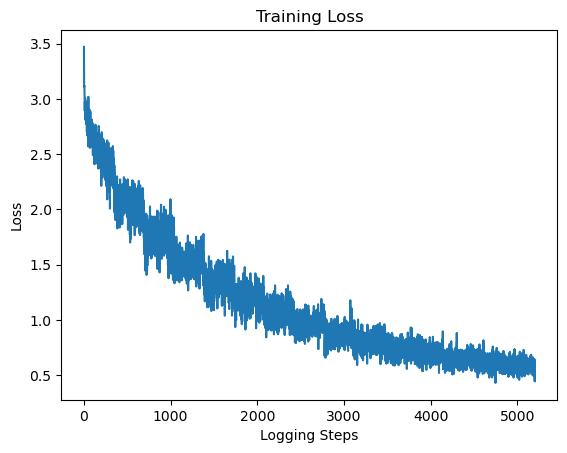

In [23]:
plt.plot(loss_values)
plt.title('Training Loss')
plt.xlabel('Logging Steps')
plt.ylabel('Loss')
plt.show()

In [24]:
model.save_pretrained("GPT2_model_new")
tokenizer.save_pretrained("GPT2_model_new")

('GPT2_model_new\\tokenizer_config.json',
 'GPT2_model_new\\special_tokens_map.json',
 'GPT2_model_new\\vocab.json',
 'GPT2_model_new\\merges.txt',
 'GPT2_model_new\\added_tokens.json')

In [25]:
from transformers import GPT2Tokenizer, GPT2LMHeadModel

# Load pre-trained model tokenizer (vocabulary)
tokenizer = GPT2Tokenizer.from_pretrained("C:/Users/shengjie zhao/Desktop/UI1/model/GPT2_model_new")

# Encode some text
input_text = "What is machine learning?"
input_ids = tokenizer.encode(input_text, return_tensors='pt')

model = GPT2LMHeadModel.from_pretrained("C:/Users/shengjie zhao/Desktop/UI1/model/GPT2_model_new")

# Generate a response to the input text
model.eval()  # Set the model to evaluation mode if not done already

outputs = model.generate(input_ids, max_length=50)  # Adjust the max_length accordingly

# Decode the generated ids to a string
response = tokenizer.decode(outputs[0], skip_special_tokens=True)

print(f"Generated response: {response}")

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated response: What is machine learning? Machine learning is a subfield of artificial intelligence that uses algorithms trained on data sets to create models that enable machines to perform tasks that would otherwise only be possible for humans, such as categorizing images, analyzing data, or predicting


In [2]:
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel

tokenizer = GPT2Tokenizer.from_pretrained("C:/Users/shengjie zhao/Desktop/UI1/model/GPT2_model_new")

input_text = "How is r2 calculated?"
input_ids = tokenizer.encode(input_text, return_tensors='pt')

attention_mask = torch.tensor([1] * len(input_ids[0]), dtype=torch.long).unsqueeze(0)

model = GPT2LMHeadModel.from_pretrained("C:/Users/shengjie zhao/Desktop/UI1/model/GPT2_model_new")

model.eval()

outputs = model.generate(input_ids, 
                         attention_mask=attention_mask, 
                         max_length=100, 
                         pad_token_id=tokenizer.eos_token_id)

response = tokenizer.decode(outputs[0], skip_special_tokens=True)

print(f"Generated response: {response}")


Generated response: How is r2 calculated? R2 = 1 - (RSS/TSS) Where, R2 represents the requrired R Squared value, RSS represents the residual sum of squares, and TSS represents the total sum of squares. How to Calculate R2 in Excel?</s> Step-by-step guide:</s> Step 1: Input Your Dataset</s> Step 2: Evaluate</s> Step 3: Determine R-Squared


In [1]:
import pandas as pd
import torch
from torch.utils.data import Dataset
from transformers import GPT2Tokenizer, GPT2LMHeadModel
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
device = 'cuda' if torch.cuda.is_available() else 'cpu'

class TestDataset(Dataset):
    def __init__(self, csv_file, tokenizer, max_length):
        self.tokenizer = tokenizer
        self.max_length = max_length
        self.data = pd.read_csv(csv_file, encoding='utf-8')

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        full_text = row[1]
        question = full_text.split('[INST]')[1].split('[/INST]')[0].strip().lower()
        answer = full_text.split('[/INST]')[1].strip()
        return {'question': question, 'answer': answer}

    def get_answer(self, idx):
        return self.data.iloc[idx][1].split('[/INST]')[1].strip()

tokenizer = GPT2Tokenizer.from_pretrained('gpt2-medium')
test_dataset = TestDataset(csv_file='C:/Users/shengjie zhao/Desktop/UI1/csv/val.csv', tokenizer=tokenizer, max_length=512)

model = GPT2LMHeadModel.from_pretrained('C:/Users/shengjie zhao/Desktop/UI1/model/GPT2_model_new')
model.to(device) 
model.eval()

c:\Users\shengjie zhao\anaconda3\envs\myenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 1024)
    (wpe): Embedding(1024, 1024)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-23): 24 x GPT2Block(
        (ln_1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=1024, out_features=50257, bias=False)
)

#### BERT SCORES

In [7]:
from transformers import BertTokenizer, BertModel
from rouge import Rouge
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')


c:\Users\shengjie zhao\anaconda3\envs\myenv\lib\site-packages\huggingface_hub\file_download.py:137: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\shengjie zhao\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [10]:
def evaluate_bert_similarity(model, tokenizer, test_dataset, bert_model, bert_tokenizer):
    model.eval()
    bert_model.eval()
    bert_similarities = []

    for idx in range(len(test_dataset)):
        item = test_dataset[idx]
        inputs = tokenizer.encode(item['question'], return_tensors='pt')
        outputs = model.generate(inputs, max_length=75)
        generated_answer = tokenizer.decode(outputs[0], skip_special_tokens=True)
        actual_answer = test_dataset.get_answer(idx)

        # BERT embeddings
        with torch.no_grad():
            generated_embed = bert_model(**bert_tokenizer(generated_answer, return_tensors='pt'))[0]
            actual_embed = bert_model(**bert_tokenizer(actual_answer, return_tensors='pt'))[0]
        
        # Cosine similarity with BERT embeddings
        cos_sim = cosine_similarity(generated_embed[0].detach().numpy(), actual_embed[0].detach().numpy())[0][0]
        bert_similarities.append(cos_sim)

    average_bert_similarity = np.mean(bert_similarities)
    return average_bert_similarity

In [11]:
average_bert_similarity = evaluate_bert_similarity(model, tokenizer, test_dataset, bert_model, bert_tokenizer)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

In [12]:
print(f"Average BERT Cosine Similarity: {average_bert_similarity}")

Average BERT Cosine Similarity: 0.8166912794113159


#### ROUGE SCORES

In [3]:
import evaluate
from tqdm import tqdm

def evaluate_rouge_with_evaluate(model, tokenizer, test_dataset):
    model.eval()
    rouge = evaluate.load('rouge')
    predictions = []
    references = []

    for idx in tqdm(range(len(test_dataset)), desc="Evaluating"):
        item = test_dataset[idx]
        inputs = tokenizer.encode(item['question'], return_tensors='pt').to(device) 
        outputs = model.generate(inputs, max_length=75)
        generated_answer = tokenizer.decode(outputs[0], skip_special_tokens=True)

        if not generated_answer.strip():
            generated_answer = "I"

        predictions.append(generated_answer)
        references.append([test_dataset.get_answer(idx)])

        if idx == 0:
            print("First Question:", item['question'])
            print("Generated Answer:", generated_answer)

    results = rouge.compute(predictions=predictions, references=references)
    return results

average_scores = evaluate_rouge_with_evaluate(model, tokenizer, test_dataset)

Evaluating:   0%|          | 0/3083 [00:00<?, ?it/s]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Evaluating:   0%|          | 1/3083 [00:02<1:43:39,  2.02s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


First Question: what are natural logarithms used for?
Generated Answer: what are natural logarithms used for? Natural logarithms were one of the topics that I had to study in school and undergraduate classes. Even though I loved mathematics and science, I didn't particularly enjoy learning logarithms. Maybe because I didn't learn or understand it the correct way. Right from the beginning of my journey in data science, I


Evaluating:   0%|          | 2/3083 [00:02<1:09:48,  1.36s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Evaluating:   0%|          | 3/3083 [00:03<59:25,  1.16s/it]  The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Evaluating:   0%|          | 4/3083 [00:04<54:57,  1.07s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Evaluating:   0%|          | 5/3083 [00:05<52:04,  1.02s/it]The

In [4]:
print("Average ROUGE scores:")
print("rouge1:", average_scores['rouge1'])
print("rouge2:", average_scores['rouge2'])
print("rougeL:", average_scores['rougeL'])
print("rougeLsum:", average_scores['rougeLsum'])

Average ROUGE scores:
rouge1: 0.3088931100106657
rouge2: 0.11771145461693255
rougeL: 0.23033473200133953
rougeLsum: 0.2357081903861008


#### TFIDF SCORES

In [5]:
from tqdm import tqdm

def evaluate_model(model, tokenizer, test_dataset):
    model.eval()
    similarities = []
    tfidf_vectorizer = TfidfVectorizer()

    for idx in tqdm(range(len(test_dataset)), desc="Evaluating", unit="question"):
        item = test_dataset[idx]
        inputs = tokenizer.encode(item['question'], return_tensors='pt').to(device)
        attention_mask = torch.tensor([1] * len(inputs[0]), dtype=torch.long).unsqueeze(0).to(device)
        outputs = model.generate(inputs, 
                                attention_mask=attention_mask, 
                                max_new_tokens=75, 
                                pad_token_id=tokenizer.eos_token_id)
        generated_answer = tokenizer.decode(outputs[0], skip_special_tokens=True)

        actual_answer = test_dataset.get_answer(idx)

        tfidf_matrix = tfidf_vectorizer.fit_transform([generated_answer, actual_answer])
        cosine_sim = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])[0][0]
        similarities.append(cosine_sim)

    average_similarity = np.mean(similarities)
    return average_similarity

average_similarity = evaluate_model(model, tokenizer, test_dataset)

Evaluating: 100%|██████████| 3083/3083 [1:26:30<00:00,  1.68s/question]


In [6]:
print(f"TFIDF Similarity: {average_similarity:.2f}")

TFIDF Similarity: 0.32


#### RETRIEVAL

In [3]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from transformers import BertTokenizer, BertModel
import torch
import pandas as pd
import numpy as np
from rouge_score import rouge_scorer


test_df = pd.read_csv('C:/Users/shengjie zhao/Desktop/UI1/csv/test.csv')
result_df = pd.read_csv('C:/Users/shengjie zhao/Desktop/UI1/csv/result.csv')

test_df = test_df.set_index('question').reindex(result_df.set_index('test_question').index).reset_index()

test_answers = test_df['answer'].tolist()
retrieved_answers = result_df['retrieved_answer'].tolist()

# Calculate TF-IDF similarity
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(test_answers + retrieved_answers)
tfidf_test_vectors = tfidf_matrix[:len(test_answers)]
tfidf_retrieved_vectors = tfidf_matrix[len(test_answers):]
tfidf_similarities = cosine_similarity(tfidf_test_vectors, tfidf_retrieved_vectors).diagonal()
tfidf_similarity = np.mean(tfidf_similarities)

# Calculate BERT similarity
device = "cuda" if torch.cuda.is_available() else "cpu"
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased').to(device)
bert_model.eval()

bert_similarities = []
with torch.no_grad():
    for test_text, retrieved_text in zip(test_answers, retrieved_answers):
        test_tokens = bert_tokenizer.encode(test_text, return_tensors="pt").to(device)
        retrieved_tokens = bert_tokenizer.encode(retrieved_text, return_tensors="pt").to(device)

        test_embedding = bert_model(test_tokens)[1] 
        retrieved_embedding = bert_model(retrieved_tokens)[1]

        cos_sim = cosine_similarity(test_embedding.cpu().numpy(), retrieved_embedding.cpu().numpy())[0][0]
        bert_similarities.append(cos_sim)

bert_similarity = np.mean(bert_similarities)

In [4]:
print(f"TF-IDF Similarity: {tfidf_similarity}")
print(f"BERT Similarity: {bert_similarity}")

TF-IDF Similarity: 0.26161538014526103
BERT Similarity: 0.8000474572181702


In [12]:
import pandas as pd
import evaluate

rouge = evaluate.load('rouge')

test_answers = test_df['answer'].tolist()
retrieved_answers = result_df['retrieved_answer'].tolist()

rouge_scores = {'rouge1': [], 'rouge2': [], 'rougeL': [], 'rougeLsum': []}
for test_text, retrieved_text in zip(test_answers, retrieved_answers):
    scores = rouge.compute(predictions=[retrieved_text], references=[test_text])
    rouge_scores['rouge1'].append(scores['rouge1'])
    rouge_scores['rouge2'].append(scores['rouge2'])
    rouge_scores['rougeL'].append(scores['rougeL'])
    rouge_scores['rougeLsum'].append(scores['rougeLsum'])

avg_rouge_scores = {key: sum(val)/len(val) for key, val in rouge_scores.items()}

print("Average ROUGE scores:")
for metric, score in avg_rouge_scores.items():
    print(f"{metric}: {score}")


Average ROUGE scores:
rouge1: 0.25778146726074347
rouge2: 0.08703566461925157
rougeL: 0.18940642287252513
rougeLsum: 0.1923988176525897
